In [1]:
%pip install pandas numpy scikit-learn tensorflow tqdm imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [2]:
version = 0

In [3]:
# Parameters
version = 1


# Models

The current models being implemented are namely:

* Supervised
    1. Logistic Regression Model
    2. Random Forest Classifier
    3. Support Vector Machine
    4. Deep Neural Network
    5. (New) Bayesian Network
    6. (New) Gradient Boosting

* Unsupervised
    1. (New) K-Means Clustering
    2. (New) Kernel Density Estimation

In [4]:
import importlib
import pandas as pd

# Selecting column names for CESD-10 Scale related features
cesd_col_names = ["_a_emobth", "_a_emomnd", "_a_emodep", "_a_emoeff", "_a_emohope",
                "_a_emofear", "_a_emoslp", "_a_emohap", "_a_emolone", "_a_emogo"]

cesd_col_names_w1 = ["w1" + col for col in cesd_col_names]
cesd_col_names_w2 = ["w2" + col for col in cesd_col_names]
cesd_col_names_w3 = ["w3" + col for col in cesd_col_names]
cesd_col_names_w4 = ["w4" + col for col in cesd_col_names]
cesd_col_names_w5 = ["w5" + col for col in cesd_col_names]

### Prepping dataset

In [5]:
df1 = pd.read_csv("CSV/wave1_select_labelled.csv")
df1 = df1.drop(columns=cesd_col_names_w1).drop(columns=['score'])
print(df1['pid'].count())

df2 = pd.read_csv("CSV/wave2_select_labelled.csv")
df2 = df2.drop(columns=cesd_col_names_w2).drop(columns=['score'])
print(df2['pid'].count())

df3 = pd.read_csv("CSV/wave3_select_labelled.csv")
df3 = df3.drop(columns=cesd_col_names_w3).drop(columns=['score'])
print(df3['pid'].count())

df4 = pd.read_csv("CSV/wave4_select_labelled.csv")
df4 = df4.drop(columns=cesd_col_names_w4).drop(columns=['score'])
print(df4['pid'].count())

df5 = pd.read_csv("CSV/wave5_select_labelled.csv")
df5 = df5.drop(columns=cesd_col_names_w5).drop(columns=['score'])
print(df5['pid'].count())

combined_df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)
print(combined_df['pid'].count())
print(combined_df.columns, f"\n{len(combined_df.columns) - 1} columns")

# print(combined_df.describe())

14156
14589
14746


19294
18779
81564
Index(['pid', 'age', 'gender', 'race', 'marital_status', 'born_province',
       'employed', 'employed_take_home', 'employed_weekly_hours',
       'self_employed', 'self_employed_take_home',
       'self_employed_weekly_hours', 'casual_work', 'casual_weekly_hours',
       'highest_grade_school', 'tertiary_education', 'currently_enrolled',
       'fever', 'persistent_cough', 'cough_with_blood', 'chest_pain',
       'body_ache', 'headache', 'back_ache', 'joint_pain_arthritis',
       'diarrhoea', 'painful_urination', 'swelling_ankles',
       'severe_weight_loss', 'time_since_prev_consulation', 'had_tubercolosis',
       'had_high_blood_pressure', 'had_diabetes_or_high_blood_sugar',
       'had_stroke', 'had_asthma', 'had_heart_problems', 'had_cancer',
       'exercise_frequency', 'smokes_cigarettes', 'height_measurement',
       'weight_measurement', 'waist_measurement', 'depressed'],
      dtype='object') 
42 columns


### Additional Preprocessing

/home/useradd/GITHUB/Research/Implementation/plotter.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=rotation)


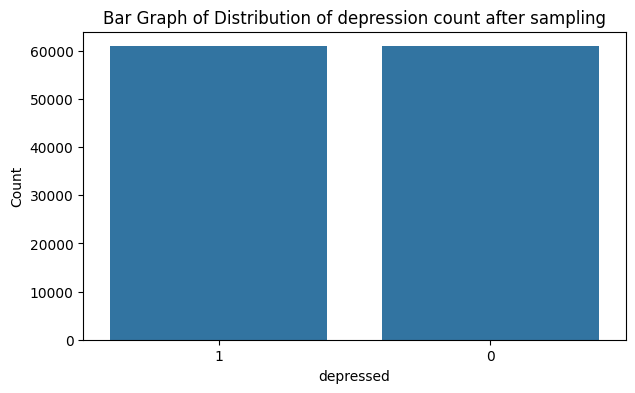

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import plotter

if version == 0:
    # Split data into features (X) and target (y)
    X = combined_df.drop('depressed', axis=1)
    y = combined_df['depressed']

    # Apply SMOTE for oversampling or RandomUnderSampler for undersampling
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Or for undersampling
    # undersample = RandomUnderSampler()
    # X_resampled, y_resampled = undersample.fit_resample(X, y)

    # Combine back into a balanced dataframe
    df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
    combined_df = df_balanced

    print(combined_df['pid'].count())

    plotter.plot_bar(combined_df['depressed'], "Distribution of depression count after sampling")

if version == 1:
    # Separate majority and minority classes
    majority_class = combined_df[combined_df['depressed'] == 0]
    minority_class = combined_df[combined_df['depressed'] == 1]

    # Oversample the minority class to match the number of majority class samples
    oversampled_minority = minority_class.sample(len(majority_class), replace=True)

    # Concatenate the majority class with the oversampled minority class
    df_balanced = pd.concat([majority_class, oversampled_minority])

    # Shuffle the dataset
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

    combined_df = df_balanced

    plotter.plot_bar(combined_df['depressed'], "Distribution of depression count after sampling")

Precision = TP / TP + FP (How often are positive predictions correct?)
Recall = TP / TP + FN (Can an ML model find all instances of the positive class?)

### Logistic Regression

In [7]:
import logisticRegression

LR = logisticRegression.LogisticRegressionModel(combined_df, combined_df['depressed'])

LR.run()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.09593D+00


 This problem is unconstrained.



At iterate   50    f=  6.79487D-01    |proj g|=  2.21575D-02



At iterate  100    f=  6.78243D-01    |proj g|=  1.66649D-02



At iterate  150    f=  6.77941D-01    |proj g|=  1.59636D-02



At iterate  200    f=  6.77859D-01    |proj g|=  1.59384D-02



At iterate  250    f=  6.77828D-01    |proj g|=  1.92338D-02



At iterate  300    f=  6.77806D-01    |proj g|=  5.88517D-03



At iterate  350    f=  6.77794D-01    |proj g|=  1.78558D-03



At iterate  400    f=  6.77786D-01    |proj g|=  7.69242D-04



At iterate  450    f=  6.77785D-01    |proj g|=  1.51667D-03



At iterate  500    f=  6.77785D-01    |proj g|=  3.11949D-04



At iterate  550    f=  6.77784D-01    |proj g|=  4.64336D-04



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   42    579    657      1     0     0   9.202D-05   6.778D-01
  F =  0.67778426553158078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Validation Accuracy: 0.58
Validation Confusion Matrix:
[[7674 4544]
 [5765 6404]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60     12218
           1       0.58      0.53      0.55     12169

    accuracy                           0.58     24387
   macro avg       0.58      0.58      0.58     24387
weighted avg       0.58      0.58  

Best Parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
Best Score: 0.5716160748657223



### Deep Neural Network

In [8]:
import neuralNetwork

NN = neuralNetwork.DeepNeuralNetworkModel(combined_df, combined_df['depressed'])

NN.run()

2024-10-04 18:19:14.386755: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 18:19:14.423079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 18:19:14.423633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-10-04 18:19:15.324351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2024-10-04 18:19:17.682183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:19:17.682888: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100


   1/2287 [..............................] - ETA: 57:53 - loss: 0.7177 - accuracy: 0.5000

  14/2287 [..............................] - ETA: 9s - loss: 0.7002 - accuracy: 0.5179   

  28/2287 [..............................] - ETA: 8s - loss: 0.6991 - accuracy: 0.5078

  46/2287 [..............................] - ETA: 7s - loss: 0.6966 - accuracy: 0.5177

  65/2287 [..............................] - ETA: 7s - loss: 0.6988 - accuracy: 0.5106

  84/2287 [>.............................] - ETA: 6s - loss: 0.6977 - accuracy: 0.5145

 103/2287 [>.............................] - ETA: 6s - loss: 0.6975 - accuracy: 0.5100

 123/2287 [>.............................] - ETA: 6s - loss: 0.6969 - accuracy: 0.5124

 142/2287 [>.............................] - ETA: 6s - loss: 0.6964 - accuracy: 0.5139

 162/2287 [=>............................] - ETA: 6s - loss: 0.6957 - accuracy: 0.5160

 181/2287 [=>............................] - ETA: 6s - loss: 0.6952 - accuracy: 0.5176

 200/2287 [=>............................] - ETA: 5s - loss: 0.6938 - accuracy: 0.5227

 220/2287 [=>............................] - ETA: 5s - loss: 0.6938 - accuracy: 0.5230

 239/2287 [==>...........................] - ETA: 5s - loss: 0.6934 - accuracy: 0.5247

 259/2287 [==>...........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5278

 278/2287 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5312

 296/2287 [==>...........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5325

 316/2287 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330

 335/2287 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5326

 354/2287 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5302

 371/2287 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5317

 390/2287 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5310

 409/2287 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5325

 429/2287 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5329

 447/2287 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5338

 467/2287 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5358

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5372

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5363

 525/2287 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5370

 545/2287 [======>.......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5366

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5365

 579/2287 [======>.......................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5382

 587/2287 [======>.......................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5389

 604/2287 [======>.......................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5394

 621/2287 [=======>......................] - ETA: 4s - loss: 0.6887 - accuracy: 0.5411

 640/2287 [=======>......................] - ETA: 4s - loss: 0.6887 - accuracy: 0.5423

 659/2287 [=======>......................] - ETA: 4s - loss: 0.6886 - accuracy: 0.5429

 676/2287 [=======>......................] - ETA: 4s - loss: 0.6885 - accuracy: 0.5429

 694/2287 [========>.....................] - ETA: 4s - loss: 0.6885 - accuracy: 0.5438

 713/2287 [========>.....................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5447

 730/2287 [========>.....................] - ETA: 4s - loss: 0.6881 - accuracy: 0.5454

 748/2287 [========>.....................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5459

 767/2287 [=========>....................] - ETA: 4s - loss: 0.6880 - accuracy: 0.5471

 785/2287 [=========>....................] - ETA: 4s - loss: 0.6878 - accuracy: 0.5475

 804/2287 [=========>....................] - ETA: 4s - loss: 0.6878 - accuracy: 0.5473

 823/2287 [=========>....................] - ETA: 4s - loss: 0.6876 - accuracy: 0.5477

 840/2287 [==========>...................] - ETA: 4s - loss: 0.6876 - accuracy: 0.5475

 859/2287 [==========>...................] - ETA: 4s - loss: 0.6875 - accuracy: 0.5480

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6873 - accuracy: 0.5484

 897/2287 [==========>...................] - ETA: 3s - loss: 0.6872 - accuracy: 0.5485

 916/2287 [===========>..................] - ETA: 3s - loss: 0.6874 - accuracy: 0.5478

 934/2287 [===========>..................] - ETA: 3s - loss: 0.6874 - accuracy: 0.5479

 953/2287 [===========>..................] - ETA: 3s - loss: 0.6873 - accuracy: 0.5476

 972/2287 [===========>..................] - ETA: 3s - loss: 0.6873 - accuracy: 0.5478

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6873 - accuracy: 0.5476

1009/2287 [============>.................] - ETA: 3s - loss: 0.6871 - accuracy: 0.5483

1028/2287 [============>.................] - ETA: 3s - loss: 0.6872 - accuracy: 0.5482

1048/2287 [============>.................] - ETA: 3s - loss: 0.6870 - accuracy: 0.5488

1067/2287 [============>.................] - ETA: 3s - loss: 0.6869 - accuracy: 0.5491

1085/2287 [=============>................] - ETA: 3s - loss: 0.6867 - accuracy: 0.5495

1101/2287 [=============>................] - ETA: 3s - loss: 0.6867 - accuracy: 0.5492

1120/2287 [=============>................] - ETA: 3s - loss: 0.6867 - accuracy: 0.5494

1140/2287 [=============>................] - ETA: 3s - loss: 0.6865 - accuracy: 0.5498

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6865 - accuracy: 0.5498

1171/2287 [==============>...............] - ETA: 3s - loss: 0.6865 - accuracy: 0.5498

1187/2287 [==============>...............] - ETA: 3s - loss: 0.6863 - accuracy: 0.5507

1203/2287 [==============>...............] - ETA: 3s - loss: 0.6861 - accuracy: 0.5510

1219/2287 [==============>...............] - ETA: 3s - loss: 0.6859 - accuracy: 0.5516

1236/2287 [===============>..............] - ETA: 2s - loss: 0.6860 - accuracy: 0.5512

1254/2287 [===============>..............] - ETA: 2s - loss: 0.6859 - accuracy: 0.5518

1271/2287 [===============>..............] - ETA: 2s - loss: 0.6858 - accuracy: 0.5521

1287/2287 [===============>..............] - ETA: 2s - loss: 0.6857 - accuracy: 0.5524

1303/2287 [================>.............] - ETA: 2s - loss: 0.6857 - accuracy: 0.5522

1320/2287 [================>.............] - ETA: 2s - loss: 0.6858 - accuracy: 0.5521

1336/2287 [================>.............] - ETA: 2s - loss: 0.6857 - accuracy: 0.5521

1353/2287 [================>.............] - ETA: 2s - loss: 0.6857 - accuracy: 0.5525

1368/2287 [================>.............] - ETA: 2s - loss: 0.6856 - accuracy: 0.5528

1382/2287 [=================>............] - ETA: 2s - loss: 0.6856 - accuracy: 0.5528

1395/2287 [=================>............] - ETA: 2s - loss: 0.6855 - accuracy: 0.5531

1409/2287 [=================>............] - ETA: 2s - loss: 0.6855 - accuracy: 0.5533

1426/2287 [=================>............] - ETA: 2s - loss: 0.6855 - accuracy: 0.5532

1443/2287 [=================>............] - ETA: 2s - loss: 0.6854 - accuracy: 0.5534

1459/2287 [==================>...........] - ETA: 2s - loss: 0.6854 - accuracy: 0.5532

1475/2287 [==================>...........] - ETA: 2s - loss: 0.6853 - accuracy: 0.5535

1492/2287 [==================>...........] - ETA: 2s - loss: 0.6851 - accuracy: 0.5540

1501/2287 [==================>...........] - ETA: 2s - loss: 0.6850 - accuracy: 0.5541

1514/2287 [==================>...........] - ETA: 2s - loss: 0.6850 - accuracy: 0.5541

1529/2287 [===================>..........] - ETA: 2s - loss: 0.6850 - accuracy: 0.5540

1547/2287 [===================>..........] - ETA: 2s - loss: 0.6849 - accuracy: 0.5544

1562/2287 [===================>..........] - ETA: 2s - loss: 0.6848 - accuracy: 0.5543

1579/2287 [===================>..........] - ETA: 2s - loss: 0.6847 - accuracy: 0.5544

1595/2287 [===================>..........] - ETA: 2s - loss: 0.6847 - accuracy: 0.5545

1612/2287 [====================>.........] - ETA: 1s - loss: 0.6846 - accuracy: 0.5544

1629/2287 [====================>.........] - ETA: 1s - loss: 0.6846 - accuracy: 0.5546

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6846 - accuracy: 0.5548

1665/2287 [====================>.........] - ETA: 1s - loss: 0.6846 - accuracy: 0.5549

1684/2287 [=====================>........] - ETA: 1s - loss: 0.6845 - accuracy: 0.5551

1703/2287 [=====================>........] - ETA: 1s - loss: 0.6844 - accuracy: 0.5552

1721/2287 [=====================>........] - ETA: 1s - loss: 0.6843 - accuracy: 0.5556

1739/2287 [=====================>........] - ETA: 1s - loss: 0.6843 - accuracy: 0.5558

1756/2287 [======================>.......] - ETA: 1s - loss: 0.6842 - accuracy: 0.5562

1775/2287 [======================>.......] - ETA: 1s - loss: 0.6842 - accuracy: 0.5565

1792/2287 [======================>.......] - ETA: 1s - loss: 0.6841 - accuracy: 0.5566

1811/2287 [======================>.......] - ETA: 1s - loss: 0.6840 - accuracy: 0.5567

1827/2287 [======================>.......] - ETA: 1s - loss: 0.6840 - accuracy: 0.5568

1846/2287 [=======================>......] - ETA: 1s - loss: 0.6839 - accuracy: 0.5572

1865/2287 [=======================>......] - ETA: 1s - loss: 0.6839 - accuracy: 0.5572

1884/2287 [=======================>......] - ETA: 1s - loss: 0.6838 - accuracy: 0.5575

1903/2287 [=======================>......] - ETA: 1s - loss: 0.6837 - accuracy: 0.5576

1920/2287 [========================>.....] - ETA: 1s - loss: 0.6837 - accuracy: 0.5576

1938/2287 [========================>.....] - ETA: 1s - loss: 0.6836 - accuracy: 0.5577

1956/2287 [========================>.....] - ETA: 0s - loss: 0.6835 - accuracy: 0.5580

1974/2287 [========================>.....] - ETA: 0s - loss: 0.6834 - accuracy: 0.5582

1993/2287 [=========================>....] - ETA: 0s - loss: 0.6832 - accuracy: 0.5587

2013/2287 [=========================>....] - ETA: 0s - loss: 0.6832 - accuracy: 0.5590

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6830 - accuracy: 0.5595

2051/2287 [=========================>....] - ETA: 0s - loss: 0.6830 - accuracy: 0.5597

2068/2287 [==========================>...] - ETA: 0s - loss: 0.6829 - accuracy: 0.5602

2083/2287 [==========================>...] - ETA: 0s - loss: 0.6829 - accuracy: 0.5601

2102/2287 [==========================>...] - ETA: 0s - loss: 0.6830 - accuracy: 0.5601

2121/2287 [==========================>...] - ETA: 0s - loss: 0.6830 - accuracy: 0.5600

2138/2287 [===========================>..] - ETA: 0s - loss: 0.6829 - accuracy: 0.5602

2158/2287 [===========================>..] - ETA: 0s - loss: 0.6829 - accuracy: 0.5605

2177/2287 [===========================>..] - ETA: 0s - loss: 0.6828 - accuracy: 0.5606

2195/2287 [===========================>..] - ETA: 0s - loss: 0.6829 - accuracy: 0.5606

2214/2287 [============================>.] - ETA: 0s - loss: 0.6828 - accuracy: 0.5606

2233/2287 [============================>.] - ETA: 0s - loss: 0.6828 - accuracy: 0.5608

2253/2287 [============================>.] - ETA: 0s - loss: 0.6828 - accuracy: 0.5607

2272/2287 [============================>.] - ETA: 0s - loss: 0.6827 - accuracy: 0.5610

2287/2287 [==============================] - 9s 3ms/step - loss: 0.6827 - accuracy: 0.5608 - val_loss: 0.6750 - val_accuracy: 0.5815


Epoch 2/100


   1/2287 [..............................] - ETA: 10s - loss: 0.6531 - accuracy: 0.6562

  21/2287 [..............................] - ETA: 5s - loss: 0.6806 - accuracy: 0.5863 

  41/2287 [..............................] - ETA: 5s - loss: 0.6809 - accuracy: 0.5701

  61/2287 [..............................] - ETA: 5s - loss: 0.6814 - accuracy: 0.5692

  81/2287 [>.............................] - ETA: 5s - loss: 0.6804 - accuracy: 0.5667

 100/2287 [>.............................] - ETA: 5s - loss: 0.6789 - accuracy: 0.5734

 120/2287 [>.............................] - ETA: 5s - loss: 0.6789 - accuracy: 0.5742

 137/2287 [>.............................] - ETA: 5s - loss: 0.6780 - accuracy: 0.5773

 155/2287 [=>............................] - ETA: 5s - loss: 0.6776 - accuracy: 0.5774

 175/2287 [=>............................] - ETA: 5s - loss: 0.6790 - accuracy: 0.5768

 193/2287 [=>............................] - ETA: 5s - loss: 0.6788 - accuracy: 0.5787

 213/2287 [=>............................] - ETA: 5s - loss: 0.6797 - accuracy: 0.5732

 232/2287 [==>...........................] - ETA: 5s - loss: 0.6794 - accuracy: 0.5752

 252/2287 [==>...........................] - ETA: 5s - loss: 0.6791 - accuracy: 0.5747

 272/2287 [==>...........................] - ETA: 5s - loss: 0.6785 - accuracy: 0.5761

 291/2287 [==>...........................] - ETA: 5s - loss: 0.6779 - accuracy: 0.5773

 311/2287 [===>..........................] - ETA: 5s - loss: 0.6783 - accuracy: 0.5769

 331/2287 [===>..........................] - ETA: 5s - loss: 0.6785 - accuracy: 0.5758

 350/2287 [===>..........................] - ETA: 5s - loss: 0.6784 - accuracy: 0.5769

 370/2287 [===>..........................] - ETA: 5s - loss: 0.6785 - accuracy: 0.5765

 390/2287 [====>.........................] - ETA: 5s - loss: 0.6785 - accuracy: 0.5763

 409/2287 [====>.........................] - ETA: 4s - loss: 0.6785 - accuracy: 0.5750

 428/2287 [====>.........................] - ETA: 4s - loss: 0.6785 - accuracy: 0.5751

 448/2287 [====>.........................] - ETA: 4s - loss: 0.6783 - accuracy: 0.5746

 468/2287 [=====>........................] - ETA: 4s - loss: 0.6778 - accuracy: 0.5757

 488/2287 [=====>........................] - ETA: 4s - loss: 0.6781 - accuracy: 0.5744

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6777 - accuracy: 0.5743

 524/2287 [=====>........................] - ETA: 4s - loss: 0.6775 - accuracy: 0.5748

 544/2287 [======>.......................] - ETA: 4s - loss: 0.6773 - accuracy: 0.5756

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6770 - accuracy: 0.5757

 583/2287 [======>.......................] - ETA: 4s - loss: 0.6772 - accuracy: 0.5750

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6770 - accuracy: 0.5756

 623/2287 [=======>......................] - ETA: 4s - loss: 0.6770 - accuracy: 0.5754

 641/2287 [=======>......................] - ETA: 4s - loss: 0.6769 - accuracy: 0.5756

 659/2287 [=======>......................] - ETA: 4s - loss: 0.6772 - accuracy: 0.5748

 677/2287 [=======>......................] - ETA: 4s - loss: 0.6773 - accuracy: 0.5753

 697/2287 [========>.....................] - ETA: 4s - loss: 0.6772 - accuracy: 0.5753

 716/2287 [========>.....................] - ETA: 4s - loss: 0.6772 - accuracy: 0.5752

 736/2287 [========>.....................] - ETA: 4s - loss: 0.6771 - accuracy: 0.5759

 756/2287 [========>.....................] - ETA: 4s - loss: 0.6773 - accuracy: 0.5751

 776/2287 [=========>....................] - ETA: 4s - loss: 0.6776 - accuracy: 0.5748

 796/2287 [=========>....................] - ETA: 3s - loss: 0.6776 - accuracy: 0.5753

 816/2287 [=========>....................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5758

 837/2287 [=========>....................] - ETA: 3s - loss: 0.6772 - accuracy: 0.5765

 857/2287 [==========>...................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5762

 877/2287 [==========>...................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5762

 894/2287 [==========>...................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5760

 910/2287 [==========>...................] - ETA: 3s - loss: 0.6774 - accuracy: 0.5754

 928/2287 [===========>..................] - ETA: 3s - loss: 0.6772 - accuracy: 0.5759

 941/2287 [===========>..................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5754

 950/2287 [===========>..................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5753

 961/2287 [===========>..................] - ETA: 3s - loss: 0.6773 - accuracy: 0.5752

 980/2287 [===========>..................] - ETA: 3s - loss: 0.6771 - accuracy: 0.5758

1000/2287 [============>.................] - ETA: 3s - loss: 0.6769 - accuracy: 0.5760

1020/2287 [============>.................] - ETA: 3s - loss: 0.6768 - accuracy: 0.5761

1039/2287 [============>.................] - ETA: 3s - loss: 0.6769 - accuracy: 0.5756

1059/2287 [============>.................] - ETA: 3s - loss: 0.6772 - accuracy: 0.5755

1079/2287 [=============>................] - ETA: 3s - loss: 0.6771 - accuracy: 0.5760

1098/2287 [=============>................] - ETA: 3s - loss: 0.6772 - accuracy: 0.5757

1118/2287 [=============>................] - ETA: 3s - loss: 0.6770 - accuracy: 0.5760

1137/2287 [=============>................] - ETA: 3s - loss: 0.6770 - accuracy: 0.5760

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6769 - accuracy: 0.5759

1176/2287 [==============>...............] - ETA: 3s - loss: 0.6770 - accuracy: 0.5756

1196/2287 [==============>...............] - ETA: 2s - loss: 0.6771 - accuracy: 0.5752

1215/2287 [==============>...............] - ETA: 2s - loss: 0.6772 - accuracy: 0.5748

1233/2287 [===============>..............] - ETA: 2s - loss: 0.6772 - accuracy: 0.5748

1253/2287 [===============>..............] - ETA: 2s - loss: 0.6771 - accuracy: 0.5748

1273/2287 [===============>..............] - ETA: 2s - loss: 0.6771 - accuracy: 0.5752

1292/2287 [===============>..............] - ETA: 2s - loss: 0.6769 - accuracy: 0.5753

1309/2287 [================>.............] - ETA: 2s - loss: 0.6767 - accuracy: 0.5755

1329/2287 [================>.............] - ETA: 2s - loss: 0.6768 - accuracy: 0.5752

1347/2287 [================>.............] - ETA: 2s - loss: 0.6767 - accuracy: 0.5758

1367/2287 [================>.............] - ETA: 2s - loss: 0.6767 - accuracy: 0.5759

1383/2287 [=================>............] - ETA: 2s - loss: 0.6766 - accuracy: 0.5761

1395/2287 [=================>............] - ETA: 2s - loss: 0.6768 - accuracy: 0.5759

1415/2287 [=================>............] - ETA: 2s - loss: 0.6767 - accuracy: 0.5759

1435/2287 [=================>............] - ETA: 2s - loss: 0.6766 - accuracy: 0.5761

1454/2287 [==================>...........] - ETA: 2s - loss: 0.6764 - accuracy: 0.5764

1473/2287 [==================>...........] - ETA: 2s - loss: 0.6764 - accuracy: 0.5767

1492/2287 [==================>...........] - ETA: 2s - loss: 0.6763 - accuracy: 0.5769

1512/2287 [==================>...........] - ETA: 2s - loss: 0.6762 - accuracy: 0.5772

1531/2287 [===================>..........] - ETA: 2s - loss: 0.6763 - accuracy: 0.5771

1550/2287 [===================>..........] - ETA: 2s - loss: 0.6763 - accuracy: 0.5770

1570/2287 [===================>..........] - ETA: 1s - loss: 0.6764 - accuracy: 0.5770

1589/2287 [===================>..........] - ETA: 1s - loss: 0.6764 - accuracy: 0.5772

1607/2287 [====================>.........] - ETA: 1s - loss: 0.6764 - accuracy: 0.5774

1626/2287 [====================>.........] - ETA: 1s - loss: 0.6764 - accuracy: 0.5772

1645/2287 [====================>.........] - ETA: 1s - loss: 0.6764 - accuracy: 0.5774

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6763 - accuracy: 0.5777

1679/2287 [=====================>........] - ETA: 1s - loss: 0.6763 - accuracy: 0.5777

1698/2287 [=====================>........] - ETA: 1s - loss: 0.6762 - accuracy: 0.5780

1718/2287 [=====================>........] - ETA: 1s - loss: 0.6762 - accuracy: 0.5781

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6761 - accuracy: 0.5781

1756/2287 [======================>.......] - ETA: 1s - loss: 0.6760 - accuracy: 0.5781

1775/2287 [======================>.......] - ETA: 1s - loss: 0.6761 - accuracy: 0.5782

1793/2287 [======================>.......] - ETA: 1s - loss: 0.6760 - accuracy: 0.5784

1812/2287 [======================>.......] - ETA: 1s - loss: 0.6760 - accuracy: 0.5788

1830/2287 [=======================>......] - ETA: 1s - loss: 0.6760 - accuracy: 0.5788

1850/2287 [=======================>......] - ETA: 1s - loss: 0.6759 - accuracy: 0.5789

1870/2287 [=======================>......] - ETA: 1s - loss: 0.6758 - accuracy: 0.5790

1889/2287 [=======================>......] - ETA: 1s - loss: 0.6758 - accuracy: 0.5791

1908/2287 [========================>.....] - ETA: 1s - loss: 0.6758 - accuracy: 0.5792

1928/2287 [========================>.....] - ETA: 0s - loss: 0.6758 - accuracy: 0.5793

1946/2287 [========================>.....] - ETA: 0s - loss: 0.6758 - accuracy: 0.5794

1964/2287 [========================>.....] - ETA: 0s - loss: 0.6757 - accuracy: 0.5794

1983/2287 [=========================>....] - ETA: 0s - loss: 0.6757 - accuracy: 0.5794

2002/2287 [=========================>....] - ETA: 0s - loss: 0.6757 - accuracy: 0.5796

2020/2287 [=========================>....] - ETA: 0s - loss: 0.6758 - accuracy: 0.5795

2038/2287 [=========================>....] - ETA: 0s - loss: 0.6758 - accuracy: 0.5795

2057/2287 [=========================>....] - ETA: 0s - loss: 0.6759 - accuracy: 0.5791

2075/2287 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5790

2095/2287 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5790

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5791

2133/2287 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5792

2152/2287 [===========================>..] - ETA: 0s - loss: 0.6759 - accuracy: 0.5793

2170/2287 [===========================>..] - ETA: 0s - loss: 0.6759 - accuracy: 0.5792

2189/2287 [===========================>..] - ETA: 0s - loss: 0.6759 - accuracy: 0.5792

2207/2287 [===========================>..] - ETA: 0s - loss: 0.6760 - accuracy: 0.5792

2226/2287 [============================>.] - ETA: 0s - loss: 0.6759 - accuracy: 0.5793

2246/2287 [============================>.] - ETA: 0s - loss: 0.6758 - accuracy: 0.5793

2265/2287 [============================>.] - ETA: 0s - loss: 0.6757 - accuracy: 0.5795

2282/2287 [============================>.] - ETA: 0s - loss: 0.6757 - accuracy: 0.5796

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6757 - accuracy: 0.5796 - val_loss: 0.6726 - val_accuracy: 0.5811


Epoch 3/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6741 - accuracy: 0.7188

  18/2287 [..............................] - ETA: 6s - loss: 0.6684 - accuracy: 0.5903

  38/2287 [..............................] - ETA: 6s - loss: 0.6644 - accuracy: 0.5979

  56/2287 [..............................] - ETA: 6s - loss: 0.6668 - accuracy: 0.5954

  75/2287 [..............................] - ETA: 6s - loss: 0.6656 - accuracy: 0.5954

  94/2287 [>.............................] - ETA: 6s - loss: 0.6665 - accuracy: 0.5911

 113/2287 [>.............................] - ETA: 5s - loss: 0.6669 - accuracy: 0.5899

 129/2287 [>.............................] - ETA: 6s - loss: 0.6677 - accuracy: 0.5879

 148/2287 [>.............................] - ETA: 5s - loss: 0.6690 - accuracy: 0.5874

 168/2287 [=>............................] - ETA: 5s - loss: 0.6698 - accuracy: 0.5846

 185/2287 [=>............................] - ETA: 5s - loss: 0.6701 - accuracy: 0.5858

 204/2287 [=>............................] - ETA: 5s - loss: 0.6702 - accuracy: 0.5867

 223/2287 [=>............................] - ETA: 5s - loss: 0.6698 - accuracy: 0.5879

 242/2287 [==>...........................] - ETA: 5s - loss: 0.6702 - accuracy: 0.5870

 260/2287 [==>...........................] - ETA: 5s - loss: 0.6702 - accuracy: 0.5880

 279/2287 [==>...........................] - ETA: 5s - loss: 0.6707 - accuracy: 0.5877

 298/2287 [==>...........................] - ETA: 5s - loss: 0.6714 - accuracy: 0.5869

 316/2287 [===>..........................] - ETA: 5s - loss: 0.6713 - accuracy: 0.5878

 336/2287 [===>..........................] - ETA: 5s - loss: 0.6716 - accuracy: 0.5867

 356/2287 [===>..........................] - ETA: 5s - loss: 0.6724 - accuracy: 0.5850

 375/2287 [===>..........................] - ETA: 5s - loss: 0.6728 - accuracy: 0.5832

 394/2287 [====>.........................] - ETA: 5s - loss: 0.6730 - accuracy: 0.5820

 414/2287 [====>.........................] - ETA: 5s - loss: 0.6727 - accuracy: 0.5839

 431/2287 [====>.........................] - ETA: 5s - loss: 0.6722 - accuracy: 0.5849

 450/2287 [====>.........................] - ETA: 5s - loss: 0.6723 - accuracy: 0.5841

 470/2287 [=====>........................] - ETA: 4s - loss: 0.6726 - accuracy: 0.5832

 488/2287 [=====>........................] - ETA: 4s - loss: 0.6726 - accuracy: 0.5829

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6730 - accuracy: 0.5824

 524/2287 [=====>........................] - ETA: 4s - loss: 0.6730 - accuracy: 0.5823

 543/2287 [======>.......................] - ETA: 4s - loss: 0.6728 - accuracy: 0.5826

 562/2287 [======>.......................] - ETA: 4s - loss: 0.6728 - accuracy: 0.5821

 581/2287 [======>.......................] - ETA: 4s - loss: 0.6729 - accuracy: 0.5816

 601/2287 [======>.......................] - ETA: 4s - loss: 0.6729 - accuracy: 0.5810

 619/2287 [=======>......................] - ETA: 4s - loss: 0.6725 - accuracy: 0.5820

 639/2287 [=======>......................] - ETA: 4s - loss: 0.6729 - accuracy: 0.5824

 658/2287 [=======>......................] - ETA: 4s - loss: 0.6728 - accuracy: 0.5828

 678/2287 [=======>......................] - ETA: 4s - loss: 0.6730 - accuracy: 0.5831

 698/2287 [========>.....................] - ETA: 4s - loss: 0.6733 - accuracy: 0.5829

 717/2287 [========>.....................] - ETA: 4s - loss: 0.6731 - accuracy: 0.5827

 736/2287 [========>.....................] - ETA: 4s - loss: 0.6730 - accuracy: 0.5829

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6732 - accuracy: 0.5823

 775/2287 [=========>....................] - ETA: 4s - loss: 0.6732 - accuracy: 0.5825

 794/2287 [=========>....................] - ETA: 4s - loss: 0.6734 - accuracy: 0.5819

 813/2287 [=========>....................] - ETA: 4s - loss: 0.6732 - accuracy: 0.5828

 833/2287 [=========>....................] - ETA: 3s - loss: 0.6731 - accuracy: 0.5829

 852/2287 [==========>...................] - ETA: 3s - loss: 0.6730 - accuracy: 0.5832

 871/2287 [==========>...................] - ETA: 3s - loss: 0.6728 - accuracy: 0.5829

 892/2287 [==========>...................] - ETA: 3s - loss: 0.6729 - accuracy: 0.5826

 910/2287 [==========>...................] - ETA: 3s - loss: 0.6731 - accuracy: 0.5821

 930/2287 [===========>..................] - ETA: 3s - loss: 0.6732 - accuracy: 0.5819

 950/2287 [===========>..................] - ETA: 3s - loss: 0.6733 - accuracy: 0.5824

 970/2287 [===========>..................] - ETA: 3s - loss: 0.6733 - accuracy: 0.5831

 990/2287 [===========>..................] - ETA: 3s - loss: 0.6732 - accuracy: 0.5838

1010/2287 [============>.................] - ETA: 3s - loss: 0.6732 - accuracy: 0.5838

1030/2287 [============>.................] - ETA: 3s - loss: 0.6732 - accuracy: 0.5836

1050/2287 [============>.................] - ETA: 3s - loss: 0.6729 - accuracy: 0.5840

1070/2287 [=============>................] - ETA: 3s - loss: 0.6726 - accuracy: 0.5846

1089/2287 [=============>................] - ETA: 3s - loss: 0.6729 - accuracy: 0.5842

1109/2287 [=============>................] - ETA: 3s - loss: 0.6729 - accuracy: 0.5840

1129/2287 [=============>................] - ETA: 3s - loss: 0.6730 - accuracy: 0.5838

1149/2287 [==============>...............] - ETA: 3s - loss: 0.6731 - accuracy: 0.5835

1169/2287 [==============>...............] - ETA: 3s - loss: 0.6731 - accuracy: 0.5836

1187/2287 [==============>...............] - ETA: 2s - loss: 0.6729 - accuracy: 0.5836

1205/2287 [==============>...............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5830

1225/2287 [===============>..............] - ETA: 2s - loss: 0.6734 - accuracy: 0.5825

1244/2287 [===============>..............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5828

1264/2287 [===============>..............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5826

1284/2287 [===============>..............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5829

1303/2287 [================>.............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5827

1322/2287 [================>.............] - ETA: 2s - loss: 0.6736 - accuracy: 0.5823

1341/2287 [================>.............] - ETA: 2s - loss: 0.6736 - accuracy: 0.5822

1361/2287 [================>.............] - ETA: 2s - loss: 0.6736 - accuracy: 0.5826

1380/2287 [=================>............] - ETA: 2s - loss: 0.6733 - accuracy: 0.5831

1400/2287 [=================>............] - ETA: 2s - loss: 0.6732 - accuracy: 0.5832

1420/2287 [=================>............] - ETA: 2s - loss: 0.6731 - accuracy: 0.5837

1437/2287 [=================>............] - ETA: 2s - loss: 0.6732 - accuracy: 0.5837

1457/2287 [==================>...........] - ETA: 2s - loss: 0.6732 - accuracy: 0.5836

1477/2287 [==================>...........] - ETA: 2s - loss: 0.6732 - accuracy: 0.5840

1497/2287 [==================>...........] - ETA: 2s - loss: 0.6728 - accuracy: 0.5845

1517/2287 [==================>...........] - ETA: 2s - loss: 0.6731 - accuracy: 0.5842

1537/2287 [===================>..........] - ETA: 2s - loss: 0.6731 - accuracy: 0.5840

1555/2287 [===================>..........] - ETA: 1s - loss: 0.6730 - accuracy: 0.5840

1575/2287 [===================>..........] - ETA: 1s - loss: 0.6730 - accuracy: 0.5844

1595/2287 [===================>..........] - ETA: 1s - loss: 0.6731 - accuracy: 0.5843

1614/2287 [====================>.........] - ETA: 1s - loss: 0.6730 - accuracy: 0.5842

1634/2287 [====================>.........] - ETA: 1s - loss: 0.6730 - accuracy: 0.5841

1654/2287 [====================>.........] - ETA: 1s - loss: 0.6730 - accuracy: 0.5840

1674/2287 [====================>.........] - ETA: 1s - loss: 0.6731 - accuracy: 0.5840

1694/2287 [=====================>........] - ETA: 1s - loss: 0.6733 - accuracy: 0.5838

1713/2287 [=====================>........] - ETA: 1s - loss: 0.6734 - accuracy: 0.5837

1733/2287 [=====================>........] - ETA: 1s - loss: 0.6733 - accuracy: 0.5838

1752/2287 [=====================>........] - ETA: 1s - loss: 0.6732 - accuracy: 0.5840

1772/2287 [======================>.......] - ETA: 1s - loss: 0.6732 - accuracy: 0.5841

1792/2287 [======================>.......] - ETA: 1s - loss: 0.6733 - accuracy: 0.5840

1812/2287 [======================>.......] - ETA: 1s - loss: 0.6733 - accuracy: 0.5840

1832/2287 [=======================>......] - ETA: 1s - loss: 0.6732 - accuracy: 0.5844

1852/2287 [=======================>......] - ETA: 1s - loss: 0.6731 - accuracy: 0.5847

1872/2287 [=======================>......] - ETA: 1s - loss: 0.6730 - accuracy: 0.5849

1892/2287 [=======================>......] - ETA: 1s - loss: 0.6729 - accuracy: 0.5850

1911/2287 [========================>.....] - ETA: 1s - loss: 0.6728 - accuracy: 0.5851

1931/2287 [========================>.....] - ETA: 0s - loss: 0.6727 - accuracy: 0.5853

1949/2287 [========================>.....] - ETA: 0s - loss: 0.6729 - accuracy: 0.5849

1968/2287 [========================>.....] - ETA: 0s - loss: 0.6729 - accuracy: 0.5849

1988/2287 [=========================>....] - ETA: 0s - loss: 0.6729 - accuracy: 0.5851

2006/2287 [=========================>....] - ETA: 0s - loss: 0.6728 - accuracy: 0.5852

2026/2287 [=========================>....] - ETA: 0s - loss: 0.6729 - accuracy: 0.5853

2046/2287 [=========================>....] - ETA: 0s - loss: 0.6728 - accuracy: 0.5855

2065/2287 [==========================>...] - ETA: 0s - loss: 0.6728 - accuracy: 0.5855

2084/2287 [==========================>...] - ETA: 0s - loss: 0.6729 - accuracy: 0.5853

2103/2287 [==========================>...] - ETA: 0s - loss: 0.6730 - accuracy: 0.5854

2122/2287 [==========================>...] - ETA: 0s - loss: 0.6729 - accuracy: 0.5853

2142/2287 [===========================>..] - ETA: 0s - loss: 0.6729 - accuracy: 0.5851

2162/2287 [===========================>..] - ETA: 0s - loss: 0.6729 - accuracy: 0.5853

2182/2287 [===========================>..] - ETA: 0s - loss: 0.6729 - accuracy: 0.5850

2202/2287 [===========================>..] - ETA: 0s - loss: 0.6728 - accuracy: 0.5851

2219/2287 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.5851

2239/2287 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.5850

2258/2287 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.5849

2278/2287 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.5848

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6729 - accuracy: 0.5849 - val_loss: 0.6710 - val_accuracy: 0.5886


Epoch 4/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6624 - accuracy: 0.6562

  21/2287 [..............................] - ETA: 5s - loss: 0.6655 - accuracy: 0.5923

  41/2287 [..............................] - ETA: 5s - loss: 0.6681 - accuracy: 0.5907

  59/2287 [..............................] - ETA: 5s - loss: 0.6727 - accuracy: 0.5832

  77/2287 [>.............................] - ETA: 6s - loss: 0.6713 - accuracy: 0.5852

  96/2287 [>.............................] - ETA: 5s - loss: 0.6709 - accuracy: 0.5850

 115/2287 [>.............................] - ETA: 5s - loss: 0.6713 - accuracy: 0.5856

 133/2287 [>.............................] - ETA: 5s - loss: 0.6712 - accuracy: 0.5862

 149/2287 [>.............................] - ETA: 5s - loss: 0.6707 - accuracy: 0.5843

 168/2287 [=>............................] - ETA: 5s - loss: 0.6692 - accuracy: 0.5852

 187/2287 [=>............................] - ETA: 5s - loss: 0.6676 - accuracy: 0.5871

 204/2287 [=>............................] - ETA: 5s - loss: 0.6671 - accuracy: 0.5887

 222/2287 [=>............................] - ETA: 5s - loss: 0.6678 - accuracy: 0.5888

 236/2287 [==>...........................] - ETA: 5s - loss: 0.6680 - accuracy: 0.5891

 246/2287 [==>...........................] - ETA: 5s - loss: 0.6683 - accuracy: 0.5879

 264/2287 [==>...........................] - ETA: 5s - loss: 0.6684 - accuracy: 0.5871

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6692 - accuracy: 0.5855

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6692 - accuracy: 0.5845

 319/2287 [===>..........................] - ETA: 5s - loss: 0.6697 - accuracy: 0.5824

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6697 - accuracy: 0.5825

 357/2287 [===>..........................] - ETA: 5s - loss: 0.6699 - accuracy: 0.5822

 375/2287 [===>..........................] - ETA: 5s - loss: 0.6702 - accuracy: 0.5827

 395/2287 [====>.........................] - ETA: 5s - loss: 0.6704 - accuracy: 0.5829

 412/2287 [====>.........................] - ETA: 5s - loss: 0.6703 - accuracy: 0.5831

 431/2287 [====>.........................] - ETA: 5s - loss: 0.6694 - accuracy: 0.5844

 451/2287 [====>.........................] - ETA: 5s - loss: 0.6696 - accuracy: 0.5850

 469/2287 [=====>........................] - ETA: 5s - loss: 0.6700 - accuracy: 0.5845

 489/2287 [=====>........................] - ETA: 5s - loss: 0.6703 - accuracy: 0.5841

 508/2287 [=====>........................] - ETA: 5s - loss: 0.6707 - accuracy: 0.5839

 527/2287 [=====>........................] - ETA: 4s - loss: 0.6708 - accuracy: 0.5847

 547/2287 [======>.......................] - ETA: 4s - loss: 0.6707 - accuracy: 0.5854

 565/2287 [======>.......................] - ETA: 4s - loss: 0.6706 - accuracy: 0.5860

 584/2287 [======>.......................] - ETA: 4s - loss: 0.6706 - accuracy: 0.5853

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6701 - accuracy: 0.5865

 618/2287 [=======>......................] - ETA: 4s - loss: 0.6699 - accuracy: 0.5869

 628/2287 [=======>......................] - ETA: 4s - loss: 0.6698 - accuracy: 0.5876

 639/2287 [=======>......................] - ETA: 4s - loss: 0.6699 - accuracy: 0.5874

 652/2287 [=======>......................] - ETA: 4s - loss: 0.6699 - accuracy: 0.5876

 671/2287 [=======>......................] - ETA: 4s - loss: 0.6695 - accuracy: 0.5885

 690/2287 [========>.....................] - ETA: 4s - loss: 0.6698 - accuracy: 0.5880

 709/2287 [========>.....................] - ETA: 4s - loss: 0.6700 - accuracy: 0.5882

 727/2287 [========>.....................] - ETA: 4s - loss: 0.6704 - accuracy: 0.5874

 744/2287 [========>.....................] - ETA: 4s - loss: 0.6703 - accuracy: 0.5874

 762/2287 [========>.....................] - ETA: 4s - loss: 0.6702 - accuracy: 0.5878

 775/2287 [=========>....................] - ETA: 4s - loss: 0.6700 - accuracy: 0.5883

 790/2287 [=========>....................] - ETA: 4s - loss: 0.6701 - accuracy: 0.5885

 806/2287 [=========>....................] - ETA: 4s - loss: 0.6698 - accuracy: 0.5889

 818/2287 [=========>....................] - ETA: 4s - loss: 0.6697 - accuracy: 0.5888

 837/2287 [=========>....................] - ETA: 4s - loss: 0.6696 - accuracy: 0.5892

 857/2287 [==========>...................] - ETA: 4s - loss: 0.6697 - accuracy: 0.5892

 876/2287 [==========>...................] - ETA: 4s - loss: 0.6698 - accuracy: 0.5891

 895/2287 [==========>...................] - ETA: 4s - loss: 0.6698 - accuracy: 0.5890

 914/2287 [==========>...................] - ETA: 4s - loss: 0.6696 - accuracy: 0.5888

 933/2287 [===========>..................] - ETA: 3s - loss: 0.6698 - accuracy: 0.5889

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6698 - accuracy: 0.5892

 971/2287 [===========>..................] - ETA: 3s - loss: 0.6698 - accuracy: 0.5889

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6700 - accuracy: 0.5884

1010/2287 [============>.................] - ETA: 3s - loss: 0.6699 - accuracy: 0.5888

1028/2287 [============>.................] - ETA: 3s - loss: 0.6699 - accuracy: 0.5889

1048/2287 [============>.................] - ETA: 3s - loss: 0.6697 - accuracy: 0.5896

1065/2287 [============>.................] - ETA: 3s - loss: 0.6697 - accuracy: 0.5895

1084/2287 [=============>................] - ETA: 3s - loss: 0.6697 - accuracy: 0.5897

1102/2287 [=============>................] - ETA: 3s - loss: 0.6700 - accuracy: 0.5889

1120/2287 [=============>................] - ETA: 3s - loss: 0.6699 - accuracy: 0.5891

1139/2287 [=============>................] - ETA: 3s - loss: 0.6698 - accuracy: 0.5891

1157/2287 [==============>...............] - ETA: 3s - loss: 0.6696 - accuracy: 0.5894

1176/2287 [==============>...............] - ETA: 3s - loss: 0.6697 - accuracy: 0.5894

1195/2287 [==============>...............] - ETA: 3s - loss: 0.6697 - accuracy: 0.5894

1215/2287 [==============>...............] - ETA: 3s - loss: 0.6695 - accuracy: 0.5897

1232/2287 [===============>..............] - ETA: 3s - loss: 0.6694 - accuracy: 0.5896

1252/2287 [===============>..............] - ETA: 2s - loss: 0.6695 - accuracy: 0.5900

1272/2287 [===============>..............] - ETA: 2s - loss: 0.6695 - accuracy: 0.5897

1291/2287 [===============>..............] - ETA: 2s - loss: 0.6695 - accuracy: 0.5897

1309/2287 [================>.............] - ETA: 2s - loss: 0.6694 - accuracy: 0.5897

1328/2287 [================>.............] - ETA: 2s - loss: 0.6695 - accuracy: 0.5897

1348/2287 [================>.............] - ETA: 2s - loss: 0.6697 - accuracy: 0.5891

1366/2287 [================>.............] - ETA: 2s - loss: 0.6696 - accuracy: 0.5893

1384/2287 [=================>............] - ETA: 2s - loss: 0.6697 - accuracy: 0.5890

1404/2287 [=================>............] - ETA: 2s - loss: 0.6696 - accuracy: 0.5894

1424/2287 [=================>............] - ETA: 2s - loss: 0.6694 - accuracy: 0.5902

1443/2287 [=================>............] - ETA: 2s - loss: 0.6696 - accuracy: 0.5901

1460/2287 [==================>...........] - ETA: 2s - loss: 0.6697 - accuracy: 0.5898

1479/2287 [==================>...........] - ETA: 2s - loss: 0.6697 - accuracy: 0.5898

1495/2287 [==================>...........] - ETA: 2s - loss: 0.6696 - accuracy: 0.5899

1512/2287 [==================>...........] - ETA: 2s - loss: 0.6697 - accuracy: 0.5897

1531/2287 [===================>..........] - ETA: 2s - loss: 0.6695 - accuracy: 0.5902

1549/2287 [===================>..........] - ETA: 2s - loss: 0.6697 - accuracy: 0.5897

1568/2287 [===================>..........] - ETA: 2s - loss: 0.6696 - accuracy: 0.5899

1588/2287 [===================>..........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5901

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6696 - accuracy: 0.5901

1623/2287 [====================>.........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5902

1639/2287 [====================>.........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5902

1657/2287 [====================>.........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5901

1675/2287 [====================>.........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5901

1695/2287 [=====================>........] - ETA: 1s - loss: 0.6694 - accuracy: 0.5900

1715/2287 [=====================>........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5898

1734/2287 [=====================>........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5899

1753/2287 [=====================>........] - ETA: 1s - loss: 0.6695 - accuracy: 0.5901

1771/2287 [======================>.......] - ETA: 1s - loss: 0.6695 - accuracy: 0.5902

1790/2287 [======================>.......] - ETA: 1s - loss: 0.6695 - accuracy: 0.5901

1809/2287 [======================>.......] - ETA: 1s - loss: 0.6696 - accuracy: 0.5900

1828/2287 [======================>.......] - ETA: 1s - loss: 0.6696 - accuracy: 0.5899

1843/2287 [=======================>......] - ETA: 1s - loss: 0.6696 - accuracy: 0.5900

1862/2287 [=======================>......] - ETA: 1s - loss: 0.6695 - accuracy: 0.5902

1880/2287 [=======================>......] - ETA: 1s - loss: 0.6695 - accuracy: 0.5903

1900/2287 [=======================>......] - ETA: 1s - loss: 0.6696 - accuracy: 0.5902

1920/2287 [========================>.....] - ETA: 1s - loss: 0.6696 - accuracy: 0.5902

1940/2287 [========================>.....] - ETA: 0s - loss: 0.6696 - accuracy: 0.5902

1961/2287 [========================>.....] - ETA: 0s - loss: 0.6695 - accuracy: 0.5906

1981/2287 [========================>.....] - ETA: 0s - loss: 0.6695 - accuracy: 0.5905

2002/2287 [=========================>....] - ETA: 0s - loss: 0.6696 - accuracy: 0.5902

2023/2287 [=========================>....] - ETA: 0s - loss: 0.6696 - accuracy: 0.5902

2044/2287 [=========================>....] - ETA: 0s - loss: 0.6697 - accuracy: 0.5899

2065/2287 [==========================>...] - ETA: 0s - loss: 0.6697 - accuracy: 0.5900

2086/2287 [==========================>...] - ETA: 0s - loss: 0.6696 - accuracy: 0.5899

2105/2287 [==========================>...] - ETA: 0s - loss: 0.6697 - accuracy: 0.5896

2122/2287 [==========================>...] - ETA: 0s - loss: 0.6697 - accuracy: 0.5895

2139/2287 [===========================>..] - ETA: 0s - loss: 0.6698 - accuracy: 0.5893

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5895

2159/2287 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5895

2169/2287 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5894

2182/2287 [===========================>..] - ETA: 0s - loss: 0.6700 - accuracy: 0.5893

2195/2287 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5894

2209/2287 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5893

2221/2287 [============================>.] - ETA: 0s - loss: 0.6699 - accuracy: 0.5892

2236/2287 [============================>.] - ETA: 0s - loss: 0.6699 - accuracy: 0.5891

2251/2287 [============================>.] - ETA: 0s - loss: 0.6697 - accuracy: 0.5895

2269/2287 [============================>.] - ETA: 0s - loss: 0.6697 - accuracy: 0.5896

2287/2287 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.5897

2287/2287 [==============================] - 8s 3ms/step - loss: 0.6696 - accuracy: 0.5897 - val_loss: 0.6668 - val_accuracy: 0.5904


Epoch 5/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6998 - accuracy: 0.6250

  21/2287 [..............................] - ETA: 5s - loss: 0.6780 - accuracy: 0.5685

  39/2287 [..............................] - ETA: 6s - loss: 0.6727 - accuracy: 0.5841

  59/2287 [..............................] - ETA: 5s - loss: 0.6712 - accuracy: 0.5922

  78/2287 [>.............................] - ETA: 5s - loss: 0.6715 - accuracy: 0.5909

  98/2287 [>.............................] - ETA: 5s - loss: 0.6688 - accuracy: 0.5938

 119/2287 [>.............................] - ETA: 5s - loss: 0.6678 - accuracy: 0.5924

 139/2287 [>.............................] - ETA: 5s - loss: 0.6671 - accuracy: 0.5940

 158/2287 [=>............................] - ETA: 5s - loss: 0.6669 - accuracy: 0.5955

 177/2287 [=>............................] - ETA: 5s - loss: 0.6669 - accuracy: 0.5939

 197/2287 [=>............................] - ETA: 5s - loss: 0.6667 - accuracy: 0.5960

 217/2287 [=>............................] - ETA: 5s - loss: 0.6668 - accuracy: 0.5981

 236/2287 [==>...........................] - ETA: 5s - loss: 0.6682 - accuracy: 0.5963

 255/2287 [==>...........................] - ETA: 5s - loss: 0.6676 - accuracy: 0.5968

 275/2287 [==>...........................] - ETA: 5s - loss: 0.6663 - accuracy: 0.5977

 294/2287 [==>...........................] - ETA: 5s - loss: 0.6665 - accuracy: 0.5976

 312/2287 [===>..........................] - ETA: 5s - loss: 0.6658 - accuracy: 0.5977

 332/2287 [===>..........................] - ETA: 5s - loss: 0.6660 - accuracy: 0.5989

 343/2287 [===>..........................] - ETA: 5s - loss: 0.6661 - accuracy: 0.5983

 353/2287 [===>..........................] - ETA: 5s - loss: 0.6661 - accuracy: 0.5984

 369/2287 [===>..........................] - ETA: 5s - loss: 0.6664 - accuracy: 0.5981

 388/2287 [====>.........................] - ETA: 5s - loss: 0.6665 - accuracy: 0.5976

 408/2287 [====>.........................] - ETA: 5s - loss: 0.6661 - accuracy: 0.5974

 428/2287 [====>.........................] - ETA: 5s - loss: 0.6663 - accuracy: 0.5974

 448/2287 [====>.........................] - ETA: 5s - loss: 0.6668 - accuracy: 0.5969

 466/2287 [=====>........................] - ETA: 5s - loss: 0.6665 - accuracy: 0.5976

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6661 - accuracy: 0.5979

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6664 - accuracy: 0.5970

 525/2287 [=====>........................] - ETA: 4s - loss: 0.6661 - accuracy: 0.5974

 545/2287 [======>.......................] - ETA: 4s - loss: 0.6662 - accuracy: 0.5968

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6663 - accuracy: 0.5957

 583/2287 [======>.......................] - ETA: 4s - loss: 0.6668 - accuracy: 0.5955

 601/2287 [======>.......................] - ETA: 4s - loss: 0.6667 - accuracy: 0.5960

 621/2287 [=======>......................] - ETA: 4s - loss: 0.6667 - accuracy: 0.5960

 642/2287 [=======>......................] - ETA: 4s - loss: 0.6664 - accuracy: 0.5963

 660/2287 [=======>......................] - ETA: 4s - loss: 0.6660 - accuracy: 0.5969

 680/2287 [=======>......................] - ETA: 4s - loss: 0.6658 - accuracy: 0.5971

 700/2287 [========>.....................] - ETA: 4s - loss: 0.6655 - accuracy: 0.5979

 720/2287 [========>.....................] - ETA: 4s - loss: 0.6653 - accuracy: 0.5985

 738/2287 [========>.....................] - ETA: 4s - loss: 0.6654 - accuracy: 0.5982

 757/2287 [========>.....................] - ETA: 4s - loss: 0.6653 - accuracy: 0.5987

 777/2287 [=========>....................] - ETA: 4s - loss: 0.6651 - accuracy: 0.5987

 797/2287 [=========>....................] - ETA: 4s - loss: 0.6654 - accuracy: 0.5987

 816/2287 [=========>....................] - ETA: 3s - loss: 0.6656 - accuracy: 0.5979

 834/2287 [=========>....................] - ETA: 3s - loss: 0.6658 - accuracy: 0.5977

 854/2287 [==========>...................] - ETA: 3s - loss: 0.6656 - accuracy: 0.5980

 873/2287 [==========>...................] - ETA: 3s - loss: 0.6658 - accuracy: 0.5978

 893/2287 [==========>...................] - ETA: 3s - loss: 0.6656 - accuracy: 0.5984

 913/2287 [==========>...................] - ETA: 3s - loss: 0.6658 - accuracy: 0.5980

 933/2287 [===========>..................] - ETA: 3s - loss: 0.6659 - accuracy: 0.5980

 954/2287 [===========>..................] - ETA: 3s - loss: 0.6660 - accuracy: 0.5980

 973/2287 [===========>..................] - ETA: 3s - loss: 0.6661 - accuracy: 0.5977

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6660 - accuracy: 0.5975

1011/2287 [============>.................] - ETA: 3s - loss: 0.6659 - accuracy: 0.5976

1029/2287 [============>.................] - ETA: 3s - loss: 0.6659 - accuracy: 0.5978

1039/2287 [============>.................] - ETA: 3s - loss: 0.6657 - accuracy: 0.5981

1056/2287 [============>.................] - ETA: 3s - loss: 0.6661 - accuracy: 0.5971

1075/2287 [=============>................] - ETA: 3s - loss: 0.6663 - accuracy: 0.5968

1094/2287 [=============>................] - ETA: 3s - loss: 0.6664 - accuracy: 0.5968

1112/2287 [=============>................] - ETA: 3s - loss: 0.6663 - accuracy: 0.5965

1131/2287 [=============>................] - ETA: 3s - loss: 0.6664 - accuracy: 0.5963

1150/2287 [==============>...............] - ETA: 3s - loss: 0.6666 - accuracy: 0.5962

1169/2287 [==============>...............] - ETA: 3s - loss: 0.6666 - accuracy: 0.5962

1188/2287 [==============>...............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5961

1208/2287 [==============>...............] - ETA: 2s - loss: 0.6667 - accuracy: 0.5957

1224/2287 [===============>..............] - ETA: 2s - loss: 0.6668 - accuracy: 0.5959

1243/2287 [===============>..............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5952

1262/2287 [===============>..............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5952

1281/2287 [===============>..............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5950

1300/2287 [================>.............] - ETA: 2s - loss: 0.6673 - accuracy: 0.5949

1319/2287 [================>.............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5953

1336/2287 [================>.............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5952

1355/2287 [================>.............] - ETA: 2s - loss: 0.6669 - accuracy: 0.5955

1375/2287 [=================>............] - ETA: 2s - loss: 0.6673 - accuracy: 0.5948

1393/2287 [=================>............] - ETA: 2s - loss: 0.6673 - accuracy: 0.5948

1410/2287 [=================>............] - ETA: 2s - loss: 0.6673 - accuracy: 0.5947

1429/2287 [=================>............] - ETA: 2s - loss: 0.6672 - accuracy: 0.5949

1448/2287 [=================>............] - ETA: 2s - loss: 0.6674 - accuracy: 0.5947

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6672 - accuracy: 0.5951

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6670 - accuracy: 0.5955

1505/2287 [==================>...........] - ETA: 2s - loss: 0.6671 - accuracy: 0.5955

1523/2287 [==================>...........] - ETA: 2s - loss: 0.6671 - accuracy: 0.5957

1541/2287 [===================>..........] - ETA: 2s - loss: 0.6671 - accuracy: 0.5959

1561/2287 [===================>..........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5962

1580/2287 [===================>..........] - ETA: 1s - loss: 0.6671 - accuracy: 0.5961

1598/2287 [===================>..........] - ETA: 1s - loss: 0.6671 - accuracy: 0.5960

1616/2287 [====================>.........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5962

1635/2287 [====================>.........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5962

1651/2287 [====================>.........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5965

1669/2287 [====================>.........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5965

1686/2287 [=====================>........] - ETA: 1s - loss: 0.6670 - accuracy: 0.5964

1702/2287 [=====================>........] - ETA: 1s - loss: 0.6669 - accuracy: 0.5964

1720/2287 [=====================>........] - ETA: 1s - loss: 0.6669 - accuracy: 0.5965

1739/2287 [=====================>........] - ETA: 1s - loss: 0.6669 - accuracy: 0.5966

1754/2287 [======================>.......] - ETA: 1s - loss: 0.6671 - accuracy: 0.5964

1770/2287 [======================>.......] - ETA: 1s - loss: 0.6672 - accuracy: 0.5962

1788/2287 [======================>.......] - ETA: 1s - loss: 0.6673 - accuracy: 0.5959

1807/2287 [======================>.......] - ETA: 1s - loss: 0.6674 - accuracy: 0.5957

1825/2287 [======================>.......] - ETA: 1s - loss: 0.6675 - accuracy: 0.5952

1845/2287 [=======================>......] - ETA: 1s - loss: 0.6676 - accuracy: 0.5951

1865/2287 [=======================>......] - ETA: 1s - loss: 0.6677 - accuracy: 0.5948

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6677 - accuracy: 0.5946

1903/2287 [=======================>......] - ETA: 1s - loss: 0.6676 - accuracy: 0.5948

1923/2287 [========================>.....] - ETA: 1s - loss: 0.6677 - accuracy: 0.5949

1942/2287 [========================>.....] - ETA: 0s - loss: 0.6677 - accuracy: 0.5949

1959/2287 [========================>.....] - ETA: 0s - loss: 0.6677 - accuracy: 0.5950

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6677 - accuracy: 0.5951

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6679 - accuracy: 0.5947

2013/2287 [=========================>....] - ETA: 0s - loss: 0.6679 - accuracy: 0.5949

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6678 - accuracy: 0.5951

2049/2287 [=========================>....] - ETA: 0s - loss: 0.6678 - accuracy: 0.5950

2067/2287 [==========================>...] - ETA: 0s - loss: 0.6678 - accuracy: 0.5950

2086/2287 [==========================>...] - ETA: 0s - loss: 0.6679 - accuracy: 0.5947

2104/2287 [==========================>...] - ETA: 0s - loss: 0.6681 - accuracy: 0.5946

2122/2287 [==========================>...] - ETA: 0s - loss: 0.6680 - accuracy: 0.5948

2141/2287 [===========================>..] - ETA: 0s - loss: 0.6680 - accuracy: 0.5948

2160/2287 [===========================>..] - ETA: 0s - loss: 0.6680 - accuracy: 0.5949

2178/2287 [===========================>..] - ETA: 0s - loss: 0.6680 - accuracy: 0.5948

2196/2287 [===========================>..] - ETA: 0s - loss: 0.6681 - accuracy: 0.5947

2216/2287 [============================>.] - ETA: 0s - loss: 0.6679 - accuracy: 0.5949

2235/2287 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.5948

2253/2287 [============================>.] - ETA: 0s - loss: 0.6681 - accuracy: 0.5946

2272/2287 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.5946

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6680 - accuracy: 0.5946 - val_loss: 0.6671 - val_accuracy: 0.5953


Epoch 6/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6896 - accuracy: 0.5312

  21/2287 [..............................] - ETA: 5s - loss: 0.6706 - accuracy: 0.5759

  40/2287 [..............................] - ETA: 6s - loss: 0.6690 - accuracy: 0.5914

  59/2287 [..............................] - ETA: 6s - loss: 0.6727 - accuracy: 0.5863

  76/2287 [..............................] - ETA: 6s - loss: 0.6724 - accuracy: 0.5872

  95/2287 [>.............................] - ETA: 6s - loss: 0.6687 - accuracy: 0.5951

 115/2287 [>.............................] - ETA: 5s - loss: 0.6682 - accuracy: 0.5938

 134/2287 [>.............................] - ETA: 5s - loss: 0.6678 - accuracy: 0.5914

 148/2287 [>.............................] - ETA: 6s - loss: 0.6673 - accuracy: 0.5897

 165/2287 [=>............................] - ETA: 6s - loss: 0.6670 - accuracy: 0.5917

 184/2287 [=>............................] - ETA: 5s - loss: 0.6674 - accuracy: 0.5922

 201/2287 [=>............................] - ETA: 5s - loss: 0.6671 - accuracy: 0.5953

 219/2287 [=>............................] - ETA: 5s - loss: 0.6671 - accuracy: 0.5950

 238/2287 [==>...........................] - ETA: 5s - loss: 0.6671 - accuracy: 0.5962

 258/2287 [==>...........................] - ETA: 5s - loss: 0.6664 - accuracy: 0.5987

 278/2287 [==>...........................] - ETA: 5s - loss: 0.6662 - accuracy: 0.5982

 297/2287 [==>...........................] - ETA: 5s - loss: 0.6663 - accuracy: 0.5965

 317/2287 [===>..........................] - ETA: 5s - loss: 0.6660 - accuracy: 0.5975

 331/2287 [===>..........................] - ETA: 5s - loss: 0.6659 - accuracy: 0.5974

 348/2287 [===>..........................] - ETA: 5s - loss: 0.6665 - accuracy: 0.5963

 368/2287 [===>..........................] - ETA: 5s - loss: 0.6666 - accuracy: 0.5966

 387/2287 [====>.........................] - ETA: 5s - loss: 0.6665 - accuracy: 0.5967

 405/2287 [====>.........................] - ETA: 5s - loss: 0.6662 - accuracy: 0.5971

 424/2287 [====>.........................] - ETA: 5s - loss: 0.6667 - accuracy: 0.5963

 444/2287 [====>.........................] - ETA: 5s - loss: 0.6668 - accuracy: 0.5970

 464/2287 [=====>........................] - ETA: 5s - loss: 0.6666 - accuracy: 0.5974

 484/2287 [=====>........................] - ETA: 5s - loss: 0.6672 - accuracy: 0.5958

 505/2287 [=====>........................] - ETA: 4s - loss: 0.6668 - accuracy: 0.5960

 522/2287 [=====>........................] - ETA: 4s - loss: 0.6668 - accuracy: 0.5963

 541/2287 [======>.......................] - ETA: 4s - loss: 0.6660 - accuracy: 0.5971

 561/2287 [======>.......................] - ETA: 4s - loss: 0.6665 - accuracy: 0.5960

 580/2287 [======>.......................] - ETA: 4s - loss: 0.6662 - accuracy: 0.5961

 600/2287 [======>.......................] - ETA: 4s - loss: 0.6661 - accuracy: 0.5959

 620/2287 [=======>......................] - ETA: 4s - loss: 0.6665 - accuracy: 0.5953

 639/2287 [=======>......................] - ETA: 4s - loss: 0.6664 - accuracy: 0.5963

 658/2287 [=======>......................] - ETA: 4s - loss: 0.6668 - accuracy: 0.5959

 677/2287 [=======>......................] - ETA: 4s - loss: 0.6665 - accuracy: 0.5958

 696/2287 [========>.....................] - ETA: 4s - loss: 0.6663 - accuracy: 0.5963

 714/2287 [========>.....................] - ETA: 4s - loss: 0.6660 - accuracy: 0.5975

 731/2287 [========>.....................] - ETA: 4s - loss: 0.6660 - accuracy: 0.5976

 748/2287 [========>.....................] - ETA: 4s - loss: 0.6658 - accuracy: 0.5983

 764/2287 [=========>....................] - ETA: 4s - loss: 0.6659 - accuracy: 0.5978

 782/2287 [=========>....................] - ETA: 4s - loss: 0.6660 - accuracy: 0.5976

 803/2287 [=========>....................] - ETA: 4s - loss: 0.6662 - accuracy: 0.5976

 821/2287 [=========>....................] - ETA: 4s - loss: 0.6661 - accuracy: 0.5976

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6662 - accuracy: 0.5974

 860/2287 [==========>...................] - ETA: 3s - loss: 0.6661 - accuracy: 0.5975

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6664 - accuracy: 0.5965

 897/2287 [==========>...................] - ETA: 3s - loss: 0.6661 - accuracy: 0.5966

 917/2287 [===========>..................] - ETA: 3s - loss: 0.6663 - accuracy: 0.5960

 935/2287 [===========>..................] - ETA: 3s - loss: 0.6663 - accuracy: 0.5961

 955/2287 [===========>..................] - ETA: 3s - loss: 0.6660 - accuracy: 0.5968

 975/2287 [===========>..................] - ETA: 3s - loss: 0.6658 - accuracy: 0.5967

 995/2287 [============>.................] - ETA: 3s - loss: 0.6661 - accuracy: 0.5965

1015/2287 [============>.................] - ETA: 3s - loss: 0.6662 - accuracy: 0.5959

1035/2287 [============>.................] - ETA: 3s - loss: 0.6662 - accuracy: 0.5960

1054/2287 [============>.................] - ETA: 3s - loss: 0.6662 - accuracy: 0.5961

1072/2287 [=============>................] - ETA: 3s - loss: 0.6666 - accuracy: 0.5958

1092/2287 [=============>................] - ETA: 3s - loss: 0.6667 - accuracy: 0.5956

1113/2287 [=============>................] - ETA: 3s - loss: 0.6665 - accuracy: 0.5952

1133/2287 [=============>................] - ETA: 3s - loss: 0.6664 - accuracy: 0.5958

1153/2287 [==============>...............] - ETA: 3s - loss: 0.6664 - accuracy: 0.5956

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6665 - accuracy: 0.5952

1194/2287 [==============>...............] - ETA: 2s - loss: 0.6666 - accuracy: 0.5949

1214/2287 [==============>...............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5952

1232/2287 [===============>..............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5953

1251/2287 [===============>..............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5950

1267/2287 [===============>..............] - ETA: 2s - loss: 0.6663 - accuracy: 0.5955

1287/2287 [===============>..............] - ETA: 2s - loss: 0.6666 - accuracy: 0.5949

1306/2287 [================>.............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5949

1324/2287 [================>.............] - ETA: 2s - loss: 0.6666 - accuracy: 0.5946

1345/2287 [================>.............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5948

1364/2287 [================>.............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5950

1384/2287 [=================>............] - ETA: 2s - loss: 0.6663 - accuracy: 0.5951

1404/2287 [=================>............] - ETA: 2s - loss: 0.6664 - accuracy: 0.5949

1424/2287 [=================>............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5945

1442/2287 [=================>............] - ETA: 2s - loss: 0.6665 - accuracy: 0.5947

1460/2287 [==================>...........] - ETA: 2s - loss: 0.6661 - accuracy: 0.5954

1478/2287 [==================>...........] - ETA: 2s - loss: 0.6661 - accuracy: 0.5950

1498/2287 [==================>...........] - ETA: 2s - loss: 0.6662 - accuracy: 0.5947

1517/2287 [==================>...........] - ETA: 2s - loss: 0.6662 - accuracy: 0.5944

1537/2287 [===================>..........] - ETA: 2s - loss: 0.6663 - accuracy: 0.5943

1556/2287 [===================>..........] - ETA: 1s - loss: 0.6663 - accuracy: 0.5946

1574/2287 [===================>..........] - ETA: 1s - loss: 0.6660 - accuracy: 0.5949

1593/2287 [===================>..........] - ETA: 1s - loss: 0.6660 - accuracy: 0.5952

1612/2287 [====================>.........] - ETA: 1s - loss: 0.6661 - accuracy: 0.5951

1630/2287 [====================>.........] - ETA: 1s - loss: 0.6662 - accuracy: 0.5951

1650/2287 [====================>.........] - ETA: 1s - loss: 0.6664 - accuracy: 0.5951

1670/2287 [====================>.........] - ETA: 1s - loss: 0.6662 - accuracy: 0.5956

1689/2287 [=====================>........] - ETA: 1s - loss: 0.6662 - accuracy: 0.5956

1709/2287 [=====================>........] - ETA: 1s - loss: 0.6661 - accuracy: 0.5957

1730/2287 [=====================>........] - ETA: 1s - loss: 0.6662 - accuracy: 0.5957

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6664 - accuracy: 0.5954

1770/2287 [======================>.......] - ETA: 1s - loss: 0.6664 - accuracy: 0.5954

1790/2287 [======================>.......] - ETA: 1s - loss: 0.6663 - accuracy: 0.5958

1810/2287 [======================>.......] - ETA: 1s - loss: 0.6662 - accuracy: 0.5961

1829/2287 [======================>.......] - ETA: 1s - loss: 0.6661 - accuracy: 0.5961

1848/2287 [=======================>......] - ETA: 1s - loss: 0.6661 - accuracy: 0.5959

1868/2287 [=======================>......] - ETA: 1s - loss: 0.6662 - accuracy: 0.5958

1887/2287 [=======================>......] - ETA: 1s - loss: 0.6660 - accuracy: 0.5963

1907/2287 [========================>.....] - ETA: 1s - loss: 0.6661 - accuracy: 0.5959

1926/2287 [========================>.....] - ETA: 0s - loss: 0.6662 - accuracy: 0.5957

1942/2287 [========================>.....] - ETA: 0s - loss: 0.6661 - accuracy: 0.5958

1962/2287 [========================>.....] - ETA: 0s - loss: 0.6660 - accuracy: 0.5963

1982/2287 [========================>.....] - ETA: 0s - loss: 0.6660 - accuracy: 0.5964

2001/2287 [=========================>....] - ETA: 0s - loss: 0.6661 - accuracy: 0.5962

2020/2287 [=========================>....] - ETA: 0s - loss: 0.6659 - accuracy: 0.5965

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6660 - accuracy: 0.5964

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6660 - accuracy: 0.5967

2076/2287 [==========================>...] - ETA: 0s - loss: 0.6659 - accuracy: 0.5968

2096/2287 [==========================>...] - ETA: 0s - loss: 0.6657 - accuracy: 0.5970

2115/2287 [==========================>...] - ETA: 0s - loss: 0.6657 - accuracy: 0.5971

2134/2287 [==========================>...] - ETA: 0s - loss: 0.6657 - accuracy: 0.5970

2152/2287 [===========================>..] - ETA: 0s - loss: 0.6658 - accuracy: 0.5968

2172/2287 [===========================>..] - ETA: 0s - loss: 0.6657 - accuracy: 0.5967

2191/2287 [===========================>..] - ETA: 0s - loss: 0.6657 - accuracy: 0.5968

2211/2287 [============================>.] - ETA: 0s - loss: 0.6657 - accuracy: 0.5968

2230/2287 [============================>.] - ETA: 0s - loss: 0.6658 - accuracy: 0.5966

2249/2287 [============================>.] - ETA: 0s - loss: 0.6658 - accuracy: 0.5965

2268/2287 [============================>.] - ETA: 0s - loss: 0.6659 - accuracy: 0.5963

2287/2287 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.5964

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6659 - accuracy: 0.5964 - val_loss: 0.6648 - val_accuracy: 0.5972


Epoch 7/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6451 - accuracy: 0.6875

  20/2287 [..............................] - ETA: 5s - loss: 0.6642 - accuracy: 0.6016

  38/2287 [..............................] - ETA: 6s - loss: 0.6514 - accuracy: 0.6275

  58/2287 [..............................] - ETA: 5s - loss: 0.6572 - accuracy: 0.6196

  76/2287 [..............................] - ETA: 6s - loss: 0.6621 - accuracy: 0.6155

  88/2287 [>.............................] - ETA: 6s - loss: 0.6607 - accuracy: 0.6154

  99/2287 [>.............................] - ETA: 6s - loss: 0.6577 - accuracy: 0.6199

 109/2287 [>.............................] - ETA: 7s - loss: 0.6543 - accuracy: 0.6218

 121/2287 [>.............................] - ETA: 7s - loss: 0.6538 - accuracy: 0.6191

 132/2287 [>.............................] - ETA: 7s - loss: 0.6523 - accuracy: 0.6191

 151/2287 [>.............................] - ETA: 7s - loss: 0.6527 - accuracy: 0.6165

 169/2287 [=>............................] - ETA: 7s - loss: 0.6539 - accuracy: 0.6167

 188/2287 [=>............................] - ETA: 6s - loss: 0.6552 - accuracy: 0.6122

 207/2287 [=>............................] - ETA: 6s - loss: 0.6562 - accuracy: 0.6107

 226/2287 [=>............................] - ETA: 6s - loss: 0.6552 - accuracy: 0.6139

 243/2287 [==>...........................] - ETA: 6s - loss: 0.6560 - accuracy: 0.6118

 263/2287 [==>...........................] - ETA: 6s - loss: 0.6556 - accuracy: 0.6145

 282/2287 [==>...........................] - ETA: 6s - loss: 0.6557 - accuracy: 0.6123

 301/2287 [==>...........................] - ETA: 6s - loss: 0.6566 - accuracy: 0.6110

 320/2287 [===>..........................] - ETA: 6s - loss: 0.6569 - accuracy: 0.6110

 339/2287 [===>..........................] - ETA: 5s - loss: 0.6569 - accuracy: 0.6100

 357/2287 [===>..........................] - ETA: 5s - loss: 0.6568 - accuracy: 0.6102

 367/2287 [===>..........................] - ETA: 5s - loss: 0.6567 - accuracy: 0.6094

 381/2287 [===>..........................] - ETA: 5s - loss: 0.6570 - accuracy: 0.6083

 391/2287 [====>.........................] - ETA: 6s - loss: 0.6566 - accuracy: 0.6084

 402/2287 [====>.........................] - ETA: 6s - loss: 0.6564 - accuracy: 0.6084

 409/2287 [====>.........................] - ETA: 6s - loss: 0.6565 - accuracy: 0.6086

 425/2287 [====>.........................] - ETA: 6s - loss: 0.6566 - accuracy: 0.6093

 441/2287 [====>.........................] - ETA: 6s - loss: 0.6569 - accuracy: 0.6090

 459/2287 [=====>........................] - ETA: 5s - loss: 0.6572 - accuracy: 0.6081

 479/2287 [=====>........................] - ETA: 5s - loss: 0.6563 - accuracy: 0.6090

 496/2287 [=====>........................] - ETA: 5s - loss: 0.6572 - accuracy: 0.6077

 514/2287 [=====>........................] - ETA: 5s - loss: 0.6570 - accuracy: 0.6081

 534/2287 [======>.......................] - ETA: 5s - loss: 0.6573 - accuracy: 0.6074

 553/2287 [======>.......................] - ETA: 5s - loss: 0.6571 - accuracy: 0.6083

 571/2287 [======>.......................] - ETA: 5s - loss: 0.6575 - accuracy: 0.6077

 590/2287 [======>.......................] - ETA: 5s - loss: 0.6576 - accuracy: 0.6072

 609/2287 [======>.......................] - ETA: 5s - loss: 0.6580 - accuracy: 0.6063

 628/2287 [=======>......................] - ETA: 5s - loss: 0.6583 - accuracy: 0.6065

 647/2287 [=======>......................] - ETA: 5s - loss: 0.6584 - accuracy: 0.6063

 666/2287 [=======>......................] - ETA: 5s - loss: 0.6586 - accuracy: 0.6059

 684/2287 [=======>......................] - ETA: 4s - loss: 0.6585 - accuracy: 0.6062

 704/2287 [========>.....................] - ETA: 4s - loss: 0.6588 - accuracy: 0.6060

 723/2287 [========>.....................] - ETA: 4s - loss: 0.6586 - accuracy: 0.6067

 742/2287 [========>.....................] - ETA: 4s - loss: 0.6589 - accuracy: 0.6064

 758/2287 [========>.....................] - ETA: 4s - loss: 0.6589 - accuracy: 0.6067

 774/2287 [=========>....................] - ETA: 4s - loss: 0.6589 - accuracy: 0.6063

 794/2287 [=========>....................] - ETA: 4s - loss: 0.6590 - accuracy: 0.6059

 811/2287 [=========>....................] - ETA: 4s - loss: 0.6591 - accuracy: 0.6058

 831/2287 [=========>....................] - ETA: 4s - loss: 0.6598 - accuracy: 0.6044

 850/2287 [==========>...................] - ETA: 4s - loss: 0.6601 - accuracy: 0.6043

 870/2287 [==========>...................] - ETA: 4s - loss: 0.6604 - accuracy: 0.6039

 889/2287 [==========>...................] - ETA: 4s - loss: 0.6602 - accuracy: 0.6044

 908/2287 [==========>...................] - ETA: 4s - loss: 0.6602 - accuracy: 0.6048

 926/2287 [===========>..................] - ETA: 4s - loss: 0.6600 - accuracy: 0.6047

 946/2287 [===========>..................] - ETA: 4s - loss: 0.6603 - accuracy: 0.6042

 965/2287 [===========>..................] - ETA: 3s - loss: 0.6601 - accuracy: 0.6048

 985/2287 [===========>..................] - ETA: 3s - loss: 0.6606 - accuracy: 0.6042

1004/2287 [============>.................] - ETA: 3s - loss: 0.6607 - accuracy: 0.6040

1023/2287 [============>.................] - ETA: 3s - loss: 0.6607 - accuracy: 0.6037

1043/2287 [============>.................] - ETA: 3s - loss: 0.6609 - accuracy: 0.6036

1062/2287 [============>.................] - ETA: 3s - loss: 0.6609 - accuracy: 0.6039

1081/2287 [=============>................] - ETA: 3s - loss: 0.6610 - accuracy: 0.6037

1101/2287 [=============>................] - ETA: 3s - loss: 0.6608 - accuracy: 0.6043

1119/2287 [=============>................] - ETA: 3s - loss: 0.6607 - accuracy: 0.6046

1137/2287 [=============>................] - ETA: 3s - loss: 0.6605 - accuracy: 0.6046

1155/2287 [==============>...............] - ETA: 3s - loss: 0.6606 - accuracy: 0.6041

1169/2287 [==============>...............] - ETA: 3s - loss: 0.6607 - accuracy: 0.6040

1179/2287 [==============>...............] - ETA: 3s - loss: 0.6609 - accuracy: 0.6039

1198/2287 [==============>...............] - ETA: 3s - loss: 0.6611 - accuracy: 0.6039

1216/2287 [==============>...............] - ETA: 3s - loss: 0.6610 - accuracy: 0.6042

1236/2287 [===============>..............] - ETA: 3s - loss: 0.6610 - accuracy: 0.6042

1254/2287 [===============>..............] - ETA: 3s - loss: 0.6610 - accuracy: 0.6042

1273/2287 [===============>..............] - ETA: 2s - loss: 0.6608 - accuracy: 0.6047

1292/2287 [===============>..............] - ETA: 2s - loss: 0.6607 - accuracy: 0.6049

1312/2287 [================>.............] - ETA: 2s - loss: 0.6606 - accuracy: 0.6049

1331/2287 [================>.............] - ETA: 2s - loss: 0.6608 - accuracy: 0.6048

1351/2287 [================>.............] - ETA: 2s - loss: 0.6607 - accuracy: 0.6050

1371/2287 [================>.............] - ETA: 2s - loss: 0.6607 - accuracy: 0.6050

1391/2287 [=================>............] - ETA: 2s - loss: 0.6606 - accuracy: 0.6050

1410/2287 [=================>............] - ETA: 2s - loss: 0.6609 - accuracy: 0.6045

1429/2287 [=================>............] - ETA: 2s - loss: 0.6607 - accuracy: 0.6049

1449/2287 [==================>...........] - ETA: 2s - loss: 0.6609 - accuracy: 0.6044

1469/2287 [==================>...........] - ETA: 2s - loss: 0.6608 - accuracy: 0.6044

1488/2287 [==================>...........] - ETA: 2s - loss: 0.6609 - accuracy: 0.6040

1508/2287 [==================>...........] - ETA: 2s - loss: 0.6610 - accuracy: 0.6037

1527/2287 [===================>..........] - ETA: 2s - loss: 0.6611 - accuracy: 0.6035

1546/2287 [===================>..........] - ETA: 2s - loss: 0.6610 - accuracy: 0.6036

1565/2287 [===================>..........] - ETA: 2s - loss: 0.6611 - accuracy: 0.6036

1583/2287 [===================>..........] - ETA: 2s - loss: 0.6611 - accuracy: 0.6034

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6613 - accuracy: 0.6033

1623/2287 [====================>.........] - ETA: 1s - loss: 0.6613 - accuracy: 0.6031

1643/2287 [====================>.........] - ETA: 1s - loss: 0.6612 - accuracy: 0.6034

1663/2287 [====================>.........] - ETA: 1s - loss: 0.6612 - accuracy: 0.6034

1683/2287 [=====================>........] - ETA: 1s - loss: 0.6613 - accuracy: 0.6036

1702/2287 [=====================>........] - ETA: 1s - loss: 0.6612 - accuracy: 0.6038

1722/2287 [=====================>........] - ETA: 1s - loss: 0.6611 - accuracy: 0.6038

1742/2287 [=====================>........] - ETA: 1s - loss: 0.6612 - accuracy: 0.6038

1762/2287 [======================>.......] - ETA: 1s - loss: 0.6614 - accuracy: 0.6031

1781/2287 [======================>.......] - ETA: 1s - loss: 0.6614 - accuracy: 0.6035

1801/2287 [======================>.......] - ETA: 1s - loss: 0.6615 - accuracy: 0.6032

1821/2287 [======================>.......] - ETA: 1s - loss: 0.6614 - accuracy: 0.6033

1840/2287 [=======================>......] - ETA: 1s - loss: 0.6615 - accuracy: 0.6033

1857/2287 [=======================>......] - ETA: 1s - loss: 0.6615 - accuracy: 0.6034

1875/2287 [=======================>......] - ETA: 1s - loss: 0.6616 - accuracy: 0.6033

1895/2287 [=======================>......] - ETA: 1s - loss: 0.6615 - accuracy: 0.6036

1912/2287 [========================>.....] - ETA: 1s - loss: 0.6614 - accuracy: 0.6036

1930/2287 [========================>.....] - ETA: 1s - loss: 0.6615 - accuracy: 0.6035

1950/2287 [========================>.....] - ETA: 0s - loss: 0.6614 - accuracy: 0.6036

1968/2287 [========================>.....] - ETA: 0s - loss: 0.6614 - accuracy: 0.6037

1989/2287 [=========================>....] - ETA: 0s - loss: 0.6615 - accuracy: 0.6037

2009/2287 [=========================>....] - ETA: 0s - loss: 0.6616 - accuracy: 0.6034

2028/2287 [=========================>....] - ETA: 0s - loss: 0.6616 - accuracy: 0.6032

2046/2287 [=========================>....] - ETA: 0s - loss: 0.6617 - accuracy: 0.6031

2064/2287 [==========================>...] - ETA: 0s - loss: 0.6616 - accuracy: 0.6032

2076/2287 [==========================>...] - ETA: 0s - loss: 0.6617 - accuracy: 0.6032

2093/2287 [==========================>...] - ETA: 0s - loss: 0.6618 - accuracy: 0.6030

2111/2287 [==========================>...] - ETA: 0s - loss: 0.6618 - accuracy: 0.6028

2128/2287 [==========================>...] - ETA: 0s - loss: 0.6617 - accuracy: 0.6029

2146/2287 [===========================>..] - ETA: 0s - loss: 0.6616 - accuracy: 0.6031

2163/2287 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.6029

2180/2287 [===========================>..] - ETA: 0s - loss: 0.6617 - accuracy: 0.6031

2197/2287 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.6031

2213/2287 [============================>.] - ETA: 0s - loss: 0.6619 - accuracy: 0.6029

2231/2287 [============================>.] - ETA: 0s - loss: 0.6619 - accuracy: 0.6027

2249/2287 [============================>.] - ETA: 0s - loss: 0.6620 - accuracy: 0.6024

2268/2287 [============================>.] - ETA: 0s - loss: 0.6621 - accuracy: 0.6022

2287/2287 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.6022

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6621 - accuracy: 0.6022 - val_loss: 0.6631 - val_accuracy: 0.5999


Epoch 8/100


   1/2287 [..............................] - ETA: 10s - loss: 0.6415 - accuracy: 0.5938

  19/2287 [..............................] - ETA: 6s - loss: 0.6567 - accuracy: 0.5954 

  38/2287 [..............................] - ETA: 6s - loss: 0.6525 - accuracy: 0.5979

  58/2287 [..............................] - ETA: 6s - loss: 0.6568 - accuracy: 0.5943

  77/2287 [>.............................] - ETA: 5s - loss: 0.6595 - accuracy: 0.5942

  97/2287 [>.............................] - ETA: 5s - loss: 0.6556 - accuracy: 0.6041

 117/2287 [>.............................] - ETA: 5s - loss: 0.6556 - accuracy: 0.6076

 137/2287 [>.............................] - ETA: 5s - loss: 0.6556 - accuracy: 0.6106

 157/2287 [=>............................] - ETA: 5s - loss: 0.6550 - accuracy: 0.6095

 177/2287 [=>............................] - ETA: 5s - loss: 0.6585 - accuracy: 0.6047

 197/2287 [=>............................] - ETA: 5s - loss: 0.6586 - accuracy: 0.6047

 216/2287 [=>............................] - ETA: 5s - loss: 0.6592 - accuracy: 0.6049

 236/2287 [==>...........................] - ETA: 5s - loss: 0.6590 - accuracy: 0.6054

 257/2287 [==>...........................] - ETA: 5s - loss: 0.6595 - accuracy: 0.6055

 277/2287 [==>...........................] - ETA: 5s - loss: 0.6585 - accuracy: 0.6080

 297/2287 [==>...........................] - ETA: 5s - loss: 0.6587 - accuracy: 0.6085

 316/2287 [===>..........................] - ETA: 5s - loss: 0.6587 - accuracy: 0.6084

 335/2287 [===>..........................] - ETA: 5s - loss: 0.6582 - accuracy: 0.6090

 353/2287 [===>..........................] - ETA: 5s - loss: 0.6588 - accuracy: 0.6075

 373/2287 [===>..........................] - ETA: 4s - loss: 0.6592 - accuracy: 0.6071

 391/2287 [====>.........................] - ETA: 4s - loss: 0.6598 - accuracy: 0.6060

 410/2287 [====>.........................] - ETA: 4s - loss: 0.6599 - accuracy: 0.6061

 431/2287 [====>.........................] - ETA: 4s - loss: 0.6597 - accuracy: 0.6065

 450/2287 [====>.........................] - ETA: 4s - loss: 0.6596 - accuracy: 0.6067

 470/2287 [=====>........................] - ETA: 4s - loss: 0.6592 - accuracy: 0.6077

 490/2287 [=====>........................] - ETA: 4s - loss: 0.6598 - accuracy: 0.6070

 510/2287 [=====>........................] - ETA: 4s - loss: 0.6600 - accuracy: 0.6066

 531/2287 [=====>........................] - ETA: 4s - loss: 0.6605 - accuracy: 0.6051

 549/2287 [======>.......................] - ETA: 4s - loss: 0.6604 - accuracy: 0.6056

 568/2287 [======>.......................] - ETA: 4s - loss: 0.6603 - accuracy: 0.6059

 584/2287 [======>.......................] - ETA: 4s - loss: 0.6599 - accuracy: 0.6055

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6604 - accuracy: 0.6045

 622/2287 [=======>......................] - ETA: 4s - loss: 0.6609 - accuracy: 0.6043

 641/2287 [=======>......................] - ETA: 4s - loss: 0.6608 - accuracy: 0.6045

 661/2287 [=======>......................] - ETA: 4s - loss: 0.6605 - accuracy: 0.6052

 680/2287 [=======>......................] - ETA: 4s - loss: 0.6604 - accuracy: 0.6053

 699/2287 [========>.....................] - ETA: 4s - loss: 0.6600 - accuracy: 0.6060

 715/2287 [========>.....................] - ETA: 4s - loss: 0.6602 - accuracy: 0.6057

 734/2287 [========>.....................] - ETA: 4s - loss: 0.6599 - accuracy: 0.6064

 753/2287 [========>.....................] - ETA: 4s - loss: 0.6593 - accuracy: 0.6074

 770/2287 [=========>....................] - ETA: 4s - loss: 0.6593 - accuracy: 0.6078

 789/2287 [=========>....................] - ETA: 3s - loss: 0.6594 - accuracy: 0.6070

 806/2287 [=========>....................] - ETA: 3s - loss: 0.6591 - accuracy: 0.6072

 824/2287 [=========>....................] - ETA: 3s - loss: 0.6592 - accuracy: 0.6068

 843/2287 [==========>...................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6064

 862/2287 [==========>...................] - ETA: 3s - loss: 0.6592 - accuracy: 0.6063

 881/2287 [==========>...................] - ETA: 3s - loss: 0.6591 - accuracy: 0.6064

 900/2287 [==========>...................] - ETA: 3s - loss: 0.6592 - accuracy: 0.6065

 914/2287 [==========>...................] - ETA: 3s - loss: 0.6592 - accuracy: 0.6064

 932/2287 [===========>..................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6064

 951/2287 [===========>..................] - ETA: 3s - loss: 0.6594 - accuracy: 0.6064

 970/2287 [===========>..................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6066

 988/2287 [===========>..................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6062

1007/2287 [============>.................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6065

1026/2287 [============>.................] - ETA: 3s - loss: 0.6592 - accuracy: 0.6065

1045/2287 [============>.................] - ETA: 3s - loss: 0.6594 - accuracy: 0.6064

1063/2287 [============>.................] - ETA: 3s - loss: 0.6595 - accuracy: 0.6064

1082/2287 [=============>................] - ETA: 3s - loss: 0.6596 - accuracy: 0.6062

1100/2287 [=============>................] - ETA: 3s - loss: 0.6599 - accuracy: 0.6057

1118/2287 [=============>................] - ETA: 3s - loss: 0.6597 - accuracy: 0.6059

1136/2287 [=============>................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6062

1155/2287 [==============>...............] - ETA: 3s - loss: 0.6597 - accuracy: 0.6052

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6594 - accuracy: 0.6056

1193/2287 [==============>...............] - ETA: 2s - loss: 0.6594 - accuracy: 0.6055

1211/2287 [==============>...............] - ETA: 2s - loss: 0.6590 - accuracy: 0.6059

1229/2287 [===============>..............] - ETA: 2s - loss: 0.6588 - accuracy: 0.6058

1248/2287 [===============>..............] - ETA: 2s - loss: 0.6590 - accuracy: 0.6057

1267/2287 [===============>..............] - ETA: 2s - loss: 0.6590 - accuracy: 0.6056

1286/2287 [===============>..............] - ETA: 2s - loss: 0.6593 - accuracy: 0.6051

1305/2287 [================>.............] - ETA: 2s - loss: 0.6592 - accuracy: 0.6054

1317/2287 [================>.............] - ETA: 2s - loss: 0.6595 - accuracy: 0.6050

1327/2287 [================>.............] - ETA: 2s - loss: 0.6595 - accuracy: 0.6049

1338/2287 [================>.............] - ETA: 2s - loss: 0.6594 - accuracy: 0.6048

1358/2287 [================>.............] - ETA: 2s - loss: 0.6594 - accuracy: 0.6050

1377/2287 [=================>............] - ETA: 2s - loss: 0.6595 - accuracy: 0.6049

1395/2287 [=================>............] - ETA: 2s - loss: 0.6596 - accuracy: 0.6046

1413/2287 [=================>............] - ETA: 2s - loss: 0.6596 - accuracy: 0.6047

1432/2287 [=================>............] - ETA: 2s - loss: 0.6594 - accuracy: 0.6050

1451/2287 [==================>...........] - ETA: 2s - loss: 0.6594 - accuracy: 0.6048

1468/2287 [==================>...........] - ETA: 2s - loss: 0.6594 - accuracy: 0.6049

1488/2287 [==================>...........] - ETA: 2s - loss: 0.6595 - accuracy: 0.6048

1505/2287 [==================>...........] - ETA: 2s - loss: 0.6595 - accuracy: 0.6047

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6595 - accuracy: 0.6046

1541/2287 [===================>..........] - ETA: 2s - loss: 0.6596 - accuracy: 0.6045

1561/2287 [===================>..........] - ETA: 2s - loss: 0.6596 - accuracy: 0.6044

1581/2287 [===================>..........] - ETA: 1s - loss: 0.6598 - accuracy: 0.6042

1600/2287 [===================>..........] - ETA: 1s - loss: 0.6597 - accuracy: 0.6041

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6599 - accuracy: 0.6036

1638/2287 [====================>.........] - ETA: 1s - loss: 0.6599 - accuracy: 0.6036

1658/2287 [====================>.........] - ETA: 1s - loss: 0.6600 - accuracy: 0.6034

1677/2287 [====================>.........] - ETA: 1s - loss: 0.6600 - accuracy: 0.6033

1696/2287 [=====================>........] - ETA: 1s - loss: 0.6600 - accuracy: 0.6033

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6600 - accuracy: 0.6034

1736/2287 [=====================>........] - ETA: 1s - loss: 0.6598 - accuracy: 0.6035

1753/2287 [=====================>........] - ETA: 1s - loss: 0.6598 - accuracy: 0.6037

1771/2287 [======================>.......] - ETA: 1s - loss: 0.6598 - accuracy: 0.6035

1786/2287 [======================>.......] - ETA: 1s - loss: 0.6600 - accuracy: 0.6034

1805/2287 [======================>.......] - ETA: 1s - loss: 0.6601 - accuracy: 0.6033

1823/2287 [======================>.......] - ETA: 1s - loss: 0.6602 - accuracy: 0.6033

1842/2287 [=======================>......] - ETA: 1s - loss: 0.6601 - accuracy: 0.6035

1859/2287 [=======================>......] - ETA: 1s - loss: 0.6600 - accuracy: 0.6040

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6599 - accuracy: 0.6042

1897/2287 [=======================>......] - ETA: 1s - loss: 0.6601 - accuracy: 0.6040

1917/2287 [========================>.....] - ETA: 1s - loss: 0.6602 - accuracy: 0.6040

1936/2287 [========================>.....] - ETA: 0s - loss: 0.6601 - accuracy: 0.6042

1956/2287 [========================>.....] - ETA: 0s - loss: 0.6602 - accuracy: 0.6040

1976/2287 [========================>.....] - ETA: 0s - loss: 0.6603 - accuracy: 0.6038

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6602 - accuracy: 0.6039

2014/2287 [=========================>....] - ETA: 0s - loss: 0.6602 - accuracy: 0.6038

2034/2287 [=========================>....] - ETA: 0s - loss: 0.6603 - accuracy: 0.6037

2053/2287 [=========================>....] - ETA: 0s - loss: 0.6603 - accuracy: 0.6038

2072/2287 [==========================>...] - ETA: 0s - loss: 0.6601 - accuracy: 0.6042

2091/2287 [==========================>...] - ETA: 0s - loss: 0.6601 - accuracy: 0.6041

2111/2287 [==========================>...] - ETA: 0s - loss: 0.6601 - accuracy: 0.6043

2131/2287 [==========================>...] - ETA: 0s - loss: 0.6602 - accuracy: 0.6040

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6602 - accuracy: 0.6037

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6600 - accuracy: 0.6039

2185/2287 [===========================>..] - ETA: 0s - loss: 0.6600 - accuracy: 0.6040

2202/2287 [===========================>..] - ETA: 0s - loss: 0.6601 - accuracy: 0.6039

2221/2287 [============================>.] - ETA: 0s - loss: 0.6600 - accuracy: 0.6042

2239/2287 [============================>.] - ETA: 0s - loss: 0.6600 - accuracy: 0.6043

2256/2287 [============================>.] - ETA: 0s - loss: 0.6601 - accuracy: 0.6040

2271/2287 [============================>.] - ETA: 0s - loss: 0.6602 - accuracy: 0.6039

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6602 - accuracy: 0.6038 - val_loss: 0.6643 - val_accuracy: 0.5977


Epoch 9/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5997 - accuracy: 0.6250

  20/2287 [..............................] - ETA: 6s - loss: 0.6583 - accuracy: 0.6141

  41/2287 [..............................] - ETA: 5s - loss: 0.6576 - accuracy: 0.6189

  62/2287 [..............................] - ETA: 5s - loss: 0.6630 - accuracy: 0.6028

  82/2287 [>.............................] - ETA: 5s - loss: 0.6590 - accuracy: 0.6086

 101/2287 [>.............................] - ETA: 5s - loss: 0.6552 - accuracy: 0.6139

 118/2287 [>.............................] - ETA: 5s - loss: 0.6558 - accuracy: 0.6136

 136/2287 [>.............................] - ETA: 5s - loss: 0.6553 - accuracy: 0.6142

 157/2287 [=>............................] - ETA: 5s - loss: 0.6513 - accuracy: 0.6202

 177/2287 [=>............................] - ETA: 5s - loss: 0.6528 - accuracy: 0.6195

 198/2287 [=>............................] - ETA: 5s - loss: 0.6528 - accuracy: 0.6188

 218/2287 [=>............................] - ETA: 5s - loss: 0.6536 - accuracy: 0.6173

 229/2287 [==>...........................] - ETA: 5s - loss: 0.6536 - accuracy: 0.6168

 239/2287 [==>...........................] - ETA: 5s - loss: 0.6523 - accuracy: 0.6195

 257/2287 [==>...........................] - ETA: 5s - loss: 0.6516 - accuracy: 0.6194

 275/2287 [==>...........................] - ETA: 5s - loss: 0.6526 - accuracy: 0.6174

 293/2287 [==>...........................] - ETA: 5s - loss: 0.6525 - accuracy: 0.6173

 312/2287 [===>..........................] - ETA: 5s - loss: 0.6542 - accuracy: 0.6152

 332/2287 [===>..........................] - ETA: 5s - loss: 0.6539 - accuracy: 0.6162

 349/2287 [===>..........................] - ETA: 5s - loss: 0.6542 - accuracy: 0.6159

 367/2287 [===>..........................] - ETA: 5s - loss: 0.6546 - accuracy: 0.6149

 387/2287 [====>.........................] - ETA: 5s - loss: 0.6559 - accuracy: 0.6118

 406/2287 [====>.........................] - ETA: 5s - loss: 0.6557 - accuracy: 0.6122

 426/2287 [====>.........................] - ETA: 5s - loss: 0.6557 - accuracy: 0.6123

 446/2287 [====>.........................] - ETA: 5s - loss: 0.6564 - accuracy: 0.6118

 466/2287 [=====>........................] - ETA: 5s - loss: 0.6565 - accuracy: 0.6112

 485/2287 [=====>........................] - ETA: 4s - loss: 0.6563 - accuracy: 0.6115

 505/2287 [=====>........................] - ETA: 4s - loss: 0.6565 - accuracy: 0.6113

 525/2287 [=====>........................] - ETA: 4s - loss: 0.6558 - accuracy: 0.6120

 545/2287 [======>.......................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6126

 565/2287 [======>.......................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6127

 584/2287 [======>.......................] - ETA: 4s - loss: 0.6552 - accuracy: 0.6131

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6551 - accuracy: 0.6130

 620/2287 [=======>......................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6126

 638/2287 [=======>......................] - ETA: 4s - loss: 0.6554 - accuracy: 0.6127

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6558 - accuracy: 0.6123

 673/2287 [=======>......................] - ETA: 4s - loss: 0.6558 - accuracy: 0.6124

 690/2287 [========>.....................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6118

 710/2287 [========>.....................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6121

 728/2287 [========>.....................] - ETA: 4s - loss: 0.6558 - accuracy: 0.6126

 744/2287 [========>.....................] - ETA: 4s - loss: 0.6554 - accuracy: 0.6126

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6554 - accuracy: 0.6124

 778/2287 [=========>....................] - ETA: 4s - loss: 0.6557 - accuracy: 0.6110

 784/2287 [=========>....................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6111

 803/2287 [=========>....................] - ETA: 4s - loss: 0.6559 - accuracy: 0.6102

 815/2287 [=========>....................] - ETA: 4s - loss: 0.6557 - accuracy: 0.6106

 825/2287 [=========>....................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6108

 843/2287 [==========>...................] - ETA: 4s - loss: 0.6557 - accuracy: 0.6108

 863/2287 [==========>...................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6103

 883/2287 [==========>...................] - ETA: 4s - loss: 0.6562 - accuracy: 0.6096

 903/2287 [==========>...................] - ETA: 3s - loss: 0.6562 - accuracy: 0.6096

 923/2287 [===========>..................] - ETA: 3s - loss: 0.6564 - accuracy: 0.6091

 941/2287 [===========>..................] - ETA: 3s - loss: 0.6564 - accuracy: 0.6086

 958/2287 [===========>..................] - ETA: 3s - loss: 0.6564 - accuracy: 0.6088

 978/2287 [===========>..................] - ETA: 3s - loss: 0.6564 - accuracy: 0.6089

 997/2287 [============>.................] - ETA: 3s - loss: 0.6562 - accuracy: 0.6093

1017/2287 [============>.................] - ETA: 3s - loss: 0.6558 - accuracy: 0.6097

1037/2287 [============>.................] - ETA: 3s - loss: 0.6559 - accuracy: 0.6091

1054/2287 [============>.................] - ETA: 3s - loss: 0.6559 - accuracy: 0.6087

1074/2287 [=============>................] - ETA: 3s - loss: 0.6556 - accuracy: 0.6094

1095/2287 [=============>................] - ETA: 3s - loss: 0.6555 - accuracy: 0.6095

1114/2287 [=============>................] - ETA: 3s - loss: 0.6557 - accuracy: 0.6097

1134/2287 [=============>................] - ETA: 3s - loss: 0.6557 - accuracy: 0.6097

1154/2287 [==============>...............] - ETA: 3s - loss: 0.6558 - accuracy: 0.6096

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6558 - accuracy: 0.6094

1194/2287 [==============>...............] - ETA: 3s - loss: 0.6559 - accuracy: 0.6097

1214/2287 [==============>...............] - ETA: 3s - loss: 0.6557 - accuracy: 0.6100

1234/2287 [===============>..............] - ETA: 2s - loss: 0.6561 - accuracy: 0.6094

1254/2287 [===============>..............] - ETA: 2s - loss: 0.6560 - accuracy: 0.6095

1274/2287 [===============>..............] - ETA: 2s - loss: 0.6560 - accuracy: 0.6100

1294/2287 [===============>..............] - ETA: 2s - loss: 0.6559 - accuracy: 0.6104

1314/2287 [================>.............] - ETA: 2s - loss: 0.6558 - accuracy: 0.6105

1332/2287 [================>.............] - ETA: 2s - loss: 0.6555 - accuracy: 0.6110

1352/2287 [================>.............] - ETA: 2s - loss: 0.6554 - accuracy: 0.6110

1372/2287 [================>.............] - ETA: 2s - loss: 0.6551 - accuracy: 0.6113

1392/2287 [=================>............] - ETA: 2s - loss: 0.6553 - accuracy: 0.6109

1412/2287 [=================>............] - ETA: 2s - loss: 0.6555 - accuracy: 0.6105

1431/2287 [=================>............] - ETA: 2s - loss: 0.6554 - accuracy: 0.6107

1450/2287 [==================>...........] - ETA: 2s - loss: 0.6555 - accuracy: 0.6105

1470/2287 [==================>...........] - ETA: 2s - loss: 0.6555 - accuracy: 0.6107

1490/2287 [==================>...........] - ETA: 2s - loss: 0.6556 - accuracy: 0.6106

1510/2287 [==================>...........] - ETA: 2s - loss: 0.6557 - accuracy: 0.6103

1531/2287 [===================>..........] - ETA: 2s - loss: 0.6558 - accuracy: 0.6102

1551/2287 [===================>..........] - ETA: 2s - loss: 0.6558 - accuracy: 0.6101

1570/2287 [===================>..........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6101

1590/2287 [===================>..........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6099

1607/2287 [====================>.........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6100

1627/2287 [====================>.........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6103

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6102

1662/2287 [====================>.........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6099

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6097

1699/2287 [=====================>........] - ETA: 1s - loss: 0.6560 - accuracy: 0.6097

1717/2287 [=====================>........] - ETA: 1s - loss: 0.6559 - accuracy: 0.6097

1735/2287 [=====================>........] - ETA: 1s - loss: 0.6561 - accuracy: 0.6093

1753/2287 [=====================>........] - ETA: 1s - loss: 0.6563 - accuracy: 0.6090

1773/2287 [======================>.......] - ETA: 1s - loss: 0.6562 - accuracy: 0.6090

1792/2287 [======================>.......] - ETA: 1s - loss: 0.6561 - accuracy: 0.6088

1811/2287 [======================>.......] - ETA: 1s - loss: 0.6564 - accuracy: 0.6086

1831/2287 [=======================>......] - ETA: 1s - loss: 0.6564 - accuracy: 0.6086

1851/2287 [=======================>......] - ETA: 1s - loss: 0.6565 - accuracy: 0.6086

1871/2287 [=======================>......] - ETA: 1s - loss: 0.6567 - accuracy: 0.6081

1889/2287 [=======================>......] - ETA: 1s - loss: 0.6568 - accuracy: 0.6082

1907/2287 [========================>.....] - ETA: 1s - loss: 0.6567 - accuracy: 0.6084

1925/2287 [========================>.....] - ETA: 0s - loss: 0.6567 - accuracy: 0.6085

1944/2287 [========================>.....] - ETA: 0s - loss: 0.6569 - accuracy: 0.6082

1964/2287 [========================>.....] - ETA: 0s - loss: 0.6569 - accuracy: 0.6080

1983/2287 [=========================>....] - ETA: 0s - loss: 0.6568 - accuracy: 0.6081

2002/2287 [=========================>....] - ETA: 0s - loss: 0.6567 - accuracy: 0.6084

2019/2287 [=========================>....] - ETA: 0s - loss: 0.6567 - accuracy: 0.6084

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6567 - accuracy: 0.6084

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6568 - accuracy: 0.6079

2077/2287 [==========================>...] - ETA: 0s - loss: 0.6568 - accuracy: 0.6079

2095/2287 [==========================>...] - ETA: 0s - loss: 0.6569 - accuracy: 0.6078

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6569 - accuracy: 0.6079

2134/2287 [==========================>...] - ETA: 0s - loss: 0.6569 - accuracy: 0.6079

2153/2287 [===========================>..] - ETA: 0s - loss: 0.6570 - accuracy: 0.6079

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6570 - accuracy: 0.6079

2181/2287 [===========================>..] - ETA: 0s - loss: 0.6570 - accuracy: 0.6077

2200/2287 [===========================>..] - ETA: 0s - loss: 0.6571 - accuracy: 0.6077

2220/2287 [============================>.] - ETA: 0s - loss: 0.6570 - accuracy: 0.6077

2239/2287 [============================>.] - ETA: 0s - loss: 0.6568 - accuracy: 0.6079

2258/2287 [============================>.] - ETA: 0s - loss: 0.6568 - accuracy: 0.6079

2278/2287 [============================>.] - ETA: 0s - loss: 0.6569 - accuracy: 0.6080

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6568 - accuracy: 0.6082 - val_loss: 0.6606 - val_accuracy: 0.6020


Epoch 10/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6732 - accuracy: 0.5312

  19/2287 [..............................] - ETA: 6s - loss: 0.6346 - accuracy: 0.6316

  37/2287 [..............................] - ETA: 6s - loss: 0.6483 - accuracy: 0.6064

  57/2287 [..............................] - ETA: 6s - loss: 0.6521 - accuracy: 0.6064

  77/2287 [>.............................] - ETA: 6s - loss: 0.6454 - accuracy: 0.6161

  96/2287 [>.............................] - ETA: 5s - loss: 0.6452 - accuracy: 0.6195

 115/2287 [>.............................] - ETA: 5s - loss: 0.6493 - accuracy: 0.6174

 134/2287 [>.............................] - ETA: 5s - loss: 0.6514 - accuracy: 0.6140

 153/2287 [=>............................] - ETA: 5s - loss: 0.6531 - accuracy: 0.6121

 171/2287 [=>............................] - ETA: 5s - loss: 0.6541 - accuracy: 0.6113

 189/2287 [=>............................] - ETA: 5s - loss: 0.6535 - accuracy: 0.6133

 208/2287 [=>............................] - ETA: 5s - loss: 0.6540 - accuracy: 0.6130

 226/2287 [=>............................] - ETA: 5s - loss: 0.6550 - accuracy: 0.6124

 244/2287 [==>...........................] - ETA: 5s - loss: 0.6551 - accuracy: 0.6136

 262/2287 [==>...........................] - ETA: 5s - loss: 0.6552 - accuracy: 0.6122

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6551 - accuracy: 0.6120

 299/2287 [==>...........................] - ETA: 5s - loss: 0.6548 - accuracy: 0.6115

 318/2287 [===>..........................] - ETA: 5s - loss: 0.6541 - accuracy: 0.6125

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6535 - accuracy: 0.6136

 356/2287 [===>..........................] - ETA: 5s - loss: 0.6547 - accuracy: 0.6117

 376/2287 [===>..........................] - ETA: 5s - loss: 0.6554 - accuracy: 0.6105

 394/2287 [====>.........................] - ETA: 5s - loss: 0.6560 - accuracy: 0.6094

 414/2287 [====>.........................] - ETA: 5s - loss: 0.6562 - accuracy: 0.6092

 430/2287 [====>.........................] - ETA: 5s - loss: 0.6560 - accuracy: 0.6093

 450/2287 [====>.........................] - ETA: 5s - loss: 0.6557 - accuracy: 0.6099

 469/2287 [=====>........................] - ETA: 5s - loss: 0.6559 - accuracy: 0.6102

 488/2287 [=====>........................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6103

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6559 - accuracy: 0.6107

 524/2287 [=====>........................] - ETA: 4s - loss: 0.6563 - accuracy: 0.6102

 540/2287 [======>.......................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6100

 560/2287 [======>.......................] - ETA: 4s - loss: 0.6557 - accuracy: 0.6104

 578/2287 [======>.......................] - ETA: 4s - loss: 0.6558 - accuracy: 0.6101

 598/2287 [======>.......................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6104

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6549 - accuracy: 0.6117

 633/2287 [=======>......................] - ETA: 4s - loss: 0.6553 - accuracy: 0.6109

 653/2287 [=======>......................] - ETA: 4s - loss: 0.6556 - accuracy: 0.6101

 672/2287 [=======>......................] - ETA: 4s - loss: 0.6560 - accuracy: 0.6094

 692/2287 [========>.....................] - ETA: 4s - loss: 0.6561 - accuracy: 0.6091

 711/2287 [========>.....................] - ETA: 4s - loss: 0.6561 - accuracy: 0.6091

 730/2287 [========>.....................] - ETA: 4s - loss: 0.6561 - accuracy: 0.6091

 747/2287 [========>.....................] - ETA: 4s - loss: 0.6563 - accuracy: 0.6086

 765/2287 [=========>....................] - ETA: 4s - loss: 0.6559 - accuracy: 0.6095

 785/2287 [=========>....................] - ETA: 4s - loss: 0.6554 - accuracy: 0.6100

 803/2287 [=========>....................] - ETA: 4s - loss: 0.6555 - accuracy: 0.6098

 823/2287 [=========>....................] - ETA: 4s - loss: 0.6554 - accuracy: 0.6100

 843/2287 [==========>...................] - ETA: 3s - loss: 0.6551 - accuracy: 0.6106

 863/2287 [==========>...................] - ETA: 3s - loss: 0.6549 - accuracy: 0.6109

 882/2287 [==========>...................] - ETA: 3s - loss: 0.6550 - accuracy: 0.6110

 901/2287 [==========>...................] - ETA: 3s - loss: 0.6548 - accuracy: 0.6115

 921/2287 [===========>..................] - ETA: 3s - loss: 0.6547 - accuracy: 0.6116

 940/2287 [===========>..................] - ETA: 3s - loss: 0.6550 - accuracy: 0.6109

 960/2287 [===========>..................] - ETA: 3s - loss: 0.6550 - accuracy: 0.6115

 980/2287 [===========>..................] - ETA: 3s - loss: 0.6549 - accuracy: 0.6118

1000/2287 [============>.................] - ETA: 3s - loss: 0.6546 - accuracy: 0.6121

1020/2287 [============>.................] - ETA: 3s - loss: 0.6544 - accuracy: 0.6123

1040/2287 [============>.................] - ETA: 3s - loss: 0.6547 - accuracy: 0.6121

1060/2287 [============>.................] - ETA: 3s - loss: 0.6546 - accuracy: 0.6121

1081/2287 [=============>................] - ETA: 3s - loss: 0.6549 - accuracy: 0.6119

1099/2287 [=============>................] - ETA: 3s - loss: 0.6549 - accuracy: 0.6118

1118/2287 [=============>................] - ETA: 3s - loss: 0.6550 - accuracy: 0.6115

1137/2287 [=============>................] - ETA: 3s - loss: 0.6552 - accuracy: 0.6112

1157/2287 [==============>...............] - ETA: 3s - loss: 0.6550 - accuracy: 0.6116

1177/2287 [==============>...............] - ETA: 3s - loss: 0.6548 - accuracy: 0.6115

1197/2287 [==============>...............] - ETA: 2s - loss: 0.6550 - accuracy: 0.6110

1217/2287 [==============>...............] - ETA: 2s - loss: 0.6551 - accuracy: 0.6111

1237/2287 [===============>..............] - ETA: 2s - loss: 0.6550 - accuracy: 0.6116

1256/2287 [===============>..............] - ETA: 2s - loss: 0.6552 - accuracy: 0.6114

1276/2287 [===============>..............] - ETA: 2s - loss: 0.6552 - accuracy: 0.6117

1294/2287 [===============>..............] - ETA: 2s - loss: 0.6554 - accuracy: 0.6112

1314/2287 [================>.............] - ETA: 2s - loss: 0.6555 - accuracy: 0.6112

1333/2287 [================>.............] - ETA: 2s - loss: 0.6553 - accuracy: 0.6114

1353/2287 [================>.............] - ETA: 2s - loss: 0.6553 - accuracy: 0.6117

1374/2287 [=================>............] - ETA: 2s - loss: 0.6554 - accuracy: 0.6118

1394/2287 [=================>............] - ETA: 2s - loss: 0.6554 - accuracy: 0.6121

1414/2287 [=================>............] - ETA: 2s - loss: 0.6556 - accuracy: 0.6116

1434/2287 [=================>............] - ETA: 2s - loss: 0.6558 - accuracy: 0.6113

1454/2287 [==================>...........] - ETA: 2s - loss: 0.6559 - accuracy: 0.6110

1466/2287 [==================>...........] - ETA: 2s - loss: 0.6559 - accuracy: 0.6112

1478/2287 [==================>...........] - ETA: 2s - loss: 0.6558 - accuracy: 0.6112

1486/2287 [==================>...........] - ETA: 2s - loss: 0.6556 - accuracy: 0.6114

1499/2287 [==================>...........] - ETA: 2s - loss: 0.6557 - accuracy: 0.6112

1517/2287 [==================>...........] - ETA: 2s - loss: 0.6556 - accuracy: 0.6114

1536/2287 [===================>..........] - ETA: 2s - loss: 0.6553 - accuracy: 0.6119

1550/2287 [===================>..........] - ETA: 2s - loss: 0.6552 - accuracy: 0.6118

1563/2287 [===================>..........] - ETA: 1s - loss: 0.6555 - accuracy: 0.6114

1583/2287 [===================>..........] - ETA: 1s - loss: 0.6557 - accuracy: 0.6112

1602/2287 [====================>.........] - ETA: 1s - loss: 0.6556 - accuracy: 0.6113

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6555 - accuracy: 0.6112

1637/2287 [====================>.........] - ETA: 1s - loss: 0.6552 - accuracy: 0.6114

1657/2287 [====================>.........] - ETA: 1s - loss: 0.6554 - accuracy: 0.6110

1673/2287 [====================>.........] - ETA: 1s - loss: 0.6554 - accuracy: 0.6109

1693/2287 [=====================>........] - ETA: 1s - loss: 0.6557 - accuracy: 0.6106

1713/2287 [=====================>........] - ETA: 1s - loss: 0.6557 - accuracy: 0.6105

1731/2287 [=====================>........] - ETA: 1s - loss: 0.6557 - accuracy: 0.6104

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6556 - accuracy: 0.6106

1768/2287 [======================>.......] - ETA: 1s - loss: 0.6555 - accuracy: 0.6106

1787/2287 [======================>.......] - ETA: 1s - loss: 0.6553 - accuracy: 0.6108

1803/2287 [======================>.......] - ETA: 1s - loss: 0.6555 - accuracy: 0.6106

1822/2287 [======================>.......] - ETA: 1s - loss: 0.6553 - accuracy: 0.6109

1842/2287 [=======================>......] - ETA: 1s - loss: 0.6555 - accuracy: 0.6104

1861/2287 [=======================>......] - ETA: 1s - loss: 0.6556 - accuracy: 0.6100

1879/2287 [=======================>......] - ETA: 1s - loss: 0.6555 - accuracy: 0.6101

1899/2287 [=======================>......] - ETA: 1s - loss: 0.6553 - accuracy: 0.6105

1919/2287 [========================>.....] - ETA: 1s - loss: 0.6555 - accuracy: 0.6104

1937/2287 [========================>.....] - ETA: 0s - loss: 0.6555 - accuracy: 0.6105

1957/2287 [========================>.....] - ETA: 0s - loss: 0.6556 - accuracy: 0.6105

1970/2287 [========================>.....] - ETA: 0s - loss: 0.6557 - accuracy: 0.6102

1984/2287 [=========================>....] - ETA: 0s - loss: 0.6558 - accuracy: 0.6100

2000/2287 [=========================>....] - ETA: 0s - loss: 0.6557 - accuracy: 0.6101

2015/2287 [=========================>....] - ETA: 0s - loss: 0.6557 - accuracy: 0.6100

2035/2287 [=========================>....] - ETA: 0s - loss: 0.6557 - accuracy: 0.6099

2056/2287 [=========================>....] - ETA: 0s - loss: 0.6557 - accuracy: 0.6099

2076/2287 [==========================>...] - ETA: 0s - loss: 0.6558 - accuracy: 0.6099

2092/2287 [==========================>...] - ETA: 0s - loss: 0.6557 - accuracy: 0.6102

2109/2287 [==========================>...] - ETA: 0s - loss: 0.6557 - accuracy: 0.6102

2129/2287 [==========================>...] - ETA: 0s - loss: 0.6558 - accuracy: 0.6102

2149/2287 [===========================>..] - ETA: 0s - loss: 0.6558 - accuracy: 0.6103

2170/2287 [===========================>..] - ETA: 0s - loss: 0.6559 - accuracy: 0.6101

2189/2287 [===========================>..] - ETA: 0s - loss: 0.6559 - accuracy: 0.6099

2208/2287 [===========================>..] - ETA: 0s - loss: 0.6559 - accuracy: 0.6099

2227/2287 [============================>.] - ETA: 0s - loss: 0.6558 - accuracy: 0.6101

2245/2287 [============================>.] - ETA: 0s - loss: 0.6559 - accuracy: 0.6101

2265/2287 [============================>.] - ETA: 0s - loss: 0.6558 - accuracy: 0.6100

2285/2287 [============================>.] - ETA: 0s - loss: 0.6558 - accuracy: 0.6101

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6558 - accuracy: 0.6101 - val_loss: 0.6593 - val_accuracy: 0.6061


Epoch 11/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6852 - accuracy: 0.5000

  21/2287 [..............................] - ETA: 5s - loss: 0.6324 - accuracy: 0.6339

  41/2287 [..............................] - ETA: 5s - loss: 0.6426 - accuracy: 0.6319

  59/2287 [..............................] - ETA: 5s - loss: 0.6436 - accuracy: 0.6287

  79/2287 [>.............................] - ETA: 5s - loss: 0.6442 - accuracy: 0.6341

  97/2287 [>.............................] - ETA: 5s - loss: 0.6486 - accuracy: 0.6311

 116/2287 [>.............................] - ETA: 5s - loss: 0.6480 - accuracy: 0.6325

 135/2287 [>.............................] - ETA: 5s - loss: 0.6503 - accuracy: 0.6294

 152/2287 [>.............................] - ETA: 5s - loss: 0.6491 - accuracy: 0.6314

 172/2287 [=>............................] - ETA: 5s - loss: 0.6472 - accuracy: 0.6370

 190/2287 [=>............................] - ETA: 5s - loss: 0.6473 - accuracy: 0.6344

 208/2287 [=>............................] - ETA: 5s - loss: 0.6459 - accuracy: 0.6345

 227/2287 [=>............................] - ETA: 5s - loss: 0.6464 - accuracy: 0.6323

 247/2287 [==>...........................] - ETA: 5s - loss: 0.6453 - accuracy: 0.6316

 266/2287 [==>...........................] - ETA: 5s - loss: 0.6457 - accuracy: 0.6281

 285/2287 [==>...........................] - ETA: 5s - loss: 0.6470 - accuracy: 0.6253

 305/2287 [===>..........................] - ETA: 5s - loss: 0.6470 - accuracy: 0.6245

 322/2287 [===>..........................] - ETA: 5s - loss: 0.6475 - accuracy: 0.6233

 340/2287 [===>..........................] - ETA: 5s - loss: 0.6472 - accuracy: 0.6239

 360/2287 [===>..........................] - ETA: 5s - loss: 0.6472 - accuracy: 0.6244

 378/2287 [===>..........................] - ETA: 5s - loss: 0.6463 - accuracy: 0.6244

 397/2287 [====>.........................] - ETA: 5s - loss: 0.6466 - accuracy: 0.6243

 415/2287 [====>.........................] - ETA: 5s - loss: 0.6469 - accuracy: 0.6236

 428/2287 [====>.........................] - ETA: 5s - loss: 0.6467 - accuracy: 0.6234

 446/2287 [====>.........................] - ETA: 5s - loss: 0.6468 - accuracy: 0.6218

 463/2287 [=====>........................] - ETA: 5s - loss: 0.6471 - accuracy: 0.6216

 482/2287 [=====>........................] - ETA: 5s - loss: 0.6471 - accuracy: 0.6218

 499/2287 [=====>........................] - ETA: 4s - loss: 0.6467 - accuracy: 0.6219

 518/2287 [=====>........................] - ETA: 4s - loss: 0.6465 - accuracy: 0.6221

 538/2287 [======>.......................] - ETA: 4s - loss: 0.6471 - accuracy: 0.6213

 557/2287 [======>.......................] - ETA: 4s - loss: 0.6472 - accuracy: 0.6205

 576/2287 [======>.......................] - ETA: 4s - loss: 0.6471 - accuracy: 0.6211

 596/2287 [======>.......................] - ETA: 4s - loss: 0.6478 - accuracy: 0.6194

 615/2287 [=======>......................] - ETA: 4s - loss: 0.6472 - accuracy: 0.6208

 634/2287 [=======>......................] - ETA: 4s - loss: 0.6477 - accuracy: 0.6203

 654/2287 [=======>......................] - ETA: 4s - loss: 0.6484 - accuracy: 0.6193

 673/2287 [=======>......................] - ETA: 4s - loss: 0.6491 - accuracy: 0.6180

 691/2287 [========>.....................] - ETA: 4s - loss: 0.6492 - accuracy: 0.6176

 710/2287 [========>.....................] - ETA: 4s - loss: 0.6493 - accuracy: 0.6171

 730/2287 [========>.....................] - ETA: 4s - loss: 0.6495 - accuracy: 0.6170

 749/2287 [========>.....................] - ETA: 4s - loss: 0.6495 - accuracy: 0.6169

 768/2287 [=========>....................] - ETA: 4s - loss: 0.6497 - accuracy: 0.6164

 788/2287 [=========>....................] - ETA: 4s - loss: 0.6501 - accuracy: 0.6158

 808/2287 [=========>....................] - ETA: 4s - loss: 0.6507 - accuracy: 0.6144

 825/2287 [=========>....................] - ETA: 4s - loss: 0.6507 - accuracy: 0.6145

 843/2287 [==========>...................] - ETA: 3s - loss: 0.6507 - accuracy: 0.6145

 861/2287 [==========>...................] - ETA: 3s - loss: 0.6504 - accuracy: 0.6153

 880/2287 [==========>...................] - ETA: 3s - loss: 0.6503 - accuracy: 0.6157

 900/2287 [==========>...................] - ETA: 3s - loss: 0.6504 - accuracy: 0.6154

 919/2287 [===========>..................] - ETA: 3s - loss: 0.6506 - accuracy: 0.6151

 937/2287 [===========>..................] - ETA: 3s - loss: 0.6505 - accuracy: 0.6150

 956/2287 [===========>..................] - ETA: 3s - loss: 0.6510 - accuracy: 0.6148

 976/2287 [===========>..................] - ETA: 3s - loss: 0.6509 - accuracy: 0.6149

 994/2287 [============>.................] - ETA: 3s - loss: 0.6511 - accuracy: 0.6146

1013/2287 [============>.................] - ETA: 3s - loss: 0.6511 - accuracy: 0.6147

1032/2287 [============>.................] - ETA: 3s - loss: 0.6512 - accuracy: 0.6145

1051/2287 [============>.................] - ETA: 3s - loss: 0.6512 - accuracy: 0.6142

1069/2287 [=============>................] - ETA: 3s - loss: 0.6513 - accuracy: 0.6139

1089/2287 [=============>................] - ETA: 3s - loss: 0.6514 - accuracy: 0.6136

1108/2287 [=============>................] - ETA: 3s - loss: 0.6513 - accuracy: 0.6141

1126/2287 [=============>................] - ETA: 3s - loss: 0.6513 - accuracy: 0.6140

1145/2287 [==============>...............] - ETA: 3s - loss: 0.6514 - accuracy: 0.6137

1164/2287 [==============>...............] - ETA: 3s - loss: 0.6515 - accuracy: 0.6136

1183/2287 [==============>...............] - ETA: 3s - loss: 0.6514 - accuracy: 0.6135

1200/2287 [==============>...............] - ETA: 2s - loss: 0.6516 - accuracy: 0.6132

1218/2287 [==============>...............] - ETA: 2s - loss: 0.6518 - accuracy: 0.6132

1234/2287 [===============>..............] - ETA: 2s - loss: 0.6519 - accuracy: 0.6133

1253/2287 [===============>..............] - ETA: 2s - loss: 0.6519 - accuracy: 0.6138

1271/2287 [===============>..............] - ETA: 2s - loss: 0.6517 - accuracy: 0.6144

1291/2287 [===============>..............] - ETA: 2s - loss: 0.6515 - accuracy: 0.6144

1310/2287 [================>.............] - ETA: 2s - loss: 0.6516 - accuracy: 0.6146

1329/2287 [================>.............] - ETA: 2s - loss: 0.6518 - accuracy: 0.6140

1349/2287 [================>.............] - ETA: 2s - loss: 0.6520 - accuracy: 0.6136

1362/2287 [================>.............] - ETA: 2s - loss: 0.6520 - accuracy: 0.6135

1381/2287 [=================>............] - ETA: 2s - loss: 0.6520 - accuracy: 0.6134

1400/2287 [=================>............] - ETA: 2s - loss: 0.6523 - accuracy: 0.6131

1419/2287 [=================>............] - ETA: 2s - loss: 0.6524 - accuracy: 0.6130

1439/2287 [=================>............] - ETA: 2s - loss: 0.6526 - accuracy: 0.6126

1457/2287 [==================>...........] - ETA: 2s - loss: 0.6527 - accuracy: 0.6125

1477/2287 [==================>...........] - ETA: 2s - loss: 0.6525 - accuracy: 0.6124

1496/2287 [==================>...........] - ETA: 2s - loss: 0.6525 - accuracy: 0.6125

1516/2287 [==================>...........] - ETA: 2s - loss: 0.6526 - accuracy: 0.6121

1536/2287 [===================>..........] - ETA: 2s - loss: 0.6527 - accuracy: 0.6120

1556/2287 [===================>..........] - ETA: 2s - loss: 0.6527 - accuracy: 0.6121

1574/2287 [===================>..........] - ETA: 1s - loss: 0.6526 - accuracy: 0.6124

1591/2287 [===================>..........] - ETA: 1s - loss: 0.6526 - accuracy: 0.6122

1608/2287 [====================>.........] - ETA: 1s - loss: 0.6528 - accuracy: 0.6120

1627/2287 [====================>.........] - ETA: 1s - loss: 0.6527 - accuracy: 0.6124

1645/2287 [====================>.........] - ETA: 1s - loss: 0.6527 - accuracy: 0.6125

1662/2287 [====================>.........] - ETA: 1s - loss: 0.6526 - accuracy: 0.6127

1681/2287 [=====================>........] - ETA: 1s - loss: 0.6526 - accuracy: 0.6129

1701/2287 [=====================>........] - ETA: 1s - loss: 0.6524 - accuracy: 0.6132

1720/2287 [=====================>........] - ETA: 1s - loss: 0.6523 - accuracy: 0.6133

1740/2287 [=====================>........] - ETA: 1s - loss: 0.6522 - accuracy: 0.6135

1759/2287 [======================>.......] - ETA: 1s - loss: 0.6522 - accuracy: 0.6137

1777/2287 [======================>.......] - ETA: 1s - loss: 0.6523 - accuracy: 0.6139

1797/2287 [======================>.......] - ETA: 1s - loss: 0.6524 - accuracy: 0.6137

1806/2287 [======================>.......] - ETA: 1s - loss: 0.6523 - accuracy: 0.6137

1818/2287 [======================>.......] - ETA: 1s - loss: 0.6521 - accuracy: 0.6141

1829/2287 [======================>.......] - ETA: 1s - loss: 0.6521 - accuracy: 0.6140

1847/2287 [=======================>......] - ETA: 1s - loss: 0.6522 - accuracy: 0.6140

1866/2287 [=======================>......] - ETA: 1s - loss: 0.6522 - accuracy: 0.6140

1885/2287 [=======================>......] - ETA: 1s - loss: 0.6522 - accuracy: 0.6140

1903/2287 [=======================>......] - ETA: 1s - loss: 0.6524 - accuracy: 0.6137

1922/2287 [========================>.....] - ETA: 1s - loss: 0.6525 - accuracy: 0.6134

1940/2287 [========================>.....] - ETA: 0s - loss: 0.6526 - accuracy: 0.6132

1960/2287 [========================>.....] - ETA: 0s - loss: 0.6525 - accuracy: 0.6131

1980/2287 [========================>.....] - ETA: 0s - loss: 0.6526 - accuracy: 0.6130

1999/2287 [=========================>....] - ETA: 0s - loss: 0.6526 - accuracy: 0.6129

2019/2287 [=========================>....] - ETA: 0s - loss: 0.6528 - accuracy: 0.6128

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6529 - accuracy: 0.6127

2059/2287 [==========================>...] - ETA: 0s - loss: 0.6527 - accuracy: 0.6128

2079/2287 [==========================>...] - ETA: 0s - loss: 0.6527 - accuracy: 0.6129

2099/2287 [==========================>...] - ETA: 0s - loss: 0.6524 - accuracy: 0.6134

2117/2287 [==========================>...] - ETA: 0s - loss: 0.6523 - accuracy: 0.6135

2136/2287 [===========================>..] - ETA: 0s - loss: 0.6525 - accuracy: 0.6136

2156/2287 [===========================>..] - ETA: 0s - loss: 0.6525 - accuracy: 0.6137

2176/2287 [===========================>..] - ETA: 0s - loss: 0.6526 - accuracy: 0.6135

2196/2287 [===========================>..] - ETA: 0s - loss: 0.6528 - accuracy: 0.6133

2216/2287 [============================>.] - ETA: 0s - loss: 0.6528 - accuracy: 0.6131

2236/2287 [============================>.] - ETA: 0s - loss: 0.6527 - accuracy: 0.6130

2256/2287 [============================>.] - ETA: 0s - loss: 0.6525 - accuracy: 0.6133

2276/2287 [============================>.] - ETA: 0s - loss: 0.6525 - accuracy: 0.6131

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6525 - accuracy: 0.6132 - val_loss: 0.6577 - val_accuracy: 0.6076


Epoch 12/100


   1/2287 [..............................] - ETA: 12s - loss: 0.5998 - accuracy: 0.6250

  19/2287 [..............................] - ETA: 6s - loss: 0.6520 - accuracy: 0.5921 

  39/2287 [..............................] - ETA: 6s - loss: 0.6523 - accuracy: 0.6122

  58/2287 [..............................] - ETA: 6s - loss: 0.6499 - accuracy: 0.6110

  71/2287 [..............................] - ETA: 6s - loss: 0.6527 - accuracy: 0.6092

  90/2287 [>.............................] - ETA: 6s - loss: 0.6482 - accuracy: 0.6135

 109/2287 [>.............................] - ETA: 6s - loss: 0.6469 - accuracy: 0.6161

 129/2287 [>.............................] - ETA: 6s - loss: 0.6462 - accuracy: 0.6160

 146/2287 [>.............................] - ETA: 6s - loss: 0.6476 - accuracy: 0.6141

 155/2287 [=>............................] - ETA: 6s - loss: 0.6487 - accuracy: 0.6151

 167/2287 [=>............................] - ETA: 6s - loss: 0.6478 - accuracy: 0.6179

 179/2287 [=>............................] - ETA: 6s - loss: 0.6481 - accuracy: 0.6173

 199/2287 [=>............................] - ETA: 6s - loss: 0.6491 - accuracy: 0.6162

 219/2287 [=>............................] - ETA: 6s - loss: 0.6496 - accuracy: 0.6150

 239/2287 [==>...........................] - ETA: 6s - loss: 0.6497 - accuracy: 0.6158

 259/2287 [==>...........................] - ETA: 6s - loss: 0.6501 - accuracy: 0.6149

 279/2287 [==>...........................] - ETA: 6s - loss: 0.6495 - accuracy: 0.6141

 299/2287 [==>...........................] - ETA: 5s - loss: 0.6499 - accuracy: 0.6149

 319/2287 [===>..........................] - ETA: 5s - loss: 0.6493 - accuracy: 0.6166

 338/2287 [===>..........................] - ETA: 5s - loss: 0.6490 - accuracy: 0.6174

 356/2287 [===>..........................] - ETA: 5s - loss: 0.6487 - accuracy: 0.6181

 376/2287 [===>..........................] - ETA: 5s - loss: 0.6481 - accuracy: 0.6186

 394/2287 [====>.........................] - ETA: 5s - loss: 0.6488 - accuracy: 0.6171

 410/2287 [====>.........................] - ETA: 5s - loss: 0.6477 - accuracy: 0.6184

 431/2287 [====>.........................] - ETA: 5s - loss: 0.6486 - accuracy: 0.6175

 451/2287 [====>.........................] - ETA: 5s - loss: 0.6485 - accuracy: 0.6166

 472/2287 [=====>........................] - ETA: 5s - loss: 0.6484 - accuracy: 0.6165

 492/2287 [=====>........................] - ETA: 5s - loss: 0.6484 - accuracy: 0.6174

 512/2287 [=====>........................] - ETA: 5s - loss: 0.6476 - accuracy: 0.6187

 531/2287 [=====>........................] - ETA: 4s - loss: 0.6472 - accuracy: 0.6198

 551/2287 [======>.......................] - ETA: 4s - loss: 0.6474 - accuracy: 0.6194

 571/2287 [======>.......................] - ETA: 4s - loss: 0.6477 - accuracy: 0.6196

 589/2287 [======>.......................] - ETA: 4s - loss: 0.6477 - accuracy: 0.6196

 609/2287 [======>.......................] - ETA: 4s - loss: 0.6474 - accuracy: 0.6201

 629/2287 [=======>......................] - ETA: 4s - loss: 0.6478 - accuracy: 0.6192

 648/2287 [=======>......................] - ETA: 4s - loss: 0.6481 - accuracy: 0.6194

 668/2287 [=======>......................] - ETA: 4s - loss: 0.6481 - accuracy: 0.6194

 688/2287 [========>.....................] - ETA: 4s - loss: 0.6481 - accuracy: 0.6195

 707/2287 [========>.....................] - ETA: 4s - loss: 0.6484 - accuracy: 0.6197

 728/2287 [========>.....................] - ETA: 4s - loss: 0.6489 - accuracy: 0.6187

 748/2287 [========>.....................] - ETA: 4s - loss: 0.6490 - accuracy: 0.6189

 766/2287 [=========>....................] - ETA: 4s - loss: 0.6492 - accuracy: 0.6186

 785/2287 [=========>....................] - ETA: 4s - loss: 0.6495 - accuracy: 0.6181

 804/2287 [=========>....................] - ETA: 4s - loss: 0.6493 - accuracy: 0.6189

 825/2287 [=========>....................] - ETA: 4s - loss: 0.6492 - accuracy: 0.6189

 844/2287 [==========>...................] - ETA: 3s - loss: 0.6495 - accuracy: 0.6188

 864/2287 [==========>...................] - ETA: 3s - loss: 0.6499 - accuracy: 0.6180

 884/2287 [==========>...................] - ETA: 3s - loss: 0.6496 - accuracy: 0.6184

 904/2287 [==========>...................] - ETA: 3s - loss: 0.6491 - accuracy: 0.6191

 925/2287 [===========>..................] - ETA: 3s - loss: 0.6491 - accuracy: 0.6193

 946/2287 [===========>..................] - ETA: 3s - loss: 0.6492 - accuracy: 0.6197

 966/2287 [===========>..................] - ETA: 3s - loss: 0.6492 - accuracy: 0.6194

 984/2287 [===========>..................] - ETA: 3s - loss: 0.6492 - accuracy: 0.6194

1004/2287 [============>.................] - ETA: 3s - loss: 0.6493 - accuracy: 0.6189

1024/2287 [============>.................] - ETA: 3s - loss: 0.6487 - accuracy: 0.6195

1044/2287 [============>.................] - ETA: 3s - loss: 0.6488 - accuracy: 0.6195

1064/2287 [============>.................] - ETA: 3s - loss: 0.6494 - accuracy: 0.6186

1084/2287 [=============>................] - ETA: 3s - loss: 0.6496 - accuracy: 0.6183

1103/2287 [=============>................] - ETA: 3s - loss: 0.6496 - accuracy: 0.6181

1123/2287 [=============>................] - ETA: 3s - loss: 0.6497 - accuracy: 0.6180

1144/2287 [==============>...............] - ETA: 3s - loss: 0.6500 - accuracy: 0.6174

1162/2287 [==============>...............] - ETA: 3s - loss: 0.6497 - accuracy: 0.6181

1178/2287 [==============>...............] - ETA: 3s - loss: 0.6498 - accuracy: 0.6179

1197/2287 [==============>...............] - ETA: 2s - loss: 0.6498 - accuracy: 0.6180

1217/2287 [==============>...............] - ETA: 2s - loss: 0.6499 - accuracy: 0.6177

1236/2287 [===============>..............] - ETA: 2s - loss: 0.6496 - accuracy: 0.6177

1255/2287 [===============>..............] - ETA: 2s - loss: 0.6498 - accuracy: 0.6176

1274/2287 [===============>..............] - ETA: 2s - loss: 0.6500 - accuracy: 0.6175

1294/2287 [===============>..............] - ETA: 2s - loss: 0.6499 - accuracy: 0.6174

1310/2287 [================>.............] - ETA: 2s - loss: 0.6501 - accuracy: 0.6171

1329/2287 [================>.............] - ETA: 2s - loss: 0.6503 - accuracy: 0.6171

1343/2287 [================>.............] - ETA: 2s - loss: 0.6502 - accuracy: 0.6175

1361/2287 [================>.............] - ETA: 2s - loss: 0.6503 - accuracy: 0.6174

1380/2287 [=================>............] - ETA: 2s - loss: 0.6503 - accuracy: 0.6175

1399/2287 [=================>............] - ETA: 2s - loss: 0.6507 - accuracy: 0.6172

1417/2287 [=================>............] - ETA: 2s - loss: 0.6506 - accuracy: 0.6173

1436/2287 [=================>............] - ETA: 2s - loss: 0.6508 - accuracy: 0.6175

1455/2287 [==================>...........] - ETA: 2s - loss: 0.6510 - accuracy: 0.6170

1474/2287 [==================>...........] - ETA: 2s - loss: 0.6510 - accuracy: 0.6169

1494/2287 [==================>...........] - ETA: 2s - loss: 0.6510 - accuracy: 0.6166

1510/2287 [==================>...........] - ETA: 2s - loss: 0.6508 - accuracy: 0.6167

1526/2287 [===================>..........] - ETA: 2s - loss: 0.6508 - accuracy: 0.6167

1543/2287 [===================>..........] - ETA: 2s - loss: 0.6509 - accuracy: 0.6166

1560/2287 [===================>..........] - ETA: 1s - loss: 0.6506 - accuracy: 0.6168

1580/2287 [===================>..........] - ETA: 1s - loss: 0.6505 - accuracy: 0.6170

1599/2287 [===================>..........] - ETA: 1s - loss: 0.6505 - accuracy: 0.6172

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6505 - accuracy: 0.6172

1638/2287 [====================>.........] - ETA: 1s - loss: 0.6504 - accuracy: 0.6171

1657/2287 [====================>.........] - ETA: 1s - loss: 0.6507 - accuracy: 0.6168

1676/2287 [====================>.........] - ETA: 1s - loss: 0.6505 - accuracy: 0.6169

1696/2287 [=====================>........] - ETA: 1s - loss: 0.6508 - accuracy: 0.6167

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6508 - accuracy: 0.6168

1735/2287 [=====================>........] - ETA: 1s - loss: 0.6507 - accuracy: 0.6169

1755/2287 [======================>.......] - ETA: 1s - loss: 0.6507 - accuracy: 0.6168

1774/2287 [======================>.......] - ETA: 1s - loss: 0.6508 - accuracy: 0.6170

1794/2287 [======================>.......] - ETA: 1s - loss: 0.6505 - accuracy: 0.6173

1814/2287 [======================>.......] - ETA: 1s - loss: 0.6506 - accuracy: 0.6171

1833/2287 [=======================>......] - ETA: 1s - loss: 0.6505 - accuracy: 0.6173

1852/2287 [=======================>......] - ETA: 1s - loss: 0.6506 - accuracy: 0.6171

1870/2287 [=======================>......] - ETA: 1s - loss: 0.6504 - accuracy: 0.6173

1887/2287 [=======================>......] - ETA: 1s - loss: 0.6505 - accuracy: 0.6171

1904/2287 [=======================>......] - ETA: 1s - loss: 0.6503 - accuracy: 0.6174

1923/2287 [========================>.....] - ETA: 0s - loss: 0.6504 - accuracy: 0.6175

1943/2287 [========================>.....] - ETA: 0s - loss: 0.6504 - accuracy: 0.6174

1962/2287 [========================>.....] - ETA: 0s - loss: 0.6505 - accuracy: 0.6172

1981/2287 [========================>.....] - ETA: 0s - loss: 0.6505 - accuracy: 0.6172

2001/2287 [=========================>....] - ETA: 0s - loss: 0.6505 - accuracy: 0.6171

2021/2287 [=========================>....] - ETA: 0s - loss: 0.6505 - accuracy: 0.6170

2040/2287 [=========================>....] - ETA: 0s - loss: 0.6505 - accuracy: 0.6171

2059/2287 [==========================>...] - ETA: 0s - loss: 0.6504 - accuracy: 0.6173

2078/2287 [==========================>...] - ETA: 0s - loss: 0.6507 - accuracy: 0.6170

2095/2287 [==========================>...] - ETA: 0s - loss: 0.6506 - accuracy: 0.6170

2113/2287 [==========================>...] - ETA: 0s - loss: 0.6506 - accuracy: 0.6169

2132/2287 [==========================>...] - ETA: 0s - loss: 0.6508 - accuracy: 0.6168

2149/2287 [===========================>..] - ETA: 0s - loss: 0.6508 - accuracy: 0.6169

2168/2287 [===========================>..] - ETA: 0s - loss: 0.6509 - accuracy: 0.6169

2188/2287 [===========================>..] - ETA: 0s - loss: 0.6509 - accuracy: 0.6169

2207/2287 [===========================>..] - ETA: 0s - loss: 0.6509 - accuracy: 0.6169

2225/2287 [============================>.] - ETA: 0s - loss: 0.6509 - accuracy: 0.6168

2241/2287 [============================>.] - ETA: 0s - loss: 0.6508 - accuracy: 0.6171

2257/2287 [============================>.] - ETA: 0s - loss: 0.6508 - accuracy: 0.6172

2272/2287 [============================>.] - ETA: 0s - loss: 0.6507 - accuracy: 0.6174

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6507 - accuracy: 0.6173 - val_loss: 0.6576 - val_accuracy: 0.6072


Epoch 13/100


   1/2287 [..............................] - ETA: 8s - loss: 0.7090 - accuracy: 0.5000

  21/2287 [..............................] - ETA: 5s - loss: 0.6479 - accuracy: 0.6220

  42/2287 [..............................] - ETA: 5s - loss: 0.6510 - accuracy: 0.6176

  62/2287 [..............................] - ETA: 5s - loss: 0.6500 - accuracy: 0.6179

  82/2287 [>.............................] - ETA: 5s - loss: 0.6459 - accuracy: 0.6246

 102/2287 [>.............................] - ETA: 5s - loss: 0.6431 - accuracy: 0.6308

 121/2287 [>.............................] - ETA: 5s - loss: 0.6462 - accuracy: 0.6247

 141/2287 [>.............................] - ETA: 5s - loss: 0.6472 - accuracy: 0.6219

 161/2287 [=>............................] - ETA: 5s - loss: 0.6484 - accuracy: 0.6205

 181/2287 [=>............................] - ETA: 5s - loss: 0.6463 - accuracy: 0.6240

 201/2287 [=>............................] - ETA: 5s - loss: 0.6477 - accuracy: 0.6242

 221/2287 [=>............................] - ETA: 5s - loss: 0.6457 - accuracy: 0.6256

 241/2287 [==>...........................] - ETA: 5s - loss: 0.6450 - accuracy: 0.6247

 260/2287 [==>...........................] - ETA: 5s - loss: 0.6443 - accuracy: 0.6248

 280/2287 [==>...........................] - ETA: 5s - loss: 0.6443 - accuracy: 0.6242

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6440 - accuracy: 0.6233

 320/2287 [===>..........................] - ETA: 5s - loss: 0.6433 - accuracy: 0.6229

 340/2287 [===>..........................] - ETA: 5s - loss: 0.6435 - accuracy: 0.6233

 358/2287 [===>..........................] - ETA: 4s - loss: 0.6433 - accuracy: 0.6240

 374/2287 [===>..........................] - ETA: 4s - loss: 0.6435 - accuracy: 0.6226

 390/2287 [====>.........................] - ETA: 4s - loss: 0.6435 - accuracy: 0.6228

 405/2287 [====>.........................] - ETA: 5s - loss: 0.6439 - accuracy: 0.6221

 424/2287 [====>.........................] - ETA: 4s - loss: 0.6432 - accuracy: 0.6240

 445/2287 [====>.........................] - ETA: 4s - loss: 0.6433 - accuracy: 0.6239

 465/2287 [=====>........................] - ETA: 4s - loss: 0.6435 - accuracy: 0.6243

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6434 - accuracy: 0.6243

 507/2287 [=====>........................] - ETA: 4s - loss: 0.6437 - accuracy: 0.6236

 524/2287 [=====>........................] - ETA: 4s - loss: 0.6444 - accuracy: 0.6226

 539/2287 [======>.......................] - ETA: 4s - loss: 0.6448 - accuracy: 0.6226

 553/2287 [======>.......................] - ETA: 4s - loss: 0.6451 - accuracy: 0.6225

 562/2287 [======>.......................] - ETA: 4s - loss: 0.6450 - accuracy: 0.6224

 572/2287 [======>.......................] - ETA: 4s - loss: 0.6452 - accuracy: 0.6220

 585/2287 [======>.......................] - ETA: 4s - loss: 0.6454 - accuracy: 0.6216

 601/2287 [======>.......................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6207

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6207

 632/2287 [=======>......................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6210

 647/2287 [=======>......................] - ETA: 4s - loss: 0.6463 - accuracy: 0.6205

 662/2287 [=======>......................] - ETA: 4s - loss: 0.6462 - accuracy: 0.6207

 675/2287 [=======>......................] - ETA: 4s - loss: 0.6462 - accuracy: 0.6206

 689/2287 [========>.....................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6206

 705/2287 [========>.....................] - ETA: 4s - loss: 0.6457 - accuracy: 0.6210

 724/2287 [========>.....................] - ETA: 4s - loss: 0.6457 - accuracy: 0.6207

 733/2287 [========>.....................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6207

 743/2287 [========>.....................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6206

 754/2287 [========>.....................] - ETA: 4s - loss: 0.6457 - accuracy: 0.6208

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6456 - accuracy: 0.6206

 789/2287 [=========>....................] - ETA: 4s - loss: 0.6455 - accuracy: 0.6209

 809/2287 [=========>....................] - ETA: 4s - loss: 0.6458 - accuracy: 0.6212

 830/2287 [=========>....................] - ETA: 4s - loss: 0.6460 - accuracy: 0.6204

 850/2287 [==========>...................] - ETA: 4s - loss: 0.6463 - accuracy: 0.6206

 870/2287 [==========>...................] - ETA: 4s - loss: 0.6461 - accuracy: 0.6205

 890/2287 [==========>...................] - ETA: 4s - loss: 0.6463 - accuracy: 0.6209

 911/2287 [==========>...................] - ETA: 4s - loss: 0.6467 - accuracy: 0.6197

 932/2287 [===========>..................] - ETA: 3s - loss: 0.6469 - accuracy: 0.6194

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6466 - accuracy: 0.6200

 971/2287 [===========>..................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6205

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6470 - accuracy: 0.6200

1007/2287 [============>.................] - ETA: 3s - loss: 0.6470 - accuracy: 0.6197

1023/2287 [============>.................] - ETA: 3s - loss: 0.6468 - accuracy: 0.6202

1043/2287 [============>.................] - ETA: 3s - loss: 0.6467 - accuracy: 0.6205

1062/2287 [============>.................] - ETA: 3s - loss: 0.6467 - accuracy: 0.6206

1081/2287 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6207

1101/2287 [=============>................] - ETA: 3s - loss: 0.6467 - accuracy: 0.6206

1121/2287 [=============>................] - ETA: 3s - loss: 0.6469 - accuracy: 0.6204

1141/2287 [=============>................] - ETA: 3s - loss: 0.6470 - accuracy: 0.6202

1155/2287 [==============>...............] - ETA: 3s - loss: 0.6471 - accuracy: 0.6203

1175/2287 [==============>...............] - ETA: 3s - loss: 0.6475 - accuracy: 0.6195

1195/2287 [==============>...............] - ETA: 3s - loss: 0.6473 - accuracy: 0.6201

1215/2287 [==============>...............] - ETA: 3s - loss: 0.6472 - accuracy: 0.6201

1234/2287 [===============>..............] - ETA: 3s - loss: 0.6473 - accuracy: 0.6203

1254/2287 [===============>..............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6201

1274/2287 [===============>..............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6199

1294/2287 [===============>..............] - ETA: 2s - loss: 0.6472 - accuracy: 0.6197

1314/2287 [================>.............] - ETA: 2s - loss: 0.6476 - accuracy: 0.6194

1334/2287 [================>.............] - ETA: 2s - loss: 0.6480 - accuracy: 0.6186

1345/2287 [================>.............] - ETA: 2s - loss: 0.6480 - accuracy: 0.6186

1365/2287 [================>.............] - ETA: 2s - loss: 0.6480 - accuracy: 0.6186

1384/2287 [=================>............] - ETA: 2s - loss: 0.6479 - accuracy: 0.6183

1403/2287 [=================>............] - ETA: 2s - loss: 0.6481 - accuracy: 0.6179

1422/2287 [=================>............] - ETA: 2s - loss: 0.6481 - accuracy: 0.6178

1442/2287 [=================>............] - ETA: 2s - loss: 0.6482 - accuracy: 0.6178

1463/2287 [==================>...........] - ETA: 2s - loss: 0.6482 - accuracy: 0.6179

1480/2287 [==================>...........] - ETA: 2s - loss: 0.6481 - accuracy: 0.6179

1500/2287 [==================>...........] - ETA: 2s - loss: 0.6483 - accuracy: 0.6179

1520/2287 [==================>...........] - ETA: 2s - loss: 0.6484 - accuracy: 0.6176

1540/2287 [===================>..........] - ETA: 2s - loss: 0.6485 - accuracy: 0.6174

1561/2287 [===================>..........] - ETA: 2s - loss: 0.6486 - accuracy: 0.6172

1581/2287 [===================>..........] - ETA: 2s - loss: 0.6486 - accuracy: 0.6172

1601/2287 [====================>.........] - ETA: 1s - loss: 0.6485 - accuracy: 0.6173

1620/2287 [====================>.........] - ETA: 1s - loss: 0.6484 - accuracy: 0.6172

1640/2287 [====================>.........] - ETA: 1s - loss: 0.6485 - accuracy: 0.6170

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6484 - accuracy: 0.6170

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6485 - accuracy: 0.6169

1700/2287 [=====================>........] - ETA: 1s - loss: 0.6483 - accuracy: 0.6173

1721/2287 [=====================>........] - ETA: 1s - loss: 0.6481 - accuracy: 0.6178

1741/2287 [=====================>........] - ETA: 1s - loss: 0.6483 - accuracy: 0.6177

1758/2287 [======================>.......] - ETA: 1s - loss: 0.6482 - accuracy: 0.6179

1774/2287 [======================>.......] - ETA: 1s - loss: 0.6480 - accuracy: 0.6181

1794/2287 [======================>.......] - ETA: 1s - loss: 0.6481 - accuracy: 0.6179

1814/2287 [======================>.......] - ETA: 1s - loss: 0.6481 - accuracy: 0.6177

1834/2287 [=======================>......] - ETA: 1s - loss: 0.6480 - accuracy: 0.6178

1853/2287 [=======================>......] - ETA: 1s - loss: 0.6478 - accuracy: 0.6182

1873/2287 [=======================>......] - ETA: 1s - loss: 0.6480 - accuracy: 0.6179

1893/2287 [=======================>......] - ETA: 1s - loss: 0.6480 - accuracy: 0.6178

1913/2287 [========================>.....] - ETA: 1s - loss: 0.6480 - accuracy: 0.6180

1934/2287 [========================>.....] - ETA: 0s - loss: 0.6478 - accuracy: 0.6184

1953/2287 [========================>.....] - ETA: 0s - loss: 0.6478 - accuracy: 0.6184

1972/2287 [========================>.....] - ETA: 0s - loss: 0.6479 - accuracy: 0.6181

1990/2287 [=========================>....] - ETA: 0s - loss: 0.6480 - accuracy: 0.6182

2010/2287 [=========================>....] - ETA: 0s - loss: 0.6479 - accuracy: 0.6185

2031/2287 [=========================>....] - ETA: 0s - loss: 0.6478 - accuracy: 0.6186

2051/2287 [=========================>....] - ETA: 0s - loss: 0.6480 - accuracy: 0.6184

2071/2287 [==========================>...] - ETA: 0s - loss: 0.6483 - accuracy: 0.6180

2092/2287 [==========================>...] - ETA: 0s - loss: 0.6484 - accuracy: 0.6176

2112/2287 [==========================>...] - ETA: 0s - loss: 0.6484 - accuracy: 0.6177

2132/2287 [==========================>...] - ETA: 0s - loss: 0.6483 - accuracy: 0.6178

2151/2287 [===========================>..] - ETA: 0s - loss: 0.6485 - accuracy: 0.6176

2170/2287 [===========================>..] - ETA: 0s - loss: 0.6486 - accuracy: 0.6174

2190/2287 [===========================>..] - ETA: 0s - loss: 0.6485 - accuracy: 0.6176

2210/2287 [===========================>..] - ETA: 0s - loss: 0.6487 - accuracy: 0.6174

2228/2287 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.6171

2246/2287 [============================>.] - ETA: 0s - loss: 0.6489 - accuracy: 0.6170

2265/2287 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.6170

2285/2287 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.6170

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6489 - accuracy: 0.6169 - val_loss: 0.6564 - val_accuracy: 0.6078


Epoch 14/100


   1/2287 [..............................] - ETA: 10s - loss: 0.6362 - accuracy: 0.6562

  21/2287 [..............................] - ETA: 5s - loss: 0.6551 - accuracy: 0.6131 

  41/2287 [..............................] - ETA: 5s - loss: 0.6598 - accuracy: 0.6006

  60/2287 [..............................] - ETA: 5s - loss: 0.6555 - accuracy: 0.6109

  79/2287 [>.............................] - ETA: 5s - loss: 0.6551 - accuracy: 0.6147

  97/2287 [>.............................] - ETA: 5s - loss: 0.6541 - accuracy: 0.6111

 115/2287 [>.............................] - ETA: 5s - loss: 0.6512 - accuracy: 0.6149

 135/2287 [>.............................] - ETA: 5s - loss: 0.6486 - accuracy: 0.6157

 155/2287 [=>............................] - ETA: 5s - loss: 0.6512 - accuracy: 0.6133

 174/2287 [=>............................] - ETA: 5s - loss: 0.6495 - accuracy: 0.6167

 194/2287 [=>............................] - ETA: 5s - loss: 0.6475 - accuracy: 0.6187

 213/2287 [=>............................] - ETA: 5s - loss: 0.6465 - accuracy: 0.6205

 229/2287 [==>...........................] - ETA: 5s - loss: 0.6476 - accuracy: 0.6195

 245/2287 [==>...........................] - ETA: 5s - loss: 0.6461 - accuracy: 0.6210

 263/2287 [==>...........................] - ETA: 5s - loss: 0.6470 - accuracy: 0.6192

 283/2287 [==>...........................] - ETA: 5s - loss: 0.6471 - accuracy: 0.6189

 302/2287 [==>...........................] - ETA: 5s - loss: 0.6479 - accuracy: 0.6171

 321/2287 [===>..........................] - ETA: 5s - loss: 0.6482 - accuracy: 0.6173

 339/2287 [===>..........................] - ETA: 5s - loss: 0.6480 - accuracy: 0.6172

 358/2287 [===>..........................] - ETA: 5s - loss: 0.6485 - accuracy: 0.6161

 375/2287 [===>..........................] - ETA: 5s - loss: 0.6485 - accuracy: 0.6175

 394/2287 [====>.........................] - ETA: 5s - loss: 0.6484 - accuracy: 0.6177

 411/2287 [====>.........................] - ETA: 5s - loss: 0.6479 - accuracy: 0.6188

 431/2287 [====>.........................] - ETA: 5s - loss: 0.6477 - accuracy: 0.6190

 448/2287 [====>.........................] - ETA: 5s - loss: 0.6477 - accuracy: 0.6193

 467/2287 [=====>........................] - ETA: 4s - loss: 0.6469 - accuracy: 0.6202

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6466 - accuracy: 0.6200

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6464 - accuracy: 0.6207

 526/2287 [=====>........................] - ETA: 4s - loss: 0.6459 - accuracy: 0.6210

 545/2287 [======>.......................] - ETA: 4s - loss: 0.6460 - accuracy: 0.6212

 565/2287 [======>.......................] - ETA: 4s - loss: 0.6457 - accuracy: 0.6211

 584/2287 [======>.......................] - ETA: 4s - loss: 0.6456 - accuracy: 0.6210

 601/2287 [======>.......................] - ETA: 4s - loss: 0.6455 - accuracy: 0.6213

 619/2287 [=======>......................] - ETA: 4s - loss: 0.6455 - accuracy: 0.6216

 638/2287 [=======>......................] - ETA: 4s - loss: 0.6448 - accuracy: 0.6223

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6440 - accuracy: 0.6233

 677/2287 [=======>......................] - ETA: 4s - loss: 0.6446 - accuracy: 0.6233

 696/2287 [========>.....................] - ETA: 4s - loss: 0.6446 - accuracy: 0.6232

 716/2287 [========>.....................] - ETA: 4s - loss: 0.6444 - accuracy: 0.6241

 733/2287 [========>.....................] - ETA: 4s - loss: 0.6441 - accuracy: 0.6241

 754/2287 [========>.....................] - ETA: 4s - loss: 0.6444 - accuracy: 0.6240

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6443 - accuracy: 0.6239

 792/2287 [=========>....................] - ETA: 4s - loss: 0.6445 - accuracy: 0.6236

 812/2287 [=========>....................] - ETA: 4s - loss: 0.6449 - accuracy: 0.6238

 831/2287 [=========>....................] - ETA: 3s - loss: 0.6452 - accuracy: 0.6232

 850/2287 [==========>...................] - ETA: 3s - loss: 0.6454 - accuracy: 0.6235

 868/2287 [==========>...................] - ETA: 3s - loss: 0.6450 - accuracy: 0.6242

 887/2287 [==========>...................] - ETA: 3s - loss: 0.6452 - accuracy: 0.6239

 905/2287 [==========>...................] - ETA: 3s - loss: 0.6448 - accuracy: 0.6243

 925/2287 [===========>..................] - ETA: 3s - loss: 0.6447 - accuracy: 0.6249

 943/2287 [===========>..................] - ETA: 3s - loss: 0.6450 - accuracy: 0.6247

 962/2287 [===========>..................] - ETA: 3s - loss: 0.6449 - accuracy: 0.6249

 979/2287 [===========>..................] - ETA: 3s - loss: 0.6451 - accuracy: 0.6248

 996/2287 [============>.................] - ETA: 3s - loss: 0.6453 - accuracy: 0.6248

1015/2287 [============>.................] - ETA: 3s - loss: 0.6458 - accuracy: 0.6240

1034/2287 [============>.................] - ETA: 3s - loss: 0.6460 - accuracy: 0.6236

1053/2287 [============>.................] - ETA: 3s - loss: 0.6462 - accuracy: 0.6232

1072/2287 [=============>................] - ETA: 3s - loss: 0.6462 - accuracy: 0.6232

1091/2287 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6228

1110/2287 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6225

1124/2287 [=============>................] - ETA: 3s - loss: 0.6464 - accuracy: 0.6228

1143/2287 [=============>................] - ETA: 3s - loss: 0.6464 - accuracy: 0.6221

1163/2287 [==============>...............] - ETA: 3s - loss: 0.6464 - accuracy: 0.6222

1182/2287 [==============>...............] - ETA: 3s - loss: 0.6468 - accuracy: 0.6220

1201/2287 [==============>...............] - ETA: 2s - loss: 0.6469 - accuracy: 0.6217

1220/2287 [===============>..............] - ETA: 2s - loss: 0.6472 - accuracy: 0.6216

1240/2287 [===============>..............] - ETA: 2s - loss: 0.6474 - accuracy: 0.6214

1260/2287 [===============>..............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6218

1279/2287 [===============>..............] - ETA: 2s - loss: 0.6472 - accuracy: 0.6221

1299/2287 [================>.............] - ETA: 2s - loss: 0.6470 - accuracy: 0.6224

1318/2287 [================>.............] - ETA: 2s - loss: 0.6471 - accuracy: 0.6225

1336/2287 [================>.............] - ETA: 2s - loss: 0.6472 - accuracy: 0.6227

1354/2287 [================>.............] - ETA: 2s - loss: 0.6470 - accuracy: 0.6231

1372/2287 [================>.............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6227

1391/2287 [=================>............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6226

1409/2287 [=================>............] - ETA: 2s - loss: 0.6471 - accuracy: 0.6226

1427/2287 [=================>............] - ETA: 2s - loss: 0.6472 - accuracy: 0.6226

1448/2287 [=================>............] - ETA: 2s - loss: 0.6473 - accuracy: 0.6223

1468/2287 [==================>...........] - ETA: 2s - loss: 0.6477 - accuracy: 0.6217

1486/2287 [==================>...........] - ETA: 2s - loss: 0.6476 - accuracy: 0.6219

1506/2287 [==================>...........] - ETA: 2s - loss: 0.6475 - accuracy: 0.6222

1526/2287 [===================>..........] - ETA: 2s - loss: 0.6475 - accuracy: 0.6223

1546/2287 [===================>..........] - ETA: 2s - loss: 0.6475 - accuracy: 0.6225

1566/2287 [===================>..........] - ETA: 1s - loss: 0.6474 - accuracy: 0.6229

1585/2287 [===================>..........] - ETA: 1s - loss: 0.6475 - accuracy: 0.6228

1605/2287 [====================>.........] - ETA: 1s - loss: 0.6475 - accuracy: 0.6226

1625/2287 [====================>.........] - ETA: 1s - loss: 0.6477 - accuracy: 0.6223

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6479 - accuracy: 0.6220

1666/2287 [====================>.........] - ETA: 1s - loss: 0.6478 - accuracy: 0.6220

1686/2287 [=====================>........] - ETA: 1s - loss: 0.6480 - accuracy: 0.6217

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6479 - accuracy: 0.6221

1725/2287 [=====================>........] - ETA: 1s - loss: 0.6480 - accuracy: 0.6220

1742/2287 [=====================>........] - ETA: 1s - loss: 0.6479 - accuracy: 0.6224

1758/2287 [======================>.......] - ETA: 1s - loss: 0.6479 - accuracy: 0.6222

1777/2287 [======================>.......] - ETA: 1s - loss: 0.6478 - accuracy: 0.6221

1797/2287 [======================>.......] - ETA: 1s - loss: 0.6476 - accuracy: 0.6221

1817/2287 [======================>.......] - ETA: 1s - loss: 0.6477 - accuracy: 0.6220

1837/2287 [=======================>......] - ETA: 1s - loss: 0.6479 - accuracy: 0.6218

1857/2287 [=======================>......] - ETA: 1s - loss: 0.6477 - accuracy: 0.6218

1877/2287 [=======================>......] - ETA: 1s - loss: 0.6478 - accuracy: 0.6215

1897/2287 [=======================>......] - ETA: 1s - loss: 0.6475 - accuracy: 0.6219

1918/2287 [========================>.....] - ETA: 0s - loss: 0.6476 - accuracy: 0.6215

1938/2287 [========================>.....] - ETA: 0s - loss: 0.6474 - accuracy: 0.6219

1959/2287 [========================>.....] - ETA: 0s - loss: 0.6474 - accuracy: 0.6218

1979/2287 [========================>.....] - ETA: 0s - loss: 0.6475 - accuracy: 0.6217

1998/2287 [=========================>....] - ETA: 0s - loss: 0.6474 - accuracy: 0.6219

2018/2287 [=========================>....] - ETA: 0s - loss: 0.6475 - accuracy: 0.6221

2038/2287 [=========================>....] - ETA: 0s - loss: 0.6476 - accuracy: 0.6221

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6476 - accuracy: 0.6223

2077/2287 [==========================>...] - ETA: 0s - loss: 0.6477 - accuracy: 0.6223

2096/2287 [==========================>...] - ETA: 0s - loss: 0.6478 - accuracy: 0.6222

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6477 - accuracy: 0.6224

2131/2287 [==========================>...] - ETA: 0s - loss: 0.6477 - accuracy: 0.6223

2151/2287 [===========================>..] - ETA: 0s - loss: 0.6478 - accuracy: 0.6220

2171/2287 [===========================>..] - ETA: 0s - loss: 0.6480 - accuracy: 0.6218

2191/2287 [===========================>..] - ETA: 0s - loss: 0.6480 - accuracy: 0.6219

2211/2287 [============================>.] - ETA: 0s - loss: 0.6481 - accuracy: 0.6219

2232/2287 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.6220

2248/2287 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.6220

2263/2287 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.6220

2281/2287 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.6219

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6480 - accuracy: 0.6220 - val_loss: 0.6568 - val_accuracy: 0.6098


Epoch 15/100


   1/2287 [..............................] - ETA: 14s - loss: 0.5763 - accuracy: 0.7500

  21/2287 [..............................] - ETA: 5s - loss: 0.6209 - accuracy: 0.6533 

  40/2287 [..............................] - ETA: 5s - loss: 0.6282 - accuracy: 0.6453

  60/2287 [..............................] - ETA: 5s - loss: 0.6366 - accuracy: 0.6318

  80/2287 [>.............................] - ETA: 5s - loss: 0.6382 - accuracy: 0.6305

 100/2287 [>.............................] - ETA: 5s - loss: 0.6411 - accuracy: 0.6291

 112/2287 [>.............................] - ETA: 5s - loss: 0.6403 - accuracy: 0.6311

 130/2287 [>.............................] - ETA: 5s - loss: 0.6404 - accuracy: 0.6315

 151/2287 [>.............................] - ETA: 5s - loss: 0.6410 - accuracy: 0.6302

 170/2287 [=>............................] - ETA: 5s - loss: 0.6396 - accuracy: 0.6314

 190/2287 [=>............................] - ETA: 5s - loss: 0.6405 - accuracy: 0.6299

 209/2287 [=>............................] - ETA: 5s - loss: 0.6395 - accuracy: 0.6311

 227/2287 [=>............................] - ETA: 5s - loss: 0.6396 - accuracy: 0.6320

 246/2287 [==>...........................] - ETA: 5s - loss: 0.6393 - accuracy: 0.6322

 266/2287 [==>...........................] - ETA: 5s - loss: 0.6402 - accuracy: 0.6310

 286/2287 [==>...........................] - ETA: 5s - loss: 0.6399 - accuracy: 0.6311

 306/2287 [===>..........................] - ETA: 5s - loss: 0.6413 - accuracy: 0.6280

 325/2287 [===>..........................] - ETA: 5s - loss: 0.6411 - accuracy: 0.6292

 345/2287 [===>..........................] - ETA: 5s - loss: 0.6407 - accuracy: 0.6275

 365/2287 [===>..........................] - ETA: 5s - loss: 0.6415 - accuracy: 0.6271

 385/2287 [====>.........................] - ETA: 5s - loss: 0.6411 - accuracy: 0.6278

 404/2287 [====>.........................] - ETA: 5s - loss: 0.6412 - accuracy: 0.6276

 423/2287 [====>.........................] - ETA: 4s - loss: 0.6418 - accuracy: 0.6271

 443/2287 [====>.........................] - ETA: 4s - loss: 0.6413 - accuracy: 0.6278

 463/2287 [=====>........................] - ETA: 4s - loss: 0.6410 - accuracy: 0.6281

 484/2287 [=====>........................] - ETA: 4s - loss: 0.6408 - accuracy: 0.6283

 504/2287 [=====>........................] - ETA: 4s - loss: 0.6419 - accuracy: 0.6275

 524/2287 [=====>........................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6271

 545/2287 [======>.......................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6268

 565/2287 [======>.......................] - ETA: 4s - loss: 0.6418 - accuracy: 0.6271

 581/2287 [======>.......................] - ETA: 4s - loss: 0.6423 - accuracy: 0.6265

 599/2287 [======>.......................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6263

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6429 - accuracy: 0.6253

 637/2287 [=======>......................] - ETA: 4s - loss: 0.6423 - accuracy: 0.6262

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6427 - accuracy: 0.6259

 676/2287 [=======>......................] - ETA: 4s - loss: 0.6428 - accuracy: 0.6254

 697/2287 [========>.....................] - ETA: 4s - loss: 0.6431 - accuracy: 0.6255

 717/2287 [========>.....................] - ETA: 4s - loss: 0.6433 - accuracy: 0.6251

 737/2287 [========>.....................] - ETA: 4s - loss: 0.6429 - accuracy: 0.6255

 753/2287 [========>.....................] - ETA: 4s - loss: 0.6426 - accuracy: 0.6257

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6432 - accuracy: 0.6255

 790/2287 [=========>....................] - ETA: 3s - loss: 0.6431 - accuracy: 0.6259

 809/2287 [=========>....................] - ETA: 3s - loss: 0.6432 - accuracy: 0.6254

 827/2287 [=========>....................] - ETA: 3s - loss: 0.6434 - accuracy: 0.6250

 846/2287 [==========>...................] - ETA: 3s - loss: 0.6436 - accuracy: 0.6253

 866/2287 [==========>...................] - ETA: 3s - loss: 0.6438 - accuracy: 0.6250

 885/2287 [==========>...................] - ETA: 3s - loss: 0.6438 - accuracy: 0.6250

 905/2287 [==========>...................] - ETA: 3s - loss: 0.6438 - accuracy: 0.6253

 917/2287 [===========>..................] - ETA: 3s - loss: 0.6439 - accuracy: 0.6252

 937/2287 [===========>..................] - ETA: 3s - loss: 0.6439 - accuracy: 0.6250

 956/2287 [===========>..................] - ETA: 3s - loss: 0.6439 - accuracy: 0.6251

 971/2287 [===========>..................] - ETA: 3s - loss: 0.6441 - accuracy: 0.6247

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6438 - accuracy: 0.6251

1009/2287 [============>.................] - ETA: 3s - loss: 0.6434 - accuracy: 0.6255

1028/2287 [============>.................] - ETA: 3s - loss: 0.6432 - accuracy: 0.6259

1047/2287 [============>.................] - ETA: 3s - loss: 0.6432 - accuracy: 0.6258

1066/2287 [============>.................] - ETA: 3s - loss: 0.6437 - accuracy: 0.6252

1085/2287 [=============>................] - ETA: 3s - loss: 0.6436 - accuracy: 0.6255

1104/2287 [=============>................] - ETA: 3s - loss: 0.6435 - accuracy: 0.6262

1119/2287 [=============>................] - ETA: 3s - loss: 0.6433 - accuracy: 0.6263

1139/2287 [=============>................] - ETA: 3s - loss: 0.6434 - accuracy: 0.6264

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6436 - accuracy: 0.6263

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6434 - accuracy: 0.6267

1193/2287 [==============>...............] - ETA: 2s - loss: 0.6436 - accuracy: 0.6267

1211/2287 [==============>...............] - ETA: 2s - loss: 0.6439 - accuracy: 0.6261

1230/2287 [===============>..............] - ETA: 2s - loss: 0.6441 - accuracy: 0.6260

1249/2287 [===============>..............] - ETA: 2s - loss: 0.6441 - accuracy: 0.6256

1269/2287 [===============>..............] - ETA: 2s - loss: 0.6440 - accuracy: 0.6256

1287/2287 [===============>..............] - ETA: 2s - loss: 0.6442 - accuracy: 0.6252

1306/2287 [================>.............] - ETA: 2s - loss: 0.6443 - accuracy: 0.6247

1322/2287 [================>.............] - ETA: 2s - loss: 0.6440 - accuracy: 0.6254

1339/2287 [================>.............] - ETA: 2s - loss: 0.6436 - accuracy: 0.6256

1358/2287 [================>.............] - ETA: 2s - loss: 0.6438 - accuracy: 0.6253

1377/2287 [=================>............] - ETA: 2s - loss: 0.6439 - accuracy: 0.6250

1395/2287 [=================>............] - ETA: 2s - loss: 0.6441 - accuracy: 0.6247

1415/2287 [=================>............] - ETA: 2s - loss: 0.6440 - accuracy: 0.6247

1435/2287 [=================>............] - ETA: 2s - loss: 0.6441 - accuracy: 0.6245

1452/2287 [==================>...........] - ETA: 2s - loss: 0.6440 - accuracy: 0.6245

1472/2287 [==================>...........] - ETA: 2s - loss: 0.6440 - accuracy: 0.6245

1490/2287 [==================>...........] - ETA: 2s - loss: 0.6438 - accuracy: 0.6247

1506/2287 [==================>...........] - ETA: 2s - loss: 0.6437 - accuracy: 0.6247

1516/2287 [==================>...........] - ETA: 2s - loss: 0.6438 - accuracy: 0.6248

1527/2287 [===================>..........] - ETA: 2s - loss: 0.6439 - accuracy: 0.6246

1543/2287 [===================>..........] - ETA: 2s - loss: 0.6439 - accuracy: 0.6245

1562/2287 [===================>..........] - ETA: 2s - loss: 0.6438 - accuracy: 0.6244

1582/2287 [===================>..........] - ETA: 1s - loss: 0.6438 - accuracy: 0.6243

1602/2287 [====================>.........] - ETA: 1s - loss: 0.6438 - accuracy: 0.6244

1621/2287 [====================>.........] - ETA: 1s - loss: 0.6440 - accuracy: 0.6241

1641/2287 [====================>.........] - ETA: 1s - loss: 0.6440 - accuracy: 0.6240

1659/2287 [====================>.........] - ETA: 1s - loss: 0.6440 - accuracy: 0.6240

1674/2287 [====================>.........] - ETA: 1s - loss: 0.6441 - accuracy: 0.6239

1692/2287 [=====================>........] - ETA: 1s - loss: 0.6440 - accuracy: 0.6240

1711/2287 [=====================>........] - ETA: 1s - loss: 0.6439 - accuracy: 0.6241

1731/2287 [=====================>........] - ETA: 1s - loss: 0.6439 - accuracy: 0.6241

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6440 - accuracy: 0.6240

1769/2287 [======================>.......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6237

1788/2287 [======================>.......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6236

1807/2287 [======================>.......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6234

1827/2287 [======================>.......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6235

1847/2287 [=======================>......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6237

1865/2287 [=======================>......] - ETA: 1s - loss: 0.6440 - accuracy: 0.6237

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6437 - accuracy: 0.6239

1902/2287 [=======================>......] - ETA: 1s - loss: 0.6437 - accuracy: 0.6240

1921/2287 [========================>.....] - ETA: 1s - loss: 0.6438 - accuracy: 0.6239

1941/2287 [========================>.....] - ETA: 0s - loss: 0.6440 - accuracy: 0.6236

1961/2287 [========================>.....] - ETA: 0s - loss: 0.6441 - accuracy: 0.6232

1978/2287 [========================>.....] - ETA: 0s - loss: 0.6441 - accuracy: 0.6232

1996/2287 [=========================>....] - ETA: 0s - loss: 0.6442 - accuracy: 0.6230

2016/2287 [=========================>....] - ETA: 0s - loss: 0.6443 - accuracy: 0.6229

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6444 - accuracy: 0.6229

2046/2287 [=========================>....] - ETA: 0s - loss: 0.6444 - accuracy: 0.6230

2056/2287 [=========================>....] - ETA: 0s - loss: 0.6444 - accuracy: 0.6231

2073/2287 [==========================>...] - ETA: 0s - loss: 0.6445 - accuracy: 0.6228

2091/2287 [==========================>...] - ETA: 0s - loss: 0.6446 - accuracy: 0.6225

2110/2287 [==========================>...] - ETA: 0s - loss: 0.6447 - accuracy: 0.6225

2130/2287 [==========================>...] - ETA: 0s - loss: 0.6448 - accuracy: 0.6224

2149/2287 [===========================>..] - ETA: 0s - loss: 0.6445 - accuracy: 0.6228

2168/2287 [===========================>..] - ETA: 0s - loss: 0.6447 - accuracy: 0.6227

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6448 - accuracy: 0.6225

2205/2287 [===========================>..] - ETA: 0s - loss: 0.6447 - accuracy: 0.6226

2223/2287 [============================>.] - ETA: 0s - loss: 0.6446 - accuracy: 0.6227

2242/2287 [============================>.] - ETA: 0s - loss: 0.6448 - accuracy: 0.6227

2262/2287 [============================>.] - ETA: 0s - loss: 0.6447 - accuracy: 0.6228

2281/2287 [============================>.] - ETA: 0s - loss: 0.6448 - accuracy: 0.6226

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6448 - accuracy: 0.6226 - val_loss: 0.6573 - val_accuracy: 0.6089


Epoch 16/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6007 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.6273 - accuracy: 0.6384

  41/2287 [..............................] - ETA: 5s - loss: 0.6247 - accuracy: 0.6395

  61/2287 [..............................] - ETA: 5s - loss: 0.6325 - accuracy: 0.6291

  82/2287 [>.............................] - ETA: 5s - loss: 0.6351 - accuracy: 0.6280

 100/2287 [>.............................] - ETA: 5s - loss: 0.6316 - accuracy: 0.6328

 120/2287 [>.............................] - ETA: 5s - loss: 0.6336 - accuracy: 0.6328

 135/2287 [>.............................] - ETA: 5s - loss: 0.6328 - accuracy: 0.6308

 152/2287 [>.............................] - ETA: 5s - loss: 0.6320 - accuracy: 0.6310

 172/2287 [=>............................] - ETA: 5s - loss: 0.6335 - accuracy: 0.6297

 191/2287 [=>............................] - ETA: 5s - loss: 0.6358 - accuracy: 0.6271

 211/2287 [=>............................] - ETA: 5s - loss: 0.6362 - accuracy: 0.6265

 230/2287 [==>...........................] - ETA: 5s - loss: 0.6374 - accuracy: 0.6262

 250/2287 [==>...........................] - ETA: 5s - loss: 0.6362 - accuracy: 0.6280

 270/2287 [==>...........................] - ETA: 5s - loss: 0.6368 - accuracy: 0.6275

 290/2287 [==>...........................] - ETA: 5s - loss: 0.6384 - accuracy: 0.6247

 310/2287 [===>..........................] - ETA: 5s - loss: 0.6388 - accuracy: 0.6234

 330/2287 [===>..........................] - ETA: 5s - loss: 0.6390 - accuracy: 0.6235

 349/2287 [===>..........................] - ETA: 5s - loss: 0.6406 - accuracy: 0.6223

 369/2287 [===>..........................] - ETA: 5s - loss: 0.6405 - accuracy: 0.6221

 390/2287 [====>.........................] - ETA: 4s - loss: 0.6414 - accuracy: 0.6215

 410/2287 [====>.........................] - ETA: 4s - loss: 0.6416 - accuracy: 0.6200

 431/2287 [====>.........................] - ETA: 4s - loss: 0.6407 - accuracy: 0.6204

 452/2287 [====>.........................] - ETA: 4s - loss: 0.6407 - accuracy: 0.6215

 472/2287 [=====>........................] - ETA: 4s - loss: 0.6408 - accuracy: 0.6212

 491/2287 [=====>........................] - ETA: 4s - loss: 0.6406 - accuracy: 0.6226

 510/2287 [=====>........................] - ETA: 4s - loss: 0.6397 - accuracy: 0.6241

 522/2287 [=====>........................] - ETA: 4s - loss: 0.6395 - accuracy: 0.6246

 541/2287 [======>.......................] - ETA: 4s - loss: 0.6403 - accuracy: 0.6247

 561/2287 [======>.......................] - ETA: 4s - loss: 0.6404 - accuracy: 0.6246

 581/2287 [======>.......................] - ETA: 4s - loss: 0.6405 - accuracy: 0.6250

 599/2287 [======>.......................] - ETA: 4s - loss: 0.6401 - accuracy: 0.6259

 619/2287 [=======>......................] - ETA: 4s - loss: 0.6400 - accuracy: 0.6261

 639/2287 [=======>......................] - ETA: 4s - loss: 0.6399 - accuracy: 0.6263

 659/2287 [=======>......................] - ETA: 4s - loss: 0.6398 - accuracy: 0.6267

 680/2287 [=======>......................] - ETA: 4s - loss: 0.6396 - accuracy: 0.6269

 701/2287 [========>.....................] - ETA: 4s - loss: 0.6399 - accuracy: 0.6265

 720/2287 [========>.....................] - ETA: 4s - loss: 0.6398 - accuracy: 0.6267

 740/2287 [========>.....................] - ETA: 4s - loss: 0.6395 - accuracy: 0.6273

 760/2287 [========>.....................] - ETA: 4s - loss: 0.6392 - accuracy: 0.6271

 779/2287 [=========>....................] - ETA: 3s - loss: 0.6391 - accuracy: 0.6272

 799/2287 [=========>....................] - ETA: 3s - loss: 0.6397 - accuracy: 0.6273

 819/2287 [=========>....................] - ETA: 3s - loss: 0.6394 - accuracy: 0.6277

 839/2287 [==========>...................] - ETA: 3s - loss: 0.6386 - accuracy: 0.6286

 856/2287 [==========>...................] - ETA: 3s - loss: 0.6386 - accuracy: 0.6287

 877/2287 [==========>...................] - ETA: 3s - loss: 0.6394 - accuracy: 0.6283

 894/2287 [==========>...................] - ETA: 3s - loss: 0.6393 - accuracy: 0.6276

 913/2287 [==========>...................] - ETA: 3s - loss: 0.6398 - accuracy: 0.6272

 933/2287 [===========>..................] - ETA: 3s - loss: 0.6398 - accuracy: 0.6271

 953/2287 [===========>..................] - ETA: 3s - loss: 0.6401 - accuracy: 0.6262

 973/2287 [===========>..................] - ETA: 3s - loss: 0.6402 - accuracy: 0.6262

 992/2287 [============>.................] - ETA: 3s - loss: 0.6401 - accuracy: 0.6260

1012/2287 [============>.................] - ETA: 3s - loss: 0.6407 - accuracy: 0.6251

1033/2287 [============>.................] - ETA: 3s - loss: 0.6409 - accuracy: 0.6249

1048/2287 [============>.................] - ETA: 3s - loss: 0.6407 - accuracy: 0.6249

1069/2287 [=============>................] - ETA: 3s - loss: 0.6402 - accuracy: 0.6251

1089/2287 [=============>................] - ETA: 3s - loss: 0.6403 - accuracy: 0.6251

1108/2287 [=============>................] - ETA: 3s - loss: 0.6406 - accuracy: 0.6246

1129/2287 [=============>................] - ETA: 3s - loss: 0.6406 - accuracy: 0.6242

1149/2287 [==============>...............] - ETA: 3s - loss: 0.6404 - accuracy: 0.6244

1169/2287 [==============>...............] - ETA: 2s - loss: 0.6406 - accuracy: 0.6245

1189/2287 [==============>...............] - ETA: 2s - loss: 0.6408 - accuracy: 0.6246

1209/2287 [==============>...............] - ETA: 2s - loss: 0.6410 - accuracy: 0.6241

1229/2287 [===============>..............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6243

1247/2287 [===============>..............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6246

1266/2287 [===============>..............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6244

1282/2287 [===============>..............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6242

1302/2287 [================>.............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6238

1322/2287 [================>.............] - ETA: 2s - loss: 0.6413 - accuracy: 0.6239

1342/2287 [================>.............] - ETA: 2s - loss: 0.6413 - accuracy: 0.6239

1361/2287 [================>.............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6237

1381/2287 [=================>............] - ETA: 2s - loss: 0.6415 - accuracy: 0.6237

1401/2287 [=================>............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6240

1421/2287 [=================>............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6242

1441/2287 [=================>............] - ETA: 2s - loss: 0.6415 - accuracy: 0.6241

1461/2287 [==================>...........] - ETA: 2s - loss: 0.6416 - accuracy: 0.6239

1479/2287 [==================>...........] - ETA: 2s - loss: 0.6419 - accuracy: 0.6238

1496/2287 [==================>...........] - ETA: 2s - loss: 0.6420 - accuracy: 0.6235

1514/2287 [==================>...........] - ETA: 2s - loss: 0.6421 - accuracy: 0.6239

1534/2287 [===================>..........] - ETA: 1s - loss: 0.6423 - accuracy: 0.6238

1553/2287 [===================>..........] - ETA: 1s - loss: 0.6424 - accuracy: 0.6233

1573/2287 [===================>..........] - ETA: 1s - loss: 0.6423 - accuracy: 0.6235

1593/2287 [===================>..........] - ETA: 1s - loss: 0.6424 - accuracy: 0.6236

1613/2287 [====================>.........] - ETA: 1s - loss: 0.6424 - accuracy: 0.6235

1633/2287 [====================>.........] - ETA: 1s - loss: 0.6426 - accuracy: 0.6233

1649/2287 [====================>.........] - ETA: 1s - loss: 0.6425 - accuracy: 0.6232

1668/2287 [====================>.........] - ETA: 1s - loss: 0.6426 - accuracy: 0.6231

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6425 - accuracy: 0.6233

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6426 - accuracy: 0.6234

1727/2287 [=====================>........] - ETA: 1s - loss: 0.6426 - accuracy: 0.6234

1748/2287 [=====================>........] - ETA: 1s - loss: 0.6428 - accuracy: 0.6232

1767/2287 [======================>.......] - ETA: 1s - loss: 0.6426 - accuracy: 0.6235

1788/2287 [======================>.......] - ETA: 1s - loss: 0.6427 - accuracy: 0.6234

1809/2287 [======================>.......] - ETA: 1s - loss: 0.6428 - accuracy: 0.6234

1828/2287 [======================>.......] - ETA: 1s - loss: 0.6429 - accuracy: 0.6235

1845/2287 [=======================>......] - ETA: 1s - loss: 0.6430 - accuracy: 0.6234

1863/2287 [=======================>......] - ETA: 1s - loss: 0.6429 - accuracy: 0.6236

1882/2287 [=======================>......] - ETA: 1s - loss: 0.6430 - accuracy: 0.6235

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6429 - accuracy: 0.6234

1920/2287 [========================>.....] - ETA: 0s - loss: 0.6431 - accuracy: 0.6232

1940/2287 [========================>.....] - ETA: 0s - loss: 0.6432 - accuracy: 0.6230

1960/2287 [========================>.....] - ETA: 0s - loss: 0.6432 - accuracy: 0.6232

1980/2287 [========================>.....] - ETA: 0s - loss: 0.6432 - accuracy: 0.6232

2000/2287 [=========================>....] - ETA: 0s - loss: 0.6433 - accuracy: 0.6229

2017/2287 [=========================>....] - ETA: 0s - loss: 0.6434 - accuracy: 0.6229

2033/2287 [=========================>....] - ETA: 0s - loss: 0.6434 - accuracy: 0.6228

2053/2287 [=========================>....] - ETA: 0s - loss: 0.6434 - accuracy: 0.6228

2072/2287 [==========================>...] - ETA: 0s - loss: 0.6434 - accuracy: 0.6227

2091/2287 [==========================>...] - ETA: 0s - loss: 0.6436 - accuracy: 0.6224

2109/2287 [==========================>...] - ETA: 0s - loss: 0.6436 - accuracy: 0.6222

2129/2287 [==========================>...] - ETA: 0s - loss: 0.6437 - accuracy: 0.6222

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6436 - accuracy: 0.6223

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6437 - accuracy: 0.6223

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6435 - accuracy: 0.6226

2207/2287 [===========================>..] - ETA: 0s - loss: 0.6435 - accuracy: 0.6227

2226/2287 [============================>.] - ETA: 0s - loss: 0.6435 - accuracy: 0.6228

2246/2287 [============================>.] - ETA: 0s - loss: 0.6433 - accuracy: 0.6231

2263/2287 [============================>.] - ETA: 0s - loss: 0.6432 - accuracy: 0.6231

2283/2287 [============================>.] - ETA: 0s - loss: 0.6432 - accuracy: 0.6230

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6433 - accuracy: 0.6230 - val_loss: 0.6548 - val_accuracy: 0.6110


Epoch 17/100


   1/2287 [..............................] - ETA: 27s - loss: 0.6350 - accuracy: 0.6562

  20/2287 [..............................] - ETA: 6s - loss: 0.6243 - accuracy: 0.6187 

  39/2287 [..............................] - ETA: 6s - loss: 0.6259 - accuracy: 0.6266

  59/2287 [..............................] - ETA: 5s - loss: 0.6286 - accuracy: 0.6271

  77/2287 [>.............................] - ETA: 5s - loss: 0.6287 - accuracy: 0.6315

  97/2287 [>.............................] - ETA: 5s - loss: 0.6309 - accuracy: 0.6292

 116/2287 [>.............................] - ETA: 5s - loss: 0.6294 - accuracy: 0.6328

 132/2287 [>.............................] - ETA: 5s - loss: 0.6327 - accuracy: 0.6309

 148/2287 [>.............................] - ETA: 6s - loss: 0.6342 - accuracy: 0.6292

 165/2287 [=>............................] - ETA: 6s - loss: 0.6364 - accuracy: 0.6242

 184/2287 [=>............................] - ETA: 5s - loss: 0.6364 - accuracy: 0.6260

 203/2287 [=>............................] - ETA: 5s - loss: 0.6361 - accuracy: 0.6272

 223/2287 [=>............................] - ETA: 5s - loss: 0.6371 - accuracy: 0.6265

 242/2287 [==>...........................] - ETA: 5s - loss: 0.6378 - accuracy: 0.6272

 261/2287 [==>...........................] - ETA: 5s - loss: 0.6390 - accuracy: 0.6266

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6376 - accuracy: 0.6271

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6398 - accuracy: 0.6250

 319/2287 [===>..........................] - ETA: 5s - loss: 0.6393 - accuracy: 0.6260

 339/2287 [===>..........................] - ETA: 5s - loss: 0.6399 - accuracy: 0.6261

 358/2287 [===>..........................] - ETA: 5s - loss: 0.6407 - accuracy: 0.6249

 378/2287 [===>..........................] - ETA: 5s - loss: 0.6407 - accuracy: 0.6246

 398/2287 [====>.........................] - ETA: 5s - loss: 0.6410 - accuracy: 0.6240

 417/2287 [====>.........................] - ETA: 5s - loss: 0.6417 - accuracy: 0.6237

 434/2287 [====>.........................] - ETA: 5s - loss: 0.6416 - accuracy: 0.6228

 449/2287 [====>.........................] - ETA: 5s - loss: 0.6406 - accuracy: 0.6234

 465/2287 [=====>........................] - ETA: 5s - loss: 0.6397 - accuracy: 0.6237

 482/2287 [=====>........................] - ETA: 5s - loss: 0.6392 - accuracy: 0.6240

 495/2287 [=====>........................] - ETA: 5s - loss: 0.6393 - accuracy: 0.6242

 512/2287 [=====>........................] - ETA: 5s - loss: 0.6393 - accuracy: 0.6244

 531/2287 [=====>........................] - ETA: 4s - loss: 0.6399 - accuracy: 0.6241

 547/2287 [======>.......................] - ETA: 4s - loss: 0.6404 - accuracy: 0.6228

 566/2287 [======>.......................] - ETA: 4s - loss: 0.6403 - accuracy: 0.6222

 585/2287 [======>.......................] - ETA: 4s - loss: 0.6415 - accuracy: 0.6211

 605/2287 [======>.......................] - ETA: 4s - loss: 0.6421 - accuracy: 0.6203

 626/2287 [=======>......................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6204

 645/2287 [=======>......................] - ETA: 4s - loss: 0.6426 - accuracy: 0.6202

 665/2287 [=======>......................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6205

 685/2287 [=======>......................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6201

 704/2287 [========>.....................] - ETA: 4s - loss: 0.6424 - accuracy: 0.6208

 723/2287 [========>.....................] - ETA: 4s - loss: 0.6415 - accuracy: 0.6223

 743/2287 [========>.....................] - ETA: 4s - loss: 0.6411 - accuracy: 0.6229

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6417 - accuracy: 0.6220

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6415 - accuracy: 0.6225

 793/2287 [=========>....................] - ETA: 4s - loss: 0.6416 - accuracy: 0.6227

 813/2287 [=========>....................] - ETA: 4s - loss: 0.6414 - accuracy: 0.6232

 832/2287 [=========>....................] - ETA: 4s - loss: 0.6417 - accuracy: 0.6225

 846/2287 [==========>...................] - ETA: 4s - loss: 0.6418 - accuracy: 0.6220

 865/2287 [==========>...................] - ETA: 3s - loss: 0.6416 - accuracy: 0.6227

 884/2287 [==========>...................] - ETA: 3s - loss: 0.6413 - accuracy: 0.6226

 903/2287 [==========>...................] - ETA: 3s - loss: 0.6416 - accuracy: 0.6222

 921/2287 [===========>..................] - ETA: 3s - loss: 0.6411 - accuracy: 0.6229

 939/2287 [===========>..................] - ETA: 3s - loss: 0.6417 - accuracy: 0.6222

 957/2287 [===========>..................] - ETA: 3s - loss: 0.6418 - accuracy: 0.6226

 970/2287 [===========>..................] - ETA: 3s - loss: 0.6420 - accuracy: 0.6225

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6419 - accuracy: 0.6230

1009/2287 [============>.................] - ETA: 3s - loss: 0.6420 - accuracy: 0.6225

1029/2287 [============>.................] - ETA: 3s - loss: 0.6419 - accuracy: 0.6225

1047/2287 [============>.................] - ETA: 3s - loss: 0.6422 - accuracy: 0.6223

1068/2287 [=============>................] - ETA: 3s - loss: 0.6417 - accuracy: 0.6227

1087/2287 [=============>................] - ETA: 3s - loss: 0.6411 - accuracy: 0.6232

1107/2287 [=============>................] - ETA: 3s - loss: 0.6412 - accuracy: 0.6231

1127/2287 [=============>................] - ETA: 3s - loss: 0.6414 - accuracy: 0.6235

1147/2287 [==============>...............] - ETA: 3s - loss: 0.6414 - accuracy: 0.6230

1167/2287 [==============>...............] - ETA: 3s - loss: 0.6415 - accuracy: 0.6229

1183/2287 [==============>...............] - ETA: 3s - loss: 0.6415 - accuracy: 0.6228

1200/2287 [==============>...............] - ETA: 3s - loss: 0.6414 - accuracy: 0.6232

1218/2287 [==============>...............] - ETA: 2s - loss: 0.6413 - accuracy: 0.6232

1239/2287 [===============>..............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6234

1260/2287 [===============>..............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6233

1281/2287 [===============>..............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6230

1299/2287 [================>.............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6233

1320/2287 [================>.............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6234

1340/2287 [================>.............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6238

1360/2287 [================>.............] - ETA: 2s - loss: 0.6412 - accuracy: 0.6242

1381/2287 [=================>............] - ETA: 2s - loss: 0.6413 - accuracy: 0.6242

1402/2287 [=================>............] - ETA: 2s - loss: 0.6414 - accuracy: 0.6242

1422/2287 [=================>............] - ETA: 2s - loss: 0.6413 - accuracy: 0.6242

1442/2287 [=================>............] - ETA: 2s - loss: 0.6415 - accuracy: 0.6238

1463/2287 [==================>...........] - ETA: 2s - loss: 0.6416 - accuracy: 0.6235

1481/2287 [==================>...........] - ETA: 2s - loss: 0.6417 - accuracy: 0.6236

1501/2287 [==================>...........] - ETA: 2s - loss: 0.6418 - accuracy: 0.6233

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6417 - accuracy: 0.6232

1543/2287 [===================>..........] - ETA: 2s - loss: 0.6416 - accuracy: 0.6232

1563/2287 [===================>..........] - ETA: 1s - loss: 0.6417 - accuracy: 0.6234

1576/2287 [===================>..........] - ETA: 1s - loss: 0.6416 - accuracy: 0.6234

1590/2287 [===================>..........] - ETA: 1s - loss: 0.6417 - accuracy: 0.6234

1608/2287 [====================>.........] - ETA: 1s - loss: 0.6414 - accuracy: 0.6238

1626/2287 [====================>.........] - ETA: 1s - loss: 0.6415 - accuracy: 0.6235

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6414 - accuracy: 0.6237

1666/2287 [====================>.........] - ETA: 1s - loss: 0.6414 - accuracy: 0.6237

1683/2287 [=====================>........] - ETA: 1s - loss: 0.6415 - accuracy: 0.6236

1701/2287 [=====================>........] - ETA: 1s - loss: 0.6412 - accuracy: 0.6239

1721/2287 [=====================>........] - ETA: 1s - loss: 0.6412 - accuracy: 0.6239

1741/2287 [=====================>........] - ETA: 1s - loss: 0.6415 - accuracy: 0.6238

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6416 - accuracy: 0.6235

1781/2287 [======================>.......] - ETA: 1s - loss: 0.6417 - accuracy: 0.6233

1799/2287 [======================>.......] - ETA: 1s - loss: 0.6419 - accuracy: 0.6233

1819/2287 [======================>.......] - ETA: 1s - loss: 0.6419 - accuracy: 0.6234

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6418 - accuracy: 0.6237

1859/2287 [=======================>......] - ETA: 1s - loss: 0.6419 - accuracy: 0.6237

1879/2287 [=======================>......] - ETA: 1s - loss: 0.6418 - accuracy: 0.6238

1900/2287 [=======================>......] - ETA: 1s - loss: 0.6417 - accuracy: 0.6239

1920/2287 [========================>.....] - ETA: 1s - loss: 0.6418 - accuracy: 0.6239

1939/2287 [========================>.....] - ETA: 0s - loss: 0.6419 - accuracy: 0.6238

1955/2287 [========================>.....] - ETA: 0s - loss: 0.6420 - accuracy: 0.6236

1972/2287 [========================>.....] - ETA: 0s - loss: 0.6419 - accuracy: 0.6239

1991/2287 [=========================>....] - ETA: 0s - loss: 0.6419 - accuracy: 0.6239

2012/2287 [=========================>....] - ETA: 0s - loss: 0.6420 - accuracy: 0.6237

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6419 - accuracy: 0.6240

2052/2287 [=========================>....] - ETA: 0s - loss: 0.6421 - accuracy: 0.6239

2072/2287 [==========================>...] - ETA: 0s - loss: 0.6421 - accuracy: 0.6237

2092/2287 [==========================>...] - ETA: 0s - loss: 0.6421 - accuracy: 0.6237

2113/2287 [==========================>...] - ETA: 0s - loss: 0.6421 - accuracy: 0.6237

2133/2287 [==========================>...] - ETA: 0s - loss: 0.6420 - accuracy: 0.6238

2154/2287 [===========================>..] - ETA: 0s - loss: 0.6418 - accuracy: 0.6241

2174/2287 [===========================>..] - ETA: 0s - loss: 0.6420 - accuracy: 0.6241

2194/2287 [===========================>..] - ETA: 0s - loss: 0.6419 - accuracy: 0.6242

2215/2287 [============================>.] - ETA: 0s - loss: 0.6419 - accuracy: 0.6243

2235/2287 [============================>.] - ETA: 0s - loss: 0.6420 - accuracy: 0.6240

2255/2287 [============================>.] - ETA: 0s - loss: 0.6419 - accuracy: 0.6243

2275/2287 [============================>.] - ETA: 0s - loss: 0.6421 - accuracy: 0.6242

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6421 - accuracy: 0.6243 - val_loss: 0.6558 - val_accuracy: 0.6159


Epoch 18/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6825 - accuracy: 0.5625

  21/2287 [..............................] - ETA: 5s - loss: 0.6459 - accuracy: 0.6280

  42/2287 [..............................] - ETA: 5s - loss: 0.6372 - accuracy: 0.6384

  62/2287 [..............................] - ETA: 5s - loss: 0.6388 - accuracy: 0.6361

  82/2287 [>.............................] - ETA: 5s - loss: 0.6384 - accuracy: 0.6380

 102/2287 [>.............................] - ETA: 5s - loss: 0.6406 - accuracy: 0.6324

 115/2287 [>.............................] - ETA: 5s - loss: 0.6402 - accuracy: 0.6323

 134/2287 [>.............................] - ETA: 5s - loss: 0.6399 - accuracy: 0.6327

 152/2287 [>.............................] - ETA: 5s - loss: 0.6412 - accuracy: 0.6301

 167/2287 [=>............................] - ETA: 5s - loss: 0.6408 - accuracy: 0.6312

 183/2287 [=>............................] - ETA: 5s - loss: 0.6394 - accuracy: 0.6320

 200/2287 [=>............................] - ETA: 5s - loss: 0.6401 - accuracy: 0.6297

 212/2287 [=>............................] - ETA: 6s - loss: 0.6392 - accuracy: 0.6318

 230/2287 [==>...........................] - ETA: 6s - loss: 0.6395 - accuracy: 0.6314

 250/2287 [==>...........................] - ETA: 5s - loss: 0.6403 - accuracy: 0.6315

 262/2287 [==>...........................] - ETA: 5s - loss: 0.6410 - accuracy: 0.6297

 274/2287 [==>...........................] - ETA: 6s - loss: 0.6415 - accuracy: 0.6279

 285/2287 [==>...........................] - ETA: 6s - loss: 0.6418 - accuracy: 0.6266

 298/2287 [==>...........................] - ETA: 6s - loss: 0.6425 - accuracy: 0.6264

 312/2287 [===>..........................] - ETA: 6s - loss: 0.6413 - accuracy: 0.6275

 325/2287 [===>..........................] - ETA: 6s - loss: 0.6407 - accuracy: 0.6279

 345/2287 [===>..........................] - ETA: 6s - loss: 0.6411 - accuracy: 0.6264

 364/2287 [===>..........................] - ETA: 6s - loss: 0.6399 - accuracy: 0.6277

 384/2287 [====>.........................] - ETA: 5s - loss: 0.6389 - accuracy: 0.6278

 404/2287 [====>.........................] - ETA: 5s - loss: 0.6388 - accuracy: 0.6284

 420/2287 [====>.........................] - ETA: 5s - loss: 0.6380 - accuracy: 0.6296

 439/2287 [====>.........................] - ETA: 5s - loss: 0.6383 - accuracy: 0.6295

 459/2287 [=====>........................] - ETA: 5s - loss: 0.6401 - accuracy: 0.6267

 473/2287 [=====>........................] - ETA: 5s - loss: 0.6400 - accuracy: 0.6265

 492/2287 [=====>........................] - ETA: 5s - loss: 0.6402 - accuracy: 0.6260

 511/2287 [=====>........................] - ETA: 5s - loss: 0.6398 - accuracy: 0.6263

 527/2287 [=====>........................] - ETA: 5s - loss: 0.6393 - accuracy: 0.6268

 547/2287 [======>.......................] - ETA: 5s - loss: 0.6395 - accuracy: 0.6268

 566/2287 [======>.......................] - ETA: 5s - loss: 0.6396 - accuracy: 0.6267

 585/2287 [======>.......................] - ETA: 5s - loss: 0.6397 - accuracy: 0.6265

 604/2287 [======>.......................] - ETA: 5s - loss: 0.6396 - accuracy: 0.6264

 623/2287 [=======>......................] - ETA: 4s - loss: 0.6397 - accuracy: 0.6264

 642/2287 [=======>......................] - ETA: 4s - loss: 0.6397 - accuracy: 0.6258

 661/2287 [=======>......................] - ETA: 4s - loss: 0.6396 - accuracy: 0.6267

 680/2287 [=======>......................] - ETA: 4s - loss: 0.6393 - accuracy: 0.6271

 700/2287 [========>.....................] - ETA: 4s - loss: 0.6391 - accuracy: 0.6275

 718/2287 [========>.....................] - ETA: 4s - loss: 0.6394 - accuracy: 0.6274

 738/2287 [========>.....................] - ETA: 4s - loss: 0.6390 - accuracy: 0.6281

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6392 - accuracy: 0.6276

 772/2287 [=========>....................] - ETA: 4s - loss: 0.6387 - accuracy: 0.6282

 787/2287 [=========>....................] - ETA: 4s - loss: 0.6390 - accuracy: 0.6279

 805/2287 [=========>....................] - ETA: 4s - loss: 0.6392 - accuracy: 0.6274

 824/2287 [=========>....................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6282

 843/2287 [==========>...................] - ETA: 4s - loss: 0.6386 - accuracy: 0.6284

 862/2287 [==========>...................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6279

 881/2287 [==========>...................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6278

 900/2287 [==========>...................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6280

 911/2287 [==========>...................] - ETA: 4s - loss: 0.6387 - accuracy: 0.6285

 922/2287 [===========>..................] - ETA: 4s - loss: 0.6386 - accuracy: 0.6285

 938/2287 [===========>..................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6283

 957/2287 [===========>..................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6288

 976/2287 [===========>..................] - ETA: 3s - loss: 0.6384 - accuracy: 0.6295

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6293

1010/2287 [============>.................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6293

1029/2287 [============>.................] - ETA: 3s - loss: 0.6382 - accuracy: 0.6300

1048/2287 [============>.................] - ETA: 3s - loss: 0.6380 - accuracy: 0.6303

1067/2287 [============>.................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6295

1087/2287 [=============>................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6293

1106/2287 [=============>................] - ETA: 3s - loss: 0.6385 - accuracy: 0.6297

1121/2287 [=============>................] - ETA: 3s - loss: 0.6383 - accuracy: 0.6300

1136/2287 [=============>................] - ETA: 3s - loss: 0.6381 - accuracy: 0.6299

1152/2287 [==============>...............] - ETA: 3s - loss: 0.6384 - accuracy: 0.6297

1167/2287 [==============>...............] - ETA: 3s - loss: 0.6386 - accuracy: 0.6295

1182/2287 [==============>...............] - ETA: 3s - loss: 0.6388 - accuracy: 0.6287

1200/2287 [==============>...............] - ETA: 3s - loss: 0.6386 - accuracy: 0.6293

1219/2287 [==============>...............] - ETA: 3s - loss: 0.6384 - accuracy: 0.6294

1239/2287 [===============>..............] - ETA: 3s - loss: 0.6383 - accuracy: 0.6294

1259/2287 [===============>..............] - ETA: 3s - loss: 0.6386 - accuracy: 0.6289

1279/2287 [===============>..............] - ETA: 2s - loss: 0.6386 - accuracy: 0.6289

1299/2287 [================>.............] - ETA: 2s - loss: 0.6388 - accuracy: 0.6287

1319/2287 [================>.............] - ETA: 2s - loss: 0.6390 - accuracy: 0.6285

1338/2287 [================>.............] - ETA: 2s - loss: 0.6389 - accuracy: 0.6285

1357/2287 [================>.............] - ETA: 2s - loss: 0.6387 - accuracy: 0.6288

1375/2287 [=================>............] - ETA: 2s - loss: 0.6387 - accuracy: 0.6290

1394/2287 [=================>............] - ETA: 2s - loss: 0.6388 - accuracy: 0.6290

1412/2287 [=================>............] - ETA: 2s - loss: 0.6389 - accuracy: 0.6290

1430/2287 [=================>............] - ETA: 2s - loss: 0.6389 - accuracy: 0.6287

1449/2287 [==================>...........] - ETA: 2s - loss: 0.6390 - accuracy: 0.6285

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6388 - accuracy: 0.6286

1482/2287 [==================>...........] - ETA: 2s - loss: 0.6388 - accuracy: 0.6287

1501/2287 [==================>...........] - ETA: 2s - loss: 0.6386 - accuracy: 0.6289

1519/2287 [==================>...........] - ETA: 2s - loss: 0.6386 - accuracy: 0.6288

1537/2287 [===================>..........] - ETA: 2s - loss: 0.6389 - accuracy: 0.6284

1555/2287 [===================>..........] - ETA: 2s - loss: 0.6388 - accuracy: 0.6283

1573/2287 [===================>..........] - ETA: 2s - loss: 0.6390 - accuracy: 0.6282

1592/2287 [===================>..........] - ETA: 2s - loss: 0.6390 - accuracy: 0.6285

1611/2287 [====================>.........] - ETA: 1s - loss: 0.6388 - accuracy: 0.6285

1631/2287 [====================>.........] - ETA: 1s - loss: 0.6387 - accuracy: 0.6287

1650/2287 [====================>.........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6285

1670/2287 [====================>.........] - ETA: 1s - loss: 0.6391 - accuracy: 0.6281

1690/2287 [=====================>........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6286

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6286

1726/2287 [=====================>........] - ETA: 1s - loss: 0.6385 - accuracy: 0.6293

1744/2287 [=====================>........] - ETA: 1s - loss: 0.6386 - accuracy: 0.6292

1764/2287 [======================>.......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6291

1783/2287 [======================>.......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6290

1803/2287 [======================>.......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6289

1823/2287 [======================>.......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6289

1837/2287 [=======================>......] - ETA: 1s - loss: 0.6387 - accuracy: 0.6288

1856/2287 [=======================>......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6290

1876/2287 [=======================>......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6292

1895/2287 [=======================>......] - ETA: 1s - loss: 0.6386 - accuracy: 0.6292

1915/2287 [========================>.....] - ETA: 1s - loss: 0.6386 - accuracy: 0.6293

1935/2287 [========================>.....] - ETA: 1s - loss: 0.6387 - accuracy: 0.6294

1954/2287 [========================>.....] - ETA: 0s - loss: 0.6389 - accuracy: 0.6290

1973/2287 [========================>.....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6286

1992/2287 [=========================>....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6287

2010/2287 [=========================>....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6285

2019/2287 [=========================>....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6287

2038/2287 [=========================>....] - ETA: 0s - loss: 0.6390 - accuracy: 0.6291

2057/2287 [=========================>....] - ETA: 0s - loss: 0.6390 - accuracy: 0.6291

2077/2287 [==========================>...] - ETA: 0s - loss: 0.6392 - accuracy: 0.6290

2094/2287 [==========================>...] - ETA: 0s - loss: 0.6392 - accuracy: 0.6289

2112/2287 [==========================>...] - ETA: 0s - loss: 0.6392 - accuracy: 0.6289

2132/2287 [==========================>...] - ETA: 0s - loss: 0.6392 - accuracy: 0.6288

2152/2287 [===========================>..] - ETA: 0s - loss: 0.6391 - accuracy: 0.6289

2171/2287 [===========================>..] - ETA: 0s - loss: 0.6391 - accuracy: 0.6287

2190/2287 [===========================>..] - ETA: 0s - loss: 0.6390 - accuracy: 0.6286

2208/2287 [===========================>..] - ETA: 0s - loss: 0.6389 - accuracy: 0.6287

2227/2287 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.6286

2247/2287 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6284

2266/2287 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.6285

2286/2287 [============================>.] - ETA: 0s - loss: 0.6391 - accuracy: 0.6285

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6390 - accuracy: 0.6286 - val_loss: 0.6540 - val_accuracy: 0.6125


Epoch 19/100


   1/2287 [..............................] - ETA: 7s - loss: 0.7141 - accuracy: 0.4688

  21/2287 [..............................] - ETA: 5s - loss: 0.6382 - accuracy: 0.6295

  39/2287 [..............................] - ETA: 5s - loss: 0.6357 - accuracy: 0.6322

  59/2287 [..............................] - ETA: 5s - loss: 0.6420 - accuracy: 0.6292

  79/2287 [>.............................] - ETA: 5s - loss: 0.6415 - accuracy: 0.6250

  99/2287 [>.............................] - ETA: 5s - loss: 0.6421 - accuracy: 0.6218

 119/2287 [>.............................] - ETA: 5s - loss: 0.6394 - accuracy: 0.6226

 139/2287 [>.............................] - ETA: 5s - loss: 0.6412 - accuracy: 0.6225

 159/2287 [=>............................] - ETA: 5s - loss: 0.6416 - accuracy: 0.6217

 176/2287 [=>............................] - ETA: 5s - loss: 0.6388 - accuracy: 0.6262

 194/2287 [=>............................] - ETA: 5s - loss: 0.6380 - accuracy: 0.6292

 214/2287 [=>............................] - ETA: 5s - loss: 0.6381 - accuracy: 0.6287

 233/2287 [==>...........................] - ETA: 5s - loss: 0.6394 - accuracy: 0.6273

 253/2287 [==>...........................] - ETA: 5s - loss: 0.6372 - accuracy: 0.6308

 273/2287 [==>...........................] - ETA: 5s - loss: 0.6374 - accuracy: 0.6311

 293/2287 [==>...........................] - ETA: 5s - loss: 0.6376 - accuracy: 0.6297

 314/2287 [===>..........................] - ETA: 5s - loss: 0.6377 - accuracy: 0.6302

 328/2287 [===>..........................] - ETA: 5s - loss: 0.6384 - accuracy: 0.6290

 345/2287 [===>..........................] - ETA: 5s - loss: 0.6378 - accuracy: 0.6294

 366/2287 [===>..........................] - ETA: 5s - loss: 0.6381 - accuracy: 0.6294

 386/2287 [====>.........................] - ETA: 5s - loss: 0.6379 - accuracy: 0.6300

 404/2287 [====>.........................] - ETA: 5s - loss: 0.6381 - accuracy: 0.6299

 423/2287 [====>.........................] - ETA: 4s - loss: 0.6374 - accuracy: 0.6302

 443/2287 [====>.........................] - ETA: 4s - loss: 0.6376 - accuracy: 0.6313

 463/2287 [=====>........................] - ETA: 4s - loss: 0.6373 - accuracy: 0.6309

 482/2287 [=====>........................] - ETA: 4s - loss: 0.6383 - accuracy: 0.6298

 502/2287 [=====>........................] - ETA: 4s - loss: 0.6387 - accuracy: 0.6293

 522/2287 [=====>........................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6295

 542/2287 [======>.......................] - ETA: 4s - loss: 0.6386 - accuracy: 0.6298

 562/2287 [======>.......................] - ETA: 4s - loss: 0.6387 - accuracy: 0.6303

 582/2287 [======>.......................] - ETA: 4s - loss: 0.6378 - accuracy: 0.6310

 600/2287 [======>.......................] - ETA: 4s - loss: 0.6372 - accuracy: 0.6320

 620/2287 [=======>......................] - ETA: 4s - loss: 0.6377 - accuracy: 0.6316

 641/2287 [=======>......................] - ETA: 4s - loss: 0.6372 - accuracy: 0.6321

 661/2287 [=======>......................] - ETA: 4s - loss: 0.6372 - accuracy: 0.6319

 681/2287 [=======>......................] - ETA: 4s - loss: 0.6371 - accuracy: 0.6316

 699/2287 [========>.....................] - ETA: 4s - loss: 0.6375 - accuracy: 0.6310

 715/2287 [========>.....................] - ETA: 4s - loss: 0.6377 - accuracy: 0.6304

 735/2287 [========>.....................] - ETA: 4s - loss: 0.6380 - accuracy: 0.6301

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6379 - accuracy: 0.6298

 775/2287 [=========>....................] - ETA: 4s - loss: 0.6373 - accuracy: 0.6304

 794/2287 [=========>....................] - ETA: 3s - loss: 0.6370 - accuracy: 0.6310

 812/2287 [=========>....................] - ETA: 3s - loss: 0.6378 - accuracy: 0.6300

 832/2287 [=========>....................] - ETA: 3s - loss: 0.6377 - accuracy: 0.6297

 852/2287 [==========>...................] - ETA: 3s - loss: 0.6377 - accuracy: 0.6295

 872/2287 [==========>...................] - ETA: 3s - loss: 0.6375 - accuracy: 0.6300

 892/2287 [==========>...................] - ETA: 3s - loss: 0.6372 - accuracy: 0.6301

 912/2287 [==========>...................] - ETA: 3s - loss: 0.6374 - accuracy: 0.6306

 932/2287 [===========>..................] - ETA: 3s - loss: 0.6378 - accuracy: 0.6300

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6380 - accuracy: 0.6301

 969/2287 [===========>..................] - ETA: 3s - loss: 0.6383 - accuracy: 0.6296

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6291

1009/2287 [============>.................] - ETA: 3s - loss: 0.6387 - accuracy: 0.6291

1029/2287 [============>.................] - ETA: 3s - loss: 0.6384 - accuracy: 0.6296

1049/2287 [============>.................] - ETA: 3s - loss: 0.6382 - accuracy: 0.6296

1069/2287 [=============>................] - ETA: 3s - loss: 0.6381 - accuracy: 0.6296

1085/2287 [=============>................] - ETA: 3s - loss: 0.6380 - accuracy: 0.6298

1105/2287 [=============>................] - ETA: 3s - loss: 0.6378 - accuracy: 0.6298

1125/2287 [=============>................] - ETA: 3s - loss: 0.6379 - accuracy: 0.6299

1145/2287 [==============>...............] - ETA: 3s - loss: 0.6377 - accuracy: 0.6296

1163/2287 [==============>...............] - ETA: 2s - loss: 0.6381 - accuracy: 0.6291

1181/2287 [==============>...............] - ETA: 2s - loss: 0.6379 - accuracy: 0.6301

1199/2287 [==============>...............] - ETA: 2s - loss: 0.6380 - accuracy: 0.6300

1219/2287 [==============>...............] - ETA: 2s - loss: 0.6379 - accuracy: 0.6302

1239/2287 [===============>..............] - ETA: 2s - loss: 0.6379 - accuracy: 0.6302

1257/2287 [===============>..............] - ETA: 2s - loss: 0.6380 - accuracy: 0.6298

1276/2287 [===============>..............] - ETA: 2s - loss: 0.6381 - accuracy: 0.6296

1296/2287 [================>.............] - ETA: 2s - loss: 0.6380 - accuracy: 0.6298

1316/2287 [================>.............] - ETA: 2s - loss: 0.6380 - accuracy: 0.6297

1336/2287 [================>.............] - ETA: 2s - loss: 0.6385 - accuracy: 0.6294

1356/2287 [================>.............] - ETA: 2s - loss: 0.6387 - accuracy: 0.6288

1376/2287 [=================>............] - ETA: 2s - loss: 0.6388 - accuracy: 0.6286

1394/2287 [=================>............] - ETA: 2s - loss: 0.6389 - accuracy: 0.6287

1415/2287 [=================>............] - ETA: 2s - loss: 0.6394 - accuracy: 0.6277

1433/2287 [=================>............] - ETA: 2s - loss: 0.6395 - accuracy: 0.6278

1449/2287 [==================>...........] - ETA: 2s - loss: 0.6394 - accuracy: 0.6279

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6393 - accuracy: 0.6282

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6392 - accuracy: 0.6282

1505/2287 [==================>...........] - ETA: 2s - loss: 0.6391 - accuracy: 0.6283

1524/2287 [==================>...........] - ETA: 2s - loss: 0.6392 - accuracy: 0.6279

1543/2287 [===================>..........] - ETA: 1s - loss: 0.6392 - accuracy: 0.6278

1562/2287 [===================>..........] - ETA: 1s - loss: 0.6394 - accuracy: 0.6274

1581/2287 [===================>..........] - ETA: 1s - loss: 0.6393 - accuracy: 0.6275

1601/2287 [====================>.........] - ETA: 1s - loss: 0.6392 - accuracy: 0.6278

1620/2287 [====================>.........] - ETA: 1s - loss: 0.6391 - accuracy: 0.6281

1640/2287 [====================>.........] - ETA: 1s - loss: 0.6387 - accuracy: 0.6285

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6283

1679/2287 [=====================>........] - ETA: 1s - loss: 0.6388 - accuracy: 0.6284

1698/2287 [=====================>........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6284

1717/2287 [=====================>........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6284

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6285

1757/2287 [======================>.......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6280

1776/2287 [======================>.......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6279

1795/2287 [======================>.......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6280

1815/2287 [======================>.......] - ETA: 1s - loss: 0.6393 - accuracy: 0.6277

1829/2287 [======================>.......] - ETA: 1s - loss: 0.6393 - accuracy: 0.6277

1846/2287 [=======================>......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6278

1864/2287 [=======================>......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6278

1882/2287 [=======================>......] - ETA: 1s - loss: 0.6392 - accuracy: 0.6279

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6394 - accuracy: 0.6277

1920/2287 [========================>.....] - ETA: 0s - loss: 0.6394 - accuracy: 0.6277

1938/2287 [========================>.....] - ETA: 0s - loss: 0.6394 - accuracy: 0.6276

1957/2287 [========================>.....] - ETA: 0s - loss: 0.6393 - accuracy: 0.6278

1976/2287 [========================>.....] - ETA: 0s - loss: 0.6394 - accuracy: 0.6277

1994/2287 [=========================>....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6279

2013/2287 [=========================>....] - ETA: 0s - loss: 0.6393 - accuracy: 0.6281

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6391 - accuracy: 0.6284

2051/2287 [=========================>....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6285

2069/2287 [==========================>...] - ETA: 0s - loss: 0.6391 - accuracy: 0.6286

2089/2287 [==========================>...] - ETA: 0s - loss: 0.6390 - accuracy: 0.6288

2108/2287 [==========================>...] - ETA: 0s - loss: 0.6389 - accuracy: 0.6289

2127/2287 [==========================>...] - ETA: 0s - loss: 0.6389 - accuracy: 0.6291

2146/2287 [===========================>..] - ETA: 0s - loss: 0.6387 - accuracy: 0.6293

2165/2287 [===========================>..] - ETA: 0s - loss: 0.6388 - accuracy: 0.6293

2174/2287 [===========================>..] - ETA: 0s - loss: 0.6388 - accuracy: 0.6293

2190/2287 [===========================>..] - ETA: 0s - loss: 0.6389 - accuracy: 0.6291

2208/2287 [===========================>..] - ETA: 0s - loss: 0.6388 - accuracy: 0.6291

2227/2287 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.6291

2246/2287 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.6290

2266/2287 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6286

2285/2287 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6287

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6390 - accuracy: 0.6287 - val_loss: 0.6530 - val_accuracy: 0.6147


Epoch 20/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6169 - accuracy: 0.6562

  20/2287 [..............................] - ETA: 6s - loss: 0.6318 - accuracy: 0.6609

  39/2287 [..............................] - ETA: 5s - loss: 0.6346 - accuracy: 0.6522

  58/2287 [..............................] - ETA: 5s - loss: 0.6345 - accuracy: 0.6358

  77/2287 [>.............................] - ETA: 5s - loss: 0.6351 - accuracy: 0.6380

  96/2287 [>.............................] - ETA: 5s - loss: 0.6353 - accuracy: 0.6338

 115/2287 [>.............................] - ETA: 5s - loss: 0.6355 - accuracy: 0.6348

 135/2287 [>.............................] - ETA: 5s - loss: 0.6368 - accuracy: 0.6331

 154/2287 [=>............................] - ETA: 5s - loss: 0.6381 - accuracy: 0.6315

 173/2287 [=>............................] - ETA: 5s - loss: 0.6357 - accuracy: 0.6328

 192/2287 [=>............................] - ETA: 5s - loss: 0.6351 - accuracy: 0.6341

 211/2287 [=>............................] - ETA: 5s - loss: 0.6357 - accuracy: 0.6327

 229/2287 [==>...........................] - ETA: 5s - loss: 0.6334 - accuracy: 0.6351

 248/2287 [==>...........................] - ETA: 5s - loss: 0.6343 - accuracy: 0.6345

 268/2287 [==>...........................] - ETA: 5s - loss: 0.6331 - accuracy: 0.6355

 286/2287 [==>...........................] - ETA: 5s - loss: 0.6339 - accuracy: 0.6339

 303/2287 [==>...........................] - ETA: 5s - loss: 0.6322 - accuracy: 0.6352

 323/2287 [===>..........................] - ETA: 5s - loss: 0.6316 - accuracy: 0.6351

 342/2287 [===>..........................] - ETA: 5s - loss: 0.6312 - accuracy: 0.6358

 360/2287 [===>..........................] - ETA: 5s - loss: 0.6312 - accuracy: 0.6357

 380/2287 [===>..........................] - ETA: 5s - loss: 0.6302 - accuracy: 0.6369

 399/2287 [====>.........................] - ETA: 5s - loss: 0.6298 - accuracy: 0.6378

 418/2287 [====>.........................] - ETA: 5s - loss: 0.6298 - accuracy: 0.6386

 438/2287 [====>.........................] - ETA: 4s - loss: 0.6308 - accuracy: 0.6379

 457/2287 [====>.........................] - ETA: 4s - loss: 0.6319 - accuracy: 0.6367

 476/2287 [=====>........................] - ETA: 4s - loss: 0.6321 - accuracy: 0.6370

 496/2287 [=====>........................] - ETA: 4s - loss: 0.6319 - accuracy: 0.6385

 516/2287 [=====>........................] - ETA: 4s - loss: 0.6318 - accuracy: 0.6386

 535/2287 [======>.......................] - ETA: 4s - loss: 0.6328 - accuracy: 0.6380

 554/2287 [======>.......................] - ETA: 4s - loss: 0.6329 - accuracy: 0.6372

 573/2287 [======>.......................] - ETA: 4s - loss: 0.6339 - accuracy: 0.6354

 592/2287 [======>.......................] - ETA: 4s - loss: 0.6339 - accuracy: 0.6344

 612/2287 [=======>......................] - ETA: 4s - loss: 0.6343 - accuracy: 0.6338

 632/2287 [=======>......................] - ETA: 4s - loss: 0.6342 - accuracy: 0.6339

 651/2287 [=======>......................] - ETA: 4s - loss: 0.6340 - accuracy: 0.6339

 667/2287 [=======>......................] - ETA: 4s - loss: 0.6341 - accuracy: 0.6342

 686/2287 [=======>......................] - ETA: 4s - loss: 0.6344 - accuracy: 0.6338

 705/2287 [========>.....................] - ETA: 4s - loss: 0.6346 - accuracy: 0.6337

 723/2287 [========>.....................] - ETA: 4s - loss: 0.6346 - accuracy: 0.6338

 742/2287 [========>.....................] - ETA: 4s - loss: 0.6347 - accuracy: 0.6340

 762/2287 [========>.....................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6337

 782/2287 [=========>....................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6338

 801/2287 [=========>....................] - ETA: 3s - loss: 0.6349 - accuracy: 0.6337

 821/2287 [=========>....................] - ETA: 3s - loss: 0.6353 - accuracy: 0.6336

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6358 - accuracy: 0.6330

 860/2287 [==========>...................] - ETA: 3s - loss: 0.6360 - accuracy: 0.6335

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6362 - accuracy: 0.6334

 897/2287 [==========>...................] - ETA: 3s - loss: 0.6361 - accuracy: 0.6332

 917/2287 [===========>..................] - ETA: 3s - loss: 0.6361 - accuracy: 0.6331

 937/2287 [===========>..................] - ETA: 3s - loss: 0.6359 - accuracy: 0.6335

 957/2287 [===========>..................] - ETA: 3s - loss: 0.6358 - accuracy: 0.6337

 977/2287 [===========>..................] - ETA: 3s - loss: 0.6355 - accuracy: 0.6341

 997/2287 [============>.................] - ETA: 3s - loss: 0.6357 - accuracy: 0.6341

1018/2287 [============>.................] - ETA: 3s - loss: 0.6357 - accuracy: 0.6341

1035/2287 [============>.................] - ETA: 3s - loss: 0.6361 - accuracy: 0.6335

1054/2287 [============>.................] - ETA: 3s - loss: 0.6361 - accuracy: 0.6334

1074/2287 [=============>................] - ETA: 3s - loss: 0.6362 - accuracy: 0.6333

1094/2287 [=============>................] - ETA: 3s - loss: 0.6364 - accuracy: 0.6327

1114/2287 [=============>................] - ETA: 3s - loss: 0.6365 - accuracy: 0.6327

1135/2287 [=============>................] - ETA: 3s - loss: 0.6365 - accuracy: 0.6322

1155/2287 [==============>...............] - ETA: 3s - loss: 0.6363 - accuracy: 0.6324

1175/2287 [==============>...............] - ETA: 2s - loss: 0.6360 - accuracy: 0.6328

1195/2287 [==============>...............] - ETA: 2s - loss: 0.6363 - accuracy: 0.6322

1215/2287 [==============>...............] - ETA: 2s - loss: 0.6364 - accuracy: 0.6319

1234/2287 [===============>..............] - ETA: 2s - loss: 0.6364 - accuracy: 0.6323

1254/2287 [===============>..............] - ETA: 2s - loss: 0.6363 - accuracy: 0.6322

1274/2287 [===============>..............] - ETA: 2s - loss: 0.6360 - accuracy: 0.6326

1295/2287 [===============>..............] - ETA: 2s - loss: 0.6359 - accuracy: 0.6324

1307/2287 [================>.............] - ETA: 2s - loss: 0.6360 - accuracy: 0.6326

1319/2287 [================>.............] - ETA: 2s - loss: 0.6360 - accuracy: 0.6325

1331/2287 [================>.............] - ETA: 2s - loss: 0.6362 - accuracy: 0.6325

1351/2287 [================>.............] - ETA: 2s - loss: 0.6361 - accuracy: 0.6328

1370/2287 [================>.............] - ETA: 2s - loss: 0.6362 - accuracy: 0.6323

1391/2287 [=================>............] - ETA: 2s - loss: 0.6362 - accuracy: 0.6321

1407/2287 [=================>............] - ETA: 2s - loss: 0.6361 - accuracy: 0.6323

1427/2287 [=================>............] - ETA: 2s - loss: 0.6363 - accuracy: 0.6321

1448/2287 [=================>............] - ETA: 2s - loss: 0.6362 - accuracy: 0.6321

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6366 - accuracy: 0.6318

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6367 - accuracy: 0.6317

1505/2287 [==================>...........] - ETA: 2s - loss: 0.6367 - accuracy: 0.6315

1519/2287 [==================>...........] - ETA: 2s - loss: 0.6366 - accuracy: 0.6315

1539/2287 [===================>..........] - ETA: 2s - loss: 0.6365 - accuracy: 0.6315

1558/2287 [===================>..........] - ETA: 1s - loss: 0.6366 - accuracy: 0.6316

1576/2287 [===================>..........] - ETA: 1s - loss: 0.6366 - accuracy: 0.6313

1595/2287 [===================>..........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6312

1615/2287 [====================>.........] - ETA: 1s - loss: 0.6364 - accuracy: 0.6314

1636/2287 [====================>.........] - ETA: 1s - loss: 0.6369 - accuracy: 0.6309

1656/2287 [====================>.........] - ETA: 1s - loss: 0.6368 - accuracy: 0.6308

1676/2287 [====================>.........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6308

1697/2287 [=====================>........] - ETA: 1s - loss: 0.6366 - accuracy: 0.6312

1717/2287 [=====================>........] - ETA: 1s - loss: 0.6365 - accuracy: 0.6314

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6366 - accuracy: 0.6314

1757/2287 [======================>.......] - ETA: 1s - loss: 0.6367 - accuracy: 0.6310

1773/2287 [======================>.......] - ETA: 1s - loss: 0.6366 - accuracy: 0.6311

1793/2287 [======================>.......] - ETA: 1s - loss: 0.6366 - accuracy: 0.6311

1812/2287 [======================>.......] - ETA: 1s - loss: 0.6365 - accuracy: 0.6313

1832/2287 [=======================>......] - ETA: 1s - loss: 0.6363 - accuracy: 0.6314

1852/2287 [=======================>......] - ETA: 1s - loss: 0.6365 - accuracy: 0.6309

1871/2287 [=======================>......] - ETA: 1s - loss: 0.6366 - accuracy: 0.6308

1891/2287 [=======================>......] - ETA: 1s - loss: 0.6365 - accuracy: 0.6308

1911/2287 [========================>.....] - ETA: 1s - loss: 0.6365 - accuracy: 0.6309

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6364 - accuracy: 0.6311

1945/2287 [========================>.....] - ETA: 0s - loss: 0.6362 - accuracy: 0.6311

1963/2287 [========================>.....] - ETA: 0s - loss: 0.6364 - accuracy: 0.6310

1981/2287 [========================>.....] - ETA: 0s - loss: 0.6362 - accuracy: 0.6312

2001/2287 [=========================>....] - ETA: 0s - loss: 0.6362 - accuracy: 0.6310

2021/2287 [=========================>....] - ETA: 0s - loss: 0.6361 - accuracy: 0.6312

2041/2287 [=========================>....] - ETA: 0s - loss: 0.6361 - accuracy: 0.6312

2061/2287 [==========================>...] - ETA: 0s - loss: 0.6360 - accuracy: 0.6312

2081/2287 [==========================>...] - ETA: 0s - loss: 0.6359 - accuracy: 0.6314

2101/2287 [==========================>...] - ETA: 0s - loss: 0.6359 - accuracy: 0.6313

2121/2287 [==========================>...] - ETA: 0s - loss: 0.6360 - accuracy: 0.6311

2141/2287 [===========================>..] - ETA: 0s - loss: 0.6361 - accuracy: 0.6310

2156/2287 [===========================>..] - ETA: 0s - loss: 0.6362 - accuracy: 0.6308

2176/2287 [===========================>..] - ETA: 0s - loss: 0.6362 - accuracy: 0.6308

2195/2287 [===========================>..] - ETA: 0s - loss: 0.6362 - accuracy: 0.6307

2214/2287 [============================>.] - ETA: 0s - loss: 0.6362 - accuracy: 0.6308

2234/2287 [============================>.] - ETA: 0s - loss: 0.6362 - accuracy: 0.6309

2255/2287 [============================>.] - ETA: 0s - loss: 0.6364 - accuracy: 0.6306

2275/2287 [============================>.] - ETA: 0s - loss: 0.6363 - accuracy: 0.6307

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6363 - accuracy: 0.6307 - val_loss: 0.6512 - val_accuracy: 0.6191


Epoch 21/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5824 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.6450 - accuracy: 0.6146

  40/2287 [..............................] - ETA: 5s - loss: 0.6398 - accuracy: 0.6172

  60/2287 [..............................] - ETA: 5s - loss: 0.6360 - accuracy: 0.6229

  80/2287 [>.............................] - ETA: 5s - loss: 0.6339 - accuracy: 0.6242

  98/2287 [>.............................] - ETA: 5s - loss: 0.6294 - accuracy: 0.6333

 117/2287 [>.............................] - ETA: 5s - loss: 0.6345 - accuracy: 0.6317

 137/2287 [>.............................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6305

 157/2287 [=>............................] - ETA: 5s - loss: 0.6323 - accuracy: 0.6314

 177/2287 [=>............................] - ETA: 5s - loss: 0.6323 - accuracy: 0.6319

 196/2287 [=>............................] - ETA: 5s - loss: 0.6319 - accuracy: 0.6327

 214/2287 [=>............................] - ETA: 5s - loss: 0.6312 - accuracy: 0.6351

 234/2287 [==>...........................] - ETA: 5s - loss: 0.6325 - accuracy: 0.6333

 254/2287 [==>...........................] - ETA: 5s - loss: 0.6339 - accuracy: 0.6332

 272/2287 [==>...........................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6334

 287/2287 [==>...........................] - ETA: 5s - loss: 0.6337 - accuracy: 0.6336

 307/2287 [===>..........................] - ETA: 5s - loss: 0.6334 - accuracy: 0.6340

 326/2287 [===>..........................] - ETA: 5s - loss: 0.6320 - accuracy: 0.6349

 344/2287 [===>..........................] - ETA: 5s - loss: 0.6326 - accuracy: 0.6330

 364/2287 [===>..........................] - ETA: 5s - loss: 0.6338 - accuracy: 0.6309

 383/2287 [====>.........................] - ETA: 5s - loss: 0.6335 - accuracy: 0.6304

 402/2287 [====>.........................] - ETA: 5s - loss: 0.6333 - accuracy: 0.6306

 421/2287 [====>.........................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6311

 440/2287 [====>.........................] - ETA: 4s - loss: 0.6329 - accuracy: 0.6313

 458/2287 [=====>........................] - ETA: 4s - loss: 0.6327 - accuracy: 0.6314

 477/2287 [=====>........................] - ETA: 4s - loss: 0.6338 - accuracy: 0.6314

 495/2287 [=====>........................] - ETA: 4s - loss: 0.6342 - accuracy: 0.6320

 512/2287 [=====>........................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6313

 531/2287 [=====>........................] - ETA: 4s - loss: 0.6346 - accuracy: 0.6315

 549/2287 [======>.......................] - ETA: 4s - loss: 0.6351 - accuracy: 0.6310

 569/2287 [======>.......................] - ETA: 4s - loss: 0.6352 - accuracy: 0.6316

 586/2287 [======>.......................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6313

 605/2287 [======>.......................] - ETA: 4s - loss: 0.6350 - accuracy: 0.6316

 624/2287 [=======>......................] - ETA: 4s - loss: 0.6352 - accuracy: 0.6312

 638/2287 [=======>......................] - ETA: 4s - loss: 0.6353 - accuracy: 0.6310

 655/2287 [=======>......................] - ETA: 4s - loss: 0.6351 - accuracy: 0.6317

 675/2287 [=======>......................] - ETA: 4s - loss: 0.6351 - accuracy: 0.6312

 694/2287 [========>.....................] - ETA: 4s - loss: 0.6349 - accuracy: 0.6313

 714/2287 [========>.....................] - ETA: 4s - loss: 0.6354 - accuracy: 0.6311

 733/2287 [========>.....................] - ETA: 4s - loss: 0.6346 - accuracy: 0.6323

 751/2287 [========>.....................] - ETA: 4s - loss: 0.6339 - accuracy: 0.6329

 770/2287 [=========>....................] - ETA: 4s - loss: 0.6338 - accuracy: 0.6334

 789/2287 [=========>....................] - ETA: 4s - loss: 0.6338 - accuracy: 0.6334

 809/2287 [=========>....................] - ETA: 4s - loss: 0.6344 - accuracy: 0.6321

 827/2287 [=========>....................] - ETA: 3s - loss: 0.6347 - accuracy: 0.6317

 846/2287 [==========>...................] - ETA: 3s - loss: 0.6344 - accuracy: 0.6320

 866/2287 [==========>...................] - ETA: 3s - loss: 0.6345 - accuracy: 0.6313

 885/2287 [==========>...................] - ETA: 3s - loss: 0.6349 - accuracy: 0.6310

 905/2287 [==========>...................] - ETA: 3s - loss: 0.6350 - accuracy: 0.6314

 925/2287 [===========>..................] - ETA: 3s - loss: 0.6349 - accuracy: 0.6316

 944/2287 [===========>..................] - ETA: 3s - loss: 0.6353 - accuracy: 0.6309

 964/2287 [===========>..................] - ETA: 3s - loss: 0.6352 - accuracy: 0.6311

 984/2287 [===========>..................] - ETA: 3s - loss: 0.6353 - accuracy: 0.6307

1002/2287 [============>.................] - ETA: 3s - loss: 0.6356 - accuracy: 0.6307

1015/2287 [============>.................] - ETA: 3s - loss: 0.6356 - accuracy: 0.6307

1035/2287 [============>.................] - ETA: 3s - loss: 0.6353 - accuracy: 0.6314

1054/2287 [============>.................] - ETA: 3s - loss: 0.6349 - accuracy: 0.6319

1073/2287 [=============>................] - ETA: 3s - loss: 0.6344 - accuracy: 0.6325

1091/2287 [=============>................] - ETA: 3s - loss: 0.6345 - accuracy: 0.6324

1110/2287 [=============>................] - ETA: 3s - loss: 0.6345 - accuracy: 0.6322

1128/2287 [=============>................] - ETA: 3s - loss: 0.6343 - accuracy: 0.6326

1147/2287 [==============>...............] - ETA: 3s - loss: 0.6346 - accuracy: 0.6322

1167/2287 [==============>...............] - ETA: 3s - loss: 0.6346 - accuracy: 0.6326

1187/2287 [==============>...............] - ETA: 3s - loss: 0.6348 - accuracy: 0.6330

1207/2287 [==============>...............] - ETA: 2s - loss: 0.6348 - accuracy: 0.6331

1227/2287 [===============>..............] - ETA: 2s - loss: 0.6346 - accuracy: 0.6334

1245/2287 [===============>..............] - ETA: 2s - loss: 0.6340 - accuracy: 0.6342

1258/2287 [===============>..............] - ETA: 2s - loss: 0.6340 - accuracy: 0.6343

1277/2287 [===============>..............] - ETA: 2s - loss: 0.6338 - accuracy: 0.6344

1297/2287 [================>.............] - ETA: 2s - loss: 0.6337 - accuracy: 0.6346

1317/2287 [================>.............] - ETA: 2s - loss: 0.6335 - accuracy: 0.6347

1337/2287 [================>.............] - ETA: 2s - loss: 0.6336 - accuracy: 0.6346

1357/2287 [================>.............] - ETA: 2s - loss: 0.6337 - accuracy: 0.6346

1369/2287 [================>.............] - ETA: 2s - loss: 0.6336 - accuracy: 0.6345

1388/2287 [=================>............] - ETA: 2s - loss: 0.6337 - accuracy: 0.6344

1407/2287 [=================>............] - ETA: 2s - loss: 0.6338 - accuracy: 0.6342

1427/2287 [=================>............] - ETA: 2s - loss: 0.6337 - accuracy: 0.6343

1447/2287 [=================>............] - ETA: 2s - loss: 0.6338 - accuracy: 0.6345

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6339 - accuracy: 0.6348

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6340 - accuracy: 0.6346

1506/2287 [==================>...........] - ETA: 2s - loss: 0.6338 - accuracy: 0.6348

1527/2287 [===================>..........] - ETA: 2s - loss: 0.6339 - accuracy: 0.6346

1546/2287 [===================>..........] - ETA: 2s - loss: 0.6338 - accuracy: 0.6349

1564/2287 [===================>..........] - ETA: 1s - loss: 0.6339 - accuracy: 0.6348

1584/2287 [===================>..........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6346

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6346

1624/2287 [====================>.........] - ETA: 1s - loss: 0.6342 - accuracy: 0.6347

1644/2287 [====================>.........] - ETA: 1s - loss: 0.6343 - accuracy: 0.6347

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6343 - accuracy: 0.6349

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6351

1700/2287 [=====================>........] - ETA: 1s - loss: 0.6341 - accuracy: 0.6349

1720/2287 [=====================>........] - ETA: 1s - loss: 0.6344 - accuracy: 0.6344

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6345 - accuracy: 0.6343

1751/2287 [=====================>........] - ETA: 1s - loss: 0.6346 - accuracy: 0.6344

1767/2287 [======================>.......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6341

1784/2287 [======================>.......] - ETA: 1s - loss: 0.6348 - accuracy: 0.6338

1797/2287 [======================>.......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6338

1811/2287 [======================>.......] - ETA: 1s - loss: 0.6348 - accuracy: 0.6336

1824/2287 [======================>.......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6337

1832/2287 [=======================>......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6338

1846/2287 [=======================>......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6337

1863/2287 [=======================>......] - ETA: 1s - loss: 0.6345 - accuracy: 0.6338

1880/2287 [=======================>......] - ETA: 1s - loss: 0.6342 - accuracy: 0.6339

1897/2287 [=======================>......] - ETA: 1s - loss: 0.6344 - accuracy: 0.6337

1913/2287 [========================>.....] - ETA: 1s - loss: 0.6346 - accuracy: 0.6335

1931/2287 [========================>.....] - ETA: 0s - loss: 0.6345 - accuracy: 0.6335

1945/2287 [========================>.....] - ETA: 0s - loss: 0.6345 - accuracy: 0.6336

1963/2287 [========================>.....] - ETA: 0s - loss: 0.6345 - accuracy: 0.6336

1984/2287 [=========================>....] - ETA: 0s - loss: 0.6347 - accuracy: 0.6332

2003/2287 [=========================>....] - ETA: 0s - loss: 0.6347 - accuracy: 0.6333

2023/2287 [=========================>....] - ETA: 0s - loss: 0.6346 - accuracy: 0.6335

2041/2287 [=========================>....] - ETA: 0s - loss: 0.6347 - accuracy: 0.6335

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6346 - accuracy: 0.6335

2078/2287 [==========================>...] - ETA: 0s - loss: 0.6344 - accuracy: 0.6337

2098/2287 [==========================>...] - ETA: 0s - loss: 0.6344 - accuracy: 0.6337

2116/2287 [==========================>...] - ETA: 0s - loss: 0.6341 - accuracy: 0.6339

2131/2287 [==========================>...] - ETA: 0s - loss: 0.6341 - accuracy: 0.6340

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6340 - accuracy: 0.6341

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6341 - accuracy: 0.6340

2184/2287 [===========================>..] - ETA: 0s - loss: 0.6340 - accuracy: 0.6340

2205/2287 [===========================>..] - ETA: 0s - loss: 0.6339 - accuracy: 0.6337

2225/2287 [============================>.] - ETA: 0s - loss: 0.6340 - accuracy: 0.6336

2244/2287 [============================>.] - ETA: 0s - loss: 0.6340 - accuracy: 0.6335

2262/2287 [============================>.] - ETA: 0s - loss: 0.6342 - accuracy: 0.6332

2282/2287 [============================>.] - ETA: 0s - loss: 0.6342 - accuracy: 0.6331

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6341 - accuracy: 0.6332 - val_loss: 0.6493 - val_accuracy: 0.6225


Epoch 22/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6865 - accuracy: 0.6250

  21/2287 [..............................] - ETA: 5s - loss: 0.6517 - accuracy: 0.6086

  41/2287 [..............................] - ETA: 5s - loss: 0.6385 - accuracy: 0.6265

  61/2287 [..............................] - ETA: 5s - loss: 0.6327 - accuracy: 0.6383

  81/2287 [>.............................] - ETA: 5s - loss: 0.6307 - accuracy: 0.6385

 100/2287 [>.............................] - ETA: 5s - loss: 0.6304 - accuracy: 0.6363

 119/2287 [>.............................] - ETA: 5s - loss: 0.6289 - accuracy: 0.6368

 139/2287 [>.............................] - ETA: 5s - loss: 0.6332 - accuracy: 0.6302

 158/2287 [=>............................] - ETA: 5s - loss: 0.6347 - accuracy: 0.6278

 176/2287 [=>............................] - ETA: 5s - loss: 0.6347 - accuracy: 0.6294

 191/2287 [=>............................] - ETA: 5s - loss: 0.6337 - accuracy: 0.6327

 210/2287 [=>............................] - ETA: 5s - loss: 0.6343 - accuracy: 0.6314

 230/2287 [==>...........................] - ETA: 5s - loss: 0.6351 - accuracy: 0.6295

 250/2287 [==>...........................] - ETA: 5s - loss: 0.6352 - accuracy: 0.6285

 271/2287 [==>...........................] - ETA: 5s - loss: 0.6349 - accuracy: 0.6300

 290/2287 [==>...........................] - ETA: 5s - loss: 0.6345 - accuracy: 0.6303

 310/2287 [===>..........................] - ETA: 5s - loss: 0.6344 - accuracy: 0.6308

 330/2287 [===>..........................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6333

 350/2287 [===>..........................] - ETA: 5s - loss: 0.6331 - accuracy: 0.6322

 370/2287 [===>..........................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6318

 390/2287 [====>.........................] - ETA: 5s - loss: 0.6332 - accuracy: 0.6300

 410/2287 [====>.........................] - ETA: 4s - loss: 0.6314 - accuracy: 0.6318

 430/2287 [====>.........................] - ETA: 4s - loss: 0.6315 - accuracy: 0.6321

 449/2287 [====>.........................] - ETA: 4s - loss: 0.6317 - accuracy: 0.6316

 470/2287 [=====>........................] - ETA: 4s - loss: 0.6322 - accuracy: 0.6316

 490/2287 [=====>........................] - ETA: 4s - loss: 0.6315 - accuracy: 0.6327

 510/2287 [=====>........................] - ETA: 4s - loss: 0.6314 - accuracy: 0.6331

 531/2287 [=====>........................] - ETA: 4s - loss: 0.6315 - accuracy: 0.6331

 551/2287 [======>.......................] - ETA: 4s - loss: 0.6316 - accuracy: 0.6338

 565/2287 [======>.......................] - ETA: 4s - loss: 0.6321 - accuracy: 0.6330

 585/2287 [======>.......................] - ETA: 4s - loss: 0.6313 - accuracy: 0.6345

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6309 - accuracy: 0.6356

 623/2287 [=======>......................] - ETA: 4s - loss: 0.6313 - accuracy: 0.6358

 643/2287 [=======>......................] - ETA: 4s - loss: 0.6313 - accuracy: 0.6357

 663/2287 [=======>......................] - ETA: 4s - loss: 0.6312 - accuracy: 0.6357

 683/2287 [=======>......................] - ETA: 4s - loss: 0.6310 - accuracy: 0.6357

 701/2287 [========>.....................] - ETA: 4s - loss: 0.6304 - accuracy: 0.6363

 721/2287 [========>.....................] - ETA: 4s - loss: 0.6299 - accuracy: 0.6368

 741/2287 [========>.....................] - ETA: 4s - loss: 0.6291 - accuracy: 0.6373

 762/2287 [========>.....................] - ETA: 4s - loss: 0.6294 - accuracy: 0.6368

 782/2287 [=========>....................] - ETA: 3s - loss: 0.6294 - accuracy: 0.6363

 802/2287 [=========>....................] - ETA: 3s - loss: 0.6297 - accuracy: 0.6362

 823/2287 [=========>....................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6360

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6362

 860/2287 [==========>...................] - ETA: 3s - loss: 0.6301 - accuracy: 0.6362

 879/2287 [==========>...................] - ETA: 3s - loss: 0.6303 - accuracy: 0.6363

 898/2287 [==========>...................] - ETA: 3s - loss: 0.6307 - accuracy: 0.6357

 919/2287 [===========>..................] - ETA: 3s - loss: 0.6310 - accuracy: 0.6351

 935/2287 [===========>..................] - ETA: 3s - loss: 0.6313 - accuracy: 0.6347

 953/2287 [===========>..................] - ETA: 3s - loss: 0.6315 - accuracy: 0.6349

 974/2287 [===========>..................] - ETA: 3s - loss: 0.6314 - accuracy: 0.6346

 994/2287 [============>.................] - ETA: 3s - loss: 0.6316 - accuracy: 0.6347

1005/2287 [============>.................] - ETA: 3s - loss: 0.6318 - accuracy: 0.6347

1024/2287 [============>.................] - ETA: 3s - loss: 0.6321 - accuracy: 0.6342

1044/2287 [============>.................] - ETA: 3s - loss: 0.6318 - accuracy: 0.6347

1064/2287 [============>.................] - ETA: 3s - loss: 0.6315 - accuracy: 0.6350

1084/2287 [=============>................] - ETA: 3s - loss: 0.6313 - accuracy: 0.6356

1102/2287 [=============>................] - ETA: 3s - loss: 0.6313 - accuracy: 0.6354

1119/2287 [=============>................] - ETA: 3s - loss: 0.6314 - accuracy: 0.6354

1137/2287 [=============>................] - ETA: 3s - loss: 0.6314 - accuracy: 0.6354

1155/2287 [==============>...............] - ETA: 3s - loss: 0.6315 - accuracy: 0.6351

1174/2287 [==============>...............] - ETA: 2s - loss: 0.6314 - accuracy: 0.6354

1194/2287 [==============>...............] - ETA: 2s - loss: 0.6314 - accuracy: 0.6353

1214/2287 [==============>...............] - ETA: 2s - loss: 0.6312 - accuracy: 0.6355

1233/2287 [===============>..............] - ETA: 2s - loss: 0.6310 - accuracy: 0.6358

1251/2287 [===============>..............] - ETA: 2s - loss: 0.6309 - accuracy: 0.6356

1271/2287 [===============>..............] - ETA: 2s - loss: 0.6307 - accuracy: 0.6361

1288/2287 [===============>..............] - ETA: 2s - loss: 0.6306 - accuracy: 0.6364

1302/2287 [================>.............] - ETA: 2s - loss: 0.6306 - accuracy: 0.6364

1321/2287 [================>.............] - ETA: 2s - loss: 0.6308 - accuracy: 0.6360

1340/2287 [================>.............] - ETA: 2s - loss: 0.6305 - accuracy: 0.6364

1358/2287 [================>.............] - ETA: 2s - loss: 0.6306 - accuracy: 0.6363

1377/2287 [=================>............] - ETA: 2s - loss: 0.6307 - accuracy: 0.6363

1397/2287 [=================>............] - ETA: 2s - loss: 0.6309 - accuracy: 0.6360

1416/2287 [=================>............] - ETA: 2s - loss: 0.6311 - accuracy: 0.6354

1435/2287 [=================>............] - ETA: 2s - loss: 0.6312 - accuracy: 0.6352

1455/2287 [==================>...........] - ETA: 2s - loss: 0.6311 - accuracy: 0.6352

1474/2287 [==================>...........] - ETA: 2s - loss: 0.6311 - accuracy: 0.6350

1492/2287 [==================>...........] - ETA: 2s - loss: 0.6311 - accuracy: 0.6349

1512/2287 [==================>...........] - ETA: 2s - loss: 0.6311 - accuracy: 0.6348

1532/2287 [===================>..........] - ETA: 2s - loss: 0.6310 - accuracy: 0.6348

1552/2287 [===================>..........] - ETA: 1s - loss: 0.6308 - accuracy: 0.6352

1571/2287 [===================>..........] - ETA: 1s - loss: 0.6310 - accuracy: 0.6349

1590/2287 [===================>..........] - ETA: 1s - loss: 0.6309 - accuracy: 0.6352

1609/2287 [====================>.........] - ETA: 1s - loss: 0.6308 - accuracy: 0.6353

1627/2287 [====================>.........] - ETA: 1s - loss: 0.6309 - accuracy: 0.6353

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6310 - accuracy: 0.6352

1661/2287 [====================>.........] - ETA: 1s - loss: 0.6311 - accuracy: 0.6351

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6311 - accuracy: 0.6352

1700/2287 [=====================>........] - ETA: 1s - loss: 0.6310 - accuracy: 0.6353

1719/2287 [=====================>........] - ETA: 1s - loss: 0.6312 - accuracy: 0.6349

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6312 - accuracy: 0.6350

1755/2287 [======================>.......] - ETA: 1s - loss: 0.6312 - accuracy: 0.6349

1775/2287 [======================>.......] - ETA: 1s - loss: 0.6315 - accuracy: 0.6348

1795/2287 [======================>.......] - ETA: 1s - loss: 0.6314 - accuracy: 0.6350

1814/2287 [======================>.......] - ETA: 1s - loss: 0.6314 - accuracy: 0.6348

1834/2287 [=======================>......] - ETA: 1s - loss: 0.6312 - accuracy: 0.6351

1854/2287 [=======================>......] - ETA: 1s - loss: 0.6312 - accuracy: 0.6351

1872/2287 [=======================>......] - ETA: 1s - loss: 0.6313 - accuracy: 0.6350

1891/2287 [=======================>......] - ETA: 1s - loss: 0.6312 - accuracy: 0.6354

1910/2287 [========================>.....] - ETA: 1s - loss: 0.6312 - accuracy: 0.6355

1930/2287 [========================>.....] - ETA: 0s - loss: 0.6311 - accuracy: 0.6357

1948/2287 [========================>.....] - ETA: 0s - loss: 0.6313 - accuracy: 0.6355

1968/2287 [========================>.....] - ETA: 0s - loss: 0.6314 - accuracy: 0.6354

1987/2287 [=========================>....] - ETA: 0s - loss: 0.6314 - accuracy: 0.6354

2004/2287 [=========================>....] - ETA: 0s - loss: 0.6313 - accuracy: 0.6357

2024/2287 [=========================>....] - ETA: 0s - loss: 0.6312 - accuracy: 0.6359

2040/2287 [=========================>....] - ETA: 0s - loss: 0.6314 - accuracy: 0.6358

2059/2287 [==========================>...] - ETA: 0s - loss: 0.6315 - accuracy: 0.6357

2079/2287 [==========================>...] - ETA: 0s - loss: 0.6314 - accuracy: 0.6357

2099/2287 [==========================>...] - ETA: 0s - loss: 0.6315 - accuracy: 0.6355

2119/2287 [==========================>...] - ETA: 0s - loss: 0.6315 - accuracy: 0.6355

2137/2287 [===========================>..] - ETA: 0s - loss: 0.6315 - accuracy: 0.6356

2156/2287 [===========================>..] - ETA: 0s - loss: 0.6316 - accuracy: 0.6356

2175/2287 [===========================>..] - ETA: 0s - loss: 0.6316 - accuracy: 0.6356

2195/2287 [===========================>..] - ETA: 0s - loss: 0.6316 - accuracy: 0.6356

2214/2287 [============================>.] - ETA: 0s - loss: 0.6317 - accuracy: 0.6356

2234/2287 [============================>.] - ETA: 0s - loss: 0.6316 - accuracy: 0.6356

2250/2287 [============================>.] - ETA: 0s - loss: 0.6316 - accuracy: 0.6359

2269/2287 [============================>.] - ETA: 0s - loss: 0.6317 - accuracy: 0.6357

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6316 - accuracy: 0.6357 - val_loss: 0.6500 - val_accuracy: 0.6212


Epoch 23/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5565 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.6427 - accuracy: 0.6176

  40/2287 [..............................] - ETA: 5s - loss: 0.6387 - accuracy: 0.6242

  60/2287 [..............................] - ETA: 5s - loss: 0.6292 - accuracy: 0.6401

  78/2287 [>.............................] - ETA: 5s - loss: 0.6302 - accuracy: 0.6390

  98/2287 [>.............................] - ETA: 5s - loss: 0.6218 - accuracy: 0.6531

 116/2287 [>.............................] - ETA: 5s - loss: 0.6237 - accuracy: 0.6514

 136/2287 [>.............................] - ETA: 5s - loss: 0.6263 - accuracy: 0.6468

 151/2287 [>.............................] - ETA: 5s - loss: 0.6284 - accuracy: 0.6434

 170/2287 [=>............................] - ETA: 5s - loss: 0.6287 - accuracy: 0.6426

 189/2287 [=>............................] - ETA: 5s - loss: 0.6288 - accuracy: 0.6397

 209/2287 [=>............................] - ETA: 5s - loss: 0.6288 - accuracy: 0.6413

 228/2287 [=>............................] - ETA: 5s - loss: 0.6299 - accuracy: 0.6408

 246/2287 [==>...........................] - ETA: 5s - loss: 0.6288 - accuracy: 0.6410

 266/2287 [==>...........................] - ETA: 5s - loss: 0.6291 - accuracy: 0.6387

 286/2287 [==>...........................] - ETA: 5s - loss: 0.6305 - accuracy: 0.6387

 306/2287 [===>..........................] - ETA: 5s - loss: 0.6300 - accuracy: 0.6384

 327/2287 [===>..........................] - ETA: 5s - loss: 0.6309 - accuracy: 0.6369

 347/2287 [===>..........................] - ETA: 5s - loss: 0.6320 - accuracy: 0.6353

 366/2287 [===>..........................] - ETA: 5s - loss: 0.6327 - accuracy: 0.6328

 386/2287 [====>.........................] - ETA: 5s - loss: 0.6323 - accuracy: 0.6323

 406/2287 [====>.........................] - ETA: 4s - loss: 0.6324 - accuracy: 0.6323

 426/2287 [====>.........................] - ETA: 4s - loss: 0.6312 - accuracy: 0.6339

 446/2287 [====>.........................] - ETA: 4s - loss: 0.6314 - accuracy: 0.6339

 466/2287 [=====>........................] - ETA: 4s - loss: 0.6314 - accuracy: 0.6340

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6321 - accuracy: 0.6330

 504/2287 [=====>........................] - ETA: 4s - loss: 0.6322 - accuracy: 0.6329

 521/2287 [=====>........................] - ETA: 4s - loss: 0.6319 - accuracy: 0.6328

 538/2287 [======>.......................] - ETA: 4s - loss: 0.6324 - accuracy: 0.6333

 558/2287 [======>.......................] - ETA: 4s - loss: 0.6321 - accuracy: 0.6336

 578/2287 [======>.......................] - ETA: 4s - loss: 0.6328 - accuracy: 0.6328

 597/2287 [======>.......................] - ETA: 4s - loss: 0.6323 - accuracy: 0.6334

 616/2287 [=======>......................] - ETA: 4s - loss: 0.6323 - accuracy: 0.6330

 635/2287 [=======>......................] - ETA: 4s - loss: 0.6324 - accuracy: 0.6328

 653/2287 [=======>......................] - ETA: 4s - loss: 0.6314 - accuracy: 0.6337

 671/2287 [=======>......................] - ETA: 4s - loss: 0.6307 - accuracy: 0.6342

 685/2287 [=======>......................] - ETA: 4s - loss: 0.6308 - accuracy: 0.6344

 705/2287 [========>.....................] - ETA: 4s - loss: 0.6311 - accuracy: 0.6340

 725/2287 [========>.....................] - ETA: 4s - loss: 0.6310 - accuracy: 0.6341

 743/2287 [========>.....................] - ETA: 4s - loss: 0.6307 - accuracy: 0.6346

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6310 - accuracy: 0.6349

 781/2287 [=========>....................] - ETA: 4s - loss: 0.6308 - accuracy: 0.6353

 800/2287 [=========>....................] - ETA: 4s - loss: 0.6305 - accuracy: 0.6354

 820/2287 [=========>....................] - ETA: 3s - loss: 0.6306 - accuracy: 0.6353

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6307 - accuracy: 0.6352

 859/2287 [==========>...................] - ETA: 3s - loss: 0.6306 - accuracy: 0.6357

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6362

 896/2287 [==========>...................] - ETA: 3s - loss: 0.6304 - accuracy: 0.6360

 915/2287 [===========>..................] - ETA: 3s - loss: 0.6302 - accuracy: 0.6361

 935/2287 [===========>..................] - ETA: 3s - loss: 0.6305 - accuracy: 0.6357

 955/2287 [===========>..................] - ETA: 3s - loss: 0.6304 - accuracy: 0.6362

 975/2287 [===========>..................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6367

 995/2287 [============>.................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6366

1015/2287 [============>.................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6365

1035/2287 [============>.................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6366

1055/2287 [============>.................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6363

1075/2287 [=============>................] - ETA: 3s - loss: 0.6302 - accuracy: 0.6359

1095/2287 [=============>................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6365

1114/2287 [=============>................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6363

1134/2287 [=============>................] - ETA: 3s - loss: 0.6296 - accuracy: 0.6367

1154/2287 [==============>...............] - ETA: 3s - loss: 0.6297 - accuracy: 0.6364

1175/2287 [==============>...............] - ETA: 2s - loss: 0.6298 - accuracy: 0.6365

1195/2287 [==============>...............] - ETA: 2s - loss: 0.6302 - accuracy: 0.6362

1215/2287 [==============>...............] - ETA: 2s - loss: 0.6300 - accuracy: 0.6362

1235/2287 [===============>..............] - ETA: 2s - loss: 0.6300 - accuracy: 0.6365

1255/2287 [===============>..............] - ETA: 2s - loss: 0.6304 - accuracy: 0.6365

1272/2287 [===============>..............] - ETA: 2s - loss: 0.6303 - accuracy: 0.6364

1289/2287 [===============>..............] - ETA: 2s - loss: 0.6303 - accuracy: 0.6365

1304/2287 [================>.............] - ETA: 2s - loss: 0.6301 - accuracy: 0.6368

1324/2287 [================>.............] - ETA: 2s - loss: 0.6298 - accuracy: 0.6372

1344/2287 [================>.............] - ETA: 2s - loss: 0.6294 - accuracy: 0.6376

1364/2287 [================>.............] - ETA: 2s - loss: 0.6299 - accuracy: 0.6378

1384/2287 [=================>............] - ETA: 2s - loss: 0.6298 - accuracy: 0.6378

1403/2287 [=================>............] - ETA: 2s - loss: 0.6296 - accuracy: 0.6378

1423/2287 [=================>............] - ETA: 2s - loss: 0.6296 - accuracy: 0.6377

1443/2287 [=================>............] - ETA: 2s - loss: 0.6294 - accuracy: 0.6379

1463/2287 [==================>...........] - ETA: 2s - loss: 0.6295 - accuracy: 0.6380

1483/2287 [==================>...........] - ETA: 2s - loss: 0.6295 - accuracy: 0.6380

1503/2287 [==================>...........] - ETA: 2s - loss: 0.6297 - accuracy: 0.6377

1523/2287 [==================>...........] - ETA: 2s - loss: 0.6296 - accuracy: 0.6376

1543/2287 [===================>..........] - ETA: 1s - loss: 0.6299 - accuracy: 0.6373

1563/2287 [===================>..........] - ETA: 1s - loss: 0.6301 - accuracy: 0.6369

1583/2287 [===================>..........] - ETA: 1s - loss: 0.6300 - accuracy: 0.6372

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6302 - accuracy: 0.6369

1622/2287 [====================>.........] - ETA: 1s - loss: 0.6302 - accuracy: 0.6368

1642/2287 [====================>.........] - ETA: 1s - loss: 0.6306 - accuracy: 0.6365

1657/2287 [====================>.........] - ETA: 1s - loss: 0.6305 - accuracy: 0.6367

1676/2287 [====================>.........] - ETA: 1s - loss: 0.6307 - accuracy: 0.6367

1696/2287 [=====================>........] - ETA: 1s - loss: 0.6308 - accuracy: 0.6366

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6307 - accuracy: 0.6367

1736/2287 [=====================>........] - ETA: 1s - loss: 0.6305 - accuracy: 0.6370

1756/2287 [======================>.......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6368

1776/2287 [======================>.......] - ETA: 1s - loss: 0.6305 - accuracy: 0.6369

1796/2287 [======================>.......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6369

1816/2287 [======================>.......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6369

1835/2287 [=======================>......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6366

1855/2287 [=======================>......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6368

1874/2287 [=======================>......] - ETA: 1s - loss: 0.6306 - accuracy: 0.6368

1895/2287 [=======================>......] - ETA: 1s - loss: 0.6305 - accuracy: 0.6371

1915/2287 [========================>.....] - ETA: 0s - loss: 0.6307 - accuracy: 0.6369

1935/2287 [========================>.....] - ETA: 0s - loss: 0.6305 - accuracy: 0.6372

1956/2287 [========================>.....] - ETA: 0s - loss: 0.6303 - accuracy: 0.6376

1969/2287 [========================>.....] - ETA: 0s - loss: 0.6304 - accuracy: 0.6374

1989/2287 [=========================>....] - ETA: 0s - loss: 0.6303 - accuracy: 0.6373

2009/2287 [=========================>....] - ETA: 0s - loss: 0.6305 - accuracy: 0.6371

2025/2287 [=========================>....] - ETA: 0s - loss: 0.6306 - accuracy: 0.6368

2044/2287 [=========================>....] - ETA: 0s - loss: 0.6305 - accuracy: 0.6367

2063/2287 [==========================>...] - ETA: 0s - loss: 0.6304 - accuracy: 0.6368

2082/2287 [==========================>...] - ETA: 0s - loss: 0.6302 - accuracy: 0.6369

2102/2287 [==========================>...] - ETA: 0s - loss: 0.6302 - accuracy: 0.6369

2122/2287 [==========================>...] - ETA: 0s - loss: 0.6301 - accuracy: 0.6369

2143/2287 [===========================>..] - ETA: 0s - loss: 0.6303 - accuracy: 0.6368

2163/2287 [===========================>..] - ETA: 0s - loss: 0.6304 - accuracy: 0.6367

2181/2287 [===========================>..] - ETA: 0s - loss: 0.6304 - accuracy: 0.6366

2199/2287 [===========================>..] - ETA: 0s - loss: 0.6303 - accuracy: 0.6369

2218/2287 [============================>.] - ETA: 0s - loss: 0.6304 - accuracy: 0.6367

2238/2287 [============================>.] - ETA: 0s - loss: 0.6305 - accuracy: 0.6367

2258/2287 [============================>.] - ETA: 0s - loss: 0.6306 - accuracy: 0.6367

2277/2287 [============================>.] - ETA: 0s - loss: 0.6307 - accuracy: 0.6367

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6305 - accuracy: 0.6370 - val_loss: 0.6483 - val_accuracy: 0.6214


Epoch 24/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6035 - accuracy: 0.5938

  19/2287 [..............................] - ETA: 6s - loss: 0.6323 - accuracy: 0.6299

  39/2287 [..............................] - ETA: 6s - loss: 0.6238 - accuracy: 0.6410

  58/2287 [..............................] - ETA: 6s - loss: 0.6247 - accuracy: 0.6525

  76/2287 [..............................] - ETA: 6s - loss: 0.6217 - accuracy: 0.6517

  96/2287 [>.............................] - ETA: 5s - loss: 0.6262 - accuracy: 0.6449

 115/2287 [>.............................] - ETA: 5s - loss: 0.6279 - accuracy: 0.6391

 133/2287 [>.............................] - ETA: 5s - loss: 0.6287 - accuracy: 0.6375

 143/2287 [>.............................] - ETA: 6s - loss: 0.6297 - accuracy: 0.6353

 161/2287 [=>............................] - ETA: 6s - loss: 0.6282 - accuracy: 0.6374

 171/2287 [=>............................] - ETA: 6s - loss: 0.6295 - accuracy: 0.6372

 181/2287 [=>............................] - ETA: 6s - loss: 0.6279 - accuracy: 0.6392

 191/2287 [=>............................] - ETA: 6s - loss: 0.6284 - accuracy: 0.6381

 208/2287 [=>............................] - ETA: 6s - loss: 0.6297 - accuracy: 0.6370

 224/2287 [=>............................] - ETA: 6s - loss: 0.6326 - accuracy: 0.6328

 240/2287 [==>...........................] - ETA: 6s - loss: 0.6322 - accuracy: 0.6348

 255/2287 [==>...........................] - ETA: 6s - loss: 0.6316 - accuracy: 0.6355

 273/2287 [==>...........................] - ETA: 6s - loss: 0.6319 - accuracy: 0.6372

 285/2287 [==>...........................] - ETA: 6s - loss: 0.6325 - accuracy: 0.6363

 297/2287 [==>...........................] - ETA: 6s - loss: 0.6317 - accuracy: 0.6374

 314/2287 [===>..........................] - ETA: 6s - loss: 0.6326 - accuracy: 0.6366

 331/2287 [===>..........................] - ETA: 6s - loss: 0.6321 - accuracy: 0.6370

 348/2287 [===>..........................] - ETA: 6s - loss: 0.6324 - accuracy: 0.6376

 364/2287 [===>..........................] - ETA: 6s - loss: 0.6323 - accuracy: 0.6373

 381/2287 [===>..........................] - ETA: 6s - loss: 0.6320 - accuracy: 0.6379

 399/2287 [====>.........................] - ETA: 6s - loss: 0.6329 - accuracy: 0.6360

 416/2287 [====>.........................] - ETA: 6s - loss: 0.6324 - accuracy: 0.6364

 430/2287 [====>.........................] - ETA: 6s - loss: 0.6326 - accuracy: 0.6362

 446/2287 [====>.........................] - ETA: 6s - loss: 0.6326 - accuracy: 0.6361

 462/2287 [=====>........................] - ETA: 5s - loss: 0.6329 - accuracy: 0.6359

 479/2287 [=====>........................] - ETA: 5s - loss: 0.6325 - accuracy: 0.6359

 495/2287 [=====>........................] - ETA: 5s - loss: 0.6321 - accuracy: 0.6358

 512/2287 [=====>........................] - ETA: 5s - loss: 0.6321 - accuracy: 0.6354

 528/2287 [=====>........................] - ETA: 5s - loss: 0.6317 - accuracy: 0.6352

 543/2287 [======>.......................] - ETA: 5s - loss: 0.6317 - accuracy: 0.6357

 562/2287 [======>.......................] - ETA: 5s - loss: 0.6321 - accuracy: 0.6355

 581/2287 [======>.......................] - ETA: 5s - loss: 0.6315 - accuracy: 0.6367

 601/2287 [======>.......................] - ETA: 5s - loss: 0.6307 - accuracy: 0.6375

 621/2287 [=======>......................] - ETA: 5s - loss: 0.6310 - accuracy: 0.6376

 639/2287 [=======>......................] - ETA: 5s - loss: 0.6307 - accuracy: 0.6383

 659/2287 [=======>......................] - ETA: 5s - loss: 0.6297 - accuracy: 0.6395

 678/2287 [=======>......................] - ETA: 5s - loss: 0.6291 - accuracy: 0.6401

 696/2287 [========>.....................] - ETA: 4s - loss: 0.6293 - accuracy: 0.6406

 714/2287 [========>.....................] - ETA: 4s - loss: 0.6293 - accuracy: 0.6406

 732/2287 [========>.....................] - ETA: 4s - loss: 0.6296 - accuracy: 0.6399

 752/2287 [========>.....................] - ETA: 4s - loss: 0.6296 - accuracy: 0.6400

 766/2287 [=========>....................] - ETA: 4s - loss: 0.6300 - accuracy: 0.6397

 781/2287 [=========>....................] - ETA: 4s - loss: 0.6301 - accuracy: 0.6393

 801/2287 [=========>....................] - ETA: 4s - loss: 0.6294 - accuracy: 0.6401

 811/2287 [=========>....................] - ETA: 4s - loss: 0.6292 - accuracy: 0.6400

 830/2287 [=========>....................] - ETA: 4s - loss: 0.6294 - accuracy: 0.6396

 850/2287 [==========>...................] - ETA: 4s - loss: 0.6296 - accuracy: 0.6393

 867/2287 [==========>...................] - ETA: 4s - loss: 0.6292 - accuracy: 0.6396

 886/2287 [==========>...................] - ETA: 4s - loss: 0.6294 - accuracy: 0.6392

 906/2287 [==========>...................] - ETA: 4s - loss: 0.6293 - accuracy: 0.6391

 924/2287 [===========>..................] - ETA: 4s - loss: 0.6292 - accuracy: 0.6391

 942/2287 [===========>..................] - ETA: 4s - loss: 0.6291 - accuracy: 0.6388

 961/2287 [===========>..................] - ETA: 4s - loss: 0.6286 - accuracy: 0.6393

 981/2287 [===========>..................] - ETA: 4s - loss: 0.6281 - accuracy: 0.6398

1000/2287 [============>.................] - ETA: 3s - loss: 0.6283 - accuracy: 0.6399

1020/2287 [============>.................] - ETA: 3s - loss: 0.6285 - accuracy: 0.6401

1040/2287 [============>.................] - ETA: 3s - loss: 0.6282 - accuracy: 0.6403

1056/2287 [============>.................] - ETA: 3s - loss: 0.6280 - accuracy: 0.6406

1073/2287 [=============>................] - ETA: 3s - loss: 0.6280 - accuracy: 0.6409

1093/2287 [=============>................] - ETA: 3s - loss: 0.6281 - accuracy: 0.6410

1110/2287 [=============>................] - ETA: 3s - loss: 0.6280 - accuracy: 0.6411

1127/2287 [=============>................] - ETA: 3s - loss: 0.6278 - accuracy: 0.6409

1146/2287 [==============>...............] - ETA: 3s - loss: 0.6280 - accuracy: 0.6409

1165/2287 [==============>...............] - ETA: 3s - loss: 0.6282 - accuracy: 0.6404

1182/2287 [==============>...............] - ETA: 3s - loss: 0.6280 - accuracy: 0.6406

1201/2287 [==============>...............] - ETA: 3s - loss: 0.6279 - accuracy: 0.6408

1219/2287 [==============>...............] - ETA: 3s - loss: 0.6277 - accuracy: 0.6411

1236/2287 [===============>..............] - ETA: 3s - loss: 0.6279 - accuracy: 0.6409

1253/2287 [===============>..............] - ETA: 3s - loss: 0.6279 - accuracy: 0.6409

1269/2287 [===============>..............] - ETA: 3s - loss: 0.6279 - accuracy: 0.6411

1284/2287 [===============>..............] - ETA: 3s - loss: 0.6277 - accuracy: 0.6414

1294/2287 [===============>..............] - ETA: 3s - loss: 0.6277 - accuracy: 0.6412

1306/2287 [================>.............] - ETA: 3s - loss: 0.6278 - accuracy: 0.6412

1323/2287 [================>.............] - ETA: 2s - loss: 0.6280 - accuracy: 0.6412

1339/2287 [================>.............] - ETA: 2s - loss: 0.6279 - accuracy: 0.6412

1357/2287 [================>.............] - ETA: 2s - loss: 0.6281 - accuracy: 0.6412

1370/2287 [================>.............] - ETA: 2s - loss: 0.6282 - accuracy: 0.6412

1382/2287 [=================>............] - ETA: 2s - loss: 0.6282 - accuracy: 0.6411

1401/2287 [=================>............] - ETA: 2s - loss: 0.6280 - accuracy: 0.6410

1417/2287 [=================>............] - ETA: 2s - loss: 0.6280 - accuracy: 0.6410

1431/2287 [=================>............] - ETA: 2s - loss: 0.6281 - accuracy: 0.6407

1447/2287 [=================>............] - ETA: 2s - loss: 0.6280 - accuracy: 0.6405

1459/2287 [==================>...........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6407

1472/2287 [==================>...........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6406

1489/2287 [==================>...........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6405

1509/2287 [==================>...........] - ETA: 2s - loss: 0.6276 - accuracy: 0.6405

1528/2287 [===================>..........] - ETA: 2s - loss: 0.6277 - accuracy: 0.6402

1547/2287 [===================>..........] - ETA: 2s - loss: 0.6276 - accuracy: 0.6402

1567/2287 [===================>..........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6402

1586/2287 [===================>..........] - ETA: 2s - loss: 0.6276 - accuracy: 0.6403

1606/2287 [====================>.........] - ETA: 2s - loss: 0.6277 - accuracy: 0.6401

1626/2287 [====================>.........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6401

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6279 - accuracy: 0.6401

1666/2287 [====================>.........] - ETA: 1s - loss: 0.6281 - accuracy: 0.6397

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6284 - accuracy: 0.6391

1706/2287 [=====================>........] - ETA: 1s - loss: 0.6285 - accuracy: 0.6389

1726/2287 [=====================>........] - ETA: 1s - loss: 0.6285 - accuracy: 0.6391

1746/2287 [=====================>........] - ETA: 1s - loss: 0.6283 - accuracy: 0.6393

1765/2287 [======================>.......] - ETA: 1s - loss: 0.6280 - accuracy: 0.6396

1780/2287 [======================>.......] - ETA: 1s - loss: 0.6280 - accuracy: 0.6397

1799/2287 [======================>.......] - ETA: 1s - loss: 0.6281 - accuracy: 0.6396

1818/2287 [======================>.......] - ETA: 1s - loss: 0.6281 - accuracy: 0.6397

1837/2287 [=======================>......] - ETA: 1s - loss: 0.6283 - accuracy: 0.6393

1857/2287 [=======================>......] - ETA: 1s - loss: 0.6284 - accuracy: 0.6391

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6281 - accuracy: 0.6394

1898/2287 [=======================>......] - ETA: 1s - loss: 0.6280 - accuracy: 0.6395

1917/2287 [========================>.....] - ETA: 1s - loss: 0.6285 - accuracy: 0.6390

1937/2287 [========================>.....] - ETA: 1s - loss: 0.6284 - accuracy: 0.6391

1957/2287 [========================>.....] - ETA: 0s - loss: 0.6282 - accuracy: 0.6391

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6284 - accuracy: 0.6392

1996/2287 [=========================>....] - ETA: 0s - loss: 0.6286 - accuracy: 0.6390

2016/2287 [=========================>....] - ETA: 0s - loss: 0.6285 - accuracy: 0.6390

2034/2287 [=========================>....] - ETA: 0s - loss: 0.6287 - accuracy: 0.6388

2054/2287 [=========================>....] - ETA: 0s - loss: 0.6288 - accuracy: 0.6387

2075/2287 [==========================>...] - ETA: 0s - loss: 0.6288 - accuracy: 0.6388

2095/2287 [==========================>...] - ETA: 0s - loss: 0.6286 - accuracy: 0.6389

2116/2287 [==========================>...] - ETA: 0s - loss: 0.6286 - accuracy: 0.6389

2136/2287 [===========================>..] - ETA: 0s - loss: 0.6287 - accuracy: 0.6388

2154/2287 [===========================>..] - ETA: 0s - loss: 0.6288 - accuracy: 0.6387

2172/2287 [===========================>..] - ETA: 0s - loss: 0.6287 - accuracy: 0.6388

2193/2287 [===========================>..] - ETA: 0s - loss: 0.6290 - accuracy: 0.6386

2213/2287 [============================>.] - ETA: 0s - loss: 0.6292 - accuracy: 0.6385

2233/2287 [============================>.] - ETA: 0s - loss: 0.6294 - accuracy: 0.6384

2253/2287 [============================>.] - ETA: 0s - loss: 0.6293 - accuracy: 0.6386

2273/2287 [============================>.] - ETA: 0s - loss: 0.6295 - accuracy: 0.6384

2287/2287 [==============================] - 8s 3ms/step - loss: 0.6293 - accuracy: 0.6386 - val_loss: 0.6460 - val_accuracy: 0.6254


Epoch 25/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6084 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.6194 - accuracy: 0.6384

  41/2287 [..............................] - ETA: 5s - loss: 0.6229 - accuracy: 0.6425

  61/2287 [..............................] - ETA: 5s - loss: 0.6214 - accuracy: 0.6404

  81/2287 [>.............................] - ETA: 5s - loss: 0.6287 - accuracy: 0.6343

  92/2287 [>.............................] - ETA: 6s - loss: 0.6298 - accuracy: 0.6352

 101/2287 [>.............................] - ETA: 6s - loss: 0.6291 - accuracy: 0.6364

 114/2287 [>.............................] - ETA: 6s - loss: 0.6292 - accuracy: 0.6395

 133/2287 [>.............................] - ETA: 6s - loss: 0.6325 - accuracy: 0.6384

 153/2287 [=>............................] - ETA: 6s - loss: 0.6295 - accuracy: 0.6413

 173/2287 [=>............................] - ETA: 6s - loss: 0.6281 - accuracy: 0.6425

 193/2287 [=>............................] - ETA: 6s - loss: 0.6281 - accuracy: 0.6410

 213/2287 [=>............................] - ETA: 6s - loss: 0.6276 - accuracy: 0.6423

 231/2287 [==>...........................] - ETA: 5s - loss: 0.6267 - accuracy: 0.6443

 251/2287 [==>...........................] - ETA: 5s - loss: 0.6276 - accuracy: 0.6429

 270/2287 [==>...........................] - ETA: 5s - loss: 0.6283 - accuracy: 0.6414

 287/2287 [==>...........................] - ETA: 5s - loss: 0.6281 - accuracy: 0.6418

 307/2287 [===>..........................] - ETA: 5s - loss: 0.6283 - accuracy: 0.6402

 327/2287 [===>..........................] - ETA: 5s - loss: 0.6283 - accuracy: 0.6390

 347/2287 [===>..........................] - ETA: 5s - loss: 0.6281 - accuracy: 0.6397

 367/2287 [===>..........................] - ETA: 5s - loss: 0.6266 - accuracy: 0.6404

 385/2287 [====>.........................] - ETA: 5s - loss: 0.6252 - accuracy: 0.6423

 405/2287 [====>.........................] - ETA: 5s - loss: 0.6249 - accuracy: 0.6431

 425/2287 [====>.........................] - ETA: 5s - loss: 0.6243 - accuracy: 0.6443

 441/2287 [====>.........................] - ETA: 5s - loss: 0.6238 - accuracy: 0.6449

 459/2287 [=====>........................] - ETA: 5s - loss: 0.6233 - accuracy: 0.6455

 478/2287 [=====>........................] - ETA: 5s - loss: 0.6234 - accuracy: 0.6452

 497/2287 [=====>........................] - ETA: 5s - loss: 0.6243 - accuracy: 0.6443

 516/2287 [=====>........................] - ETA: 4s - loss: 0.6246 - accuracy: 0.6437

 535/2287 [======>.......................] - ETA: 4s - loss: 0.6243 - accuracy: 0.6446

 554/2287 [======>.......................] - ETA: 4s - loss: 0.6249 - accuracy: 0.6435

 573/2287 [======>.......................] - ETA: 4s - loss: 0.6244 - accuracy: 0.6438

 593/2287 [======>.......................] - ETA: 4s - loss: 0.6246 - accuracy: 0.6444

 612/2287 [=======>......................] - ETA: 4s - loss: 0.6238 - accuracy: 0.6448

 630/2287 [=======>......................] - ETA: 4s - loss: 0.6239 - accuracy: 0.6446

 648/2287 [=======>......................] - ETA: 4s - loss: 0.6240 - accuracy: 0.6438

 666/2287 [=======>......................] - ETA: 4s - loss: 0.6239 - accuracy: 0.6437

 685/2287 [=======>......................] - ETA: 4s - loss: 0.6235 - accuracy: 0.6433

 704/2287 [========>.....................] - ETA: 4s - loss: 0.6233 - accuracy: 0.6437

 724/2287 [========>.....................] - ETA: 4s - loss: 0.6235 - accuracy: 0.6427

 742/2287 [========>.....................] - ETA: 4s - loss: 0.6234 - accuracy: 0.6428

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6235 - accuracy: 0.6423

 781/2287 [=========>....................] - ETA: 4s - loss: 0.6237 - accuracy: 0.6423

 799/2287 [=========>....................] - ETA: 4s - loss: 0.6238 - accuracy: 0.6420

 819/2287 [=========>....................] - ETA: 4s - loss: 0.6245 - accuracy: 0.6411

 839/2287 [==========>...................] - ETA: 3s - loss: 0.6242 - accuracy: 0.6420

 857/2287 [==========>...................] - ETA: 3s - loss: 0.6244 - accuracy: 0.6419

 873/2287 [==========>...................] - ETA: 3s - loss: 0.6243 - accuracy: 0.6420

 893/2287 [==========>...................] - ETA: 3s - loss: 0.6243 - accuracy: 0.6419

 912/2287 [==========>...................] - ETA: 3s - loss: 0.6239 - accuracy: 0.6427

 931/2287 [===========>..................] - ETA: 3s - loss: 0.6238 - accuracy: 0.6433

 950/2287 [===========>..................] - ETA: 3s - loss: 0.6241 - accuracy: 0.6432

 971/2287 [===========>..................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6429

 990/2287 [===========>..................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6422

1008/2287 [============>.................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6423

1023/2287 [============>.................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6421

1042/2287 [============>.................] - ETA: 3s - loss: 0.6244 - accuracy: 0.6428

1060/2287 [============>.................] - ETA: 3s - loss: 0.6239 - accuracy: 0.6435

1079/2287 [=============>................] - ETA: 3s - loss: 0.6241 - accuracy: 0.6434

1098/2287 [=============>................] - ETA: 3s - loss: 0.6244 - accuracy: 0.6430

1117/2287 [=============>................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6426

1136/2287 [=============>................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6425

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6250 - accuracy: 0.6419

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6250 - accuracy: 0.6418

1193/2287 [==============>...............] - ETA: 3s - loss: 0.6250 - accuracy: 0.6417

1212/2287 [==============>...............] - ETA: 2s - loss: 0.6252 - accuracy: 0.6411

1231/2287 [===============>..............] - ETA: 2s - loss: 0.6253 - accuracy: 0.6410

1251/2287 [===============>..............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6409

1271/2287 [===============>..............] - ETA: 2s - loss: 0.6257 - accuracy: 0.6412

1290/2287 [===============>..............] - ETA: 2s - loss: 0.6255 - accuracy: 0.6417

1310/2287 [================>.............] - ETA: 2s - loss: 0.6253 - accuracy: 0.6419

1330/2287 [================>.............] - ETA: 2s - loss: 0.6253 - accuracy: 0.6418

1349/2287 [================>.............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6417

1368/2287 [================>.............] - ETA: 2s - loss: 0.6257 - accuracy: 0.6414

1383/2287 [=================>............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6417

1402/2287 [=================>............] - ETA: 2s - loss: 0.6260 - accuracy: 0.6412

1421/2287 [=================>............] - ETA: 2s - loss: 0.6262 - accuracy: 0.6407

1440/2287 [=================>............] - ETA: 2s - loss: 0.6261 - accuracy: 0.6409

1456/2287 [==================>...........] - ETA: 2s - loss: 0.6261 - accuracy: 0.6408

1473/2287 [==================>...........] - ETA: 2s - loss: 0.6261 - accuracy: 0.6407

1493/2287 [==================>...........] - ETA: 2s - loss: 0.6260 - accuracy: 0.6407

1513/2287 [==================>...........] - ETA: 2s - loss: 0.6259 - accuracy: 0.6409

1533/2287 [===================>..........] - ETA: 2s - loss: 0.6261 - accuracy: 0.6407

1553/2287 [===================>..........] - ETA: 2s - loss: 0.6262 - accuracy: 0.6407

1570/2287 [===================>..........] - ETA: 1s - loss: 0.6259 - accuracy: 0.6408

1589/2287 [===================>..........] - ETA: 1s - loss: 0.6262 - accuracy: 0.6403

1609/2287 [====================>.........] - ETA: 1s - loss: 0.6263 - accuracy: 0.6403

1630/2287 [====================>.........] - ETA: 1s - loss: 0.6265 - accuracy: 0.6400

1649/2287 [====================>.........] - ETA: 1s - loss: 0.6263 - accuracy: 0.6400

1669/2287 [====================>.........] - ETA: 1s - loss: 0.6263 - accuracy: 0.6399

1689/2287 [=====================>........] - ETA: 1s - loss: 0.6263 - accuracy: 0.6400

1708/2287 [=====================>........] - ETA: 1s - loss: 0.6264 - accuracy: 0.6400

1727/2287 [=====================>........] - ETA: 1s - loss: 0.6265 - accuracy: 0.6399

1744/2287 [=====================>........] - ETA: 1s - loss: 0.6265 - accuracy: 0.6398

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6265 - accuracy: 0.6398

1780/2287 [======================>.......] - ETA: 1s - loss: 0.6265 - accuracy: 0.6398

1800/2287 [======================>.......] - ETA: 1s - loss: 0.6266 - accuracy: 0.6397

1820/2287 [======================>.......] - ETA: 1s - loss: 0.6266 - accuracy: 0.6396

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6267 - accuracy: 0.6396

1860/2287 [=======================>......] - ETA: 1s - loss: 0.6266 - accuracy: 0.6396

1881/2287 [=======================>......] - ETA: 1s - loss: 0.6267 - accuracy: 0.6395

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6268 - accuracy: 0.6395

1921/2287 [========================>.....] - ETA: 0s - loss: 0.6269 - accuracy: 0.6392

1941/2287 [========================>.....] - ETA: 0s - loss: 0.6269 - accuracy: 0.6390

1959/2287 [========================>.....] - ETA: 0s - loss: 0.6268 - accuracy: 0.6391

1975/2287 [========================>.....] - ETA: 0s - loss: 0.6269 - accuracy: 0.6392

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6270 - accuracy: 0.6390

2016/2287 [=========================>....] - ETA: 0s - loss: 0.6271 - accuracy: 0.6387

2035/2287 [=========================>....] - ETA: 0s - loss: 0.6273 - accuracy: 0.6387

2050/2287 [=========================>....] - ETA: 0s - loss: 0.6273 - accuracy: 0.6388

2060/2287 [==========================>...] - ETA: 0s - loss: 0.6272 - accuracy: 0.6389

2076/2287 [==========================>...] - ETA: 0s - loss: 0.6274 - accuracy: 0.6386

2095/2287 [==========================>...] - ETA: 0s - loss: 0.6275 - accuracy: 0.6385

2109/2287 [==========================>...] - ETA: 0s - loss: 0.6276 - accuracy: 0.6386

2128/2287 [==========================>...] - ETA: 0s - loss: 0.6276 - accuracy: 0.6384

2147/2287 [===========================>..] - ETA: 0s - loss: 0.6277 - accuracy: 0.6383

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6276 - accuracy: 0.6384

2185/2287 [===========================>..] - ETA: 0s - loss: 0.6276 - accuracy: 0.6384

2204/2287 [===========================>..] - ETA: 0s - loss: 0.6275 - accuracy: 0.6385

2224/2287 [============================>.] - ETA: 0s - loss: 0.6276 - accuracy: 0.6384

2244/2287 [============================>.] - ETA: 0s - loss: 0.6276 - accuracy: 0.6385

2264/2287 [============================>.] - ETA: 0s - loss: 0.6275 - accuracy: 0.6385

2284/2287 [============================>.] - ETA: 0s - loss: 0.6274 - accuracy: 0.6387

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6274 - accuracy: 0.6387 - val_loss: 0.6458 - val_accuracy: 0.6238


Epoch 26/100


   1/2287 [..............................] - ETA: 7s - loss: 0.7231 - accuracy: 0.4062

  21/2287 [..............................] - ETA: 5s - loss: 0.6378 - accuracy: 0.6280

  37/2287 [..............................] - ETA: 6s - loss: 0.6199 - accuracy: 0.6436

  52/2287 [..............................] - ETA: 6s - loss: 0.6253 - accuracy: 0.6400

  72/2287 [..............................] - ETA: 6s - loss: 0.6222 - accuracy: 0.6428

  92/2287 [>.............................] - ETA: 6s - loss: 0.6176 - accuracy: 0.6491

 111/2287 [>.............................] - ETA: 6s - loss: 0.6235 - accuracy: 0.6461

 130/2287 [>.............................] - ETA: 5s - loss: 0.6255 - accuracy: 0.6438

 150/2287 [>.............................] - ETA: 5s - loss: 0.6286 - accuracy: 0.6381

 167/2287 [=>............................] - ETA: 5s - loss: 0.6269 - accuracy: 0.6409

 184/2287 [=>............................] - ETA: 5s - loss: 0.6249 - accuracy: 0.6423

 204/2287 [=>............................] - ETA: 5s - loss: 0.6234 - accuracy: 0.6422

 223/2287 [=>............................] - ETA: 5s - loss: 0.6230 - accuracy: 0.6424

 243/2287 [==>...........................] - ETA: 5s - loss: 0.6215 - accuracy: 0.6435

 262/2287 [==>...........................] - ETA: 5s - loss: 0.6228 - accuracy: 0.6424

 280/2287 [==>...........................] - ETA: 5s - loss: 0.6226 - accuracy: 0.6436

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6213 - accuracy: 0.6436

 320/2287 [===>..........................] - ETA: 5s - loss: 0.6218 - accuracy: 0.6413

 340/2287 [===>..........................] - ETA: 5s - loss: 0.6224 - accuracy: 0.6396

 360/2287 [===>..........................] - ETA: 5s - loss: 0.6229 - accuracy: 0.6400

 381/2287 [===>..........................] - ETA: 5s - loss: 0.6244 - accuracy: 0.6392

 401/2287 [====>.........................] - ETA: 5s - loss: 0.6244 - accuracy: 0.6389

 420/2287 [====>.........................] - ETA: 5s - loss: 0.6257 - accuracy: 0.6382

 441/2287 [====>.........................] - ETA: 4s - loss: 0.6251 - accuracy: 0.6383

 461/2287 [=====>........................] - ETA: 4s - loss: 0.6242 - accuracy: 0.6398

 481/2287 [=====>........................] - ETA: 4s - loss: 0.6244 - accuracy: 0.6394

 502/2287 [=====>........................] - ETA: 4s - loss: 0.6246 - accuracy: 0.6384

 521/2287 [=====>........................] - ETA: 4s - loss: 0.6237 - accuracy: 0.6396

 540/2287 [======>.......................] - ETA: 4s - loss: 0.6240 - accuracy: 0.6389

 557/2287 [======>.......................] - ETA: 4s - loss: 0.6235 - accuracy: 0.6395

 577/2287 [======>.......................] - ETA: 4s - loss: 0.6228 - accuracy: 0.6398

 597/2287 [======>.......................] - ETA: 4s - loss: 0.6231 - accuracy: 0.6394

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6233 - accuracy: 0.6397

 637/2287 [=======>......................] - ETA: 4s - loss: 0.6235 - accuracy: 0.6396

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6238 - accuracy: 0.6393

 677/2287 [=======>......................] - ETA: 4s - loss: 0.6243 - accuracy: 0.6382

 698/2287 [========>.....................] - ETA: 4s - loss: 0.6244 - accuracy: 0.6379

 718/2287 [========>.....................] - ETA: 4s - loss: 0.6249 - accuracy: 0.6381

 738/2287 [========>.....................] - ETA: 4s - loss: 0.6251 - accuracy: 0.6378

 759/2287 [========>.....................] - ETA: 4s - loss: 0.6244 - accuracy: 0.6385

 777/2287 [=========>....................] - ETA: 3s - loss: 0.6248 - accuracy: 0.6390

 796/2287 [=========>....................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6393

 815/2287 [=========>....................] - ETA: 3s - loss: 0.6250 - accuracy: 0.6386

 833/2287 [=========>....................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6385

 853/2287 [==========>...................] - ETA: 3s - loss: 0.6248 - accuracy: 0.6389

 873/2287 [==========>...................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6392

 894/2287 [==========>...................] - ETA: 3s - loss: 0.6253 - accuracy: 0.6391

 914/2287 [==========>...................] - ETA: 3s - loss: 0.6252 - accuracy: 0.6388

 933/2287 [===========>..................] - ETA: 3s - loss: 0.6254 - accuracy: 0.6386

 950/2287 [===========>..................] - ETA: 3s - loss: 0.6253 - accuracy: 0.6383

 970/2287 [===========>..................] - ETA: 3s - loss: 0.6251 - accuracy: 0.6389

 990/2287 [===========>..................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6397

1010/2287 [============>.................] - ETA: 3s - loss: 0.6246 - accuracy: 0.6400

1031/2287 [============>.................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6397

1051/2287 [============>.................] - ETA: 3s - loss: 0.6246 - accuracy: 0.6403

1072/2287 [=============>................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6401

1092/2287 [=============>................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6401

1112/2287 [=============>................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6402

1132/2287 [=============>................] - ETA: 3s - loss: 0.6250 - accuracy: 0.6397

1152/2287 [==============>...............] - ETA: 2s - loss: 0.6251 - accuracy: 0.6395

1171/2287 [==============>...............] - ETA: 2s - loss: 0.6250 - accuracy: 0.6397

1191/2287 [==============>...............] - ETA: 2s - loss: 0.6249 - accuracy: 0.6399

1211/2287 [==============>...............] - ETA: 2s - loss: 0.6252 - accuracy: 0.6397

1228/2287 [===============>..............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6398

1248/2287 [===============>..............] - ETA: 2s - loss: 0.6255 - accuracy: 0.6401

1268/2287 [===============>..............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6402

1287/2287 [===============>..............] - ETA: 2s - loss: 0.6255 - accuracy: 0.6403

1307/2287 [================>.............] - ETA: 2s - loss: 0.6255 - accuracy: 0.6404

1322/2287 [================>.............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6406

1341/2287 [================>.............] - ETA: 2s - loss: 0.6252 - accuracy: 0.6409

1361/2287 [================>.............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6406

1382/2287 [=================>............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6405

1401/2287 [=================>............] - ETA: 2s - loss: 0.6257 - accuracy: 0.6403

1420/2287 [=================>............] - ETA: 2s - loss: 0.6255 - accuracy: 0.6406

1440/2287 [=================>............] - ETA: 2s - loss: 0.6254 - accuracy: 0.6410

1460/2287 [==================>...........] - ETA: 2s - loss: 0.6258 - accuracy: 0.6407

1480/2287 [==================>...........] - ETA: 2s - loss: 0.6259 - accuracy: 0.6405

1500/2287 [==================>...........] - ETA: 2s - loss: 0.6256 - accuracy: 0.6407

1520/2287 [==================>...........] - ETA: 2s - loss: 0.6257 - accuracy: 0.6410

1538/2287 [===================>..........] - ETA: 1s - loss: 0.6257 - accuracy: 0.6413

1557/2287 [===================>..........] - ETA: 1s - loss: 0.6258 - accuracy: 0.6411

1577/2287 [===================>..........] - ETA: 1s - loss: 0.6259 - accuracy: 0.6410

1596/2287 [===================>..........] - ETA: 1s - loss: 0.6258 - accuracy: 0.6409

1616/2287 [====================>.........] - ETA: 1s - loss: 0.6259 - accuracy: 0.6411

1634/2287 [====================>.........] - ETA: 1s - loss: 0.6260 - accuracy: 0.6410

1654/2287 [====================>.........] - ETA: 1s - loss: 0.6260 - accuracy: 0.6410

1668/2287 [====================>.........] - ETA: 1s - loss: 0.6260 - accuracy: 0.6408

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6260 - accuracy: 0.6409

1703/2287 [=====================>........] - ETA: 1s - loss: 0.6262 - accuracy: 0.6409

1722/2287 [=====================>........] - ETA: 1s - loss: 0.6260 - accuracy: 0.6410

1742/2287 [=====================>........] - ETA: 1s - loss: 0.6261 - accuracy: 0.6411

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6262 - accuracy: 0.6408

1780/2287 [======================>.......] - ETA: 1s - loss: 0.6264 - accuracy: 0.6407

1800/2287 [======================>.......] - ETA: 1s - loss: 0.6264 - accuracy: 0.6407

1820/2287 [======================>.......] - ETA: 1s - loss: 0.6265 - accuracy: 0.6407

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6266 - accuracy: 0.6407

1859/2287 [=======================>......] - ETA: 1s - loss: 0.6265 - accuracy: 0.6407

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6265 - accuracy: 0.6409

1896/2287 [=======================>......] - ETA: 1s - loss: 0.6264 - accuracy: 0.6412

1916/2287 [========================>.....] - ETA: 0s - loss: 0.6261 - accuracy: 0.6413

1936/2287 [========================>.....] - ETA: 0s - loss: 0.6262 - accuracy: 0.6414

1956/2287 [========================>.....] - ETA: 0s - loss: 0.6260 - accuracy: 0.6414

1976/2287 [========================>.....] - ETA: 0s - loss: 0.6258 - accuracy: 0.6415

1996/2287 [=========================>....] - ETA: 0s - loss: 0.6258 - accuracy: 0.6416

2016/2287 [=========================>....] - ETA: 0s - loss: 0.6258 - accuracy: 0.6416

2033/2287 [=========================>....] - ETA: 0s - loss: 0.6257 - accuracy: 0.6418

2052/2287 [=========================>....] - ETA: 0s - loss: 0.6258 - accuracy: 0.6417

2067/2287 [==========================>...] - ETA: 0s - loss: 0.6259 - accuracy: 0.6414

2086/2287 [==========================>...] - ETA: 0s - loss: 0.6257 - accuracy: 0.6415

2105/2287 [==========================>...] - ETA: 0s - loss: 0.6258 - accuracy: 0.6416

2124/2287 [==========================>...] - ETA: 0s - loss: 0.6257 - accuracy: 0.6416

2142/2287 [===========================>..] - ETA: 0s - loss: 0.6257 - accuracy: 0.6413

2158/2287 [===========================>..] - ETA: 0s - loss: 0.6258 - accuracy: 0.6412

2172/2287 [===========================>..] - ETA: 0s - loss: 0.6256 - accuracy: 0.6412

2191/2287 [===========================>..] - ETA: 0s - loss: 0.6255 - accuracy: 0.6413

2204/2287 [===========================>..] - ETA: 0s - loss: 0.6256 - accuracy: 0.6412

2221/2287 [============================>.] - ETA: 0s - loss: 0.6255 - accuracy: 0.6413

2240/2287 [============================>.] - ETA: 0s - loss: 0.6253 - accuracy: 0.6415

2256/2287 [============================>.] - ETA: 0s - loss: 0.6254 - accuracy: 0.6415

2266/2287 [============================>.] - ETA: 0s - loss: 0.6254 - accuracy: 0.6415

2278/2287 [============================>.] - ETA: 0s - loss: 0.6255 - accuracy: 0.6414

2284/2287 [============================>.] - ETA: 0s - loss: 0.6256 - accuracy: 0.6413

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6256 - accuracy: 0.6413 - val_loss: 0.6478 - val_accuracy: 0.6254


Epoch 27/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5766 - accuracy: 0.6875

  19/2287 [..............................] - ETA: 6s - loss: 0.6407 - accuracy: 0.6250

  38/2287 [..............................] - ETA: 6s - loss: 0.6199 - accuracy: 0.6464

  57/2287 [..............................] - ETA: 6s - loss: 0.6247 - accuracy: 0.6425

  77/2287 [>.............................] - ETA: 5s - loss: 0.6227 - accuracy: 0.6420

  95/2287 [>.............................] - ETA: 5s - loss: 0.6253 - accuracy: 0.6388

 112/2287 [>.............................] - ETA: 5s - loss: 0.6245 - accuracy: 0.6376

 130/2287 [>.............................] - ETA: 5s - loss: 0.6219 - accuracy: 0.6406

 150/2287 [>.............................] - ETA: 5s - loss: 0.6222 - accuracy: 0.6398

 168/2287 [=>............................] - ETA: 5s - loss: 0.6202 - accuracy: 0.6399

 188/2287 [=>............................] - ETA: 5s - loss: 0.6214 - accuracy: 0.6378

 208/2287 [=>............................] - ETA: 5s - loss: 0.6216 - accuracy: 0.6375

 228/2287 [=>............................] - ETA: 5s - loss: 0.6214 - accuracy: 0.6373

 247/2287 [==>...........................] - ETA: 5s - loss: 0.6221 - accuracy: 0.6368

 267/2287 [==>...........................] - ETA: 5s - loss: 0.6226 - accuracy: 0.6372

 286/2287 [==>...........................] - ETA: 5s - loss: 0.6228 - accuracy: 0.6382

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6222 - accuracy: 0.6396

 317/2287 [===>..........................] - ETA: 5s - loss: 0.6231 - accuracy: 0.6379

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6219 - accuracy: 0.6403

 357/2287 [===>..........................] - ETA: 5s - loss: 0.6218 - accuracy: 0.6415

 376/2287 [===>..........................] - ETA: 5s - loss: 0.6212 - accuracy: 0.6420

 396/2287 [====>.........................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6437

 415/2287 [====>.........................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6435

 433/2287 [====>.........................] - ETA: 5s - loss: 0.6207 - accuracy: 0.6428

 452/2287 [====>.........................] - ETA: 5s - loss: 0.6207 - accuracy: 0.6435

 470/2287 [=====>........................] - ETA: 4s - loss: 0.6202 - accuracy: 0.6439

 487/2287 [=====>........................] - ETA: 4s - loss: 0.6202 - accuracy: 0.6448

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6196 - accuracy: 0.6454

 523/2287 [=====>........................] - ETA: 4s - loss: 0.6198 - accuracy: 0.6441

 540/2287 [======>.......................] - ETA: 4s - loss: 0.6202 - accuracy: 0.6448

 560/2287 [======>.......................] - ETA: 4s - loss: 0.6200 - accuracy: 0.6456

 579/2287 [======>.......................] - ETA: 4s - loss: 0.6203 - accuracy: 0.6449

 593/2287 [======>.......................] - ETA: 4s - loss: 0.6198 - accuracy: 0.6456

 605/2287 [======>.......................] - ETA: 4s - loss: 0.6195 - accuracy: 0.6459

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6196 - accuracy: 0.6460

 633/2287 [=======>......................] - ETA: 4s - loss: 0.6200 - accuracy: 0.6460

 651/2287 [=======>......................] - ETA: 4s - loss: 0.6203 - accuracy: 0.6454

 664/2287 [=======>......................] - ETA: 4s - loss: 0.6203 - accuracy: 0.6456

 684/2287 [=======>......................] - ETA: 4s - loss: 0.6202 - accuracy: 0.6457

 703/2287 [========>.....................] - ETA: 4s - loss: 0.6199 - accuracy: 0.6460

 722/2287 [========>.....................] - ETA: 4s - loss: 0.6199 - accuracy: 0.6458

 740/2287 [========>.....................] - ETA: 4s - loss: 0.6207 - accuracy: 0.6455

 758/2287 [========>.....................] - ETA: 4s - loss: 0.6214 - accuracy: 0.6447

 776/2287 [=========>....................] - ETA: 4s - loss: 0.6213 - accuracy: 0.6448

 795/2287 [=========>....................] - ETA: 4s - loss: 0.6212 - accuracy: 0.6450

 810/2287 [=========>....................] - ETA: 4s - loss: 0.6210 - accuracy: 0.6452

 831/2287 [=========>....................] - ETA: 4s - loss: 0.6214 - accuracy: 0.6446

 851/2287 [==========>...................] - ETA: 4s - loss: 0.6211 - accuracy: 0.6450

 871/2287 [==========>...................] - ETA: 4s - loss: 0.6216 - accuracy: 0.6448

 891/2287 [==========>...................] - ETA: 3s - loss: 0.6214 - accuracy: 0.6451

 911/2287 [==========>...................] - ETA: 3s - loss: 0.6220 - accuracy: 0.6444

 932/2287 [===========>..................] - ETA: 3s - loss: 0.6218 - accuracy: 0.6446

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6224 - accuracy: 0.6439

 972/2287 [===========>..................] - ETA: 3s - loss: 0.6223 - accuracy: 0.6439

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6228 - accuracy: 0.6435

1011/2287 [============>.................] - ETA: 3s - loss: 0.6236 - accuracy: 0.6424

1031/2287 [============>.................] - ETA: 3s - loss: 0.6240 - accuracy: 0.6426

1051/2287 [============>.................] - ETA: 3s - loss: 0.6241 - accuracy: 0.6430

1070/2287 [=============>................] - ETA: 3s - loss: 0.6236 - accuracy: 0.6436

1090/2287 [=============>................] - ETA: 3s - loss: 0.6231 - accuracy: 0.6441

1109/2287 [=============>................] - ETA: 3s - loss: 0.6232 - accuracy: 0.6440

1129/2287 [=============>................] - ETA: 3s - loss: 0.6233 - accuracy: 0.6439

1149/2287 [==============>...............] - ETA: 3s - loss: 0.6235 - accuracy: 0.6437

1167/2287 [==============>...............] - ETA: 3s - loss: 0.6235 - accuracy: 0.6432

1183/2287 [==============>...............] - ETA: 3s - loss: 0.6233 - accuracy: 0.6433

1202/2287 [==============>...............] - ETA: 3s - loss: 0.6231 - accuracy: 0.6436

1222/2287 [===============>..............] - ETA: 2s - loss: 0.6228 - accuracy: 0.6440

1242/2287 [===============>..............] - ETA: 2s - loss: 0.6230 - accuracy: 0.6437

1261/2287 [===============>..............] - ETA: 2s - loss: 0.6232 - accuracy: 0.6434

1281/2287 [===============>..............] - ETA: 2s - loss: 0.6231 - accuracy: 0.6438

1301/2287 [================>.............] - ETA: 2s - loss: 0.6231 - accuracy: 0.6440

1321/2287 [================>.............] - ETA: 2s - loss: 0.6230 - accuracy: 0.6442

1341/2287 [================>.............] - ETA: 2s - loss: 0.6227 - accuracy: 0.6442

1361/2287 [================>.............] - ETA: 2s - loss: 0.6229 - accuracy: 0.6441

1381/2287 [=================>............] - ETA: 2s - loss: 0.6231 - accuracy: 0.6436

1401/2287 [=================>............] - ETA: 2s - loss: 0.6232 - accuracy: 0.6436

1420/2287 [=================>............] - ETA: 2s - loss: 0.6234 - accuracy: 0.6435

1441/2287 [=================>............] - ETA: 2s - loss: 0.6233 - accuracy: 0.6440

1460/2287 [==================>...........] - ETA: 2s - loss: 0.6234 - accuracy: 0.6434

1479/2287 [==================>...........] - ETA: 2s - loss: 0.6237 - accuracy: 0.6431

1497/2287 [==================>...........] - ETA: 2s - loss: 0.6239 - accuracy: 0.6430

1517/2287 [==================>...........] - ETA: 2s - loss: 0.6240 - accuracy: 0.6427

1537/2287 [===================>..........] - ETA: 2s - loss: 0.6240 - accuracy: 0.6427

1556/2287 [===================>..........] - ETA: 2s - loss: 0.6242 - accuracy: 0.6423

1573/2287 [===================>..........] - ETA: 1s - loss: 0.6243 - accuracy: 0.6424

1593/2287 [===================>..........] - ETA: 1s - loss: 0.6245 - accuracy: 0.6424

1612/2287 [====================>.........] - ETA: 1s - loss: 0.6246 - accuracy: 0.6421

1633/2287 [====================>.........] - ETA: 1s - loss: 0.6248 - accuracy: 0.6420

1652/2287 [====================>.........] - ETA: 1s - loss: 0.6249 - accuracy: 0.6419

1672/2287 [====================>.........] - ETA: 1s - loss: 0.6248 - accuracy: 0.6418

1692/2287 [=====================>........] - ETA: 1s - loss: 0.6247 - accuracy: 0.6420

1710/2287 [=====================>........] - ETA: 1s - loss: 0.6248 - accuracy: 0.6421

1730/2287 [=====================>........] - ETA: 1s - loss: 0.6248 - accuracy: 0.6422

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6247 - accuracy: 0.6424

1770/2287 [======================>.......] - ETA: 1s - loss: 0.6248 - accuracy: 0.6423

1790/2287 [======================>.......] - ETA: 1s - loss: 0.6249 - accuracy: 0.6422

1810/2287 [======================>.......] - ETA: 1s - loss: 0.6249 - accuracy: 0.6419

1829/2287 [======================>.......] - ETA: 1s - loss: 0.6250 - accuracy: 0.6416

1849/2287 [=======================>......] - ETA: 1s - loss: 0.6249 - accuracy: 0.6416

1869/2287 [=======================>......] - ETA: 1s - loss: 0.6249 - accuracy: 0.6414

1888/2287 [=======================>......] - ETA: 1s - loss: 0.6250 - accuracy: 0.6414

1909/2287 [========================>.....] - ETA: 1s - loss: 0.6248 - accuracy: 0.6414

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6249 - accuracy: 0.6412

1946/2287 [========================>.....] - ETA: 0s - loss: 0.6249 - accuracy: 0.6414

1963/2287 [========================>.....] - ETA: 0s - loss: 0.6249 - accuracy: 0.6414

1982/2287 [========================>.....] - ETA: 0s - loss: 0.6246 - accuracy: 0.6417

2000/2287 [=========================>....] - ETA: 0s - loss: 0.6244 - accuracy: 0.6417

2020/2287 [=========================>....] - ETA: 0s - loss: 0.6243 - accuracy: 0.6420

2040/2287 [=========================>....] - ETA: 0s - loss: 0.6241 - accuracy: 0.6420

2060/2287 [==========================>...] - ETA: 0s - loss: 0.6241 - accuracy: 0.6421

2080/2287 [==========================>...] - ETA: 0s - loss: 0.6242 - accuracy: 0.6421

2100/2287 [==========================>...] - ETA: 0s - loss: 0.6239 - accuracy: 0.6425

2118/2287 [==========================>...] - ETA: 0s - loss: 0.6240 - accuracy: 0.6424

2138/2287 [===========================>..] - ETA: 0s - loss: 0.6242 - accuracy: 0.6422

2154/2287 [===========================>..] - ETA: 0s - loss: 0.6242 - accuracy: 0.6424

2172/2287 [===========================>..] - ETA: 0s - loss: 0.6240 - accuracy: 0.6425

2190/2287 [===========================>..] - ETA: 0s - loss: 0.6239 - accuracy: 0.6426

2210/2287 [===========================>..] - ETA: 0s - loss: 0.6240 - accuracy: 0.6424

2230/2287 [============================>.] - ETA: 0s - loss: 0.6241 - accuracy: 0.6424

2249/2287 [============================>.] - ETA: 0s - loss: 0.6241 - accuracy: 0.6424

2269/2287 [============================>.] - ETA: 0s - loss: 0.6240 - accuracy: 0.6424

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6241 - accuracy: 0.6423 - val_loss: 0.6443 - val_accuracy: 0.6266


Epoch 28/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5579 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.6114 - accuracy: 0.6533

  41/2287 [..............................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6608

  61/2287 [..............................] - ETA: 5s - loss: 0.5994 - accuracy: 0.6701

  79/2287 [>.............................] - ETA: 5s - loss: 0.6031 - accuracy: 0.6638

  93/2287 [>.............................] - ETA: 6s - loss: 0.6083 - accuracy: 0.6593

 110/2287 [>.............................] - ETA: 6s - loss: 0.6067 - accuracy: 0.6605

 129/2287 [>.............................] - ETA: 6s - loss: 0.6070 - accuracy: 0.6589

 147/2287 [>.............................] - ETA: 5s - loss: 0.6082 - accuracy: 0.6609

 165/2287 [=>............................] - ETA: 5s - loss: 0.6094 - accuracy: 0.6597

 185/2287 [=>............................] - ETA: 5s - loss: 0.6126 - accuracy: 0.6549

 205/2287 [=>............................] - ETA: 5s - loss: 0.6131 - accuracy: 0.6526

 224/2287 [=>............................] - ETA: 5s - loss: 0.6142 - accuracy: 0.6505

 243/2287 [==>...........................] - ETA: 5s - loss: 0.6172 - accuracy: 0.6475

 262/2287 [==>...........................] - ETA: 5s - loss: 0.6171 - accuracy: 0.6481

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6168 - accuracy: 0.6486

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6174 - accuracy: 0.6470

 320/2287 [===>..........................] - ETA: 5s - loss: 0.6188 - accuracy: 0.6455

 338/2287 [===>..........................] - ETA: 5s - loss: 0.6191 - accuracy: 0.6450

 358/2287 [===>..........................] - ETA: 5s - loss: 0.6196 - accuracy: 0.6429

 377/2287 [===>..........................] - ETA: 5s - loss: 0.6192 - accuracy: 0.6433

 397/2287 [====>.........................] - ETA: 5s - loss: 0.6199 - accuracy: 0.6431

 416/2287 [====>.........................] - ETA: 5s - loss: 0.6203 - accuracy: 0.6435

 433/2287 [====>.........................] - ETA: 5s - loss: 0.6217 - accuracy: 0.6416

 452/2287 [====>.........................] - ETA: 5s - loss: 0.6218 - accuracy: 0.6414

 470/2287 [=====>........................] - ETA: 4s - loss: 0.6211 - accuracy: 0.6417

 489/2287 [=====>........................] - ETA: 4s - loss: 0.6218 - accuracy: 0.6413

 508/2287 [=====>........................] - ETA: 4s - loss: 0.6213 - accuracy: 0.6418

 527/2287 [=====>........................] - ETA: 4s - loss: 0.6212 - accuracy: 0.6419

 546/2287 [======>.......................] - ETA: 4s - loss: 0.6206 - accuracy: 0.6422

 566/2287 [======>.......................] - ETA: 4s - loss: 0.6208 - accuracy: 0.6418

 580/2287 [======>.......................] - ETA: 4s - loss: 0.6205 - accuracy: 0.6424

 600/2287 [======>.......................] - ETA: 4s - loss: 0.6204 - accuracy: 0.6426

 620/2287 [=======>......................] - ETA: 4s - loss: 0.6197 - accuracy: 0.6443

 639/2287 [=======>......................] - ETA: 4s - loss: 0.6201 - accuracy: 0.6446

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6193 - accuracy: 0.6457

 676/2287 [=======>......................] - ETA: 4s - loss: 0.6197 - accuracy: 0.6455

 694/2287 [========>.....................] - ETA: 4s - loss: 0.6195 - accuracy: 0.6455

 712/2287 [========>.....................] - ETA: 4s - loss: 0.6206 - accuracy: 0.6445

 730/2287 [========>.....................] - ETA: 4s - loss: 0.6207 - accuracy: 0.6444

 747/2287 [========>.....................] - ETA: 4s - loss: 0.6206 - accuracy: 0.6443

 767/2287 [=========>....................] - ETA: 4s - loss: 0.6203 - accuracy: 0.6445

 787/2287 [=========>....................] - ETA: 4s - loss: 0.6199 - accuracy: 0.6451

 804/2287 [=========>....................] - ETA: 4s - loss: 0.6200 - accuracy: 0.6449

 820/2287 [=========>....................] - ETA: 4s - loss: 0.6204 - accuracy: 0.6447

 835/2287 [=========>....................] - ETA: 4s - loss: 0.6206 - accuracy: 0.6445

 848/2287 [==========>...................] - ETA: 4s - loss: 0.6209 - accuracy: 0.6436

 867/2287 [==========>...................] - ETA: 3s - loss: 0.6214 - accuracy: 0.6425

 885/2287 [==========>...................] - ETA: 3s - loss: 0.6221 - accuracy: 0.6420

 903/2287 [==========>...................] - ETA: 3s - loss: 0.6222 - accuracy: 0.6416

 921/2287 [===========>..................] - ETA: 3s - loss: 0.6219 - accuracy: 0.6422

 940/2287 [===========>..................] - ETA: 3s - loss: 0.6222 - accuracy: 0.6420

 960/2287 [===========>..................] - ETA: 3s - loss: 0.6224 - accuracy: 0.6416

 979/2287 [===========>..................] - ETA: 3s - loss: 0.6221 - accuracy: 0.6418

 998/2287 [============>.................] - ETA: 3s - loss: 0.6220 - accuracy: 0.6423

1017/2287 [============>.................] - ETA: 3s - loss: 0.6221 - accuracy: 0.6421

1036/2287 [============>.................] - ETA: 3s - loss: 0.6225 - accuracy: 0.6414

1055/2287 [============>.................] - ETA: 3s - loss: 0.6219 - accuracy: 0.6419

1075/2287 [=============>................] - ETA: 3s - loss: 0.6216 - accuracy: 0.6424

1095/2287 [=============>................] - ETA: 3s - loss: 0.6217 - accuracy: 0.6426

1112/2287 [=============>................] - ETA: 3s - loss: 0.6221 - accuracy: 0.6423

1131/2287 [=============>................] - ETA: 3s - loss: 0.6222 - accuracy: 0.6421

1148/2287 [==============>...............] - ETA: 3s - loss: 0.6221 - accuracy: 0.6425

1164/2287 [==============>...............] - ETA: 3s - loss: 0.6224 - accuracy: 0.6421

1184/2287 [==============>...............] - ETA: 3s - loss: 0.6224 - accuracy: 0.6420

1203/2287 [==============>...............] - ETA: 3s - loss: 0.6222 - accuracy: 0.6426

1222/2287 [===============>..............] - ETA: 2s - loss: 0.6216 - accuracy: 0.6430

1241/2287 [===============>..............] - ETA: 2s - loss: 0.6215 - accuracy: 0.6435

1260/2287 [===============>..............] - ETA: 2s - loss: 0.6215 - accuracy: 0.6436

1280/2287 [===============>..............] - ETA: 2s - loss: 0.6215 - accuracy: 0.6437

1300/2287 [================>.............] - ETA: 2s - loss: 0.6212 - accuracy: 0.6438

1320/2287 [================>.............] - ETA: 2s - loss: 0.6211 - accuracy: 0.6439

1340/2287 [================>.............] - ETA: 2s - loss: 0.6208 - accuracy: 0.6441

1360/2287 [================>.............] - ETA: 2s - loss: 0.6209 - accuracy: 0.6441

1379/2287 [=================>............] - ETA: 2s - loss: 0.6208 - accuracy: 0.6441

1399/2287 [=================>............] - ETA: 2s - loss: 0.6204 - accuracy: 0.6446

1418/2287 [=================>............] - ETA: 2s - loss: 0.6207 - accuracy: 0.6443

1438/2287 [=================>............] - ETA: 2s - loss: 0.6207 - accuracy: 0.6446

1458/2287 [==================>...........] - ETA: 2s - loss: 0.6212 - accuracy: 0.6444

1478/2287 [==================>...........] - ETA: 2s - loss: 0.6213 - accuracy: 0.6441

1497/2287 [==================>...........] - ETA: 2s - loss: 0.6215 - accuracy: 0.6442

1514/2287 [==================>...........] - ETA: 2s - loss: 0.6213 - accuracy: 0.6445

1531/2287 [===================>..........] - ETA: 2s - loss: 0.6212 - accuracy: 0.6446

1550/2287 [===================>..........] - ETA: 2s - loss: 0.6211 - accuracy: 0.6447

1570/2287 [===================>..........] - ETA: 1s - loss: 0.6210 - accuracy: 0.6448

1588/2287 [===================>..........] - ETA: 1s - loss: 0.6211 - accuracy: 0.6447

1606/2287 [====================>.........] - ETA: 1s - loss: 0.6211 - accuracy: 0.6448

1626/2287 [====================>.........] - ETA: 1s - loss: 0.6214 - accuracy: 0.6445

1645/2287 [====================>.........] - ETA: 1s - loss: 0.6214 - accuracy: 0.6446

1664/2287 [====================>.........] - ETA: 1s - loss: 0.6215 - accuracy: 0.6443

1683/2287 [=====================>........] - ETA: 1s - loss: 0.6214 - accuracy: 0.6446

1702/2287 [=====================>........] - ETA: 1s - loss: 0.6212 - accuracy: 0.6449

1722/2287 [=====================>........] - ETA: 1s - loss: 0.6212 - accuracy: 0.6451

1741/2287 [=====================>........] - ETA: 1s - loss: 0.6213 - accuracy: 0.6453

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6215 - accuracy: 0.6451

1780/2287 [======================>.......] - ETA: 1s - loss: 0.6214 - accuracy: 0.6454

1800/2287 [======================>.......] - ETA: 1s - loss: 0.6213 - accuracy: 0.6452

1820/2287 [======================>.......] - ETA: 1s - loss: 0.6216 - accuracy: 0.6450

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6217 - accuracy: 0.6449

1858/2287 [=======================>......] - ETA: 1s - loss: 0.6217 - accuracy: 0.6449

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6220 - accuracy: 0.6443

1896/2287 [=======================>......] - ETA: 1s - loss: 0.6220 - accuracy: 0.6443

1910/2287 [========================>.....] - ETA: 1s - loss: 0.6218 - accuracy: 0.6444

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6220 - accuracy: 0.6443

1949/2287 [========================>.....] - ETA: 0s - loss: 0.6221 - accuracy: 0.6444

1969/2287 [========================>.....] - ETA: 0s - loss: 0.6223 - accuracy: 0.6444

1989/2287 [=========================>....] - ETA: 0s - loss: 0.6224 - accuracy: 0.6443

2010/2287 [=========================>....] - ETA: 0s - loss: 0.6223 - accuracy: 0.6444

2030/2287 [=========================>....] - ETA: 0s - loss: 0.6223 - accuracy: 0.6444

2050/2287 [=========================>....] - ETA: 0s - loss: 0.6224 - accuracy: 0.6443

2071/2287 [==========================>...] - ETA: 0s - loss: 0.6225 - accuracy: 0.6443

2091/2287 [==========================>...] - ETA: 0s - loss: 0.6225 - accuracy: 0.6444

2110/2287 [==========================>...] - ETA: 0s - loss: 0.6224 - accuracy: 0.6446

2130/2287 [==========================>...] - ETA: 0s - loss: 0.6224 - accuracy: 0.6446

2149/2287 [===========================>..] - ETA: 0s - loss: 0.6226 - accuracy: 0.6444

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6228 - accuracy: 0.6440

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6227 - accuracy: 0.6440

2206/2287 [===========================>..] - ETA: 0s - loss: 0.6230 - accuracy: 0.6437

2225/2287 [============================>.] - ETA: 0s - loss: 0.6230 - accuracy: 0.6437

2245/2287 [============================>.] - ETA: 0s - loss: 0.6230 - accuracy: 0.6437

2263/2287 [============================>.] - ETA: 0s - loss: 0.6231 - accuracy: 0.6436

2282/2287 [============================>.] - ETA: 0s - loss: 0.6234 - accuracy: 0.6433

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6234 - accuracy: 0.6433 - val_loss: 0.6517 - val_accuracy: 0.6274


Epoch 29/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5730 - accuracy: 0.6875

  21/2287 [..............................] - ETA: 5s - loss: 0.6232 - accuracy: 0.6533

  39/2287 [..............................] - ETA: 6s - loss: 0.6221 - accuracy: 0.6514

  56/2287 [..............................] - ETA: 6s - loss: 0.6159 - accuracy: 0.6596

  75/2287 [..............................] - ETA: 6s - loss: 0.6139 - accuracy: 0.6608

  95/2287 [>.............................] - ETA: 6s - loss: 0.6120 - accuracy: 0.6579

 115/2287 [>.............................] - ETA: 5s - loss: 0.6177 - accuracy: 0.6519

 135/2287 [>.............................] - ETA: 5s - loss: 0.6176 - accuracy: 0.6530

 154/2287 [=>............................] - ETA: 5s - loss: 0.6173 - accuracy: 0.6514

 175/2287 [=>............................] - ETA: 5s - loss: 0.6152 - accuracy: 0.6529

 195/2287 [=>............................] - ETA: 5s - loss: 0.6160 - accuracy: 0.6538

 215/2287 [=>............................] - ETA: 5s - loss: 0.6172 - accuracy: 0.6532

 232/2287 [==>...........................] - ETA: 5s - loss: 0.6182 - accuracy: 0.6521

 252/2287 [==>...........................] - ETA: 5s - loss: 0.6160 - accuracy: 0.6549

 272/2287 [==>...........................] - ETA: 5s - loss: 0.6154 - accuracy: 0.6543

 291/2287 [==>...........................] - ETA: 5s - loss: 0.6167 - accuracy: 0.6528

 311/2287 [===>..........................] - ETA: 5s - loss: 0.6163 - accuracy: 0.6540

 330/2287 [===>..........................] - ETA: 5s - loss: 0.6173 - accuracy: 0.6517

 347/2287 [===>..........................] - ETA: 5s - loss: 0.6172 - accuracy: 0.6515

 365/2287 [===>..........................] - ETA: 5s - loss: 0.6166 - accuracy: 0.6525

 381/2287 [===>..........................] - ETA: 5s - loss: 0.6171 - accuracy: 0.6517

 397/2287 [====>.........................] - ETA: 5s - loss: 0.6166 - accuracy: 0.6518

 413/2287 [====>.........................] - ETA: 5s - loss: 0.6159 - accuracy: 0.6529

 429/2287 [====>.........................] - ETA: 5s - loss: 0.6160 - accuracy: 0.6530

 447/2287 [====>.........................] - ETA: 5s - loss: 0.6167 - accuracy: 0.6522

 465/2287 [=====>........................] - ETA: 5s - loss: 0.6167 - accuracy: 0.6511

 482/2287 [=====>........................] - ETA: 5s - loss: 0.6161 - accuracy: 0.6520

 498/2287 [=====>........................] - ETA: 4s - loss: 0.6168 - accuracy: 0.6512

 508/2287 [=====>........................] - ETA: 5s - loss: 0.6162 - accuracy: 0.6516

 520/2287 [=====>........................] - ETA: 5s - loss: 0.6159 - accuracy: 0.6517

 530/2287 [=====>........................] - ETA: 5s - loss: 0.6161 - accuracy: 0.6514

 539/2287 [======>.......................] - ETA: 5s - loss: 0.6166 - accuracy: 0.6507

 547/2287 [======>.......................] - ETA: 5s - loss: 0.6165 - accuracy: 0.6509

 555/2287 [======>.......................] - ETA: 5s - loss: 0.6164 - accuracy: 0.6510

 569/2287 [======>.......................] - ETA: 5s - loss: 0.6168 - accuracy: 0.6510

 587/2287 [======>.......................] - ETA: 5s - loss: 0.6163 - accuracy: 0.6515

 605/2287 [======>.......................] - ETA: 5s - loss: 0.6162 - accuracy: 0.6521

 623/2287 [=======>......................] - ETA: 5s - loss: 0.6160 - accuracy: 0.6532

 641/2287 [=======>......................] - ETA: 5s - loss: 0.6157 - accuracy: 0.6534

 659/2287 [=======>......................] - ETA: 4s - loss: 0.6153 - accuracy: 0.6539

 675/2287 [=======>......................] - ETA: 4s - loss: 0.6150 - accuracy: 0.6539

 691/2287 [========>.....................] - ETA: 4s - loss: 0.6144 - accuracy: 0.6544

 707/2287 [========>.....................] - ETA: 4s - loss: 0.6146 - accuracy: 0.6545

 725/2287 [========>.....................] - ETA: 4s - loss: 0.6147 - accuracy: 0.6545

 743/2287 [========>.....................] - ETA: 4s - loss: 0.6152 - accuracy: 0.6541

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6156 - accuracy: 0.6535

 778/2287 [=========>....................] - ETA: 4s - loss: 0.6162 - accuracy: 0.6527

 794/2287 [=========>....................] - ETA: 4s - loss: 0.6165 - accuracy: 0.6524

 811/2287 [=========>....................] - ETA: 4s - loss: 0.6168 - accuracy: 0.6519

 828/2287 [=========>....................] - ETA: 4s - loss: 0.6172 - accuracy: 0.6514

 846/2287 [==========>...................] - ETA: 4s - loss: 0.6174 - accuracy: 0.6512

 864/2287 [==========>...................] - ETA: 4s - loss: 0.6173 - accuracy: 0.6516

 881/2287 [==========>...................] - ETA: 4s - loss: 0.6173 - accuracy: 0.6517

 899/2287 [==========>...................] - ETA: 4s - loss: 0.6176 - accuracy: 0.6512

 917/2287 [===========>..................] - ETA: 4s - loss: 0.6177 - accuracy: 0.6510

 935/2287 [===========>..................] - ETA: 4s - loss: 0.6179 - accuracy: 0.6508

 954/2287 [===========>..................] - ETA: 4s - loss: 0.6177 - accuracy: 0.6514

 972/2287 [===========>..................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6513

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6175 - accuracy: 0.6517

1009/2287 [============>.................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6515

1025/2287 [============>.................] - ETA: 3s - loss: 0.6171 - accuracy: 0.6525

1042/2287 [============>.................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6524

1059/2287 [============>.................] - ETA: 3s - loss: 0.6179 - accuracy: 0.6520

1077/2287 [=============>................] - ETA: 3s - loss: 0.6179 - accuracy: 0.6520

1093/2287 [=============>................] - ETA: 3s - loss: 0.6178 - accuracy: 0.6519

1112/2287 [=============>................] - ETA: 3s - loss: 0.6182 - accuracy: 0.6515

1130/2287 [=============>................] - ETA: 3s - loss: 0.6186 - accuracy: 0.6512

1147/2287 [==============>...............] - ETA: 3s - loss: 0.6188 - accuracy: 0.6509

1163/2287 [==============>...............] - ETA: 3s - loss: 0.6190 - accuracy: 0.6503

1180/2287 [==============>...............] - ETA: 3s - loss: 0.6191 - accuracy: 0.6503

1197/2287 [==============>...............] - ETA: 3s - loss: 0.6190 - accuracy: 0.6500

1214/2287 [==============>...............] - ETA: 3s - loss: 0.6190 - accuracy: 0.6500

1231/2287 [===============>..............] - ETA: 3s - loss: 0.6190 - accuracy: 0.6498

1249/2287 [===============>..............] - ETA: 3s - loss: 0.6191 - accuracy: 0.6496

1265/2287 [===============>..............] - ETA: 3s - loss: 0.6192 - accuracy: 0.6494

1280/2287 [===============>..............] - ETA: 3s - loss: 0.6192 - accuracy: 0.6495

1298/2287 [================>.............] - ETA: 2s - loss: 0.6192 - accuracy: 0.6498

1317/2287 [================>.............] - ETA: 2s - loss: 0.6194 - accuracy: 0.6488

1334/2287 [================>.............] - ETA: 2s - loss: 0.6191 - accuracy: 0.6492

1352/2287 [================>.............] - ETA: 2s - loss: 0.6189 - accuracy: 0.6496

1366/2287 [================>.............] - ETA: 2s - loss: 0.6189 - accuracy: 0.6497

1379/2287 [=================>............] - ETA: 2s - loss: 0.6190 - accuracy: 0.6495

1394/2287 [=================>............] - ETA: 2s - loss: 0.6190 - accuracy: 0.6497

1412/2287 [=================>............] - ETA: 2s - loss: 0.6189 - accuracy: 0.6499

1429/2287 [=================>............] - ETA: 2s - loss: 0.6190 - accuracy: 0.6495

1448/2287 [=================>............] - ETA: 2s - loss: 0.6194 - accuracy: 0.6492

1467/2287 [==================>...........] - ETA: 2s - loss: 0.6195 - accuracy: 0.6491

1485/2287 [==================>...........] - ETA: 2s - loss: 0.6194 - accuracy: 0.6492

1503/2287 [==================>...........] - ETA: 2s - loss: 0.6199 - accuracy: 0.6488

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6201 - accuracy: 0.6483

1542/2287 [===================>..........] - ETA: 2s - loss: 0.6202 - accuracy: 0.6479

1562/2287 [===================>..........] - ETA: 2s - loss: 0.6203 - accuracy: 0.6479

1582/2287 [===================>..........] - ETA: 2s - loss: 0.6203 - accuracy: 0.6479

1602/2287 [====================>.........] - ETA: 2s - loss: 0.6206 - accuracy: 0.6476

1621/2287 [====================>.........] - ETA: 1s - loss: 0.6210 - accuracy: 0.6471

1640/2287 [====================>.........] - ETA: 1s - loss: 0.6209 - accuracy: 0.6468

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6208 - accuracy: 0.6470

1679/2287 [=====================>........] - ETA: 1s - loss: 0.6206 - accuracy: 0.6469

1698/2287 [=====================>........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6468

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6209 - accuracy: 0.6467

1734/2287 [=====================>........] - ETA: 1s - loss: 0.6209 - accuracy: 0.6464

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6209 - accuracy: 0.6465

1768/2287 [======================>.......] - ETA: 1s - loss: 0.6209 - accuracy: 0.6464

1786/2287 [======================>.......] - ETA: 1s - loss: 0.6210 - accuracy: 0.6463

1805/2287 [======================>.......] - ETA: 1s - loss: 0.6208 - accuracy: 0.6463

1823/2287 [======================>.......] - ETA: 1s - loss: 0.6210 - accuracy: 0.6459

1842/2287 [=======================>......] - ETA: 1s - loss: 0.6211 - accuracy: 0.6460

1859/2287 [=======================>......] - ETA: 1s - loss: 0.6210 - accuracy: 0.6459

1874/2287 [=======================>......] - ETA: 1s - loss: 0.6207 - accuracy: 0.6463

1892/2287 [=======================>......] - ETA: 1s - loss: 0.6207 - accuracy: 0.6463

1911/2287 [========================>.....] - ETA: 1s - loss: 0.6209 - accuracy: 0.6460

1931/2287 [========================>.....] - ETA: 1s - loss: 0.6209 - accuracy: 0.6460

1951/2287 [========================>.....] - ETA: 0s - loss: 0.6214 - accuracy: 0.6456

1969/2287 [========================>.....] - ETA: 0s - loss: 0.6215 - accuracy: 0.6454

1986/2287 [=========================>....] - ETA: 0s - loss: 0.6216 - accuracy: 0.6453

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6216 - accuracy: 0.6455

2012/2287 [=========================>....] - ETA: 0s - loss: 0.6216 - accuracy: 0.6456

2032/2287 [=========================>....] - ETA: 0s - loss: 0.6218 - accuracy: 0.6453

2051/2287 [=========================>....] - ETA: 0s - loss: 0.6218 - accuracy: 0.6452

2069/2287 [==========================>...] - ETA: 0s - loss: 0.6218 - accuracy: 0.6448

2084/2287 [==========================>...] - ETA: 0s - loss: 0.6218 - accuracy: 0.6447

2101/2287 [==========================>...] - ETA: 0s - loss: 0.6219 - accuracy: 0.6446

2121/2287 [==========================>...] - ETA: 0s - loss: 0.6217 - accuracy: 0.6448

2139/2287 [===========================>..] - ETA: 0s - loss: 0.6220 - accuracy: 0.6446

2159/2287 [===========================>..] - ETA: 0s - loss: 0.6222 - accuracy: 0.6441

2178/2287 [===========================>..] - ETA: 0s - loss: 0.6222 - accuracy: 0.6439

2195/2287 [===========================>..] - ETA: 0s - loss: 0.6223 - accuracy: 0.6440

2210/2287 [===========================>..] - ETA: 0s - loss: 0.6223 - accuracy: 0.6438

2225/2287 [============================>.] - ETA: 0s - loss: 0.6224 - accuracy: 0.6438

2240/2287 [============================>.] - ETA: 0s - loss: 0.6222 - accuracy: 0.6440

2258/2287 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.6442

2277/2287 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.6441

2287/2287 [==============================] - 8s 3ms/step - loss: 0.6222 - accuracy: 0.6440 - val_loss: 0.6459 - val_accuracy: 0.6237


Epoch 30/100


   1/2287 [..............................] - ETA: 11s - loss: 0.6142 - accuracy: 0.5938

  22/2287 [..............................] - ETA: 6s - loss: 0.6100 - accuracy: 0.6534 

  40/2287 [..............................] - ETA: 6s - loss: 0.6112 - accuracy: 0.6562

  56/2287 [..............................] - ETA: 6s - loss: 0.6165 - accuracy: 0.6484

  72/2287 [..............................] - ETA: 6s - loss: 0.6173 - accuracy: 0.6515

  85/2287 [>.............................] - ETA: 6s - loss: 0.6170 - accuracy: 0.6511

  97/2287 [>.............................] - ETA: 7s - loss: 0.6183 - accuracy: 0.6508

 110/2287 [>.............................] - ETA: 7s - loss: 0.6171 - accuracy: 0.6514

 125/2287 [>.............................] - ETA: 7s - loss: 0.6162 - accuracy: 0.6507

 138/2287 [>.............................] - ETA: 7s - loss: 0.6177 - accuracy: 0.6479

 151/2287 [>.............................] - ETA: 7s - loss: 0.6176 - accuracy: 0.6496

 167/2287 [=>............................] - ETA: 7s - loss: 0.6176 - accuracy: 0.6493

 180/2287 [=>............................] - ETA: 7s - loss: 0.6184 - accuracy: 0.6470

 196/2287 [=>............................] - ETA: 7s - loss: 0.6188 - accuracy: 0.6467

 213/2287 [=>............................] - ETA: 7s - loss: 0.6198 - accuracy: 0.6460

 230/2287 [==>...........................] - ETA: 7s - loss: 0.6205 - accuracy: 0.6458

 249/2287 [==>...........................] - ETA: 6s - loss: 0.6184 - accuracy: 0.6477

 270/2287 [==>...........................] - ETA: 6s - loss: 0.6190 - accuracy: 0.6484

 290/2287 [==>...........................] - ETA: 6s - loss: 0.6181 - accuracy: 0.6475

 310/2287 [===>..........................] - ETA: 6s - loss: 0.6204 - accuracy: 0.6447

 326/2287 [===>..........................] - ETA: 6s - loss: 0.6202 - accuracy: 0.6455

 345/2287 [===>..........................] - ETA: 6s - loss: 0.6185 - accuracy: 0.6478

 363/2287 [===>..........................] - ETA: 6s - loss: 0.6185 - accuracy: 0.6477

 382/2287 [====>.........................] - ETA: 5s - loss: 0.6189 - accuracy: 0.6480

 403/2287 [====>.........................] - ETA: 5s - loss: 0.6192 - accuracy: 0.6481

 423/2287 [====>.........................] - ETA: 5s - loss: 0.6195 - accuracy: 0.6483

 439/2287 [====>.........................] - ETA: 5s - loss: 0.6200 - accuracy: 0.6479

 457/2287 [====>.........................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6478

 473/2287 [=====>........................] - ETA: 5s - loss: 0.6196 - accuracy: 0.6494

 491/2287 [=====>........................] - ETA: 5s - loss: 0.6206 - accuracy: 0.6485

 511/2287 [=====>........................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6487

 531/2287 [=====>........................] - ETA: 5s - loss: 0.6209 - accuracy: 0.6475

 551/2287 [======>.......................] - ETA: 5s - loss: 0.6213 - accuracy: 0.6470

 571/2287 [======>.......................] - ETA: 5s - loss: 0.6207 - accuracy: 0.6480

 591/2287 [======>.......................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6479

 611/2287 [=======>......................] - ETA: 4s - loss: 0.6204 - accuracy: 0.6479

 631/2287 [=======>......................] - ETA: 4s - loss: 0.6201 - accuracy: 0.6484

 651/2287 [=======>......................] - ETA: 4s - loss: 0.6204 - accuracy: 0.6480

 669/2287 [=======>......................] - ETA: 4s - loss: 0.6203 - accuracy: 0.6479

 689/2287 [========>.....................] - ETA: 4s - loss: 0.6205 - accuracy: 0.6481

 708/2287 [========>.....................] - ETA: 4s - loss: 0.6204 - accuracy: 0.6483

 727/2287 [========>.....................] - ETA: 4s - loss: 0.6208 - accuracy: 0.6480

 746/2287 [========>.....................] - ETA: 4s - loss: 0.6209 - accuracy: 0.6475

 767/2287 [=========>....................] - ETA: 4s - loss: 0.6212 - accuracy: 0.6477

 787/2287 [=========>....................] - ETA: 4s - loss: 0.6211 - accuracy: 0.6484

 808/2287 [=========>....................] - ETA: 4s - loss: 0.6211 - accuracy: 0.6480

 826/2287 [=========>....................] - ETA: 4s - loss: 0.6208 - accuracy: 0.6481

 844/2287 [==========>...................] - ETA: 4s - loss: 0.6205 - accuracy: 0.6485

 861/2287 [==========>...................] - ETA: 4s - loss: 0.6208 - accuracy: 0.6478

 880/2287 [==========>...................] - ETA: 4s - loss: 0.6206 - accuracy: 0.6480

 901/2287 [==========>...................] - ETA: 3s - loss: 0.6206 - accuracy: 0.6479

 921/2287 [===========>..................] - ETA: 3s - loss: 0.6203 - accuracy: 0.6483

 941/2287 [===========>..................] - ETA: 3s - loss: 0.6203 - accuracy: 0.6482

 962/2287 [===========>..................] - ETA: 3s - loss: 0.6196 - accuracy: 0.6487

 981/2287 [===========>..................] - ETA: 3s - loss: 0.6198 - accuracy: 0.6486

 999/2287 [============>.................] - ETA: 3s - loss: 0.6203 - accuracy: 0.6482

1020/2287 [============>.................] - ETA: 3s - loss: 0.6205 - accuracy: 0.6480

1039/2287 [============>.................] - ETA: 3s - loss: 0.6206 - accuracy: 0.6477

1059/2287 [============>.................] - ETA: 3s - loss: 0.6207 - accuracy: 0.6474

1079/2287 [=============>................] - ETA: 3s - loss: 0.6207 - accuracy: 0.6470

1099/2287 [=============>................] - ETA: 3s - loss: 0.6211 - accuracy: 0.6465

1119/2287 [=============>................] - ETA: 3s - loss: 0.6207 - accuracy: 0.6471

1139/2287 [=============>................] - ETA: 3s - loss: 0.6205 - accuracy: 0.6469

1160/2287 [==============>...............] - ETA: 3s - loss: 0.6205 - accuracy: 0.6470

1180/2287 [==============>...............] - ETA: 3s - loss: 0.6203 - accuracy: 0.6470

1199/2287 [==============>...............] - ETA: 3s - loss: 0.6202 - accuracy: 0.6475

1219/2287 [==============>...............] - ETA: 2s - loss: 0.6198 - accuracy: 0.6480

1237/2287 [===============>..............] - ETA: 2s - loss: 0.6201 - accuracy: 0.6478

1255/2287 [===============>..............] - ETA: 2s - loss: 0.6199 - accuracy: 0.6480

1276/2287 [===============>..............] - ETA: 2s - loss: 0.6201 - accuracy: 0.6479

1296/2287 [================>.............] - ETA: 2s - loss: 0.6201 - accuracy: 0.6481

1316/2287 [================>.............] - ETA: 2s - loss: 0.6198 - accuracy: 0.6483

1336/2287 [================>.............] - ETA: 2s - loss: 0.6198 - accuracy: 0.6482

1357/2287 [================>.............] - ETA: 2s - loss: 0.6198 - accuracy: 0.6481

1376/2287 [=================>............] - ETA: 2s - loss: 0.6198 - accuracy: 0.6481

1397/2287 [=================>............] - ETA: 2s - loss: 0.6199 - accuracy: 0.6480

1417/2287 [=================>............] - ETA: 2s - loss: 0.6201 - accuracy: 0.6477

1437/2287 [=================>............] - ETA: 2s - loss: 0.6200 - accuracy: 0.6476

1456/2287 [==================>...........] - ETA: 2s - loss: 0.6200 - accuracy: 0.6479

1476/2287 [==================>...........] - ETA: 2s - loss: 0.6202 - accuracy: 0.6476

1492/2287 [==================>...........] - ETA: 2s - loss: 0.6203 - accuracy: 0.6474

1503/2287 [==================>...........] - ETA: 2s - loss: 0.6203 - accuracy: 0.6473

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6206 - accuracy: 0.6468

1542/2287 [===================>..........] - ETA: 2s - loss: 0.6205 - accuracy: 0.6470

1563/2287 [===================>..........] - ETA: 2s - loss: 0.6204 - accuracy: 0.6471

1581/2287 [===================>..........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6466

1600/2287 [===================>..........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6467

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6208 - accuracy: 0.6466

1639/2287 [====================>.........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6468

1658/2287 [====================>.........] - ETA: 1s - loss: 0.6208 - accuracy: 0.6468

1678/2287 [=====================>........] - ETA: 1s - loss: 0.6208 - accuracy: 0.6467

1699/2287 [=====================>........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6468

1719/2287 [=====================>........] - ETA: 1s - loss: 0.6207 - accuracy: 0.6469

1739/2287 [=====================>........] - ETA: 1s - loss: 0.6206 - accuracy: 0.6471

1760/2287 [======================>.......] - ETA: 1s - loss: 0.6205 - accuracy: 0.6469

1779/2287 [======================>.......] - ETA: 1s - loss: 0.6203 - accuracy: 0.6471

1799/2287 [======================>.......] - ETA: 1s - loss: 0.6205 - accuracy: 0.6469

1819/2287 [======================>.......] - ETA: 1s - loss: 0.6204 - accuracy: 0.6469

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6205 - accuracy: 0.6469

1858/2287 [=======================>......] - ETA: 1s - loss: 0.6204 - accuracy: 0.6471

1877/2287 [=======================>......] - ETA: 1s - loss: 0.6204 - accuracy: 0.6473

1896/2287 [=======================>......] - ETA: 1s - loss: 0.6206 - accuracy: 0.6470

1917/2287 [========================>.....] - ETA: 1s - loss: 0.6208 - accuracy: 0.6465

1937/2287 [========================>.....] - ETA: 0s - loss: 0.6208 - accuracy: 0.6467

1953/2287 [========================>.....] - ETA: 0s - loss: 0.6208 - accuracy: 0.6468

1973/2287 [========================>.....] - ETA: 0s - loss: 0.6207 - accuracy: 0.6470

1991/2287 [=========================>....] - ETA: 0s - loss: 0.6205 - accuracy: 0.6473

2010/2287 [=========================>....] - ETA: 0s - loss: 0.6207 - accuracy: 0.6472

2029/2287 [=========================>....] - ETA: 0s - loss: 0.6207 - accuracy: 0.6472

2049/2287 [=========================>....] - ETA: 0s - loss: 0.6207 - accuracy: 0.6473

2069/2287 [==========================>...] - ETA: 0s - loss: 0.6208 - accuracy: 0.6474

2089/2287 [==========================>...] - ETA: 0s - loss: 0.6209 - accuracy: 0.6471

2105/2287 [==========================>...] - ETA: 0s - loss: 0.6211 - accuracy: 0.6467

2124/2287 [==========================>...] - ETA: 0s - loss: 0.6212 - accuracy: 0.6468

2144/2287 [===========================>..] - ETA: 0s - loss: 0.6212 - accuracy: 0.6468

2162/2287 [===========================>..] - ETA: 0s - loss: 0.6211 - accuracy: 0.6467

2180/2287 [===========================>..] - ETA: 0s - loss: 0.6211 - accuracy: 0.6469

2200/2287 [===========================>..] - ETA: 0s - loss: 0.6211 - accuracy: 0.6469

2218/2287 [============================>.] - ETA: 0s - loss: 0.6211 - accuracy: 0.6469

2237/2287 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.6472

2256/2287 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.6474

2275/2287 [============================>.] - ETA: 0s - loss: 0.6208 - accuracy: 0.6475

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6207 - accuracy: 0.6476 - val_loss: 0.6410 - val_accuracy: 0.6284


Epoch 31/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6208 - accuracy: 0.5625

  21/2287 [..............................] - ETA: 5s - loss: 0.6091 - accuracy: 0.6607

  36/2287 [..............................] - ETA: 6s - loss: 0.6213 - accuracy: 0.6328

  56/2287 [..............................] - ETA: 6s - loss: 0.6097 - accuracy: 0.6434

  74/2287 [..............................] - ETA: 6s - loss: 0.6073 - accuracy: 0.6465

  92/2287 [>.............................] - ETA: 6s - loss: 0.6062 - accuracy: 0.6478

 109/2287 [>.............................] - ETA: 6s - loss: 0.6103 - accuracy: 0.6456

 129/2287 [>.............................] - ETA: 6s - loss: 0.6104 - accuracy: 0.6478

 148/2287 [>.............................] - ETA: 5s - loss: 0.6103 - accuracy: 0.6486

 167/2287 [=>............................] - ETA: 5s - loss: 0.6101 - accuracy: 0.6512

 187/2287 [=>............................] - ETA: 5s - loss: 0.6082 - accuracy: 0.6521

 201/2287 [=>............................] - ETA: 5s - loss: 0.6088 - accuracy: 0.6524

 220/2287 [=>............................] - ETA: 5s - loss: 0.6085 - accuracy: 0.6521

 239/2287 [==>...........................] - ETA: 5s - loss: 0.6109 - accuracy: 0.6513

 259/2287 [==>...........................] - ETA: 5s - loss: 0.6098 - accuracy: 0.6537

 279/2287 [==>...........................] - ETA: 5s - loss: 0.6105 - accuracy: 0.6518

 298/2287 [==>...........................] - ETA: 5s - loss: 0.6087 - accuracy: 0.6525

 318/2287 [===>..........................] - ETA: 5s - loss: 0.6085 - accuracy: 0.6549

 336/2287 [===>..........................] - ETA: 5s - loss: 0.6092 - accuracy: 0.6533

 353/2287 [===>..........................] - ETA: 5s - loss: 0.6103 - accuracy: 0.6518

 373/2287 [===>..........................] - ETA: 5s - loss: 0.6119 - accuracy: 0.6491

 392/2287 [====>.........................] - ETA: 5s - loss: 0.6114 - accuracy: 0.6498

 412/2287 [====>.........................] - ETA: 5s - loss: 0.6105 - accuracy: 0.6509

 430/2287 [====>.........................] - ETA: 5s - loss: 0.6103 - accuracy: 0.6513

 448/2287 [====>.........................] - ETA: 5s - loss: 0.6108 - accuracy: 0.6514

 463/2287 [=====>........................] - ETA: 5s - loss: 0.6109 - accuracy: 0.6513

 481/2287 [=====>........................] - ETA: 5s - loss: 0.6111 - accuracy: 0.6510

 500/2287 [=====>........................] - ETA: 4s - loss: 0.6110 - accuracy: 0.6505

 520/2287 [=====>........................] - ETA: 4s - loss: 0.6108 - accuracy: 0.6504

 540/2287 [======>.......................] - ETA: 4s - loss: 0.6117 - accuracy: 0.6506

 558/2287 [======>.......................] - ETA: 4s - loss: 0.6118 - accuracy: 0.6504

 578/2287 [======>.......................] - ETA: 4s - loss: 0.6114 - accuracy: 0.6508

 598/2287 [======>.......................] - ETA: 4s - loss: 0.6112 - accuracy: 0.6513

 618/2287 [=======>......................] - ETA: 4s - loss: 0.6120 - accuracy: 0.6517

 637/2287 [=======>......................] - ETA: 4s - loss: 0.6120 - accuracy: 0.6512

 657/2287 [=======>......................] - ETA: 4s - loss: 0.6117 - accuracy: 0.6515

 676/2287 [=======>......................] - ETA: 4s - loss: 0.6111 - accuracy: 0.6527

 696/2287 [========>.....................] - ETA: 4s - loss: 0.6114 - accuracy: 0.6533

 716/2287 [========>.....................] - ETA: 4s - loss: 0.6125 - accuracy: 0.6526

 735/2287 [========>.....................] - ETA: 4s - loss: 0.6132 - accuracy: 0.6512

 754/2287 [========>.....................] - ETA: 4s - loss: 0.6138 - accuracy: 0.6504

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6133 - accuracy: 0.6507

 792/2287 [=========>....................] - ETA: 4s - loss: 0.6140 - accuracy: 0.6503

 810/2287 [=========>....................] - ETA: 4s - loss: 0.6140 - accuracy: 0.6504

 827/2287 [=========>....................] - ETA: 4s - loss: 0.6139 - accuracy: 0.6511

 846/2287 [==========>...................] - ETA: 3s - loss: 0.6137 - accuracy: 0.6513

 866/2287 [==========>...................] - ETA: 3s - loss: 0.6134 - accuracy: 0.6513

 885/2287 [==========>...................] - ETA: 3s - loss: 0.6135 - accuracy: 0.6514

 903/2287 [==========>...................] - ETA: 3s - loss: 0.6139 - accuracy: 0.6507

 923/2287 [===========>..................] - ETA: 3s - loss: 0.6140 - accuracy: 0.6504

 943/2287 [===========>..................] - ETA: 3s - loss: 0.6142 - accuracy: 0.6506

 963/2287 [===========>..................] - ETA: 3s - loss: 0.6145 - accuracy: 0.6502

 983/2287 [===========>..................] - ETA: 3s - loss: 0.6149 - accuracy: 0.6499

1002/2287 [============>.................] - ETA: 3s - loss: 0.6150 - accuracy: 0.6500

1022/2287 [============>.................] - ETA: 3s - loss: 0.6147 - accuracy: 0.6503

1042/2287 [============>.................] - ETA: 3s - loss: 0.6150 - accuracy: 0.6500

1061/2287 [============>.................] - ETA: 3s - loss: 0.6151 - accuracy: 0.6500

1081/2287 [=============>................] - ETA: 3s - loss: 0.6151 - accuracy: 0.6502

1100/2287 [=============>................] - ETA: 3s - loss: 0.6156 - accuracy: 0.6496

1118/2287 [=============>................] - ETA: 3s - loss: 0.6158 - accuracy: 0.6489

1136/2287 [=============>................] - ETA: 3s - loss: 0.6159 - accuracy: 0.6486

1153/2287 [==============>...............] - ETA: 3s - loss: 0.6157 - accuracy: 0.6492

1171/2287 [==============>...............] - ETA: 3s - loss: 0.6157 - accuracy: 0.6488

1190/2287 [==============>...............] - ETA: 2s - loss: 0.6161 - accuracy: 0.6484

1208/2287 [==============>...............] - ETA: 2s - loss: 0.6157 - accuracy: 0.6490

1226/2287 [===============>..............] - ETA: 2s - loss: 0.6156 - accuracy: 0.6491

1245/2287 [===============>..............] - ETA: 2s - loss: 0.6153 - accuracy: 0.6497

1264/2287 [===============>..............] - ETA: 2s - loss: 0.6155 - accuracy: 0.6497

1283/2287 [===============>..............] - ETA: 2s - loss: 0.6158 - accuracy: 0.6498

1298/2287 [================>.............] - ETA: 2s - loss: 0.6156 - accuracy: 0.6498

1312/2287 [================>.............] - ETA: 2s - loss: 0.6154 - accuracy: 0.6500

1326/2287 [================>.............] - ETA: 2s - loss: 0.6156 - accuracy: 0.6499

1343/2287 [================>.............] - ETA: 2s - loss: 0.6158 - accuracy: 0.6493

1360/2287 [================>.............] - ETA: 2s - loss: 0.6158 - accuracy: 0.6493

1376/2287 [=================>............] - ETA: 2s - loss: 0.6161 - accuracy: 0.6493

1392/2287 [=================>............] - ETA: 2s - loss: 0.6162 - accuracy: 0.6489

1409/2287 [=================>............] - ETA: 2s - loss: 0.6163 - accuracy: 0.6486

1429/2287 [=================>............] - ETA: 2s - loss: 0.6164 - accuracy: 0.6486

1449/2287 [==================>...........] - ETA: 2s - loss: 0.6165 - accuracy: 0.6483

1469/2287 [==================>...........] - ETA: 2s - loss: 0.6165 - accuracy: 0.6485

1490/2287 [==================>...........] - ETA: 2s - loss: 0.6162 - accuracy: 0.6488

1510/2287 [==================>...........] - ETA: 2s - loss: 0.6163 - accuracy: 0.6492

1526/2287 [===================>..........] - ETA: 2s - loss: 0.6165 - accuracy: 0.6491

1544/2287 [===================>..........] - ETA: 2s - loss: 0.6168 - accuracy: 0.6490

1559/2287 [===================>..........] - ETA: 2s - loss: 0.6170 - accuracy: 0.6486

1579/2287 [===================>..........] - ETA: 1s - loss: 0.6170 - accuracy: 0.6484

1599/2287 [===================>..........] - ETA: 1s - loss: 0.6172 - accuracy: 0.6485

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6171 - accuracy: 0.6483

1639/2287 [====================>.........] - ETA: 1s - loss: 0.6173 - accuracy: 0.6480

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6170 - accuracy: 0.6486

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6168 - accuracy: 0.6483

1700/2287 [=====================>........] - ETA: 1s - loss: 0.6173 - accuracy: 0.6480

1721/2287 [=====================>........] - ETA: 1s - loss: 0.6174 - accuracy: 0.6478

1741/2287 [=====================>........] - ETA: 1s - loss: 0.6176 - accuracy: 0.6479

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6177 - accuracy: 0.6477

1782/2287 [======================>.......] - ETA: 1s - loss: 0.6178 - accuracy: 0.6471

1801/2287 [======================>.......] - ETA: 1s - loss: 0.6181 - accuracy: 0.6469

1812/2287 [======================>.......] - ETA: 1s - loss: 0.6180 - accuracy: 0.6470

1831/2287 [=======================>......] - ETA: 1s - loss: 0.6180 - accuracy: 0.6469

1849/2287 [=======================>......] - ETA: 1s - loss: 0.6181 - accuracy: 0.6465

1868/2287 [=======================>......] - ETA: 1s - loss: 0.6184 - accuracy: 0.6462

1887/2287 [=======================>......] - ETA: 1s - loss: 0.6186 - accuracy: 0.6461

1907/2287 [========================>.....] - ETA: 1s - loss: 0.6184 - accuracy: 0.6461

1925/2287 [========================>.....] - ETA: 0s - loss: 0.6183 - accuracy: 0.6463

1945/2287 [========================>.....] - ETA: 0s - loss: 0.6186 - accuracy: 0.6460

1965/2287 [========================>.....] - ETA: 0s - loss: 0.6184 - accuracy: 0.6460

1985/2287 [=========================>....] - ETA: 0s - loss: 0.6186 - accuracy: 0.6460

2005/2287 [=========================>....] - ETA: 0s - loss: 0.6185 - accuracy: 0.6461

2026/2287 [=========================>....] - ETA: 0s - loss: 0.6186 - accuracy: 0.6462

2046/2287 [=========================>....] - ETA: 0s - loss: 0.6185 - accuracy: 0.6462

2067/2287 [==========================>...] - ETA: 0s - loss: 0.6184 - accuracy: 0.6463

2087/2287 [==========================>...] - ETA: 0s - loss: 0.6184 - accuracy: 0.6463

2106/2287 [==========================>...] - ETA: 0s - loss: 0.6185 - accuracy: 0.6463

2124/2287 [==========================>...] - ETA: 0s - loss: 0.6187 - accuracy: 0.6462

2144/2287 [===========================>..] - ETA: 0s - loss: 0.6190 - accuracy: 0.6461

2165/2287 [===========================>..] - ETA: 0s - loss: 0.6189 - accuracy: 0.6461

2185/2287 [===========================>..] - ETA: 0s - loss: 0.6189 - accuracy: 0.6460

2205/2287 [===========================>..] - ETA: 0s - loss: 0.6191 - accuracy: 0.6458

2226/2287 [============================>.] - ETA: 0s - loss: 0.6193 - accuracy: 0.6457

2246/2287 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.6454

2264/2287 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.6456

2284/2287 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.6455

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6193 - accuracy: 0.6456 - val_loss: 0.6416 - val_accuracy: 0.6314


Epoch 32/100


   1/2287 [..............................] - ETA: 8s - loss: 0.7132 - accuracy: 0.5312

  19/2287 [..............................] - ETA: 6s - loss: 0.6224 - accuracy: 0.6447

  39/2287 [..............................] - ETA: 5s - loss: 0.6147 - accuracy: 0.6675

  53/2287 [..............................] - ETA: 6s - loss: 0.6161 - accuracy: 0.6539

  73/2287 [..............................] - ETA: 6s - loss: 0.6106 - accuracy: 0.6597

  93/2287 [>.............................] - ETA: 6s - loss: 0.6136 - accuracy: 0.6542

 113/2287 [>.............................] - ETA: 5s - loss: 0.6127 - accuracy: 0.6551

 132/2287 [>.............................] - ETA: 5s - loss: 0.6120 - accuracy: 0.6513

 148/2287 [>.............................] - ETA: 5s - loss: 0.6131 - accuracy: 0.6489

 168/2287 [=>............................] - ETA: 5s - loss: 0.6128 - accuracy: 0.6486

 189/2287 [=>............................] - ETA: 5s - loss: 0.6138 - accuracy: 0.6508

 209/2287 [=>............................] - ETA: 5s - loss: 0.6159 - accuracy: 0.6501

 229/2287 [==>...........................] - ETA: 5s - loss: 0.6153 - accuracy: 0.6498

 249/2287 [==>...........................] - ETA: 5s - loss: 0.6151 - accuracy: 0.6506

 269/2287 [==>...........................] - ETA: 5s - loss: 0.6180 - accuracy: 0.6493

 290/2287 [==>...........................] - ETA: 5s - loss: 0.6178 - accuracy: 0.6492

 310/2287 [===>..........................] - ETA: 5s - loss: 0.6176 - accuracy: 0.6486

 330/2287 [===>..........................] - ETA: 5s - loss: 0.6186 - accuracy: 0.6471

 351/2287 [===>..........................] - ETA: 5s - loss: 0.6193 - accuracy: 0.6470

 371/2287 [===>..........................] - ETA: 5s - loss: 0.6193 - accuracy: 0.6473

 389/2287 [====>.........................] - ETA: 5s - loss: 0.6186 - accuracy: 0.6477

 409/2287 [====>.........................] - ETA: 4s - loss: 0.6186 - accuracy: 0.6475

 427/2287 [====>.........................] - ETA: 4s - loss: 0.6196 - accuracy: 0.6459

 446/2287 [====>.........................] - ETA: 4s - loss: 0.6194 - accuracy: 0.6457

 465/2287 [=====>........................] - ETA: 4s - loss: 0.6191 - accuracy: 0.6460

 483/2287 [=====>........................] - ETA: 4s - loss: 0.6197 - accuracy: 0.6460

 503/2287 [=====>........................] - ETA: 4s - loss: 0.6195 - accuracy: 0.6458

 523/2287 [=====>........................] - ETA: 4s - loss: 0.6196 - accuracy: 0.6456

 543/2287 [======>.......................] - ETA: 4s - loss: 0.6194 - accuracy: 0.6462

 560/2287 [======>.......................] - ETA: 4s - loss: 0.6194 - accuracy: 0.6460

 579/2287 [======>.......................] - ETA: 4s - loss: 0.6195 - accuracy: 0.6457

 598/2287 [======>.......................] - ETA: 4s - loss: 0.6190 - accuracy: 0.6456

 617/2287 [=======>......................] - ETA: 4s - loss: 0.6191 - accuracy: 0.6454

 635/2287 [=======>......................] - ETA: 4s - loss: 0.6192 - accuracy: 0.6455

 655/2287 [=======>......................] - ETA: 4s - loss: 0.6191 - accuracy: 0.6453

 674/2287 [=======>......................] - ETA: 4s - loss: 0.6190 - accuracy: 0.6456

 694/2287 [========>.....................] - ETA: 4s - loss: 0.6194 - accuracy: 0.6455

 714/2287 [========>.....................] - ETA: 4s - loss: 0.6188 - accuracy: 0.6457

 734/2287 [========>.....................] - ETA: 4s - loss: 0.6187 - accuracy: 0.6457

 752/2287 [========>.....................] - ETA: 4s - loss: 0.6189 - accuracy: 0.6458

 768/2287 [=========>....................] - ETA: 4s - loss: 0.6187 - accuracy: 0.6464

 787/2287 [=========>....................] - ETA: 4s - loss: 0.6186 - accuracy: 0.6461

 803/2287 [=========>....................] - ETA: 3s - loss: 0.6186 - accuracy: 0.6460

 820/2287 [=========>....................] - ETA: 3s - loss: 0.6185 - accuracy: 0.6463

 839/2287 [==========>...................] - ETA: 3s - loss: 0.6182 - accuracy: 0.6460

 859/2287 [==========>...................] - ETA: 3s - loss: 0.6184 - accuracy: 0.6461

 876/2287 [==========>...................] - ETA: 3s - loss: 0.6180 - accuracy: 0.6464

 895/2287 [==========>...................] - ETA: 3s - loss: 0.6173 - accuracy: 0.6473

 914/2287 [==========>...................] - ETA: 3s - loss: 0.6170 - accuracy: 0.6478

 933/2287 [===========>..................] - ETA: 3s - loss: 0.6169 - accuracy: 0.6480

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6169 - accuracy: 0.6481

 971/2287 [===========>..................] - ETA: 3s - loss: 0.6172 - accuracy: 0.6477

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6172 - accuracy: 0.6479

1010/2287 [============>.................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6476

1030/2287 [============>.................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6480

1050/2287 [============>.................] - ETA: 3s - loss: 0.6180 - accuracy: 0.6478

1069/2287 [=============>................] - ETA: 3s - loss: 0.6177 - accuracy: 0.6481

1088/2287 [=============>................] - ETA: 3s - loss: 0.6173 - accuracy: 0.6484

1108/2287 [=============>................] - ETA: 3s - loss: 0.6169 - accuracy: 0.6486

1126/2287 [=============>................] - ETA: 3s - loss: 0.6171 - accuracy: 0.6486

1144/2287 [==============>...............] - ETA: 3s - loss: 0.6173 - accuracy: 0.6482

1162/2287 [==============>...............] - ETA: 3s - loss: 0.6168 - accuracy: 0.6489

1178/2287 [==============>...............] - ETA: 2s - loss: 0.6169 - accuracy: 0.6488

1197/2287 [==============>...............] - ETA: 2s - loss: 0.6171 - accuracy: 0.6488

1216/2287 [==============>...............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6487

1235/2287 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6485

1254/2287 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6488

1274/2287 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6487

1292/2287 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6488

1311/2287 [================>.............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6490

1330/2287 [================>.............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6490

1350/2287 [================>.............] - ETA: 2s - loss: 0.6170 - accuracy: 0.6490

1370/2287 [================>.............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6490

1390/2287 [=================>............] - ETA: 2s - loss: 0.6175 - accuracy: 0.6490

1409/2287 [=================>............] - ETA: 2s - loss: 0.6178 - accuracy: 0.6489

1428/2287 [=================>............] - ETA: 2s - loss: 0.6177 - accuracy: 0.6488

1447/2287 [=================>............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6489

1466/2287 [==================>...........] - ETA: 2s - loss: 0.6176 - accuracy: 0.6487

1486/2287 [==================>...........] - ETA: 2s - loss: 0.6175 - accuracy: 0.6486

1503/2287 [==================>...........] - ETA: 2s - loss: 0.6174 - accuracy: 0.6489

1520/2287 [==================>...........] - ETA: 2s - loss: 0.6173 - accuracy: 0.6488

1538/2287 [===================>..........] - ETA: 2s - loss: 0.6172 - accuracy: 0.6487

1554/2287 [===================>..........] - ETA: 1s - loss: 0.6174 - accuracy: 0.6485

1564/2287 [===================>..........] - ETA: 1s - loss: 0.6175 - accuracy: 0.6485

1584/2287 [===================>..........] - ETA: 1s - loss: 0.6174 - accuracy: 0.6485

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6175 - accuracy: 0.6482

1622/2287 [====================>.........] - ETA: 1s - loss: 0.6179 - accuracy: 0.6478

1641/2287 [====================>.........] - ETA: 1s - loss: 0.6179 - accuracy: 0.6479

1659/2287 [====================>.........] - ETA: 1s - loss: 0.6179 - accuracy: 0.6480

1678/2287 [=====================>........] - ETA: 1s - loss: 0.6179 - accuracy: 0.6480

1698/2287 [=====================>........] - ETA: 1s - loss: 0.6177 - accuracy: 0.6479

1717/2287 [=====================>........] - ETA: 1s - loss: 0.6176 - accuracy: 0.6481

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6178 - accuracy: 0.6476

1757/2287 [======================>.......] - ETA: 1s - loss: 0.6180 - accuracy: 0.6475

1777/2287 [======================>.......] - ETA: 1s - loss: 0.6182 - accuracy: 0.6474

1797/2287 [======================>.......] - ETA: 1s - loss: 0.6181 - accuracy: 0.6476

1816/2287 [======================>.......] - ETA: 1s - loss: 0.6182 - accuracy: 0.6476

1836/2287 [=======================>......] - ETA: 1s - loss: 0.6183 - accuracy: 0.6475

1854/2287 [=======================>......] - ETA: 1s - loss: 0.6182 - accuracy: 0.6477

1873/2287 [=======================>......] - ETA: 1s - loss: 0.6183 - accuracy: 0.6475

1892/2287 [=======================>......] - ETA: 1s - loss: 0.6183 - accuracy: 0.6479

1910/2287 [========================>.....] - ETA: 1s - loss: 0.6181 - accuracy: 0.6481

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6181 - accuracy: 0.6481

1948/2287 [========================>.....] - ETA: 0s - loss: 0.6182 - accuracy: 0.6482

1967/2287 [========================>.....] - ETA: 0s - loss: 0.6182 - accuracy: 0.6482

1985/2287 [=========================>....] - ETA: 0s - loss: 0.6184 - accuracy: 0.6478

2005/2287 [=========================>....] - ETA: 0s - loss: 0.6183 - accuracy: 0.6479

2024/2287 [=========================>....] - ETA: 0s - loss: 0.6182 - accuracy: 0.6482

2044/2287 [=========================>....] - ETA: 0s - loss: 0.6181 - accuracy: 0.6479

2063/2287 [==========================>...] - ETA: 0s - loss: 0.6180 - accuracy: 0.6479

2081/2287 [==========================>...] - ETA: 0s - loss: 0.6180 - accuracy: 0.6479

2100/2287 [==========================>...] - ETA: 0s - loss: 0.6180 - accuracy: 0.6478

2118/2287 [==========================>...] - ETA: 0s - loss: 0.6182 - accuracy: 0.6479

2138/2287 [===========================>..] - ETA: 0s - loss: 0.6183 - accuracy: 0.6477

2158/2287 [===========================>..] - ETA: 0s - loss: 0.6184 - accuracy: 0.6477

2177/2287 [===========================>..] - ETA: 0s - loss: 0.6185 - accuracy: 0.6474

2197/2287 [===========================>..] - ETA: 0s - loss: 0.6186 - accuracy: 0.6475

2217/2287 [============================>.] - ETA: 0s - loss: 0.6186 - accuracy: 0.6474

2232/2287 [============================>.] - ETA: 0s - loss: 0.6187 - accuracy: 0.6475

2244/2287 [============================>.] - ETA: 0s - loss: 0.6188 - accuracy: 0.6476

2259/2287 [============================>.] - ETA: 0s - loss: 0.6188 - accuracy: 0.6475

2275/2287 [============================>.] - ETA: 0s - loss: 0.6186 - accuracy: 0.6477

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6186 - accuracy: 0.6477 - val_loss: 0.6403 - val_accuracy: 0.6307


Epoch 33/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5668 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.6129 - accuracy: 0.6513

  37/2287 [..............................] - ETA: 6s - loss: 0.6109 - accuracy: 0.6596

  56/2287 [..............................] - ETA: 6s - loss: 0.6068 - accuracy: 0.6652

  75/2287 [..............................] - ETA: 6s - loss: 0.6142 - accuracy: 0.6542

  94/2287 [>.............................] - ETA: 6s - loss: 0.6110 - accuracy: 0.6602

 104/2287 [>.............................] - ETA: 6s - loss: 0.6104 - accuracy: 0.6599

 117/2287 [>.............................] - ETA: 6s - loss: 0.6068 - accuracy: 0.6637

 138/2287 [>.............................] - ETA: 6s - loss: 0.6107 - accuracy: 0.6608

 158/2287 [=>............................] - ETA: 6s - loss: 0.6110 - accuracy: 0.6600

 179/2287 [=>............................] - ETA: 6s - loss: 0.6146 - accuracy: 0.6557

 199/2287 [=>............................] - ETA: 6s - loss: 0.6165 - accuracy: 0.6533

 218/2287 [=>............................] - ETA: 5s - loss: 0.6164 - accuracy: 0.6530

 239/2287 [==>...........................] - ETA: 5s - loss: 0.6166 - accuracy: 0.6517

 259/2287 [==>...........................] - ETA: 5s - loss: 0.6158 - accuracy: 0.6509

 280/2287 [==>...........................] - ETA: 5s - loss: 0.6149 - accuracy: 0.6523

 300/2287 [==>...........................] - ETA: 5s - loss: 0.6154 - accuracy: 0.6504

 321/2287 [===>..........................] - ETA: 5s - loss: 0.6168 - accuracy: 0.6502

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6178 - accuracy: 0.6489

 357/2287 [===>..........................] - ETA: 5s - loss: 0.6182 - accuracy: 0.6485

 374/2287 [===>..........................] - ETA: 5s - loss: 0.6178 - accuracy: 0.6491

 391/2287 [====>.........................] - ETA: 5s - loss: 0.6172 - accuracy: 0.6503

 410/2287 [====>.........................] - ETA: 5s - loss: 0.6179 - accuracy: 0.6500

 430/2287 [====>.........................] - ETA: 5s - loss: 0.6184 - accuracy: 0.6493

 450/2287 [====>.........................] - ETA: 5s - loss: 0.6179 - accuracy: 0.6493

 470/2287 [=====>........................] - ETA: 5s - loss: 0.6167 - accuracy: 0.6507

 491/2287 [=====>........................] - ETA: 4s - loss: 0.6169 - accuracy: 0.6513

 511/2287 [=====>........................] - ETA: 4s - loss: 0.6175 - accuracy: 0.6503

 530/2287 [=====>........................] - ETA: 4s - loss: 0.6169 - accuracy: 0.6513

 549/2287 [======>.......................] - ETA: 4s - loss: 0.6167 - accuracy: 0.6512

 568/2287 [======>.......................] - ETA: 4s - loss: 0.6163 - accuracy: 0.6517

 588/2287 [======>.......................] - ETA: 4s - loss: 0.6158 - accuracy: 0.6522

 608/2287 [======>.......................] - ETA: 4s - loss: 0.6154 - accuracy: 0.6527

 627/2287 [=======>......................] - ETA: 4s - loss: 0.6161 - accuracy: 0.6522

 646/2287 [=======>......................] - ETA: 4s - loss: 0.6162 - accuracy: 0.6518

 666/2287 [=======>......................] - ETA: 4s - loss: 0.6155 - accuracy: 0.6525

 685/2287 [=======>......................] - ETA: 4s - loss: 0.6151 - accuracy: 0.6530

 704/2287 [========>.....................] - ETA: 4s - loss: 0.6150 - accuracy: 0.6527

 724/2287 [========>.....................] - ETA: 4s - loss: 0.6161 - accuracy: 0.6517

 744/2287 [========>.....................] - ETA: 4s - loss: 0.6159 - accuracy: 0.6523

 761/2287 [========>.....................] - ETA: 4s - loss: 0.6164 - accuracy: 0.6516

 781/2287 [=========>....................] - ETA: 4s - loss: 0.6166 - accuracy: 0.6513

 793/2287 [=========>....................] - ETA: 4s - loss: 0.6165 - accuracy: 0.6510

 805/2287 [=========>....................] - ETA: 4s - loss: 0.6164 - accuracy: 0.6514

 825/2287 [=========>....................] - ETA: 4s - loss: 0.6167 - accuracy: 0.6516

 845/2287 [==========>...................] - ETA: 3s - loss: 0.6168 - accuracy: 0.6509

 865/2287 [==========>...................] - ETA: 3s - loss: 0.6172 - accuracy: 0.6508

 886/2287 [==========>...................] - ETA: 3s - loss: 0.6171 - accuracy: 0.6507

 900/2287 [==========>...................] - ETA: 3s - loss: 0.6173 - accuracy: 0.6508

 920/2287 [===========>..................] - ETA: 3s - loss: 0.6173 - accuracy: 0.6509

 940/2287 [===========>..................] - ETA: 3s - loss: 0.6167 - accuracy: 0.6513

 960/2287 [===========>..................] - ETA: 3s - loss: 0.6164 - accuracy: 0.6516

 981/2287 [===========>..................] - ETA: 3s - loss: 0.6164 - accuracy: 0.6519

1001/2287 [============>.................] - ETA: 3s - loss: 0.6165 - accuracy: 0.6519

1021/2287 [============>.................] - ETA: 3s - loss: 0.6164 - accuracy: 0.6520

1041/2287 [============>.................] - ETA: 3s - loss: 0.6163 - accuracy: 0.6517

1061/2287 [============>.................] - ETA: 3s - loss: 0.6160 - accuracy: 0.6518

1080/2287 [=============>................] - ETA: 3s - loss: 0.6156 - accuracy: 0.6520

1100/2287 [=============>................] - ETA: 3s - loss: 0.6160 - accuracy: 0.6522

1117/2287 [=============>................] - ETA: 3s - loss: 0.6163 - accuracy: 0.6518

1137/2287 [=============>................] - ETA: 3s - loss: 0.6164 - accuracy: 0.6516

1153/2287 [==============>...............] - ETA: 3s - loss: 0.6165 - accuracy: 0.6515

1171/2287 [==============>...............] - ETA: 3s - loss: 0.6170 - accuracy: 0.6510

1191/2287 [==============>...............] - ETA: 2s - loss: 0.6169 - accuracy: 0.6514

1211/2287 [==============>...............] - ETA: 2s - loss: 0.6166 - accuracy: 0.6515

1232/2287 [===============>..............] - ETA: 2s - loss: 0.6168 - accuracy: 0.6511

1252/2287 [===============>..............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6507

1272/2287 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.6507

1291/2287 [===============>..............] - ETA: 2s - loss: 0.6172 - accuracy: 0.6509

1311/2287 [================>.............] - ETA: 2s - loss: 0.6170 - accuracy: 0.6509

1332/2287 [================>.............] - ETA: 2s - loss: 0.6168 - accuracy: 0.6513

1352/2287 [================>.............] - ETA: 2s - loss: 0.6168 - accuracy: 0.6511

1372/2287 [================>.............] - ETA: 2s - loss: 0.6170 - accuracy: 0.6511

1393/2287 [=================>............] - ETA: 2s - loss: 0.6168 - accuracy: 0.6512

1413/2287 [=================>............] - ETA: 2s - loss: 0.6169 - accuracy: 0.6507

1432/2287 [=================>............] - ETA: 2s - loss: 0.6170 - accuracy: 0.6507

1451/2287 [==================>...........] - ETA: 2s - loss: 0.6171 - accuracy: 0.6506

1471/2287 [==================>...........] - ETA: 2s - loss: 0.6173 - accuracy: 0.6503

1489/2287 [==================>...........] - ETA: 2s - loss: 0.6174 - accuracy: 0.6502

1507/2287 [==================>...........] - ETA: 2s - loss: 0.6175 - accuracy: 0.6502

1527/2287 [===================>..........] - ETA: 2s - loss: 0.6173 - accuracy: 0.6505

1547/2287 [===================>..........] - ETA: 1s - loss: 0.6174 - accuracy: 0.6503

1567/2287 [===================>..........] - ETA: 1s - loss: 0.6173 - accuracy: 0.6503

1587/2287 [===================>..........] - ETA: 1s - loss: 0.6174 - accuracy: 0.6501

1607/2287 [====================>.........] - ETA: 1s - loss: 0.6173 - accuracy: 0.6505

1627/2287 [====================>.........] - ETA: 1s - loss: 0.6172 - accuracy: 0.6507

1648/2287 [====================>.........] - ETA: 1s - loss: 0.6170 - accuracy: 0.6508

1668/2287 [====================>.........] - ETA: 1s - loss: 0.6170 - accuracy: 0.6508

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6168 - accuracy: 0.6509

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6169 - accuracy: 0.6509

1728/2287 [=====================>........] - ETA: 1s - loss: 0.6169 - accuracy: 0.6510

1745/2287 [=====================>........] - ETA: 1s - loss: 0.6169 - accuracy: 0.6511

1764/2287 [======================>.......] - ETA: 1s - loss: 0.6170 - accuracy: 0.6511

1784/2287 [======================>.......] - ETA: 1s - loss: 0.6172 - accuracy: 0.6508

1804/2287 [======================>.......] - ETA: 1s - loss: 0.6171 - accuracy: 0.6510

1822/2287 [======================>.......] - ETA: 1s - loss: 0.6170 - accuracy: 0.6510

1839/2287 [=======================>......] - ETA: 1s - loss: 0.6169 - accuracy: 0.6511

1858/2287 [=======================>......] - ETA: 1s - loss: 0.6169 - accuracy: 0.6510

1874/2287 [=======================>......] - ETA: 1s - loss: 0.6171 - accuracy: 0.6506

1893/2287 [=======================>......] - ETA: 1s - loss: 0.6172 - accuracy: 0.6506

1905/2287 [=======================>......] - ETA: 1s - loss: 0.6171 - accuracy: 0.6506

1916/2287 [========================>.....] - ETA: 1s - loss: 0.6172 - accuracy: 0.6506

1924/2287 [========================>.....] - ETA: 0s - loss: 0.6170 - accuracy: 0.6507

1942/2287 [========================>.....] - ETA: 0s - loss: 0.6168 - accuracy: 0.6509

1960/2287 [========================>.....] - ETA: 0s - loss: 0.6166 - accuracy: 0.6511

1978/2287 [========================>.....] - ETA: 0s - loss: 0.6165 - accuracy: 0.6511

1996/2287 [=========================>....] - ETA: 0s - loss: 0.6164 - accuracy: 0.6513

2015/2287 [=========================>....] - ETA: 0s - loss: 0.6161 - accuracy: 0.6514

2033/2287 [=========================>....] - ETA: 0s - loss: 0.6161 - accuracy: 0.6511

2049/2287 [=========================>....] - ETA: 0s - loss: 0.6161 - accuracy: 0.6509

2067/2287 [==========================>...] - ETA: 0s - loss: 0.6161 - accuracy: 0.6509

2087/2287 [==========================>...] - ETA: 0s - loss: 0.6163 - accuracy: 0.6505

2101/2287 [==========================>...] - ETA: 0s - loss: 0.6163 - accuracy: 0.6504

2120/2287 [==========================>...] - ETA: 0s - loss: 0.6163 - accuracy: 0.6503

2138/2287 [===========================>..] - ETA: 0s - loss: 0.6164 - accuracy: 0.6502

2155/2287 [===========================>..] - ETA: 0s - loss: 0.6165 - accuracy: 0.6501

2173/2287 [===========================>..] - ETA: 0s - loss: 0.6166 - accuracy: 0.6500

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6164 - accuracy: 0.6501

2200/2287 [===========================>..] - ETA: 0s - loss: 0.6163 - accuracy: 0.6501

2215/2287 [============================>.] - ETA: 0s - loss: 0.6164 - accuracy: 0.6501

2231/2287 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.6501

2247/2287 [============================>.] - ETA: 0s - loss: 0.6160 - accuracy: 0.6502

2262/2287 [============================>.] - ETA: 0s - loss: 0.6161 - accuracy: 0.6503

2279/2287 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.6502

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6162 - accuracy: 0.6502 - val_loss: 0.6427 - val_accuracy: 0.6308


Epoch 34/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6334 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.6271 - accuracy: 0.6283

  39/2287 [..............................] - ETA: 6s - loss: 0.6184 - accuracy: 0.6378

  58/2287 [..............................] - ETA: 5s - loss: 0.6157 - accuracy: 0.6449

  75/2287 [..............................] - ETA: 6s - loss: 0.6145 - accuracy: 0.6471

  95/2287 [>.............................] - ETA: 5s - loss: 0.6140 - accuracy: 0.6490

 115/2287 [>.............................] - ETA: 5s - loss: 0.6121 - accuracy: 0.6516

 129/2287 [>.............................] - ETA: 6s - loss: 0.6143 - accuracy: 0.6492

 148/2287 [>.............................] - ETA: 5s - loss: 0.6133 - accuracy: 0.6495

 167/2287 [=>............................] - ETA: 5s - loss: 0.6139 - accuracy: 0.6497

 186/2287 [=>............................] - ETA: 5s - loss: 0.6143 - accuracy: 0.6492

 205/2287 [=>............................] - ETA: 5s - loss: 0.6156 - accuracy: 0.6456

 222/2287 [=>............................] - ETA: 5s - loss: 0.6148 - accuracy: 0.6488

 240/2287 [==>...........................] - ETA: 5s - loss: 0.6139 - accuracy: 0.6492

 257/2287 [==>...........................] - ETA: 5s - loss: 0.6123 - accuracy: 0.6509

 277/2287 [==>...........................] - ETA: 5s - loss: 0.6117 - accuracy: 0.6531

 296/2287 [==>...........................] - ETA: 5s - loss: 0.6086 - accuracy: 0.6555

 317/2287 [===>..........................] - ETA: 5s - loss: 0.6094 - accuracy: 0.6548

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6101 - accuracy: 0.6539

 357/2287 [===>..........................] - ETA: 5s - loss: 0.6100 - accuracy: 0.6527

 377/2287 [===>..........................] - ETA: 5s - loss: 0.6098 - accuracy: 0.6533

 396/2287 [====>.........................] - ETA: 5s - loss: 0.6093 - accuracy: 0.6530

 416/2287 [====>.........................] - ETA: 5s - loss: 0.6094 - accuracy: 0.6529

 436/2287 [====>.........................] - ETA: 5s - loss: 0.6101 - accuracy: 0.6520

 455/2287 [====>.........................] - ETA: 4s - loss: 0.6107 - accuracy: 0.6524

 475/2287 [=====>........................] - ETA: 4s - loss: 0.6108 - accuracy: 0.6526

 495/2287 [=====>........................] - ETA: 4s - loss: 0.6114 - accuracy: 0.6519

 513/2287 [=====>........................] - ETA: 4s - loss: 0.6114 - accuracy: 0.6525

 534/2287 [======>.......................] - ETA: 4s - loss: 0.6113 - accuracy: 0.6533

 550/2287 [======>.......................] - ETA: 4s - loss: 0.6108 - accuracy: 0.6541

 570/2287 [======>.......................] - ETA: 4s - loss: 0.6111 - accuracy: 0.6541

 589/2287 [======>.......................] - ETA: 4s - loss: 0.6109 - accuracy: 0.6538

 605/2287 [======>.......................] - ETA: 4s - loss: 0.6107 - accuracy: 0.6538

 623/2287 [=======>......................] - ETA: 4s - loss: 0.6106 - accuracy: 0.6543

 642/2287 [=======>......................] - ETA: 4s - loss: 0.6108 - accuracy: 0.6544

 663/2287 [=======>......................] - ETA: 4s - loss: 0.6118 - accuracy: 0.6540

 683/2287 [=======>......................] - ETA: 4s - loss: 0.6117 - accuracy: 0.6537

 702/2287 [========>.....................] - ETA: 4s - loss: 0.6121 - accuracy: 0.6540

 719/2287 [========>.....................] - ETA: 4s - loss: 0.6123 - accuracy: 0.6541

 737/2287 [========>.....................] - ETA: 4s - loss: 0.6122 - accuracy: 0.6541

 753/2287 [========>.....................] - ETA: 4s - loss: 0.6125 - accuracy: 0.6536

 772/2287 [=========>....................] - ETA: 4s - loss: 0.6119 - accuracy: 0.6546

 792/2287 [=========>....................] - ETA: 4s - loss: 0.6121 - accuracy: 0.6545

 813/2287 [=========>....................] - ETA: 4s - loss: 0.6121 - accuracy: 0.6541

 833/2287 [=========>....................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6540

 853/2287 [==========>...................] - ETA: 3s - loss: 0.6116 - accuracy: 0.6541

 869/2287 [==========>...................] - ETA: 3s - loss: 0.6118 - accuracy: 0.6541

 889/2287 [==========>...................] - ETA: 3s - loss: 0.6119 - accuracy: 0.6540

 907/2287 [==========>...................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6535

 924/2287 [===========>..................] - ETA: 3s - loss: 0.6118 - accuracy: 0.6537

 944/2287 [===========>..................] - ETA: 3s - loss: 0.6119 - accuracy: 0.6541

 962/2287 [===========>..................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6540

 979/2287 [===========>..................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6538

 996/2287 [============>.................] - ETA: 3s - loss: 0.6119 - accuracy: 0.6536

1017/2287 [============>.................] - ETA: 3s - loss: 0.6121 - accuracy: 0.6538

1037/2287 [============>.................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6532

1057/2287 [============>.................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6536

1077/2287 [=============>................] - ETA: 3s - loss: 0.6122 - accuracy: 0.6535

1097/2287 [=============>................] - ETA: 3s - loss: 0.6129 - accuracy: 0.6527

1117/2287 [=============>................] - ETA: 3s - loss: 0.6135 - accuracy: 0.6522

1136/2287 [=============>................] - ETA: 3s - loss: 0.6141 - accuracy: 0.6510

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6141 - accuracy: 0.6508

1176/2287 [==============>...............] - ETA: 3s - loss: 0.6139 - accuracy: 0.6511

1196/2287 [==============>...............] - ETA: 2s - loss: 0.6139 - accuracy: 0.6509

1217/2287 [==============>...............] - ETA: 2s - loss: 0.6138 - accuracy: 0.6509

1237/2287 [===============>..............] - ETA: 2s - loss: 0.6139 - accuracy: 0.6511

1256/2287 [===============>..............] - ETA: 2s - loss: 0.6137 - accuracy: 0.6517

1276/2287 [===============>..............] - ETA: 2s - loss: 0.6136 - accuracy: 0.6517

1294/2287 [===============>..............] - ETA: 2s - loss: 0.6139 - accuracy: 0.6511

1315/2287 [================>.............] - ETA: 2s - loss: 0.6140 - accuracy: 0.6509

1333/2287 [================>.............] - ETA: 2s - loss: 0.6139 - accuracy: 0.6512

1352/2287 [================>.............] - ETA: 2s - loss: 0.6136 - accuracy: 0.6517

1372/2287 [================>.............] - ETA: 2s - loss: 0.6132 - accuracy: 0.6521

1392/2287 [=================>............] - ETA: 2s - loss: 0.6135 - accuracy: 0.6518

1413/2287 [=================>............] - ETA: 2s - loss: 0.6136 - accuracy: 0.6520

1433/2287 [=================>............] - ETA: 2s - loss: 0.6136 - accuracy: 0.6518

1453/2287 [==================>...........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6519

1473/2287 [==================>...........] - ETA: 2s - loss: 0.6136 - accuracy: 0.6517

1491/2287 [==================>...........] - ETA: 2s - loss: 0.6136 - accuracy: 0.6518

1511/2287 [==================>...........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6522

1531/2287 [===================>..........] - ETA: 2s - loss: 0.6137 - accuracy: 0.6517

1551/2287 [===================>..........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6519

1571/2287 [===================>..........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6518

1591/2287 [===================>..........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6515

1610/2287 [====================>.........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6515

1629/2287 [====================>.........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6513

1648/2287 [====================>.........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6515

1667/2287 [====================>.........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6518

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6515

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6134 - accuracy: 0.6518

1724/2287 [=====================>........] - ETA: 1s - loss: 0.6133 - accuracy: 0.6520

1745/2287 [=====================>........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6516

1763/2287 [======================>.......] - ETA: 1s - loss: 0.6138 - accuracy: 0.6517

1783/2287 [======================>.......] - ETA: 1s - loss: 0.6141 - accuracy: 0.6515

1803/2287 [======================>.......] - ETA: 1s - loss: 0.6143 - accuracy: 0.6513

1821/2287 [======================>.......] - ETA: 1s - loss: 0.6145 - accuracy: 0.6510

1841/2287 [=======================>......] - ETA: 1s - loss: 0.6145 - accuracy: 0.6508

1861/2287 [=======================>......] - ETA: 1s - loss: 0.6146 - accuracy: 0.6509

1881/2287 [=======================>......] - ETA: 1s - loss: 0.6144 - accuracy: 0.6513

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6142 - accuracy: 0.6515

1921/2287 [========================>.....] - ETA: 0s - loss: 0.6141 - accuracy: 0.6514

1941/2287 [========================>.....] - ETA: 0s - loss: 0.6140 - accuracy: 0.6513

1958/2287 [========================>.....] - ETA: 0s - loss: 0.6140 - accuracy: 0.6511

1978/2287 [========================>.....] - ETA: 0s - loss: 0.6140 - accuracy: 0.6510

1999/2287 [=========================>....] - ETA: 0s - loss: 0.6141 - accuracy: 0.6508

2019/2287 [=========================>....] - ETA: 0s - loss: 0.6140 - accuracy: 0.6510

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6141 - accuracy: 0.6508

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6139 - accuracy: 0.6509

2078/2287 [==========================>...] - ETA: 0s - loss: 0.6140 - accuracy: 0.6509

2096/2287 [==========================>...] - ETA: 0s - loss: 0.6141 - accuracy: 0.6508

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6142 - accuracy: 0.6507

2133/2287 [==========================>...] - ETA: 0s - loss: 0.6144 - accuracy: 0.6508

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6144 - accuracy: 0.6506

2166/2287 [===========================>..] - ETA: 0s - loss: 0.6144 - accuracy: 0.6504

2186/2287 [===========================>..] - ETA: 0s - loss: 0.6144 - accuracy: 0.6504

2205/2287 [===========================>..] - ETA: 0s - loss: 0.6146 - accuracy: 0.6501

2225/2287 [============================>.] - ETA: 0s - loss: 0.6145 - accuracy: 0.6501

2245/2287 [============================>.] - ETA: 0s - loss: 0.6145 - accuracy: 0.6500

2264/2287 [============================>.] - ETA: 0s - loss: 0.6147 - accuracy: 0.6499

2283/2287 [============================>.] - ETA: 0s - loss: 0.6145 - accuracy: 0.6499

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6145 - accuracy: 0.6499 - val_loss: 0.6376 - val_accuracy: 0.6385


Epoch 35/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5082 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.5809 - accuracy: 0.6842

  36/2287 [..............................] - ETA: 6s - loss: 0.6028 - accuracy: 0.6589

  57/2287 [..............................] - ETA: 6s - loss: 0.6073 - accuracy: 0.6552

  77/2287 [>.............................] - ETA: 5s - loss: 0.6102 - accuracy: 0.6546

  97/2287 [>.............................] - ETA: 5s - loss: 0.6051 - accuracy: 0.6601

 117/2287 [>.............................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6608

 137/2287 [>.............................] - ETA: 5s - loss: 0.6035 - accuracy: 0.6606

 155/2287 [=>............................] - ETA: 5s - loss: 0.6029 - accuracy: 0.6635

 173/2287 [=>............................] - ETA: 5s - loss: 0.6004 - accuracy: 0.6665

 191/2287 [=>............................] - ETA: 5s - loss: 0.6015 - accuracy: 0.6643

 210/2287 [=>............................] - ETA: 5s - loss: 0.6022 - accuracy: 0.6638

 226/2287 [=>............................] - ETA: 5s - loss: 0.6026 - accuracy: 0.6643

 246/2287 [==>...........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6637

 265/2287 [==>...........................] - ETA: 5s - loss: 0.6048 - accuracy: 0.6618

 282/2287 [==>...........................] - ETA: 5s - loss: 0.6043 - accuracy: 0.6627

 302/2287 [==>...........................] - ETA: 5s - loss: 0.6050 - accuracy: 0.6621

 321/2287 [===>..........................] - ETA: 5s - loss: 0.6047 - accuracy: 0.6636

 341/2287 [===>..........................] - ETA: 5s - loss: 0.6058 - accuracy: 0.6621

 360/2287 [===>..........................] - ETA: 5s - loss: 0.6059 - accuracy: 0.6625

 380/2287 [===>..........................] - ETA: 5s - loss: 0.6063 - accuracy: 0.6627

 397/2287 [====>.........................] - ETA: 5s - loss: 0.6066 - accuracy: 0.6623

 415/2287 [====>.........................] - ETA: 5s - loss: 0.6064 - accuracy: 0.6614

 435/2287 [====>.........................] - ETA: 5s - loss: 0.6065 - accuracy: 0.6615

 454/2287 [====>.........................] - ETA: 4s - loss: 0.6049 - accuracy: 0.6636

 474/2287 [=====>........................] - ETA: 4s - loss: 0.6054 - accuracy: 0.6635

 493/2287 [=====>........................] - ETA: 4s - loss: 0.6061 - accuracy: 0.6627

 511/2287 [=====>........................] - ETA: 4s - loss: 0.6067 - accuracy: 0.6622

 527/2287 [=====>........................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6609

 544/2287 [======>.......................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6606

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6612

 581/2287 [======>.......................] - ETA: 4s - loss: 0.6083 - accuracy: 0.6607

 597/2287 [======>.......................] - ETA: 4s - loss: 0.6090 - accuracy: 0.6599

 615/2287 [=======>......................] - ETA: 4s - loss: 0.6094 - accuracy: 0.6592

 634/2287 [=======>......................] - ETA: 4s - loss: 0.6096 - accuracy: 0.6595

 652/2287 [=======>......................] - ETA: 4s - loss: 0.6097 - accuracy: 0.6594

 671/2287 [=======>......................] - ETA: 4s - loss: 0.6097 - accuracy: 0.6589

 690/2287 [========>.....................] - ETA: 4s - loss: 0.6096 - accuracy: 0.6587

 709/2287 [========>.....................] - ETA: 4s - loss: 0.6095 - accuracy: 0.6594

 728/2287 [========>.....................] - ETA: 4s - loss: 0.6092 - accuracy: 0.6590

 747/2287 [========>.....................] - ETA: 4s - loss: 0.6091 - accuracy: 0.6592

 767/2287 [=========>....................] - ETA: 4s - loss: 0.6092 - accuracy: 0.6587

 786/2287 [=========>....................] - ETA: 4s - loss: 0.6095 - accuracy: 0.6582

 806/2287 [=========>....................] - ETA: 4s - loss: 0.6088 - accuracy: 0.6587

 824/2287 [=========>....................] - ETA: 3s - loss: 0.6091 - accuracy: 0.6589

 844/2287 [==========>...................] - ETA: 3s - loss: 0.6092 - accuracy: 0.6583

 862/2287 [==========>...................] - ETA: 3s - loss: 0.6091 - accuracy: 0.6583

 882/2287 [==========>...................] - ETA: 3s - loss: 0.6094 - accuracy: 0.6584

 900/2287 [==========>...................] - ETA: 3s - loss: 0.6094 - accuracy: 0.6582

 919/2287 [===========>..................] - ETA: 3s - loss: 0.6093 - accuracy: 0.6583

 939/2287 [===========>..................] - ETA: 3s - loss: 0.6092 - accuracy: 0.6580

 957/2287 [===========>..................] - ETA: 3s - loss: 0.6094 - accuracy: 0.6580

 977/2287 [===========>..................] - ETA: 3s - loss: 0.6095 - accuracy: 0.6573

 994/2287 [============>.................] - ETA: 3s - loss: 0.6096 - accuracy: 0.6573

1014/2287 [============>.................] - ETA: 3s - loss: 0.6102 - accuracy: 0.6568

1033/2287 [============>.................] - ETA: 3s - loss: 0.6105 - accuracy: 0.6566

1053/2287 [============>.................] - ETA: 3s - loss: 0.6103 - accuracy: 0.6565

1073/2287 [=============>................] - ETA: 3s - loss: 0.6110 - accuracy: 0.6556

1092/2287 [=============>................] - ETA: 3s - loss: 0.6108 - accuracy: 0.6557

1111/2287 [=============>................] - ETA: 3s - loss: 0.6113 - accuracy: 0.6554

1131/2287 [=============>................] - ETA: 3s - loss: 0.6119 - accuracy: 0.6546

1149/2287 [==============>...............] - ETA: 3s - loss: 0.6121 - accuracy: 0.6545

1168/2287 [==============>...............] - ETA: 3s - loss: 0.6116 - accuracy: 0.6548

1187/2287 [==============>...............] - ETA: 2s - loss: 0.6118 - accuracy: 0.6552

1207/2287 [==============>...............] - ETA: 2s - loss: 0.6119 - accuracy: 0.6550

1227/2287 [===============>..............] - ETA: 2s - loss: 0.6119 - accuracy: 0.6548

1246/2287 [===============>..............] - ETA: 2s - loss: 0.6120 - accuracy: 0.6544

1266/2287 [===============>..............] - ETA: 2s - loss: 0.6120 - accuracy: 0.6542

1284/2287 [===============>..............] - ETA: 2s - loss: 0.6116 - accuracy: 0.6550

1304/2287 [================>.............] - ETA: 2s - loss: 0.6120 - accuracy: 0.6546

1322/2287 [================>.............] - ETA: 2s - loss: 0.6125 - accuracy: 0.6546

1338/2287 [================>.............] - ETA: 2s - loss: 0.6128 - accuracy: 0.6541

1354/2287 [================>.............] - ETA: 2s - loss: 0.6127 - accuracy: 0.6541

1374/2287 [=================>............] - ETA: 2s - loss: 0.6129 - accuracy: 0.6540

1392/2287 [=================>............] - ETA: 2s - loss: 0.6129 - accuracy: 0.6539

1408/2287 [=================>............] - ETA: 2s - loss: 0.6130 - accuracy: 0.6541

1426/2287 [=================>............] - ETA: 2s - loss: 0.6131 - accuracy: 0.6542

1442/2287 [=================>............] - ETA: 2s - loss: 0.6131 - accuracy: 0.6543

1459/2287 [==================>...........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6541

1473/2287 [==================>...........] - ETA: 2s - loss: 0.6135 - accuracy: 0.6539

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6131 - accuracy: 0.6543

1496/2287 [==================>...........] - ETA: 2s - loss: 0.6132 - accuracy: 0.6540

1508/2287 [==================>...........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6536

1518/2287 [==================>...........] - ETA: 2s - loss: 0.6136 - accuracy: 0.6534

1528/2287 [===================>..........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6535

1543/2287 [===================>..........] - ETA: 2s - loss: 0.6133 - accuracy: 0.6536

1557/2287 [===================>..........] - ETA: 2s - loss: 0.6134 - accuracy: 0.6536

1573/2287 [===================>..........] - ETA: 2s - loss: 0.6135 - accuracy: 0.6535

1591/2287 [===================>..........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6537

1610/2287 [====================>.........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6537

1628/2287 [====================>.........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6536

1646/2287 [====================>.........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6538

1666/2287 [====================>.........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6537

1685/2287 [=====================>........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6532

1704/2287 [=====================>........] - ETA: 1s - loss: 0.6139 - accuracy: 0.6531

1724/2287 [=====================>........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6533

1743/2287 [=====================>........] - ETA: 1s - loss: 0.6134 - accuracy: 0.6533

1761/2287 [======================>.......] - ETA: 1s - loss: 0.6134 - accuracy: 0.6533

1781/2287 [======================>.......] - ETA: 1s - loss: 0.6134 - accuracy: 0.6530

1801/2287 [======================>.......] - ETA: 1s - loss: 0.6134 - accuracy: 0.6533

1820/2287 [======================>.......] - ETA: 1s - loss: 0.6135 - accuracy: 0.6533

1837/2287 [=======================>......] - ETA: 1s - loss: 0.6134 - accuracy: 0.6533

1856/2287 [=======================>......] - ETA: 1s - loss: 0.6132 - accuracy: 0.6536

1875/2287 [=======================>......] - ETA: 1s - loss: 0.6134 - accuracy: 0.6533

1893/2287 [=======================>......] - ETA: 1s - loss: 0.6132 - accuracy: 0.6535

1912/2287 [========================>.....] - ETA: 1s - loss: 0.6131 - accuracy: 0.6535

1931/2287 [========================>.....] - ETA: 1s - loss: 0.6131 - accuracy: 0.6538

1950/2287 [========================>.....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6539

1970/2287 [========================>.....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6538

1987/2287 [=========================>....] - ETA: 0s - loss: 0.6129 - accuracy: 0.6539

2007/2287 [=========================>....] - ETA: 0s - loss: 0.6131 - accuracy: 0.6540

2027/2287 [=========================>....] - ETA: 0s - loss: 0.6131 - accuracy: 0.6538

2048/2287 [=========================>....] - ETA: 0s - loss: 0.6132 - accuracy: 0.6537

2067/2287 [==========================>...] - ETA: 0s - loss: 0.6133 - accuracy: 0.6537

2087/2287 [==========================>...] - ETA: 0s - loss: 0.6134 - accuracy: 0.6537

2108/2287 [==========================>...] - ETA: 0s - loss: 0.6135 - accuracy: 0.6536

2128/2287 [==========================>...] - ETA: 0s - loss: 0.6135 - accuracy: 0.6537

2148/2287 [===========================>..] - ETA: 0s - loss: 0.6134 - accuracy: 0.6540

2169/2287 [===========================>..] - ETA: 0s - loss: 0.6131 - accuracy: 0.6541

2189/2287 [===========================>..] - ETA: 0s - loss: 0.6131 - accuracy: 0.6543

2209/2287 [===========================>..] - ETA: 0s - loss: 0.6132 - accuracy: 0.6541

2229/2287 [============================>.] - ETA: 0s - loss: 0.6132 - accuracy: 0.6541

2248/2287 [============================>.] - ETA: 0s - loss: 0.6134 - accuracy: 0.6538

2267/2287 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.6535

2287/2287 [==============================] - ETA: 0s - loss: 0.6138 - accuracy: 0.6533

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6138 - accuracy: 0.6533 - val_loss: 0.6429 - val_accuracy: 0.6348


Epoch 36/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6594 - accuracy: 0.5938

  21/2287 [..............................] - ETA: 5s - loss: 0.6299 - accuracy: 0.6399

  41/2287 [..............................] - ETA: 5s - loss: 0.6324 - accuracy: 0.6364

  62/2287 [..............................] - ETA: 5s - loss: 0.6205 - accuracy: 0.6497

  81/2287 [>.............................] - ETA: 5s - loss: 0.6141 - accuracy: 0.6570

 101/2287 [>.............................] - ETA: 5s - loss: 0.6182 - accuracy: 0.6550

 120/2287 [>.............................] - ETA: 5s - loss: 0.6194 - accuracy: 0.6518

 139/2287 [>.............................] - ETA: 5s - loss: 0.6162 - accuracy: 0.6515

 157/2287 [=>............................] - ETA: 5s - loss: 0.6125 - accuracy: 0.6561

 177/2287 [=>............................] - ETA: 5s - loss: 0.6116 - accuracy: 0.6591

 197/2287 [=>............................] - ETA: 5s - loss: 0.6103 - accuracy: 0.6610

 217/2287 [=>............................] - ETA: 5s - loss: 0.6116 - accuracy: 0.6604

 236/2287 [==>...........................] - ETA: 5s - loss: 0.6113 - accuracy: 0.6577

 256/2287 [==>...........................] - ETA: 5s - loss: 0.6112 - accuracy: 0.6582

 275/2287 [==>...........................] - ETA: 5s - loss: 0.6113 - accuracy: 0.6566

 296/2287 [==>...........................] - ETA: 5s - loss: 0.6112 - accuracy: 0.6566

 316/2287 [===>..........................] - ETA: 5s - loss: 0.6103 - accuracy: 0.6575

 336/2287 [===>..........................] - ETA: 5s - loss: 0.6099 - accuracy: 0.6587

 357/2287 [===>..........................] - ETA: 4s - loss: 0.6086 - accuracy: 0.6599

 376/2287 [===>..........................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6605

 397/2287 [====>.........................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6601

 416/2287 [====>.........................] - ETA: 4s - loss: 0.6082 - accuracy: 0.6593

 429/2287 [====>.........................] - ETA: 4s - loss: 0.6088 - accuracy: 0.6596

 449/2287 [====>.........................] - ETA: 4s - loss: 0.6089 - accuracy: 0.6590

 468/2287 [=====>........................] - ETA: 4s - loss: 0.6081 - accuracy: 0.6595

 488/2287 [=====>........................] - ETA: 4s - loss: 0.6076 - accuracy: 0.6598

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6593

 525/2287 [=====>........................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6597

 543/2287 [======>.......................] - ETA: 4s - loss: 0.6083 - accuracy: 0.6595

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6085 - accuracy: 0.6594

 585/2287 [======>.......................] - ETA: 4s - loss: 0.6097 - accuracy: 0.6585

 606/2287 [======>.......................] - ETA: 4s - loss: 0.6089 - accuracy: 0.6593

 626/2287 [=======>......................] - ETA: 4s - loss: 0.6085 - accuracy: 0.6598

 645/2287 [=======>......................] - ETA: 4s - loss: 0.6084 - accuracy: 0.6602

 665/2287 [=======>......................] - ETA: 4s - loss: 0.6084 - accuracy: 0.6599

 685/2287 [=======>......................] - ETA: 4s - loss: 0.6086 - accuracy: 0.6593

 705/2287 [========>.....................] - ETA: 4s - loss: 0.6082 - accuracy: 0.6596

 725/2287 [========>.....................] - ETA: 4s - loss: 0.6092 - accuracy: 0.6587

 745/2287 [========>.....................] - ETA: 4s - loss: 0.6091 - accuracy: 0.6591

 765/2287 [=========>....................] - ETA: 3s - loss: 0.6096 - accuracy: 0.6588

 781/2287 [=========>....................] - ETA: 3s - loss: 0.6095 - accuracy: 0.6584

 801/2287 [=========>....................] - ETA: 3s - loss: 0.6091 - accuracy: 0.6586

 821/2287 [=========>....................] - ETA: 3s - loss: 0.6089 - accuracy: 0.6588

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6092 - accuracy: 0.6587

 860/2287 [==========>...................] - ETA: 3s - loss: 0.6101 - accuracy: 0.6581

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6102 - accuracy: 0.6581

 898/2287 [==========>...................] - ETA: 3s - loss: 0.6100 - accuracy: 0.6584

 918/2287 [===========>..................] - ETA: 3s - loss: 0.6104 - accuracy: 0.6578

 937/2287 [===========>..................] - ETA: 3s - loss: 0.6112 - accuracy: 0.6572

 957/2287 [===========>..................] - ETA: 3s - loss: 0.6115 - accuracy: 0.6568

 977/2287 [===========>..................] - ETA: 3s - loss: 0.6114 - accuracy: 0.6573

 998/2287 [============>.................] - ETA: 3s - loss: 0.6116 - accuracy: 0.6567

1017/2287 [============>.................] - ETA: 3s - loss: 0.6116 - accuracy: 0.6566

1037/2287 [============>.................] - ETA: 3s - loss: 0.6116 - accuracy: 0.6568

1057/2287 [============>.................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6565

1077/2287 [=============>................] - ETA: 3s - loss: 0.6116 - accuracy: 0.6562

1097/2287 [=============>................] - ETA: 3s - loss: 0.6112 - accuracy: 0.6567

1116/2287 [=============>................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6561

1134/2287 [=============>................] - ETA: 3s - loss: 0.6113 - accuracy: 0.6564

1154/2287 [==============>...............] - ETA: 2s - loss: 0.6112 - accuracy: 0.6566

1174/2287 [==============>...............] - ETA: 2s - loss: 0.6112 - accuracy: 0.6561

1194/2287 [==============>...............] - ETA: 2s - loss: 0.6114 - accuracy: 0.6556

1214/2287 [==============>...............] - ETA: 2s - loss: 0.6111 - accuracy: 0.6559

1233/2287 [===============>..............] - ETA: 2s - loss: 0.6115 - accuracy: 0.6557

1252/2287 [===============>..............] - ETA: 2s - loss: 0.6113 - accuracy: 0.6560

1267/2287 [===============>..............] - ETA: 2s - loss: 0.6112 - accuracy: 0.6559

1286/2287 [===============>..............] - ETA: 2s - loss: 0.6116 - accuracy: 0.6553

1303/2287 [================>.............] - ETA: 2s - loss: 0.6118 - accuracy: 0.6550

1322/2287 [================>.............] - ETA: 2s - loss: 0.6118 - accuracy: 0.6549

1342/2287 [================>.............] - ETA: 2s - loss: 0.6121 - accuracy: 0.6550

1360/2287 [================>.............] - ETA: 2s - loss: 0.6123 - accuracy: 0.6550

1379/2287 [=================>............] - ETA: 2s - loss: 0.6123 - accuracy: 0.6549

1398/2287 [=================>............] - ETA: 2s - loss: 0.6124 - accuracy: 0.6546

1418/2287 [=================>............] - ETA: 2s - loss: 0.6130 - accuracy: 0.6542

1437/2287 [=================>............] - ETA: 2s - loss: 0.6128 - accuracy: 0.6539

1456/2287 [==================>...........] - ETA: 2s - loss: 0.6130 - accuracy: 0.6538

1475/2287 [==================>...........] - ETA: 2s - loss: 0.6132 - accuracy: 0.6536

1493/2287 [==================>...........] - ETA: 2s - loss: 0.6131 - accuracy: 0.6534

1513/2287 [==================>...........] - ETA: 2s - loss: 0.6133 - accuracy: 0.6531

1533/2287 [===================>..........] - ETA: 1s - loss: 0.6133 - accuracy: 0.6531

1550/2287 [===================>..........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6524

1569/2287 [===================>..........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6522

1588/2287 [===================>..........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6522

1607/2287 [====================>.........] - ETA: 1s - loss: 0.6136 - accuracy: 0.6524

1625/2287 [====================>.........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6523

1641/2287 [====================>.........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6525

1661/2287 [====================>.........] - ETA: 1s - loss: 0.6134 - accuracy: 0.6528

1680/2287 [=====================>........] - ETA: 1s - loss: 0.6132 - accuracy: 0.6529

1700/2287 [=====================>........] - ETA: 1s - loss: 0.6133 - accuracy: 0.6526

1719/2287 [=====================>........] - ETA: 1s - loss: 0.6130 - accuracy: 0.6531

1739/2287 [=====================>........] - ETA: 1s - loss: 0.6132 - accuracy: 0.6529

1758/2287 [======================>.......] - ETA: 1s - loss: 0.6133 - accuracy: 0.6528

1778/2287 [======================>.......] - ETA: 1s - loss: 0.6131 - accuracy: 0.6530

1798/2287 [======================>.......] - ETA: 1s - loss: 0.6129 - accuracy: 0.6533

1817/2287 [======================>.......] - ETA: 1s - loss: 0.6128 - accuracy: 0.6535

1836/2287 [=======================>......] - ETA: 1s - loss: 0.6129 - accuracy: 0.6534

1856/2287 [=======================>......] - ETA: 1s - loss: 0.6130 - accuracy: 0.6531

1875/2287 [=======================>......] - ETA: 1s - loss: 0.6131 - accuracy: 0.6532

1894/2287 [=======================>......] - ETA: 1s - loss: 0.6131 - accuracy: 0.6533

1914/2287 [========================>.....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6535

1933/2287 [========================>.....] - ETA: 0s - loss: 0.6128 - accuracy: 0.6536

1952/2287 [========================>.....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6534

1971/2287 [========================>.....] - ETA: 0s - loss: 0.6131 - accuracy: 0.6535

1990/2287 [=========================>....] - ETA: 0s - loss: 0.6131 - accuracy: 0.6534

2007/2287 [=========================>....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6536

2023/2287 [=========================>....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6536

2043/2287 [=========================>....] - ETA: 0s - loss: 0.6130 - accuracy: 0.6538

2063/2287 [==========================>...] - ETA: 0s - loss: 0.6130 - accuracy: 0.6537

2083/2287 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.6537

2102/2287 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.6536

2119/2287 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.6536

2138/2287 [===========================>..] - ETA: 0s - loss: 0.6130 - accuracy: 0.6535

2158/2287 [===========================>..] - ETA: 0s - loss: 0.6132 - accuracy: 0.6533

2177/2287 [===========================>..] - ETA: 0s - loss: 0.6131 - accuracy: 0.6534

2197/2287 [===========================>..] - ETA: 0s - loss: 0.6132 - accuracy: 0.6533

2216/2287 [============================>.] - ETA: 0s - loss: 0.6133 - accuracy: 0.6534

2235/2287 [============================>.] - ETA: 0s - loss: 0.6134 - accuracy: 0.6533

2255/2287 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.6532

2275/2287 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.6531

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6135 - accuracy: 0.6534 - val_loss: 0.6379 - val_accuracy: 0.6326


Epoch 37/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5345 - accuracy: 0.7188

  20/2287 [..............................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6672

  40/2287 [..............................] - ETA: 5s - loss: 0.6004 - accuracy: 0.6625

  60/2287 [..............................] - ETA: 5s - loss: 0.6142 - accuracy: 0.6552

  79/2287 [>.............................] - ETA: 5s - loss: 0.6189 - accuracy: 0.6475

  98/2287 [>.............................] - ETA: 5s - loss: 0.6181 - accuracy: 0.6534

 118/2287 [>.............................] - ETA: 5s - loss: 0.6197 - accuracy: 0.6504

 136/2287 [>.............................] - ETA: 5s - loss: 0.6198 - accuracy: 0.6482

 151/2287 [>.............................] - ETA: 5s - loss: 0.6194 - accuracy: 0.6505

 170/2287 [=>............................] - ETA: 5s - loss: 0.6180 - accuracy: 0.6502

 189/2287 [=>............................] - ETA: 5s - loss: 0.6166 - accuracy: 0.6510

 202/2287 [=>............................] - ETA: 5s - loss: 0.6169 - accuracy: 0.6513

 222/2287 [=>............................] - ETA: 5s - loss: 0.6183 - accuracy: 0.6475

 242/2287 [==>...........................] - ETA: 5s - loss: 0.6182 - accuracy: 0.6475

 260/2287 [==>...........................] - ETA: 5s - loss: 0.6172 - accuracy: 0.6486

 279/2287 [==>...........................] - ETA: 5s - loss: 0.6157 - accuracy: 0.6493

 297/2287 [==>...........................] - ETA: 5s - loss: 0.6148 - accuracy: 0.6511

 317/2287 [===>..........................] - ETA: 5s - loss: 0.6131 - accuracy: 0.6535

 337/2287 [===>..........................] - ETA: 5s - loss: 0.6125 - accuracy: 0.6537

 356/2287 [===>..........................] - ETA: 5s - loss: 0.6135 - accuracy: 0.6536

 375/2287 [===>..........................] - ETA: 5s - loss: 0.6129 - accuracy: 0.6553

 395/2287 [====>.........................] - ETA: 5s - loss: 0.6127 - accuracy: 0.6560

 414/2287 [====>.........................] - ETA: 5s - loss: 0.6123 - accuracy: 0.6568

 432/2287 [====>.........................] - ETA: 5s - loss: 0.6119 - accuracy: 0.6576

 448/2287 [====>.........................] - ETA: 5s - loss: 0.6124 - accuracy: 0.6556

 467/2287 [=====>........................] - ETA: 5s - loss: 0.6122 - accuracy: 0.6556

 485/2287 [=====>........................] - ETA: 4s - loss: 0.6124 - accuracy: 0.6550

 502/2287 [=====>........................] - ETA: 4s - loss: 0.6129 - accuracy: 0.6544

 522/2287 [=====>........................] - ETA: 4s - loss: 0.6132 - accuracy: 0.6542

 540/2287 [======>.......................] - ETA: 4s - loss: 0.6131 - accuracy: 0.6545

 560/2287 [======>.......................] - ETA: 4s - loss: 0.6127 - accuracy: 0.6546

 579/2287 [======>.......................] - ETA: 4s - loss: 0.6119 - accuracy: 0.6550

 598/2287 [======>.......................] - ETA: 4s - loss: 0.6127 - accuracy: 0.6542

 618/2287 [=======>......................] - ETA: 4s - loss: 0.6128 - accuracy: 0.6538

 638/2287 [=======>......................] - ETA: 4s - loss: 0.6127 - accuracy: 0.6543

 658/2287 [=======>......................] - ETA: 4s - loss: 0.6132 - accuracy: 0.6543

 678/2287 [=======>......................] - ETA: 4s - loss: 0.6131 - accuracy: 0.6545

 698/2287 [========>.....................] - ETA: 4s - loss: 0.6130 - accuracy: 0.6548

 718/2287 [========>.....................] - ETA: 4s - loss: 0.6129 - accuracy: 0.6549

 739/2287 [========>.....................] - ETA: 4s - loss: 0.6135 - accuracy: 0.6543

 759/2287 [========>.....................] - ETA: 4s - loss: 0.6137 - accuracy: 0.6543

 778/2287 [=========>....................] - ETA: 4s - loss: 0.6140 - accuracy: 0.6537

 796/2287 [=========>....................] - ETA: 4s - loss: 0.6136 - accuracy: 0.6541

 815/2287 [=========>....................] - ETA: 3s - loss: 0.6141 - accuracy: 0.6532

 836/2287 [=========>....................] - ETA: 3s - loss: 0.6137 - accuracy: 0.6533

 856/2287 [==========>...................] - ETA: 3s - loss: 0.6132 - accuracy: 0.6534

 875/2287 [==========>...................] - ETA: 3s - loss: 0.6122 - accuracy: 0.6541

 895/2287 [==========>...................] - ETA: 3s - loss: 0.6121 - accuracy: 0.6543

 915/2287 [===========>..................] - ETA: 3s - loss: 0.6125 - accuracy: 0.6541

 935/2287 [===========>..................] - ETA: 3s - loss: 0.6126 - accuracy: 0.6540

 955/2287 [===========>..................] - ETA: 3s - loss: 0.6124 - accuracy: 0.6544

 975/2287 [===========>..................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6545

 995/2287 [============>.................] - ETA: 3s - loss: 0.6120 - accuracy: 0.6547

1016/2287 [============>.................] - ETA: 3s - loss: 0.6122 - accuracy: 0.6548

1034/2287 [============>.................] - ETA: 3s - loss: 0.6121 - accuracy: 0.6547

1054/2287 [============>.................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6548

1073/2287 [=============>................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6549

1093/2287 [=============>................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6553

1113/2287 [=============>................] - ETA: 3s - loss: 0.6122 - accuracy: 0.6546

1132/2287 [=============>................] - ETA: 3s - loss: 0.6119 - accuracy: 0.6554

1152/2287 [==============>...............] - ETA: 3s - loss: 0.6118 - accuracy: 0.6552

1172/2287 [==============>...............] - ETA: 2s - loss: 0.6118 - accuracy: 0.6555

1192/2287 [==============>...............] - ETA: 2s - loss: 0.6120 - accuracy: 0.6553

1211/2287 [==============>...............] - ETA: 2s - loss: 0.6121 - accuracy: 0.6549

1230/2287 [===============>..............] - ETA: 2s - loss: 0.6120 - accuracy: 0.6548

1250/2287 [===============>..............] - ETA: 2s - loss: 0.6122 - accuracy: 0.6549

1269/2287 [===============>..............] - ETA: 2s - loss: 0.6122 - accuracy: 0.6548

1288/2287 [===============>..............] - ETA: 2s - loss: 0.6123 - accuracy: 0.6547

1308/2287 [================>.............] - ETA: 2s - loss: 0.6127 - accuracy: 0.6541

1328/2287 [================>.............] - ETA: 2s - loss: 0.6130 - accuracy: 0.6539

1348/2287 [================>.............] - ETA: 2s - loss: 0.6130 - accuracy: 0.6540

1368/2287 [================>.............] - ETA: 2s - loss: 0.6128 - accuracy: 0.6539

1388/2287 [=================>............] - ETA: 2s - loss: 0.6127 - accuracy: 0.6539

1406/2287 [=================>............] - ETA: 2s - loss: 0.6125 - accuracy: 0.6539

1413/2287 [=================>............] - ETA: 2s - loss: 0.6125 - accuracy: 0.6540

1424/2287 [=================>............] - ETA: 2s - loss: 0.6123 - accuracy: 0.6541

1437/2287 [=================>............] - ETA: 2s - loss: 0.6125 - accuracy: 0.6541

1453/2287 [==================>...........] - ETA: 2s - loss: 0.6125 - accuracy: 0.6542

1473/2287 [==================>...........] - ETA: 2s - loss: 0.6127 - accuracy: 0.6540

1493/2287 [==================>...........] - ETA: 2s - loss: 0.6129 - accuracy: 0.6536

1513/2287 [==================>...........] - ETA: 2s - loss: 0.6131 - accuracy: 0.6533

1533/2287 [===================>..........] - ETA: 2s - loss: 0.6130 - accuracy: 0.6534

1552/2287 [===================>..........] - ETA: 1s - loss: 0.6132 - accuracy: 0.6533

1571/2287 [===================>..........] - ETA: 1s - loss: 0.6131 - accuracy: 0.6531

1592/2287 [===================>..........] - ETA: 1s - loss: 0.6135 - accuracy: 0.6529

1610/2287 [====================>.........] - ETA: 1s - loss: 0.6139 - accuracy: 0.6527

1631/2287 [====================>.........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6531

1650/2287 [====================>.........] - ETA: 1s - loss: 0.6138 - accuracy: 0.6528

1669/2287 [====================>.........] - ETA: 1s - loss: 0.6137 - accuracy: 0.6530

1689/2287 [=====================>........] - ETA: 1s - loss: 0.6140 - accuracy: 0.6529

1709/2287 [=====================>........] - ETA: 1s - loss: 0.6141 - accuracy: 0.6527

1730/2287 [=====================>........] - ETA: 1s - loss: 0.6142 - accuracy: 0.6525

1750/2287 [=====================>........] - ETA: 1s - loss: 0.6141 - accuracy: 0.6525

1771/2287 [======================>.......] - ETA: 1s - loss: 0.6142 - accuracy: 0.6525

1790/2287 [======================>.......] - ETA: 1s - loss: 0.6141 - accuracy: 0.6527

1808/2287 [======================>.......] - ETA: 1s - loss: 0.6141 - accuracy: 0.6527

1828/2287 [======================>.......] - ETA: 1s - loss: 0.6140 - accuracy: 0.6530

1848/2287 [=======================>......] - ETA: 1s - loss: 0.6139 - accuracy: 0.6531

1868/2287 [=======================>......] - ETA: 1s - loss: 0.6137 - accuracy: 0.6535

1888/2287 [=======================>......] - ETA: 1s - loss: 0.6136 - accuracy: 0.6537

1908/2287 [========================>.....] - ETA: 1s - loss: 0.6137 - accuracy: 0.6538

1927/2287 [========================>.....] - ETA: 0s - loss: 0.6139 - accuracy: 0.6539

1946/2287 [========================>.....] - ETA: 0s - loss: 0.6137 - accuracy: 0.6541

1966/2287 [========================>.....] - ETA: 0s - loss: 0.6139 - accuracy: 0.6538

1985/2287 [=========================>....] - ETA: 0s - loss: 0.6140 - accuracy: 0.6538

2003/2287 [=========================>....] - ETA: 0s - loss: 0.6139 - accuracy: 0.6537

2022/2287 [=========================>....] - ETA: 0s - loss: 0.6138 - accuracy: 0.6538

2042/2287 [=========================>....] - ETA: 0s - loss: 0.6139 - accuracy: 0.6536

2062/2287 [==========================>...] - ETA: 0s - loss: 0.6142 - accuracy: 0.6534

2083/2287 [==========================>...] - ETA: 0s - loss: 0.6142 - accuracy: 0.6533

2103/2287 [==========================>...] - ETA: 0s - loss: 0.6141 - accuracy: 0.6534

2123/2287 [==========================>...] - ETA: 0s - loss: 0.6142 - accuracy: 0.6532

2143/2287 [===========================>..] - ETA: 0s - loss: 0.6140 - accuracy: 0.6536

2162/2287 [===========================>..] - ETA: 0s - loss: 0.6139 - accuracy: 0.6537

2181/2287 [===========================>..] - ETA: 0s - loss: 0.6141 - accuracy: 0.6535

2202/2287 [===========================>..] - ETA: 0s - loss: 0.6140 - accuracy: 0.6536

2222/2287 [============================>.] - ETA: 0s - loss: 0.6140 - accuracy: 0.6537

2241/2287 [============================>.] - ETA: 0s - loss: 0.6141 - accuracy: 0.6535

2261/2287 [============================>.] - ETA: 0s - loss: 0.6142 - accuracy: 0.6534

2281/2287 [============================>.] - ETA: 0s - loss: 0.6142 - accuracy: 0.6534

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6142 - accuracy: 0.6534 - val_loss: 0.6370 - val_accuracy: 0.6353


Epoch 38/100


   1/2287 [..............................] - ETA: 12s - loss: 0.5577 - accuracy: 0.6875

  19/2287 [..............................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6776 

  38/2287 [..............................] - ETA: 6s - loss: 0.6070 - accuracy: 0.6554

  56/2287 [..............................] - ETA: 6s - loss: 0.5935 - accuracy: 0.6674

  74/2287 [..............................] - ETA: 6s - loss: 0.5988 - accuracy: 0.6702

  92/2287 [>.............................] - ETA: 6s - loss: 0.6045 - accuracy: 0.6671

 103/2287 [>.............................] - ETA: 6s - loss: 0.6027 - accuracy: 0.6681

 121/2287 [>.............................] - ETA: 6s - loss: 0.6007 - accuracy: 0.6689

 140/2287 [>.............................] - ETA: 6s - loss: 0.5970 - accuracy: 0.6712

 159/2287 [=>............................] - ETA: 6s - loss: 0.5999 - accuracy: 0.6708

 178/2287 [=>............................] - ETA: 6s - loss: 0.6034 - accuracy: 0.6670

 196/2287 [=>............................] - ETA: 6s - loss: 0.6059 - accuracy: 0.6641

 216/2287 [=>............................] - ETA: 5s - loss: 0.6046 - accuracy: 0.6646

 235/2287 [==>...........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6652

 255/2287 [==>...........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6634

 274/2287 [==>...........................] - ETA: 5s - loss: 0.6033 - accuracy: 0.6635

 294/2287 [==>...........................] - ETA: 5s - loss: 0.6032 - accuracy: 0.6634

 313/2287 [===>..........................] - ETA: 5s - loss: 0.6023 - accuracy: 0.6656

 332/2287 [===>..........................] - ETA: 5s - loss: 0.6042 - accuracy: 0.6628

 351/2287 [===>..........................] - ETA: 5s - loss: 0.6049 - accuracy: 0.6625

 371/2287 [===>..........................] - ETA: 5s - loss: 0.6051 - accuracy: 0.6637

 390/2287 [====>.........................] - ETA: 5s - loss: 0.6062 - accuracy: 0.6624

 408/2287 [====>.........................] - ETA: 5s - loss: 0.6064 - accuracy: 0.6620

 427/2287 [====>.........................] - ETA: 5s - loss: 0.6077 - accuracy: 0.6597

 446/2287 [====>.........................] - ETA: 5s - loss: 0.6090 - accuracy: 0.6581

 465/2287 [=====>........................] - ETA: 5s - loss: 0.6089 - accuracy: 0.6575

 481/2287 [=====>........................] - ETA: 5s - loss: 0.6080 - accuracy: 0.6583

 499/2287 [=====>........................] - ETA: 4s - loss: 0.6083 - accuracy: 0.6574

 520/2287 [=====>........................] - ETA: 4s - loss: 0.6077 - accuracy: 0.6579

 539/2287 [======>.......................] - ETA: 4s - loss: 0.6079 - accuracy: 0.6575

 557/2287 [======>.......................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6578

 576/2287 [======>.......................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6576

 593/2287 [======>.......................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6574

 611/2287 [=======>......................] - ETA: 4s - loss: 0.6068 - accuracy: 0.6591

 629/2287 [=======>......................] - ETA: 4s - loss: 0.6067 - accuracy: 0.6592

 649/2287 [=======>......................] - ETA: 4s - loss: 0.6070 - accuracy: 0.6591

 668/2287 [=======>......................] - ETA: 4s - loss: 0.6075 - accuracy: 0.6589

 688/2287 [========>.....................] - ETA: 4s - loss: 0.6074 - accuracy: 0.6592

 707/2287 [========>.....................] - ETA: 4s - loss: 0.6074 - accuracy: 0.6589

 727/2287 [========>.....................] - ETA: 4s - loss: 0.6075 - accuracy: 0.6589

 746/2287 [========>.....................] - ETA: 4s - loss: 0.6080 - accuracy: 0.6584

 766/2287 [=========>....................] - ETA: 4s - loss: 0.6084 - accuracy: 0.6585

 783/2287 [=========>....................] - ETA: 4s - loss: 0.6082 - accuracy: 0.6586

 802/2287 [=========>....................] - ETA: 4s - loss: 0.6083 - accuracy: 0.6589

 822/2287 [=========>....................] - ETA: 4s - loss: 0.6085 - accuracy: 0.6588

 840/2287 [==========>...................] - ETA: 3s - loss: 0.6083 - accuracy: 0.6587

 855/2287 [==========>...................] - ETA: 3s - loss: 0.6080 - accuracy: 0.6594

 870/2287 [==========>...................] - ETA: 3s - loss: 0.6081 - accuracy: 0.6595

 890/2287 [==========>...................] - ETA: 3s - loss: 0.6080 - accuracy: 0.6594

 911/2287 [==========>...................] - ETA: 3s - loss: 0.6086 - accuracy: 0.6587

 932/2287 [===========>..................] - ETA: 3s - loss: 0.6089 - accuracy: 0.6583

 953/2287 [===========>..................] - ETA: 3s - loss: 0.6085 - accuracy: 0.6585

 973/2287 [===========>..................] - ETA: 3s - loss: 0.6083 - accuracy: 0.6588

 993/2287 [============>.................] - ETA: 3s - loss: 0.6083 - accuracy: 0.6591

1013/2287 [============>.................] - ETA: 3s - loss: 0.6080 - accuracy: 0.6594

1033/2287 [============>.................] - ETA: 3s - loss: 0.6084 - accuracy: 0.6590

1052/2287 [============>.................] - ETA: 3s - loss: 0.6083 - accuracy: 0.6588

1072/2287 [=============>................] - ETA: 3s - loss: 0.6086 - accuracy: 0.6584

1093/2287 [=============>................] - ETA: 3s - loss: 0.6085 - accuracy: 0.6583

1111/2287 [=============>................] - ETA: 3s - loss: 0.6088 - accuracy: 0.6578

1129/2287 [=============>................] - ETA: 3s - loss: 0.6086 - accuracy: 0.6583

1146/2287 [==============>...............] - ETA: 3s - loss: 0.6087 - accuracy: 0.6579

1164/2287 [==============>...............] - ETA: 3s - loss: 0.6086 - accuracy: 0.6582

1184/2287 [==============>...............] - ETA: 3s - loss: 0.6086 - accuracy: 0.6583

1203/2287 [==============>...............] - ETA: 2s - loss: 0.6086 - accuracy: 0.6579

1219/2287 [==============>...............] - ETA: 2s - loss: 0.6086 - accuracy: 0.6579

1227/2287 [===============>..............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6581

1242/2287 [===============>..............] - ETA: 2s - loss: 0.6084 - accuracy: 0.6580

1262/2287 [===============>..............] - ETA: 2s - loss: 0.6086 - accuracy: 0.6575

1280/2287 [===============>..............] - ETA: 2s - loss: 0.6085 - accuracy: 0.6576

1297/2287 [================>.............] - ETA: 2s - loss: 0.6084 - accuracy: 0.6576

1313/2287 [================>.............] - ETA: 2s - loss: 0.6087 - accuracy: 0.6573

1327/2287 [================>.............] - ETA: 2s - loss: 0.6087 - accuracy: 0.6573

1340/2287 [================>.............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6576

1353/2287 [================>.............] - ETA: 2s - loss: 0.6082 - accuracy: 0.6574

1370/2287 [================>.............] - ETA: 2s - loss: 0.6084 - accuracy: 0.6574

1386/2287 [=================>............] - ETA: 2s - loss: 0.6086 - accuracy: 0.6570

1399/2287 [=================>............] - ETA: 2s - loss: 0.6086 - accuracy: 0.6569

1415/2287 [=================>............] - ETA: 2s - loss: 0.6090 - accuracy: 0.6565

1431/2287 [=================>............] - ETA: 2s - loss: 0.6090 - accuracy: 0.6566

1449/2287 [==================>...........] - ETA: 2s - loss: 0.6091 - accuracy: 0.6563

1462/2287 [==================>...........] - ETA: 2s - loss: 0.6088 - accuracy: 0.6564

1480/2287 [==================>...........] - ETA: 2s - loss: 0.6087 - accuracy: 0.6564

1499/2287 [==================>...........] - ETA: 2s - loss: 0.6088 - accuracy: 0.6563

1517/2287 [==================>...........] - ETA: 2s - loss: 0.6090 - accuracy: 0.6562

1534/2287 [===================>..........] - ETA: 2s - loss: 0.6091 - accuracy: 0.6560

1552/2287 [===================>..........] - ETA: 2s - loss: 0.6090 - accuracy: 0.6566

1567/2287 [===================>..........] - ETA: 2s - loss: 0.6091 - accuracy: 0.6567

1586/2287 [===================>..........] - ETA: 1s - loss: 0.6089 - accuracy: 0.6568

1601/2287 [====================>.........] - ETA: 1s - loss: 0.6091 - accuracy: 0.6567

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6092 - accuracy: 0.6563

1638/2287 [====================>.........] - ETA: 1s - loss: 0.6093 - accuracy: 0.6562

1658/2287 [====================>.........] - ETA: 1s - loss: 0.6092 - accuracy: 0.6562

1678/2287 [=====================>........] - ETA: 1s - loss: 0.6092 - accuracy: 0.6562

1699/2287 [=====================>........] - ETA: 1s - loss: 0.6090 - accuracy: 0.6564

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6093 - accuracy: 0.6561

1735/2287 [=====================>........] - ETA: 1s - loss: 0.6092 - accuracy: 0.6563

1755/2287 [======================>.......] - ETA: 1s - loss: 0.6094 - accuracy: 0.6560

1775/2287 [======================>.......] - ETA: 1s - loss: 0.6096 - accuracy: 0.6558

1795/2287 [======================>.......] - ETA: 1s - loss: 0.6095 - accuracy: 0.6557

1814/2287 [======================>.......] - ETA: 1s - loss: 0.6096 - accuracy: 0.6554

1834/2287 [=======================>......] - ETA: 1s - loss: 0.6097 - accuracy: 0.6554

1854/2287 [=======================>......] - ETA: 1s - loss: 0.6097 - accuracy: 0.6556

1874/2287 [=======================>......] - ETA: 1s - loss: 0.6097 - accuracy: 0.6555

1892/2287 [=======================>......] - ETA: 1s - loss: 0.6096 - accuracy: 0.6555

1912/2287 [========================>.....] - ETA: 1s - loss: 0.6096 - accuracy: 0.6554

1931/2287 [========================>.....] - ETA: 1s - loss: 0.6097 - accuracy: 0.6552

1951/2287 [========================>.....] - ETA: 0s - loss: 0.6098 - accuracy: 0.6552

1971/2287 [========================>.....] - ETA: 0s - loss: 0.6097 - accuracy: 0.6552

1991/2287 [=========================>....] - ETA: 0s - loss: 0.6097 - accuracy: 0.6553

2012/2287 [=========================>....] - ETA: 0s - loss: 0.6096 - accuracy: 0.6551

2031/2287 [=========================>....] - ETA: 0s - loss: 0.6098 - accuracy: 0.6550

2050/2287 [=========================>....] - ETA: 0s - loss: 0.6100 - accuracy: 0.6549

2071/2287 [==========================>...] - ETA: 0s - loss: 0.6102 - accuracy: 0.6546

2091/2287 [==========================>...] - ETA: 0s - loss: 0.6103 - accuracy: 0.6545

2111/2287 [==========================>...] - ETA: 0s - loss: 0.6103 - accuracy: 0.6545

2131/2287 [==========================>...] - ETA: 0s - loss: 0.6105 - accuracy: 0.6543

2152/2287 [===========================>..] - ETA: 0s - loss: 0.6108 - accuracy: 0.6540

2173/2287 [===========================>..] - ETA: 0s - loss: 0.6107 - accuracy: 0.6542

2193/2287 [===========================>..] - ETA: 0s - loss: 0.6110 - accuracy: 0.6540

2212/2287 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.6539

2231/2287 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.6537

2251/2287 [============================>.] - ETA: 0s - loss: 0.6113 - accuracy: 0.6537

2271/2287 [============================>.] - ETA: 0s - loss: 0.6112 - accuracy: 0.6537

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6111 - accuracy: 0.6541 - val_loss: 0.6361 - val_accuracy: 0.6357


Epoch 39/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6617 - accuracy: 0.5625

  19/2287 [..............................] - ETA: 6s - loss: 0.6059 - accuracy: 0.6694

  38/2287 [..............................] - ETA: 6s - loss: 0.6010 - accuracy: 0.6620

  50/2287 [..............................] - ETA: 7s - loss: 0.6028 - accuracy: 0.6556

  71/2287 [..............................] - ETA: 6s - loss: 0.6068 - accuracy: 0.6518

  91/2287 [>.............................] - ETA: 6s - loss: 0.6070 - accuracy: 0.6508

 111/2287 [>.............................] - ETA: 6s - loss: 0.6069 - accuracy: 0.6458

 131/2287 [>.............................] - ETA: 5s - loss: 0.6050 - accuracy: 0.6508

 151/2287 [>.............................] - ETA: 5s - loss: 0.6013 - accuracy: 0.6567

 170/2287 [=>............................] - ETA: 5s - loss: 0.6043 - accuracy: 0.6507

 190/2287 [=>............................] - ETA: 5s - loss: 0.6041 - accuracy: 0.6541

 210/2287 [=>............................] - ETA: 5s - loss: 0.6030 - accuracy: 0.6555

 230/2287 [==>...........................] - ETA: 5s - loss: 0.6027 - accuracy: 0.6562

 249/2287 [==>...........................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6561

 269/2287 [==>...........................] - ETA: 5s - loss: 0.6037 - accuracy: 0.6559

 289/2287 [==>...........................] - ETA: 5s - loss: 0.6050 - accuracy: 0.6551

 309/2287 [===>..........................] - ETA: 5s - loss: 0.6043 - accuracy: 0.6564

 324/2287 [===>..........................] - ETA: 5s - loss: 0.6035 - accuracy: 0.6574

 344/2287 [===>..........................] - ETA: 5s - loss: 0.6025 - accuracy: 0.6583

 364/2287 [===>..........................] - ETA: 5s - loss: 0.6025 - accuracy: 0.6594

 384/2287 [====>.........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.6611

 401/2287 [====>.........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.6617

 421/2287 [====>.........................] - ETA: 5s - loss: 0.6013 - accuracy: 0.6625

 441/2287 [====>.........................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6615

 460/2287 [=====>........................] - ETA: 4s - loss: 0.6013 - accuracy: 0.6627

 479/2287 [=====>........................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6626

 499/2287 [=====>........................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6625

 518/2287 [=====>........................] - ETA: 4s - loss: 0.6029 - accuracy: 0.6626

 536/2287 [======>.......................] - ETA: 4s - loss: 0.6035 - accuracy: 0.6618

 557/2287 [======>.......................] - ETA: 4s - loss: 0.6045 - accuracy: 0.6615

 578/2287 [======>.......................] - ETA: 4s - loss: 0.6050 - accuracy: 0.6618

 598/2287 [======>.......................] - ETA: 4s - loss: 0.6054 - accuracy: 0.6619

 618/2287 [=======>......................] - ETA: 4s - loss: 0.6056 - accuracy: 0.6622

 638/2287 [=======>......................] - ETA: 4s - loss: 0.6062 - accuracy: 0.6611

 658/2287 [=======>......................] - ETA: 4s - loss: 0.6063 - accuracy: 0.6614

 677/2287 [=======>......................] - ETA: 4s - loss: 0.6059 - accuracy: 0.6614

 696/2287 [========>.....................] - ETA: 4s - loss: 0.6048 - accuracy: 0.6623

 716/2287 [========>.....................] - ETA: 4s - loss: 0.6049 - accuracy: 0.6620

 735/2287 [========>.....................] - ETA: 4s - loss: 0.6048 - accuracy: 0.6619

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6046 - accuracy: 0.6625

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6050 - accuracy: 0.6616

 792/2287 [=========>....................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6616

 812/2287 [=========>....................] - ETA: 3s - loss: 0.6050 - accuracy: 0.6613

 832/2287 [=========>....................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6615

 852/2287 [==========>...................] - ETA: 3s - loss: 0.6052 - accuracy: 0.6613

 873/2287 [==========>...................] - ETA: 3s - loss: 0.6055 - accuracy: 0.6607

 891/2287 [==========>...................] - ETA: 3s - loss: 0.6053 - accuracy: 0.6613

 911/2287 [==========>...................] - ETA: 3s - loss: 0.6057 - accuracy: 0.6608

 930/2287 [===========>..................] - ETA: 3s - loss: 0.6056 - accuracy: 0.6609

 947/2287 [===========>..................] - ETA: 3s - loss: 0.6058 - accuracy: 0.6611

 966/2287 [===========>..................] - ETA: 3s - loss: 0.6055 - accuracy: 0.6610

 986/2287 [===========>..................] - ETA: 3s - loss: 0.6061 - accuracy: 0.6607

1005/2287 [============>.................] - ETA: 3s - loss: 0.6063 - accuracy: 0.6603

1024/2287 [============>.................] - ETA: 3s - loss: 0.6062 - accuracy: 0.6604

1041/2287 [============>.................] - ETA: 3s - loss: 0.6064 - accuracy: 0.6603

1060/2287 [============>.................] - ETA: 3s - loss: 0.6067 - accuracy: 0.6601

1077/2287 [=============>................] - ETA: 3s - loss: 0.6071 - accuracy: 0.6596

1096/2287 [=============>................] - ETA: 3s - loss: 0.6070 - accuracy: 0.6597

1115/2287 [=============>................] - ETA: 3s - loss: 0.6071 - accuracy: 0.6591

1134/2287 [=============>................] - ETA: 3s - loss: 0.6066 - accuracy: 0.6596

1151/2287 [==============>...............] - ETA: 3s - loss: 0.6066 - accuracy: 0.6595

1169/2287 [==============>...............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6594

1189/2287 [==============>...............] - ETA: 2s - loss: 0.6062 - accuracy: 0.6592

1207/2287 [==============>...............] - ETA: 2s - loss: 0.6068 - accuracy: 0.6587

1227/2287 [===============>..............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6593

1244/2287 [===============>..............] - ETA: 2s - loss: 0.6059 - accuracy: 0.6600

1263/2287 [===============>..............] - ETA: 2s - loss: 0.6059 - accuracy: 0.6601

1282/2287 [===============>..............] - ETA: 2s - loss: 0.6057 - accuracy: 0.6603

1301/2287 [================>.............] - ETA: 2s - loss: 0.6061 - accuracy: 0.6601

1321/2287 [================>.............] - ETA: 2s - loss: 0.6061 - accuracy: 0.6605

1341/2287 [================>.............] - ETA: 2s - loss: 0.6061 - accuracy: 0.6603

1360/2287 [================>.............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6601

1380/2287 [=================>............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6602

1400/2287 [=================>............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6602

1419/2287 [=================>............] - ETA: 2s - loss: 0.6066 - accuracy: 0.6600

1438/2287 [=================>............] - ETA: 2s - loss: 0.6070 - accuracy: 0.6597

1458/2287 [==================>...........] - ETA: 2s - loss: 0.6075 - accuracy: 0.6592

1477/2287 [==================>...........] - ETA: 2s - loss: 0.6076 - accuracy: 0.6589

1497/2287 [==================>...........] - ETA: 2s - loss: 0.6076 - accuracy: 0.6589

1515/2287 [==================>...........] - ETA: 2s - loss: 0.6077 - accuracy: 0.6588

1532/2287 [===================>..........] - ETA: 2s - loss: 0.6075 - accuracy: 0.6590

1552/2287 [===================>..........] - ETA: 1s - loss: 0.6074 - accuracy: 0.6589

1572/2287 [===================>..........] - ETA: 1s - loss: 0.6077 - accuracy: 0.6590

1592/2287 [===================>..........] - ETA: 1s - loss: 0.6075 - accuracy: 0.6590

1611/2287 [====================>.........] - ETA: 1s - loss: 0.6077 - accuracy: 0.6587

1631/2287 [====================>.........] - ETA: 1s - loss: 0.6079 - accuracy: 0.6586

1650/2287 [====================>.........] - ETA: 1s - loss: 0.6081 - accuracy: 0.6584

1670/2287 [====================>.........] - ETA: 1s - loss: 0.6083 - accuracy: 0.6583

1690/2287 [=====================>........] - ETA: 1s - loss: 0.6082 - accuracy: 0.6584

1710/2287 [=====================>........] - ETA: 1s - loss: 0.6083 - accuracy: 0.6583

1729/2287 [=====================>........] - ETA: 1s - loss: 0.6086 - accuracy: 0.6579

1749/2287 [=====================>........] - ETA: 1s - loss: 0.6086 - accuracy: 0.6580

1769/2287 [======================>.......] - ETA: 1s - loss: 0.6086 - accuracy: 0.6582

1788/2287 [======================>.......] - ETA: 1s - loss: 0.6087 - accuracy: 0.6581

1807/2287 [======================>.......] - ETA: 1s - loss: 0.6085 - accuracy: 0.6584

1825/2287 [======================>.......] - ETA: 1s - loss: 0.6085 - accuracy: 0.6586

1845/2287 [=======================>......] - ETA: 1s - loss: 0.6087 - accuracy: 0.6587

1864/2287 [=======================>......] - ETA: 1s - loss: 0.6086 - accuracy: 0.6589

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6089 - accuracy: 0.6587

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6088 - accuracy: 0.6587

1921/2287 [========================>.....] - ETA: 0s - loss: 0.6090 - accuracy: 0.6585

1939/2287 [========================>.....] - ETA: 0s - loss: 0.6092 - accuracy: 0.6583

1958/2287 [========================>.....] - ETA: 0s - loss: 0.6094 - accuracy: 0.6581

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6094 - accuracy: 0.6579

1997/2287 [=========================>....] - ETA: 0s - loss: 0.6095 - accuracy: 0.6577

2015/2287 [=========================>....] - ETA: 0s - loss: 0.6096 - accuracy: 0.6577

2035/2287 [=========================>....] - ETA: 0s - loss: 0.6097 - accuracy: 0.6577

2054/2287 [=========================>....] - ETA: 0s - loss: 0.6098 - accuracy: 0.6577

2074/2287 [==========================>...] - ETA: 0s - loss: 0.6100 - accuracy: 0.6577

2092/2287 [==========================>...] - ETA: 0s - loss: 0.6099 - accuracy: 0.6577

2112/2287 [==========================>...] - ETA: 0s - loss: 0.6100 - accuracy: 0.6576

2130/2287 [==========================>...] - ETA: 0s - loss: 0.6101 - accuracy: 0.6575

2150/2287 [===========================>..] - ETA: 0s - loss: 0.6100 - accuracy: 0.6574

2168/2287 [===========================>..] - ETA: 0s - loss: 0.6102 - accuracy: 0.6572

2185/2287 [===========================>..] - ETA: 0s - loss: 0.6100 - accuracy: 0.6572

2205/2287 [===========================>..] - ETA: 0s - loss: 0.6101 - accuracy: 0.6569

2225/2287 [============================>.] - ETA: 0s - loss: 0.6102 - accuracy: 0.6568

2244/2287 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.6567

2261/2287 [============================>.] - ETA: 0s - loss: 0.6103 - accuracy: 0.6568

2281/2287 [============================>.] - ETA: 0s - loss: 0.6102 - accuracy: 0.6571

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6102 - accuracy: 0.6570 - val_loss: 0.6370 - val_accuracy: 0.6373


Epoch 40/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5505 - accuracy: 0.5938

  18/2287 [..............................] - ETA: 7s - loss: 0.6019 - accuracy: 0.6736

  37/2287 [..............................] - ETA: 6s - loss: 0.5857 - accuracy: 0.6867

  56/2287 [..............................] - ETA: 6s - loss: 0.5934 - accuracy: 0.6836

  76/2287 [..............................] - ETA: 6s - loss: 0.5949 - accuracy: 0.6760

  96/2287 [>.............................] - ETA: 5s - loss: 0.5976 - accuracy: 0.6719

 114/2287 [>.............................] - ETA: 5s - loss: 0.5984 - accuracy: 0.6689

 133/2287 [>.............................] - ETA: 5s - loss: 0.5971 - accuracy: 0.6708

 152/2287 [>.............................] - ETA: 5s - loss: 0.5969 - accuracy: 0.6719

 172/2287 [=>............................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6713

 192/2287 [=>............................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6704

 212/2287 [=>............................] - ETA: 5s - loss: 0.5948 - accuracy: 0.6728

 232/2287 [==>...........................] - ETA: 5s - loss: 0.5957 - accuracy: 0.6697

 250/2287 [==>...........................] - ETA: 5s - loss: 0.5936 - accuracy: 0.6719

 270/2287 [==>...........................] - ETA: 5s - loss: 0.5937 - accuracy: 0.6723

 291/2287 [==>...........................] - ETA: 5s - loss: 0.5933 - accuracy: 0.6727

 310/2287 [===>..........................] - ETA: 5s - loss: 0.5961 - accuracy: 0.6713

 331/2287 [===>..........................] - ETA: 5s - loss: 0.5970 - accuracy: 0.6708

 352/2287 [===>..........................] - ETA: 5s - loss: 0.5952 - accuracy: 0.6736

 372/2287 [===>..........................] - ETA: 5s - loss: 0.5950 - accuracy: 0.6733

 390/2287 [====>.........................] - ETA: 5s - loss: 0.5970 - accuracy: 0.6723

 408/2287 [====>.........................] - ETA: 4s - loss: 0.5968 - accuracy: 0.6723

 421/2287 [====>.........................] - ETA: 5s - loss: 0.5976 - accuracy: 0.6715

 441/2287 [====>.........................] - ETA: 4s - loss: 0.5978 - accuracy: 0.6709

 460/2287 [=====>........................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6704

 478/2287 [=====>........................] - ETA: 4s - loss: 0.5983 - accuracy: 0.6702

 497/2287 [=====>........................] - ETA: 4s - loss: 0.5986 - accuracy: 0.6706

 517/2287 [=====>........................] - ETA: 4s - loss: 0.5987 - accuracy: 0.6699

 537/2287 [======>.......................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6692

 557/2287 [======>.......................] - ETA: 4s - loss: 0.5988 - accuracy: 0.6695

 577/2287 [======>.......................] - ETA: 4s - loss: 0.5992 - accuracy: 0.6689

 597/2287 [======>.......................] - ETA: 4s - loss: 0.5999 - accuracy: 0.6682

 616/2287 [=======>......................] - ETA: 4s - loss: 0.6014 - accuracy: 0.6671

 636/2287 [=======>......................] - ETA: 4s - loss: 0.6018 - accuracy: 0.6669

 656/2287 [=======>......................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6660

 675/2287 [=======>......................] - ETA: 4s - loss: 0.6022 - accuracy: 0.6658

 695/2287 [========>.....................] - ETA: 4s - loss: 0.6022 - accuracy: 0.6660

 715/2287 [========>.....................] - ETA: 4s - loss: 0.6024 - accuracy: 0.6661

 735/2287 [========>.....................] - ETA: 4s - loss: 0.6032 - accuracy: 0.6657

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6034 - accuracy: 0.6652

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6656

 793/2287 [=========>....................] - ETA: 3s - loss: 0.6040 - accuracy: 0.6650

 812/2287 [=========>....................] - ETA: 3s - loss: 0.6038 - accuracy: 0.6653

 833/2287 [=========>....................] - ETA: 3s - loss: 0.6044 - accuracy: 0.6646

 853/2287 [==========>...................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6639

 872/2287 [==========>...................] - ETA: 3s - loss: 0.6047 - accuracy: 0.6640

 891/2287 [==========>...................] - ETA: 3s - loss: 0.6047 - accuracy: 0.6639

 911/2287 [==========>...................] - ETA: 3s - loss: 0.6045 - accuracy: 0.6641

 930/2287 [===========>..................] - ETA: 3s - loss: 0.6042 - accuracy: 0.6642

 950/2287 [===========>..................] - ETA: 3s - loss: 0.6044 - accuracy: 0.6635

 969/2287 [===========>..................] - ETA: 3s - loss: 0.6043 - accuracy: 0.6636

 987/2287 [===========>..................] - ETA: 3s - loss: 0.6041 - accuracy: 0.6640

1006/2287 [============>.................] - ETA: 3s - loss: 0.6041 - accuracy: 0.6639

1027/2287 [============>.................] - ETA: 3s - loss: 0.6042 - accuracy: 0.6638

1048/2287 [============>.................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6630

1067/2287 [============>.................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6632

1088/2287 [=============>................] - ETA: 3s - loss: 0.6051 - accuracy: 0.6626

1108/2287 [=============>................] - ETA: 3s - loss: 0.6049 - accuracy: 0.6629

1128/2287 [=============>................] - ETA: 3s - loss: 0.6054 - accuracy: 0.6621

1146/2287 [==============>...............] - ETA: 3s - loss: 0.6054 - accuracy: 0.6621

1163/2287 [==============>...............] - ETA: 2s - loss: 0.6055 - accuracy: 0.6619

1183/2287 [==============>...............] - ETA: 2s - loss: 0.6057 - accuracy: 0.6618

1203/2287 [==============>...............] - ETA: 2s - loss: 0.6056 - accuracy: 0.6614

1223/2287 [===============>..............] - ETA: 2s - loss: 0.6055 - accuracy: 0.6613

1244/2287 [===============>..............] - ETA: 2s - loss: 0.6060 - accuracy: 0.6607

1265/2287 [===============>..............] - ETA: 2s - loss: 0.6059 - accuracy: 0.6608

1285/2287 [===============>..............] - ETA: 2s - loss: 0.6059 - accuracy: 0.6609

1305/2287 [================>.............] - ETA: 2s - loss: 0.6056 - accuracy: 0.6610

1325/2287 [================>.............] - ETA: 2s - loss: 0.6063 - accuracy: 0.6604

1346/2287 [================>.............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6606

1366/2287 [================>.............] - ETA: 2s - loss: 0.6063 - accuracy: 0.6607

1387/2287 [=================>............] - ETA: 2s - loss: 0.6065 - accuracy: 0.6605

1407/2287 [=================>............] - ETA: 2s - loss: 0.6066 - accuracy: 0.6605

1426/2287 [=================>............] - ETA: 2s - loss: 0.6066 - accuracy: 0.6604

1445/2287 [=================>............] - ETA: 2s - loss: 0.6065 - accuracy: 0.6603

1465/2287 [==================>...........] - ETA: 2s - loss: 0.6063 - accuracy: 0.6605

1485/2287 [==================>...........] - ETA: 2s - loss: 0.6063 - accuracy: 0.6605

1504/2287 [==================>...........] - ETA: 2s - loss: 0.6060 - accuracy: 0.6608

1524/2287 [==================>...........] - ETA: 2s - loss: 0.6060 - accuracy: 0.6608

1542/2287 [===================>..........] - ETA: 1s - loss: 0.6063 - accuracy: 0.6608

1561/2287 [===================>..........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6606

1579/2287 [===================>..........] - ETA: 1s - loss: 0.6066 - accuracy: 0.6602

1600/2287 [===================>..........] - ETA: 1s - loss: 0.6066 - accuracy: 0.6603

1619/2287 [====================>.........] - ETA: 1s - loss: 0.6069 - accuracy: 0.6597

1639/2287 [====================>.........] - ETA: 1s - loss: 0.6068 - accuracy: 0.6598

1659/2287 [====================>.........] - ETA: 1s - loss: 0.6069 - accuracy: 0.6596

1678/2287 [=====================>........] - ETA: 1s - loss: 0.6070 - accuracy: 0.6596

1698/2287 [=====================>........] - ETA: 1s - loss: 0.6070 - accuracy: 0.6598

1717/2287 [=====================>........] - ETA: 1s - loss: 0.6072 - accuracy: 0.6595

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6070 - accuracy: 0.6598

1758/2287 [======================>.......] - ETA: 1s - loss: 0.6073 - accuracy: 0.6597

1778/2287 [======================>.......] - ETA: 1s - loss: 0.6071 - accuracy: 0.6598

1798/2287 [======================>.......] - ETA: 1s - loss: 0.6071 - accuracy: 0.6597

1819/2287 [======================>.......] - ETA: 1s - loss: 0.6069 - accuracy: 0.6598

1837/2287 [=======================>......] - ETA: 1s - loss: 0.6071 - accuracy: 0.6595

1857/2287 [=======================>......] - ETA: 1s - loss: 0.6072 - accuracy: 0.6594

1877/2287 [=======================>......] - ETA: 1s - loss: 0.6072 - accuracy: 0.6594

1898/2287 [=======================>......] - ETA: 1s - loss: 0.6074 - accuracy: 0.6590

1918/2287 [========================>.....] - ETA: 0s - loss: 0.6076 - accuracy: 0.6587

1936/2287 [========================>.....] - ETA: 0s - loss: 0.6076 - accuracy: 0.6588

1956/2287 [========================>.....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6583

1976/2287 [========================>.....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6581

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6582

2015/2287 [=========================>....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6579

2035/2287 [=========================>....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6580

2054/2287 [=========================>....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6581

2075/2287 [==========================>...] - ETA: 0s - loss: 0.6084 - accuracy: 0.6581

2094/2287 [==========================>...] - ETA: 0s - loss: 0.6086 - accuracy: 0.6578

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6086 - accuracy: 0.6577

2134/2287 [==========================>...] - ETA: 0s - loss: 0.6088 - accuracy: 0.6576

2153/2287 [===========================>..] - ETA: 0s - loss: 0.6087 - accuracy: 0.6575

2170/2287 [===========================>..] - ETA: 0s - loss: 0.6089 - accuracy: 0.6573

2190/2287 [===========================>..] - ETA: 0s - loss: 0.6088 - accuracy: 0.6572

2209/2287 [===========================>..] - ETA: 0s - loss: 0.6091 - accuracy: 0.6571

2228/2287 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.6574

2248/2287 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.6571

2262/2287 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.6571

2275/2287 [============================>.] - ETA: 0s - loss: 0.6091 - accuracy: 0.6571

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6092 - accuracy: 0.6571 - val_loss: 0.6388 - val_accuracy: 0.6355


Epoch 41/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5960 - accuracy: 0.6250

  18/2287 [..............................] - ETA: 6s - loss: 0.5866 - accuracy: 0.6632

  35/2287 [..............................] - ETA: 6s - loss: 0.6127 - accuracy: 0.6420

  52/2287 [..............................] - ETA: 6s - loss: 0.6136 - accuracy: 0.6502

  72/2287 [..............................] - ETA: 6s - loss: 0.6173 - accuracy: 0.6471

  92/2287 [>.............................] - ETA: 6s - loss: 0.6147 - accuracy: 0.6491

 111/2287 [>.............................] - ETA: 6s - loss: 0.6114 - accuracy: 0.6551

 130/2287 [>.............................] - ETA: 5s - loss: 0.6117 - accuracy: 0.6534

 149/2287 [>.............................] - ETA: 5s - loss: 0.6118 - accuracy: 0.6533

 169/2287 [=>............................] - ETA: 5s - loss: 0.6138 - accuracy: 0.6522

 189/2287 [=>............................] - ETA: 5s - loss: 0.6123 - accuracy: 0.6538

 209/2287 [=>............................] - ETA: 5s - loss: 0.6101 - accuracy: 0.6545

 229/2287 [==>...........................] - ETA: 5s - loss: 0.6098 - accuracy: 0.6546

 248/2287 [==>...........................] - ETA: 5s - loss: 0.6089 - accuracy: 0.6561

 266/2287 [==>...........................] - ETA: 5s - loss: 0.6085 - accuracy: 0.6553

 285/2287 [==>...........................] - ETA: 5s - loss: 0.6077 - accuracy: 0.6561

 302/2287 [==>...........................] - ETA: 5s - loss: 0.6077 - accuracy: 0.6577

 321/2287 [===>..........................] - ETA: 5s - loss: 0.6093 - accuracy: 0.6570

 341/2287 [===>..........................] - ETA: 5s - loss: 0.6093 - accuracy: 0.6565

 360/2287 [===>..........................] - ETA: 5s - loss: 0.6095 - accuracy: 0.6567

 379/2287 [===>..........................] - ETA: 5s - loss: 0.6085 - accuracy: 0.6574

 396/2287 [====>.........................] - ETA: 5s - loss: 0.6085 - accuracy: 0.6582

 416/2287 [====>.........................] - ETA: 5s - loss: 0.6077 - accuracy: 0.6587

 434/2287 [====>.........................] - ETA: 5s - loss: 0.6074 - accuracy: 0.6598

 451/2287 [====>.........................] - ETA: 5s - loss: 0.6076 - accuracy: 0.6598

 467/2287 [=====>........................] - ETA: 5s - loss: 0.6079 - accuracy: 0.6594

 483/2287 [=====>........................] - ETA: 4s - loss: 0.6071 - accuracy: 0.6600

 500/2287 [=====>........................] - ETA: 4s - loss: 0.6064 - accuracy: 0.6607

 518/2287 [=====>........................] - ETA: 4s - loss: 0.6055 - accuracy: 0.6616

 538/2287 [======>.......................] - ETA: 4s - loss: 0.6056 - accuracy: 0.6611

 556/2287 [======>.......................] - ETA: 4s - loss: 0.6050 - accuracy: 0.6613

 571/2287 [======>.......................] - ETA: 4s - loss: 0.6050 - accuracy: 0.6616

 586/2287 [======>.......................] - ETA: 4s - loss: 0.6054 - accuracy: 0.6607

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6051 - accuracy: 0.6614

 620/2287 [=======>......................] - ETA: 4s - loss: 0.6044 - accuracy: 0.6626

 637/2287 [=======>......................] - ETA: 4s - loss: 0.6046 - accuracy: 0.6621

 654/2287 [=======>......................] - ETA: 4s - loss: 0.6041 - accuracy: 0.6625

 671/2287 [=======>......................] - ETA: 4s - loss: 0.6039 - accuracy: 0.6622

 688/2287 [========>.....................] - ETA: 4s - loss: 0.6039 - accuracy: 0.6624

 706/2287 [========>.....................] - ETA: 4s - loss: 0.6040 - accuracy: 0.6623

 721/2287 [========>.....................] - ETA: 4s - loss: 0.6036 - accuracy: 0.6629

 739/2287 [========>.....................] - ETA: 4s - loss: 0.6038 - accuracy: 0.6631

 758/2287 [========>.....................] - ETA: 4s - loss: 0.6045 - accuracy: 0.6631

 777/2287 [=========>....................] - ETA: 4s - loss: 0.6044 - accuracy: 0.6634

 797/2287 [=========>....................] - ETA: 4s - loss: 0.6043 - accuracy: 0.6636

 817/2287 [=========>....................] - ETA: 4s - loss: 0.6047 - accuracy: 0.6631

 837/2287 [=========>....................] - ETA: 4s - loss: 0.6050 - accuracy: 0.6630

 857/2287 [==========>...................] - ETA: 4s - loss: 0.6049 - accuracy: 0.6636

 877/2287 [==========>...................] - ETA: 3s - loss: 0.6053 - accuracy: 0.6630

 896/2287 [==========>...................] - ETA: 3s - loss: 0.6056 - accuracy: 0.6626

 916/2287 [===========>..................] - ETA: 3s - loss: 0.6054 - accuracy: 0.6627

 936/2287 [===========>..................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6635

 956/2287 [===========>..................] - ETA: 3s - loss: 0.6058 - accuracy: 0.6625

 976/2287 [===========>..................] - ETA: 3s - loss: 0.6060 - accuracy: 0.6621

 995/2287 [============>.................] - ETA: 3s - loss: 0.6060 - accuracy: 0.6622

1014/2287 [============>.................] - ETA: 3s - loss: 0.6064 - accuracy: 0.6617

1034/2287 [============>.................] - ETA: 3s - loss: 0.6065 - accuracy: 0.6619

1052/2287 [============>.................] - ETA: 3s - loss: 0.6066 - accuracy: 0.6617

1073/2287 [=============>................] - ETA: 3s - loss: 0.6066 - accuracy: 0.6618

1092/2287 [=============>................] - ETA: 3s - loss: 0.6068 - accuracy: 0.6616

1108/2287 [=============>................] - ETA: 3s - loss: 0.6067 - accuracy: 0.6615

1128/2287 [=============>................] - ETA: 3s - loss: 0.6069 - accuracy: 0.6613

1148/2287 [==============>...............] - ETA: 3s - loss: 0.6070 - accuracy: 0.6611

1168/2287 [==============>...............] - ETA: 3s - loss: 0.6074 - accuracy: 0.6605

1188/2287 [==============>...............] - ETA: 3s - loss: 0.6077 - accuracy: 0.6604

1208/2287 [==============>...............] - ETA: 2s - loss: 0.6078 - accuracy: 0.6598

1228/2287 [===============>..............] - ETA: 2s - loss: 0.6078 - accuracy: 0.6597

1247/2287 [===============>..............] - ETA: 2s - loss: 0.6079 - accuracy: 0.6595

1266/2287 [===============>..............] - ETA: 2s - loss: 0.6081 - accuracy: 0.6590

1287/2287 [===============>..............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6583

1307/2287 [================>.............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6581

1325/2287 [================>.............] - ETA: 2s - loss: 0.6081 - accuracy: 0.6584

1345/2287 [================>.............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6581

1366/2287 [================>.............] - ETA: 2s - loss: 0.6081 - accuracy: 0.6583

1385/2287 [=================>............] - ETA: 2s - loss: 0.6080 - accuracy: 0.6583

1406/2287 [=================>............] - ETA: 2s - loss: 0.6079 - accuracy: 0.6583

1426/2287 [=================>............] - ETA: 2s - loss: 0.6081 - accuracy: 0.6582

1446/2287 [=================>............] - ETA: 2s - loss: 0.6083 - accuracy: 0.6580

1466/2287 [==================>...........] - ETA: 2s - loss: 0.6083 - accuracy: 0.6576

1484/2287 [==================>...........] - ETA: 2s - loss: 0.6080 - accuracy: 0.6579

1503/2287 [==================>...........] - ETA: 2s - loss: 0.6079 - accuracy: 0.6578

1518/2287 [==================>...........] - ETA: 2s - loss: 0.6080 - accuracy: 0.6577

1537/2287 [===================>..........] - ETA: 2s - loss: 0.6078 - accuracy: 0.6581

1556/2287 [===================>..........] - ETA: 2s - loss: 0.6079 - accuracy: 0.6577

1575/2287 [===================>..........] - ETA: 1s - loss: 0.6078 - accuracy: 0.6577

1591/2287 [===================>..........] - ETA: 1s - loss: 0.6076 - accuracy: 0.6581

1612/2287 [====================>.........] - ETA: 1s - loss: 0.6078 - accuracy: 0.6580

1631/2287 [====================>.........] - ETA: 1s - loss: 0.6078 - accuracy: 0.6579

1651/2287 [====================>.........] - ETA: 1s - loss: 0.6079 - accuracy: 0.6577

1671/2287 [====================>.........] - ETA: 1s - loss: 0.6082 - accuracy: 0.6575

1689/2287 [=====================>........] - ETA: 1s - loss: 0.6083 - accuracy: 0.6574

1707/2287 [=====================>........] - ETA: 1s - loss: 0.6084 - accuracy: 0.6573

1727/2287 [=====================>........] - ETA: 1s - loss: 0.6083 - accuracy: 0.6572

1745/2287 [=====================>........] - ETA: 1s - loss: 0.6084 - accuracy: 0.6575

1765/2287 [======================>.......] - ETA: 1s - loss: 0.6082 - accuracy: 0.6576

1784/2287 [======================>.......] - ETA: 1s - loss: 0.6083 - accuracy: 0.6575

1804/2287 [======================>.......] - ETA: 1s - loss: 0.6081 - accuracy: 0.6576

1824/2287 [======================>.......] - ETA: 1s - loss: 0.6081 - accuracy: 0.6575

1843/2287 [=======================>......] - ETA: 1s - loss: 0.6083 - accuracy: 0.6575

1861/2287 [=======================>......] - ETA: 1s - loss: 0.6083 - accuracy: 0.6575

1881/2287 [=======================>......] - ETA: 1s - loss: 0.6084 - accuracy: 0.6574

1901/2287 [=======================>......] - ETA: 1s - loss: 0.6082 - accuracy: 0.6575

1922/2287 [========================>.....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6574

1942/2287 [========================>.....] - ETA: 0s - loss: 0.6084 - accuracy: 0.6573

1961/2287 [========================>.....] - ETA: 0s - loss: 0.6084 - accuracy: 0.6573

1981/2287 [========================>.....] - ETA: 0s - loss: 0.6085 - accuracy: 0.6574

2002/2287 [=========================>....] - ETA: 0s - loss: 0.6084 - accuracy: 0.6575

2022/2287 [=========================>....] - ETA: 0s - loss: 0.6087 - accuracy: 0.6570

2042/2287 [=========================>....] - ETA: 0s - loss: 0.6087 - accuracy: 0.6570

2062/2287 [==========================>...] - ETA: 0s - loss: 0.6091 - accuracy: 0.6567

2082/2287 [==========================>...] - ETA: 0s - loss: 0.6090 - accuracy: 0.6567

2099/2287 [==========================>...] - ETA: 0s - loss: 0.6090 - accuracy: 0.6567

2118/2287 [==========================>...] - ETA: 0s - loss: 0.6091 - accuracy: 0.6567

2137/2287 [===========================>..] - ETA: 0s - loss: 0.6090 - accuracy: 0.6564

2157/2287 [===========================>..] - ETA: 0s - loss: 0.6090 - accuracy: 0.6564

2177/2287 [===========================>..] - ETA: 0s - loss: 0.6089 - accuracy: 0.6564

2198/2287 [===========================>..] - ETA: 0s - loss: 0.6091 - accuracy: 0.6564

2217/2287 [============================>.] - ETA: 0s - loss: 0.6093 - accuracy: 0.6562

2236/2287 [============================>.] - ETA: 0s - loss: 0.6093 - accuracy: 0.6561

2256/2287 [============================>.] - ETA: 0s - loss: 0.6091 - accuracy: 0.6563

2276/2287 [============================>.] - ETA: 0s - loss: 0.6091 - accuracy: 0.6564

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6090 - accuracy: 0.6566 - val_loss: 0.6345 - val_accuracy: 0.6389


Epoch 42/100


   1/2287 [..............................] - ETA: 10s - loss: 0.6145 - accuracy: 0.5938

  18/2287 [..............................] - ETA: 6s - loss: 0.5799 - accuracy: 0.6788 

  35/2287 [..............................] - ETA: 6s - loss: 0.5839 - accuracy: 0.6795

  53/2287 [..............................] - ETA: 6s - loss: 0.5781 - accuracy: 0.6757

  71/2287 [..............................] - ETA: 6s - loss: 0.5880 - accuracy: 0.6717

  88/2287 [>.............................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6712

 106/2287 [>.............................] - ETA: 6s - loss: 0.5922 - accuracy: 0.6654

 124/2287 [>.............................] - ETA: 6s - loss: 0.5916 - accuracy: 0.6666

 142/2287 [>.............................] - ETA: 6s - loss: 0.5927 - accuracy: 0.6666

 159/2287 [=>............................] - ETA: 6s - loss: 0.5940 - accuracy: 0.6651

 177/2287 [=>............................] - ETA: 6s - loss: 0.5937 - accuracy: 0.6653

 194/2287 [=>............................] - ETA: 6s - loss: 0.5965 - accuracy: 0.6620

 211/2287 [=>............................] - ETA: 6s - loss: 0.5985 - accuracy: 0.6601

 225/2287 [=>............................] - ETA: 6s - loss: 0.5971 - accuracy: 0.6622

 241/2287 [==>...........................] - ETA: 6s - loss: 0.5986 - accuracy: 0.6618

 259/2287 [==>...........................] - ETA: 6s - loss: 0.5983 - accuracy: 0.6624

 276/2287 [==>...........................] - ETA: 6s - loss: 0.5980 - accuracy: 0.6629

 292/2287 [==>...........................] - ETA: 5s - loss: 0.5982 - accuracy: 0.6628

 308/2287 [===>..........................] - ETA: 5s - loss: 0.5992 - accuracy: 0.6611

 324/2287 [===>..........................] - ETA: 5s - loss: 0.5992 - accuracy: 0.6625

 339/2287 [===>..........................] - ETA: 5s - loss: 0.5975 - accuracy: 0.6641

 349/2287 [===>..........................] - ETA: 6s - loss: 0.5974 - accuracy: 0.6645

 364/2287 [===>..........................] - ETA: 6s - loss: 0.5990 - accuracy: 0.6625

 382/2287 [====>.........................] - ETA: 5s - loss: 0.5995 - accuracy: 0.6630

 399/2287 [====>.........................] - ETA: 5s - loss: 0.6000 - accuracy: 0.6626

 416/2287 [====>.........................] - ETA: 5s - loss: 0.6008 - accuracy: 0.6619

 432/2287 [====>.........................] - ETA: 5s - loss: 0.6015 - accuracy: 0.6619

 449/2287 [====>.........................] - ETA: 5s - loss: 0.6018 - accuracy: 0.6615

 467/2287 [=====>........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.6609

 485/2287 [=====>........................] - ETA: 5s - loss: 0.6017 - accuracy: 0.6612

 501/2287 [=====>........................] - ETA: 5s - loss: 0.6025 - accuracy: 0.6600

 519/2287 [=====>........................] - ETA: 5s - loss: 0.6032 - accuracy: 0.6594

 535/2287 [======>.......................] - ETA: 5s - loss: 0.6029 - accuracy: 0.6598

 550/2287 [======>.......................] - ETA: 5s - loss: 0.6036 - accuracy: 0.6590

 566/2287 [======>.......................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6593

 583/2287 [======>.......................] - ETA: 5s - loss: 0.6046 - accuracy: 0.6584

 600/2287 [======>.......................] - ETA: 5s - loss: 0.6055 - accuracy: 0.6572

 616/2287 [=======>......................] - ETA: 5s - loss: 0.6055 - accuracy: 0.6577

 630/2287 [=======>......................] - ETA: 5s - loss: 0.6054 - accuracy: 0.6580

 639/2287 [=======>......................] - ETA: 5s - loss: 0.6060 - accuracy: 0.6577

 655/2287 [=======>......................] - ETA: 5s - loss: 0.6055 - accuracy: 0.6585

 671/2287 [=======>......................] - ETA: 5s - loss: 0.6050 - accuracy: 0.6582

 687/2287 [========>.....................] - ETA: 5s - loss: 0.6051 - accuracy: 0.6578

 703/2287 [========>.....................] - ETA: 5s - loss: 0.6052 - accuracy: 0.6572

 721/2287 [========>.....................] - ETA: 4s - loss: 0.6057 - accuracy: 0.6574

 738/2287 [========>.....................] - ETA: 4s - loss: 0.6060 - accuracy: 0.6573

 755/2287 [========>.....................] - ETA: 4s - loss: 0.6065 - accuracy: 0.6571

 774/2287 [=========>....................] - ETA: 4s - loss: 0.6066 - accuracy: 0.6570

 792/2287 [=========>....................] - ETA: 4s - loss: 0.6060 - accuracy: 0.6570

 809/2287 [=========>....................] - ETA: 4s - loss: 0.6059 - accuracy: 0.6569

 827/2287 [=========>....................] - ETA: 4s - loss: 0.6066 - accuracy: 0.6560

 845/2287 [==========>...................] - ETA: 4s - loss: 0.6070 - accuracy: 0.6558

 859/2287 [==========>...................] - ETA: 4s - loss: 0.6078 - accuracy: 0.6547

 875/2287 [==========>...................] - ETA: 4s - loss: 0.6079 - accuracy: 0.6545

 891/2287 [==========>...................] - ETA: 4s - loss: 0.6076 - accuracy: 0.6547

 909/2287 [==========>...................] - ETA: 4s - loss: 0.6075 - accuracy: 0.6552

 926/2287 [===========>..................] - ETA: 4s - loss: 0.6073 - accuracy: 0.6555

 945/2287 [===========>..................] - ETA: 4s - loss: 0.6071 - accuracy: 0.6558

 959/2287 [===========>..................] - ETA: 4s - loss: 0.6072 - accuracy: 0.6557

 976/2287 [===========>..................] - ETA: 4s - loss: 0.6074 - accuracy: 0.6556

 990/2287 [===========>..................] - ETA: 4s - loss: 0.6069 - accuracy: 0.6561

1007/2287 [============>.................] - ETA: 4s - loss: 0.6072 - accuracy: 0.6559

1025/2287 [============>.................] - ETA: 3s - loss: 0.6073 - accuracy: 0.6559

1041/2287 [============>.................] - ETA: 3s - loss: 0.6075 - accuracy: 0.6559

1058/2287 [============>.................] - ETA: 3s - loss: 0.6072 - accuracy: 0.6562

1075/2287 [=============>................] - ETA: 3s - loss: 0.6068 - accuracy: 0.6568

1096/2287 [=============>................] - ETA: 3s - loss: 0.6069 - accuracy: 0.6567

1116/2287 [=============>................] - ETA: 3s - loss: 0.6064 - accuracy: 0.6571

1136/2287 [=============>................] - ETA: 3s - loss: 0.6065 - accuracy: 0.6570

1153/2287 [==============>...............] - ETA: 3s - loss: 0.6068 - accuracy: 0.6566

1174/2287 [==============>...............] - ETA: 3s - loss: 0.6070 - accuracy: 0.6563

1193/2287 [==============>...............] - ETA: 3s - loss: 0.6070 - accuracy: 0.6564

1211/2287 [==============>...............] - ETA: 3s - loss: 0.6072 - accuracy: 0.6566

1232/2287 [===============>..............] - ETA: 3s - loss: 0.6071 - accuracy: 0.6564

1252/2287 [===============>..............] - ETA: 3s - loss: 0.6074 - accuracy: 0.6562

1272/2287 [===============>..............] - ETA: 3s - loss: 0.6071 - accuracy: 0.6564

1292/2287 [===============>..............] - ETA: 3s - loss: 0.6071 - accuracy: 0.6566

1308/2287 [================>.............] - ETA: 2s - loss: 0.6075 - accuracy: 0.6563

1326/2287 [================>.............] - ETA: 2s - loss: 0.6076 - accuracy: 0.6560

1346/2287 [================>.............] - ETA: 2s - loss: 0.6076 - accuracy: 0.6560

1358/2287 [================>.............] - ETA: 2s - loss: 0.6076 - accuracy: 0.6562

1372/2287 [================>.............] - ETA: 2s - loss: 0.6077 - accuracy: 0.6564

1392/2287 [=================>............] - ETA: 2s - loss: 0.6074 - accuracy: 0.6566

1411/2287 [=================>............] - ETA: 2s - loss: 0.6076 - accuracy: 0.6562

1430/2287 [=================>............] - ETA: 2s - loss: 0.6075 - accuracy: 0.6562

1450/2287 [==================>...........] - ETA: 2s - loss: 0.6074 - accuracy: 0.6560

1470/2287 [==================>...........] - ETA: 2s - loss: 0.6074 - accuracy: 0.6559

1489/2287 [==================>...........] - ETA: 2s - loss: 0.6072 - accuracy: 0.6561

1508/2287 [==================>...........] - ETA: 2s - loss: 0.6070 - accuracy: 0.6563

1529/2287 [===================>..........] - ETA: 2s - loss: 0.6070 - accuracy: 0.6566

1548/2287 [===================>..........] - ETA: 2s - loss: 0.6071 - accuracy: 0.6563

1562/2287 [===================>..........] - ETA: 2s - loss: 0.6068 - accuracy: 0.6567

1574/2287 [===================>..........] - ETA: 2s - loss: 0.6069 - accuracy: 0.6567

1583/2287 [===================>..........] - ETA: 2s - loss: 0.6069 - accuracy: 0.6568

1597/2287 [===================>..........] - ETA: 2s - loss: 0.6072 - accuracy: 0.6567

1612/2287 [====================>.........] - ETA: 2s - loss: 0.6075 - accuracy: 0.6565

1630/2287 [====================>.........] - ETA: 1s - loss: 0.6076 - accuracy: 0.6564

1640/2287 [====================>.........] - ETA: 1s - loss: 0.6076 - accuracy: 0.6564

1660/2287 [====================>.........] - ETA: 1s - loss: 0.6071 - accuracy: 0.6568

1677/2287 [====================>.........] - ETA: 1s - loss: 0.6069 - accuracy: 0.6569

1695/2287 [=====================>........] - ETA: 1s - loss: 0.6072 - accuracy: 0.6567

1712/2287 [=====================>........] - ETA: 1s - loss: 0.6072 - accuracy: 0.6565

1729/2287 [=====================>........] - ETA: 1s - loss: 0.6073 - accuracy: 0.6564

1746/2287 [=====================>........] - ETA: 1s - loss: 0.6074 - accuracy: 0.6565

1759/2287 [======================>.......] - ETA: 1s - loss: 0.6075 - accuracy: 0.6562

1777/2287 [======================>.......] - ETA: 1s - loss: 0.6076 - accuracy: 0.6557

1795/2287 [======================>.......] - ETA: 1s - loss: 0.6079 - accuracy: 0.6556

1811/2287 [======================>.......] - ETA: 1s - loss: 0.6080 - accuracy: 0.6556

1829/2287 [======================>.......] - ETA: 1s - loss: 0.6081 - accuracy: 0.6554

1846/2287 [=======================>......] - ETA: 1s - loss: 0.6081 - accuracy: 0.6555

1861/2287 [=======================>......] - ETA: 1s - loss: 0.6080 - accuracy: 0.6560

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6079 - accuracy: 0.6560

1894/2287 [=======================>......] - ETA: 1s - loss: 0.6081 - accuracy: 0.6559

1912/2287 [========================>.....] - ETA: 1s - loss: 0.6081 - accuracy: 0.6557

1929/2287 [========================>.....] - ETA: 1s - loss: 0.6084 - accuracy: 0.6557

1947/2287 [========================>.....] - ETA: 1s - loss: 0.6083 - accuracy: 0.6556

1961/2287 [========================>.....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6559

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6080 - accuracy: 0.6561

1995/2287 [=========================>....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6558

2012/2287 [=========================>....] - ETA: 0s - loss: 0.6082 - accuracy: 0.6558

2029/2287 [=========================>....] - ETA: 0s - loss: 0.6081 - accuracy: 0.6557

2047/2287 [=========================>....] - ETA: 0s - loss: 0.6080 - accuracy: 0.6557

2064/2287 [==========================>...] - ETA: 0s - loss: 0.6081 - accuracy: 0.6557

2080/2287 [==========================>...] - ETA: 0s - loss: 0.6081 - accuracy: 0.6556

2099/2287 [==========================>...] - ETA: 0s - loss: 0.6078 - accuracy: 0.6559

2119/2287 [==========================>...] - ETA: 0s - loss: 0.6079 - accuracy: 0.6559

2137/2287 [===========================>..] - ETA: 0s - loss: 0.6078 - accuracy: 0.6559

2150/2287 [===========================>..] - ETA: 0s - loss: 0.6078 - accuracy: 0.6557

2169/2287 [===========================>..] - ETA: 0s - loss: 0.6077 - accuracy: 0.6558

2186/2287 [===========================>..] - ETA: 0s - loss: 0.6075 - accuracy: 0.6559

2204/2287 [===========================>..] - ETA: 0s - loss: 0.6076 - accuracy: 0.6561

2225/2287 [============================>.] - ETA: 0s - loss: 0.6077 - accuracy: 0.6560

2246/2287 [============================>.] - ETA: 0s - loss: 0.6077 - accuracy: 0.6561

2260/2287 [============================>.] - ETA: 0s - loss: 0.6076 - accuracy: 0.6562

2277/2287 [============================>.] - ETA: 0s - loss: 0.6074 - accuracy: 0.6563

2287/2287 [==============================] - 8s 3ms/step - loss: 0.6075 - accuracy: 0.6563 - val_loss: 0.6375 - val_accuracy: 0.6381


Epoch 43/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5729 - accuracy: 0.6562

  21/2287 [..............................] - ETA: 5s - loss: 0.6089 - accuracy: 0.6429

  42/2287 [..............................] - ETA: 5s - loss: 0.6112 - accuracy: 0.6473

  62/2287 [..............................] - ETA: 5s - loss: 0.6091 - accuracy: 0.6482

  81/2287 [>.............................] - ETA: 5s - loss: 0.6012 - accuracy: 0.6590

 101/2287 [>.............................] - ETA: 5s - loss: 0.6018 - accuracy: 0.6612

 121/2287 [>.............................] - ETA: 5s - loss: 0.6052 - accuracy: 0.6581

 141/2287 [>.............................] - ETA: 5s - loss: 0.6056 - accuracy: 0.6562

 162/2287 [=>............................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6568

 182/2287 [=>............................] - ETA: 5s - loss: 0.6034 - accuracy: 0.6588

 202/2287 [=>............................] - ETA: 5s - loss: 0.6027 - accuracy: 0.6580

 222/2287 [=>............................] - ETA: 5s - loss: 0.6046 - accuracy: 0.6574

 242/2287 [==>...........................] - ETA: 5s - loss: 0.6029 - accuracy: 0.6597

 261/2287 [==>...........................] - ETA: 5s - loss: 0.6045 - accuracy: 0.6574

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6049 - accuracy: 0.6573

 302/2287 [==>...........................] - ETA: 5s - loss: 0.6041 - accuracy: 0.6581

 322/2287 [===>..........................] - ETA: 5s - loss: 0.6033 - accuracy: 0.6595

 341/2287 [===>..........................] - ETA: 5s - loss: 0.6037 - accuracy: 0.6592

 359/2287 [===>..........................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6599

 380/2287 [===>..........................] - ETA: 4s - loss: 0.6029 - accuracy: 0.6609

 400/2287 [====>.........................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6613

 420/2287 [====>.........................] - ETA: 4s - loss: 0.6025 - accuracy: 0.6612

 439/2287 [====>.........................] - ETA: 4s - loss: 0.6030 - accuracy: 0.6609

 455/2287 [====>.........................] - ETA: 4s - loss: 0.6029 - accuracy: 0.6611

 466/2287 [=====>........................] - ETA: 4s - loss: 0.6025 - accuracy: 0.6617

 486/2287 [=====>........................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6624

 506/2287 [=====>........................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6633

 526/2287 [=====>........................] - ETA: 4s - loss: 0.6032 - accuracy: 0.6632

 547/2287 [======>.......................] - ETA: 4s - loss: 0.6023 - accuracy: 0.6639

 567/2287 [======>.......................] - ETA: 4s - loss: 0.6028 - accuracy: 0.6632

 587/2287 [======>.......................] - ETA: 4s - loss: 0.6032 - accuracy: 0.6623

 607/2287 [======>.......................] - ETA: 4s - loss: 0.6030 - accuracy: 0.6623

 627/2287 [=======>......................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6621

 648/2287 [=======>......................] - ETA: 4s - loss: 0.6029 - accuracy: 0.6619

 668/2287 [=======>......................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6631

 688/2287 [========>.....................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6630

 709/2287 [========>.....................] - ETA: 4s - loss: 0.6028 - accuracy: 0.6631

 723/2287 [========>.....................] - ETA: 4s - loss: 0.6022 - accuracy: 0.6639

 744/2287 [========>.....................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6634

 764/2287 [=========>....................] - ETA: 4s - loss: 0.6036 - accuracy: 0.6622

 785/2287 [=========>....................] - ETA: 3s - loss: 0.6034 - accuracy: 0.6627

 805/2287 [=========>....................] - ETA: 3s - loss: 0.6039 - accuracy: 0.6620

 825/2287 [=========>....................] - ETA: 3s - loss: 0.6043 - accuracy: 0.6624

 843/2287 [==========>...................] - ETA: 3s - loss: 0.6044 - accuracy: 0.6626

 862/2287 [==========>...................] - ETA: 3s - loss: 0.6051 - accuracy: 0.6616

 882/2287 [==========>...................] - ETA: 3s - loss: 0.6051 - accuracy: 0.6618

 901/2287 [==========>...................] - ETA: 3s - loss: 0.6052 - accuracy: 0.6619

 921/2287 [===========>..................] - ETA: 3s - loss: 0.6052 - accuracy: 0.6618

 940/2287 [===========>..................] - ETA: 3s - loss: 0.6052 - accuracy: 0.6616

 960/2287 [===========>..................] - ETA: 3s - loss: 0.6055 - accuracy: 0.6616

 981/2287 [===========>..................] - ETA: 3s - loss: 0.6056 - accuracy: 0.6614

1001/2287 [============>.................] - ETA: 3s - loss: 0.6062 - accuracy: 0.6606

1022/2287 [============>.................] - ETA: 3s - loss: 0.6058 - accuracy: 0.6609

1040/2287 [============>.................] - ETA: 3s - loss: 0.6062 - accuracy: 0.6605

1061/2287 [============>.................] - ETA: 3s - loss: 0.6061 - accuracy: 0.6605

1081/2287 [=============>................] - ETA: 3s - loss: 0.6062 - accuracy: 0.6609

1100/2287 [=============>................] - ETA: 3s - loss: 0.6067 - accuracy: 0.6605

1120/2287 [=============>................] - ETA: 3s - loss: 0.6064 - accuracy: 0.6605

1139/2287 [=============>................] - ETA: 3s - loss: 0.6071 - accuracy: 0.6603

1159/2287 [==============>...............] - ETA: 2s - loss: 0.6065 - accuracy: 0.6608

1179/2287 [==============>...............] - ETA: 2s - loss: 0.6068 - accuracy: 0.6604

1199/2287 [==============>...............] - ETA: 2s - loss: 0.6063 - accuracy: 0.6609

1216/2287 [==============>...............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6607

1233/2287 [===============>..............] - ETA: 2s - loss: 0.6062 - accuracy: 0.6610

1252/2287 [===============>..............] - ETA: 2s - loss: 0.6062 - accuracy: 0.6607

1271/2287 [===============>..............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6606

1290/2287 [===============>..............] - ETA: 2s - loss: 0.6065 - accuracy: 0.6602

1311/2287 [================>.............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6604

1332/2287 [================>.............] - ETA: 2s - loss: 0.6064 - accuracy: 0.6606

1352/2287 [================>.............] - ETA: 2s - loss: 0.6067 - accuracy: 0.6600

1371/2287 [================>.............] - ETA: 2s - loss: 0.6069 - accuracy: 0.6599

1391/2287 [=================>............] - ETA: 2s - loss: 0.6071 - accuracy: 0.6597

1410/2287 [=================>............] - ETA: 2s - loss: 0.6072 - accuracy: 0.6596

1430/2287 [=================>............] - ETA: 2s - loss: 0.6073 - accuracy: 0.6594

1450/2287 [==================>...........] - ETA: 2s - loss: 0.6071 - accuracy: 0.6595

1468/2287 [==================>...........] - ETA: 2s - loss: 0.6070 - accuracy: 0.6596

1487/2287 [==================>...........] - ETA: 2s - loss: 0.6066 - accuracy: 0.6601

1505/2287 [==================>...........] - ETA: 2s - loss: 0.6068 - accuracy: 0.6600

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6070 - accuracy: 0.6597

1539/2287 [===================>..........] - ETA: 1s - loss: 0.6069 - accuracy: 0.6598

1559/2287 [===================>..........] - ETA: 1s - loss: 0.6071 - accuracy: 0.6595

1578/2287 [===================>..........] - ETA: 1s - loss: 0.6068 - accuracy: 0.6596

1595/2287 [===================>..........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6601

1613/2287 [====================>.........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6600

1632/2287 [====================>.........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6598

1651/2287 [====================>.........] - ETA: 1s - loss: 0.6064 - accuracy: 0.6598

1671/2287 [====================>.........] - ETA: 1s - loss: 0.6064 - accuracy: 0.6600

1690/2287 [=====================>........] - ETA: 1s - loss: 0.6063 - accuracy: 0.6601

1710/2287 [=====================>........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6602

1729/2287 [=====================>........] - ETA: 1s - loss: 0.6065 - accuracy: 0.6601

1749/2287 [=====================>........] - ETA: 1s - loss: 0.6064 - accuracy: 0.6603

1768/2287 [======================>.......] - ETA: 1s - loss: 0.6066 - accuracy: 0.6600

1787/2287 [======================>.......] - ETA: 1s - loss: 0.6067 - accuracy: 0.6596

1807/2287 [======================>.......] - ETA: 1s - loss: 0.6069 - accuracy: 0.6592

1826/2287 [======================>.......] - ETA: 1s - loss: 0.6069 - accuracy: 0.6589

1845/2287 [=======================>......] - ETA: 1s - loss: 0.6072 - accuracy: 0.6587

1864/2287 [=======================>......] - ETA: 1s - loss: 0.6071 - accuracy: 0.6589

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6070 - accuracy: 0.6590

1902/2287 [=======================>......] - ETA: 1s - loss: 0.6069 - accuracy: 0.6591

1922/2287 [========================>.....] - ETA: 0s - loss: 0.6072 - accuracy: 0.6587

1942/2287 [========================>.....] - ETA: 0s - loss: 0.6072 - accuracy: 0.6585

1961/2287 [========================>.....] - ETA: 0s - loss: 0.6070 - accuracy: 0.6586

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6070 - accuracy: 0.6585

1994/2287 [=========================>....] - ETA: 0s - loss: 0.6072 - accuracy: 0.6586

2013/2287 [=========================>....] - ETA: 0s - loss: 0.6071 - accuracy: 0.6588

2030/2287 [=========================>....] - ETA: 0s - loss: 0.6070 - accuracy: 0.6589

2050/2287 [=========================>....] - ETA: 0s - loss: 0.6071 - accuracy: 0.6588

2069/2287 [==========================>...] - ETA: 0s - loss: 0.6070 - accuracy: 0.6588

2089/2287 [==========================>...] - ETA: 0s - loss: 0.6072 - accuracy: 0.6584

2109/2287 [==========================>...] - ETA: 0s - loss: 0.6073 - accuracy: 0.6584

2128/2287 [==========================>...] - ETA: 0s - loss: 0.6073 - accuracy: 0.6583

2147/2287 [===========================>..] - ETA: 0s - loss: 0.6074 - accuracy: 0.6582

2166/2287 [===========================>..] - ETA: 0s - loss: 0.6076 - accuracy: 0.6582

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6077 - accuracy: 0.6580

2206/2287 [===========================>..] - ETA: 0s - loss: 0.6077 - accuracy: 0.6579

2225/2287 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6577

2244/2287 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6578

2263/2287 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6578

2282/2287 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6578

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6081 - accuracy: 0.6577 - val_loss: 0.6357 - val_accuracy: 0.6385


Epoch 44/100


   1/2287 [..............................] - ETA: 10s - loss: 0.6078 - accuracy: 0.6562

  20/2287 [..............................] - ETA: 6s - loss: 0.5842 - accuracy: 0.6781 

  40/2287 [..............................] - ETA: 5s - loss: 0.6028 - accuracy: 0.6719

  60/2287 [..............................] - ETA: 5s - loss: 0.6086 - accuracy: 0.6625

  79/2287 [>.............................] - ETA: 5s - loss: 0.6046 - accuracy: 0.6630

  97/2287 [>.............................] - ETA: 5s - loss: 0.6014 - accuracy: 0.6666

 115/2287 [>.............................] - ETA: 5s - loss: 0.6059 - accuracy: 0.6636

 131/2287 [>.............................] - ETA: 5s - loss: 0.6029 - accuracy: 0.6667

 150/2287 [>.............................] - ETA: 5s - loss: 0.6058 - accuracy: 0.6617

 169/2287 [=>............................] - ETA: 5s - loss: 0.6057 - accuracy: 0.6638

 188/2287 [=>............................] - ETA: 5s - loss: 0.6039 - accuracy: 0.6654

 208/2287 [=>............................] - ETA: 5s - loss: 0.6054 - accuracy: 0.6624

 227/2287 [=>............................] - ETA: 5s - loss: 0.6055 - accuracy: 0.6618

 246/2287 [==>...........................] - ETA: 5s - loss: 0.6045 - accuracy: 0.6629

 266/2287 [==>...........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6632

 284/2287 [==>...........................] - ETA: 5s - loss: 0.6028 - accuracy: 0.6624

 302/2287 [==>...........................] - ETA: 5s - loss: 0.6024 - accuracy: 0.6639

 321/2287 [===>..........................] - ETA: 5s - loss: 0.6028 - accuracy: 0.6632

 340/2287 [===>..........................] - ETA: 5s - loss: 0.6031 - accuracy: 0.6618

 359/2287 [===>..........................] - ETA: 5s - loss: 0.6034 - accuracy: 0.6607

 378/2287 [===>..........................] - ETA: 5s - loss: 0.6031 - accuracy: 0.6608

 398/2287 [====>.........................] - ETA: 5s - loss: 0.6023 - accuracy: 0.6625

 416/2287 [====>.........................] - ETA: 5s - loss: 0.6021 - accuracy: 0.6621

 436/2287 [====>.........................] - ETA: 5s - loss: 0.6029 - accuracy: 0.6625

 454/2287 [====>.........................] - ETA: 4s - loss: 0.6019 - accuracy: 0.6625

 473/2287 [=====>........................] - ETA: 4s - loss: 0.6028 - accuracy: 0.6616

 493/2287 [=====>........................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6628

 513/2287 [=====>........................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6635

 532/2287 [=====>........................] - ETA: 4s - loss: 0.6017 - accuracy: 0.6646

 551/2287 [======>.......................] - ETA: 4s - loss: 0.6014 - accuracy: 0.6648

 571/2287 [======>.......................] - ETA: 4s - loss: 0.6012 - accuracy: 0.6654

 591/2287 [======>.......................] - ETA: 4s - loss: 0.6014 - accuracy: 0.6652

 609/2287 [======>.......................] - ETA: 4s - loss: 0.6018 - accuracy: 0.6653

 629/2287 [=======>......................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6642

 648/2287 [=======>......................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6640

 666/2287 [=======>......................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6636

 686/2287 [=======>......................] - ETA: 4s - loss: 0.6023 - accuracy: 0.6636

 705/2287 [========>.....................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6644

 724/2287 [========>.....................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6645

 744/2287 [========>.....................] - ETA: 4s - loss: 0.6033 - accuracy: 0.6640

 765/2287 [=========>....................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6643

 785/2287 [=========>....................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6649

 805/2287 [=========>....................] - ETA: 3s - loss: 0.6027 - accuracy: 0.6660

 825/2287 [=========>....................] - ETA: 3s - loss: 0.6033 - accuracy: 0.6657

 844/2287 [==========>...................] - ETA: 3s - loss: 0.6034 - accuracy: 0.6657

 863/2287 [==========>...................] - ETA: 3s - loss: 0.6040 - accuracy: 0.6648

 878/2287 [==========>...................] - ETA: 3s - loss: 0.6041 - accuracy: 0.6649

 893/2287 [==========>...................] - ETA: 3s - loss: 0.6043 - accuracy: 0.6650

 906/2287 [==========>...................] - ETA: 3s - loss: 0.6042 - accuracy: 0.6646

 923/2287 [===========>..................] - ETA: 3s - loss: 0.6046 - accuracy: 0.6642

 940/2287 [===========>..................] - ETA: 3s - loss: 0.6047 - accuracy: 0.6640

 959/2287 [===========>..................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6639

 978/2287 [===========>..................] - ETA: 3s - loss: 0.6051 - accuracy: 0.6635

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6049 - accuracy: 0.6635

1001/2287 [============>.................] - ETA: 3s - loss: 0.6047 - accuracy: 0.6638

1011/2287 [============>.................] - ETA: 3s - loss: 0.6049 - accuracy: 0.6639

1022/2287 [============>.................] - ETA: 3s - loss: 0.6048 - accuracy: 0.6643

1035/2287 [============>.................] - ETA: 3s - loss: 0.6043 - accuracy: 0.6648

1051/2287 [============>.................] - ETA: 3s - loss: 0.6047 - accuracy: 0.6644

1070/2287 [=============>................] - ETA: 3s - loss: 0.6051 - accuracy: 0.6640

1089/2287 [=============>................] - ETA: 3s - loss: 0.6050 - accuracy: 0.6638

1108/2287 [=============>................] - ETA: 3s - loss: 0.6049 - accuracy: 0.6635

1128/2287 [=============>................] - ETA: 3s - loss: 0.6046 - accuracy: 0.6638

1148/2287 [==============>...............] - ETA: 3s - loss: 0.6042 - accuracy: 0.6641

1162/2287 [==============>...............] - ETA: 3s - loss: 0.6044 - accuracy: 0.6638

1182/2287 [==============>...............] - ETA: 3s - loss: 0.6045 - accuracy: 0.6635

1202/2287 [==============>...............] - ETA: 3s - loss: 0.6046 - accuracy: 0.6638

1219/2287 [==============>...............] - ETA: 3s - loss: 0.6048 - accuracy: 0.6633

1239/2287 [===============>..............] - ETA: 2s - loss: 0.6042 - accuracy: 0.6636

1259/2287 [===============>..............] - ETA: 2s - loss: 0.6044 - accuracy: 0.6635

1280/2287 [===============>..............] - ETA: 2s - loss: 0.6042 - accuracy: 0.6635

1300/2287 [================>.............] - ETA: 2s - loss: 0.6041 - accuracy: 0.6638

1320/2287 [================>.............] - ETA: 2s - loss: 0.6038 - accuracy: 0.6641

1341/2287 [================>.............] - ETA: 2s - loss: 0.6041 - accuracy: 0.6641

1361/2287 [================>.............] - ETA: 2s - loss: 0.6038 - accuracy: 0.6645

1380/2287 [=================>............] - ETA: 2s - loss: 0.6041 - accuracy: 0.6643

1399/2287 [=================>............] - ETA: 2s - loss: 0.6039 - accuracy: 0.6644

1419/2287 [=================>............] - ETA: 2s - loss: 0.6039 - accuracy: 0.6645

1440/2287 [=================>............] - ETA: 2s - loss: 0.6037 - accuracy: 0.6647

1461/2287 [==================>...........] - ETA: 2s - loss: 0.6037 - accuracy: 0.6642

1481/2287 [==================>...........] - ETA: 2s - loss: 0.6034 - accuracy: 0.6644

1501/2287 [==================>...........] - ETA: 2s - loss: 0.6034 - accuracy: 0.6646

1522/2287 [==================>...........] - ETA: 2s - loss: 0.6032 - accuracy: 0.6645

1538/2287 [===================>..........] - ETA: 2s - loss: 0.6035 - accuracy: 0.6642

1557/2287 [===================>..........] - ETA: 2s - loss: 0.6038 - accuracy: 0.6641

1576/2287 [===================>..........] - ETA: 1s - loss: 0.6040 - accuracy: 0.6636

1594/2287 [===================>..........] - ETA: 1s - loss: 0.6042 - accuracy: 0.6634

1611/2287 [====================>.........] - ETA: 1s - loss: 0.6041 - accuracy: 0.6634

1631/2287 [====================>.........] - ETA: 1s - loss: 0.6039 - accuracy: 0.6633

1652/2287 [====================>.........] - ETA: 1s - loss: 0.6036 - accuracy: 0.6637

1672/2287 [====================>.........] - ETA: 1s - loss: 0.6035 - accuracy: 0.6639

1692/2287 [=====================>........] - ETA: 1s - loss: 0.6036 - accuracy: 0.6636

1713/2287 [=====================>........] - ETA: 1s - loss: 0.6034 - accuracy: 0.6637

1733/2287 [=====================>........] - ETA: 1s - loss: 0.6032 - accuracy: 0.6636

1754/2287 [======================>.......] - ETA: 1s - loss: 0.6033 - accuracy: 0.6634

1774/2287 [======================>.......] - ETA: 1s - loss: 0.6034 - accuracy: 0.6633

1794/2287 [======================>.......] - ETA: 1s - loss: 0.6037 - accuracy: 0.6632

1815/2287 [======================>.......] - ETA: 1s - loss: 0.6037 - accuracy: 0.6630

1836/2287 [=======================>......] - ETA: 1s - loss: 0.6035 - accuracy: 0.6629

1856/2287 [=======================>......] - ETA: 1s - loss: 0.6039 - accuracy: 0.6624

1876/2287 [=======================>......] - ETA: 1s - loss: 0.6040 - accuracy: 0.6624

1896/2287 [=======================>......] - ETA: 1s - loss: 0.6040 - accuracy: 0.6623

1915/2287 [========================>.....] - ETA: 1s - loss: 0.6041 - accuracy: 0.6625

1933/2287 [========================>.....] - ETA: 0s - loss: 0.6041 - accuracy: 0.6625

1952/2287 [========================>.....] - ETA: 0s - loss: 0.6042 - accuracy: 0.6625

1973/2287 [========================>.....] - ETA: 0s - loss: 0.6041 - accuracy: 0.6626

1992/2287 [=========================>....] - ETA: 0s - loss: 0.6040 - accuracy: 0.6629

2012/2287 [=========================>....] - ETA: 0s - loss: 0.6039 - accuracy: 0.6630

2033/2287 [=========================>....] - ETA: 0s - loss: 0.6037 - accuracy: 0.6631

2053/2287 [=========================>....] - ETA: 0s - loss: 0.6037 - accuracy: 0.6630

2073/2287 [==========================>...] - ETA: 0s - loss: 0.6038 - accuracy: 0.6628

2093/2287 [==========================>...] - ETA: 0s - loss: 0.6036 - accuracy: 0.6630

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6034 - accuracy: 0.6633

2133/2287 [==========================>...] - ETA: 0s - loss: 0.6035 - accuracy: 0.6632

2153/2287 [===========================>..] - ETA: 0s - loss: 0.6034 - accuracy: 0.6632

2172/2287 [===========================>..] - ETA: 0s - loss: 0.6035 - accuracy: 0.6632

2192/2287 [===========================>..] - ETA: 0s - loss: 0.6036 - accuracy: 0.6634

2212/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6632

2232/2287 [============================>.] - ETA: 0s - loss: 0.6038 - accuracy: 0.6631

2251/2287 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.6630

2270/2287 [============================>.] - ETA: 0s - loss: 0.6039 - accuracy: 0.6628

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6041 - accuracy: 0.6626 - val_loss: 0.6362 - val_accuracy: 0.6367


Epoch 45/100


   1/2287 [..............................] - ETA: 17s - loss: 0.5388 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.6047 - accuracy: 0.6766 

  39/2287 [..............................] - ETA: 6s - loss: 0.6002 - accuracy: 0.6723

  59/2287 [..............................] - ETA: 5s - loss: 0.6035 - accuracy: 0.6716

  78/2287 [>.............................] - ETA: 5s - loss: 0.6018 - accuracy: 0.6719

  99/2287 [>.............................] - ETA: 5s - loss: 0.6019 - accuracy: 0.6660

 118/2287 [>.............................] - ETA: 5s - loss: 0.6009 - accuracy: 0.6663

 137/2287 [>.............................] - ETA: 5s - loss: 0.5996 - accuracy: 0.6647

 156/2287 [=>............................] - ETA: 5s - loss: 0.5990 - accuracy: 0.6671

 175/2287 [=>............................] - ETA: 5s - loss: 0.5980 - accuracy: 0.6675

 194/2287 [=>............................] - ETA: 5s - loss: 0.5981 - accuracy: 0.6675

 214/2287 [=>............................] - ETA: 5s - loss: 0.5983 - accuracy: 0.6672

 234/2287 [==>...........................] - ETA: 5s - loss: 0.5990 - accuracy: 0.6668

 252/2287 [==>...........................] - ETA: 5s - loss: 0.5988 - accuracy: 0.6660

 272/2287 [==>...........................] - ETA: 5s - loss: 0.5993 - accuracy: 0.6656

 291/2287 [==>...........................] - ETA: 5s - loss: 0.5996 - accuracy: 0.6641

 311/2287 [===>..........................] - ETA: 5s - loss: 0.5987 - accuracy: 0.6635

 331/2287 [===>..........................] - ETA: 5s - loss: 0.6009 - accuracy: 0.6613

 351/2287 [===>..........................] - ETA: 5s - loss: 0.6011 - accuracy: 0.6614

 370/2287 [===>..........................] - ETA: 5s - loss: 0.6020 - accuracy: 0.6601

 386/2287 [====>.........................] - ETA: 5s - loss: 0.6007 - accuracy: 0.6615

 405/2287 [====>.........................] - ETA: 4s - loss: 0.6007 - accuracy: 0.6617

 423/2287 [====>.........................] - ETA: 4s - loss: 0.6001 - accuracy: 0.6620

 441/2287 [====>.........................] - ETA: 4s - loss: 0.5983 - accuracy: 0.6638

 460/2287 [=====>........................] - ETA: 4s - loss: 0.5992 - accuracy: 0.6622

 479/2287 [=====>........................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6615

 497/2287 [=====>........................] - ETA: 4s - loss: 0.5992 - accuracy: 0.6626

 517/2287 [=====>........................] - ETA: 4s - loss: 0.5994 - accuracy: 0.6631

 537/2287 [======>.......................] - ETA: 4s - loss: 0.5993 - accuracy: 0.6638

 556/2287 [======>.......................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6628

 576/2287 [======>.......................] - ETA: 4s - loss: 0.6001 - accuracy: 0.6629

 596/2287 [======>.......................] - ETA: 4s - loss: 0.6001 - accuracy: 0.6633

 614/2287 [=======>......................] - ETA: 4s - loss: 0.5993 - accuracy: 0.6641

 633/2287 [=======>......................] - ETA: 4s - loss: 0.5996 - accuracy: 0.6640

 652/2287 [=======>......................] - ETA: 4s - loss: 0.5991 - accuracy: 0.6644

 672/2287 [=======>......................] - ETA: 4s - loss: 0.5994 - accuracy: 0.6633

 691/2287 [========>.....................] - ETA: 4s - loss: 0.5993 - accuracy: 0.6634

 711/2287 [========>.....................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6632

 729/2287 [========>.....................] - ETA: 4s - loss: 0.5995 - accuracy: 0.6632

 747/2287 [========>.....................] - ETA: 4s - loss: 0.6000 - accuracy: 0.6629

 767/2287 [=========>....................] - ETA: 4s - loss: 0.6001 - accuracy: 0.6632

 787/2287 [=========>....................] - ETA: 4s - loss: 0.5997 - accuracy: 0.6642

 805/2287 [=========>....................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6639

 825/2287 [=========>....................] - ETA: 3s - loss: 0.6001 - accuracy: 0.6644

 845/2287 [==========>...................] - ETA: 3s - loss: 0.6007 - accuracy: 0.6641

 864/2287 [==========>...................] - ETA: 3s - loss: 0.6006 - accuracy: 0.6640

 884/2287 [==========>...................] - ETA: 3s - loss: 0.6009 - accuracy: 0.6644

 904/2287 [==========>...................] - ETA: 3s - loss: 0.6013 - accuracy: 0.6636

 923/2287 [===========>..................] - ETA: 3s - loss: 0.6015 - accuracy: 0.6633

 941/2287 [===========>..................] - ETA: 3s - loss: 0.6020 - accuracy: 0.6629

 959/2287 [===========>..................] - ETA: 3s - loss: 0.6027 - accuracy: 0.6622

 979/2287 [===========>..................] - ETA: 3s - loss: 0.6028 - accuracy: 0.6620

 997/2287 [============>.................] - ETA: 3s - loss: 0.6026 - accuracy: 0.6619

1017/2287 [============>.................] - ETA: 3s - loss: 0.6023 - accuracy: 0.6626

1037/2287 [============>.................] - ETA: 3s - loss: 0.6024 - accuracy: 0.6623

1056/2287 [============>.................] - ETA: 3s - loss: 0.6026 - accuracy: 0.6620

1076/2287 [=============>................] - ETA: 3s - loss: 0.6029 - accuracy: 0.6618

1096/2287 [=============>................] - ETA: 3s - loss: 0.6033 - accuracy: 0.6610

1115/2287 [=============>................] - ETA: 3s - loss: 0.6032 - accuracy: 0.6612

1131/2287 [=============>................] - ETA: 3s - loss: 0.6029 - accuracy: 0.6613

1150/2287 [==============>...............] - ETA: 3s - loss: 0.6031 - accuracy: 0.6613

1170/2287 [==============>...............] - ETA: 2s - loss: 0.6035 - accuracy: 0.6609

1188/2287 [==============>...............] - ETA: 2s - loss: 0.6033 - accuracy: 0.6609

1208/2287 [==============>...............] - ETA: 2s - loss: 0.6028 - accuracy: 0.6613

1227/2287 [===============>..............] - ETA: 2s - loss: 0.6029 - accuracy: 0.6613

1245/2287 [===============>..............] - ETA: 2s - loss: 0.6025 - accuracy: 0.6616

1264/2287 [===============>..............] - ETA: 2s - loss: 0.6025 - accuracy: 0.6614

1283/2287 [===============>..............] - ETA: 2s - loss: 0.6026 - accuracy: 0.6616

1302/2287 [================>.............] - ETA: 2s - loss: 0.6029 - accuracy: 0.6612

1320/2287 [================>.............] - ETA: 2s - loss: 0.6028 - accuracy: 0.6614

1340/2287 [================>.............] - ETA: 2s - loss: 0.6030 - accuracy: 0.6617

1359/2287 [================>.............] - ETA: 2s - loss: 0.6036 - accuracy: 0.6611

1378/2287 [=================>............] - ETA: 2s - loss: 0.6037 - accuracy: 0.6609

1396/2287 [=================>............] - ETA: 2s - loss: 0.6042 - accuracy: 0.6606

1416/2287 [=================>............] - ETA: 2s - loss: 0.6043 - accuracy: 0.6600

1436/2287 [=================>............] - ETA: 2s - loss: 0.6044 - accuracy: 0.6597

1456/2287 [==================>...........] - ETA: 2s - loss: 0.6043 - accuracy: 0.6598

1470/2287 [==================>...........] - ETA: 2s - loss: 0.6046 - accuracy: 0.6595

1483/2287 [==================>...........] - ETA: 2s - loss: 0.6042 - accuracy: 0.6601

1497/2287 [==================>...........] - ETA: 2s - loss: 0.6043 - accuracy: 0.6602

1516/2287 [==================>...........] - ETA: 2s - loss: 0.6039 - accuracy: 0.6605

1536/2287 [===================>..........] - ETA: 2s - loss: 0.6038 - accuracy: 0.6605

1556/2287 [===================>..........] - ETA: 1s - loss: 0.6039 - accuracy: 0.6603

1575/2287 [===================>..........] - ETA: 1s - loss: 0.6041 - accuracy: 0.6603

1595/2287 [===================>..........] - ETA: 1s - loss: 0.6043 - accuracy: 0.6600

1615/2287 [====================>.........] - ETA: 1s - loss: 0.6046 - accuracy: 0.6598

1633/2287 [====================>.........] - ETA: 1s - loss: 0.6046 - accuracy: 0.6599

1652/2287 [====================>.........] - ETA: 1s - loss: 0.6049 - accuracy: 0.6598

1672/2287 [====================>.........] - ETA: 1s - loss: 0.6048 - accuracy: 0.6597

1691/2287 [=====================>........] - ETA: 1s - loss: 0.6048 - accuracy: 0.6598

1710/2287 [=====================>........] - ETA: 1s - loss: 0.6049 - accuracy: 0.6598

1728/2287 [=====================>........] - ETA: 1s - loss: 0.6050 - accuracy: 0.6596

1748/2287 [=====================>........] - ETA: 1s - loss: 0.6050 - accuracy: 0.6597

1767/2287 [======================>.......] - ETA: 1s - loss: 0.6053 - accuracy: 0.6596

1786/2287 [======================>.......] - ETA: 1s - loss: 0.6053 - accuracy: 0.6595

1805/2287 [======================>.......] - ETA: 1s - loss: 0.6052 - accuracy: 0.6595

1824/2287 [======================>.......] - ETA: 1s - loss: 0.6055 - accuracy: 0.6593

1844/2287 [=======================>......] - ETA: 1s - loss: 0.6057 - accuracy: 0.6593

1863/2287 [=======================>......] - ETA: 1s - loss: 0.6061 - accuracy: 0.6588

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6062 - accuracy: 0.6588

1903/2287 [=======================>......] - ETA: 1s - loss: 0.6061 - accuracy: 0.6590

1923/2287 [========================>.....] - ETA: 0s - loss: 0.6061 - accuracy: 0.6591

1940/2287 [========================>.....] - ETA: 0s - loss: 0.6061 - accuracy: 0.6592

1960/2287 [========================>.....] - ETA: 0s - loss: 0.6060 - accuracy: 0.6591

1980/2287 [========================>.....] - ETA: 0s - loss: 0.6060 - accuracy: 0.6589

1998/2287 [=========================>....] - ETA: 0s - loss: 0.6059 - accuracy: 0.6591

2018/2287 [=========================>....] - ETA: 0s - loss: 0.6059 - accuracy: 0.6591

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6059 - accuracy: 0.6592

2060/2287 [==========================>...] - ETA: 0s - loss: 0.6060 - accuracy: 0.6588

2080/2287 [==========================>...] - ETA: 0s - loss: 0.6060 - accuracy: 0.6589

2099/2287 [==========================>...] - ETA: 0s - loss: 0.6061 - accuracy: 0.6589

2119/2287 [==========================>...] - ETA: 0s - loss: 0.6060 - accuracy: 0.6592

2139/2287 [===========================>..] - ETA: 0s - loss: 0.6059 - accuracy: 0.6595

2159/2287 [===========================>..] - ETA: 0s - loss: 0.6059 - accuracy: 0.6594

2179/2287 [===========================>..] - ETA: 0s - loss: 0.6055 - accuracy: 0.6599

2199/2287 [===========================>..] - ETA: 0s - loss: 0.6051 - accuracy: 0.6602

2218/2287 [============================>.] - ETA: 0s - loss: 0.6051 - accuracy: 0.6604

2233/2287 [============================>.] - ETA: 0s - loss: 0.6051 - accuracy: 0.6604

2252/2287 [============================>.] - ETA: 0s - loss: 0.6051 - accuracy: 0.6605

2264/2287 [============================>.] - ETA: 0s - loss: 0.6050 - accuracy: 0.6607

2275/2287 [============================>.] - ETA: 0s - loss: 0.6050 - accuracy: 0.6608

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6049 - accuracy: 0.6609 - val_loss: 0.6324 - val_accuracy: 0.6389


Epoch 46/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4870 - accuracy: 0.6875

  21/2287 [..............................] - ETA: 5s - loss: 0.5854 - accuracy: 0.6890

  39/2287 [..............................] - ETA: 5s - loss: 0.5918 - accuracy: 0.6851

  59/2287 [..............................] - ETA: 5s - loss: 0.5789 - accuracy: 0.6864

  80/2287 [>.............................] - ETA: 5s - loss: 0.5787 - accuracy: 0.6879

 100/2287 [>.............................] - ETA: 5s - loss: 0.5867 - accuracy: 0.6784

 119/2287 [>.............................] - ETA: 5s - loss: 0.5924 - accuracy: 0.6728

 138/2287 [>.............................] - ETA: 5s - loss: 0.5906 - accuracy: 0.6775

 158/2287 [=>............................] - ETA: 5s - loss: 0.5918 - accuracy: 0.6758

 178/2287 [=>............................] - ETA: 5s - loss: 0.5918 - accuracy: 0.6763

 197/2287 [=>............................] - ETA: 5s - loss: 0.5892 - accuracy: 0.6783

 218/2287 [=>............................] - ETA: 5s - loss: 0.5896 - accuracy: 0.6785

 238/2287 [==>...........................] - ETA: 5s - loss: 0.5882 - accuracy: 0.6807

 257/2287 [==>...........................] - ETA: 5s - loss: 0.5891 - accuracy: 0.6781

 277/2287 [==>...........................] - ETA: 5s - loss: 0.5884 - accuracy: 0.6784

 298/2287 [==>...........................] - ETA: 5s - loss: 0.5909 - accuracy: 0.6749

 318/2287 [===>..........................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6733

 336/2287 [===>..........................] - ETA: 5s - loss: 0.5929 - accuracy: 0.6738

 356/2287 [===>..........................] - ETA: 4s - loss: 0.5938 - accuracy: 0.6735

 375/2287 [===>..........................] - ETA: 4s - loss: 0.5929 - accuracy: 0.6742

 394/2287 [====>.........................] - ETA: 4s - loss: 0.5924 - accuracy: 0.6738

 414/2287 [====>.........................] - ETA: 4s - loss: 0.5931 - accuracy: 0.6725

 432/2287 [====>.........................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6719

 453/2287 [====>.........................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6709

 467/2287 [=====>........................] - ETA: 4s - loss: 0.5954 - accuracy: 0.6696

 488/2287 [=====>........................] - ETA: 4s - loss: 0.5961 - accuracy: 0.6682

 508/2287 [=====>........................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6678

 529/2287 [=====>........................] - ETA: 4s - loss: 0.5961 - accuracy: 0.6688

 549/2287 [======>.......................] - ETA: 4s - loss: 0.5962 - accuracy: 0.6688

 568/2287 [======>.......................] - ETA: 4s - loss: 0.5952 - accuracy: 0.6692

 588/2287 [======>.......................] - ETA: 4s - loss: 0.5953 - accuracy: 0.6695

 609/2287 [======>.......................] - ETA: 4s - loss: 0.5949 - accuracy: 0.6704

 629/2287 [=======>......................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6710

 648/2287 [=======>......................] - ETA: 4s - loss: 0.5949 - accuracy: 0.6715

 668/2287 [=======>......................] - ETA: 4s - loss: 0.5952 - accuracy: 0.6709

 688/2287 [========>.....................] - ETA: 4s - loss: 0.5957 - accuracy: 0.6708

 708/2287 [========>.....................] - ETA: 4s - loss: 0.5958 - accuracy: 0.6708

 726/2287 [========>.....................] - ETA: 4s - loss: 0.5964 - accuracy: 0.6702

 747/2287 [========>.....................] - ETA: 4s - loss: 0.5966 - accuracy: 0.6693

 767/2287 [=========>....................] - ETA: 3s - loss: 0.5969 - accuracy: 0.6688

 787/2287 [=========>....................] - ETA: 3s - loss: 0.5976 - accuracy: 0.6680

 807/2287 [=========>....................] - ETA: 3s - loss: 0.5977 - accuracy: 0.6678

 827/2287 [=========>....................] - ETA: 3s - loss: 0.5985 - accuracy: 0.6669

 847/2287 [==========>...................] - ETA: 3s - loss: 0.5978 - accuracy: 0.6672

 867/2287 [==========>...................] - ETA: 3s - loss: 0.5982 - accuracy: 0.6669

 886/2287 [==========>...................] - ETA: 3s - loss: 0.5985 - accuracy: 0.6663

 904/2287 [==========>...................] - ETA: 3s - loss: 0.5980 - accuracy: 0.6671

 922/2287 [===========>..................] - ETA: 3s - loss: 0.5984 - accuracy: 0.6669

 942/2287 [===========>..................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6662

 960/2287 [===========>..................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6659

 981/2287 [===========>..................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6652

1001/2287 [============>.................] - ETA: 3s - loss: 0.5999 - accuracy: 0.6648

1021/2287 [============>.................] - ETA: 3s - loss: 0.5999 - accuracy: 0.6649

1042/2287 [============>.................] - ETA: 3s - loss: 0.6003 - accuracy: 0.6644

1063/2287 [============>.................] - ETA: 3s - loss: 0.6007 - accuracy: 0.6642

1082/2287 [=============>................] - ETA: 3s - loss: 0.6008 - accuracy: 0.6640

1101/2287 [=============>................] - ETA: 3s - loss: 0.6010 - accuracy: 0.6629

1117/2287 [=============>................] - ETA: 3s - loss: 0.6007 - accuracy: 0.6632

1136/2287 [=============>................] - ETA: 3s - loss: 0.6008 - accuracy: 0.6634

1157/2287 [==============>...............] - ETA: 2s - loss: 0.6012 - accuracy: 0.6628

1177/2287 [==============>...............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6627

1194/2287 [==============>...............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6625

1213/2287 [==============>...............] - ETA: 2s - loss: 0.6012 - accuracy: 0.6626

1233/2287 [===============>..............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6626

1251/2287 [===============>..............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6629

1270/2287 [===============>..............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6631

1289/2287 [===============>..............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6629

1309/2287 [================>.............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6633

1327/2287 [================>.............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6632

1346/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6636

1366/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6636

1385/2287 [=================>............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6632

1405/2287 [=================>............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6630

1424/2287 [=================>............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6629

1443/2287 [=================>............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6630

1462/2287 [==================>...........] - ETA: 2s - loss: 0.6010 - accuracy: 0.6633

1477/2287 [==================>...........] - ETA: 2s - loss: 0.6010 - accuracy: 0.6631

1494/2287 [==================>...........] - ETA: 2s - loss: 0.6008 - accuracy: 0.6634

1510/2287 [==================>...........] - ETA: 2s - loss: 0.6008 - accuracy: 0.6636

1526/2287 [===================>..........] - ETA: 2s - loss: 0.6008 - accuracy: 0.6637

1544/2287 [===================>..........] - ETA: 1s - loss: 0.6006 - accuracy: 0.6640

1563/2287 [===================>..........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6642

1582/2287 [===================>..........] - ETA: 1s - loss: 0.6011 - accuracy: 0.6639

1602/2287 [====================>.........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6642

1621/2287 [====================>.........] - ETA: 1s - loss: 0.6008 - accuracy: 0.6646

1641/2287 [====================>.........] - ETA: 1s - loss: 0.6008 - accuracy: 0.6649

1654/2287 [====================>.........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6648

1670/2287 [====================>.........] - ETA: 1s - loss: 0.6012 - accuracy: 0.6646

1689/2287 [=====================>........] - ETA: 1s - loss: 0.6013 - accuracy: 0.6647

1709/2287 [=====================>........] - ETA: 1s - loss: 0.6013 - accuracy: 0.6647

1729/2287 [=====================>........] - ETA: 1s - loss: 0.6015 - accuracy: 0.6646

1748/2287 [=====================>........] - ETA: 1s - loss: 0.6014 - accuracy: 0.6650

1765/2287 [======================>.......] - ETA: 1s - loss: 0.6015 - accuracy: 0.6648

1785/2287 [======================>.......] - ETA: 1s - loss: 0.6016 - accuracy: 0.6650

1804/2287 [======================>.......] - ETA: 1s - loss: 0.6017 - accuracy: 0.6648

1823/2287 [======================>.......] - ETA: 1s - loss: 0.6018 - accuracy: 0.6645

1840/2287 [=======================>......] - ETA: 1s - loss: 0.6020 - accuracy: 0.6642

1859/2287 [=======================>......] - ETA: 1s - loss: 0.6019 - accuracy: 0.6640

1878/2287 [=======================>......] - ETA: 1s - loss: 0.6018 - accuracy: 0.6642

1897/2287 [=======================>......] - ETA: 1s - loss: 0.6022 - accuracy: 0.6640

1915/2287 [========================>.....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6644

1933/2287 [========================>.....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6644

1943/2287 [========================>.....] - ETA: 0s - loss: 0.6020 - accuracy: 0.6647

1954/2287 [========================>.....] - ETA: 0s - loss: 0.6020 - accuracy: 0.6648

1966/2287 [========================>.....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6647

1977/2287 [========================>.....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6646

1988/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6646

2000/2287 [=========================>....] - ETA: 0s - loss: 0.6023 - accuracy: 0.6645

2013/2287 [=========================>....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6645

2027/2287 [=========================>....] - ETA: 0s - loss: 0.6024 - accuracy: 0.6643

2039/2287 [=========================>....] - ETA: 0s - loss: 0.6025 - accuracy: 0.6642

2053/2287 [=========================>....] - ETA: 0s - loss: 0.6024 - accuracy: 0.6644

2068/2287 [==========================>...] - ETA: 0s - loss: 0.6027 - accuracy: 0.6641

2082/2287 [==========================>...] - ETA: 0s - loss: 0.6028 - accuracy: 0.6639

2097/2287 [==========================>...] - ETA: 0s - loss: 0.6030 - accuracy: 0.6638

2115/2287 [==========================>...] - ETA: 0s - loss: 0.6031 - accuracy: 0.6635

2131/2287 [==========================>...] - ETA: 0s - loss: 0.6033 - accuracy: 0.6634

2145/2287 [===========================>..] - ETA: 0s - loss: 0.6034 - accuracy: 0.6633

2153/2287 [===========================>..] - ETA: 0s - loss: 0.6035 - accuracy: 0.6632

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6034 - accuracy: 0.6630

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2203/2287 [===========================>..] - ETA: 0s - loss: 0.6035 - accuracy: 0.6629

2212/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2220/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2231/2287 [============================>.] - ETA: 0s - loss: 0.6035 - accuracy: 0.6629

2243/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2252/2287 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.6627

2258/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2264/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6627

2270/2287 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.6628

2280/2287 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.6627

2287/2287 [==============================] - 8s 3ms/step - loss: 0.6037 - accuracy: 0.6626 - val_loss: 0.6332 - val_accuracy: 0.6403


Epoch 47/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6624 - accuracy: 0.5625

  23/2287 [..............................] - ETA: 5s - loss: 0.6021 - accuracy: 0.6372

  45/2287 [..............................] - ETA: 5s - loss: 0.5961 - accuracy: 0.6528

  57/2287 [..............................] - ETA: 6s - loss: 0.5926 - accuracy: 0.6595

  76/2287 [..............................] - ETA: 6s - loss: 0.5968 - accuracy: 0.6600

  95/2287 [>.............................] - ETA: 5s - loss: 0.5953 - accuracy: 0.6638

 115/2287 [>.............................] - ETA: 5s - loss: 0.5983 - accuracy: 0.6601

 136/2287 [>.............................] - ETA: 5s - loss: 0.5981 - accuracy: 0.6611

 155/2287 [=>............................] - ETA: 5s - loss: 0.5991 - accuracy: 0.6621

 177/2287 [=>............................] - ETA: 5s - loss: 0.6000 - accuracy: 0.6628

 191/2287 [=>............................] - ETA: 5s - loss: 0.6024 - accuracy: 0.6585

 204/2287 [=>............................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6562

 220/2287 [=>............................] - ETA: 5s - loss: 0.6043 - accuracy: 0.6551

 233/2287 [==>...........................] - ETA: 5s - loss: 0.6034 - accuracy: 0.6567

 253/2287 [==>...........................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6558

 273/2287 [==>...........................] - ETA: 5s - loss: 0.6045 - accuracy: 0.6553

 293/2287 [==>...........................] - ETA: 5s - loss: 0.6056 - accuracy: 0.6538

 306/2287 [===>..........................] - ETA: 5s - loss: 0.6049 - accuracy: 0.6538

 325/2287 [===>..........................] - ETA: 5s - loss: 0.6051 - accuracy: 0.6538

 340/2287 [===>..........................] - ETA: 5s - loss: 0.6037 - accuracy: 0.6556

 359/2287 [===>..........................] - ETA: 5s - loss: 0.6034 - accuracy: 0.6562

 379/2287 [===>..........................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6569

 399/2287 [====>.........................] - ETA: 5s - loss: 0.6041 - accuracy: 0.6566

 415/2287 [====>.........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6568

 430/2287 [====>.........................] - ETA: 5s - loss: 0.6040 - accuracy: 0.6567

 445/2287 [====>.........................] - ETA: 5s - loss: 0.6041 - accuracy: 0.6571

 456/2287 [====>.........................] - ETA: 5s - loss: 0.6038 - accuracy: 0.6576

 467/2287 [=====>........................] - ETA: 5s - loss: 0.6035 - accuracy: 0.6581

 479/2287 [=====>........................] - ETA: 5s - loss: 0.6034 - accuracy: 0.6583

 495/2287 [=====>........................] - ETA: 5s - loss: 0.6030 - accuracy: 0.6596

 512/2287 [=====>........................] - ETA: 5s - loss: 0.6018 - accuracy: 0.6614

 529/2287 [=====>........................] - ETA: 5s - loss: 0.6020 - accuracy: 0.6613

 548/2287 [======>.......................] - ETA: 5s - loss: 0.6013 - accuracy: 0.6618

 562/2287 [======>.......................] - ETA: 5s - loss: 0.6014 - accuracy: 0.6613

 581/2287 [======>.......................] - ETA: 5s - loss: 0.6017 - accuracy: 0.6611

 600/2287 [======>.......................] - ETA: 5s - loss: 0.6016 - accuracy: 0.6612

 618/2287 [=======>......................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6612

 637/2287 [=======>......................] - ETA: 4s - loss: 0.6024 - accuracy: 0.6607

 654/2287 [=======>......................] - ETA: 4s - loss: 0.6022 - accuracy: 0.6612

 670/2287 [=======>......................] - ETA: 4s - loss: 0.6020 - accuracy: 0.6611

 690/2287 [========>.....................] - ETA: 4s - loss: 0.6019 - accuracy: 0.6609

 710/2287 [========>.....................] - ETA: 4s - loss: 0.6023 - accuracy: 0.6605

 731/2287 [========>.....................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6612

 751/2287 [========>.....................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6610

 773/2287 [=========>....................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6614

 795/2287 [=========>....................] - ETA: 4s - loss: 0.6021 - accuracy: 0.6615

 817/2287 [=========>....................] - ETA: 4s - loss: 0.6014 - accuracy: 0.6620

 836/2287 [=========>....................] - ETA: 4s - loss: 0.6012 - accuracy: 0.6625

 857/2287 [==========>...................] - ETA: 4s - loss: 0.6014 - accuracy: 0.6625

 878/2287 [==========>...................] - ETA: 4s - loss: 0.6013 - accuracy: 0.6633

 898/2287 [==========>...................] - ETA: 3s - loss: 0.6009 - accuracy: 0.6637

 919/2287 [===========>..................] - ETA: 3s - loss: 0.6013 - accuracy: 0.6634

 938/2287 [===========>..................] - ETA: 3s - loss: 0.6012 - accuracy: 0.6632

 959/2287 [===========>..................] - ETA: 3s - loss: 0.6018 - accuracy: 0.6625

 980/2287 [===========>..................] - ETA: 3s - loss: 0.6020 - accuracy: 0.6618

1000/2287 [============>.................] - ETA: 3s - loss: 0.6021 - accuracy: 0.6622

1021/2287 [============>.................] - ETA: 3s - loss: 0.6021 - accuracy: 0.6625

1039/2287 [============>.................] - ETA: 3s - loss: 0.6024 - accuracy: 0.6626

1058/2287 [============>.................] - ETA: 3s - loss: 0.6022 - accuracy: 0.6628

1078/2287 [=============>................] - ETA: 3s - loss: 0.6024 - accuracy: 0.6623

1099/2287 [=============>................] - ETA: 3s - loss: 0.6021 - accuracy: 0.6625

1118/2287 [=============>................] - ETA: 3s - loss: 0.6018 - accuracy: 0.6624

1135/2287 [=============>................] - ETA: 3s - loss: 0.6018 - accuracy: 0.6626

1156/2287 [==============>...............] - ETA: 3s - loss: 0.6017 - accuracy: 0.6622

1177/2287 [==============>...............] - ETA: 3s - loss: 0.6013 - accuracy: 0.6625

1198/2287 [==============>...............] - ETA: 3s - loss: 0.6012 - accuracy: 0.6625

1219/2287 [==============>...............] - ETA: 2s - loss: 0.6012 - accuracy: 0.6629

1238/2287 [===============>..............] - ETA: 2s - loss: 0.6009 - accuracy: 0.6630

1259/2287 [===============>..............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6629

1280/2287 [===============>..............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6624

1300/2287 [================>.............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6622

1320/2287 [================>.............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6625

1332/2287 [================>.............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6623

1345/2287 [================>.............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6623

1360/2287 [================>.............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6625

1375/2287 [=================>............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6622

1390/2287 [=================>............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6619

1404/2287 [=================>............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6619

1421/2287 [=================>............] - ETA: 2s - loss: 0.6014 - accuracy: 0.6617

1441/2287 [=================>............] - ETA: 2s - loss: 0.6013 - accuracy: 0.6618

1460/2287 [==================>...........] - ETA: 2s - loss: 0.6012 - accuracy: 0.6616

1478/2287 [==================>...........] - ETA: 2s - loss: 0.6014 - accuracy: 0.6616

1494/2287 [==================>...........] - ETA: 2s - loss: 0.6014 - accuracy: 0.6616

1514/2287 [==================>...........] - ETA: 2s - loss: 0.6017 - accuracy: 0.6612

1535/2287 [===================>..........] - ETA: 2s - loss: 0.6020 - accuracy: 0.6607

1557/2287 [===================>..........] - ETA: 2s - loss: 0.6023 - accuracy: 0.6604

1579/2287 [===================>..........] - ETA: 1s - loss: 0.6020 - accuracy: 0.6605

1596/2287 [===================>..........] - ETA: 1s - loss: 0.6022 - accuracy: 0.6607

1615/2287 [====================>.........] - ETA: 1s - loss: 0.6019 - accuracy: 0.6609

1634/2287 [====================>.........] - ETA: 1s - loss: 0.6017 - accuracy: 0.6612

1655/2287 [====================>.........] - ETA: 1s - loss: 0.6017 - accuracy: 0.6613

1677/2287 [====================>.........] - ETA: 1s - loss: 0.6017 - accuracy: 0.6614

1695/2287 [=====================>........] - ETA: 1s - loss: 0.6017 - accuracy: 0.6617

1716/2287 [=====================>........] - ETA: 1s - loss: 0.6017 - accuracy: 0.6615

1737/2287 [=====================>........] - ETA: 1s - loss: 0.6020 - accuracy: 0.6615

1758/2287 [======================>.......] - ETA: 1s - loss: 0.6019 - accuracy: 0.6616

1775/2287 [======================>.......] - ETA: 1s - loss: 0.6020 - accuracy: 0.6614

1787/2287 [======================>.......] - ETA: 1s - loss: 0.6021 - accuracy: 0.6614

1801/2287 [======================>.......] - ETA: 1s - loss: 0.6024 - accuracy: 0.6611

1821/2287 [======================>.......] - ETA: 1s - loss: 0.6023 - accuracy: 0.6612

1842/2287 [=======================>......] - ETA: 1s - loss: 0.6024 - accuracy: 0.6611

1861/2287 [=======================>......] - ETA: 1s - loss: 0.6023 - accuracy: 0.6611

1883/2287 [=======================>......] - ETA: 1s - loss: 0.6022 - accuracy: 0.6609

1905/2287 [=======================>......] - ETA: 1s - loss: 0.6021 - accuracy: 0.6609

1927/2287 [========================>.....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6608

1949/2287 [========================>.....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6606

1967/2287 [========================>.....] - ETA: 0s - loss: 0.6023 - accuracy: 0.6606

1986/2287 [=========================>....] - ETA: 0s - loss: 0.6024 - accuracy: 0.6606

2005/2287 [=========================>....] - ETA: 0s - loss: 0.6024 - accuracy: 0.6605

2020/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6607

2037/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6607

2051/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6608

2072/2287 [==========================>...] - ETA: 0s - loss: 0.6020 - accuracy: 0.6609

2093/2287 [==========================>...] - ETA: 0s - loss: 0.6019 - accuracy: 0.6607

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6019 - accuracy: 0.6605

2136/2287 [===========================>..] - ETA: 0s - loss: 0.6019 - accuracy: 0.6605

2153/2287 [===========================>..] - ETA: 0s - loss: 0.6020 - accuracy: 0.6604

2174/2287 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.6600

2196/2287 [===========================>..] - ETA: 0s - loss: 0.6022 - accuracy: 0.6600

2216/2287 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.6606

2236/2287 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.6606

2254/2287 [============================>.] - ETA: 0s - loss: 0.6018 - accuracy: 0.6608

2276/2287 [============================>.] - ETA: 0s - loss: 0.6019 - accuracy: 0.6610

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6020 - accuracy: 0.6607 - val_loss: 0.6356 - val_accuracy: 0.6395


Epoch 48/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5880 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.6226 - accuracy: 0.6414

  40/2287 [..............................] - ETA: 5s - loss: 0.6133 - accuracy: 0.6516

  60/2287 [..............................] - ETA: 5s - loss: 0.6071 - accuracy: 0.6484

  69/2287 [..............................] - ETA: 6s - loss: 0.6065 - accuracy: 0.6495

  89/2287 [>.............................] - ETA: 6s - loss: 0.6012 - accuracy: 0.6517

 107/2287 [>.............................] - ETA: 6s - loss: 0.5976 - accuracy: 0.6548

 129/2287 [>.............................] - ETA: 6s - loss: 0.5983 - accuracy: 0.6541

 148/2287 [>.............................] - ETA: 5s - loss: 0.5986 - accuracy: 0.6543

 168/2287 [=>............................] - ETA: 5s - loss: 0.6002 - accuracy: 0.6536

 189/2287 [=>............................] - ETA: 5s - loss: 0.6013 - accuracy: 0.6536

 208/2287 [=>............................] - ETA: 5s - loss: 0.6009 - accuracy: 0.6532

 230/2287 [==>...........................] - ETA: 5s - loss: 0.5997 - accuracy: 0.6548

 252/2287 [==>...........................] - ETA: 5s - loss: 0.5977 - accuracy: 0.6560

 273/2287 [==>...........................] - ETA: 5s - loss: 0.5976 - accuracy: 0.6582

 293/2287 [==>...........................] - ETA: 5s - loss: 0.5969 - accuracy: 0.6601

 310/2287 [===>..........................] - ETA: 5s - loss: 0.5973 - accuracy: 0.6605

 328/2287 [===>..........................] - ETA: 5s - loss: 0.5971 - accuracy: 0.6618

 349/2287 [===>..........................] - ETA: 5s - loss: 0.5967 - accuracy: 0.6621

 370/2287 [===>..........................] - ETA: 5s - loss: 0.5971 - accuracy: 0.6613

 391/2287 [====>.........................] - ETA: 4s - loss: 0.5974 - accuracy: 0.6608

 412/2287 [====>.........................] - ETA: 4s - loss: 0.5969 - accuracy: 0.6613

 433/2287 [====>.........................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6604

 455/2287 [====>.........................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6629

 476/2287 [=====>........................] - ETA: 4s - loss: 0.5973 - accuracy: 0.6625

 496/2287 [=====>........................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6614

 515/2287 [=====>........................] - ETA: 4s - loss: 0.5978 - accuracy: 0.6624

 537/2287 [======>.......................] - ETA: 4s - loss: 0.5985 - accuracy: 0.6625

 556/2287 [======>.......................] - ETA: 4s - loss: 0.5983 - accuracy: 0.6627

 576/2287 [======>.......................] - ETA: 4s - loss: 0.5991 - accuracy: 0.6621

 595/2287 [======>.......................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6629

 615/2287 [=======>......................] - ETA: 4s - loss: 0.5989 - accuracy: 0.6623

 636/2287 [=======>......................] - ETA: 4s - loss: 0.5992 - accuracy: 0.6619

 657/2287 [=======>......................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6624

 676/2287 [=======>......................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6630

 696/2287 [========>.....................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6629

 713/2287 [========>.....................] - ETA: 4s - loss: 0.5987 - accuracy: 0.6633

 733/2287 [========>.....................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6633

 754/2287 [========>.....................] - ETA: 3s - loss: 0.5979 - accuracy: 0.6640

 776/2287 [=========>....................] - ETA: 3s - loss: 0.5975 - accuracy: 0.6645

 797/2287 [=========>....................] - ETA: 3s - loss: 0.5982 - accuracy: 0.6636

 819/2287 [=========>....................] - ETA: 3s - loss: 0.5987 - accuracy: 0.6633

 840/2287 [==========>...................] - ETA: 3s - loss: 0.5990 - accuracy: 0.6631

 861/2287 [==========>...................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6635

 882/2287 [==========>...................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6632

 904/2287 [==========>...................] - ETA: 3s - loss: 0.5988 - accuracy: 0.6632

 926/2287 [===========>..................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6627

 946/2287 [===========>..................] - ETA: 3s - loss: 0.5987 - accuracy: 0.6633

 967/2287 [===========>..................] - ETA: 3s - loss: 0.5985 - accuracy: 0.6638

 989/2287 [===========>..................] - ETA: 3s - loss: 0.5983 - accuracy: 0.6644

1011/2287 [============>.................] - ETA: 3s - loss: 0.5980 - accuracy: 0.6645

1032/2287 [============>.................] - ETA: 3s - loss: 0.5982 - accuracy: 0.6645

1053/2287 [============>.................] - ETA: 3s - loss: 0.5985 - accuracy: 0.6643

1074/2287 [=============>................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6642

1095/2287 [=============>................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6638

1116/2287 [=============>................] - ETA: 2s - loss: 0.5994 - accuracy: 0.6640

1133/2287 [=============>................] - ETA: 2s - loss: 0.5999 - accuracy: 0.6638

1154/2287 [==============>...............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6636

1175/2287 [==============>...............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6641

1197/2287 [==============>...............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6644

1216/2287 [==============>...............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6644

1235/2287 [===============>..............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6644

1252/2287 [===============>..............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6640

1272/2287 [===============>..............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6640

1291/2287 [===============>..............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6640

1311/2287 [================>.............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6639

1331/2287 [================>.............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6643

1351/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6644

1372/2287 [================>.............] - ETA: 2s - loss: 0.6009 - accuracy: 0.6643

1393/2287 [=================>............] - ETA: 2s - loss: 0.6011 - accuracy: 0.6642

1415/2287 [=================>............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6642

1437/2287 [=================>............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6640

1458/2287 [==================>...........] - ETA: 2s - loss: 0.6009 - accuracy: 0.6640

1479/2287 [==================>...........] - ETA: 2s - loss: 0.6008 - accuracy: 0.6639

1500/2287 [==================>...........] - ETA: 1s - loss: 0.6008 - accuracy: 0.6641

1521/2287 [==================>...........] - ETA: 1s - loss: 0.6006 - accuracy: 0.6644

1540/2287 [===================>..........] - ETA: 1s - loss: 0.6006 - accuracy: 0.6643

1560/2287 [===================>..........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6642

1582/2287 [===================>..........] - ETA: 1s - loss: 0.6010 - accuracy: 0.6641

1603/2287 [====================>.........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6646

1625/2287 [====================>.........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6642

1647/2287 [====================>.........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6645

1669/2287 [====================>.........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6647

1691/2287 [=====================>........] - ETA: 1s - loss: 0.6012 - accuracy: 0.6645

1712/2287 [=====================>........] - ETA: 1s - loss: 0.6012 - accuracy: 0.6645

1733/2287 [=====================>........] - ETA: 1s - loss: 0.6012 - accuracy: 0.6644

1754/2287 [======================>.......] - ETA: 1s - loss: 0.6014 - accuracy: 0.6641

1768/2287 [======================>.......] - ETA: 1s - loss: 0.6014 - accuracy: 0.6641

1790/2287 [======================>.......] - ETA: 1s - loss: 0.6012 - accuracy: 0.6642

1812/2287 [======================>.......] - ETA: 1s - loss: 0.6014 - accuracy: 0.6641

1834/2287 [=======================>......] - ETA: 1s - loss: 0.6018 - accuracy: 0.6636

1855/2287 [=======================>......] - ETA: 1s - loss: 0.6019 - accuracy: 0.6635

1877/2287 [=======================>......] - ETA: 1s - loss: 0.6018 - accuracy: 0.6635

1895/2287 [=======================>......] - ETA: 0s - loss: 0.6020 - accuracy: 0.6633

1913/2287 [========================>.....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6631

1933/2287 [========================>.....] - ETA: 0s - loss: 0.6025 - accuracy: 0.6629

1955/2287 [========================>.....] - ETA: 0s - loss: 0.6023 - accuracy: 0.6630

1976/2287 [========================>.....] - ETA: 0s - loss: 0.6022 - accuracy: 0.6634

1997/2287 [=========================>....] - ETA: 0s - loss: 0.6023 - accuracy: 0.6633

2019/2287 [=========================>....] - ETA: 0s - loss: 0.6026 - accuracy: 0.6633

2040/2287 [=========================>....] - ETA: 0s - loss: 0.6025 - accuracy: 0.6633

2062/2287 [==========================>...] - ETA: 0s - loss: 0.6026 - accuracy: 0.6629

2083/2287 [==========================>...] - ETA: 0s - loss: 0.6026 - accuracy: 0.6628

2105/2287 [==========================>...] - ETA: 0s - loss: 0.6026 - accuracy: 0.6629

2126/2287 [==========================>...] - ETA: 0s - loss: 0.6027 - accuracy: 0.6627

2147/2287 [===========================>..] - ETA: 0s - loss: 0.6026 - accuracy: 0.6624

2167/2287 [===========================>..] - ETA: 0s - loss: 0.6027 - accuracy: 0.6627

2189/2287 [===========================>..] - ETA: 0s - loss: 0.6027 - accuracy: 0.6629

2211/2287 [============================>.] - ETA: 0s - loss: 0.6029 - accuracy: 0.6626

2233/2287 [============================>.] - ETA: 0s - loss: 0.6031 - accuracy: 0.6624

2254/2287 [============================>.] - ETA: 0s - loss: 0.6030 - accuracy: 0.6625

2276/2287 [============================>.] - ETA: 0s - loss: 0.6030 - accuracy: 0.6626

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6030 - accuracy: 0.6627 - val_loss: 0.6303 - val_accuracy: 0.6426


Epoch 49/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5952 - accuracy: 0.6250

  22/2287 [..............................] - ETA: 5s - loss: 0.5643 - accuracy: 0.6932

  43/2287 [..............................] - ETA: 5s - loss: 0.5894 - accuracy: 0.6868

  64/2287 [..............................] - ETA: 5s - loss: 0.5900 - accuracy: 0.6763

  85/2287 [>.............................] - ETA: 5s - loss: 0.5959 - accuracy: 0.6699

 106/2287 [>.............................] - ETA: 5s - loss: 0.5972 - accuracy: 0.6701

 126/2287 [>.............................] - ETA: 5s - loss: 0.6004 - accuracy: 0.6696

 146/2287 [>.............................] - ETA: 5s - loss: 0.6026 - accuracy: 0.6680

 166/2287 [=>............................] - ETA: 5s - loss: 0.6031 - accuracy: 0.6670

 187/2287 [=>............................] - ETA: 5s - loss: 0.6039 - accuracy: 0.6651

 208/2287 [=>............................] - ETA: 5s - loss: 0.6022 - accuracy: 0.6663

 230/2287 [==>...........................] - ETA: 5s - loss: 0.6051 - accuracy: 0.6632

 251/2287 [==>...........................] - ETA: 4s - loss: 0.6039 - accuracy: 0.6630

 273/2287 [==>...........................] - ETA: 4s - loss: 0.6043 - accuracy: 0.6608

 294/2287 [==>...........................] - ETA: 4s - loss: 0.6041 - accuracy: 0.6614

 316/2287 [===>..........................] - ETA: 4s - loss: 0.6026 - accuracy: 0.6624

 336/2287 [===>..........................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6628

 357/2287 [===>..........................] - ETA: 4s - loss: 0.6028 - accuracy: 0.6630

 377/2287 [===>..........................] - ETA: 4s - loss: 0.6027 - accuracy: 0.6629

 396/2287 [====>.........................] - ETA: 4s - loss: 0.6022 - accuracy: 0.6632

 417/2287 [====>.........................] - ETA: 4s - loss: 0.6016 - accuracy: 0.6635

 439/2287 [====>.........................] - ETA: 4s - loss: 0.6012 - accuracy: 0.6642

 460/2287 [=====>........................] - ETA: 4s - loss: 0.6015 - accuracy: 0.6640

 481/2287 [=====>........................] - ETA: 4s - loss: 0.6012 - accuracy: 0.6631

 503/2287 [=====>........................] - ETA: 4s - loss: 0.6009 - accuracy: 0.6640

 523/2287 [=====>........................] - ETA: 4s - loss: 0.6012 - accuracy: 0.6638

 543/2287 [======>.......................] - ETA: 4s - loss: 0.6019 - accuracy: 0.6629

 564/2287 [======>.......................] - ETA: 4s - loss: 0.6016 - accuracy: 0.6634

 583/2287 [======>.......................] - ETA: 4s - loss: 0.6011 - accuracy: 0.6632

 603/2287 [======>.......................] - ETA: 4s - loss: 0.6006 - accuracy: 0.6643

 624/2287 [=======>......................] - ETA: 4s - loss: 0.6002 - accuracy: 0.6638

 645/2287 [=======>......................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6641

 667/2287 [=======>......................] - ETA: 3s - loss: 0.5996 - accuracy: 0.6644

 689/2287 [========>.....................] - ETA: 3s - loss: 0.6001 - accuracy: 0.6650

 711/2287 [========>.....................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6637

 733/2287 [========>.....................] - ETA: 3s - loss: 0.6001 - accuracy: 0.6636

 754/2287 [========>.....................] - ETA: 3s - loss: 0.6004 - accuracy: 0.6634

 774/2287 [=========>....................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6639

 795/2287 [=========>....................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6642

 816/2287 [=========>....................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6650

 838/2287 [=========>....................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6648

 860/2287 [==========>...................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6653

 882/2287 [==========>...................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6646

 904/2287 [==========>...................] - ETA: 3s - loss: 0.6000 - accuracy: 0.6646

 926/2287 [===========>..................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6651

 947/2287 [===========>..................] - ETA: 3s - loss: 0.6005 - accuracy: 0.6644

 968/2287 [===========>..................] - ETA: 3s - loss: 0.6007 - accuracy: 0.6641

 989/2287 [===========>..................] - ETA: 3s - loss: 0.6005 - accuracy: 0.6647

1010/2287 [============>.................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6649

1031/2287 [============>.................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6656

1052/2287 [============>.................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6659

1074/2287 [=============>................] - ETA: 2s - loss: 0.5998 - accuracy: 0.6652

1095/2287 [=============>................] - ETA: 2s - loss: 0.5992 - accuracy: 0.6657

1117/2287 [=============>................] - ETA: 2s - loss: 0.5990 - accuracy: 0.6653

1138/2287 [=============>................] - ETA: 2s - loss: 0.5993 - accuracy: 0.6652

1160/2287 [==============>...............] - ETA: 2s - loss: 0.5996 - accuracy: 0.6648

1181/2287 [==============>...............] - ETA: 2s - loss: 0.5996 - accuracy: 0.6646

1203/2287 [==============>...............] - ETA: 2s - loss: 0.5996 - accuracy: 0.6648

1224/2287 [===============>..............] - ETA: 2s - loss: 0.5998 - accuracy: 0.6649

1246/2287 [===============>..............] - ETA: 2s - loss: 0.5999 - accuracy: 0.6651

1267/2287 [===============>..............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6653

1288/2287 [===============>..............] - ETA: 2s - loss: 0.6001 - accuracy: 0.6653

1309/2287 [================>.............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6655

1330/2287 [================>.............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6659

1352/2287 [================>.............] - ETA: 2s - loss: 0.6001 - accuracy: 0.6654

1372/2287 [================>.............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6653

1394/2287 [=================>............] - ETA: 2s - loss: 0.6006 - accuracy: 0.6651

1414/2287 [=================>............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6654

1435/2287 [=================>............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6656

1456/2287 [==================>...........] - ETA: 2s - loss: 0.6004 - accuracy: 0.6657

1476/2287 [==================>...........] - ETA: 1s - loss: 0.6004 - accuracy: 0.6656

1498/2287 [==================>...........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6653

1519/2287 [==================>...........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6651

1539/2287 [===================>..........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6652

1561/2287 [===================>..........] - ETA: 1s - loss: 0.6002 - accuracy: 0.6657

1583/2287 [===================>..........] - ETA: 1s - loss: 0.6004 - accuracy: 0.6658

1604/2287 [====================>.........] - ETA: 1s - loss: 0.6001 - accuracy: 0.6659

1626/2287 [====================>.........] - ETA: 1s - loss: 0.6002 - accuracy: 0.6659

1647/2287 [====================>.........] - ETA: 1s - loss: 0.6002 - accuracy: 0.6659

1669/2287 [====================>.........] - ETA: 1s - loss: 0.6001 - accuracy: 0.6656

1690/2287 [=====================>........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6653

1711/2287 [=====================>........] - ETA: 1s - loss: 0.6008 - accuracy: 0.6649

1733/2287 [=====================>........] - ETA: 1s - loss: 0.6010 - accuracy: 0.6650

1754/2287 [======================>.......] - ETA: 1s - loss: 0.6011 - accuracy: 0.6650

1771/2287 [======================>.......] - ETA: 1s - loss: 0.6009 - accuracy: 0.6650

1782/2287 [======================>.......] - ETA: 1s - loss: 0.6010 - accuracy: 0.6651

1804/2287 [======================>.......] - ETA: 1s - loss: 0.6012 - accuracy: 0.6650

1825/2287 [======================>.......] - ETA: 1s - loss: 0.6012 - accuracy: 0.6650

1846/2287 [=======================>......] - ETA: 1s - loss: 0.6013 - accuracy: 0.6649

1868/2287 [=======================>......] - ETA: 1s - loss: 0.6014 - accuracy: 0.6644

1890/2287 [=======================>......] - ETA: 0s - loss: 0.6017 - accuracy: 0.6640

1910/2287 [========================>.....] - ETA: 0s - loss: 0.6018 - accuracy: 0.6641

1931/2287 [========================>.....] - ETA: 0s - loss: 0.6020 - accuracy: 0.6642

1952/2287 [========================>.....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6642

1973/2287 [========================>.....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6642

1994/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6643

2015/2287 [=========================>....] - ETA: 0s - loss: 0.6020 - accuracy: 0.6647

2037/2287 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.6644

2059/2287 [==========================>...] - ETA: 0s - loss: 0.6021 - accuracy: 0.6643

2081/2287 [==========================>...] - ETA: 0s - loss: 0.6023 - accuracy: 0.6641

2103/2287 [==========================>...] - ETA: 0s - loss: 0.6023 - accuracy: 0.6639

2124/2287 [==========================>...] - ETA: 0s - loss: 0.6022 - accuracy: 0.6642

2144/2287 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.6643

2155/2287 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.6641

2166/2287 [===========================>..] - ETA: 0s - loss: 0.6020 - accuracy: 0.6642

2178/2287 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.6642

2194/2287 [===========================>..] - ETA: 0s - loss: 0.6020 - accuracy: 0.6642

2216/2287 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.6642

2237/2287 [============================>.] - ETA: 0s - loss: 0.6022 - accuracy: 0.6639

2258/2287 [============================>.] - ETA: 0s - loss: 0.6022 - accuracy: 0.6639

2280/2287 [============================>.] - ETA: 0s - loss: 0.6021 - accuracy: 0.6638

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6021 - accuracy: 0.6638 - val_loss: 0.6299 - val_accuracy: 0.6424


Epoch 50/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5473 - accuracy: 0.6250

  22/2287 [..............................] - ETA: 5s - loss: 0.5748 - accuracy: 0.6818

  43/2287 [..............................] - ETA: 5s - loss: 0.5753 - accuracy: 0.6817

  64/2287 [..............................] - ETA: 5s - loss: 0.5854 - accuracy: 0.6738

  85/2287 [>.............................] - ETA: 5s - loss: 0.5893 - accuracy: 0.6673

 105/2287 [>.............................] - ETA: 5s - loss: 0.5929 - accuracy: 0.6634

 126/2287 [>.............................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6632

 146/2287 [>.............................] - ETA: 5s - loss: 0.5955 - accuracy: 0.6616

 167/2287 [=>............................] - ETA: 5s - loss: 0.5941 - accuracy: 0.6649

 188/2287 [=>............................] - ETA: 5s - loss: 0.5931 - accuracy: 0.6647

 209/2287 [=>............................] - ETA: 5s - loss: 0.5930 - accuracy: 0.6652

 230/2287 [==>...........................] - ETA: 5s - loss: 0.5946 - accuracy: 0.6641

 251/2287 [==>...........................] - ETA: 4s - loss: 0.5960 - accuracy: 0.6627

 272/2287 [==>...........................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6650

 293/2287 [==>...........................] - ETA: 4s - loss: 0.5951 - accuracy: 0.6652

 312/2287 [===>..........................] - ETA: 4s - loss: 0.5955 - accuracy: 0.6655

 332/2287 [===>..........................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6679

 353/2287 [===>..........................] - ETA: 4s - loss: 0.5930 - accuracy: 0.6687

 374/2287 [===>..........................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6673

 395/2287 [====>.........................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6676

 409/2287 [====>.........................] - ETA: 4s - loss: 0.5945 - accuracy: 0.6679

 428/2287 [====>.........................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6682

 449/2287 [====>.........................] - ETA: 4s - loss: 0.5951 - accuracy: 0.6682

 471/2287 [=====>........................] - ETA: 4s - loss: 0.5955 - accuracy: 0.6683

 493/2287 [=====>........................] - ETA: 4s - loss: 0.5967 - accuracy: 0.6667

 513/2287 [=====>........................] - ETA: 4s - loss: 0.5973 - accuracy: 0.6650

 533/2287 [=====>........................] - ETA: 4s - loss: 0.5975 - accuracy: 0.6661

 554/2287 [======>.......................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6652

 575/2287 [======>.......................] - ETA: 4s - loss: 0.5981 - accuracy: 0.6653

 596/2287 [======>.......................] - ETA: 4s - loss: 0.5985 - accuracy: 0.6649

 617/2287 [=======>......................] - ETA: 4s - loss: 0.5982 - accuracy: 0.6655

 638/2287 [=======>......................] - ETA: 4s - loss: 0.5978 - accuracy: 0.6660

 659/2287 [=======>......................] - ETA: 4s - loss: 0.5987 - accuracy: 0.6658

 681/2287 [=======>......................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6659

 703/2287 [========>.....................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6659

 722/2287 [========>.....................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6653

 742/2287 [========>.....................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6654

 763/2287 [=========>....................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6655

 783/2287 [=========>....................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6656

 805/2287 [=========>....................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6653

 827/2287 [=========>....................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6652

 849/2287 [==========>...................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6655

 870/2287 [==========>...................] - ETA: 3s - loss: 0.5996 - accuracy: 0.6657

 891/2287 [==========>...................] - ETA: 3s - loss: 0.5998 - accuracy: 0.6657

 913/2287 [==========>...................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6659

 934/2287 [===========>..................] - ETA: 3s - loss: 0.5996 - accuracy: 0.6658

 953/2287 [===========>..................] - ETA: 3s - loss: 0.5996 - accuracy: 0.6660

 974/2287 [===========>..................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6657

 995/2287 [============>.................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6661

1016/2287 [============>.................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6664

1038/2287 [============>.................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6662

1060/2287 [============>.................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6662

1081/2287 [=============>................] - ETA: 2s - loss: 0.5993 - accuracy: 0.6665

1103/2287 [=============>................] - ETA: 2s - loss: 0.5997 - accuracy: 0.6659

1124/2287 [=============>................] - ETA: 2s - loss: 0.5998 - accuracy: 0.6658

1144/2287 [==============>...............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6655

1165/2287 [==============>...............] - ETA: 2s - loss: 0.6002 - accuracy: 0.6652

1186/2287 [==============>...............] - ETA: 2s - loss: 0.6002 - accuracy: 0.6652

1207/2287 [==============>...............] - ETA: 2s - loss: 0.6006 - accuracy: 0.6650

1228/2287 [===============>..............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6645

1250/2287 [===============>..............] - ETA: 2s - loss: 0.6006 - accuracy: 0.6645

1269/2287 [===============>..............] - ETA: 2s - loss: 0.6002 - accuracy: 0.6649

1289/2287 [===============>..............] - ETA: 2s - loss: 0.6008 - accuracy: 0.6645

1311/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6646

1330/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6650

1351/2287 [================>.............] - ETA: 2s - loss: 0.6007 - accuracy: 0.6649

1371/2287 [================>.............] - ETA: 2s - loss: 0.6009 - accuracy: 0.6649

1392/2287 [=================>............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6650

1413/2287 [=================>............] - ETA: 2s - loss: 0.6009 - accuracy: 0.6650

1434/2287 [=================>............] - ETA: 2s - loss: 0.6010 - accuracy: 0.6649

1455/2287 [==================>...........] - ETA: 2s - loss: 0.6008 - accuracy: 0.6650

1476/2287 [==================>...........] - ETA: 2s - loss: 0.6005 - accuracy: 0.6650

1498/2287 [==================>...........] - ETA: 1s - loss: 0.6002 - accuracy: 0.6653

1519/2287 [==================>...........] - ETA: 1s - loss: 0.6001 - accuracy: 0.6655

1540/2287 [===================>..........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6655

1560/2287 [===================>..........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6656

1581/2287 [===================>..........] - ETA: 1s - loss: 0.6006 - accuracy: 0.6657

1602/2287 [====================>.........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6657

1624/2287 [====================>.........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6658

1645/2287 [====================>.........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6658

1666/2287 [====================>.........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6664

1687/2287 [=====================>........] - ETA: 1s - loss: 0.6005 - accuracy: 0.6665

1709/2287 [=====================>........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6662

1726/2287 [=====================>........] - ETA: 1s - loss: 0.6007 - accuracy: 0.6662

1742/2287 [=====================>........] - ETA: 1s - loss: 0.6008 - accuracy: 0.6662

1753/2287 [=====================>........] - ETA: 1s - loss: 0.6009 - accuracy: 0.6662

1763/2287 [======================>.......] - ETA: 1s - loss: 0.6008 - accuracy: 0.6661

1772/2287 [======================>.......] - ETA: 1s - loss: 0.6008 - accuracy: 0.6661

1779/2287 [======================>.......] - ETA: 1s - loss: 0.6008 - accuracy: 0.6660

1789/2287 [======================>.......] - ETA: 1s - loss: 0.6007 - accuracy: 0.6663

1801/2287 [======================>.......] - ETA: 1s - loss: 0.6007 - accuracy: 0.6664

1819/2287 [======================>.......] - ETA: 1s - loss: 0.6007 - accuracy: 0.6665

1838/2287 [=======================>......] - ETA: 1s - loss: 0.6005 - accuracy: 0.6668

1855/2287 [=======================>......] - ETA: 1s - loss: 0.6006 - accuracy: 0.6667

1872/2287 [=======================>......] - ETA: 1s - loss: 0.6004 - accuracy: 0.6670

1891/2287 [=======================>......] - ETA: 1s - loss: 0.6005 - accuracy: 0.6669

1910/2287 [========================>.....] - ETA: 0s - loss: 0.6008 - accuracy: 0.6667

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6009 - accuracy: 0.6667

1948/2287 [========================>.....] - ETA: 0s - loss: 0.6010 - accuracy: 0.6665

1967/2287 [========================>.....] - ETA: 0s - loss: 0.6010 - accuracy: 0.6665

1985/2287 [=========================>....] - ETA: 0s - loss: 0.6008 - accuracy: 0.6666

2004/2287 [=========================>....] - ETA: 0s - loss: 0.6010 - accuracy: 0.6662

2025/2287 [=========================>....] - ETA: 0s - loss: 0.6009 - accuracy: 0.6663

2043/2287 [=========================>....] - ETA: 0s - loss: 0.6009 - accuracy: 0.6663

2058/2287 [=========================>....] - ETA: 0s - loss: 0.6009 - accuracy: 0.6662

2073/2287 [==========================>...] - ETA: 0s - loss: 0.6011 - accuracy: 0.6662

2094/2287 [==========================>...] - ETA: 0s - loss: 0.6010 - accuracy: 0.6661

2114/2287 [==========================>...] - ETA: 0s - loss: 0.6011 - accuracy: 0.6660

2134/2287 [==========================>...] - ETA: 0s - loss: 0.6013 - accuracy: 0.6660

2155/2287 [===========================>..] - ETA: 0s - loss: 0.6014 - accuracy: 0.6658

2173/2287 [===========================>..] - ETA: 0s - loss: 0.6013 - accuracy: 0.6659

2187/2287 [===========================>..] - ETA: 0s - loss: 0.6014 - accuracy: 0.6657

2203/2287 [===========================>..] - ETA: 0s - loss: 0.6014 - accuracy: 0.6656

2221/2287 [============================>.] - ETA: 0s - loss: 0.6015 - accuracy: 0.6655

2242/2287 [============================>.] - ETA: 0s - loss: 0.6019 - accuracy: 0.6650

2264/2287 [============================>.] - ETA: 0s - loss: 0.6017 - accuracy: 0.6650

2286/2287 [============================>.] - ETA: 0s - loss: 0.6019 - accuracy: 0.6650

2287/2287 [==============================] - 7s 3ms/step - loss: 0.6018 - accuracy: 0.6650 - val_loss: 0.6321 - val_accuracy: 0.6415


Epoch 51/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5180 - accuracy: 0.7188

  23/2287 [..............................] - ETA: 5s - loss: 0.5830 - accuracy: 0.6617

  42/2287 [..............................] - ETA: 5s - loss: 0.5950 - accuracy: 0.6637

  58/2287 [..............................] - ETA: 6s - loss: 0.5922 - accuracy: 0.6659

  75/2287 [..............................] - ETA: 6s - loss: 0.5895 - accuracy: 0.6737

  94/2287 [>.............................] - ETA: 6s - loss: 0.5922 - accuracy: 0.6725

 111/2287 [>.............................] - ETA: 6s - loss: 0.5960 - accuracy: 0.6655

 133/2287 [>.............................] - ETA: 5s - loss: 0.5978 - accuracy: 0.6664

 153/2287 [=>............................] - ETA: 5s - loss: 0.5989 - accuracy: 0.6620

 173/2287 [=>............................] - ETA: 5s - loss: 0.5979 - accuracy: 0.6635

 191/2287 [=>............................] - ETA: 5s - loss: 0.5933 - accuracy: 0.6669

 207/2287 [=>............................] - ETA: 5s - loss: 0.5919 - accuracy: 0.6694

 225/2287 [=>............................] - ETA: 5s - loss: 0.5917 - accuracy: 0.6679

 247/2287 [==>...........................] - ETA: 5s - loss: 0.5922 - accuracy: 0.6697

 266/2287 [==>...........................] - ETA: 5s - loss: 0.5927 - accuracy: 0.6702

 288/2287 [==>...........................] - ETA: 5s - loss: 0.5919 - accuracy: 0.6702

 309/2287 [===>..........................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6713

 323/2287 [===>..........................] - ETA: 5s - loss: 0.5945 - accuracy: 0.6712

 340/2287 [===>..........................] - ETA: 5s - loss: 0.5950 - accuracy: 0.6716

 358/2287 [===>..........................] - ETA: 5s - loss: 0.5950 - accuracy: 0.6714

 377/2287 [===>..........................] - ETA: 5s - loss: 0.5946 - accuracy: 0.6714

 399/2287 [====>.........................] - ETA: 5s - loss: 0.5962 - accuracy: 0.6703

 422/2287 [====>.........................] - ETA: 5s - loss: 0.5956 - accuracy: 0.6701

 445/2287 [====>.........................] - ETA: 4s - loss: 0.5960 - accuracy: 0.6697

 465/2287 [=====>........................] - ETA: 4s - loss: 0.5964 - accuracy: 0.6692

 484/2287 [=====>........................] - ETA: 4s - loss: 0.5960 - accuracy: 0.6699

 500/2287 [=====>........................] - ETA: 4s - loss: 0.5966 - accuracy: 0.6690

 520/2287 [=====>........................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6687

 542/2287 [======>.......................] - ETA: 4s - loss: 0.5973 - accuracy: 0.6678

 564/2287 [======>.......................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6668

 579/2287 [======>.......................] - ETA: 4s - loss: 0.5974 - accuracy: 0.6672

 591/2287 [======>.......................] - ETA: 4s - loss: 0.5981 - accuracy: 0.6667

 608/2287 [======>.......................] - ETA: 4s - loss: 0.5985 - accuracy: 0.6663

 626/2287 [=======>......................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6669

 644/2287 [=======>......................] - ETA: 4s - loss: 0.5980 - accuracy: 0.6663

 665/2287 [=======>......................] - ETA: 4s - loss: 0.5982 - accuracy: 0.6656

 685/2287 [=======>......................] - ETA: 4s - loss: 0.5973 - accuracy: 0.6668

 707/2287 [========>.....................] - ETA: 4s - loss: 0.5971 - accuracy: 0.6670

 729/2287 [========>.....................] - ETA: 4s - loss: 0.5980 - accuracy: 0.6666

 750/2287 [========>.....................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6672

 769/2287 [=========>....................] - ETA: 4s - loss: 0.5972 - accuracy: 0.6682

 790/2287 [=========>....................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6674

 810/2287 [=========>....................] - ETA: 3s - loss: 0.5980 - accuracy: 0.6669

 833/2287 [=========>....................] - ETA: 3s - loss: 0.5981 - accuracy: 0.6668

 855/2287 [==========>...................] - ETA: 3s - loss: 0.5981 - accuracy: 0.6672

 877/2287 [==========>...................] - ETA: 3s - loss: 0.5982 - accuracy: 0.6668

 895/2287 [==========>...................] - ETA: 3s - loss: 0.5988 - accuracy: 0.6664

 905/2287 [==========>...................] - ETA: 3s - loss: 0.5987 - accuracy: 0.6666

 921/2287 [===========>..................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6662

 936/2287 [===========>..................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6661

 951/2287 [===========>..................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6661

 967/2287 [===========>..................] - ETA: 3s - loss: 0.5986 - accuracy: 0.6665

 983/2287 [===========>..................] - ETA: 3s - loss: 0.5981 - accuracy: 0.6668

1004/2287 [============>.................] - ETA: 3s - loss: 0.5984 - accuracy: 0.6663

1020/2287 [============>.................] - ETA: 3s - loss: 0.5987 - accuracy: 0.6660

1039/2287 [============>.................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6656

1057/2287 [============>.................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6649

1073/2287 [=============>................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6648

1090/2287 [=============>................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6652

1106/2287 [=============>................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6654

1122/2287 [=============>................] - ETA: 3s - loss: 0.5990 - accuracy: 0.6651

1136/2287 [=============>................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6649

1151/2287 [==============>...............] - ETA: 3s - loss: 0.5993 - accuracy: 0.6652

1166/2287 [==============>...............] - ETA: 3s - loss: 0.5994 - accuracy: 0.6649

1182/2287 [==============>...............] - ETA: 3s - loss: 0.5993 - accuracy: 0.6651

1199/2287 [==============>...............] - ETA: 3s - loss: 0.5993 - accuracy: 0.6652

1215/2287 [==============>...............] - ETA: 3s - loss: 0.5991 - accuracy: 0.6658

1233/2287 [===============>..............] - ETA: 2s - loss: 0.5991 - accuracy: 0.6659

1252/2287 [===============>..............] - ETA: 2s - loss: 0.5986 - accuracy: 0.6663

1271/2287 [===============>..............] - ETA: 2s - loss: 0.5992 - accuracy: 0.6656

1288/2287 [===============>..............] - ETA: 2s - loss: 0.5993 - accuracy: 0.6656

1306/2287 [================>.............] - ETA: 2s - loss: 0.5992 - accuracy: 0.6657

1324/2287 [================>.............] - ETA: 2s - loss: 0.5991 - accuracy: 0.6659

1342/2287 [================>.............] - ETA: 2s - loss: 0.5989 - accuracy: 0.6660

1359/2287 [================>.............] - ETA: 2s - loss: 0.5991 - accuracy: 0.6658

1375/2287 [=================>............] - ETA: 2s - loss: 0.5990 - accuracy: 0.6659

1393/2287 [=================>............] - ETA: 2s - loss: 0.5989 - accuracy: 0.6657

1412/2287 [=================>............] - ETA: 2s - loss: 0.5994 - accuracy: 0.6653

1430/2287 [=================>............] - ETA: 2s - loss: 0.5995 - accuracy: 0.6650

1449/2287 [==================>...........] - ETA: 2s - loss: 0.5999 - accuracy: 0.6648

1467/2287 [==================>...........] - ETA: 2s - loss: 0.5999 - accuracy: 0.6647

1485/2287 [==================>...........] - ETA: 2s - loss: 0.6001 - accuracy: 0.6645

1500/2287 [==================>...........] - ETA: 2s - loss: 0.5998 - accuracy: 0.6646

1519/2287 [==================>...........] - ETA: 2s - loss: 0.5999 - accuracy: 0.6646

1538/2287 [===================>..........] - ETA: 2s - loss: 0.5998 - accuracy: 0.6648

1557/2287 [===================>..........] - ETA: 2s - loss: 0.5997 - accuracy: 0.6646

1570/2287 [===================>..........] - ETA: 2s - loss: 0.5998 - accuracy: 0.6643

1580/2287 [===================>..........] - ETA: 2s - loss: 0.5998 - accuracy: 0.6644

1587/2287 [===================>..........] - ETA: 2s - loss: 0.5996 - accuracy: 0.6644

1597/2287 [===================>..........] - ETA: 1s - loss: 0.5996 - accuracy: 0.6644

1607/2287 [====================>.........] - ETA: 1s - loss: 0.5995 - accuracy: 0.6644

1618/2287 [====================>.........] - ETA: 1s - loss: 0.5995 - accuracy: 0.6642

1627/2287 [====================>.........] - ETA: 1s - loss: 0.5998 - accuracy: 0.6640

1639/2287 [====================>.........] - ETA: 1s - loss: 0.5998 - accuracy: 0.6642

1651/2287 [====================>.........] - ETA: 1s - loss: 0.5998 - accuracy: 0.6642

1662/2287 [====================>.........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6642

1671/2287 [====================>.........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6642

1684/2287 [=====================>........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6642

1704/2287 [=====================>........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6642

1725/2287 [=====================>........] - ETA: 1s - loss: 0.5998 - accuracy: 0.6643

1745/2287 [=====================>........] - ETA: 1s - loss: 0.6002 - accuracy: 0.6640

1759/2287 [======================>.......] - ETA: 1s - loss: 0.5999 - accuracy: 0.6641

1773/2287 [======================>.......] - ETA: 1s - loss: 0.5998 - accuracy: 0.6643

1786/2287 [======================>.......] - ETA: 1s - loss: 0.5999 - accuracy: 0.6642

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5998 - accuracy: 0.6643

1815/2287 [======================>.......] - ETA: 1s - loss: 0.5996 - accuracy: 0.6645

1829/2287 [======================>.......] - ETA: 1s - loss: 0.5995 - accuracy: 0.6647

1847/2287 [=======================>......] - ETA: 1s - loss: 0.5997 - accuracy: 0.6646

1864/2287 [=======================>......] - ETA: 1s - loss: 0.5996 - accuracy: 0.6648

1883/2287 [=======================>......] - ETA: 1s - loss: 0.5996 - accuracy: 0.6648

1902/2287 [=======================>......] - ETA: 1s - loss: 0.5996 - accuracy: 0.6649

1921/2287 [========================>.....] - ETA: 1s - loss: 0.5996 - accuracy: 0.6651

1933/2287 [========================>.....] - ETA: 1s - loss: 0.5997 - accuracy: 0.6650

1949/2287 [========================>.....] - ETA: 1s - loss: 0.5995 - accuracy: 0.6653

1963/2287 [========================>.....] - ETA: 0s - loss: 0.5995 - accuracy: 0.6654

1982/2287 [========================>.....] - ETA: 0s - loss: 0.5994 - accuracy: 0.6656

1999/2287 [=========================>....] - ETA: 0s - loss: 0.5994 - accuracy: 0.6657

2018/2287 [=========================>....] - ETA: 0s - loss: 0.5993 - accuracy: 0.6656

2038/2287 [=========================>....] - ETA: 0s - loss: 0.5995 - accuracy: 0.6657

2055/2287 [=========================>....] - ETA: 0s - loss: 0.5992 - accuracy: 0.6659

2071/2287 [==========================>...] - ETA: 0s - loss: 0.5992 - accuracy: 0.6659

2090/2287 [==========================>...] - ETA: 0s - loss: 0.5993 - accuracy: 0.6659

2110/2287 [==========================>...] - ETA: 0s - loss: 0.5992 - accuracy: 0.6661

2131/2287 [==========================>...] - ETA: 0s - loss: 0.5991 - accuracy: 0.6662

2151/2287 [===========================>..] - ETA: 0s - loss: 0.5994 - accuracy: 0.6660

2172/2287 [===========================>..] - ETA: 0s - loss: 0.5997 - accuracy: 0.6656

2191/2287 [===========================>..] - ETA: 0s - loss: 0.5998 - accuracy: 0.6657

2208/2287 [===========================>..] - ETA: 0s - loss: 0.5997 - accuracy: 0.6658

2226/2287 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.6658

2243/2287 [============================>.] - ETA: 0s - loss: 0.5999 - accuracy: 0.6657

2261/2287 [============================>.] - ETA: 0s - loss: 0.5999 - accuracy: 0.6658

2279/2287 [============================>.] - ETA: 0s - loss: 0.6000 - accuracy: 0.6656

2287/2287 [==============================] - 8s 4ms/step - loss: 0.6000 - accuracy: 0.6658 - val_loss: 0.6312 - val_accuracy: 0.6410


Epoch 52/100


   1/2287 [..............................] - ETA: 10s - loss: 0.5305 - accuracy: 0.7812

  16/2287 [..............................] - ETA: 7s - loss: 0.5902 - accuracy: 0.6934 

  35/2287 [..............................] - ETA: 6s - loss: 0.5848 - accuracy: 0.6902

  55/2287 [..............................] - ETA: 6s - loss: 0.5851 - accuracy: 0.6801

  76/2287 [..............................] - ETA: 5s - loss: 0.5915 - accuracy: 0.6739

  98/2287 [>.............................] - ETA: 5s - loss: 0.5941 - accuracy: 0.6687

 118/2287 [>.............................] - ETA: 5s - loss: 0.5965 - accuracy: 0.6642

 136/2287 [>.............................] - ETA: 5s - loss: 0.5951 - accuracy: 0.6636

 157/2287 [=>............................] - ETA: 5s - loss: 0.5941 - accuracy: 0.6652

 179/2287 [=>............................] - ETA: 5s - loss: 0.5946 - accuracy: 0.6646

 200/2287 [=>............................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6669

 221/2287 [=>............................] - ETA: 5s - loss: 0.5967 - accuracy: 0.6656

 240/2287 [==>...........................] - ETA: 5s - loss: 0.5985 - accuracy: 0.6651

 261/2287 [==>...........................] - ETA: 5s - loss: 0.5978 - accuracy: 0.6668

 282/2287 [==>...........................] - ETA: 5s - loss: 0.5976 - accuracy: 0.6659

 302/2287 [==>...........................] - ETA: 5s - loss: 0.5992 - accuracy: 0.6651

 319/2287 [===>..........................] - ETA: 5s - loss: 0.5994 - accuracy: 0.6648

 340/2287 [===>..........................] - ETA: 5s - loss: 0.5985 - accuracy: 0.6644

 362/2287 [===>..........................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6642

 378/2287 [===>..........................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6658

 394/2287 [====>.........................] - ETA: 4s - loss: 0.5981 - accuracy: 0.6655

 413/2287 [====>.........................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6650

 433/2287 [====>.........................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6651

 453/2287 [====>.........................] - ETA: 4s - loss: 0.5975 - accuracy: 0.6662

 473/2287 [=====>........................] - ETA: 4s - loss: 0.5978 - accuracy: 0.6657

 489/2287 [=====>........................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6657

 504/2287 [=====>........................] - ETA: 4s - loss: 0.5983 - accuracy: 0.6652

 521/2287 [=====>........................] - ETA: 4s - loss: 0.5976 - accuracy: 0.6656

 541/2287 [======>.......................] - ETA: 4s - loss: 0.5967 - accuracy: 0.6660

 563/2287 [======>.......................] - ETA: 4s - loss: 0.5966 - accuracy: 0.6657

 585/2287 [======>.......................] - ETA: 4s - loss: 0.5975 - accuracy: 0.6649

 605/2287 [======>.......................] - ETA: 4s - loss: 0.5979 - accuracy: 0.6639

 626/2287 [=======>......................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6630

 643/2287 [=======>......................] - ETA: 4s - loss: 0.5989 - accuracy: 0.6627

 661/2287 [=======>......................] - ETA: 4s - loss: 0.5988 - accuracy: 0.6629

 679/2287 [=======>......................] - ETA: 4s - loss: 0.5989 - accuracy: 0.6630

 698/2287 [========>.....................] - ETA: 4s - loss: 0.5984 - accuracy: 0.6638

 719/2287 [========>.....................] - ETA: 4s - loss: 0.5982 - accuracy: 0.6643

 739/2287 [========>.....................] - ETA: 4s - loss: 0.5992 - accuracy: 0.6632

 760/2287 [========>.....................] - ETA: 4s - loss: 0.5989 - accuracy: 0.6632

 780/2287 [=========>....................] - ETA: 3s - loss: 0.5987 - accuracy: 0.6632

 800/2287 [=========>....................] - ETA: 3s - loss: 0.5989 - accuracy: 0.6630

 821/2287 [=========>....................] - ETA: 3s - loss: 0.5983 - accuracy: 0.6627

 842/2287 [==========>...................] - ETA: 3s - loss: 0.5983 - accuracy: 0.6629

 864/2287 [==========>...................] - ETA: 3s - loss: 0.5985 - accuracy: 0.6629

 885/2287 [==========>...................] - ETA: 3s - loss: 0.5984 - accuracy: 0.6635

 894/2287 [==========>...................] - ETA: 3s - loss: 0.5992 - accuracy: 0.6625

 910/2287 [==========>...................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6623

 925/2287 [===========>..................] - ETA: 3s - loss: 0.5990 - accuracy: 0.6631

 943/2287 [===========>..................] - ETA: 3s - loss: 0.5996 - accuracy: 0.6624

 963/2287 [===========>..................] - ETA: 3s - loss: 0.6000 - accuracy: 0.6621

 978/2287 [===========>..................] - ETA: 3s - loss: 0.6004 - accuracy: 0.6623

 992/2287 [============>.................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6626

1007/2287 [============>.................] - ETA: 3s - loss: 0.6001 - accuracy: 0.6627

1023/2287 [============>.................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6628

1037/2287 [============>.................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6635

1055/2287 [============>.................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6635

1072/2287 [=============>................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6636

1088/2287 [=============>................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6637

1103/2287 [=============>................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6638

1118/2287 [=============>................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6633

1138/2287 [=============>................] - ETA: 3s - loss: 0.6002 - accuracy: 0.6628

1159/2287 [==============>...............] - ETA: 3s - loss: 0.6003 - accuracy: 0.6627

1180/2287 [==============>...............] - ETA: 3s - loss: 0.6005 - accuracy: 0.6626

1201/2287 [==============>...............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6630

1221/2287 [===============>..............] - ETA: 2s - loss: 0.6003 - accuracy: 0.6626

1242/2287 [===============>..............] - ETA: 2s - loss: 0.6005 - accuracy: 0.6624

1264/2287 [===============>..............] - ETA: 2s - loss: 0.5999 - accuracy: 0.6627

1283/2287 [===============>..............] - ETA: 2s - loss: 0.5999 - accuracy: 0.6619

1304/2287 [================>.............] - ETA: 2s - loss: 0.5997 - accuracy: 0.6619

1325/2287 [================>.............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6617

1347/2287 [================>.............] - ETA: 2s - loss: 0.5998 - accuracy: 0.6618

1368/2287 [================>.............] - ETA: 2s - loss: 0.5999 - accuracy: 0.6618

1389/2287 [=================>............] - ETA: 2s - loss: 0.6000 - accuracy: 0.6618

1408/2287 [=================>............] - ETA: 2s - loss: 0.6005 - accuracy: 0.6616

1429/2287 [=================>............] - ETA: 2s - loss: 0.6002 - accuracy: 0.6621

1451/2287 [==================>...........] - ETA: 2s - loss: 0.6006 - accuracy: 0.6617

1472/2287 [==================>...........] - ETA: 2s - loss: 0.6005 - accuracy: 0.6622

1494/2287 [==================>...........] - ETA: 2s - loss: 0.6005 - accuracy: 0.6624

1515/2287 [==================>...........] - ETA: 2s - loss: 0.6003 - accuracy: 0.6624

1536/2287 [===================>..........] - ETA: 2s - loss: 0.6002 - accuracy: 0.6624

1558/2287 [===================>..........] - ETA: 1s - loss: 0.6003 - accuracy: 0.6624

1579/2287 [===================>..........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6623

1601/2287 [====================>.........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6623

1622/2287 [====================>.........] - ETA: 1s - loss: 0.5998 - accuracy: 0.6627

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5995 - accuracy: 0.6629

1663/2287 [====================>.........] - ETA: 1s - loss: 0.5996 - accuracy: 0.6625

1685/2287 [=====================>........] - ETA: 1s - loss: 0.5996 - accuracy: 0.6625

1707/2287 [=====================>........] - ETA: 1s - loss: 0.5996 - accuracy: 0.6626

1728/2287 [=====================>........] - ETA: 1s - loss: 0.5996 - accuracy: 0.6625

1749/2287 [=====================>........] - ETA: 1s - loss: 0.5997 - accuracy: 0.6625

1769/2287 [======================>.......] - ETA: 1s - loss: 0.5996 - accuracy: 0.6627

1788/2287 [======================>.......] - ETA: 1s - loss: 0.6000 - accuracy: 0.6623

1809/2287 [======================>.......] - ETA: 1s - loss: 0.6000 - accuracy: 0.6623

1827/2287 [======================>.......] - ETA: 1s - loss: 0.6000 - accuracy: 0.6624

1848/2287 [=======================>......] - ETA: 1s - loss: 0.6001 - accuracy: 0.6624

1869/2287 [=======================>......] - ETA: 1s - loss: 0.5998 - accuracy: 0.6625

1890/2287 [=======================>......] - ETA: 1s - loss: 0.5999 - accuracy: 0.6626

1912/2287 [========================>.....] - ETA: 0s - loss: 0.5998 - accuracy: 0.6628

1934/2287 [========================>.....] - ETA: 0s - loss: 0.6000 - accuracy: 0.6627

1956/2287 [========================>.....] - ETA: 0s - loss: 0.5996 - accuracy: 0.6631

1977/2287 [========================>.....] - ETA: 0s - loss: 0.5998 - accuracy: 0.6631

1999/2287 [=========================>....] - ETA: 0s - loss: 0.5997 - accuracy: 0.6630

2021/2287 [=========================>....] - ETA: 0s - loss: 0.5995 - accuracy: 0.6631

2042/2287 [=========================>....] - ETA: 0s - loss: 0.5993 - accuracy: 0.6631

2062/2287 [==========================>...] - ETA: 0s - loss: 0.5991 - accuracy: 0.6633

2083/2287 [==========================>...] - ETA: 0s - loss: 0.5994 - accuracy: 0.6629

2105/2287 [==========================>...] - ETA: 0s - loss: 0.5996 - accuracy: 0.6629

2127/2287 [==========================>...] - ETA: 0s - loss: 0.5998 - accuracy: 0.6626

2147/2287 [===========================>..] - ETA: 0s - loss: 0.5998 - accuracy: 0.6626

2166/2287 [===========================>..] - ETA: 0s - loss: 0.5996 - accuracy: 0.6629

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5996 - accuracy: 0.6628

2210/2287 [===========================>..] - ETA: 0s - loss: 0.5997 - accuracy: 0.6626

2228/2287 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.6627

2247/2287 [============================>.] - ETA: 0s - loss: 0.5995 - accuracy: 0.6629

2267/2287 [============================>.] - ETA: 0s - loss: 0.5995 - accuracy: 0.6630

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5997 - accuracy: 0.6630 - val_loss: 0.6324 - val_accuracy: 0.6431


Epoch 53/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6121 - accuracy: 0.6562

  23/2287 [..............................] - ETA: 5s - loss: 0.5845 - accuracy: 0.6766

  44/2287 [..............................] - ETA: 5s - loss: 0.5914 - accuracy: 0.6712

  64/2287 [..............................] - ETA: 5s - loss: 0.5921 - accuracy: 0.6670

  85/2287 [>.............................] - ETA: 5s - loss: 0.5894 - accuracy: 0.6699

 107/2287 [>.............................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6691

 129/2287 [>.............................] - ETA: 5s - loss: 0.5951 - accuracy: 0.6664

 150/2287 [>.............................] - ETA: 5s - loss: 0.5956 - accuracy: 0.6675

 172/2287 [=>............................] - ETA: 5s - loss: 0.5951 - accuracy: 0.6675

 193/2287 [=>............................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6661

 213/2287 [=>............................] - ETA: 4s - loss: 0.5958 - accuracy: 0.6661

 234/2287 [==>...........................] - ETA: 4s - loss: 0.5961 - accuracy: 0.6671

 254/2287 [==>...........................] - ETA: 4s - loss: 0.5944 - accuracy: 0.6689

 273/2287 [==>...........................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6685

 294/2287 [==>...........................] - ETA: 4s - loss: 0.5941 - accuracy: 0.6678

 315/2287 [===>..........................] - ETA: 4s - loss: 0.5948 - accuracy: 0.6684

 337/2287 [===>..........................] - ETA: 4s - loss: 0.5969 - accuracy: 0.6657

 359/2287 [===>..........................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6657

 380/2287 [===>..........................] - ETA: 4s - loss: 0.5978 - accuracy: 0.6661

 400/2287 [====>.........................] - ETA: 4s - loss: 0.5977 - accuracy: 0.6659

 419/2287 [====>.........................] - ETA: 4s - loss: 0.5980 - accuracy: 0.6656

 437/2287 [====>.........................] - ETA: 4s - loss: 0.5982 - accuracy: 0.6662

 457/2287 [====>.........................] - ETA: 4s - loss: 0.5987 - accuracy: 0.6662

 474/2287 [=====>........................] - ETA: 4s - loss: 0.5983 - accuracy: 0.6660

 491/2287 [=====>........................] - ETA: 4s - loss: 0.5986 - accuracy: 0.6660

 508/2287 [=====>........................] - ETA: 4s - loss: 0.5985 - accuracy: 0.6657

 529/2287 [=====>........................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6659

 543/2287 [======>.......................] - ETA: 4s - loss: 0.5997 - accuracy: 0.6656

 556/2287 [======>.......................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6655

 568/2287 [======>.......................] - ETA: 4s - loss: 0.5998 - accuracy: 0.6654

 581/2287 [======>.......................] - ETA: 4s - loss: 0.6005 - accuracy: 0.6650

 595/2287 [======>.......................] - ETA: 4s - loss: 0.6006 - accuracy: 0.6648

 613/2287 [=======>......................] - ETA: 4s - loss: 0.6007 - accuracy: 0.6649

 632/2287 [=======>......................] - ETA: 4s - loss: 0.6003 - accuracy: 0.6652

 650/2287 [=======>......................] - ETA: 4s - loss: 0.6002 - accuracy: 0.6656

 665/2287 [=======>......................] - ETA: 4s - loss: 0.6003 - accuracy: 0.6657

 680/2287 [=======>......................] - ETA: 4s - loss: 0.6005 - accuracy: 0.6653

 696/2287 [========>.....................] - ETA: 4s - loss: 0.5990 - accuracy: 0.6669

 712/2287 [========>.....................] - ETA: 4s - loss: 0.5995 - accuracy: 0.6664

 724/2287 [========>.....................] - ETA: 4s - loss: 0.5993 - accuracy: 0.6660

 743/2287 [========>.....................] - ETA: 4s - loss: 0.6000 - accuracy: 0.6656

 764/2287 [=========>....................] - ETA: 4s - loss: 0.6002 - accuracy: 0.6658

 785/2287 [=========>....................] - ETA: 4s - loss: 0.6007 - accuracy: 0.6648

 806/2287 [=========>....................] - ETA: 4s - loss: 0.6003 - accuracy: 0.6653

 827/2287 [=========>....................] - ETA: 3s - loss: 0.6005 - accuracy: 0.6651

 848/2287 [==========>...................] - ETA: 3s - loss: 0.6003 - accuracy: 0.6651

 870/2287 [==========>...................] - ETA: 3s - loss: 0.6003 - accuracy: 0.6651

 892/2287 [==========>...................] - ETA: 3s - loss: 0.6001 - accuracy: 0.6652

 914/2287 [==========>...................] - ETA: 3s - loss: 0.5997 - accuracy: 0.6661

 935/2287 [===========>..................] - ETA: 3s - loss: 0.5998 - accuracy: 0.6663

 956/2287 [===========>..................] - ETA: 3s - loss: 0.5991 - accuracy: 0.6670

 977/2287 [===========>..................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6669

 998/2287 [============>.................] - ETA: 3s - loss: 0.5988 - accuracy: 0.6676

1020/2287 [============>.................] - ETA: 3s - loss: 0.5993 - accuracy: 0.6671

1041/2287 [============>.................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6666

1061/2287 [============>.................] - ETA: 3s - loss: 0.5990 - accuracy: 0.6671

1083/2287 [=============>................] - ETA: 3s - loss: 0.5994 - accuracy: 0.6669

1104/2287 [=============>................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6670

1117/2287 [=============>................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6670

1127/2287 [=============>................] - ETA: 3s - loss: 0.5995 - accuracy: 0.6669

1146/2287 [==============>...............] - ETA: 3s - loss: 0.5990 - accuracy: 0.6675

1168/2287 [==============>...............] - ETA: 2s - loss: 0.5988 - accuracy: 0.6678

1189/2287 [==============>...............] - ETA: 2s - loss: 0.5989 - accuracy: 0.6673

1211/2287 [==============>...............] - ETA: 2s - loss: 0.5983 - accuracy: 0.6675

1233/2287 [===============>..............] - ETA: 2s - loss: 0.5984 - accuracy: 0.6673

1253/2287 [===============>..............] - ETA: 2s - loss: 0.5980 - accuracy: 0.6674

1275/2287 [===============>..............] - ETA: 2s - loss: 0.5978 - accuracy: 0.6675

1297/2287 [================>.............] - ETA: 2s - loss: 0.5976 - accuracy: 0.6674

1319/2287 [================>.............] - ETA: 2s - loss: 0.5976 - accuracy: 0.6677

1340/2287 [================>.............] - ETA: 2s - loss: 0.5975 - accuracy: 0.6679

1361/2287 [================>.............] - ETA: 2s - loss: 0.5975 - accuracy: 0.6677

1383/2287 [=================>............] - ETA: 2s - loss: 0.5973 - accuracy: 0.6680

1405/2287 [=================>............] - ETA: 2s - loss: 0.5973 - accuracy: 0.6680

1427/2287 [=================>............] - ETA: 2s - loss: 0.5974 - accuracy: 0.6680

1448/2287 [=================>............] - ETA: 2s - loss: 0.5975 - accuracy: 0.6679

1460/2287 [==================>...........] - ETA: 2s - loss: 0.5974 - accuracy: 0.6680

1480/2287 [==================>...........] - ETA: 2s - loss: 0.5972 - accuracy: 0.6681

1501/2287 [==================>...........] - ETA: 2s - loss: 0.5973 - accuracy: 0.6683

1518/2287 [==================>...........] - ETA: 2s - loss: 0.5974 - accuracy: 0.6680

1538/2287 [===================>..........] - ETA: 1s - loss: 0.5973 - accuracy: 0.6681

1558/2287 [===================>..........] - ETA: 1s - loss: 0.5973 - accuracy: 0.6681

1579/2287 [===================>..........] - ETA: 1s - loss: 0.5975 - accuracy: 0.6681

1601/2287 [====================>.........] - ETA: 1s - loss: 0.5976 - accuracy: 0.6677

1622/2287 [====================>.........] - ETA: 1s - loss: 0.5976 - accuracy: 0.6679

1644/2287 [====================>.........] - ETA: 1s - loss: 0.5976 - accuracy: 0.6679

1665/2287 [====================>.........] - ETA: 1s - loss: 0.5978 - accuracy: 0.6677

1687/2287 [=====================>........] - ETA: 1s - loss: 0.5977 - accuracy: 0.6682

1708/2287 [=====================>........] - ETA: 1s - loss: 0.5977 - accuracy: 0.6681

1728/2287 [=====================>........] - ETA: 1s - loss: 0.5973 - accuracy: 0.6683

1749/2287 [=====================>........] - ETA: 1s - loss: 0.5973 - accuracy: 0.6685

1771/2287 [======================>.......] - ETA: 1s - loss: 0.5971 - accuracy: 0.6686

1789/2287 [======================>.......] - ETA: 1s - loss: 0.5972 - accuracy: 0.6684

1810/2287 [======================>.......] - ETA: 1s - loss: 0.5974 - accuracy: 0.6682

1831/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6684

1852/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6685

1873/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6685

1894/2287 [=======================>......] - ETA: 1s - loss: 0.5974 - accuracy: 0.6685

1914/2287 [========================>.....] - ETA: 0s - loss: 0.5973 - accuracy: 0.6687

1933/2287 [========================>.....] - ETA: 0s - loss: 0.5972 - accuracy: 0.6685

1954/2287 [========================>.....] - ETA: 0s - loss: 0.5973 - accuracy: 0.6684

1975/2287 [========================>.....] - ETA: 0s - loss: 0.5974 - accuracy: 0.6685

1996/2287 [=========================>....] - ETA: 0s - loss: 0.5975 - accuracy: 0.6682

2018/2287 [=========================>....] - ETA: 0s - loss: 0.5977 - accuracy: 0.6680

2040/2287 [=========================>....] - ETA: 0s - loss: 0.5977 - accuracy: 0.6680

2060/2287 [==========================>...] - ETA: 0s - loss: 0.5980 - accuracy: 0.6676

2081/2287 [==========================>...] - ETA: 0s - loss: 0.5981 - accuracy: 0.6676

2101/2287 [==========================>...] - ETA: 0s - loss: 0.5982 - accuracy: 0.6676

2122/2287 [==========================>...] - ETA: 0s - loss: 0.5979 - accuracy: 0.6678

2142/2287 [===========================>..] - ETA: 0s - loss: 0.5980 - accuracy: 0.6678

2164/2287 [===========================>..] - ETA: 0s - loss: 0.5981 - accuracy: 0.6678

2185/2287 [===========================>..] - ETA: 0s - loss: 0.5981 - accuracy: 0.6679

2207/2287 [===========================>..] - ETA: 0s - loss: 0.5981 - accuracy: 0.6679

2229/2287 [============================>.] - ETA: 0s - loss: 0.5983 - accuracy: 0.6679

2251/2287 [============================>.] - ETA: 0s - loss: 0.5985 - accuracy: 0.6676

2273/2287 [============================>.] - ETA: 0s - loss: 0.5985 - accuracy: 0.6674

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5986 - accuracy: 0.6673 - val_loss: 0.6322 - val_accuracy: 0.6427


Epoch 54/100


   1/2287 [..............................] - ETA: 13s - loss: 0.6567 - accuracy: 0.5625

  10/2287 [..............................] - ETA: 13s - loss: 0.5748 - accuracy: 0.7125

  26/2287 [..............................] - ETA: 9s - loss: 0.5791 - accuracy: 0.6959 

  46/2287 [..............................] - ETA: 7s - loss: 0.5896 - accuracy: 0.6875

  67/2287 [..............................] - ETA: 7s - loss: 0.5916 - accuracy: 0.6777

  88/2287 [>.............................] - ETA: 6s - loss: 0.5930 - accuracy: 0.6737

 109/2287 [>.............................] - ETA: 6s - loss: 0.5955 - accuracy: 0.6686

 131/2287 [>.............................] - ETA: 6s - loss: 0.5962 - accuracy: 0.6687

 152/2287 [>.............................] - ETA: 5s - loss: 0.5983 - accuracy: 0.6678

 174/2287 [=>............................] - ETA: 5s - loss: 0.5974 - accuracy: 0.6690

 195/2287 [=>............................] - ETA: 5s - loss: 0.5980 - accuracy: 0.6665

 215/2287 [=>............................] - ETA: 5s - loss: 0.5974 - accuracy: 0.6644

 233/2287 [==>...........................] - ETA: 5s - loss: 0.5970 - accuracy: 0.6670

 252/2287 [==>...........................] - ETA: 5s - loss: 0.5980 - accuracy: 0.6665

 271/2287 [==>...........................] - ETA: 5s - loss: 0.5993 - accuracy: 0.6647

 292/2287 [==>...........................] - ETA: 5s - loss: 0.5984 - accuracy: 0.6647

 313/2287 [===>..........................] - ETA: 5s - loss: 0.5992 - accuracy: 0.6634

 334/2287 [===>..........................] - ETA: 5s - loss: 0.6002 - accuracy: 0.6635

 352/2287 [===>..........................] - ETA: 5s - loss: 0.5991 - accuracy: 0.6649

 361/2287 [===>..........................] - ETA: 5s - loss: 0.5994 - accuracy: 0.6645

 368/2287 [===>..........................] - ETA: 5s - loss: 0.5991 - accuracy: 0.6637

 383/2287 [====>.........................] - ETA: 5s - loss: 0.5986 - accuracy: 0.6647

 398/2287 [====>.........................] - ETA: 5s - loss: 0.5987 - accuracy: 0.6649

 416/2287 [====>.........................] - ETA: 5s - loss: 0.5980 - accuracy: 0.6665

 434/2287 [====>.........................] - ETA: 5s - loss: 0.5970 - accuracy: 0.6674

 454/2287 [====>.........................] - ETA: 5s - loss: 0.5965 - accuracy: 0.6675

 473/2287 [=====>........................] - ETA: 5s - loss: 0.5962 - accuracy: 0.6679

 494/2287 [=====>........................] - ETA: 5s - loss: 0.5969 - accuracy: 0.6680

 516/2287 [=====>........................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6693

 535/2287 [======>.......................] - ETA: 4s - loss: 0.5971 - accuracy: 0.6676

 553/2287 [======>.......................] - ETA: 4s - loss: 0.5964 - accuracy: 0.6677

 574/2287 [======>.......................] - ETA: 4s - loss: 0.5972 - accuracy: 0.6674

 596/2287 [======>.......................] - ETA: 4s - loss: 0.5963 - accuracy: 0.6687

 618/2287 [=======>......................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6685

 639/2287 [=======>......................] - ETA: 4s - loss: 0.5969 - accuracy: 0.6687

 661/2287 [=======>......................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6695

 682/2287 [=======>......................] - ETA: 4s - loss: 0.5960 - accuracy: 0.6702

 703/2287 [========>.....................] - ETA: 4s - loss: 0.5952 - accuracy: 0.6699

 725/2287 [========>.....................] - ETA: 4s - loss: 0.5959 - accuracy: 0.6697

 745/2287 [========>.....................] - ETA: 4s - loss: 0.5957 - accuracy: 0.6695

 763/2287 [=========>....................] - ETA: 4s - loss: 0.5959 - accuracy: 0.6697

 779/2287 [=========>....................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6697

 795/2287 [=========>....................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6700

 809/2287 [=========>....................] - ETA: 4s - loss: 0.5966 - accuracy: 0.6697

 825/2287 [=========>....................] - ETA: 4s - loss: 0.5968 - accuracy: 0.6702

 841/2287 [==========>...................] - ETA: 3s - loss: 0.5970 - accuracy: 0.6696

 860/2287 [==========>...................] - ETA: 3s - loss: 0.5971 - accuracy: 0.6696

 879/2287 [==========>...................] - ETA: 3s - loss: 0.5966 - accuracy: 0.6703

 899/2287 [==========>...................] - ETA: 3s - loss: 0.5971 - accuracy: 0.6698

 918/2287 [===========>..................] - ETA: 3s - loss: 0.5971 - accuracy: 0.6699

 939/2287 [===========>..................] - ETA: 3s - loss: 0.5977 - accuracy: 0.6698

 960/2287 [===========>..................] - ETA: 3s - loss: 0.5975 - accuracy: 0.6701

 978/2287 [===========>..................] - ETA: 3s - loss: 0.5973 - accuracy: 0.6698

 998/2287 [============>.................] - ETA: 3s - loss: 0.5972 - accuracy: 0.6697

1016/2287 [============>.................] - ETA: 3s - loss: 0.5972 - accuracy: 0.6698

1035/2287 [============>.................] - ETA: 3s - loss: 0.5970 - accuracy: 0.6695

1054/2287 [============>.................] - ETA: 3s - loss: 0.5967 - accuracy: 0.6703

1075/2287 [=============>................] - ETA: 3s - loss: 0.5968 - accuracy: 0.6699

1094/2287 [=============>................] - ETA: 3s - loss: 0.5971 - accuracy: 0.6696

1114/2287 [=============>................] - ETA: 3s - loss: 0.5969 - accuracy: 0.6696

1135/2287 [=============>................] - ETA: 3s - loss: 0.5968 - accuracy: 0.6696

1156/2287 [==============>...............] - ETA: 3s - loss: 0.5969 - accuracy: 0.6691

1176/2287 [==============>...............] - ETA: 3s - loss: 0.5962 - accuracy: 0.6697

1197/2287 [==============>...............] - ETA: 2s - loss: 0.5968 - accuracy: 0.6696

1217/2287 [==============>...............] - ETA: 2s - loss: 0.5968 - accuracy: 0.6694

1238/2287 [===============>..............] - ETA: 2s - loss: 0.5967 - accuracy: 0.6692

1260/2287 [===============>..............] - ETA: 2s - loss: 0.5968 - accuracy: 0.6693

1282/2287 [===============>..............] - ETA: 2s - loss: 0.5969 - accuracy: 0.6689

1303/2287 [================>.............] - ETA: 2s - loss: 0.5967 - accuracy: 0.6691

1322/2287 [================>.............] - ETA: 2s - loss: 0.5968 - accuracy: 0.6690

1343/2287 [================>.............] - ETA: 2s - loss: 0.5971 - accuracy: 0.6685

1364/2287 [================>.............] - ETA: 2s - loss: 0.5971 - accuracy: 0.6686

1385/2287 [=================>............] - ETA: 2s - loss: 0.5973 - accuracy: 0.6685

1406/2287 [=================>............] - ETA: 2s - loss: 0.5975 - accuracy: 0.6682

1427/2287 [=================>............] - ETA: 2s - loss: 0.5976 - accuracy: 0.6684

1448/2287 [=================>............] - ETA: 2s - loss: 0.5980 - accuracy: 0.6678

1470/2287 [==================>...........] - ETA: 2s - loss: 0.5981 - accuracy: 0.6675

1491/2287 [==================>...........] - ETA: 2s - loss: 0.5984 - accuracy: 0.6673

1509/2287 [==================>...........] - ETA: 2s - loss: 0.5980 - accuracy: 0.6680

1527/2287 [===================>..........] - ETA: 2s - loss: 0.5978 - accuracy: 0.6680

1543/2287 [===================>..........] - ETA: 1s - loss: 0.5978 - accuracy: 0.6677

1559/2287 [===================>..........] - ETA: 1s - loss: 0.5980 - accuracy: 0.6674

1577/2287 [===================>..........] - ETA: 1s - loss: 0.5983 - accuracy: 0.6674

1596/2287 [===================>..........] - ETA: 1s - loss: 0.5983 - accuracy: 0.6675

1616/2287 [====================>.........] - ETA: 1s - loss: 0.5984 - accuracy: 0.6677

1637/2287 [====================>.........] - ETA: 1s - loss: 0.5981 - accuracy: 0.6679

1657/2287 [====================>.........] - ETA: 1s - loss: 0.5980 - accuracy: 0.6679

1675/2287 [====================>.........] - ETA: 1s - loss: 0.5982 - accuracy: 0.6676

1694/2287 [=====================>........] - ETA: 1s - loss: 0.5981 - accuracy: 0.6678

1713/2287 [=====================>........] - ETA: 1s - loss: 0.5981 - accuracy: 0.6676

1734/2287 [=====================>........] - ETA: 1s - loss: 0.5979 - accuracy: 0.6679

1755/2287 [======================>.......] - ETA: 1s - loss: 0.5979 - accuracy: 0.6678

1777/2287 [======================>.......] - ETA: 1s - loss: 0.5978 - accuracy: 0.6678

1798/2287 [======================>.......] - ETA: 1s - loss: 0.5980 - accuracy: 0.6680

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5983 - accuracy: 0.6679

1838/2287 [=======================>......] - ETA: 1s - loss: 0.5980 - accuracy: 0.6681

1857/2287 [=======================>......] - ETA: 1s - loss: 0.5979 - accuracy: 0.6680

1875/2287 [=======================>......] - ETA: 1s - loss: 0.5977 - accuracy: 0.6680

1893/2287 [=======================>......] - ETA: 1s - loss: 0.5978 - accuracy: 0.6679

1912/2287 [========================>.....] - ETA: 0s - loss: 0.5978 - accuracy: 0.6681

1933/2287 [========================>.....] - ETA: 0s - loss: 0.5975 - accuracy: 0.6683

1955/2287 [========================>.....] - ETA: 0s - loss: 0.5976 - accuracy: 0.6682

1976/2287 [========================>.....] - ETA: 0s - loss: 0.5976 - accuracy: 0.6682

1996/2287 [=========================>....] - ETA: 0s - loss: 0.5977 - accuracy: 0.6681

2012/2287 [=========================>....] - ETA: 0s - loss: 0.5974 - accuracy: 0.6682

2024/2287 [=========================>....] - ETA: 0s - loss: 0.5973 - accuracy: 0.6681

2038/2287 [=========================>....] - ETA: 0s - loss: 0.5973 - accuracy: 0.6682

2047/2287 [=========================>....] - ETA: 0s - loss: 0.5972 - accuracy: 0.6683

2058/2287 [=========================>....] - ETA: 0s - loss: 0.5975 - accuracy: 0.6680

2068/2287 [==========================>...] - ETA: 0s - loss: 0.5972 - accuracy: 0.6683

2079/2287 [==========================>...] - ETA: 0s - loss: 0.5974 - accuracy: 0.6681

2091/2287 [==========================>...] - ETA: 0s - loss: 0.5973 - accuracy: 0.6683

2102/2287 [==========================>...] - ETA: 0s - loss: 0.5974 - accuracy: 0.6682

2116/2287 [==========================>...] - ETA: 0s - loss: 0.5971 - accuracy: 0.6685

2131/2287 [==========================>...] - ETA: 0s - loss: 0.5970 - accuracy: 0.6687

2150/2287 [===========================>..] - ETA: 0s - loss: 0.5967 - accuracy: 0.6689

2166/2287 [===========================>..] - ETA: 0s - loss: 0.5969 - accuracy: 0.6687

2174/2287 [===========================>..] - ETA: 0s - loss: 0.5969 - accuracy: 0.6688

2183/2287 [===========================>..] - ETA: 0s - loss: 0.5970 - accuracy: 0.6688

2194/2287 [===========================>..] - ETA: 0s - loss: 0.5971 - accuracy: 0.6688

2205/2287 [===========================>..] - ETA: 0s - loss: 0.5970 - accuracy: 0.6688

2215/2287 [============================>.] - ETA: 0s - loss: 0.5971 - accuracy: 0.6689

2227/2287 [============================>.] - ETA: 0s - loss: 0.5971 - accuracy: 0.6688

2246/2287 [============================>.] - ETA: 0s - loss: 0.5971 - accuracy: 0.6689

2263/2287 [============================>.] - ETA: 0s - loss: 0.5972 - accuracy: 0.6687

2277/2287 [============================>.] - ETA: 0s - loss: 0.5974 - accuracy: 0.6686

2285/2287 [============================>.] - ETA: 0s - loss: 0.5975 - accuracy: 0.6684

2287/2287 [==============================] - 8s 3ms/step - loss: 0.5975 - accuracy: 0.6684 - val_loss: 0.6352 - val_accuracy: 0.6396


Epoch 55/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5176 - accuracy: 0.7812

  19/2287 [..............................] - ETA: 6s - loss: 0.5892 - accuracy: 0.6826

  38/2287 [..............................] - ETA: 6s - loss: 0.5876 - accuracy: 0.6842

  54/2287 [..............................] - ETA: 6s - loss: 0.5965 - accuracy: 0.6719

  67/2287 [..............................] - ETA: 7s - loss: 0.5958 - accuracy: 0.6712

  81/2287 [>.............................] - ETA: 7s - loss: 0.5918 - accuracy: 0.6763

  95/2287 [>.............................] - ETA: 7s - loss: 0.5932 - accuracy: 0.6799

 113/2287 [>.............................] - ETA: 7s - loss: 0.5907 - accuracy: 0.6809

 129/2287 [>.............................] - ETA: 7s - loss: 0.5913 - accuracy: 0.6800

 146/2287 [>.............................] - ETA: 6s - loss: 0.5898 - accuracy: 0.6828

 163/2287 [=>............................] - ETA: 6s - loss: 0.5903 - accuracy: 0.6798

 178/2287 [=>............................] - ETA: 6s - loss: 0.5892 - accuracy: 0.6766

 193/2287 [=>............................] - ETA: 6s - loss: 0.5911 - accuracy: 0.6750

 211/2287 [=>............................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6767

 230/2287 [==>...........................] - ETA: 6s - loss: 0.5911 - accuracy: 0.6751

 247/2287 [==>...........................] - ETA: 6s - loss: 0.5918 - accuracy: 0.6750

 263/2287 [==>...........................] - ETA: 6s - loss: 0.5921 - accuracy: 0.6753

 279/2287 [==>...........................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6744

 288/2287 [==>...........................] - ETA: 6s - loss: 0.5937 - accuracy: 0.6727

 300/2287 [==>...........................] - ETA: 6s - loss: 0.5935 - accuracy: 0.6739

 312/2287 [===>..........................] - ETA: 6s - loss: 0.5925 - accuracy: 0.6738

 328/2287 [===>..........................] - ETA: 6s - loss: 0.5928 - accuracy: 0.6726

 347/2287 [===>..........................] - ETA: 6s - loss: 0.5932 - accuracy: 0.6727

 369/2287 [===>..........................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6738

 391/2287 [====>.........................] - ETA: 6s - loss: 0.5905 - accuracy: 0.6743

 412/2287 [====>.........................] - ETA: 5s - loss: 0.5922 - accuracy: 0.6727

 427/2287 [====>.........................] - ETA: 5s - loss: 0.5915 - accuracy: 0.6737

 438/2287 [====>.........................] - ETA: 5s - loss: 0.5908 - accuracy: 0.6748

 453/2287 [====>.........................] - ETA: 5s - loss: 0.5909 - accuracy: 0.6748

 468/2287 [=====>........................] - ETA: 5s - loss: 0.5912 - accuracy: 0.6747

 486/2287 [=====>........................] - ETA: 5s - loss: 0.5913 - accuracy: 0.6744

 504/2287 [=====>........................] - ETA: 5s - loss: 0.5915 - accuracy: 0.6747

 522/2287 [=====>........................] - ETA: 5s - loss: 0.5917 - accuracy: 0.6744

 539/2287 [======>.......................] - ETA: 5s - loss: 0.5919 - accuracy: 0.6743

 557/2287 [======>.......................] - ETA: 5s - loss: 0.5914 - accuracy: 0.6754

 575/2287 [======>.......................] - ETA: 5s - loss: 0.5915 - accuracy: 0.6747

 589/2287 [======>.......................] - ETA: 5s - loss: 0.5917 - accuracy: 0.6748

 609/2287 [======>.......................] - ETA: 5s - loss: 0.5920 - accuracy: 0.6746

 628/2287 [=======>......................] - ETA: 5s - loss: 0.5915 - accuracy: 0.6743

 650/2287 [=======>......................] - ETA: 5s - loss: 0.5924 - accuracy: 0.6735

 672/2287 [=======>......................] - ETA: 4s - loss: 0.5927 - accuracy: 0.6732

 693/2287 [========>.....................] - ETA: 4s - loss: 0.5928 - accuracy: 0.6735

 714/2287 [========>.....................] - ETA: 4s - loss: 0.5927 - accuracy: 0.6735

 736/2287 [========>.....................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6730

 757/2287 [========>.....................] - ETA: 4s - loss: 0.5940 - accuracy: 0.6720

 779/2287 [=========>....................] - ETA: 4s - loss: 0.5943 - accuracy: 0.6721

 801/2287 [=========>....................] - ETA: 4s - loss: 0.5940 - accuracy: 0.6723

 819/2287 [=========>....................] - ETA: 4s - loss: 0.5940 - accuracy: 0.6721

 835/2287 [=========>....................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6720

 854/2287 [==========>...................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6715

 873/2287 [==========>...................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6721

 892/2287 [==========>...................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6729

 910/2287 [==========>...................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6732

 929/2287 [===========>..................] - ETA: 3s - loss: 0.5928 - accuracy: 0.6738

 947/2287 [===========>..................] - ETA: 3s - loss: 0.5933 - accuracy: 0.6729

 962/2287 [===========>..................] - ETA: 3s - loss: 0.5931 - accuracy: 0.6733

 974/2287 [===========>..................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6727

 983/2287 [===========>..................] - ETA: 3s - loss: 0.5934 - accuracy: 0.6727

 991/2287 [===========>..................] - ETA: 3s - loss: 0.5934 - accuracy: 0.6726

1002/2287 [============>.................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6726

1009/2287 [============>.................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6727

1018/2287 [============>.................] - ETA: 3s - loss: 0.5935 - accuracy: 0.6731

1025/2287 [============>.................] - ETA: 3s - loss: 0.5938 - accuracy: 0.6729

1034/2287 [============>.................] - ETA: 3s - loss: 0.5943 - accuracy: 0.6724

1038/2287 [============>.................] - ETA: 4s - loss: 0.5943 - accuracy: 0.6723

1049/2287 [============>.................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6722

1060/2287 [============>.................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6723

1067/2287 [============>.................] - ETA: 4s - loss: 0.5942 - accuracy: 0.6724

1075/2287 [=============>................] - ETA: 4s - loss: 0.5943 - accuracy: 0.6721

1081/2287 [=============>................] - ETA: 4s - loss: 0.5941 - accuracy: 0.6723

1087/2287 [=============>................] - ETA: 4s - loss: 0.5945 - accuracy: 0.6720

1093/2287 [=============>................] - ETA: 4s - loss: 0.5945 - accuracy: 0.6719

1098/2287 [=============>................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6717

1100/2287 [=============>................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6716

1108/2287 [=============>................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6715

1122/2287 [=============>................] - ETA: 4s - loss: 0.5946 - accuracy: 0.6715

1138/2287 [=============>................] - ETA: 4s - loss: 0.5950 - accuracy: 0.6711

1155/2287 [==============>...............] - ETA: 3s - loss: 0.5947 - accuracy: 0.6717

1174/2287 [==============>...............] - ETA: 3s - loss: 0.5948 - accuracy: 0.6715

1186/2287 [==============>...............] - ETA: 3s - loss: 0.5948 - accuracy: 0.6718

1196/2287 [==============>...............] - ETA: 3s - loss: 0.5948 - accuracy: 0.6720

1206/2287 [==============>...............] - ETA: 3s - loss: 0.5950 - accuracy: 0.6718

1220/2287 [===============>..............] - ETA: 3s - loss: 0.5950 - accuracy: 0.6720

1234/2287 [===============>..............] - ETA: 3s - loss: 0.5949 - accuracy: 0.6724

1243/2287 [===============>..............] - ETA: 3s - loss: 0.5946 - accuracy: 0.6725

1258/2287 [===============>..............] - ETA: 3s - loss: 0.5944 - accuracy: 0.6726

1276/2287 [===============>..............] - ETA: 3s - loss: 0.5950 - accuracy: 0.6718

1290/2287 [===============>..............] - ETA: 3s - loss: 0.5951 - accuracy: 0.6715

1302/2287 [================>.............] - ETA: 3s - loss: 0.5951 - accuracy: 0.6715

1315/2287 [================>.............] - ETA: 3s - loss: 0.5954 - accuracy: 0.6712

1328/2287 [================>.............] - ETA: 3s - loss: 0.5954 - accuracy: 0.6709

1338/2287 [================>.............] - ETA: 3s - loss: 0.5955 - accuracy: 0.6706

1353/2287 [================>.............] - ETA: 3s - loss: 0.5952 - accuracy: 0.6709

1369/2287 [================>.............] - ETA: 3s - loss: 0.5952 - accuracy: 0.6708

1380/2287 [=================>............] - ETA: 3s - loss: 0.5953 - accuracy: 0.6708

1393/2287 [=================>............] - ETA: 3s - loss: 0.5953 - accuracy: 0.6708

1404/2287 [=================>............] - ETA: 3s - loss: 0.5952 - accuracy: 0.6710

1422/2287 [=================>............] - ETA: 3s - loss: 0.5951 - accuracy: 0.6710

1440/2287 [=================>............] - ETA: 3s - loss: 0.5952 - accuracy: 0.6709

1457/2287 [==================>...........] - ETA: 2s - loss: 0.5954 - accuracy: 0.6711

1475/2287 [==================>...........] - ETA: 2s - loss: 0.5955 - accuracy: 0.6708

1486/2287 [==================>...........] - ETA: 2s - loss: 0.5957 - accuracy: 0.6708

1494/2287 [==================>...........] - ETA: 2s - loss: 0.5957 - accuracy: 0.6706

1501/2287 [==================>...........] - ETA: 2s - loss: 0.5960 - accuracy: 0.6706

1510/2287 [==================>...........] - ETA: 2s - loss: 0.5960 - accuracy: 0.6705

1520/2287 [==================>...........] - ETA: 2s - loss: 0.5959 - accuracy: 0.6705

1534/2287 [===================>..........] - ETA: 2s - loss: 0.5963 - accuracy: 0.6699

1551/2287 [===================>..........] - ETA: 2s - loss: 0.5965 - accuracy: 0.6697

1567/2287 [===================>..........] - ETA: 2s - loss: 0.5966 - accuracy: 0.6696

1585/2287 [===================>..........] - ETA: 2s - loss: 0.5966 - accuracy: 0.6695

1598/2287 [===================>..........] - ETA: 2s - loss: 0.5965 - accuracy: 0.6695

1612/2287 [====================>.........] - ETA: 2s - loss: 0.5967 - accuracy: 0.6693

1628/2287 [====================>.........] - ETA: 2s - loss: 0.5968 - accuracy: 0.6693

1640/2287 [====================>.........] - ETA: 2s - loss: 0.5968 - accuracy: 0.6695

1647/2287 [====================>.........] - ETA: 2s - loss: 0.5969 - accuracy: 0.6695

1657/2287 [====================>.........] - ETA: 2s - loss: 0.5969 - accuracy: 0.6694

1670/2287 [====================>.........] - ETA: 2s - loss: 0.5968 - accuracy: 0.6695

1684/2287 [=====================>........] - ETA: 2s - loss: 0.5966 - accuracy: 0.6698

1700/2287 [=====================>........] - ETA: 2s - loss: 0.5967 - accuracy: 0.6697

1719/2287 [=====================>........] - ETA: 2s - loss: 0.5966 - accuracy: 0.6696

1734/2287 [=====================>........] - ETA: 2s - loss: 0.5970 - accuracy: 0.6696

1748/2287 [=====================>........] - ETA: 1s - loss: 0.5973 - accuracy: 0.6691

1761/2287 [======================>.......] - ETA: 1s - loss: 0.5973 - accuracy: 0.6690

1776/2287 [======================>.......] - ETA: 1s - loss: 0.5974 - accuracy: 0.6689

1789/2287 [======================>.......] - ETA: 1s - loss: 0.5976 - accuracy: 0.6687

1805/2287 [======================>.......] - ETA: 1s - loss: 0.5976 - accuracy: 0.6687

1821/2287 [======================>.......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6688

1838/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6688

1856/2287 [=======================>......] - ETA: 1s - loss: 0.5973 - accuracy: 0.6688

1873/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6688

1890/2287 [=======================>......] - ETA: 1s - loss: 0.5975 - accuracy: 0.6689

1909/2287 [========================>.....] - ETA: 1s - loss: 0.5976 - accuracy: 0.6689

1928/2287 [========================>.....] - ETA: 1s - loss: 0.5976 - accuracy: 0.6686

1944/2287 [========================>.....] - ETA: 1s - loss: 0.5978 - accuracy: 0.6686

1958/2287 [========================>.....] - ETA: 1s - loss: 0.5979 - accuracy: 0.6683

1974/2287 [========================>.....] - ETA: 1s - loss: 0.5978 - accuracy: 0.6687

1988/2287 [=========================>....] - ETA: 1s - loss: 0.5979 - accuracy: 0.6688

2004/2287 [=========================>....] - ETA: 1s - loss: 0.5980 - accuracy: 0.6689

2020/2287 [=========================>....] - ETA: 0s - loss: 0.5980 - accuracy: 0.6689

2036/2287 [=========================>....] - ETA: 0s - loss: 0.5980 - accuracy: 0.6688

2057/2287 [=========================>....] - ETA: 0s - loss: 0.5981 - accuracy: 0.6684

2075/2287 [==========================>...] - ETA: 0s - loss: 0.5983 - accuracy: 0.6683

2089/2287 [==========================>...] - ETA: 0s - loss: 0.5982 - accuracy: 0.6684

2105/2287 [==========================>...] - ETA: 0s - loss: 0.5983 - accuracy: 0.6684

2123/2287 [==========================>...] - ETA: 0s - loss: 0.5982 - accuracy: 0.6685

2141/2287 [===========================>..] - ETA: 0s - loss: 0.5981 - accuracy: 0.6685

2157/2287 [===========================>..] - ETA: 0s - loss: 0.5979 - accuracy: 0.6686

2177/2287 [===========================>..] - ETA: 0s - loss: 0.5978 - accuracy: 0.6687

2198/2287 [===========================>..] - ETA: 0s - loss: 0.5979 - accuracy: 0.6685

2218/2287 [============================>.] - ETA: 0s - loss: 0.5981 - accuracy: 0.6680

2237/2287 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.6680

2257/2287 [============================>.] - ETA: 0s - loss: 0.5981 - accuracy: 0.6678

2277/2287 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.6678

2287/2287 [==============================] - 9s 4ms/step - loss: 0.5980 - accuracy: 0.6679 - val_loss: 0.6311 - val_accuracy: 0.6429


Epoch 56/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5647 - accuracy: 0.6562

  22/2287 [..............................] - ETA: 5s - loss: 0.5777 - accuracy: 0.6790

  43/2287 [..............................] - ETA: 5s - loss: 0.5892 - accuracy: 0.6722

  64/2287 [..............................] - ETA: 5s - loss: 0.5970 - accuracy: 0.6626

  85/2287 [>.............................] - ETA: 5s - loss: 0.5898 - accuracy: 0.6735

 107/2287 [>.............................] - ETA: 5s - loss: 0.5861 - accuracy: 0.6741

 127/2287 [>.............................] - ETA: 5s - loss: 0.5864 - accuracy: 0.6722

 148/2287 [>.............................] - ETA: 5s - loss: 0.5816 - accuracy: 0.6750

 169/2287 [=>............................] - ETA: 5s - loss: 0.5809 - accuracy: 0.6779

 189/2287 [=>............................] - ETA: 5s - loss: 0.5811 - accuracy: 0.6763

 210/2287 [=>............................] - ETA: 5s - loss: 0.5831 - accuracy: 0.6740

 229/2287 [==>...........................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6755

 249/2287 [==>...........................] - ETA: 5s - loss: 0.5854 - accuracy: 0.6742

 270/2287 [==>...........................] - ETA: 4s - loss: 0.5853 - accuracy: 0.6751

 291/2287 [==>...........................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6746

 312/2287 [===>..........................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6759

 332/2287 [===>..........................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6747

 353/2287 [===>..........................] - ETA: 4s - loss: 0.5895 - accuracy: 0.6736

 374/2287 [===>..........................] - ETA: 4s - loss: 0.5897 - accuracy: 0.6725

 395/2287 [====>.........................] - ETA: 4s - loss: 0.5906 - accuracy: 0.6725

 417/2287 [====>.........................] - ETA: 4s - loss: 0.5918 - accuracy: 0.6711

 439/2287 [====>.........................] - ETA: 4s - loss: 0.5919 - accuracy: 0.6710

 460/2287 [=====>........................] - ETA: 4s - loss: 0.5927 - accuracy: 0.6714

 482/2287 [=====>........................] - ETA: 4s - loss: 0.5928 - accuracy: 0.6712

 504/2287 [=====>........................] - ETA: 4s - loss: 0.5930 - accuracy: 0.6710

 526/2287 [=====>........................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6710

 544/2287 [======>.......................] - ETA: 4s - loss: 0.5924 - accuracy: 0.6715

 564/2287 [======>.......................] - ETA: 4s - loss: 0.5929 - accuracy: 0.6709

 584/2287 [======>.......................] - ETA: 4s - loss: 0.5916 - accuracy: 0.6721

 604/2287 [======>.......................] - ETA: 4s - loss: 0.5921 - accuracy: 0.6718

 626/2287 [=======>......................] - ETA: 4s - loss: 0.5925 - accuracy: 0.6709

 645/2287 [=======>......................] - ETA: 4s - loss: 0.5932 - accuracy: 0.6705

 666/2287 [=======>......................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6706

 688/2287 [========>.....................] - ETA: 3s - loss: 0.5940 - accuracy: 0.6704

 708/2287 [========>.....................] - ETA: 3s - loss: 0.5943 - accuracy: 0.6702

 728/2287 [========>.....................] - ETA: 3s - loss: 0.5942 - accuracy: 0.6705

 749/2287 [========>.....................] - ETA: 3s - loss: 0.5934 - accuracy: 0.6712

 771/2287 [=========>....................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6709

 792/2287 [=========>....................] - ETA: 3s - loss: 0.5939 - accuracy: 0.6707

 813/2287 [=========>....................] - ETA: 3s - loss: 0.5938 - accuracy: 0.6707

 834/2287 [=========>....................] - ETA: 3s - loss: 0.5936 - accuracy: 0.6712

 854/2287 [==========>...................] - ETA: 3s - loss: 0.5932 - accuracy: 0.6720

 874/2287 [==========>...................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6728

 895/2287 [==========>...................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6728

 916/2287 [===========>..................] - ETA: 3s - loss: 0.5930 - accuracy: 0.6722

 936/2287 [===========>..................] - ETA: 3s - loss: 0.5928 - accuracy: 0.6720

 957/2287 [===========>..................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6721

 979/2287 [===========>..................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6720

 997/2287 [============>.................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6719

1017/2287 [============>.................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6714

1036/2287 [============>.................] - ETA: 3s - loss: 0.5932 - accuracy: 0.6712

1057/2287 [============>.................] - ETA: 3s - loss: 0.5934 - accuracy: 0.6710

1078/2287 [=============>................] - ETA: 2s - loss: 0.5932 - accuracy: 0.6712

1100/2287 [=============>................] - ETA: 2s - loss: 0.5929 - accuracy: 0.6716

1122/2287 [=============>................] - ETA: 2s - loss: 0.5928 - accuracy: 0.6718

1141/2287 [=============>................] - ETA: 2s - loss: 0.5926 - accuracy: 0.6722

1163/2287 [==============>...............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6724

1183/2287 [==============>...............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6722

1204/2287 [==============>...............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6722

1225/2287 [===============>..............] - ETA: 2s - loss: 0.5931 - accuracy: 0.6720

1245/2287 [===============>..............] - ETA: 2s - loss: 0.5931 - accuracy: 0.6723

1264/2287 [===============>..............] - ETA: 2s - loss: 0.5934 - accuracy: 0.6722

1286/2287 [===============>..............] - ETA: 2s - loss: 0.5932 - accuracy: 0.6726

1308/2287 [================>.............] - ETA: 2s - loss: 0.5930 - accuracy: 0.6728

1330/2287 [================>.............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6730

1350/2287 [================>.............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6733

1370/2287 [================>.............] - ETA: 2s - loss: 0.5923 - accuracy: 0.6736

1391/2287 [=================>............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6737

1413/2287 [=================>............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6736

1435/2287 [=================>............] - ETA: 2s - loss: 0.5924 - accuracy: 0.6736

1453/2287 [==================>...........] - ETA: 2s - loss: 0.5929 - accuracy: 0.6733

1474/2287 [==================>...........] - ETA: 2s - loss: 0.5928 - accuracy: 0.6734

1495/2287 [==================>...........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6731

1516/2287 [==================>...........] - ETA: 1s - loss: 0.5935 - accuracy: 0.6731

1536/2287 [===================>..........] - ETA: 1s - loss: 0.5935 - accuracy: 0.6733

1557/2287 [===================>..........] - ETA: 1s - loss: 0.5937 - accuracy: 0.6733

1578/2287 [===================>..........] - ETA: 1s - loss: 0.5940 - accuracy: 0.6731

1599/2287 [===================>..........] - ETA: 1s - loss: 0.5940 - accuracy: 0.6729

1620/2287 [====================>.........] - ETA: 1s - loss: 0.5946 - accuracy: 0.6722

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5946 - accuracy: 0.6724

1662/2287 [====================>.........] - ETA: 1s - loss: 0.5947 - accuracy: 0.6724

1683/2287 [=====================>........] - ETA: 1s - loss: 0.5946 - accuracy: 0.6725

1705/2287 [=====================>........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6731

1726/2287 [=====================>........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6730

1746/2287 [=====================>........] - ETA: 1s - loss: 0.5944 - accuracy: 0.6725

1767/2287 [======================>.......] - ETA: 1s - loss: 0.5945 - accuracy: 0.6724

1787/2287 [======================>.......] - ETA: 1s - loss: 0.5948 - accuracy: 0.6723

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5948 - accuracy: 0.6723

1809/2287 [======================>.......] - ETA: 1s - loss: 0.5949 - accuracy: 0.6724

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6721

1836/2287 [=======================>......] - ETA: 1s - loss: 0.5953 - accuracy: 0.6720

1857/2287 [=======================>......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6722

1878/2287 [=======================>......] - ETA: 1s - loss: 0.5952 - accuracy: 0.6721

1899/2287 [=======================>......] - ETA: 0s - loss: 0.5951 - accuracy: 0.6722

1917/2287 [========================>.....] - ETA: 0s - loss: 0.5950 - accuracy: 0.6721

1938/2287 [========================>.....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6719

1960/2287 [========================>.....] - ETA: 0s - loss: 0.5955 - accuracy: 0.6714

1981/2287 [========================>.....] - ETA: 0s - loss: 0.5956 - accuracy: 0.6715

2002/2287 [=========================>....] - ETA: 0s - loss: 0.5958 - accuracy: 0.6712

2022/2287 [=========================>....] - ETA: 0s - loss: 0.5959 - accuracy: 0.6711

2042/2287 [=========================>....] - ETA: 0s - loss: 0.5962 - accuracy: 0.6709

2062/2287 [==========================>...] - ETA: 0s - loss: 0.5961 - accuracy: 0.6708

2083/2287 [==========================>...] - ETA: 0s - loss: 0.5963 - accuracy: 0.6706

2100/2287 [==========================>...] - ETA: 0s - loss: 0.5963 - accuracy: 0.6707

2115/2287 [==========================>...] - ETA: 0s - loss: 0.5964 - accuracy: 0.6706

2133/2287 [==========================>...] - ETA: 0s - loss: 0.5965 - accuracy: 0.6704

2152/2287 [===========================>..] - ETA: 0s - loss: 0.5966 - accuracy: 0.6702

2167/2287 [===========================>..] - ETA: 0s - loss: 0.5966 - accuracy: 0.6704

2184/2287 [===========================>..] - ETA: 0s - loss: 0.5964 - accuracy: 0.6705

2197/2287 [===========================>..] - ETA: 0s - loss: 0.5963 - accuracy: 0.6706

2209/2287 [===========================>..] - ETA: 0s - loss: 0.5963 - accuracy: 0.6705

2224/2287 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.6707

2236/2287 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.6708

2246/2287 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.6706

2261/2287 [============================>.] - ETA: 0s - loss: 0.5965 - accuracy: 0.6703

2279/2287 [============================>.] - ETA: 0s - loss: 0.5965 - accuracy: 0.6703

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5964 - accuracy: 0.6704 - val_loss: 0.6312 - val_accuracy: 0.6439


Epoch 57/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6576 - accuracy: 0.6562

  19/2287 [..............................] - ETA: 6s - loss: 0.5716 - accuracy: 0.6875

  39/2287 [..............................] - ETA: 6s - loss: 0.5820 - accuracy: 0.6843

  59/2287 [..............................] - ETA: 5s - loss: 0.5768 - accuracy: 0.6827

  77/2287 [>.............................] - ETA: 5s - loss: 0.5729 - accuracy: 0.6879

  95/2287 [>.............................] - ETA: 5s - loss: 0.5778 - accuracy: 0.6852

 115/2287 [>.............................] - ETA: 5s - loss: 0.5764 - accuracy: 0.6859

 136/2287 [>.............................] - ETA: 5s - loss: 0.5787 - accuracy: 0.6841

 157/2287 [=>............................] - ETA: 5s - loss: 0.5782 - accuracy: 0.6833

 178/2287 [=>............................] - ETA: 5s - loss: 0.5805 - accuracy: 0.6819

 199/2287 [=>............................] - ETA: 5s - loss: 0.5823 - accuracy: 0.6803

 220/2287 [=>............................] - ETA: 5s - loss: 0.5843 - accuracy: 0.6780

 239/2287 [==>...........................] - ETA: 5s - loss: 0.5871 - accuracy: 0.6738

 260/2287 [==>...........................] - ETA: 5s - loss: 0.5889 - accuracy: 0.6708

 275/2287 [==>...........................] - ETA: 5s - loss: 0.5878 - accuracy: 0.6725

 295/2287 [==>...........................] - ETA: 5s - loss: 0.5855 - accuracy: 0.6753

 316/2287 [===>..........................] - ETA: 5s - loss: 0.5863 - accuracy: 0.6740

 336/2287 [===>..........................] - ETA: 5s - loss: 0.5866 - accuracy: 0.6735

 357/2287 [===>..........................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6720

 378/2287 [===>..........................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6723

 399/2287 [====>.........................] - ETA: 4s - loss: 0.5893 - accuracy: 0.6713

 420/2287 [====>.........................] - ETA: 4s - loss: 0.5897 - accuracy: 0.6708

 441/2287 [====>.........................] - ETA: 4s - loss: 0.5888 - accuracy: 0.6721

 463/2287 [=====>........................] - ETA: 4s - loss: 0.5895 - accuracy: 0.6724

 484/2287 [=====>........................] - ETA: 4s - loss: 0.5899 - accuracy: 0.6723

 505/2287 [=====>........................] - ETA: 4s - loss: 0.5897 - accuracy: 0.6728

 527/2287 [=====>........................] - ETA: 4s - loss: 0.5909 - accuracy: 0.6718

 549/2287 [======>.......................] - ETA: 4s - loss: 0.5908 - accuracy: 0.6712

 569/2287 [======>.......................] - ETA: 4s - loss: 0.5923 - accuracy: 0.6705

 590/2287 [======>.......................] - ETA: 4s - loss: 0.5921 - accuracy: 0.6703

 612/2287 [=======>......................] - ETA: 4s - loss: 0.5921 - accuracy: 0.6703

 633/2287 [=======>......................] - ETA: 4s - loss: 0.5926 - accuracy: 0.6701

 655/2287 [=======>......................] - ETA: 4s - loss: 0.5918 - accuracy: 0.6705

 676/2287 [=======>......................] - ETA: 4s - loss: 0.5929 - accuracy: 0.6696

 696/2287 [========>.....................] - ETA: 3s - loss: 0.5937 - accuracy: 0.6688

 717/2287 [========>.....................] - ETA: 3s - loss: 0.5940 - accuracy: 0.6690

 738/2287 [========>.....................] - ETA: 3s - loss: 0.5940 - accuracy: 0.6688

 758/2287 [========>.....................] - ETA: 3s - loss: 0.5932 - accuracy: 0.6694

 778/2287 [=========>....................] - ETA: 3s - loss: 0.5932 - accuracy: 0.6695

 798/2287 [=========>....................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6700

 819/2287 [=========>....................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6699

 839/2287 [==========>...................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6704

 860/2287 [==========>...................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6707

 880/2287 [==========>...................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6707

 899/2287 [==========>...................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6706

 920/2287 [===========>..................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6709

 941/2287 [===========>..................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6708

 961/2287 [===========>..................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6706

 982/2287 [===========>..................] - ETA: 3s - loss: 0.5921 - accuracy: 0.6707

1002/2287 [============>.................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6707

1023/2287 [============>.................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6707

1044/2287 [============>.................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6706

1063/2287 [============>.................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6703

1079/2287 [=============>................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6704

1098/2287 [=============>................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6708

1118/2287 [=============>................] - ETA: 2s - loss: 0.5925 - accuracy: 0.6704

1136/2287 [=============>................] - ETA: 2s - loss: 0.5928 - accuracy: 0.6700

1154/2287 [==============>...............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6701

1172/2287 [==============>...............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6700

1191/2287 [==============>...............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6696

1211/2287 [==============>...............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6695

1232/2287 [===============>..............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6699

1252/2287 [===============>..............] - ETA: 2s - loss: 0.5924 - accuracy: 0.6699

1273/2287 [===============>..............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6697

1294/2287 [===============>..............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6697

1316/2287 [================>.............] - ETA: 2s - loss: 0.5922 - accuracy: 0.6700

1337/2287 [================>.............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6701

1356/2287 [================>.............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6701

1376/2287 [=================>............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6700

1397/2287 [=================>............] - ETA: 2s - loss: 0.5931 - accuracy: 0.6697

1417/2287 [=================>............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6699

1438/2287 [=================>............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6700

1458/2287 [==================>...........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6698

1479/2287 [==================>...........] - ETA: 2s - loss: 0.5930 - accuracy: 0.6700

1500/2287 [==================>...........] - ETA: 1s - loss: 0.5928 - accuracy: 0.6706

1521/2287 [==================>...........] - ETA: 1s - loss: 0.5932 - accuracy: 0.6704

1542/2287 [===================>..........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6707

1562/2287 [===================>..........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6708

1584/2287 [===================>..........] - ETA: 1s - loss: 0.5930 - accuracy: 0.6706

1605/2287 [====================>.........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6709

1626/2287 [====================>.........] - ETA: 1s - loss: 0.5930 - accuracy: 0.6709

1646/2287 [====================>.........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6708

1667/2287 [====================>.........] - ETA: 1s - loss: 0.5933 - accuracy: 0.6706

1686/2287 [=====================>........] - ETA: 1s - loss: 0.5935 - accuracy: 0.6706

1706/2287 [=====================>........] - ETA: 1s - loss: 0.5939 - accuracy: 0.6702

1725/2287 [=====================>........] - ETA: 1s - loss: 0.5939 - accuracy: 0.6701

1746/2287 [=====================>........] - ETA: 1s - loss: 0.5937 - accuracy: 0.6704

1762/2287 [======================>.......] - ETA: 1s - loss: 0.5936 - accuracy: 0.6705

1777/2287 [======================>.......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6702

1794/2287 [======================>.......] - ETA: 1s - loss: 0.5938 - accuracy: 0.6703

1805/2287 [======================>.......] - ETA: 1s - loss: 0.5939 - accuracy: 0.6702

1822/2287 [======================>.......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6702

1835/2287 [=======================>......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6701

1855/2287 [=======================>......] - ETA: 1s - loss: 0.5941 - accuracy: 0.6701

1876/2287 [=======================>......] - ETA: 1s - loss: 0.5941 - accuracy: 0.6700

1895/2287 [=======================>......] - ETA: 1s - loss: 0.5943 - accuracy: 0.6699

1912/2287 [========================>.....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6699

1930/2287 [========================>.....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6699

1948/2287 [========================>.....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6699

1966/2287 [========================>.....] - ETA: 0s - loss: 0.5945 - accuracy: 0.6696

1979/2287 [========================>.....] - ETA: 0s - loss: 0.5946 - accuracy: 0.6692

1988/2287 [=========================>....] - ETA: 0s - loss: 0.5947 - accuracy: 0.6691

1999/2287 [=========================>....] - ETA: 0s - loss: 0.5948 - accuracy: 0.6690

2015/2287 [=========================>....] - ETA: 0s - loss: 0.5949 - accuracy: 0.6690

2025/2287 [=========================>....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6688

2037/2287 [=========================>....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6686

2047/2287 [=========================>....] - ETA: 0s - loss: 0.5950 - accuracy: 0.6689

2064/2287 [==========================>...] - ETA: 0s - loss: 0.5951 - accuracy: 0.6688

2081/2287 [==========================>...] - ETA: 0s - loss: 0.5949 - accuracy: 0.6689

2097/2287 [==========================>...] - ETA: 0s - loss: 0.5950 - accuracy: 0.6688

2112/2287 [==========================>...] - ETA: 0s - loss: 0.5950 - accuracy: 0.6689

2123/2287 [==========================>...] - ETA: 0s - loss: 0.5950 - accuracy: 0.6687

2133/2287 [==========================>...] - ETA: 0s - loss: 0.5950 - accuracy: 0.6687

2148/2287 [===========================>..] - ETA: 0s - loss: 0.5951 - accuracy: 0.6685

2167/2287 [===========================>..] - ETA: 0s - loss: 0.5949 - accuracy: 0.6687

2185/2287 [===========================>..] - ETA: 0s - loss: 0.5948 - accuracy: 0.6690

2204/2287 [===========================>..] - ETA: 0s - loss: 0.5950 - accuracy: 0.6688

2223/2287 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.6690

2242/2287 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.6690

2262/2287 [============================>.] - ETA: 0s - loss: 0.5948 - accuracy: 0.6691

2281/2287 [============================>.] - ETA: 0s - loss: 0.5947 - accuracy: 0.6691

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5946 - accuracy: 0.6693 - val_loss: 0.6290 - val_accuracy: 0.6455


Epoch 58/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5749 - accuracy: 0.5938

  22/2287 [..............................] - ETA: 5s - loss: 0.5863 - accuracy: 0.6818

  43/2287 [..............................] - ETA: 5s - loss: 0.5922 - accuracy: 0.6875

  63/2287 [..............................] - ETA: 5s - loss: 0.5959 - accuracy: 0.6815

  84/2287 [>.............................] - ETA: 5s - loss: 0.5902 - accuracy: 0.6823

 105/2287 [>.............................] - ETA: 5s - loss: 0.5884 - accuracy: 0.6851

 126/2287 [>.............................] - ETA: 5s - loss: 0.5861 - accuracy: 0.6870

 147/2287 [>.............................] - ETA: 5s - loss: 0.5852 - accuracy: 0.6845

 169/2287 [=>............................] - ETA: 5s - loss: 0.5881 - accuracy: 0.6823

 188/2287 [=>............................] - ETA: 5s - loss: 0.5895 - accuracy: 0.6787

 207/2287 [=>............................] - ETA: 5s - loss: 0.5898 - accuracy: 0.6812

 226/2287 [=>............................] - ETA: 5s - loss: 0.5893 - accuracy: 0.6824

 244/2287 [==>...........................] - ETA: 5s - loss: 0.5901 - accuracy: 0.6824

 262/2287 [==>...........................] - ETA: 5s - loss: 0.5898 - accuracy: 0.6827

 283/2287 [==>...........................] - ETA: 5s - loss: 0.5896 - accuracy: 0.6818

 301/2287 [==>...........................] - ETA: 5s - loss: 0.5896 - accuracy: 0.6793

 322/2287 [===>..........................] - ETA: 5s - loss: 0.5897 - accuracy: 0.6783

 343/2287 [===>..........................] - ETA: 4s - loss: 0.5894 - accuracy: 0.6779

 364/2287 [===>..........................] - ETA: 4s - loss: 0.5895 - accuracy: 0.6763

 378/2287 [===>..........................] - ETA: 4s - loss: 0.5902 - accuracy: 0.6749

 390/2287 [====>.........................] - ETA: 5s - loss: 0.5900 - accuracy: 0.6750

 408/2287 [====>.........................] - ETA: 4s - loss: 0.5914 - accuracy: 0.6734

 429/2287 [====>.........................] - ETA: 4s - loss: 0.5914 - accuracy: 0.6734

 450/2287 [====>.........................] - ETA: 4s - loss: 0.5907 - accuracy: 0.6740

 472/2287 [=====>........................] - ETA: 4s - loss: 0.5909 - accuracy: 0.6749

 493/2287 [=====>........................] - ETA: 4s - loss: 0.5919 - accuracy: 0.6742

 514/2287 [=====>........................] - ETA: 4s - loss: 0.5914 - accuracy: 0.6749

 535/2287 [======>.......................] - ETA: 4s - loss: 0.5911 - accuracy: 0.6753

 557/2287 [======>.......................] - ETA: 4s - loss: 0.5918 - accuracy: 0.6752

 578/2287 [======>.......................] - ETA: 4s - loss: 0.5923 - accuracy: 0.6738

 600/2287 [======>.......................] - ETA: 4s - loss: 0.5926 - accuracy: 0.6741

 622/2287 [=======>......................] - ETA: 4s - loss: 0.5926 - accuracy: 0.6732

 640/2287 [=======>......................] - ETA: 4s - loss: 0.5919 - accuracy: 0.6738

 661/2287 [=======>......................] - ETA: 4s - loss: 0.5922 - accuracy: 0.6727

 681/2287 [=======>......................] - ETA: 4s - loss: 0.5920 - accuracy: 0.6734

 701/2287 [========>.....................] - ETA: 4s - loss: 0.5919 - accuracy: 0.6732

 716/2287 [========>.....................] - ETA: 4s - loss: 0.5916 - accuracy: 0.6741

 738/2287 [========>.....................] - ETA: 4s - loss: 0.5920 - accuracy: 0.6734

 759/2287 [========>.....................] - ETA: 3s - loss: 0.5917 - accuracy: 0.6734

 780/2287 [=========>....................] - ETA: 3s - loss: 0.5919 - accuracy: 0.6736

 802/2287 [=========>....................] - ETA: 3s - loss: 0.5917 - accuracy: 0.6737

 824/2287 [=========>....................] - ETA: 3s - loss: 0.5916 - accuracy: 0.6737

 844/2287 [==========>...................] - ETA: 3s - loss: 0.5916 - accuracy: 0.6735

 866/2287 [==========>...................] - ETA: 3s - loss: 0.5919 - accuracy: 0.6728

 888/2287 [==========>...................] - ETA: 3s - loss: 0.5917 - accuracy: 0.6730

 909/2287 [==========>...................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6722

 930/2287 [===========>..................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6720

 952/2287 [===========>..................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6719

 973/2287 [===========>..................] - ETA: 3s - loss: 0.5921 - accuracy: 0.6721

 995/2287 [============>.................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6719

1017/2287 [============>.................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6721

1036/2287 [============>.................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6721

1053/2287 [============>.................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6724

1074/2287 [=============>................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6724

1095/2287 [=============>................] - ETA: 3s - loss: 0.5929 - accuracy: 0.6720

1114/2287 [=============>................] - ETA: 2s - loss: 0.5930 - accuracy: 0.6720

1134/2287 [=============>................] - ETA: 2s - loss: 0.5934 - accuracy: 0.6715

1147/2287 [==============>...............] - ETA: 2s - loss: 0.5932 - accuracy: 0.6718

1169/2287 [==============>...............] - ETA: 2s - loss: 0.5938 - accuracy: 0.6715

1190/2287 [==============>...............] - ETA: 2s - loss: 0.5942 - accuracy: 0.6712

1210/2287 [==============>...............] - ETA: 2s - loss: 0.5943 - accuracy: 0.6709

1227/2287 [===============>..............] - ETA: 2s - loss: 0.5942 - accuracy: 0.6711

1247/2287 [===============>..............] - ETA: 2s - loss: 0.5942 - accuracy: 0.6712

1267/2287 [===============>..............] - ETA: 2s - loss: 0.5944 - accuracy: 0.6709

1287/2287 [===============>..............] - ETA: 2s - loss: 0.5944 - accuracy: 0.6711

1306/2287 [================>.............] - ETA: 2s - loss: 0.5949 - accuracy: 0.6707

1327/2287 [================>.............] - ETA: 2s - loss: 0.5950 - accuracy: 0.6709

1346/2287 [================>.............] - ETA: 2s - loss: 0.5952 - accuracy: 0.6705

1367/2287 [================>.............] - ETA: 2s - loss: 0.5949 - accuracy: 0.6709

1386/2287 [=================>............] - ETA: 2s - loss: 0.5953 - accuracy: 0.6706

1407/2287 [=================>............] - ETA: 2s - loss: 0.5956 - accuracy: 0.6700

1425/2287 [=================>............] - ETA: 2s - loss: 0.5957 - accuracy: 0.6698

1446/2287 [=================>............] - ETA: 2s - loss: 0.5957 - accuracy: 0.6698

1467/2287 [==================>...........] - ETA: 2s - loss: 0.5956 - accuracy: 0.6704

1488/2287 [==================>...........] - ETA: 2s - loss: 0.5958 - accuracy: 0.6705

1507/2287 [==================>...........] - ETA: 1s - loss: 0.5959 - accuracy: 0.6703

1528/2287 [===================>..........] - ETA: 1s - loss: 0.5954 - accuracy: 0.6710

1549/2287 [===================>..........] - ETA: 1s - loss: 0.5953 - accuracy: 0.6712

1570/2287 [===================>..........] - ETA: 1s - loss: 0.5954 - accuracy: 0.6709

1592/2287 [===================>..........] - ETA: 1s - loss: 0.5957 - accuracy: 0.6706

1613/2287 [====================>.........] - ETA: 1s - loss: 0.5953 - accuracy: 0.6707

1632/2287 [====================>.........] - ETA: 1s - loss: 0.5950 - accuracy: 0.6711

1654/2287 [====================>.........] - ETA: 1s - loss: 0.5951 - accuracy: 0.6710

1676/2287 [====================>.........] - ETA: 1s - loss: 0.5949 - accuracy: 0.6712

1697/2287 [=====================>........] - ETA: 1s - loss: 0.5949 - accuracy: 0.6710

1716/2287 [=====================>........] - ETA: 1s - loss: 0.5950 - accuracy: 0.6710

1737/2287 [=====================>........] - ETA: 1s - loss: 0.5952 - accuracy: 0.6709

1758/2287 [======================>.......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6712

1780/2287 [======================>.......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6711

1802/2287 [======================>.......] - ETA: 1s - loss: 0.5950 - accuracy: 0.6710

1822/2287 [======================>.......] - ETA: 1s - loss: 0.5952 - accuracy: 0.6707

1843/2287 [=======================>......] - ETA: 1s - loss: 0.5952 - accuracy: 0.6706

1864/2287 [=======================>......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6707

1886/2287 [=======================>......] - ETA: 1s - loss: 0.5951 - accuracy: 0.6706

1908/2287 [========================>.....] - ETA: 0s - loss: 0.5952 - accuracy: 0.6706

1929/2287 [========================>.....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6709

1950/2287 [========================>.....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6711

1971/2287 [========================>.....] - ETA: 0s - loss: 0.5954 - accuracy: 0.6708

1992/2287 [=========================>....] - ETA: 0s - loss: 0.5953 - accuracy: 0.6709

2013/2287 [=========================>....] - ETA: 0s - loss: 0.5955 - accuracy: 0.6705

2029/2287 [=========================>....] - ETA: 0s - loss: 0.5954 - accuracy: 0.6707

2041/2287 [=========================>....] - ETA: 0s - loss: 0.5954 - accuracy: 0.6708

2055/2287 [=========================>....] - ETA: 0s - loss: 0.5955 - accuracy: 0.6707

2069/2287 [==========================>...] - ETA: 0s - loss: 0.5953 - accuracy: 0.6708

2089/2287 [==========================>...] - ETA: 0s - loss: 0.5955 - accuracy: 0.6707

2108/2287 [==========================>...] - ETA: 0s - loss: 0.5956 - accuracy: 0.6706

2127/2287 [==========================>...] - ETA: 0s - loss: 0.5957 - accuracy: 0.6705

2142/2287 [===========================>..] - ETA: 0s - loss: 0.5956 - accuracy: 0.6705

2158/2287 [===========================>..] - ETA: 0s - loss: 0.5958 - accuracy: 0.6703

2178/2287 [===========================>..] - ETA: 0s - loss: 0.5956 - accuracy: 0.6702

2196/2287 [===========================>..] - ETA: 0s - loss: 0.5957 - accuracy: 0.6700

2216/2287 [============================>.] - ETA: 0s - loss: 0.5956 - accuracy: 0.6701

2236/2287 [============================>.] - ETA: 0s - loss: 0.5958 - accuracy: 0.6700

2257/2287 [============================>.] - ETA: 0s - loss: 0.5958 - accuracy: 0.6699

2276/2287 [============================>.] - ETA: 0s - loss: 0.5959 - accuracy: 0.6697

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5959 - accuracy: 0.6697 - val_loss: 0.6298 - val_accuracy: 0.6449


Epoch 59/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5651 - accuracy: 0.6562

  20/2287 [..............................] - ETA: 6s - loss: 0.5696 - accuracy: 0.6906

  33/2287 [..............................] - ETA: 7s - loss: 0.5939 - accuracy: 0.6771

  50/2287 [..............................] - ETA: 7s - loss: 0.5858 - accuracy: 0.6819

  66/2287 [..............................] - ETA: 7s - loss: 0.5937 - accuracy: 0.6719

  85/2287 [>.............................] - ETA: 6s - loss: 0.5935 - accuracy: 0.6710

 104/2287 [>.............................] - ETA: 6s - loss: 0.5930 - accuracy: 0.6737

 122/2287 [>.............................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6747

 140/2287 [>.............................] - ETA: 6s - loss: 0.5915 - accuracy: 0.6748

 158/2287 [=>............................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6723

 164/2287 [=>............................] - ETA: 6s - loss: 0.5932 - accuracy: 0.6713

 172/2287 [=>............................] - ETA: 7s - loss: 0.5939 - accuracy: 0.6695

 185/2287 [=>............................] - ETA: 7s - loss: 0.5939 - accuracy: 0.6699

 203/2287 [=>............................] - ETA: 6s - loss: 0.5921 - accuracy: 0.6723

 222/2287 [=>............................] - ETA: 6s - loss: 0.5913 - accuracy: 0.6727

 240/2287 [==>...........................] - ETA: 6s - loss: 0.5908 - accuracy: 0.6738

 254/2287 [==>...........................] - ETA: 6s - loss: 0.5908 - accuracy: 0.6741

 267/2287 [==>...........................] - ETA: 6s - loss: 0.5909 - accuracy: 0.6743

 281/2287 [==>...........................] - ETA: 6s - loss: 0.5908 - accuracy: 0.6737

 293/2287 [==>...........................] - ETA: 6s - loss: 0.5916 - accuracy: 0.6732

 304/2287 [==>...........................] - ETA: 6s - loss: 0.5913 - accuracy: 0.6739

 317/2287 [===>..........................] - ETA: 6s - loss: 0.5926 - accuracy: 0.6725

 328/2287 [===>..........................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6722

 338/2287 [===>..........................] - ETA: 7s - loss: 0.5924 - accuracy: 0.6720

 349/2287 [===>..........................] - ETA: 7s - loss: 0.5925 - accuracy: 0.6735

 359/2287 [===>..........................] - ETA: 7s - loss: 0.5926 - accuracy: 0.6733

 370/2287 [===>..........................] - ETA: 7s - loss: 0.5923 - accuracy: 0.6732

 379/2287 [===>..........................] - ETA: 7s - loss: 0.5933 - accuracy: 0.6727

 397/2287 [====>.........................] - ETA: 7s - loss: 0.5943 - accuracy: 0.6713

 418/2287 [====>.........................] - ETA: 6s - loss: 0.5938 - accuracy: 0.6722

 435/2287 [====>.........................] - ETA: 6s - loss: 0.5949 - accuracy: 0.6716

 456/2287 [====>.........................] - ETA: 6s - loss: 0.5951 - accuracy: 0.6711

 464/2287 [=====>........................] - ETA: 6s - loss: 0.5951 - accuracy: 0.6711

 475/2287 [=====>........................] - ETA: 6s - loss: 0.5944 - accuracy: 0.6718

 483/2287 [=====>........................] - ETA: 6s - loss: 0.5950 - accuracy: 0.6713

 499/2287 [=====>........................] - ETA: 6s - loss: 0.5951 - accuracy: 0.6708

 517/2287 [=====>........................] - ETA: 6s - loss: 0.5947 - accuracy: 0.6710

 537/2287 [======>.......................] - ETA: 6s - loss: 0.5950 - accuracy: 0.6704

 557/2287 [======>.......................] - ETA: 6s - loss: 0.5945 - accuracy: 0.6707

 575/2287 [======>.......................] - ETA: 6s - loss: 0.5943 - accuracy: 0.6703

 593/2287 [======>.......................] - ETA: 6s - loss: 0.5942 - accuracy: 0.6698

 612/2287 [=======>......................] - ETA: 5s - loss: 0.5940 - accuracy: 0.6699

 630/2287 [=======>......................] - ETA: 5s - loss: 0.5940 - accuracy: 0.6699

 650/2287 [=======>......................] - ETA: 5s - loss: 0.5940 - accuracy: 0.6699

 670/2287 [=======>......................] - ETA: 5s - loss: 0.5937 - accuracy: 0.6702

 689/2287 [========>.....................] - ETA: 5s - loss: 0.5942 - accuracy: 0.6696

 709/2287 [========>.....................] - ETA: 5s - loss: 0.5950 - accuracy: 0.6686

 731/2287 [========>.....................] - ETA: 5s - loss: 0.5945 - accuracy: 0.6688

 751/2287 [========>.....................] - ETA: 5s - loss: 0.5937 - accuracy: 0.6699

 771/2287 [=========>....................] - ETA: 5s - loss: 0.5939 - accuracy: 0.6695

 791/2287 [=========>....................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6697

 808/2287 [=========>....................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6697

 829/2287 [=========>....................] - ETA: 4s - loss: 0.5934 - accuracy: 0.6699

 844/2287 [==========>...................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6707

 859/2287 [==========>...................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6705

 879/2287 [==========>...................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6701

 900/2287 [==========>...................] - ETA: 4s - loss: 0.5934 - accuracy: 0.6706

 918/2287 [===========>..................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6707

 938/2287 [===========>..................] - ETA: 4s - loss: 0.5930 - accuracy: 0.6706

 959/2287 [===========>..................] - ETA: 4s - loss: 0.5928 - accuracy: 0.6703

 979/2287 [===========>..................] - ETA: 4s - loss: 0.5926 - accuracy: 0.6703

1000/2287 [============>.................] - ETA: 4s - loss: 0.5924 - accuracy: 0.6705

1019/2287 [============>.................] - ETA: 4s - loss: 0.5917 - accuracy: 0.6714

1039/2287 [============>.................] - ETA: 3s - loss: 0.5919 - accuracy: 0.6712

1058/2287 [============>.................] - ETA: 3s - loss: 0.5920 - accuracy: 0.6708

1078/2287 [=============>................] - ETA: 3s - loss: 0.5916 - accuracy: 0.6715

1100/2287 [=============>................] - ETA: 3s - loss: 0.5917 - accuracy: 0.6714

1122/2287 [=============>................] - ETA: 3s - loss: 0.5918 - accuracy: 0.6716

1144/2287 [==============>...............] - ETA: 3s - loss: 0.5924 - accuracy: 0.6713

1165/2287 [==============>...............] - ETA: 3s - loss: 0.5923 - accuracy: 0.6714

1184/2287 [==============>...............] - ETA: 3s - loss: 0.5923 - accuracy: 0.6716

1204/2287 [==============>...............] - ETA: 3s - loss: 0.5925 - accuracy: 0.6715

1226/2287 [===============>..............] - ETA: 3s - loss: 0.5930 - accuracy: 0.6714

1244/2287 [===============>..............] - ETA: 3s - loss: 0.5929 - accuracy: 0.6717

1262/2287 [===============>..............] - ETA: 3s - loss: 0.5934 - accuracy: 0.6710

1273/2287 [===============>..............] - ETA: 3s - loss: 0.5933 - accuracy: 0.6715

1292/2287 [===============>..............] - ETA: 3s - loss: 0.5933 - accuracy: 0.6721

1314/2287 [================>.............] - ETA: 2s - loss: 0.5932 - accuracy: 0.6724

1336/2287 [================>.............] - ETA: 2s - loss: 0.5931 - accuracy: 0.6728

1358/2287 [================>.............] - ETA: 2s - loss: 0.5931 - accuracy: 0.6726

1380/2287 [=================>............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6726

1401/2287 [=================>............] - ETA: 2s - loss: 0.5930 - accuracy: 0.6727

1422/2287 [=================>............] - ETA: 2s - loss: 0.5932 - accuracy: 0.6727

1442/2287 [=================>............] - ETA: 2s - loss: 0.5933 - accuracy: 0.6724

1462/2287 [==================>...........] - ETA: 2s - loss: 0.5933 - accuracy: 0.6724

1483/2287 [==================>...........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6730

1505/2287 [==================>...........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6730

1528/2287 [===================>..........] - ETA: 2s - loss: 0.5930 - accuracy: 0.6727

1549/2287 [===================>..........] - ETA: 2s - loss: 0.5929 - accuracy: 0.6727

1565/2287 [===================>..........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6724

1584/2287 [===================>..........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6726

1603/2287 [====================>.........] - ETA: 2s - loss: 0.5931 - accuracy: 0.6727

1624/2287 [====================>.........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6727

1636/2287 [====================>.........] - ETA: 1s - loss: 0.5929 - accuracy: 0.6729

1657/2287 [====================>.........] - ETA: 1s - loss: 0.5932 - accuracy: 0.6727

1678/2287 [=====================>........] - ETA: 1s - loss: 0.5932 - accuracy: 0.6724

1700/2287 [=====================>........] - ETA: 1s - loss: 0.5934 - accuracy: 0.6722

1722/2287 [=====================>........] - ETA: 1s - loss: 0.5934 - accuracy: 0.6722

1745/2287 [=====================>........] - ETA: 1s - loss: 0.5936 - accuracy: 0.6720

1764/2287 [======================>.......] - ETA: 1s - loss: 0.5935 - accuracy: 0.6721

1781/2287 [======================>.......] - ETA: 1s - loss: 0.5937 - accuracy: 0.6718

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5937 - accuracy: 0.6718

1820/2287 [======================>.......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6715

1837/2287 [=======================>......] - ETA: 1s - loss: 0.5942 - accuracy: 0.6713

1857/2287 [=======================>......] - ETA: 1s - loss: 0.5946 - accuracy: 0.6707

1879/2287 [=======================>......] - ETA: 1s - loss: 0.5944 - accuracy: 0.6707

1901/2287 [=======================>......] - ETA: 1s - loss: 0.5946 - accuracy: 0.6706

1923/2287 [========================>.....] - ETA: 1s - loss: 0.5945 - accuracy: 0.6704

1945/2287 [========================>.....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6707

1966/2287 [========================>.....] - ETA: 0s - loss: 0.5941 - accuracy: 0.6707

1984/2287 [=========================>....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6705

2003/2287 [=========================>....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6704

2019/2287 [=========================>....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6703

2039/2287 [=========================>....] - ETA: 0s - loss: 0.5946 - accuracy: 0.6701

2060/2287 [==========================>...] - ETA: 0s - loss: 0.5947 - accuracy: 0.6702

2081/2287 [==========================>...] - ETA: 0s - loss: 0.5946 - accuracy: 0.6703

2100/2287 [==========================>...] - ETA: 0s - loss: 0.5945 - accuracy: 0.6704

2120/2287 [==========================>...] - ETA: 0s - loss: 0.5945 - accuracy: 0.6706

2142/2287 [===========================>..] - ETA: 0s - loss: 0.5944 - accuracy: 0.6710

2164/2287 [===========================>..] - ETA: 0s - loss: 0.5944 - accuracy: 0.6709

2186/2287 [===========================>..] - ETA: 0s - loss: 0.5944 - accuracy: 0.6707

2208/2287 [===========================>..] - ETA: 0s - loss: 0.5941 - accuracy: 0.6709

2226/2287 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.6708

2245/2287 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.6708

2266/2287 [============================>.] - ETA: 0s - loss: 0.5946 - accuracy: 0.6706

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5948 - accuracy: 0.6706 - val_loss: 0.6309 - val_accuracy: 0.6451


Epoch 60/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5282 - accuracy: 0.6875

  19/2287 [..............................] - ETA: 6s - loss: 0.6127 - accuracy: 0.6464

  39/2287 [..............................] - ETA: 6s - loss: 0.6116 - accuracy: 0.6394

  60/2287 [..............................] - ETA: 5s - loss: 0.5996 - accuracy: 0.6562

  80/2287 [>.............................] - ETA: 5s - loss: 0.5906 - accuracy: 0.6637

 102/2287 [>.............................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6664

 124/2287 [>.............................] - ETA: 5s - loss: 0.5937 - accuracy: 0.6651

 145/2287 [>.............................] - ETA: 5s - loss: 0.5922 - accuracy: 0.6657

 166/2287 [=>............................] - ETA: 5s - loss: 0.5930 - accuracy: 0.6670

 187/2287 [=>............................] - ETA: 5s - loss: 0.5916 - accuracy: 0.6669

 208/2287 [=>............................] - ETA: 5s - loss: 0.5936 - accuracy: 0.6654

 228/2287 [=>............................] - ETA: 5s - loss: 0.5928 - accuracy: 0.6690

 249/2287 [==>...........................] - ETA: 5s - loss: 0.5930 - accuracy: 0.6680

 270/2287 [==>...........................] - ETA: 5s - loss: 0.5935 - accuracy: 0.6672

 291/2287 [==>...........................] - ETA: 4s - loss: 0.5935 - accuracy: 0.6666

 312/2287 [===>..........................] - ETA: 4s - loss: 0.5929 - accuracy: 0.6671

 334/2287 [===>..........................] - ETA: 4s - loss: 0.5952 - accuracy: 0.6655

 356/2287 [===>..........................] - ETA: 4s - loss: 0.5957 - accuracy: 0.6647

 378/2287 [===>..........................] - ETA: 4s - loss: 0.5954 - accuracy: 0.6663

 398/2287 [====>.........................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6639

 417/2287 [====>.........................] - ETA: 4s - loss: 0.5967 - accuracy: 0.6633

 438/2287 [====>.........................] - ETA: 4s - loss: 0.5963 - accuracy: 0.6644

 459/2287 [=====>........................] - ETA: 4s - loss: 0.5971 - accuracy: 0.6644

 481/2287 [=====>........................] - ETA: 4s - loss: 0.5964 - accuracy: 0.6651

 501/2287 [=====>........................] - ETA: 4s - loss: 0.5958 - accuracy: 0.6661

 514/2287 [=====>........................] - ETA: 4s - loss: 0.5955 - accuracy: 0.6652

 529/2287 [=====>........................] - ETA: 4s - loss: 0.5947 - accuracy: 0.6659

 549/2287 [======>.......................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6671

 570/2287 [======>.......................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6672

 588/2287 [======>.......................] - ETA: 4s - loss: 0.5938 - accuracy: 0.6668

 607/2287 [======>.......................] - ETA: 4s - loss: 0.5943 - accuracy: 0.6668

 629/2287 [=======>......................] - ETA: 4s - loss: 0.5941 - accuracy: 0.6661

 650/2287 [=======>......................] - ETA: 4s - loss: 0.5944 - accuracy: 0.6656

 671/2287 [=======>......................] - ETA: 4s - loss: 0.5939 - accuracy: 0.6671

 692/2287 [========>.....................] - ETA: 4s - loss: 0.5933 - accuracy: 0.6681

 713/2287 [========>.....................] - ETA: 3s - loss: 0.5928 - accuracy: 0.6682

 734/2287 [========>.....................] - ETA: 3s - loss: 0.5920 - accuracy: 0.6685

 756/2287 [========>.....................] - ETA: 3s - loss: 0.5920 - accuracy: 0.6680

 778/2287 [=========>....................] - ETA: 3s - loss: 0.5918 - accuracy: 0.6681

 791/2287 [=========>....................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6678

 802/2287 [=========>....................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6681

 811/2287 [=========>....................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6684

 827/2287 [=========>....................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6685

 848/2287 [==========>...................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6690

 869/2287 [==========>...................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6690

 891/2287 [==========>...................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6695

 912/2287 [==========>...................] - ETA: 3s - loss: 0.5931 - accuracy: 0.6694

 931/2287 [===========>..................] - ETA: 3s - loss: 0.5935 - accuracy: 0.6691

 945/2287 [===========>..................] - ETA: 3s - loss: 0.5932 - accuracy: 0.6695

 957/2287 [===========>..................] - ETA: 3s - loss: 0.5930 - accuracy: 0.6698

 970/2287 [===========>..................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6706

 986/2287 [===========>..................] - ETA: 3s - loss: 0.5924 - accuracy: 0.6705

1002/2287 [============>.................] - ETA: 3s - loss: 0.5928 - accuracy: 0.6701

1014/2287 [============>.................] - ETA: 3s - loss: 0.5926 - accuracy: 0.6699

1029/2287 [============>.................] - ETA: 3s - loss: 0.5927 - accuracy: 0.6703

1040/2287 [============>.................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6708

1053/2287 [============>.................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6708

1066/2287 [============>.................] - ETA: 3s - loss: 0.5923 - accuracy: 0.6709

1081/2287 [=============>................] - ETA: 3s - loss: 0.5921 - accuracy: 0.6710

1096/2287 [=============>................] - ETA: 3s - loss: 0.5925 - accuracy: 0.6710

1111/2287 [=============>................] - ETA: 3s - loss: 0.5920 - accuracy: 0.6715

1129/2287 [=============>................] - ETA: 3s - loss: 0.5922 - accuracy: 0.6714

1146/2287 [==============>...............] - ETA: 3s - loss: 0.5922 - accuracy: 0.6712

1165/2287 [==============>...............] - ETA: 3s - loss: 0.5926 - accuracy: 0.6709

1184/2287 [==============>...............] - ETA: 3s - loss: 0.5923 - accuracy: 0.6714

1202/2287 [==============>...............] - ETA: 3s - loss: 0.5920 - accuracy: 0.6714

1216/2287 [==============>...............] - ETA: 2s - loss: 0.5922 - accuracy: 0.6714

1235/2287 [===============>..............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6709

1252/2287 [===============>..............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6708

1268/2287 [===============>..............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6707

1285/2287 [===============>..............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6708

1304/2287 [================>.............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6711

1325/2287 [================>.............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6711

1342/2287 [================>.............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6707

1354/2287 [================>.............] - ETA: 2s - loss: 0.5928 - accuracy: 0.6706

1370/2287 [================>.............] - ETA: 2s - loss: 0.5925 - accuracy: 0.6706

1384/2287 [=================>............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6706

1402/2287 [=================>............] - ETA: 2s - loss: 0.5926 - accuracy: 0.6708

1416/2287 [=================>............] - ETA: 2s - loss: 0.5927 - accuracy: 0.6709

1434/2287 [=================>............] - ETA: 2s - loss: 0.5929 - accuracy: 0.6704

1455/2287 [==================>...........] - ETA: 2s - loss: 0.5928 - accuracy: 0.6705

1475/2287 [==================>...........] - ETA: 2s - loss: 0.5929 - accuracy: 0.6708

1496/2287 [==================>...........] - ETA: 2s - loss: 0.5927 - accuracy: 0.6710

1513/2287 [==================>...........] - ETA: 2s - loss: 0.5933 - accuracy: 0.6706

1531/2287 [===================>..........] - ETA: 2s - loss: 0.5934 - accuracy: 0.6703

1548/2287 [===================>..........] - ETA: 2s - loss: 0.5933 - accuracy: 0.6706

1566/2287 [===================>..........] - ETA: 2s - loss: 0.5935 - accuracy: 0.6704

1579/2287 [===================>..........] - ETA: 2s - loss: 0.5936 - accuracy: 0.6701

1595/2287 [===================>..........] - ETA: 1s - loss: 0.5939 - accuracy: 0.6700

1611/2287 [====================>.........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6700

1623/2287 [====================>.........] - ETA: 1s - loss: 0.5939 - accuracy: 0.6702

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5938 - accuracy: 0.6703

1655/2287 [====================>.........] - ETA: 1s - loss: 0.5940 - accuracy: 0.6702

1670/2287 [====================>.........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6703

1685/2287 [=====================>........] - ETA: 1s - loss: 0.5942 - accuracy: 0.6703

1703/2287 [=====================>........] - ETA: 1s - loss: 0.5942 - accuracy: 0.6702

1718/2287 [=====================>........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6703

1738/2287 [=====================>........] - ETA: 1s - loss: 0.5941 - accuracy: 0.6703

1758/2287 [======================>.......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6704

1777/2287 [======================>.......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6704

1795/2287 [======================>.......] - ETA: 1s - loss: 0.5942 - accuracy: 0.6703

1811/2287 [======================>.......] - ETA: 1s - loss: 0.5942 - accuracy: 0.6704

1827/2287 [======================>.......] - ETA: 1s - loss: 0.5942 - accuracy: 0.6704

1845/2287 [=======================>......] - ETA: 1s - loss: 0.5941 - accuracy: 0.6705

1865/2287 [=======================>......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6706

1886/2287 [=======================>......] - ETA: 1s - loss: 0.5940 - accuracy: 0.6706

1907/2287 [========================>.....] - ETA: 1s - loss: 0.5940 - accuracy: 0.6708

1922/2287 [========================>.....] - ETA: 1s - loss: 0.5940 - accuracy: 0.6708

1938/2287 [========================>.....] - ETA: 1s - loss: 0.5941 - accuracy: 0.6709

1958/2287 [========================>.....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6706

1979/2287 [========================>.....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6706

2001/2287 [=========================>....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6707

2021/2287 [=========================>....] - ETA: 0s - loss: 0.5942 - accuracy: 0.6708

2042/2287 [=========================>....] - ETA: 0s - loss: 0.5943 - accuracy: 0.6706

2063/2287 [==========================>...] - ETA: 0s - loss: 0.5943 - accuracy: 0.6705

2084/2287 [==========================>...] - ETA: 0s - loss: 0.5940 - accuracy: 0.6709

2106/2287 [==========================>...] - ETA: 0s - loss: 0.5942 - accuracy: 0.6710

2121/2287 [==========================>...] - ETA: 0s - loss: 0.5942 - accuracy: 0.6710

2138/2287 [===========================>..] - ETA: 0s - loss: 0.5942 - accuracy: 0.6711

2153/2287 [===========================>..] - ETA: 0s - loss: 0.5943 - accuracy: 0.6710

2171/2287 [===========================>..] - ETA: 0s - loss: 0.5943 - accuracy: 0.6709

2190/2287 [===========================>..] - ETA: 0s - loss: 0.5944 - accuracy: 0.6709

2211/2287 [============================>.] - ETA: 0s - loss: 0.5948 - accuracy: 0.6707

2229/2287 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.6707

2248/2287 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.6706

2267/2287 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.6707

2285/2287 [============================>.] - ETA: 0s - loss: 0.5951 - accuracy: 0.6704

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5951 - accuracy: 0.6705 - val_loss: 0.6304 - val_accuracy: 0.6460


Epoch 61/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5382 - accuracy: 0.6250

  22/2287 [..............................] - ETA: 5s - loss: 0.5799 - accuracy: 0.6648

  43/2287 [..............................] - ETA: 5s - loss: 0.5868 - accuracy: 0.6635

  60/2287 [..............................] - ETA: 5s - loss: 0.5912 - accuracy: 0.6599

  78/2287 [>.............................] - ETA: 5s - loss: 0.5848 - accuracy: 0.6667

  99/2287 [>.............................] - ETA: 5s - loss: 0.5817 - accuracy: 0.6720

 117/2287 [>.............................] - ETA: 5s - loss: 0.5812 - accuracy: 0.6763

 132/2287 [>.............................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6735

 148/2287 [>.............................] - ETA: 5s - loss: 0.5860 - accuracy: 0.6753

 165/2287 [=>............................] - ETA: 5s - loss: 0.5851 - accuracy: 0.6763

 184/2287 [=>............................] - ETA: 5s - loss: 0.5855 - accuracy: 0.6782

 205/2287 [=>............................] - ETA: 5s - loss: 0.5859 - accuracy: 0.6779

 227/2287 [=>............................] - ETA: 5s - loss: 0.5873 - accuracy: 0.6779

 246/2287 [==>...........................] - ETA: 5s - loss: 0.5879 - accuracy: 0.6773

 261/2287 [==>...........................] - ETA: 5s - loss: 0.5862 - accuracy: 0.6796

 281/2287 [==>...........................] - ETA: 5s - loss: 0.5863 - accuracy: 0.6794

 302/2287 [==>...........................] - ETA: 5s - loss: 0.5867 - accuracy: 0.6793

 322/2287 [===>..........................] - ETA: 5s - loss: 0.5881 - accuracy: 0.6790

 338/2287 [===>..........................] - ETA: 5s - loss: 0.5885 - accuracy: 0.6774

 357/2287 [===>..........................] - ETA: 5s - loss: 0.5893 - accuracy: 0.6766

 375/2287 [===>..........................] - ETA: 5s - loss: 0.5885 - accuracy: 0.6767

 394/2287 [====>.........................] - ETA: 5s - loss: 0.5888 - accuracy: 0.6766

 413/2287 [====>.........................] - ETA: 5s - loss: 0.5892 - accuracy: 0.6765

 431/2287 [====>.........................] - ETA: 5s - loss: 0.5888 - accuracy: 0.6765

 452/2287 [====>.........................] - ETA: 5s - loss: 0.5888 - accuracy: 0.6763

 472/2287 [=====>........................] - ETA: 4s - loss: 0.5896 - accuracy: 0.6766

 493/2287 [=====>........................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6769

 514/2287 [=====>........................] - ETA: 4s - loss: 0.5899 - accuracy: 0.6767

 536/2287 [======>.......................] - ETA: 4s - loss: 0.5903 - accuracy: 0.6759

 557/2287 [======>.......................] - ETA: 4s - loss: 0.5897 - accuracy: 0.6768

 578/2287 [======>.......................] - ETA: 4s - loss: 0.5897 - accuracy: 0.6768

 599/2287 [======>.......................] - ETA: 4s - loss: 0.5903 - accuracy: 0.6764

 620/2287 [=======>......................] - ETA: 4s - loss: 0.5911 - accuracy: 0.6758

 641/2287 [=======>......................] - ETA: 4s - loss: 0.5901 - accuracy: 0.6761

 662/2287 [=======>......................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6757

 682/2287 [=======>......................] - ETA: 4s - loss: 0.5901 - accuracy: 0.6751

 703/2287 [========>.....................] - ETA: 4s - loss: 0.5904 - accuracy: 0.6748

 724/2287 [========>.....................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6756

 746/2287 [========>.....................] - ETA: 4s - loss: 0.5903 - accuracy: 0.6759

 768/2287 [=========>....................] - ETA: 3s - loss: 0.5904 - accuracy: 0.6753

 789/2287 [=========>....................] - ETA: 3s - loss: 0.5903 - accuracy: 0.6756

 811/2287 [=========>....................] - ETA: 3s - loss: 0.5901 - accuracy: 0.6751

 830/2287 [=========>....................] - ETA: 3s - loss: 0.5892 - accuracy: 0.6759

 848/2287 [==========>...................] - ETA: 3s - loss: 0.5894 - accuracy: 0.6761

 866/2287 [==========>...................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6763

 883/2287 [==========>...................] - ETA: 3s - loss: 0.5886 - accuracy: 0.6761

 895/2287 [==========>...................] - ETA: 3s - loss: 0.5888 - accuracy: 0.6759

 909/2287 [==========>...................] - ETA: 3s - loss: 0.5891 - accuracy: 0.6756

 929/2287 [===========>..................] - ETA: 3s - loss: 0.5895 - accuracy: 0.6755

 951/2287 [===========>..................] - ETA: 3s - loss: 0.5893 - accuracy: 0.6755

 972/2287 [===========>..................] - ETA: 3s - loss: 0.5900 - accuracy: 0.6749

 992/2287 [============>.................] - ETA: 3s - loss: 0.5906 - accuracy: 0.6745

1012/2287 [============>.................] - ETA: 3s - loss: 0.5909 - accuracy: 0.6741

1033/2287 [============>.................] - ETA: 3s - loss: 0.5912 - accuracy: 0.6737

1053/2287 [============>.................] - ETA: 3s - loss: 0.5914 - accuracy: 0.6734

1074/2287 [=============>................] - ETA: 3s - loss: 0.5907 - accuracy: 0.6738

1095/2287 [=============>................] - ETA: 3s - loss: 0.5910 - accuracy: 0.6736

1115/2287 [=============>................] - ETA: 3s - loss: 0.5908 - accuracy: 0.6737

1136/2287 [=============>................] - ETA: 3s - loss: 0.5911 - accuracy: 0.6736

1152/2287 [==============>...............] - ETA: 2s - loss: 0.5918 - accuracy: 0.6729

1174/2287 [==============>...............] - ETA: 2s - loss: 0.5916 - accuracy: 0.6734

1189/2287 [==============>...............] - ETA: 2s - loss: 0.5916 - accuracy: 0.6734

1205/2287 [==============>...............] - ETA: 2s - loss: 0.5913 - accuracy: 0.6739

1225/2287 [===============>..............] - ETA: 2s - loss: 0.5907 - accuracy: 0.6748

1246/2287 [===============>..............] - ETA: 2s - loss: 0.5907 - accuracy: 0.6749

1267/2287 [===============>..............] - ETA: 2s - loss: 0.5907 - accuracy: 0.6751

1288/2287 [===============>..............] - ETA: 2s - loss: 0.5910 - accuracy: 0.6750

1309/2287 [================>.............] - ETA: 2s - loss: 0.5906 - accuracy: 0.6750

1331/2287 [================>.............] - ETA: 2s - loss: 0.5907 - accuracy: 0.6752

1353/2287 [================>.............] - ETA: 2s - loss: 0.5909 - accuracy: 0.6750

1375/2287 [=================>............] - ETA: 2s - loss: 0.5908 - accuracy: 0.6748

1394/2287 [=================>............] - ETA: 2s - loss: 0.5909 - accuracy: 0.6747

1412/2287 [=================>............] - ETA: 2s - loss: 0.5910 - accuracy: 0.6748

1433/2287 [=================>............] - ETA: 2s - loss: 0.5911 - accuracy: 0.6748

1454/2287 [==================>...........] - ETA: 2s - loss: 0.5910 - accuracy: 0.6750

1475/2287 [==================>...........] - ETA: 2s - loss: 0.5907 - accuracy: 0.6753

1496/2287 [==================>...........] - ETA: 2s - loss: 0.5905 - accuracy: 0.6756

1517/2287 [==================>...........] - ETA: 2s - loss: 0.5907 - accuracy: 0.6753

1538/2287 [===================>..........] - ETA: 1s - loss: 0.5908 - accuracy: 0.6754

1559/2287 [===================>..........] - ETA: 1s - loss: 0.5912 - accuracy: 0.6751

1581/2287 [===================>..........] - ETA: 1s - loss: 0.5917 - accuracy: 0.6743

1601/2287 [====================>.........] - ETA: 1s - loss: 0.5919 - accuracy: 0.6742

1620/2287 [====================>.........] - ETA: 1s - loss: 0.5917 - accuracy: 0.6744

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5917 - accuracy: 0.6745

1664/2287 [====================>.........] - ETA: 1s - loss: 0.5918 - accuracy: 0.6742

1684/2287 [=====================>........] - ETA: 1s - loss: 0.5920 - accuracy: 0.6740

1705/2287 [=====================>........] - ETA: 1s - loss: 0.5921 - accuracy: 0.6737

1727/2287 [=====================>........] - ETA: 1s - loss: 0.5921 - accuracy: 0.6738

1748/2287 [=====================>........] - ETA: 1s - loss: 0.5924 - accuracy: 0.6734

1770/2287 [======================>.......] - ETA: 1s - loss: 0.5925 - accuracy: 0.6735

1792/2287 [======================>.......] - ETA: 1s - loss: 0.5926 - accuracy: 0.6733

1812/2287 [======================>.......] - ETA: 1s - loss: 0.5925 - accuracy: 0.6732

1832/2287 [=======================>......] - ETA: 1s - loss: 0.5926 - accuracy: 0.6730

1853/2287 [=======================>......] - ETA: 1s - loss: 0.5923 - accuracy: 0.6732

1874/2287 [=======================>......] - ETA: 1s - loss: 0.5925 - accuracy: 0.6728

1895/2287 [=======================>......] - ETA: 1s - loss: 0.5928 - accuracy: 0.6725

1917/2287 [========================>.....] - ETA: 0s - loss: 0.5929 - accuracy: 0.6721

1935/2287 [========================>.....] - ETA: 0s - loss: 0.5930 - accuracy: 0.6721

1945/2287 [========================>.....] - ETA: 0s - loss: 0.5932 - accuracy: 0.6720

1958/2287 [========================>.....] - ETA: 0s - loss: 0.5933 - accuracy: 0.6718

1973/2287 [========================>.....] - ETA: 0s - loss: 0.5934 - accuracy: 0.6716

1986/2287 [=========================>....] - ETA: 0s - loss: 0.5934 - accuracy: 0.6717

2003/2287 [=========================>....] - ETA: 0s - loss: 0.5934 - accuracy: 0.6718

2016/2287 [=========================>....] - ETA: 0s - loss: 0.5935 - accuracy: 0.6718

2028/2287 [=========================>....] - ETA: 0s - loss: 0.5935 - accuracy: 0.6718

2037/2287 [=========================>....] - ETA: 0s - loss: 0.5936 - accuracy: 0.6719

2048/2287 [=========================>....] - ETA: 0s - loss: 0.5937 - accuracy: 0.6718

2060/2287 [==========================>...] - ETA: 0s - loss: 0.5938 - accuracy: 0.6716

2077/2287 [==========================>...] - ETA: 0s - loss: 0.5938 - accuracy: 0.6715

2091/2287 [==========================>...] - ETA: 0s - loss: 0.5939 - accuracy: 0.6716

2106/2287 [==========================>...] - ETA: 0s - loss: 0.5939 - accuracy: 0.6716

2124/2287 [==========================>...] - ETA: 0s - loss: 0.5940 - accuracy: 0.6715

2135/2287 [===========================>..] - ETA: 0s - loss: 0.5942 - accuracy: 0.6712

2147/2287 [===========================>..] - ETA: 0s - loss: 0.5941 - accuracy: 0.6713

2158/2287 [===========================>..] - ETA: 0s - loss: 0.5941 - accuracy: 0.6712

2170/2287 [===========================>..] - ETA: 0s - loss: 0.5941 - accuracy: 0.6713

2183/2287 [===========================>..] - ETA: 0s - loss: 0.5943 - accuracy: 0.6710

2196/2287 [===========================>..] - ETA: 0s - loss: 0.5943 - accuracy: 0.6710

2214/2287 [============================>.] - ETA: 0s - loss: 0.5942 - accuracy: 0.6710

2233/2287 [============================>.] - ETA: 0s - loss: 0.5941 - accuracy: 0.6715

2249/2287 [============================>.] - ETA: 0s - loss: 0.5940 - accuracy: 0.6715

2270/2287 [============================>.] - ETA: 0s - loss: 0.5942 - accuracy: 0.6715

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5943 - accuracy: 0.6714 - val_loss: 0.6283 - val_accuracy: 0.6502


Epoch 62/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5883 - accuracy: 0.6562

  22/2287 [..............................] - ETA: 5s - loss: 0.5710 - accuracy: 0.7003

  42/2287 [..............................] - ETA: 5s - loss: 0.5850 - accuracy: 0.6920

  62/2287 [..............................] - ETA: 5s - loss: 0.5723 - accuracy: 0.6961

  76/2287 [..............................] - ETA: 6s - loss: 0.5716 - accuracy: 0.6924

  95/2287 [>.............................] - ETA: 5s - loss: 0.5731 - accuracy: 0.6862

 113/2287 [>.............................] - ETA: 5s - loss: 0.5780 - accuracy: 0.6831

 134/2287 [>.............................] - ETA: 5s - loss: 0.5783 - accuracy: 0.6847

 155/2287 [=>............................] - ETA: 5s - loss: 0.5788 - accuracy: 0.6853

 175/2287 [=>............................] - ETA: 5s - loss: 0.5762 - accuracy: 0.6866

 197/2287 [=>............................] - ETA: 5s - loss: 0.5757 - accuracy: 0.6864

 215/2287 [=>............................] - ETA: 5s - loss: 0.5771 - accuracy: 0.6831

 230/2287 [==>...........................] - ETA: 5s - loss: 0.5757 - accuracy: 0.6841

 243/2287 [==>...........................] - ETA: 5s - loss: 0.5761 - accuracy: 0.6840

 255/2287 [==>...........................] - ETA: 5s - loss: 0.5761 - accuracy: 0.6830

 268/2287 [==>...........................] - ETA: 5s - loss: 0.5776 - accuracy: 0.6813

 280/2287 [==>...........................] - ETA: 5s - loss: 0.5784 - accuracy: 0.6805

 296/2287 [==>...........................] - ETA: 5s - loss: 0.5796 - accuracy: 0.6810

 315/2287 [===>..........................] - ETA: 5s - loss: 0.5797 - accuracy: 0.6805

 330/2287 [===>..........................] - ETA: 5s - loss: 0.5799 - accuracy: 0.6815

 346/2287 [===>..........................] - ETA: 5s - loss: 0.5796 - accuracy: 0.6817

 362/2287 [===>..........................] - ETA: 5s - loss: 0.5805 - accuracy: 0.6804

 377/2287 [===>..........................] - ETA: 5s - loss: 0.5806 - accuracy: 0.6802

 393/2287 [====>.........................] - ETA: 5s - loss: 0.5802 - accuracy: 0.6808

 409/2287 [====>.........................] - ETA: 5s - loss: 0.5803 - accuracy: 0.6805

 428/2287 [====>.........................] - ETA: 5s - loss: 0.5811 - accuracy: 0.6798

 447/2287 [====>.........................] - ETA: 5s - loss: 0.5822 - accuracy: 0.6788

 465/2287 [=====>........................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6783

 482/2287 [=====>........................] - ETA: 5s - loss: 0.5848 - accuracy: 0.6775

 499/2287 [=====>........................] - ETA: 5s - loss: 0.5846 - accuracy: 0.6780

 517/2287 [=====>........................] - ETA: 5s - loss: 0.5860 - accuracy: 0.6766

 536/2287 [======>.......................] - ETA: 5s - loss: 0.5860 - accuracy: 0.6762

 557/2287 [======>.......................] - ETA: 5s - loss: 0.5859 - accuracy: 0.6772

 577/2287 [======>.......................] - ETA: 5s - loss: 0.5854 - accuracy: 0.6779

 598/2287 [======>.......................] - ETA: 4s - loss: 0.5859 - accuracy: 0.6769

 619/2287 [=======>......................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6772

 640/2287 [=======>......................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6764

 662/2287 [=======>......................] - ETA: 4s - loss: 0.5862 - accuracy: 0.6764

 682/2287 [=======>......................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6764

 701/2287 [========>.....................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6756

 715/2287 [========>.....................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6753

 732/2287 [========>.....................] - ETA: 4s - loss: 0.5876 - accuracy: 0.6751

 747/2287 [========>.....................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6753

 764/2287 [=========>....................] - ETA: 4s - loss: 0.5871 - accuracy: 0.6753

 782/2287 [=========>....................] - ETA: 4s - loss: 0.5876 - accuracy: 0.6747

 802/2287 [=========>....................] - ETA: 4s - loss: 0.5876 - accuracy: 0.6751

 823/2287 [=========>....................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6748

 844/2287 [==========>...................] - ETA: 4s - loss: 0.5875 - accuracy: 0.6751

 864/2287 [==========>...................] - ETA: 4s - loss: 0.5875 - accuracy: 0.6751

 886/2287 [==========>...................] - ETA: 3s - loss: 0.5874 - accuracy: 0.6747

 907/2287 [==========>...................] - ETA: 3s - loss: 0.5875 - accuracy: 0.6745

 928/2287 [===========>..................] - ETA: 3s - loss: 0.5871 - accuracy: 0.6746

 949/2287 [===========>..................] - ETA: 3s - loss: 0.5873 - accuracy: 0.6749

 971/2287 [===========>..................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6736

 992/2287 [============>.................] - ETA: 3s - loss: 0.5889 - accuracy: 0.6727

1005/2287 [============>.................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6726

1014/2287 [============>.................] - ETA: 3s - loss: 0.5892 - accuracy: 0.6726

1024/2287 [============>.................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6728

1034/2287 [============>.................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6729

1044/2287 [============>.................] - ETA: 3s - loss: 0.5888 - accuracy: 0.6731

1056/2287 [============>.................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6728

1066/2287 [============>.................] - ETA: 3s - loss: 0.5888 - accuracy: 0.6731

1082/2287 [=============>................] - ETA: 3s - loss: 0.5888 - accuracy: 0.6730

1102/2287 [=============>................] - ETA: 3s - loss: 0.5885 - accuracy: 0.6734

1118/2287 [=============>................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6732

1135/2287 [=============>................] - ETA: 3s - loss: 0.5891 - accuracy: 0.6735

1154/2287 [==============>...............] - ETA: 3s - loss: 0.5890 - accuracy: 0.6737

1174/2287 [==============>...............] - ETA: 3s - loss: 0.5893 - accuracy: 0.6735

1193/2287 [==============>...............] - ETA: 3s - loss: 0.5892 - accuracy: 0.6735

1212/2287 [==============>...............] - ETA: 3s - loss: 0.5891 - accuracy: 0.6737

1233/2287 [===============>..............] - ETA: 3s - loss: 0.5894 - accuracy: 0.6737

1253/2287 [===============>..............] - ETA: 3s - loss: 0.5894 - accuracy: 0.6742

1274/2287 [===============>..............] - ETA: 2s - loss: 0.5893 - accuracy: 0.6740

1288/2287 [===============>..............] - ETA: 2s - loss: 0.5895 - accuracy: 0.6739

1305/2287 [================>.............] - ETA: 2s - loss: 0.5891 - accuracy: 0.6744

1322/2287 [================>.............] - ETA: 2s - loss: 0.5895 - accuracy: 0.6742

1342/2287 [================>.............] - ETA: 2s - loss: 0.5896 - accuracy: 0.6741

1362/2287 [================>.............] - ETA: 2s - loss: 0.5897 - accuracy: 0.6741

1382/2287 [=================>............] - ETA: 2s - loss: 0.5899 - accuracy: 0.6733

1403/2287 [=================>............] - ETA: 2s - loss: 0.5897 - accuracy: 0.6735

1423/2287 [=================>............] - ETA: 2s - loss: 0.5899 - accuracy: 0.6735

1445/2287 [=================>............] - ETA: 2s - loss: 0.5898 - accuracy: 0.6738

1464/2287 [==================>...........] - ETA: 2s - loss: 0.5898 - accuracy: 0.6741

1485/2287 [==================>...........] - ETA: 2s - loss: 0.5898 - accuracy: 0.6744

1506/2287 [==================>...........] - ETA: 2s - loss: 0.5898 - accuracy: 0.6746

1527/2287 [===================>..........] - ETA: 2s - loss: 0.5896 - accuracy: 0.6747

1548/2287 [===================>..........] - ETA: 2s - loss: 0.5897 - accuracy: 0.6749

1567/2287 [===================>..........] - ETA: 2s - loss: 0.5898 - accuracy: 0.6749

1589/2287 [===================>..........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6751

1611/2287 [====================>.........] - ETA: 1s - loss: 0.5895 - accuracy: 0.6752

1632/2287 [====================>.........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6748

1649/2287 [====================>.........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6748

1666/2287 [====================>.........] - ETA: 1s - loss: 0.5898 - accuracy: 0.6746

1682/2287 [=====================>........] - ETA: 1s - loss: 0.5901 - accuracy: 0.6743

1699/2287 [=====================>........] - ETA: 1s - loss: 0.5898 - accuracy: 0.6745

1718/2287 [=====================>........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6746

1736/2287 [=====================>........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6746

1751/2287 [=====================>........] - ETA: 1s - loss: 0.5899 - accuracy: 0.6745

1771/2287 [======================>.......] - ETA: 1s - loss: 0.5901 - accuracy: 0.6744

1790/2287 [======================>.......] - ETA: 1s - loss: 0.5902 - accuracy: 0.6744

1811/2287 [======================>.......] - ETA: 1s - loss: 0.5903 - accuracy: 0.6743

1832/2287 [=======================>......] - ETA: 1s - loss: 0.5906 - accuracy: 0.6740

1853/2287 [=======================>......] - ETA: 1s - loss: 0.5909 - accuracy: 0.6738

1874/2287 [=======================>......] - ETA: 1s - loss: 0.5906 - accuracy: 0.6738

1896/2287 [=======================>......] - ETA: 1s - loss: 0.5909 - accuracy: 0.6734

1917/2287 [========================>.....] - ETA: 1s - loss: 0.5908 - accuracy: 0.6735

1936/2287 [========================>.....] - ETA: 0s - loss: 0.5911 - accuracy: 0.6732

1951/2287 [========================>.....] - ETA: 0s - loss: 0.5910 - accuracy: 0.6733

1970/2287 [========================>.....] - ETA: 0s - loss: 0.5909 - accuracy: 0.6731

1990/2287 [=========================>....] - ETA: 0s - loss: 0.5908 - accuracy: 0.6733

2011/2287 [=========================>....] - ETA: 0s - loss: 0.5911 - accuracy: 0.6730

2033/2287 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.6728

2054/2287 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.6728

2075/2287 [==========================>...] - ETA: 0s - loss: 0.5915 - accuracy: 0.6726

2093/2287 [==========================>...] - ETA: 0s - loss: 0.5914 - accuracy: 0.6729

2114/2287 [==========================>...] - ETA: 0s - loss: 0.5912 - accuracy: 0.6731

2129/2287 [==========================>...] - ETA: 0s - loss: 0.5912 - accuracy: 0.6733

2139/2287 [===========================>..] - ETA: 0s - loss: 0.5913 - accuracy: 0.6732

2151/2287 [===========================>..] - ETA: 0s - loss: 0.5915 - accuracy: 0.6731

2168/2287 [===========================>..] - ETA: 0s - loss: 0.5918 - accuracy: 0.6729

2181/2287 [===========================>..] - ETA: 0s - loss: 0.5918 - accuracy: 0.6731

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5917 - accuracy: 0.6732

2199/2287 [===========================>..] - ETA: 0s - loss: 0.5918 - accuracy: 0.6731

2207/2287 [===========================>..] - ETA: 0s - loss: 0.5919 - accuracy: 0.6729

2216/2287 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.6729

2237/2287 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.6728

2255/2287 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.6727

2274/2287 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.6728

2284/2287 [============================>.] - ETA: 0s - loss: 0.5921 - accuracy: 0.6726

2287/2287 [==============================] - 8s 4ms/step - loss: 0.5921 - accuracy: 0.6725 - val_loss: 0.6286 - val_accuracy: 0.6483


Epoch 63/100


   1/2287 [..............................] - ETA: 14s - loss: 0.6077 - accuracy: 0.6562

  10/2287 [..............................] - ETA: 13s - loss: 0.5900 - accuracy: 0.6594

  15/2287 [..............................] - ETA: 17s - loss: 0.5957 - accuracy: 0.6583

  23/2287 [..............................] - ETA: 16s - loss: 0.5951 - accuracy: 0.6726

  31/2287 [..............................] - ETA: 15s - loss: 0.5967 - accuracy: 0.6633

  39/2287 [..............................] - ETA: 15s - loss: 0.5959 - accuracy: 0.6715

  49/2287 [..............................] - ETA: 14s - loss: 0.5997 - accuracy: 0.6677

  58/2287 [..............................] - ETA: 14s - loss: 0.5971 - accuracy: 0.6697

  71/2287 [..............................] - ETA: 13s - loss: 0.5922 - accuracy: 0.6739

  85/2287 [>.............................] - ETA: 12s - loss: 0.5973 - accuracy: 0.6680

 103/2287 [>.............................] - ETA: 11s - loss: 0.5963 - accuracy: 0.6678

 123/2287 [>.............................] - ETA: 10s - loss: 0.5925 - accuracy: 0.6697

 141/2287 [>.............................] - ETA: 9s - loss: 0.5907 - accuracy: 0.6722 

 161/2287 [=>............................] - ETA: 9s - loss: 0.5875 - accuracy: 0.6727

 179/2287 [=>............................] - ETA: 8s - loss: 0.5872 - accuracy: 0.6725

 201/2287 [=>............................] - ETA: 8s - loss: 0.5895 - accuracy: 0.6718

 222/2287 [=>............................] - ETA: 7s - loss: 0.5888 - accuracy: 0.6719

 241/2287 [==>...........................] - ETA: 7s - loss: 0.5900 - accuracy: 0.6705

 260/2287 [==>...........................] - ETA: 7s - loss: 0.5905 - accuracy: 0.6701

 275/2287 [==>...........................] - ETA: 7s - loss: 0.5883 - accuracy: 0.6715

 294/2287 [==>...........................] - ETA: 7s - loss: 0.5871 - accuracy: 0.6711

 308/2287 [===>..........................] - ETA: 7s - loss: 0.5876 - accuracy: 0.6708

 320/2287 [===>..........................] - ETA: 7s - loss: 0.5870 - accuracy: 0.6719

 331/2287 [===>..........................] - ETA: 7s - loss: 0.5869 - accuracy: 0.6719

 344/2287 [===>..........................] - ETA: 7s - loss: 0.5868 - accuracy: 0.6731

 358/2287 [===>..........................] - ETA: 7s - loss: 0.5869 - accuracy: 0.6734

 364/2287 [===>..........................] - ETA: 7s - loss: 0.5865 - accuracy: 0.6738

 376/2287 [===>..........................] - ETA: 7s - loss: 0.5875 - accuracy: 0.6725

 386/2287 [====>.........................] - ETA: 7s - loss: 0.5870 - accuracy: 0.6726

 392/2287 [====>.........................] - ETA: 7s - loss: 0.5869 - accuracy: 0.6724

 399/2287 [====>.........................] - ETA: 7s - loss: 0.5877 - accuracy: 0.6720

 407/2287 [====>.........................] - ETA: 7s - loss: 0.5875 - accuracy: 0.6731

 413/2287 [====>.........................] - ETA: 7s - loss: 0.5880 - accuracy: 0.6730

 427/2287 [====>.........................] - ETA: 7s - loss: 0.5883 - accuracy: 0.6726

 441/2287 [====>.........................] - ETA: 7s - loss: 0.5879 - accuracy: 0.6733

 456/2287 [====>.........................] - ETA: 7s - loss: 0.5876 - accuracy: 0.6741

 472/2287 [=====>........................] - ETA: 7s - loss: 0.5879 - accuracy: 0.6732

 488/2287 [=====>........................] - ETA: 7s - loss: 0.5875 - accuracy: 0.6741

 497/2287 [=====>........................] - ETA: 7s - loss: 0.5872 - accuracy: 0.6735

 510/2287 [=====>........................] - ETA: 7s - loss: 0.5868 - accuracy: 0.6740

 519/2287 [=====>........................] - ETA: 7s - loss: 0.5878 - accuracy: 0.6737

 530/2287 [=====>........................] - ETA: 7s - loss: 0.5875 - accuracy: 0.6747

 534/2287 [======>.......................] - ETA: 7s - loss: 0.5876 - accuracy: 0.6746

 542/2287 [======>.......................] - ETA: 7s - loss: 0.5878 - accuracy: 0.6747

 554/2287 [======>.......................] - ETA: 7s - loss: 0.5883 - accuracy: 0.6744

 577/2287 [======>.......................] - ETA: 7s - loss: 0.5889 - accuracy: 0.6738

 596/2287 [======>.......................] - ETA: 6s - loss: 0.5888 - accuracy: 0.6744

 604/2287 [======>.......................] - ETA: 6s - loss: 0.5887 - accuracy: 0.6747

 615/2287 [=======>......................] - ETA: 6s - loss: 0.5895 - accuracy: 0.6738

 630/2287 [=======>......................] - ETA: 6s - loss: 0.5897 - accuracy: 0.6736

 642/2287 [=======>......................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6738

 650/2287 [=======>......................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6734

 662/2287 [=======>......................] - ETA: 6s - loss: 0.5899 - accuracy: 0.6729

 667/2287 [=======>......................] - ETA: 6s - loss: 0.5898 - accuracy: 0.6731

 676/2287 [=======>......................] - ETA: 6s - loss: 0.5898 - accuracy: 0.6728

 682/2287 [=======>......................] - ETA: 6s - loss: 0.5896 - accuracy: 0.6728

 688/2287 [========>.....................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6721

 699/2287 [========>.....................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6719

 711/2287 [========>.....................] - ETA: 6s - loss: 0.5905 - accuracy: 0.6715

 721/2287 [========>.....................] - ETA: 6s - loss: 0.5903 - accuracy: 0.6720

 731/2287 [========>.....................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6724

 742/2287 [========>.....................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6722

 752/2287 [========>.....................] - ETA: 6s - loss: 0.5900 - accuracy: 0.6723

 762/2287 [========>.....................] - ETA: 6s - loss: 0.5906 - accuracy: 0.6720

 770/2287 [=========>....................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6722

 777/2287 [=========>....................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6723

 782/2287 [=========>....................] - ETA: 6s - loss: 0.5905 - accuracy: 0.6723

 792/2287 [=========>....................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6725

 799/2287 [=========>....................] - ETA: 6s - loss: 0.5907 - accuracy: 0.6723

 807/2287 [=========>....................] - ETA: 6s - loss: 0.5912 - accuracy: 0.6716

 815/2287 [=========>....................] - ETA: 6s - loss: 0.5913 - accuracy: 0.6717

 822/2287 [=========>....................] - ETA: 6s - loss: 0.5914 - accuracy: 0.6715

 830/2287 [=========>....................] - ETA: 6s - loss: 0.5911 - accuracy: 0.6718

 840/2287 [==========>...................] - ETA: 6s - loss: 0.5910 - accuracy: 0.6718

 846/2287 [==========>...................] - ETA: 6s - loss: 0.5909 - accuracy: 0.6718

 851/2287 [==========>...................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6723

 856/2287 [==========>...................] - ETA: 6s - loss: 0.5908 - accuracy: 0.6723

 864/2287 [==========>...................] - ETA: 6s - loss: 0.5906 - accuracy: 0.6726

 870/2287 [==========>...................] - ETA: 6s - loss: 0.5906 - accuracy: 0.6727

 876/2287 [==========>...................] - ETA: 6s - loss: 0.5906 - accuracy: 0.6728

 880/2287 [==========>...................] - ETA: 6s - loss: 0.5906 - accuracy: 0.6726

 885/2287 [==========>...................] - ETA: 6s - loss: 0.5905 - accuracy: 0.6728

 887/2287 [==========>...................] - ETA: 6s - loss: 0.5904 - accuracy: 0.6730

 891/2287 [==========>...................] - ETA: 7s - loss: 0.5902 - accuracy: 0.6732

 895/2287 [==========>...................] - ETA: 7s - loss: 0.5905 - accuracy: 0.6730

 901/2287 [==========>...................] - ETA: 7s - loss: 0.5904 - accuracy: 0.6729

 904/2287 [==========>...................] - ETA: 7s - loss: 0.5903 - accuracy: 0.6728

 908/2287 [==========>...................] - ETA: 7s - loss: 0.5904 - accuracy: 0.6728

 916/2287 [===========>..................] - ETA: 7s - loss: 0.5905 - accuracy: 0.6724

 920/2287 [===========>..................] - ETA: 7s - loss: 0.5901 - accuracy: 0.6729

 923/2287 [===========>..................] - ETA: 7s - loss: 0.5902 - accuracy: 0.6729

 926/2287 [===========>..................] - ETA: 7s - loss: 0.5907 - accuracy: 0.6727

 930/2287 [===========>..................] - ETA: 7s - loss: 0.5906 - accuracy: 0.6726

 935/2287 [===========>..................] - ETA: 7s - loss: 0.5910 - accuracy: 0.6722

 944/2287 [===========>..................] - ETA: 7s - loss: 0.5911 - accuracy: 0.6719

 952/2287 [===========>..................] - ETA: 7s - loss: 0.5909 - accuracy: 0.6725

 956/2287 [===========>..................] - ETA: 7s - loss: 0.5910 - accuracy: 0.6722

 969/2287 [===========>..................] - ETA: 7s - loss: 0.5908 - accuracy: 0.6725

 988/2287 [===========>..................] - ETA: 6s - loss: 0.5910 - accuracy: 0.6726

1005/2287 [============>.................] - ETA: 6s - loss: 0.5909 - accuracy: 0.6730

1025/2287 [============>.................] - ETA: 6s - loss: 0.5903 - accuracy: 0.6735

1039/2287 [============>.................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6737

1043/2287 [============>.................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6737

1051/2287 [============>.................] - ETA: 6s - loss: 0.5899 - accuracy: 0.6740

1068/2287 [=============>................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6738

1089/2287 [=============>................] - ETA: 6s - loss: 0.5905 - accuracy: 0.6732

1101/2287 [=============>................] - ETA: 6s - loss: 0.5901 - accuracy: 0.6734

1114/2287 [=============>................] - ETA: 6s - loss: 0.5895 - accuracy: 0.6740

1130/2287 [=============>................] - ETA: 5s - loss: 0.5894 - accuracy: 0.6742

1138/2287 [=============>................] - ETA: 5s - loss: 0.5894 - accuracy: 0.6741

1150/2287 [==============>...............] - ETA: 5s - loss: 0.5895 - accuracy: 0.6745

1161/2287 [==============>...............] - ETA: 5s - loss: 0.5897 - accuracy: 0.6743

1168/2287 [==============>...............] - ETA: 5s - loss: 0.5897 - accuracy: 0.6743

1179/2287 [==============>...............] - ETA: 5s - loss: 0.5897 - accuracy: 0.6742

1192/2287 [==============>...............] - ETA: 5s - loss: 0.5898 - accuracy: 0.6741

1204/2287 [==============>...............] - ETA: 5s - loss: 0.5895 - accuracy: 0.6745

1214/2287 [==============>...............] - ETA: 5s - loss: 0.5895 - accuracy: 0.6743

1225/2287 [===============>..............] - ETA: 5s - loss: 0.5895 - accuracy: 0.6742

1236/2287 [===============>..............] - ETA: 5s - loss: 0.5898 - accuracy: 0.6737

1244/2287 [===============>..............] - ETA: 5s - loss: 0.5898 - accuracy: 0.6735

1254/2287 [===============>..............] - ETA: 5s - loss: 0.5900 - accuracy: 0.6736

1262/2287 [===============>..............] - ETA: 5s - loss: 0.5901 - accuracy: 0.6736

1271/2287 [===============>..............] - ETA: 5s - loss: 0.5902 - accuracy: 0.6735

1284/2287 [===============>..............] - ETA: 5s - loss: 0.5905 - accuracy: 0.6734

1298/2287 [================>.............] - ETA: 5s - loss: 0.5905 - accuracy: 0.6734

1311/2287 [================>.............] - ETA: 5s - loss: 0.5901 - accuracy: 0.6739

1326/2287 [================>.............] - ETA: 4s - loss: 0.5900 - accuracy: 0.6739

1341/2287 [================>.............] - ETA: 4s - loss: 0.5899 - accuracy: 0.6738

1355/2287 [================>.............] - ETA: 4s - loss: 0.5902 - accuracy: 0.6740

1371/2287 [================>.............] - ETA: 4s - loss: 0.5902 - accuracy: 0.6740

1380/2287 [=================>............] - ETA: 4s - loss: 0.5903 - accuracy: 0.6739

1392/2287 [=================>............] - ETA: 4s - loss: 0.5903 - accuracy: 0.6738

1403/2287 [=================>............] - ETA: 4s - loss: 0.5901 - accuracy: 0.6741

1419/2287 [=================>............] - ETA: 4s - loss: 0.5904 - accuracy: 0.6737

1435/2287 [=================>............] - ETA: 4s - loss: 0.5900 - accuracy: 0.6739

1451/2287 [==================>...........] - ETA: 4s - loss: 0.5901 - accuracy: 0.6740

1465/2287 [==================>...........] - ETA: 4s - loss: 0.5903 - accuracy: 0.6739

1477/2287 [==================>...........] - ETA: 4s - loss: 0.5903 - accuracy: 0.6739

1490/2287 [==================>...........] - ETA: 3s - loss: 0.5903 - accuracy: 0.6740

1504/2287 [==================>...........] - ETA: 3s - loss: 0.5904 - accuracy: 0.6740

1515/2287 [==================>...........] - ETA: 3s - loss: 0.5903 - accuracy: 0.6740

1530/2287 [===================>..........] - ETA: 3s - loss: 0.5903 - accuracy: 0.6738

1546/2287 [===================>..........] - ETA: 3s - loss: 0.5904 - accuracy: 0.6738

1555/2287 [===================>..........] - ETA: 3s - loss: 0.5904 - accuracy: 0.6737

1563/2287 [===================>..........] - ETA: 3s - loss: 0.5905 - accuracy: 0.6736

1569/2287 [===================>..........] - ETA: 3s - loss: 0.5905 - accuracy: 0.6736

1578/2287 [===================>..........] - ETA: 3s - loss: 0.5906 - accuracy: 0.6736

1584/2287 [===================>..........] - ETA: 3s - loss: 0.5906 - accuracy: 0.6736

1588/2287 [===================>..........] - ETA: 3s - loss: 0.5905 - accuracy: 0.6737

1596/2287 [===================>..........] - ETA: 3s - loss: 0.5906 - accuracy: 0.6735

1606/2287 [====================>.........] - ETA: 3s - loss: 0.5906 - accuracy: 0.6735

1622/2287 [====================>.........] - ETA: 3s - loss: 0.5908 - accuracy: 0.6734

1635/2287 [====================>.........] - ETA: 3s - loss: 0.5909 - accuracy: 0.6732

1645/2287 [====================>.........] - ETA: 3s - loss: 0.5910 - accuracy: 0.6730

1661/2287 [====================>.........] - ETA: 3s - loss: 0.5912 - accuracy: 0.6729

1669/2287 [====================>.........] - ETA: 3s - loss: 0.5911 - accuracy: 0.6728

1673/2287 [====================>.........] - ETA: 3s - loss: 0.5910 - accuracy: 0.6729

1687/2287 [=====================>........] - ETA: 3s - loss: 0.5910 - accuracy: 0.6726

1698/2287 [=====================>........] - ETA: 2s - loss: 0.5908 - accuracy: 0.6728

1705/2287 [=====================>........] - ETA: 2s - loss: 0.5909 - accuracy: 0.6727

1719/2287 [=====================>........] - ETA: 2s - loss: 0.5910 - accuracy: 0.6726

1731/2287 [=====================>........] - ETA: 2s - loss: 0.5909 - accuracy: 0.6728

1744/2287 [=====================>........] - ETA: 2s - loss: 0.5907 - accuracy: 0.6731

1760/2287 [======================>.......] - ETA: 2s - loss: 0.5907 - accuracy: 0.6731

1770/2287 [======================>.......] - ETA: 2s - loss: 0.5904 - accuracy: 0.6732

1780/2287 [======================>.......] - ETA: 2s - loss: 0.5905 - accuracy: 0.6731

1786/2287 [======================>.......] - ETA: 2s - loss: 0.5906 - accuracy: 0.6731

1793/2287 [======================>.......] - ETA: 2s - loss: 0.5908 - accuracy: 0.6731

1802/2287 [======================>.......] - ETA: 2s - loss: 0.5908 - accuracy: 0.6732

1814/2287 [======================>.......] - ETA: 2s - loss: 0.5909 - accuracy: 0.6732

1824/2287 [======================>.......] - ETA: 2s - loss: 0.5907 - accuracy: 0.6733

1836/2287 [=======================>......] - ETA: 2s - loss: 0.5907 - accuracy: 0.6732

1844/2287 [=======================>......] - ETA: 2s - loss: 0.5908 - accuracy: 0.6732

1855/2287 [=======================>......] - ETA: 2s - loss: 0.5907 - accuracy: 0.6731

1868/2287 [=======================>......] - ETA: 2s - loss: 0.5906 - accuracy: 0.6732

1878/2287 [=======================>......] - ETA: 2s - loss: 0.5908 - accuracy: 0.6732

1893/2287 [=======================>......] - ETA: 1s - loss: 0.5906 - accuracy: 0.6733

1905/2287 [=======================>......] - ETA: 1s - loss: 0.5908 - accuracy: 0.6733

1918/2287 [========================>.....] - ETA: 1s - loss: 0.5907 - accuracy: 0.6732

1926/2287 [========================>.....] - ETA: 1s - loss: 0.5909 - accuracy: 0.6732

1942/2287 [========================>.....] - ETA: 1s - loss: 0.5911 - accuracy: 0.6732

1959/2287 [========================>.....] - ETA: 1s - loss: 0.5910 - accuracy: 0.6730

1977/2287 [========================>.....] - ETA: 1s - loss: 0.5908 - accuracy: 0.6733

1992/2287 [=========================>....] - ETA: 1s - loss: 0.5909 - accuracy: 0.6733

2008/2287 [=========================>....] - ETA: 1s - loss: 0.5910 - accuracy: 0.6734

2025/2287 [=========================>....] - ETA: 1s - loss: 0.5911 - accuracy: 0.6733

2039/2287 [=========================>....] - ETA: 1s - loss: 0.5912 - accuracy: 0.6731

2049/2287 [=========================>....] - ETA: 1s - loss: 0.5912 - accuracy: 0.6731

2063/2287 [==========================>...] - ETA: 1s - loss: 0.5913 - accuracy: 0.6732

2078/2287 [==========================>...] - ETA: 1s - loss: 0.5912 - accuracy: 0.6733

2089/2287 [==========================>...] - ETA: 0s - loss: 0.5913 - accuracy: 0.6732

2106/2287 [==========================>...] - ETA: 0s - loss: 0.5912 - accuracy: 0.6732

2127/2287 [==========================>...] - ETA: 0s - loss: 0.5912 - accuracy: 0.6731

2145/2287 [===========================>..] - ETA: 0s - loss: 0.5914 - accuracy: 0.6731

2164/2287 [===========================>..] - ETA: 0s - loss: 0.5914 - accuracy: 0.6734

2182/2287 [===========================>..] - ETA: 0s - loss: 0.5914 - accuracy: 0.6735

2198/2287 [===========================>..] - ETA: 0s - loss: 0.5913 - accuracy: 0.6734

2218/2287 [============================>.] - ETA: 0s - loss: 0.5914 - accuracy: 0.6733

2239/2287 [============================>.] - ETA: 0s - loss: 0.5912 - accuracy: 0.6733

2259/2287 [============================>.] - ETA: 0s - loss: 0.5912 - accuracy: 0.6735

2279/2287 [============================>.] - ETA: 0s - loss: 0.5911 - accuracy: 0.6735

2287/2287 [==============================] - 12s 5ms/step - loss: 0.5911 - accuracy: 0.6736 - val_loss: 0.6279 - val_accuracy: 0.6476


Epoch 64/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6401 - accuracy: 0.5000

  20/2287 [..............................] - ETA: 6s - loss: 0.5975 - accuracy: 0.6453

  42/2287 [..............................] - ETA: 5s - loss: 0.5969 - accuracy: 0.6644

  60/2287 [..............................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6687

  74/2287 [..............................] - ETA: 6s - loss: 0.5934 - accuracy: 0.6736

  89/2287 [>.............................] - ETA: 6s - loss: 0.5938 - accuracy: 0.6703

 103/2287 [>.............................] - ETA: 6s - loss: 0.5954 - accuracy: 0.6687

 120/2287 [>.............................] - ETA: 6s - loss: 0.5923 - accuracy: 0.6687

 139/2287 [>.............................] - ETA: 6s - loss: 0.5915 - accuracy: 0.6686

 158/2287 [=>............................] - ETA: 6s - loss: 0.5927 - accuracy: 0.6691

 177/2287 [=>............................] - ETA: 6s - loss: 0.5924 - accuracy: 0.6693

 197/2287 [=>............................] - ETA: 6s - loss: 0.5940 - accuracy: 0.6670

 213/2287 [=>............................] - ETA: 6s - loss: 0.5926 - accuracy: 0.6689

 234/2287 [==>...........................] - ETA: 5s - loss: 0.5946 - accuracy: 0.6668

 255/2287 [==>...........................] - ETA: 5s - loss: 0.5960 - accuracy: 0.6654

 276/2287 [==>...........................] - ETA: 5s - loss: 0.5940 - accuracy: 0.6684

 297/2287 [==>...........................] - ETA: 5s - loss: 0.5936 - accuracy: 0.6695

 318/2287 [===>..........................] - ETA: 5s - loss: 0.5918 - accuracy: 0.6704

 337/2287 [===>..........................] - ETA: 5s - loss: 0.5920 - accuracy: 0.6713

 358/2287 [===>..........................] - ETA: 5s - loss: 0.5925 - accuracy: 0.6704

 379/2287 [===>..........................] - ETA: 5s - loss: 0.5919 - accuracy: 0.6708

 401/2287 [====>.........................] - ETA: 5s - loss: 0.5920 - accuracy: 0.6701

 422/2287 [====>.........................] - ETA: 4s - loss: 0.5925 - accuracy: 0.6699

 444/2287 [====>.........................] - ETA: 4s - loss: 0.5918 - accuracy: 0.6707

 465/2287 [=====>........................] - ETA: 4s - loss: 0.5913 - accuracy: 0.6711

 486/2287 [=====>........................] - ETA: 4s - loss: 0.5913 - accuracy: 0.6711

 507/2287 [=====>........................] - ETA: 4s - loss: 0.5902 - accuracy: 0.6728

 528/2287 [=====>........................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6723

 549/2287 [======>.......................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6719

 566/2287 [======>.......................] - ETA: 4s - loss: 0.5900 - accuracy: 0.6723

 582/2287 [======>.......................] - ETA: 4s - loss: 0.5898 - accuracy: 0.6728

 595/2287 [======>.......................] - ETA: 4s - loss: 0.5904 - accuracy: 0.6726

 611/2287 [=======>......................] - ETA: 4s - loss: 0.5908 - accuracy: 0.6715

 626/2287 [=======>......................] - ETA: 4s - loss: 0.5906 - accuracy: 0.6721

 642/2287 [=======>......................] - ETA: 4s - loss: 0.5905 - accuracy: 0.6718

 658/2287 [=======>......................] - ETA: 4s - loss: 0.5902 - accuracy: 0.6723

 677/2287 [=======>......................] - ETA: 4s - loss: 0.5914 - accuracy: 0.6720

 688/2287 [========>.....................] - ETA: 4s - loss: 0.5916 - accuracy: 0.6717

 701/2287 [========>.....................] - ETA: 4s - loss: 0.5913 - accuracy: 0.6719

 719/2287 [========>.....................] - ETA: 4s - loss: 0.5922 - accuracy: 0.6702

 738/2287 [========>.....................] - ETA: 4s - loss: 0.5921 - accuracy: 0.6701

 757/2287 [========>.....................] - ETA: 4s - loss: 0.5916 - accuracy: 0.6702

 775/2287 [=========>....................] - ETA: 4s - loss: 0.5919 - accuracy: 0.6699

 790/2287 [=========>....................] - ETA: 4s - loss: 0.5915 - accuracy: 0.6701

 809/2287 [=========>....................] - ETA: 4s - loss: 0.5915 - accuracy: 0.6701

 828/2287 [=========>....................] - ETA: 4s - loss: 0.5907 - accuracy: 0.6709

 840/2287 [==========>...................] - ETA: 4s - loss: 0.5911 - accuracy: 0.6705

 852/2287 [==========>...................] - ETA: 4s - loss: 0.5905 - accuracy: 0.6711

 864/2287 [==========>...................] - ETA: 4s - loss: 0.5906 - accuracy: 0.6708

 874/2287 [==========>...................] - ETA: 4s - loss: 0.5901 - accuracy: 0.6712

 884/2287 [==========>...................] - ETA: 4s - loss: 0.5903 - accuracy: 0.6710

 894/2287 [==========>...................] - ETA: 4s - loss: 0.5904 - accuracy: 0.6712

 910/2287 [==========>...................] - ETA: 4s - loss: 0.5903 - accuracy: 0.6712

 929/2287 [===========>..................] - ETA: 3s - loss: 0.5904 - accuracy: 0.6713

 948/2287 [===========>..................] - ETA: 3s - loss: 0.5899 - accuracy: 0.6716

 967/2287 [===========>..................] - ETA: 3s - loss: 0.5899 - accuracy: 0.6721

 986/2287 [===========>..................] - ETA: 3s - loss: 0.5898 - accuracy: 0.6724

1006/2287 [============>.................] - ETA: 3s - loss: 0.5903 - accuracy: 0.6720

1022/2287 [============>.................] - ETA: 3s - loss: 0.5904 - accuracy: 0.6722

1034/2287 [============>.................] - ETA: 3s - loss: 0.5907 - accuracy: 0.6724

1043/2287 [============>.................] - ETA: 3s - loss: 0.5906 - accuracy: 0.6725

1053/2287 [============>.................] - ETA: 3s - loss: 0.5905 - accuracy: 0.6725

1065/2287 [============>.................] - ETA: 3s - loss: 0.5901 - accuracy: 0.6728

1080/2287 [=============>................] - ETA: 3s - loss: 0.5902 - accuracy: 0.6729

1087/2287 [=============>................] - ETA: 3s - loss: 0.5903 - accuracy: 0.6732

1101/2287 [=============>................] - ETA: 3s - loss: 0.5908 - accuracy: 0.6725

1116/2287 [=============>................] - ETA: 3s - loss: 0.5907 - accuracy: 0.6727

1134/2287 [=============>................] - ETA: 3s - loss: 0.5908 - accuracy: 0.6731

1153/2287 [==============>...............] - ETA: 3s - loss: 0.5905 - accuracy: 0.6731

1172/2287 [==============>...............] - ETA: 3s - loss: 0.5905 - accuracy: 0.6733

1191/2287 [==============>...............] - ETA: 3s - loss: 0.5910 - accuracy: 0.6729

1209/2287 [==============>...............] - ETA: 3s - loss: 0.5906 - accuracy: 0.6733

1227/2287 [===============>..............] - ETA: 3s - loss: 0.5909 - accuracy: 0.6731

1246/2287 [===============>..............] - ETA: 3s - loss: 0.5915 - accuracy: 0.6722

1265/2287 [===============>..............] - ETA: 3s - loss: 0.5915 - accuracy: 0.6721

1285/2287 [===============>..............] - ETA: 3s - loss: 0.5916 - accuracy: 0.6722

1306/2287 [================>.............] - ETA: 2s - loss: 0.5917 - accuracy: 0.6721

1326/2287 [================>.............] - ETA: 2s - loss: 0.5916 - accuracy: 0.6721

1348/2287 [================>.............] - ETA: 2s - loss: 0.5918 - accuracy: 0.6722

1366/2287 [================>.............] - ETA: 2s - loss: 0.5918 - accuracy: 0.6721

1384/2287 [=================>............] - ETA: 2s - loss: 0.5916 - accuracy: 0.6723

1403/2287 [=================>............] - ETA: 2s - loss: 0.5918 - accuracy: 0.6721

1422/2287 [=================>............] - ETA: 2s - loss: 0.5920 - accuracy: 0.6717

1441/2287 [=================>............] - ETA: 2s - loss: 0.5924 - accuracy: 0.6716

1462/2287 [==================>...........] - ETA: 2s - loss: 0.5926 - accuracy: 0.6713

1484/2287 [==================>...........] - ETA: 2s - loss: 0.5926 - accuracy: 0.6713

1503/2287 [==================>...........] - ETA: 2s - loss: 0.5927 - accuracy: 0.6711

1519/2287 [==================>...........] - ETA: 2s - loss: 0.5926 - accuracy: 0.6714

1537/2287 [===================>..........] - ETA: 2s - loss: 0.5924 - accuracy: 0.6716

1556/2287 [===================>..........] - ETA: 2s - loss: 0.5923 - accuracy: 0.6715

1572/2287 [===================>..........] - ETA: 2s - loss: 0.5922 - accuracy: 0.6715

1588/2287 [===================>..........] - ETA: 2s - loss: 0.5919 - accuracy: 0.6719

1606/2287 [====================>.........] - ETA: 2s - loss: 0.5915 - accuracy: 0.6722

1625/2287 [====================>.........] - ETA: 1s - loss: 0.5914 - accuracy: 0.6723

1646/2287 [====================>.........] - ETA: 1s - loss: 0.5910 - accuracy: 0.6729

1668/2287 [====================>.........] - ETA: 1s - loss: 0.5911 - accuracy: 0.6728

1688/2287 [=====================>........] - ETA: 1s - loss: 0.5912 - accuracy: 0.6726

1709/2287 [=====================>........] - ETA: 1s - loss: 0.5915 - accuracy: 0.6722

1729/2287 [=====================>........] - ETA: 1s - loss: 0.5914 - accuracy: 0.6724

1750/2287 [=====================>........] - ETA: 1s - loss: 0.5913 - accuracy: 0.6726

1770/2287 [======================>.......] - ETA: 1s - loss: 0.5916 - accuracy: 0.6723

1791/2287 [======================>.......] - ETA: 1s - loss: 0.5919 - accuracy: 0.6721

1812/2287 [======================>.......] - ETA: 1s - loss: 0.5921 - accuracy: 0.6719

1833/2287 [=======================>......] - ETA: 1s - loss: 0.5921 - accuracy: 0.6717

1854/2287 [=======================>......] - ETA: 1s - loss: 0.5921 - accuracy: 0.6717

1876/2287 [=======================>......] - ETA: 1s - loss: 0.5922 - accuracy: 0.6716

1898/2287 [=======================>......] - ETA: 1s - loss: 0.5921 - accuracy: 0.6713

1918/2287 [========================>.....] - ETA: 1s - loss: 0.5919 - accuracy: 0.6718

1939/2287 [========================>.....] - ETA: 0s - loss: 0.5919 - accuracy: 0.6720

1960/2287 [========================>.....] - ETA: 0s - loss: 0.5922 - accuracy: 0.6719

1982/2287 [========================>.....] - ETA: 0s - loss: 0.5924 - accuracy: 0.6717

2003/2287 [=========================>....] - ETA: 0s - loss: 0.5924 - accuracy: 0.6716

2025/2287 [=========================>....] - ETA: 0s - loss: 0.5923 - accuracy: 0.6716

2047/2287 [=========================>....] - ETA: 0s - loss: 0.5924 - accuracy: 0.6717

2068/2287 [==========================>...] - ETA: 0s - loss: 0.5925 - accuracy: 0.6717

2089/2287 [==========================>...] - ETA: 0s - loss: 0.5926 - accuracy: 0.6716

2110/2287 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.6714

2132/2287 [==========================>...] - ETA: 0s - loss: 0.5926 - accuracy: 0.6714

2154/2287 [===========================>..] - ETA: 0s - loss: 0.5925 - accuracy: 0.6718

2176/2287 [===========================>..] - ETA: 0s - loss: 0.5927 - accuracy: 0.6716

2198/2287 [===========================>..] - ETA: 0s - loss: 0.5927 - accuracy: 0.6715

2219/2287 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.6714

2240/2287 [============================>.] - ETA: 0s - loss: 0.5930 - accuracy: 0.6711

2261/2287 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.6712

2282/2287 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.6714

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5928 - accuracy: 0.6715 - val_loss: 0.6253 - val_accuracy: 0.6504


Epoch 65/100


   1/2287 [..............................] - ETA: 14s - loss: 0.5306 - accuracy: 0.5938

  16/2287 [..............................] - ETA: 7s - loss: 0.5507 - accuracy: 0.7012 

  31/2287 [..............................] - ETA: 7s - loss: 0.5540 - accuracy: 0.7107

  44/2287 [..............................] - ETA: 8s - loss: 0.5753 - accuracy: 0.6960

  61/2287 [..............................] - ETA: 7s - loss: 0.5779 - accuracy: 0.6906

  77/2287 [>.............................] - ETA: 7s - loss: 0.5818 - accuracy: 0.6847

  91/2287 [>.............................] - ETA: 7s - loss: 0.5843 - accuracy: 0.6806

 105/2287 [>.............................] - ETA: 7s - loss: 0.5858 - accuracy: 0.6824

 120/2287 [>.............................] - ETA: 7s - loss: 0.5838 - accuracy: 0.6846

 130/2287 [>.............................] - ETA: 7s - loss: 0.5836 - accuracy: 0.6844

 141/2287 [>.............................] - ETA: 7s - loss: 0.5811 - accuracy: 0.6866

 152/2287 [>.............................] - ETA: 8s - loss: 0.5852 - accuracy: 0.6832

 162/2287 [=>............................] - ETA: 8s - loss: 0.5868 - accuracy: 0.6817

 176/2287 [=>............................] - ETA: 8s - loss: 0.5865 - accuracy: 0.6795

 195/2287 [=>............................] - ETA: 7s - loss: 0.5856 - accuracy: 0.6787

 214/2287 [=>............................] - ETA: 7s - loss: 0.5871 - accuracy: 0.6776

 235/2287 [==>...........................] - ETA: 7s - loss: 0.5859 - accuracy: 0.6781

 256/2287 [==>...........................] - ETA: 7s - loss: 0.5851 - accuracy: 0.6809

 278/2287 [==>...........................] - ETA: 6s - loss: 0.5862 - accuracy: 0.6794

 300/2287 [==>...........................] - ETA: 6s - loss: 0.5877 - accuracy: 0.6807

 322/2287 [===>..........................] - ETA: 6s - loss: 0.5875 - accuracy: 0.6816

 342/2287 [===>..........................] - ETA: 6s - loss: 0.5873 - accuracy: 0.6816

 363/2287 [===>..........................] - ETA: 6s - loss: 0.5866 - accuracy: 0.6817

 383/2287 [====>.........................] - ETA: 5s - loss: 0.5860 - accuracy: 0.6817

 403/2287 [====>.........................] - ETA: 5s - loss: 0.5856 - accuracy: 0.6815

 425/2287 [====>.........................] - ETA: 5s - loss: 0.5864 - accuracy: 0.6819

 446/2287 [====>.........................] - ETA: 5s - loss: 0.5857 - accuracy: 0.6823

 466/2287 [=====>........................] - ETA: 5s - loss: 0.5860 - accuracy: 0.6819

 487/2287 [=====>........................] - ETA: 5s - loss: 0.5859 - accuracy: 0.6813

 507/2287 [=====>........................] - ETA: 5s - loss: 0.5870 - accuracy: 0.6791

 525/2287 [=====>........................] - ETA: 5s - loss: 0.5871 - accuracy: 0.6793

 545/2287 [======>.......................] - ETA: 5s - loss: 0.5867 - accuracy: 0.6799

 567/2287 [======>.......................] - ETA: 5s - loss: 0.5870 - accuracy: 0.6798

 588/2287 [======>.......................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6813

 609/2287 [======>.......................] - ETA: 4s - loss: 0.5860 - accuracy: 0.6810

 631/2287 [=======>......................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6806

 653/2287 [=======>......................] - ETA: 4s - loss: 0.5860 - accuracy: 0.6804

 673/2287 [=======>......................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6802

 694/2287 [========>.....................] - ETA: 4s - loss: 0.5868 - accuracy: 0.6801

 715/2287 [========>.....................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6804

 737/2287 [========>.....................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6806

 755/2287 [========>.....................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6806

 775/2287 [=========>....................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6807

 796/2287 [=========>....................] - ETA: 4s - loss: 0.5865 - accuracy: 0.6797

 817/2287 [=========>....................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6798

 837/2287 [=========>....................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6792

 855/2287 [==========>...................] - ETA: 3s - loss: 0.5877 - accuracy: 0.6784

 874/2287 [==========>...................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6782

 893/2287 [==========>...................] - ETA: 3s - loss: 0.5877 - accuracy: 0.6783

 911/2287 [==========>...................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6782

 928/2287 [===========>..................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6783

 946/2287 [===========>..................] - ETA: 3s - loss: 0.5877 - accuracy: 0.6783

 965/2287 [===========>..................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6776

 984/2287 [===========>..................] - ETA: 3s - loss: 0.5878 - accuracy: 0.6778

1004/2287 [============>.................] - ETA: 3s - loss: 0.5875 - accuracy: 0.6782

1023/2287 [============>.................] - ETA: 3s - loss: 0.5878 - accuracy: 0.6782

1042/2287 [============>.................] - ETA: 3s - loss: 0.5875 - accuracy: 0.6784

1059/2287 [============>.................] - ETA: 3s - loss: 0.5878 - accuracy: 0.6780

1077/2287 [=============>................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6776

1095/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6770

1115/2287 [=============>................] - ETA: 3s - loss: 0.5878 - accuracy: 0.6771

1128/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6769

1148/2287 [==============>...............] - ETA: 3s - loss: 0.5879 - accuracy: 0.6767

1169/2287 [==============>...............] - ETA: 3s - loss: 0.5875 - accuracy: 0.6773

1190/2287 [==============>...............] - ETA: 3s - loss: 0.5875 - accuracy: 0.6774

1211/2287 [==============>...............] - ETA: 2s - loss: 0.5872 - accuracy: 0.6775

1231/2287 [===============>..............] - ETA: 2s - loss: 0.5869 - accuracy: 0.6777

1251/2287 [===============>..............] - ETA: 2s - loss: 0.5872 - accuracy: 0.6776

1272/2287 [===============>..............] - ETA: 2s - loss: 0.5871 - accuracy: 0.6775

1292/2287 [===============>..............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6772

1313/2287 [================>.............] - ETA: 2s - loss: 0.5875 - accuracy: 0.6775

1334/2287 [================>.............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6777

1356/2287 [================>.............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6779

1378/2287 [=================>............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6779

1399/2287 [=================>............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6780

1420/2287 [=================>............] - ETA: 2s - loss: 0.5873 - accuracy: 0.6781

1441/2287 [=================>............] - ETA: 2s - loss: 0.5875 - accuracy: 0.6780

1463/2287 [==================>...........] - ETA: 2s - loss: 0.5874 - accuracy: 0.6781

1485/2287 [==================>...........] - ETA: 2s - loss: 0.5873 - accuracy: 0.6781

1507/2287 [==================>...........] - ETA: 2s - loss: 0.5876 - accuracy: 0.6778

1526/2287 [===================>..........] - ETA: 2s - loss: 0.5874 - accuracy: 0.6782

1545/2287 [===================>..........] - ETA: 2s - loss: 0.5871 - accuracy: 0.6785

1567/2287 [===================>..........] - ETA: 1s - loss: 0.5870 - accuracy: 0.6785

1588/2287 [===================>..........] - ETA: 1s - loss: 0.5874 - accuracy: 0.6782

1609/2287 [====================>.........] - ETA: 1s - loss: 0.5873 - accuracy: 0.6784

1631/2287 [====================>.........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6781

1652/2287 [====================>.........] - ETA: 1s - loss: 0.5877 - accuracy: 0.6782

1674/2287 [====================>.........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6782

1695/2287 [=====================>........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6780

1716/2287 [=====================>........] - ETA: 1s - loss: 0.5879 - accuracy: 0.6781

1735/2287 [=====================>........] - ETA: 1s - loss: 0.5881 - accuracy: 0.6779

1757/2287 [======================>.......] - ETA: 1s - loss: 0.5880 - accuracy: 0.6783

1779/2287 [======================>.......] - ETA: 1s - loss: 0.5880 - accuracy: 0.6785

1801/2287 [======================>.......] - ETA: 1s - loss: 0.5880 - accuracy: 0.6784

1823/2287 [======================>.......] - ETA: 1s - loss: 0.5881 - accuracy: 0.6784

1845/2287 [=======================>......] - ETA: 1s - loss: 0.5881 - accuracy: 0.6783

1867/2287 [=======================>......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6781

1887/2287 [=======================>......] - ETA: 1s - loss: 0.5887 - accuracy: 0.6775

1906/2287 [========================>.....] - ETA: 1s - loss: 0.5890 - accuracy: 0.6772

1924/2287 [========================>.....] - ETA: 0s - loss: 0.5892 - accuracy: 0.6770

1939/2287 [========================>.....] - ETA: 0s - loss: 0.5893 - accuracy: 0.6770

1946/2287 [========================>.....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6768

1954/2287 [========================>.....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6768

1961/2287 [========================>.....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6768

1972/2287 [========================>.....] - ETA: 0s - loss: 0.5893 - accuracy: 0.6769

1987/2287 [=========================>....] - ETA: 0s - loss: 0.5896 - accuracy: 0.6764

2006/2287 [=========================>....] - ETA: 0s - loss: 0.5900 - accuracy: 0.6762

2027/2287 [=========================>....] - ETA: 0s - loss: 0.5898 - accuracy: 0.6762

2046/2287 [=========================>....] - ETA: 0s - loss: 0.5898 - accuracy: 0.6763

2068/2287 [==========================>...] - ETA: 0s - loss: 0.5899 - accuracy: 0.6762

2087/2287 [==========================>...] - ETA: 0s - loss: 0.5898 - accuracy: 0.6762

2105/2287 [==========================>...] - ETA: 0s - loss: 0.5898 - accuracy: 0.6761

2123/2287 [==========================>...] - ETA: 0s - loss: 0.5898 - accuracy: 0.6760

2142/2287 [===========================>..] - ETA: 0s - loss: 0.5898 - accuracy: 0.6760

2162/2287 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6760

2184/2287 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6758

2206/2287 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6757

2228/2287 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.6756

2250/2287 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.6758

2269/2287 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.6758

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5902 - accuracy: 0.6755 - val_loss: 0.6276 - val_accuracy: 0.6495


Epoch 66/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6570 - accuracy: 0.5938

  20/2287 [..............................] - ETA: 6s - loss: 0.5852 - accuracy: 0.6781

  40/2287 [..............................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6781

  61/2287 [..............................] - ETA: 5s - loss: 0.5831 - accuracy: 0.6829

  82/2287 [>.............................] - ETA: 5s - loss: 0.5738 - accuracy: 0.6886

 103/2287 [>.............................] - ETA: 5s - loss: 0.5791 - accuracy: 0.6854

 124/2287 [>.............................] - ETA: 5s - loss: 0.5777 - accuracy: 0.6888

 140/2287 [>.............................] - ETA: 5s - loss: 0.5819 - accuracy: 0.6842

 161/2287 [=>............................] - ETA: 5s - loss: 0.5855 - accuracy: 0.6795

 180/2287 [=>............................] - ETA: 5s - loss: 0.5876 - accuracy: 0.6780

 198/2287 [=>............................] - ETA: 5s - loss: 0.5868 - accuracy: 0.6780

 220/2287 [=>............................] - ETA: 5s - loss: 0.5886 - accuracy: 0.6766

 242/2287 [==>...........................] - ETA: 5s - loss: 0.5869 - accuracy: 0.6790

 263/2287 [==>...........................] - ETA: 5s - loss: 0.5865 - accuracy: 0.6800

 284/2287 [==>...........................] - ETA: 5s - loss: 0.5865 - accuracy: 0.6799

 306/2287 [===>..........................] - ETA: 5s - loss: 0.5871 - accuracy: 0.6790

 328/2287 [===>..........................] - ETA: 4s - loss: 0.5872 - accuracy: 0.6793

 350/2287 [===>..........................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6771

 372/2287 [===>..........................] - ETA: 4s - loss: 0.5884 - accuracy: 0.6755

 393/2287 [====>.........................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6776

 413/2287 [====>.........................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6789

 434/2287 [====>.........................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6790

 455/2287 [====>.........................] - ETA: 4s - loss: 0.5846 - accuracy: 0.6797

 476/2287 [=====>........................] - ETA: 4s - loss: 0.5854 - accuracy: 0.6782

 497/2287 [=====>........................] - ETA: 4s - loss: 0.5846 - accuracy: 0.6776

 518/2287 [=====>........................] - ETA: 4s - loss: 0.5840 - accuracy: 0.6779

 539/2287 [======>.......................] - ETA: 4s - loss: 0.5841 - accuracy: 0.6777

 560/2287 [======>.......................] - ETA: 4s - loss: 0.5841 - accuracy: 0.6778

 580/2287 [======>.......................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6769

 601/2287 [======>.......................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6757

 622/2287 [=======>......................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6766

 643/2287 [=======>......................] - ETA: 4s - loss: 0.5845 - accuracy: 0.6764

 665/2287 [=======>......................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6752

 678/2287 [=======>......................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6760

 688/2287 [========>.....................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6765

 698/2287 [========>.....................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6764

 712/2287 [========>.....................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6768

 733/2287 [========>.....................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6764

 755/2287 [========>.....................] - ETA: 3s - loss: 0.5852 - accuracy: 0.6766

 776/2287 [=========>....................] - ETA: 3s - loss: 0.5851 - accuracy: 0.6772

 794/2287 [=========>....................] - ETA: 3s - loss: 0.5856 - accuracy: 0.6772

 815/2287 [=========>....................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6773

 837/2287 [=========>....................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6773

 858/2287 [==========>...................] - ETA: 3s - loss: 0.5850 - accuracy: 0.6782

 878/2287 [==========>...................] - ETA: 3s - loss: 0.5851 - accuracy: 0.6776

 899/2287 [==========>...................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6773

 921/2287 [===========>..................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6775

 942/2287 [===========>..................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6778

 958/2287 [===========>..................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6779

 967/2287 [===========>..................] - ETA: 3s - loss: 0.5859 - accuracy: 0.6779

 979/2287 [===========>..................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6783

 991/2287 [===========>..................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6780

1012/2287 [============>.................] - ETA: 3s - loss: 0.5860 - accuracy: 0.6776

1034/2287 [============>.................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6777

1055/2287 [============>.................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6776

1072/2287 [=============>................] - ETA: 3s - loss: 0.5849 - accuracy: 0.6781

1094/2287 [=============>................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6776

1116/2287 [=============>................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6775

1136/2287 [=============>................] - ETA: 3s - loss: 0.5860 - accuracy: 0.6771

1155/2287 [==============>...............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6769

1176/2287 [==============>...............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6765

1197/2287 [==============>...............] - ETA: 2s - loss: 0.5864 - accuracy: 0.6771

1219/2287 [==============>...............] - ETA: 2s - loss: 0.5864 - accuracy: 0.6767

1230/2287 [===============>..............] - ETA: 2s - loss: 0.5866 - accuracy: 0.6765

1245/2287 [===============>..............] - ETA: 2s - loss: 0.5867 - accuracy: 0.6763

1260/2287 [===============>..............] - ETA: 2s - loss: 0.5866 - accuracy: 0.6765

1277/2287 [===============>..............] - ETA: 2s - loss: 0.5870 - accuracy: 0.6760

1297/2287 [================>.............] - ETA: 2s - loss: 0.5873 - accuracy: 0.6756

1317/2287 [================>.............] - ETA: 2s - loss: 0.5873 - accuracy: 0.6760

1332/2287 [================>.............] - ETA: 2s - loss: 0.5876 - accuracy: 0.6759

1352/2287 [================>.............] - ETA: 2s - loss: 0.5876 - accuracy: 0.6759

1374/2287 [=================>............] - ETA: 2s - loss: 0.5879 - accuracy: 0.6758

1396/2287 [=================>............] - ETA: 2s - loss: 0.5880 - accuracy: 0.6754

1414/2287 [=================>............] - ETA: 2s - loss: 0.5882 - accuracy: 0.6755

1428/2287 [=================>............] - ETA: 2s - loss: 0.5882 - accuracy: 0.6756

1441/2287 [=================>............] - ETA: 2s - loss: 0.5881 - accuracy: 0.6758

1455/2287 [==================>...........] - ETA: 2s - loss: 0.5879 - accuracy: 0.6757

1476/2287 [==================>...........] - ETA: 2s - loss: 0.5879 - accuracy: 0.6758

1497/2287 [==================>...........] - ETA: 2s - loss: 0.5879 - accuracy: 0.6756

1514/2287 [==================>...........] - ETA: 2s - loss: 0.5879 - accuracy: 0.6755

1528/2287 [===================>..........] - ETA: 2s - loss: 0.5882 - accuracy: 0.6752

1549/2287 [===================>..........] - ETA: 1s - loss: 0.5884 - accuracy: 0.6750

1568/2287 [===================>..........] - ETA: 1s - loss: 0.5885 - accuracy: 0.6748

1584/2287 [===================>..........] - ETA: 1s - loss: 0.5886 - accuracy: 0.6745

1602/2287 [====================>.........] - ETA: 1s - loss: 0.5890 - accuracy: 0.6740

1618/2287 [====================>.........] - ETA: 1s - loss: 0.5893 - accuracy: 0.6740

1635/2287 [====================>.........] - ETA: 1s - loss: 0.5894 - accuracy: 0.6738

1652/2287 [====================>.........] - ETA: 1s - loss: 0.5894 - accuracy: 0.6738

1671/2287 [====================>.........] - ETA: 1s - loss: 0.5894 - accuracy: 0.6738

1684/2287 [=====================>........] - ETA: 1s - loss: 0.5893 - accuracy: 0.6738

1700/2287 [=====================>........] - ETA: 1s - loss: 0.5896 - accuracy: 0.6736

1710/2287 [=====================>........] - ETA: 1s - loss: 0.5894 - accuracy: 0.6738

1729/2287 [=====================>........] - ETA: 1s - loss: 0.5894 - accuracy: 0.6736

1749/2287 [=====================>........] - ETA: 1s - loss: 0.5897 - accuracy: 0.6732

1769/2287 [======================>.......] - ETA: 1s - loss: 0.5896 - accuracy: 0.6734

1791/2287 [======================>.......] - ETA: 1s - loss: 0.5896 - accuracy: 0.6734

1813/2287 [======================>.......] - ETA: 1s - loss: 0.5898 - accuracy: 0.6734

1834/2287 [=======================>......] - ETA: 1s - loss: 0.5896 - accuracy: 0.6739

1852/2287 [=======================>......] - ETA: 1s - loss: 0.5896 - accuracy: 0.6740

1872/2287 [=======================>......] - ETA: 1s - loss: 0.5896 - accuracy: 0.6741

1894/2287 [=======================>......] - ETA: 1s - loss: 0.5894 - accuracy: 0.6743

1915/2287 [========================>.....] - ETA: 1s - loss: 0.5896 - accuracy: 0.6742

1930/2287 [========================>.....] - ETA: 0s - loss: 0.5901 - accuracy: 0.6739

1945/2287 [========================>.....] - ETA: 0s - loss: 0.5902 - accuracy: 0.6739

1951/2287 [========================>.....] - ETA: 0s - loss: 0.5903 - accuracy: 0.6737

1973/2287 [========================>.....] - ETA: 0s - loss: 0.5904 - accuracy: 0.6736

1990/2287 [=========================>....] - ETA: 0s - loss: 0.5905 - accuracy: 0.6734

2003/2287 [=========================>....] - ETA: 0s - loss: 0.5906 - accuracy: 0.6734

2019/2287 [=========================>....] - ETA: 0s - loss: 0.5905 - accuracy: 0.6734

2034/2287 [=========================>....] - ETA: 0s - loss: 0.5906 - accuracy: 0.6733

2050/2287 [=========================>....] - ETA: 0s - loss: 0.5904 - accuracy: 0.6735

2071/2287 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.6733

2085/2287 [==========================>...] - ETA: 0s - loss: 0.5907 - accuracy: 0.6732

2099/2287 [==========================>...] - ETA: 0s - loss: 0.5907 - accuracy: 0.6733

2112/2287 [==========================>...] - ETA: 0s - loss: 0.5907 - accuracy: 0.6732

2127/2287 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.6733

2145/2287 [===========================>..] - ETA: 0s - loss: 0.5904 - accuracy: 0.6733

2159/2287 [===========================>..] - ETA: 0s - loss: 0.5904 - accuracy: 0.6734

2179/2287 [===========================>..] - ETA: 0s - loss: 0.5903 - accuracy: 0.6736

2197/2287 [===========================>..] - ETA: 0s - loss: 0.5903 - accuracy: 0.6737

2215/2287 [============================>.] - ETA: 0s - loss: 0.5904 - accuracy: 0.6737

2228/2287 [============================>.] - ETA: 0s - loss: 0.5906 - accuracy: 0.6737

2243/2287 [============================>.] - ETA: 0s - loss: 0.5906 - accuracy: 0.6736

2263/2287 [============================>.] - ETA: 0s - loss: 0.5905 - accuracy: 0.6737

2284/2287 [============================>.] - ETA: 0s - loss: 0.5905 - accuracy: 0.6737

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5904 - accuracy: 0.6737 - val_loss: 0.6237 - val_accuracy: 0.6483


Epoch 67/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6434 - accuracy: 0.6875

  20/2287 [..............................] - ETA: 6s - loss: 0.5760 - accuracy: 0.7031

  38/2287 [..............................] - ETA: 6s - loss: 0.5929 - accuracy: 0.6760

  56/2287 [..............................] - ETA: 6s - loss: 0.5886 - accuracy: 0.6786

  76/2287 [..............................] - ETA: 6s - loss: 0.5838 - accuracy: 0.6813

  98/2287 [>.............................] - ETA: 5s - loss: 0.5810 - accuracy: 0.6849

 120/2287 [>.............................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6867

 140/2287 [>.............................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6828

 160/2287 [=>............................] - ETA: 5s - loss: 0.5822 - accuracy: 0.6834

 177/2287 [=>............................] - ETA: 5s - loss: 0.5826 - accuracy: 0.6831

 191/2287 [=>............................] - ETA: 5s - loss: 0.5833 - accuracy: 0.6823

 200/2287 [=>............................] - ETA: 5s - loss: 0.5850 - accuracy: 0.6819

 207/2287 [=>............................] - ETA: 6s - loss: 0.5840 - accuracy: 0.6825

 214/2287 [=>............................] - ETA: 6s - loss: 0.5838 - accuracy: 0.6836

 222/2287 [=>............................] - ETA: 6s - loss: 0.5848 - accuracy: 0.6820

 230/2287 [==>...........................] - ETA: 6s - loss: 0.5845 - accuracy: 0.6819

 239/2287 [==>...........................] - ETA: 7s - loss: 0.5854 - accuracy: 0.6812

 248/2287 [==>...........................] - ETA: 7s - loss: 0.5852 - accuracy: 0.6820

 255/2287 [==>...........................] - ETA: 7s - loss: 0.5862 - accuracy: 0.6800

 273/2287 [==>...........................] - ETA: 7s - loss: 0.5868 - accuracy: 0.6793

 294/2287 [==>...........................] - ETA: 7s - loss: 0.5860 - accuracy: 0.6806

 313/2287 [===>..........................] - ETA: 6s - loss: 0.5854 - accuracy: 0.6803

 326/2287 [===>..........................] - ETA: 6s - loss: 0.5850 - accuracy: 0.6811

 341/2287 [===>..........................] - ETA: 6s - loss: 0.5848 - accuracy: 0.6811

 357/2287 [===>..........................] - ETA: 6s - loss: 0.5855 - accuracy: 0.6816

 371/2287 [===>..........................] - ETA: 6s - loss: 0.5866 - accuracy: 0.6813

 386/2287 [====>.........................] - ETA: 6s - loss: 0.5847 - accuracy: 0.6825

 401/2287 [====>.........................] - ETA: 6s - loss: 0.5847 - accuracy: 0.6832

 419/2287 [====>.........................] - ETA: 6s - loss: 0.5861 - accuracy: 0.6810

 436/2287 [====>.........................] - ETA: 6s - loss: 0.5853 - accuracy: 0.6814

 450/2287 [====>.........................] - ETA: 6s - loss: 0.5844 - accuracy: 0.6820

 468/2287 [=====>........................] - ETA: 6s - loss: 0.5842 - accuracy: 0.6818

 487/2287 [=====>........................] - ETA: 6s - loss: 0.5838 - accuracy: 0.6823

 508/2287 [=====>........................] - ETA: 6s - loss: 0.5838 - accuracy: 0.6815

 527/2287 [=====>........................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6810

 545/2287 [======>.......................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6815

 565/2287 [======>.......................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6811

 580/2287 [======>.......................] - ETA: 5s - loss: 0.5844 - accuracy: 0.6802

 593/2287 [======>.......................] - ETA: 5s - loss: 0.5841 - accuracy: 0.6806

 609/2287 [======>.......................] - ETA: 5s - loss: 0.5840 - accuracy: 0.6807

 623/2287 [=======>......................] - ETA: 5s - loss: 0.5836 - accuracy: 0.6811

 641/2287 [=======>......................] - ETA: 5s - loss: 0.5842 - accuracy: 0.6806

 661/2287 [=======>......................] - ETA: 5s - loss: 0.5845 - accuracy: 0.6798

 677/2287 [=======>......................] - ETA: 5s - loss: 0.5853 - accuracy: 0.6784

 689/2287 [========>.....................] - ETA: 5s - loss: 0.5853 - accuracy: 0.6787

 705/2287 [========>.....................] - ETA: 5s - loss: 0.5853 - accuracy: 0.6790

 722/2287 [========>.....................] - ETA: 5s - loss: 0.5856 - accuracy: 0.6790

 742/2287 [========>.....................] - ETA: 5s - loss: 0.5858 - accuracy: 0.6790

 753/2287 [========>.....................] - ETA: 5s - loss: 0.5865 - accuracy: 0.6782

 759/2287 [========>.....................] - ETA: 5s - loss: 0.5864 - accuracy: 0.6783

 774/2287 [=========>....................] - ETA: 5s - loss: 0.5863 - accuracy: 0.6785

 794/2287 [=========>....................] - ETA: 5s - loss: 0.5868 - accuracy: 0.6777

 806/2287 [=========>....................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6774

 817/2287 [=========>....................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6776

 834/2287 [=========>....................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6783

 856/2287 [==========>...................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6784

 878/2287 [==========>...................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6784

 900/2287 [==========>...................] - ETA: 4s - loss: 0.5868 - accuracy: 0.6779

 922/2287 [===========>..................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6779

 936/2287 [===========>..................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6777

 949/2287 [===========>..................] - ETA: 4s - loss: 0.5872 - accuracy: 0.6775

 961/2287 [===========>..................] - ETA: 4s - loss: 0.5872 - accuracy: 0.6776

 976/2287 [===========>..................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6773

 990/2287 [===========>..................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6771

1005/2287 [============>.................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6771

1015/2287 [============>.................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6768

1033/2287 [============>.................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6770

1052/2287 [============>.................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6767

1069/2287 [=============>................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6768

1087/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6768

1104/2287 [=============>................] - ETA: 3s - loss: 0.5881 - accuracy: 0.6772

1118/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6770

1138/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6771

1158/2287 [==============>...............] - ETA: 3s - loss: 0.5875 - accuracy: 0.6774

1175/2287 [==============>...............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6775

1191/2287 [==============>...............] - ETA: 3s - loss: 0.5879 - accuracy: 0.6770

1208/2287 [==============>...............] - ETA: 3s - loss: 0.5877 - accuracy: 0.6771

1225/2287 [===============>..............] - ETA: 3s - loss: 0.5876 - accuracy: 0.6773

1243/2287 [===============>..............] - ETA: 3s - loss: 0.5882 - accuracy: 0.6766

1263/2287 [===============>..............] - ETA: 3s - loss: 0.5887 - accuracy: 0.6760

1283/2287 [===============>..............] - ETA: 3s - loss: 0.5885 - accuracy: 0.6765

1302/2287 [================>.............] - ETA: 3s - loss: 0.5886 - accuracy: 0.6762

1321/2287 [================>.............] - ETA: 3s - loss: 0.5886 - accuracy: 0.6766

1340/2287 [================>.............] - ETA: 3s - loss: 0.5881 - accuracy: 0.6771

1359/2287 [================>.............] - ETA: 2s - loss: 0.5885 - accuracy: 0.6768

1377/2287 [=================>............] - ETA: 2s - loss: 0.5886 - accuracy: 0.6766

1396/2287 [=================>............] - ETA: 2s - loss: 0.5884 - accuracy: 0.6767

1415/2287 [=================>............] - ETA: 2s - loss: 0.5886 - accuracy: 0.6766

1434/2287 [=================>............] - ETA: 2s - loss: 0.5887 - accuracy: 0.6765

1455/2287 [==================>...........] - ETA: 2s - loss: 0.5887 - accuracy: 0.6762

1475/2287 [==================>...........] - ETA: 2s - loss: 0.5887 - accuracy: 0.6762

1495/2287 [==================>...........] - ETA: 2s - loss: 0.5889 - accuracy: 0.6760

1514/2287 [==================>...........] - ETA: 2s - loss: 0.5888 - accuracy: 0.6761

1533/2287 [===================>..........] - ETA: 2s - loss: 0.5888 - accuracy: 0.6763

1552/2287 [===================>..........] - ETA: 2s - loss: 0.5887 - accuracy: 0.6761

1572/2287 [===================>..........] - ETA: 2s - loss: 0.5886 - accuracy: 0.6762

1592/2287 [===================>..........] - ETA: 2s - loss: 0.5884 - accuracy: 0.6765

1612/2287 [====================>.........] - ETA: 2s - loss: 0.5885 - accuracy: 0.6765

1634/2287 [====================>.........] - ETA: 2s - loss: 0.5889 - accuracy: 0.6763

1654/2287 [====================>.........] - ETA: 1s - loss: 0.5892 - accuracy: 0.6759

1673/2287 [====================>.........] - ETA: 1s - loss: 0.5892 - accuracy: 0.6758

1692/2287 [=====================>........] - ETA: 1s - loss: 0.5891 - accuracy: 0.6759

1711/2287 [=====================>........] - ETA: 1s - loss: 0.5889 - accuracy: 0.6761

1730/2287 [=====================>........] - ETA: 1s - loss: 0.5889 - accuracy: 0.6762

1751/2287 [=====================>........] - ETA: 1s - loss: 0.5891 - accuracy: 0.6759

1773/2287 [======================>.......] - ETA: 1s - loss: 0.5891 - accuracy: 0.6757

1794/2287 [======================>.......] - ETA: 1s - loss: 0.5891 - accuracy: 0.6759

1814/2287 [======================>.......] - ETA: 1s - loss: 0.5894 - accuracy: 0.6754

1832/2287 [=======================>......] - ETA: 1s - loss: 0.5891 - accuracy: 0.6757

1853/2287 [=======================>......] - ETA: 1s - loss: 0.5890 - accuracy: 0.6759

1872/2287 [=======================>......] - ETA: 1s - loss: 0.5892 - accuracy: 0.6755

1892/2287 [=======================>......] - ETA: 1s - loss: 0.5894 - accuracy: 0.6753

1914/2287 [========================>.....] - ETA: 1s - loss: 0.5893 - accuracy: 0.6752

1933/2287 [========================>.....] - ETA: 1s - loss: 0.5892 - accuracy: 0.6754

1951/2287 [========================>.....] - ETA: 1s - loss: 0.5894 - accuracy: 0.6755

1967/2287 [========================>.....] - ETA: 0s - loss: 0.5892 - accuracy: 0.6757

1986/2287 [=========================>....] - ETA: 0s - loss: 0.5893 - accuracy: 0.6759

2006/2287 [=========================>....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6757

2020/2287 [=========================>....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6757

2034/2287 [=========================>....] - ETA: 0s - loss: 0.5894 - accuracy: 0.6756

2053/2287 [=========================>....] - ETA: 0s - loss: 0.5893 - accuracy: 0.6757

2066/2287 [==========================>...] - ETA: 0s - loss: 0.5892 - accuracy: 0.6757

2084/2287 [==========================>...] - ETA: 0s - loss: 0.5892 - accuracy: 0.6758

2102/2287 [==========================>...] - ETA: 0s - loss: 0.5893 - accuracy: 0.6757

2117/2287 [==========================>...] - ETA: 0s - loss: 0.5893 - accuracy: 0.6756

2125/2287 [==========================>...] - ETA: 0s - loss: 0.5893 - accuracy: 0.6756

2135/2287 [===========================>..] - ETA: 0s - loss: 0.5894 - accuracy: 0.6755

2145/2287 [===========================>..] - ETA: 0s - loss: 0.5896 - accuracy: 0.6755

2156/2287 [===========================>..] - ETA: 0s - loss: 0.5893 - accuracy: 0.6757

2166/2287 [===========================>..] - ETA: 0s - loss: 0.5892 - accuracy: 0.6759

2178/2287 [===========================>..] - ETA: 0s - loss: 0.5895 - accuracy: 0.6756

2196/2287 [===========================>..] - ETA: 0s - loss: 0.5897 - accuracy: 0.6756

2213/2287 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.6756

2232/2287 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.6754

2250/2287 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.6752

2271/2287 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.6752

2287/2287 [==============================] - 8s 3ms/step - loss: 0.5898 - accuracy: 0.6753 - val_loss: 0.6266 - val_accuracy: 0.6483


Epoch 68/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6253 - accuracy: 0.6875

  22/2287 [..............................] - ETA: 5s - loss: 0.5782 - accuracy: 0.6861

  43/2287 [..............................] - ETA: 5s - loss: 0.5748 - accuracy: 0.6824

  63/2287 [..............................] - ETA: 5s - loss: 0.5783 - accuracy: 0.6806

  83/2287 [>.............................] - ETA: 5s - loss: 0.5768 - accuracy: 0.6819

 103/2287 [>.............................] - ETA: 5s - loss: 0.5759 - accuracy: 0.6851

 124/2287 [>.............................] - ETA: 5s - loss: 0.5776 - accuracy: 0.6817

 146/2287 [>.............................] - ETA: 5s - loss: 0.5766 - accuracy: 0.6841

 168/2287 [=>............................] - ETA: 5s - loss: 0.5821 - accuracy: 0.6791

 190/2287 [=>............................] - ETA: 5s - loss: 0.5820 - accuracy: 0.6794

 211/2287 [=>............................] - ETA: 5s - loss: 0.5822 - accuracy: 0.6819

 233/2287 [==>...........................] - ETA: 4s - loss: 0.5822 - accuracy: 0.6840

 255/2287 [==>...........................] - ETA: 4s - loss: 0.5824 - accuracy: 0.6833

 276/2287 [==>...........................] - ETA: 4s - loss: 0.5843 - accuracy: 0.6803

 298/2287 [==>...........................] - ETA: 4s - loss: 0.5839 - accuracy: 0.6816

 315/2287 [===>..........................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6785

 335/2287 [===>..........................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6771

 354/2287 [===>..........................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6781

 374/2287 [===>..........................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6756

 394/2287 [====>.........................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6754

 414/2287 [====>.........................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6760

 436/2287 [====>.........................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6742

 457/2287 [====>.........................] - ETA: 4s - loss: 0.5891 - accuracy: 0.6725

 477/2287 [=====>........................] - ETA: 4s - loss: 0.5889 - accuracy: 0.6720

 498/2287 [=====>........................] - ETA: 4s - loss: 0.5895 - accuracy: 0.6729

 520/2287 [=====>........................] - ETA: 4s - loss: 0.5891 - accuracy: 0.6728

 541/2287 [======>.......................] - ETA: 4s - loss: 0.5892 - accuracy: 0.6721

 562/2287 [======>.......................] - ETA: 4s - loss: 0.5888 - accuracy: 0.6722

 583/2287 [======>.......................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6727

 604/2287 [======>.......................] - ETA: 4s - loss: 0.5882 - accuracy: 0.6733

 624/2287 [=======>......................] - ETA: 4s - loss: 0.5877 - accuracy: 0.6740

 644/2287 [=======>......................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6735

 664/2287 [=======>......................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6743

 685/2287 [=======>......................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6749

 703/2287 [========>.....................] - ETA: 3s - loss: 0.5870 - accuracy: 0.6748

 719/2287 [========>.....................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6751

 739/2287 [========>.....................] - ETA: 3s - loss: 0.5873 - accuracy: 0.6748

 757/2287 [========>.....................] - ETA: 3s - loss: 0.5871 - accuracy: 0.6751

 774/2287 [=========>....................] - ETA: 3s - loss: 0.5874 - accuracy: 0.6749

 792/2287 [=========>....................] - ETA: 3s - loss: 0.5874 - accuracy: 0.6746

 809/2287 [=========>....................] - ETA: 3s - loss: 0.5872 - accuracy: 0.6749

 827/2287 [=========>....................] - ETA: 3s - loss: 0.5868 - accuracy: 0.6750

 846/2287 [==========>...................] - ETA: 3s - loss: 0.5865 - accuracy: 0.6753

 864/2287 [==========>...................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6748

 883/2287 [==========>...................] - ETA: 3s - loss: 0.5871 - accuracy: 0.6748

 903/2287 [==========>...................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6751

 924/2287 [===========>..................] - ETA: 3s - loss: 0.5870 - accuracy: 0.6751

 938/2287 [===========>..................] - ETA: 3s - loss: 0.5872 - accuracy: 0.6749

 952/2287 [===========>..................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6755

 973/2287 [===========>..................] - ETA: 3s - loss: 0.5865 - accuracy: 0.6755

 995/2287 [============>.................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6749

1017/2287 [============>.................] - ETA: 3s - loss: 0.5870 - accuracy: 0.6749

1037/2287 [============>.................] - ETA: 3s - loss: 0.5867 - accuracy: 0.6751

1058/2287 [============>.................] - ETA: 3s - loss: 0.5870 - accuracy: 0.6750

1078/2287 [=============>................] - ETA: 3s - loss: 0.5868 - accuracy: 0.6752

1098/2287 [=============>................] - ETA: 3s - loss: 0.5869 - accuracy: 0.6747

1119/2287 [=============>................] - ETA: 2s - loss: 0.5872 - accuracy: 0.6745

1140/2287 [=============>................] - ETA: 2s - loss: 0.5871 - accuracy: 0.6749

1162/2287 [==============>...............] - ETA: 2s - loss: 0.5872 - accuracy: 0.6748

1183/2287 [==============>...............] - ETA: 2s - loss: 0.5872 - accuracy: 0.6749

1205/2287 [==============>...............] - ETA: 2s - loss: 0.5876 - accuracy: 0.6748

1224/2287 [===============>..............] - ETA: 2s - loss: 0.5877 - accuracy: 0.6743

1241/2287 [===============>..............] - ETA: 2s - loss: 0.5882 - accuracy: 0.6738

1261/2287 [===============>..............] - ETA: 2s - loss: 0.5886 - accuracy: 0.6734

1283/2287 [===============>..............] - ETA: 2s - loss: 0.5885 - accuracy: 0.6736

1305/2287 [================>.............] - ETA: 2s - loss: 0.5878 - accuracy: 0.6742

1326/2287 [================>.............] - ETA: 2s - loss: 0.5875 - accuracy: 0.6743

1348/2287 [================>.............] - ETA: 2s - loss: 0.5876 - accuracy: 0.6745

1370/2287 [================>.............] - ETA: 2s - loss: 0.5880 - accuracy: 0.6745

1392/2287 [=================>............] - ETA: 2s - loss: 0.5882 - accuracy: 0.6741

1413/2287 [=================>............] - ETA: 2s - loss: 0.5883 - accuracy: 0.6739

1434/2287 [=================>............] - ETA: 2s - loss: 0.5881 - accuracy: 0.6741

1456/2287 [==================>...........] - ETA: 2s - loss: 0.5877 - accuracy: 0.6743

1478/2287 [==================>...........] - ETA: 2s - loss: 0.5877 - accuracy: 0.6745

1495/2287 [==================>...........] - ETA: 2s - loss: 0.5880 - accuracy: 0.6744

1515/2287 [==================>...........] - ETA: 1s - loss: 0.5880 - accuracy: 0.6745

1537/2287 [===================>..........] - ETA: 1s - loss: 0.5879 - accuracy: 0.6746

1558/2287 [===================>..........] - ETA: 1s - loss: 0.5879 - accuracy: 0.6747

1580/2287 [===================>..........] - ETA: 1s - loss: 0.5879 - accuracy: 0.6746

1600/2287 [===================>..........] - ETA: 1s - loss: 0.5879 - accuracy: 0.6745

1621/2287 [====================>.........] - ETA: 1s - loss: 0.5882 - accuracy: 0.6744

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5881 - accuracy: 0.6744

1662/2287 [====================>.........] - ETA: 1s - loss: 0.5883 - accuracy: 0.6742

1683/2287 [=====================>........] - ETA: 1s - loss: 0.5884 - accuracy: 0.6739

1703/2287 [=====================>........] - ETA: 1s - loss: 0.5882 - accuracy: 0.6740

1724/2287 [=====================>........] - ETA: 1s - loss: 0.5884 - accuracy: 0.6739

1746/2287 [=====================>........] - ETA: 1s - loss: 0.5882 - accuracy: 0.6739

1767/2287 [======================>.......] - ETA: 1s - loss: 0.5882 - accuracy: 0.6740

1789/2287 [======================>.......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6740

1810/2287 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6735

1832/2287 [=======================>......] - ETA: 1s - loss: 0.5885 - accuracy: 0.6735

1853/2287 [=======================>......] - ETA: 1s - loss: 0.5887 - accuracy: 0.6735

1874/2287 [=======================>......] - ETA: 1s - loss: 0.5888 - accuracy: 0.6733

1892/2287 [=======================>......] - ETA: 0s - loss: 0.5886 - accuracy: 0.6734

1911/2287 [========================>.....] - ETA: 0s - loss: 0.5884 - accuracy: 0.6737

1933/2287 [========================>.....] - ETA: 0s - loss: 0.5885 - accuracy: 0.6736

1954/2287 [========================>.....] - ETA: 0s - loss: 0.5887 - accuracy: 0.6735

1976/2287 [========================>.....] - ETA: 0s - loss: 0.5890 - accuracy: 0.6732

1998/2287 [=========================>....] - ETA: 0s - loss: 0.5891 - accuracy: 0.6733

2020/2287 [=========================>....] - ETA: 0s - loss: 0.5890 - accuracy: 0.6734

2041/2287 [=========================>....] - ETA: 0s - loss: 0.5892 - accuracy: 0.6731

2061/2287 [==========================>...] - ETA: 0s - loss: 0.5893 - accuracy: 0.6731

2082/2287 [==========================>...] - ETA: 0s - loss: 0.5894 - accuracy: 0.6728

2104/2287 [==========================>...] - ETA: 0s - loss: 0.5897 - accuracy: 0.6728

2126/2287 [==========================>...] - ETA: 0s - loss: 0.5897 - accuracy: 0.6729

2147/2287 [===========================>..] - ETA: 0s - loss: 0.5899 - accuracy: 0.6727

2169/2287 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6728

2191/2287 [===========================>..] - ETA: 0s - loss: 0.5901 - accuracy: 0.6726

2212/2287 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.6729

2234/2287 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.6730

2256/2287 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.6733

2278/2287 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.6732

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5900 - accuracy: 0.6734 - val_loss: 0.6267 - val_accuracy: 0.6463


Epoch 69/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5785 - accuracy: 0.6562

  22/2287 [..............................] - ETA: 5s - loss: 0.5972 - accuracy: 0.6719

  44/2287 [..............................] - ETA: 5s - loss: 0.5853 - accuracy: 0.6825

  66/2287 [..............................] - ETA: 5s - loss: 0.5943 - accuracy: 0.6790

  87/2287 [>.............................] - ETA: 5s - loss: 0.5918 - accuracy: 0.6782

 107/2287 [>.............................] - ETA: 5s - loss: 0.5890 - accuracy: 0.6793

 128/2287 [>.............................] - ETA: 5s - loss: 0.5875 - accuracy: 0.6787

 149/2287 [>.............................] - ETA: 5s - loss: 0.5855 - accuracy: 0.6812

 170/2287 [=>............................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6818

 191/2287 [=>............................] - ETA: 5s - loss: 0.5863 - accuracy: 0.6792

 213/2287 [=>............................] - ETA: 5s - loss: 0.5870 - accuracy: 0.6788

 235/2287 [==>...........................] - ETA: 4s - loss: 0.5871 - accuracy: 0.6787

 257/2287 [==>...........................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6795

 277/2287 [==>...........................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6784

 298/2287 [==>...........................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6773

 319/2287 [===>..........................] - ETA: 4s - loss: 0.5838 - accuracy: 0.6800

 340/2287 [===>..........................] - ETA: 4s - loss: 0.5854 - accuracy: 0.6782

 362/2287 [===>..........................] - ETA: 4s - loss: 0.5843 - accuracy: 0.6800

 383/2287 [====>.........................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6793

 405/2287 [====>.........................] - ETA: 4s - loss: 0.5852 - accuracy: 0.6788

 423/2287 [====>.........................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6777

 437/2287 [====>.........................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6776

 458/2287 [=====>........................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6783

 479/2287 [=====>........................] - ETA: 4s - loss: 0.5877 - accuracy: 0.6773

 499/2287 [=====>........................] - ETA: 4s - loss: 0.5876 - accuracy: 0.6774

 518/2287 [=====>........................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6781

 537/2287 [======>.......................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6780

 555/2287 [======>.......................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6782

 572/2287 [======>.......................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6783

 592/2287 [======>.......................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6781

 612/2287 [=======>......................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6789

 633/2287 [=======>......................] - ETA: 4s - loss: 0.5843 - accuracy: 0.6798

 655/2287 [=======>......................] - ETA: 4s - loss: 0.5845 - accuracy: 0.6794

 676/2287 [=======>......................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6789

 697/2287 [========>.....................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6786

 719/2287 [========>.....................] - ETA: 3s - loss: 0.5863 - accuracy: 0.6777

 740/2287 [========>.....................] - ETA: 3s - loss: 0.5863 - accuracy: 0.6772

 761/2287 [========>.....................] - ETA: 3s - loss: 0.5864 - accuracy: 0.6768

 783/2287 [=========>....................] - ETA: 3s - loss: 0.5859 - accuracy: 0.6772

 805/2287 [=========>....................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6776

 827/2287 [=========>....................] - ETA: 3s - loss: 0.5853 - accuracy: 0.6779

 849/2287 [==========>...................] - ETA: 3s - loss: 0.5857 - accuracy: 0.6778

 870/2287 [==========>...................] - ETA: 3s - loss: 0.5863 - accuracy: 0.6771

 892/2287 [==========>...................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6776

 914/2287 [==========>...................] - ETA: 3s - loss: 0.5856 - accuracy: 0.6781

 933/2287 [===========>..................] - ETA: 3s - loss: 0.5857 - accuracy: 0.6780

 955/2287 [===========>..................] - ETA: 3s - loss: 0.5857 - accuracy: 0.6782

 973/2287 [===========>..................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6786

 990/2287 [===========>..................] - ETA: 3s - loss: 0.5852 - accuracy: 0.6785

1006/2287 [============>.................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6783

1021/2287 [============>.................] - ETA: 3s - loss: 0.5856 - accuracy: 0.6782

1038/2287 [============>.................] - ETA: 3s - loss: 0.5857 - accuracy: 0.6778

1055/2287 [============>.................] - ETA: 3s - loss: 0.5860 - accuracy: 0.6777

1074/2287 [=============>................] - ETA: 3s - loss: 0.5860 - accuracy: 0.6778

1091/2287 [=============>................] - ETA: 3s - loss: 0.5865 - accuracy: 0.6774

1112/2287 [=============>................] - ETA: 2s - loss: 0.5864 - accuracy: 0.6774

1133/2287 [=============>................] - ETA: 2s - loss: 0.5862 - accuracy: 0.6774

1153/2287 [==============>...............] - ETA: 2s - loss: 0.5866 - accuracy: 0.6774

1173/2287 [==============>...............] - ETA: 2s - loss: 0.5864 - accuracy: 0.6777

1194/2287 [==============>...............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6784

1216/2287 [==============>...............] - ETA: 2s - loss: 0.5862 - accuracy: 0.6779

1237/2287 [===============>..............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6774

1258/2287 [===============>..............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6774

1278/2287 [===============>..............] - ETA: 2s - loss: 0.5866 - accuracy: 0.6772

1296/2287 [================>.............] - ETA: 2s - loss: 0.5862 - accuracy: 0.6775

1317/2287 [================>.............] - ETA: 2s - loss: 0.5861 - accuracy: 0.6775

1338/2287 [================>.............] - ETA: 2s - loss: 0.5861 - accuracy: 0.6776

1359/2287 [================>.............] - ETA: 2s - loss: 0.5866 - accuracy: 0.6770

1379/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6767

1400/2287 [=================>............] - ETA: 2s - loss: 0.5869 - accuracy: 0.6764

1422/2287 [=================>............] - ETA: 2s - loss: 0.5874 - accuracy: 0.6761

1443/2287 [=================>............] - ETA: 2s - loss: 0.5875 - accuracy: 0.6761

1464/2287 [==================>...........] - ETA: 2s - loss: 0.5876 - accuracy: 0.6759

1486/2287 [==================>...........] - ETA: 2s - loss: 0.5877 - accuracy: 0.6757

1508/2287 [==================>...........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6756

1530/2287 [===================>..........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6756

1552/2287 [===================>..........] - ETA: 1s - loss: 0.5881 - accuracy: 0.6756

1574/2287 [===================>..........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6756

1596/2287 [===================>..........] - ETA: 1s - loss: 0.5876 - accuracy: 0.6758

1618/2287 [====================>.........] - ETA: 1s - loss: 0.5877 - accuracy: 0.6758

1639/2287 [====================>.........] - ETA: 1s - loss: 0.5878 - accuracy: 0.6756

1661/2287 [====================>.........] - ETA: 1s - loss: 0.5880 - accuracy: 0.6754

1683/2287 [=====================>........] - ETA: 1s - loss: 0.5882 - accuracy: 0.6749

1704/2287 [=====================>........] - ETA: 1s - loss: 0.5883 - accuracy: 0.6748

1724/2287 [=====================>........] - ETA: 1s - loss: 0.5883 - accuracy: 0.6750

1743/2287 [=====================>........] - ETA: 1s - loss: 0.5887 - accuracy: 0.6748

1758/2287 [======================>.......] - ETA: 1s - loss: 0.5887 - accuracy: 0.6750

1774/2287 [======================>.......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6753

1787/2287 [======================>.......] - ETA: 1s - loss: 0.5888 - accuracy: 0.6749

1804/2287 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6750

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6749

1835/2287 [=======================>......] - ETA: 1s - loss: 0.5888 - accuracy: 0.6747

1853/2287 [=======================>......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6749

1867/2287 [=======================>......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6750

1875/2287 [=======================>......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6751

1889/2287 [=======================>......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6754

1899/2287 [=======================>......] - ETA: 1s - loss: 0.5882 - accuracy: 0.6755

1914/2287 [========================>.....] - ETA: 0s - loss: 0.5886 - accuracy: 0.6751

1933/2287 [========================>.....] - ETA: 0s - loss: 0.5886 - accuracy: 0.6749

1954/2287 [========================>.....] - ETA: 0s - loss: 0.5887 - accuracy: 0.6748

1975/2287 [========================>.....] - ETA: 0s - loss: 0.5885 - accuracy: 0.6750

1997/2287 [=========================>....] - ETA: 0s - loss: 0.5885 - accuracy: 0.6750

2019/2287 [=========================>....] - ETA: 0s - loss: 0.5884 - accuracy: 0.6753

2034/2287 [=========================>....] - ETA: 0s - loss: 0.5886 - accuracy: 0.6751

2047/2287 [=========================>....] - ETA: 0s - loss: 0.5887 - accuracy: 0.6750

2068/2287 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.6747

2089/2287 [==========================>...] - ETA: 0s - loss: 0.5888 - accuracy: 0.6748

2110/2287 [==========================>...] - ETA: 0s - loss: 0.5888 - accuracy: 0.6749

2130/2287 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.6747

2152/2287 [===========================>..] - ETA: 0s - loss: 0.5890 - accuracy: 0.6746

2172/2287 [===========================>..] - ETA: 0s - loss: 0.5889 - accuracy: 0.6750

2194/2287 [===========================>..] - ETA: 0s - loss: 0.5890 - accuracy: 0.6749

2216/2287 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6748

2238/2287 [============================>.] - ETA: 0s - loss: 0.5887 - accuracy: 0.6750

2259/2287 [============================>.] - ETA: 0s - loss: 0.5886 - accuracy: 0.6751

2280/2287 [============================>.] - ETA: 0s - loss: 0.5884 - accuracy: 0.6751

2287/2287 [==============================] - 8s 4ms/step - loss: 0.5884 - accuracy: 0.6752 - val_loss: 0.6238 - val_accuracy: 0.6525


Epoch 70/100


   1/2287 [..............................] - ETA: 10s - loss: 0.5286 - accuracy: 0.7188

  11/2287 [..............................] - ETA: 12s - loss: 0.5809 - accuracy: 0.6648

  23/2287 [..............................] - ETA: 11s - loss: 0.5643 - accuracy: 0.6902

  33/2287 [..............................] - ETA: 11s - loss: 0.5689 - accuracy: 0.6903

  42/2287 [..............................] - ETA: 11s - loss: 0.5643 - accuracy: 0.6897

  49/2287 [..............................] - ETA: 12s - loss: 0.5671 - accuracy: 0.6869

  59/2287 [..............................] - ETA: 12s - loss: 0.5664 - accuracy: 0.6864

  68/2287 [..............................] - ETA: 12s - loss: 0.5687 - accuracy: 0.6843

  75/2287 [..............................] - ETA: 12s - loss: 0.5667 - accuracy: 0.6862

  81/2287 [>.............................] - ETA: 13s - loss: 0.5685 - accuracy: 0.6863

  86/2287 [>.............................] - ETA: 14s - loss: 0.5682 - accuracy: 0.6857

  93/2287 [>.............................] - ETA: 14s - loss: 0.5717 - accuracy: 0.6815

  99/2287 [>.............................] - ETA: 14s - loss: 0.5698 - accuracy: 0.6837

 104/2287 [>.............................] - ETA: 15s - loss: 0.5711 - accuracy: 0.6821

 110/2287 [>.............................] - ETA: 15s - loss: 0.5707 - accuracy: 0.6818

 114/2287 [>.............................] - ETA: 15s - loss: 0.5696 - accuracy: 0.6837

 119/2287 [>.............................] - ETA: 16s - loss: 0.5714 - accuracy: 0.6828

 124/2287 [>.............................] - ETA: 16s - loss: 0.5734 - accuracy: 0.6789

 130/2287 [>.............................] - ETA: 17s - loss: 0.5737 - accuracy: 0.6793

 135/2287 [>.............................] - ETA: 17s - loss: 0.5743 - accuracy: 0.6796

 140/2287 [>.............................] - ETA: 17s - loss: 0.5752 - accuracy: 0.6817

 146/2287 [>.............................] - ETA: 17s - loss: 0.5754 - accuracy: 0.6819

 152/2287 [>.............................] - ETA: 17s - loss: 0.5776 - accuracy: 0.6801

 158/2287 [=>............................] - ETA: 17s - loss: 0.5771 - accuracy: 0.6802

 164/2287 [=>............................] - ETA: 17s - loss: 0.5761 - accuracy: 0.6810

 170/2287 [=>............................] - ETA: 17s - loss: 0.5762 - accuracy: 0.6811

 173/2287 [=>............................] - ETA: 18s - loss: 0.5784 - accuracy: 0.6801

 176/2287 [=>............................] - ETA: 18s - loss: 0.5783 - accuracy: 0.6806

 182/2287 [=>............................] - ETA: 18s - loss: 0.5792 - accuracy: 0.6803

 187/2287 [=>............................] - ETA: 18s - loss: 0.5798 - accuracy: 0.6795

 188/2287 [=>............................] - ETA: 19s - loss: 0.5800 - accuracy: 0.6789

 192/2287 [=>............................] - ETA: 19s - loss: 0.5811 - accuracy: 0.6781

 199/2287 [=>............................] - ETA: 19s - loss: 0.5815 - accuracy: 0.6778

 205/2287 [=>............................] - ETA: 19s - loss: 0.5829 - accuracy: 0.6761

 211/2287 [=>............................] - ETA: 19s - loss: 0.5832 - accuracy: 0.6752

 217/2287 [=>............................] - ETA: 18s - loss: 0.5826 - accuracy: 0.6748

 224/2287 [=>............................] - ETA: 18s - loss: 0.5823 - accuracy: 0.6761

 233/2287 [==>...........................] - ETA: 18s - loss: 0.5816 - accuracy: 0.6769

 241/2287 [==>...........................] - ETA: 18s - loss: 0.5810 - accuracy: 0.6763

 248/2287 [==>...........................] - ETA: 18s - loss: 0.5817 - accuracy: 0.6762

 257/2287 [==>...........................] - ETA: 17s - loss: 0.5806 - accuracy: 0.6772

 263/2287 [==>...........................] - ETA: 17s - loss: 0.5799 - accuracy: 0.6778

 272/2287 [==>...........................] - ETA: 17s - loss: 0.5810 - accuracy: 0.6769

 280/2287 [==>...........................] - ETA: 17s - loss: 0.5811 - accuracy: 0.6770

 285/2287 [==>...........................] - ETA: 17s - loss: 0.5810 - accuracy: 0.6775

 291/2287 [==>...........................] - ETA: 17s - loss: 0.5816 - accuracy: 0.6780

 296/2287 [==>...........................] - ETA: 17s - loss: 0.5818 - accuracy: 0.6782

 300/2287 [==>...........................] - ETA: 17s - loss: 0.5818 - accuracy: 0.6781

 306/2287 [===>..........................] - ETA: 17s - loss: 0.5827 - accuracy: 0.6779

 311/2287 [===>..........................] - ETA: 17s - loss: 0.5830 - accuracy: 0.6786

 316/2287 [===>..........................] - ETA: 17s - loss: 0.5828 - accuracy: 0.6785

 322/2287 [===>..........................] - ETA: 17s - loss: 0.5819 - accuracy: 0.6788

 327/2287 [===>..........................] - ETA: 17s - loss: 0.5812 - accuracy: 0.6794

 334/2287 [===>..........................] - ETA: 17s - loss: 0.5811 - accuracy: 0.6800

 341/2287 [===>..........................] - ETA: 17s - loss: 0.5812 - accuracy: 0.6802

 344/2287 [===>..........................] - ETA: 17s - loss: 0.5813 - accuracy: 0.6800

 350/2287 [===>..........................] - ETA: 18s - loss: 0.5817 - accuracy: 0.6805

 361/2287 [===>..........................] - ETA: 17s - loss: 0.5827 - accuracy: 0.6796

 372/2287 [===>..........................] - ETA: 17s - loss: 0.5829 - accuracy: 0.6788

 377/2287 [===>..........................] - ETA: 17s - loss: 0.5828 - accuracy: 0.6789

 381/2287 [===>..........................] - ETA: 17s - loss: 0.5826 - accuracy: 0.6788

 386/2287 [====>.........................] - ETA: 17s - loss: 0.5830 - accuracy: 0.6784

 391/2287 [====>.........................] - ETA: 17s - loss: 0.5836 - accuracy: 0.6773

 397/2287 [====>.........................] - ETA: 17s - loss: 0.5839 - accuracy: 0.6774

 405/2287 [====>.........................] - ETA: 17s - loss: 0.5839 - accuracy: 0.6782

 413/2287 [====>.........................] - ETA: 17s - loss: 0.5844 - accuracy: 0.6772

 420/2287 [====>.........................] - ETA: 16s - loss: 0.5849 - accuracy: 0.6768

 426/2287 [====>.........................] - ETA: 16s - loss: 0.5858 - accuracy: 0.6758

 434/2287 [====>.........................] - ETA: 16s - loss: 0.5851 - accuracy: 0.6770

 442/2287 [====>.........................] - ETA: 16s - loss: 0.5852 - accuracy: 0.6762

 448/2287 [====>.........................] - ETA: 16s - loss: 0.5853 - accuracy: 0.6755

 453/2287 [====>.........................] - ETA: 16s - loss: 0.5850 - accuracy: 0.6758

 460/2287 [=====>........................] - ETA: 16s - loss: 0.5857 - accuracy: 0.6751

 467/2287 [=====>........................] - ETA: 16s - loss: 0.5858 - accuracy: 0.6750

 471/2287 [=====>........................] - ETA: 16s - loss: 0.5864 - accuracy: 0.6744

 476/2287 [=====>........................] - ETA: 16s - loss: 0.5864 - accuracy: 0.6750

 479/2287 [=====>........................] - ETA: 16s - loss: 0.5865 - accuracy: 0.6748

 485/2287 [=====>........................] - ETA: 16s - loss: 0.5862 - accuracy: 0.6751

 490/2287 [=====>........................] - ETA: 16s - loss: 0.5858 - accuracy: 0.6755

 497/2287 [=====>........................] - ETA: 16s - loss: 0.5852 - accuracy: 0.6757

 502/2287 [=====>........................] - ETA: 16s - loss: 0.5850 - accuracy: 0.6761

 508/2287 [=====>........................] - ETA: 16s - loss: 0.5853 - accuracy: 0.6759

 513/2287 [=====>........................] - ETA: 16s - loss: 0.5846 - accuracy: 0.6760

 519/2287 [=====>........................] - ETA: 16s - loss: 0.5841 - accuracy: 0.6764

 523/2287 [=====>........................] - ETA: 16s - loss: 0.5839 - accuracy: 0.6769

 530/2287 [=====>........................] - ETA: 16s - loss: 0.5845 - accuracy: 0.6765

 535/2287 [======>.......................] - ETA: 16s - loss: 0.5845 - accuracy: 0.6765

 540/2287 [======>.......................] - ETA: 16s - loss: 0.5843 - accuracy: 0.6764

 548/2287 [======>.......................] - ETA: 15s - loss: 0.5837 - accuracy: 0.6770

 557/2287 [======>.......................] - ETA: 15s - loss: 0.5841 - accuracy: 0.6771

 566/2287 [======>.......................] - ETA: 15s - loss: 0.5841 - accuracy: 0.6775

 576/2287 [======>.......................] - ETA: 15s - loss: 0.5835 - accuracy: 0.6782

 585/2287 [======>.......................] - ETA: 15s - loss: 0.5838 - accuracy: 0.6780

 594/2287 [======>.......................] - ETA: 15s - loss: 0.5843 - accuracy: 0.6780

 605/2287 [======>.......................] - ETA: 14s - loss: 0.5846 - accuracy: 0.6773

 611/2287 [=======>......................] - ETA: 14s - loss: 0.5845 - accuracy: 0.6775

 625/2287 [=======>......................] - ETA: 14s - loss: 0.5848 - accuracy: 0.6769

 639/2287 [=======>......................] - ETA: 14s - loss: 0.5850 - accuracy: 0.6762

 652/2287 [=======>......................] - ETA: 13s - loss: 0.5845 - accuracy: 0.6771

 656/2287 [=======>......................] - ETA: 13s - loss: 0.5850 - accuracy: 0.6766

 665/2287 [=======>......................] - ETA: 13s - loss: 0.5848 - accuracy: 0.6771

 677/2287 [=======>......................] - ETA: 13s - loss: 0.5856 - accuracy: 0.6765

 687/2287 [========>.....................] - ETA: 13s - loss: 0.5854 - accuracy: 0.6766

 698/2287 [========>.....................] - ETA: 13s - loss: 0.5855 - accuracy: 0.6772

 705/2287 [========>.....................] - ETA: 13s - loss: 0.5856 - accuracy: 0.6770

 719/2287 [========>.....................] - ETA: 13s - loss: 0.5859 - accuracy: 0.6768

 732/2287 [========>.....................] - ETA: 12s - loss: 0.5860 - accuracy: 0.6771

 737/2287 [========>.....................] - ETA: 12s - loss: 0.5861 - accuracy: 0.6773

 745/2287 [========>.....................] - ETA: 12s - loss: 0.5862 - accuracy: 0.6779

 752/2287 [========>.....................] - ETA: 12s - loss: 0.5862 - accuracy: 0.6778

 758/2287 [========>.....................] - ETA: 12s - loss: 0.5863 - accuracy: 0.6779

 762/2287 [========>.....................] - ETA: 12s - loss: 0.5865 - accuracy: 0.6779

 769/2287 [=========>....................] - ETA: 12s - loss: 0.5866 - accuracy: 0.6775

 775/2287 [=========>....................] - ETA: 12s - loss: 0.5868 - accuracy: 0.6771

 782/2287 [=========>....................] - ETA: 12s - loss: 0.5868 - accuracy: 0.6773

 788/2287 [=========>....................] - ETA: 12s - loss: 0.5868 - accuracy: 0.6772

 792/2287 [=========>....................] - ETA: 12s - loss: 0.5867 - accuracy: 0.6774

 796/2287 [=========>....................] - ETA: 12s - loss: 0.5869 - accuracy: 0.6775

 802/2287 [=========>....................] - ETA: 12s - loss: 0.5869 - accuracy: 0.6774

 810/2287 [=========>....................] - ETA: 12s - loss: 0.5871 - accuracy: 0.6774

 815/2287 [=========>....................] - ETA: 12s - loss: 0.5871 - accuracy: 0.6773

 825/2287 [=========>....................] - ETA: 12s - loss: 0.5871 - accuracy: 0.6773

 842/2287 [==========>...................] - ETA: 11s - loss: 0.5871 - accuracy: 0.6777

 850/2287 [==========>...................] - ETA: 11s - loss: 0.5870 - accuracy: 0.6779

 859/2287 [==========>...................] - ETA: 11s - loss: 0.5870 - accuracy: 0.6778

 872/2287 [==========>...................] - ETA: 11s - loss: 0.5874 - accuracy: 0.6773

 886/2287 [==========>...................] - ETA: 11s - loss: 0.5873 - accuracy: 0.6774

 896/2287 [==========>...................] - ETA: 11s - loss: 0.5872 - accuracy: 0.6774

 910/2287 [==========>...................] - ETA: 10s - loss: 0.5877 - accuracy: 0.6770

 921/2287 [===========>..................] - ETA: 10s - loss: 0.5880 - accuracy: 0.6767

 938/2287 [===========>..................] - ETA: 10s - loss: 0.5881 - accuracy: 0.6765

 951/2287 [===========>..................] - ETA: 10s - loss: 0.5881 - accuracy: 0.6762

 968/2287 [===========>..................] - ETA: 10s - loss: 0.5880 - accuracy: 0.6764

 984/2287 [===========>..................] - ETA: 9s - loss: 0.5884 - accuracy: 0.6761 

1001/2287 [============>.................] - ETA: 9s - loss: 0.5881 - accuracy: 0.6760

1013/2287 [============>.................] - ETA: 9s - loss: 0.5882 - accuracy: 0.6758

1025/2287 [============>.................] - ETA: 9s - loss: 0.5878 - accuracy: 0.6761

1036/2287 [============>.................] - ETA: 9s - loss: 0.5877 - accuracy: 0.6760

1045/2287 [============>.................] - ETA: 9s - loss: 0.5879 - accuracy: 0.6759

1050/2287 [============>.................] - ETA: 9s - loss: 0.5879 - accuracy: 0.6761

1056/2287 [============>.................] - ETA: 9s - loss: 0.5878 - accuracy: 0.6759

1061/2287 [============>.................] - ETA: 9s - loss: 0.5878 - accuracy: 0.6761

1068/2287 [=============>................] - ETA: 9s - loss: 0.5878 - accuracy: 0.6759

1075/2287 [=============>................] - ETA: 9s - loss: 0.5876 - accuracy: 0.6760

1083/2287 [=============>................] - ETA: 9s - loss: 0.5877 - accuracy: 0.6757

1088/2287 [=============>................] - ETA: 9s - loss: 0.5877 - accuracy: 0.6758

1095/2287 [=============>................] - ETA: 8s - loss: 0.5875 - accuracy: 0.6759

1107/2287 [=============>................] - ETA: 8s - loss: 0.5873 - accuracy: 0.6761

1126/2287 [=============>................] - ETA: 8s - loss: 0.5869 - accuracy: 0.6766

1142/2287 [=============>................] - ETA: 8s - loss: 0.5867 - accuracy: 0.6770

1162/2287 [==============>...............] - ETA: 8s - loss: 0.5866 - accuracy: 0.6770

1182/2287 [==============>...............] - ETA: 7s - loss: 0.5866 - accuracy: 0.6768

1198/2287 [==============>...............] - ETA: 7s - loss: 0.5866 - accuracy: 0.6765

1213/2287 [==============>...............] - ETA: 7s - loss: 0.5871 - accuracy: 0.6761

1224/2287 [===============>..............] - ETA: 7s - loss: 0.5871 - accuracy: 0.6764

1236/2287 [===============>..............] - ETA: 7s - loss: 0.5870 - accuracy: 0.6765

1251/2287 [===============>..............] - ETA: 7s - loss: 0.5871 - accuracy: 0.6766

1267/2287 [===============>..............] - ETA: 7s - loss: 0.5874 - accuracy: 0.6763

1282/2287 [===============>..............] - ETA: 6s - loss: 0.5871 - accuracy: 0.6767

1296/2287 [================>.............] - ETA: 6s - loss: 0.5872 - accuracy: 0.6768

1314/2287 [================>.............] - ETA: 6s - loss: 0.5870 - accuracy: 0.6771

1325/2287 [================>.............] - ETA: 6s - loss: 0.5870 - accuracy: 0.6772

1330/2287 [================>.............] - ETA: 6s - loss: 0.5869 - accuracy: 0.6772

1340/2287 [================>.............] - ETA: 6s - loss: 0.5874 - accuracy: 0.6767

1350/2287 [================>.............] - ETA: 6s - loss: 0.5875 - accuracy: 0.6766

1368/2287 [================>.............] - ETA: 6s - loss: 0.5872 - accuracy: 0.6769

1385/2287 [=================>............] - ETA: 6s - loss: 0.5872 - accuracy: 0.6766

1395/2287 [=================>............] - ETA: 5s - loss: 0.5871 - accuracy: 0.6768

1409/2287 [=================>............] - ETA: 5s - loss: 0.5868 - accuracy: 0.6771

1416/2287 [=================>............] - ETA: 5s - loss: 0.5869 - accuracy: 0.6769

1422/2287 [=================>............] - ETA: 5s - loss: 0.5869 - accuracy: 0.6769

1429/2287 [=================>............] - ETA: 5s - loss: 0.5868 - accuracy: 0.6769

1437/2287 [=================>............] - ETA: 5s - loss: 0.5870 - accuracy: 0.6768

1454/2287 [==================>...........] - ETA: 5s - loss: 0.5872 - accuracy: 0.6766

1466/2287 [==================>...........] - ETA: 5s - loss: 0.5875 - accuracy: 0.6762

1475/2287 [==================>...........] - ETA: 5s - loss: 0.5876 - accuracy: 0.6761

1484/2287 [==================>...........] - ETA: 5s - loss: 0.5878 - accuracy: 0.6759

1492/2287 [==================>...........] - ETA: 5s - loss: 0.5882 - accuracy: 0.6757

1503/2287 [==================>...........] - ETA: 5s - loss: 0.5882 - accuracy: 0.6754

1521/2287 [==================>...........] - ETA: 5s - loss: 0.5880 - accuracy: 0.6756

1532/2287 [===================>..........] - ETA: 4s - loss: 0.5883 - accuracy: 0.6756

1539/2287 [===================>..........] - ETA: 4s - loss: 0.5884 - accuracy: 0.6755

1547/2287 [===================>..........] - ETA: 4s - loss: 0.5882 - accuracy: 0.6756

1553/2287 [===================>..........] - ETA: 4s - loss: 0.5882 - accuracy: 0.6756

1559/2287 [===================>..........] - ETA: 4s - loss: 0.5883 - accuracy: 0.6755

1563/2287 [===================>..........] - ETA: 4s - loss: 0.5881 - accuracy: 0.6757

1570/2287 [===================>..........] - ETA: 4s - loss: 0.5881 - accuracy: 0.6756

1576/2287 [===================>..........] - ETA: 4s - loss: 0.5880 - accuracy: 0.6757

1581/2287 [===================>..........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6757

1587/2287 [===================>..........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6758

1594/2287 [===================>..........] - ETA: 4s - loss: 0.5875 - accuracy: 0.6759

1601/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6759

1607/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6761

1612/2287 [====================>.........] - ETA: 4s - loss: 0.5876 - accuracy: 0.6763

1617/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6761

1621/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6760

1623/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6760

1627/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6758

1631/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6760

1634/2287 [====================>.........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6759

1638/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6761

1642/2287 [====================>.........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6759

1647/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6761

1653/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6759

1659/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6759

1666/2287 [====================>.........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6758

1669/2287 [====================>.........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6758

1673/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6760

1677/2287 [====================>.........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6759

1678/2287 [=====================>........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6759

1681/2287 [=====================>........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6759

1685/2287 [=====================>........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6761

1691/2287 [=====================>........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6761

1695/2287 [=====================>........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6761

1700/2287 [=====================>........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6761

1704/2287 [=====================>........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6761

1709/2287 [=====================>........] - ETA: 4s - loss: 0.5880 - accuracy: 0.6761

1713/2287 [=====================>........] - ETA: 4s - loss: 0.5879 - accuracy: 0.6762

1718/2287 [=====================>........] - ETA: 4s - loss: 0.5878 - accuracy: 0.6763

1722/2287 [=====================>........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6763

1726/2287 [=====================>........] - ETA: 4s - loss: 0.5877 - accuracy: 0.6763

1730/2287 [=====================>........] - ETA: 3s - loss: 0.5875 - accuracy: 0.6765

1733/2287 [=====================>........] - ETA: 3s - loss: 0.5874 - accuracy: 0.6765

1739/2287 [=====================>........] - ETA: 3s - loss: 0.5875 - accuracy: 0.6764

1748/2287 [=====================>........] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1757/2287 [======================>.......] - ETA: 3s - loss: 0.5874 - accuracy: 0.6765

1764/2287 [======================>.......] - ETA: 3s - loss: 0.5873 - accuracy: 0.6765

1771/2287 [======================>.......] - ETA: 3s - loss: 0.5874 - accuracy: 0.6763

1776/2287 [======================>.......] - ETA: 3s - loss: 0.5873 - accuracy: 0.6764

1786/2287 [======================>.......] - ETA: 3s - loss: 0.5873 - accuracy: 0.6764

1790/2287 [======================>.......] - ETA: 3s - loss: 0.5873 - accuracy: 0.6763

1794/2287 [======================>.......] - ETA: 3s - loss: 0.5874 - accuracy: 0.6763

1798/2287 [======================>.......] - ETA: 3s - loss: 0.5875 - accuracy: 0.6762

1802/2287 [======================>.......] - ETA: 3s - loss: 0.5875 - accuracy: 0.6762

1806/2287 [======================>.......] - ETA: 3s - loss: 0.5876 - accuracy: 0.6762

1811/2287 [======================>.......] - ETA: 3s - loss: 0.5875 - accuracy: 0.6763

1815/2287 [======================>.......] - ETA: 3s - loss: 0.5876 - accuracy: 0.6762

1820/2287 [======================>.......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6762

1826/2287 [======================>.......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6762

1832/2287 [=======================>......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1837/2287 [=======================>......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1842/2287 [=======================>......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6760

1849/2287 [=======================>......] - ETA: 3s - loss: 0.5876 - accuracy: 0.6761

1855/2287 [=======================>......] - ETA: 3s - loss: 0.5876 - accuracy: 0.6762

1863/2287 [=======================>......] - ETA: 3s - loss: 0.5876 - accuracy: 0.6760

1870/2287 [=======================>......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6760

1875/2287 [=======================>......] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1882/2287 [=======================>......] - ETA: 2s - loss: 0.5875 - accuracy: 0.6762

1888/2287 [=======================>......] - ETA: 2s - loss: 0.5875 - accuracy: 0.6762

1892/2287 [=======================>......] - ETA: 2s - loss: 0.5874 - accuracy: 0.6763

1898/2287 [=======================>......] - ETA: 2s - loss: 0.5874 - accuracy: 0.6762

1902/2287 [=======================>......] - ETA: 2s - loss: 0.5874 - accuracy: 0.6763

1906/2287 [========================>.....] - ETA: 2s - loss: 0.5873 - accuracy: 0.6763

1910/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6765

1911/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6765

1916/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6765

1923/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6765

1929/2287 [========================>.....] - ETA: 2s - loss: 0.5870 - accuracy: 0.6767

1935/2287 [========================>.....] - ETA: 2s - loss: 0.5870 - accuracy: 0.6766

1939/2287 [========================>.....] - ETA: 2s - loss: 0.5870 - accuracy: 0.6766

1944/2287 [========================>.....] - ETA: 2s - loss: 0.5871 - accuracy: 0.6764

1949/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6764

1955/2287 [========================>.....] - ETA: 2s - loss: 0.5873 - accuracy: 0.6763

1964/2287 [========================>.....] - ETA: 2s - loss: 0.5873 - accuracy: 0.6763

1972/2287 [========================>.....] - ETA: 2s - loss: 0.5872 - accuracy: 0.6762

1980/2287 [========================>.....] - ETA: 2s - loss: 0.5873 - accuracy: 0.6761

1989/2287 [=========================>....] - ETA: 2s - loss: 0.5873 - accuracy: 0.6762

1999/2287 [=========================>....] - ETA: 2s - loss: 0.5875 - accuracy: 0.6761

2009/2287 [=========================>....] - ETA: 2s - loss: 0.5876 - accuracy: 0.6761

2019/2287 [=========================>....] - ETA: 1s - loss: 0.5876 - accuracy: 0.6760

2034/2287 [=========================>....] - ETA: 1s - loss: 0.5877 - accuracy: 0.6759

2045/2287 [=========================>....] - ETA: 1s - loss: 0.5877 - accuracy: 0.6758

2056/2287 [=========================>....] - ETA: 1s - loss: 0.5878 - accuracy: 0.6759

2067/2287 [==========================>...] - ETA: 1s - loss: 0.5878 - accuracy: 0.6759

2083/2287 [==========================>...] - ETA: 1s - loss: 0.5880 - accuracy: 0.6756

2089/2287 [==========================>...] - ETA: 1s - loss: 0.5880 - accuracy: 0.6757

2098/2287 [==========================>...] - ETA: 1s - loss: 0.5880 - accuracy: 0.6757

2106/2287 [==========================>...] - ETA: 1s - loss: 0.5880 - accuracy: 0.6757

2121/2287 [==========================>...] - ETA: 1s - loss: 0.5882 - accuracy: 0.6754

2132/2287 [==========================>...] - ETA: 1s - loss: 0.5882 - accuracy: 0.6755

2144/2287 [===========================>..] - ETA: 1s - loss: 0.5883 - accuracy: 0.6753

2155/2287 [===========================>..] - ETA: 0s - loss: 0.5883 - accuracy: 0.6752

2166/2287 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.6753

2180/2287 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.6752

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5887 - accuracy: 0.6749

2197/2287 [===========================>..] - ETA: 0s - loss: 0.5888 - accuracy: 0.6748

2210/2287 [===========================>..] - ETA: 0s - loss: 0.5889 - accuracy: 0.6746

2224/2287 [============================>.] - ETA: 0s - loss: 0.5888 - accuracy: 0.6746

2234/2287 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.6744

2247/2287 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.6744

2255/2287 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6743

2267/2287 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.6744

2281/2287 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.6744

2287/2287 [==============================] - 17s 8ms/step - loss: 0.5889 - accuracy: 0.6744 - val_loss: 0.6252 - val_accuracy: 0.6485


Epoch 71/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5093 - accuracy: 0.7500

  18/2287 [..............................] - ETA: 6s - loss: 0.5767 - accuracy: 0.7049

  38/2287 [..............................] - ETA: 6s - loss: 0.5745 - accuracy: 0.6900

  60/2287 [..............................] - ETA: 5s - loss: 0.5831 - accuracy: 0.6807

  82/2287 [>.............................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6784

 104/2287 [>.............................] - ETA: 5s - loss: 0.5806 - accuracy: 0.6833

 124/2287 [>.............................] - ETA: 5s - loss: 0.5793 - accuracy: 0.6804

 142/2287 [>.............................] - ETA: 5s - loss: 0.5772 - accuracy: 0.6840

 163/2287 [=>............................] - ETA: 5s - loss: 0.5782 - accuracy: 0.6844

 185/2287 [=>............................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6791

 207/2287 [=>............................] - ETA: 5s - loss: 0.5846 - accuracy: 0.6800

 226/2287 [=>............................] - ETA: 5s - loss: 0.5854 - accuracy: 0.6780

 247/2287 [==>...........................] - ETA: 5s - loss: 0.5873 - accuracy: 0.6765

 268/2287 [==>...........................] - ETA: 5s - loss: 0.5865 - accuracy: 0.6750

 289/2287 [==>...........................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6756

 311/2287 [===>..........................] - ETA: 4s - loss: 0.5828 - accuracy: 0.6783

 332/2287 [===>..........................] - ETA: 4s - loss: 0.5844 - accuracy: 0.6777

 351/2287 [===>..........................] - ETA: 4s - loss: 0.5842 - accuracy: 0.6782

 373/2287 [===>..........................] - ETA: 4s - loss: 0.5843 - accuracy: 0.6788

 395/2287 [====>.........................] - ETA: 4s - loss: 0.5852 - accuracy: 0.6781

 417/2287 [====>.........................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6784

 439/2287 [====>.........................] - ETA: 4s - loss: 0.5860 - accuracy: 0.6768

 461/2287 [=====>........................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6771

 482/2287 [=====>........................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6776

 504/2287 [=====>........................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6773

 526/2287 [=====>........................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6778

 545/2287 [======>.......................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6782

 561/2287 [======>.......................] - ETA: 4s - loss: 0.5868 - accuracy: 0.6776

 574/2287 [======>.......................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6771

 590/2287 [======>.......................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6779

 606/2287 [======>.......................] - ETA: 4s - loss: 0.5865 - accuracy: 0.6779

 618/2287 [=======>......................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6775

 633/2287 [=======>......................] - ETA: 4s - loss: 0.5862 - accuracy: 0.6789

 646/2287 [=======>......................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6789

 661/2287 [=======>......................] - ETA: 4s - loss: 0.5865 - accuracy: 0.6796

 677/2287 [=======>......................] - ETA: 4s - loss: 0.5857 - accuracy: 0.6802

 693/2287 [========>.....................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6811

 709/2287 [========>.....................] - ETA: 4s - loss: 0.5852 - accuracy: 0.6803

 725/2287 [========>.....................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6796

 744/2287 [========>.....................] - ETA: 4s - loss: 0.5859 - accuracy: 0.6791

 760/2287 [========>.....................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6786

 779/2287 [=========>....................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6774

 797/2287 [=========>....................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6778

 815/2287 [=========>....................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6779

 829/2287 [=========>....................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6780

 839/2287 [==========>...................] - ETA: 4s - loss: 0.5870 - accuracy: 0.6783

 850/2287 [==========>...................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6779

 857/2287 [==========>...................] - ETA: 4s - loss: 0.5874 - accuracy: 0.6778

 864/2287 [==========>...................] - ETA: 4s - loss: 0.5877 - accuracy: 0.6774

 874/2287 [==========>...................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6773

 884/2287 [==========>...................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6772

 893/2287 [==========>...................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6769

 902/2287 [==========>...................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6769

 915/2287 [===========>..................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6773

 922/2287 [===========>..................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6772

 929/2287 [===========>..................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6770

 944/2287 [===========>..................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6770

 956/2287 [===========>..................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6769

 966/2287 [===========>..................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6769

 980/2287 [===========>..................] - ETA: 4s - loss: 0.5876 - accuracy: 0.6769

 988/2287 [===========>..................] - ETA: 4s - loss: 0.5882 - accuracy: 0.6764

 998/2287 [============>.................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6766

1007/2287 [============>.................] - ETA: 4s - loss: 0.5882 - accuracy: 0.6763

1015/2287 [============>.................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6767

1022/2287 [============>.................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6766

1027/2287 [============>.................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6763

1037/2287 [============>.................] - ETA: 4s - loss: 0.5884 - accuracy: 0.6759

1045/2287 [============>.................] - ETA: 4s - loss: 0.5882 - accuracy: 0.6764

1052/2287 [============>.................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6765

1057/2287 [============>.................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6763

1061/2287 [============>.................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6766

1068/2287 [=============>................] - ETA: 4s - loss: 0.5882 - accuracy: 0.6765

1075/2287 [=============>................] - ETA: 4s - loss: 0.5885 - accuracy: 0.6765

1079/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6767

1084/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6767

1089/2287 [=============>................] - ETA: 4s - loss: 0.5884 - accuracy: 0.6767

1093/2287 [=============>................] - ETA: 4s - loss: 0.5885 - accuracy: 0.6765

1097/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6768

1102/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6767

1107/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6768

1113/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6768

1117/2287 [=============>................] - ETA: 4s - loss: 0.5883 - accuracy: 0.6770

1124/2287 [=============>................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6770

1127/2287 [=============>................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6770

1134/2287 [=============>................] - ETA: 4s - loss: 0.5878 - accuracy: 0.6772

1141/2287 [=============>................] - ETA: 4s - loss: 0.5880 - accuracy: 0.6769

1146/2287 [==============>...............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6767

1151/2287 [==============>...............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6767

1158/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6768

1162/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6769

1170/2287 [==============>...............] - ETA: 4s - loss: 0.5879 - accuracy: 0.6769

1176/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6768

1183/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6770

1191/2287 [==============>...............] - ETA: 4s - loss: 0.5882 - accuracy: 0.6768

1195/2287 [==============>...............] - ETA: 4s - loss: 0.5879 - accuracy: 0.6770

1200/2287 [==============>...............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6770

1207/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6771

1214/2287 [==============>...............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6770

1219/2287 [==============>...............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6769

1225/2287 [===============>..............] - ETA: 4s - loss: 0.5878 - accuracy: 0.6772

1229/2287 [===============>..............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6770

1233/2287 [===============>..............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6769

1237/2287 [===============>..............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6768

1241/2287 [===============>..............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6768

1246/2287 [===============>..............] - ETA: 4s - loss: 0.5881 - accuracy: 0.6767

1256/2287 [===============>..............] - ETA: 4s - loss: 0.5880 - accuracy: 0.6766

1263/2287 [===============>..............] - ETA: 4s - loss: 0.5883 - accuracy: 0.6763

1269/2287 [===============>..............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6762

1272/2287 [===============>..............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6762

1274/2287 [===============>..............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6762

1279/2287 [===============>..............] - ETA: 4s - loss: 0.5886 - accuracy: 0.6763

1284/2287 [===============>..............] - ETA: 4s - loss: 0.5886 - accuracy: 0.6764

1288/2287 [===============>..............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6765

1293/2287 [===============>..............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6763

1299/2287 [================>.............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6762

1308/2287 [================>.............] - ETA: 4s - loss: 0.5885 - accuracy: 0.6764

1316/2287 [================>.............] - ETA: 4s - loss: 0.5889 - accuracy: 0.6761

1324/2287 [================>.............] - ETA: 4s - loss: 0.5889 - accuracy: 0.6761

1330/2287 [================>.............] - ETA: 4s - loss: 0.5888 - accuracy: 0.6760

1335/2287 [================>.............] - ETA: 4s - loss: 0.5889 - accuracy: 0.6759

1342/2287 [================>.............] - ETA: 4s - loss: 0.5889 - accuracy: 0.6758

1345/2287 [================>.............] - ETA: 4s - loss: 0.5890 - accuracy: 0.6760

1350/2287 [================>.............] - ETA: 4s - loss: 0.5890 - accuracy: 0.6759

1353/2287 [================>.............] - ETA: 4s - loss: 0.5890 - accuracy: 0.6759

1357/2287 [================>.............] - ETA: 4s - loss: 0.5892 - accuracy: 0.6757

1362/2287 [================>.............] - ETA: 4s - loss: 0.5892 - accuracy: 0.6759

1367/2287 [================>.............] - ETA: 4s - loss: 0.5892 - accuracy: 0.6758

1376/2287 [=================>............] - ETA: 4s - loss: 0.5893 - accuracy: 0.6756

1386/2287 [=================>............] - ETA: 4s - loss: 0.5893 - accuracy: 0.6756

1389/2287 [=================>............] - ETA: 4s - loss: 0.5891 - accuracy: 0.6758

1395/2287 [=================>............] - ETA: 4s - loss: 0.5891 - accuracy: 0.6758

1400/2287 [=================>............] - ETA: 4s - loss: 0.5892 - accuracy: 0.6758

1404/2287 [=================>............] - ETA: 4s - loss: 0.5893 - accuracy: 0.6757

1411/2287 [=================>............] - ETA: 4s - loss: 0.5893 - accuracy: 0.6755

1420/2287 [=================>............] - ETA: 4s - loss: 0.5892 - accuracy: 0.6757

1425/2287 [=================>............] - ETA: 4s - loss: 0.5891 - accuracy: 0.6756

1433/2287 [=================>............] - ETA: 4s - loss: 0.5891 - accuracy: 0.6756

1438/2287 [=================>............] - ETA: 4s - loss: 0.5890 - accuracy: 0.6758

1443/2287 [=================>............] - ETA: 4s - loss: 0.5889 - accuracy: 0.6760

1449/2287 [==================>...........] - ETA: 4s - loss: 0.5889 - accuracy: 0.6760

1459/2287 [==================>...........] - ETA: 4s - loss: 0.5888 - accuracy: 0.6758

1469/2287 [==================>...........] - ETA: 4s - loss: 0.5888 - accuracy: 0.6759

1479/2287 [==================>...........] - ETA: 4s - loss: 0.5888 - accuracy: 0.6760

1487/2287 [==================>...........] - ETA: 4s - loss: 0.5887 - accuracy: 0.6760

1498/2287 [==================>...........] - ETA: 4s - loss: 0.5889 - accuracy: 0.6761

1505/2287 [==================>...........] - ETA: 4s - loss: 0.5890 - accuracy: 0.6759

1513/2287 [==================>...........] - ETA: 4s - loss: 0.5889 - accuracy: 0.6761

1521/2287 [==================>...........] - ETA: 4s - loss: 0.5889 - accuracy: 0.6761

1537/2287 [===================>..........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6763

1545/2287 [===================>..........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6765

1555/2287 [===================>..........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6765

1568/2287 [===================>..........] - ETA: 3s - loss: 0.5887 - accuracy: 0.6763

1583/2287 [===================>..........] - ETA: 3s - loss: 0.5890 - accuracy: 0.6757

1597/2287 [===================>..........] - ETA: 3s - loss: 0.5888 - accuracy: 0.6760

1610/2287 [====================>.........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6761

1622/2287 [====================>.........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6763

1632/2287 [====================>.........] - ETA: 3s - loss: 0.5886 - accuracy: 0.6762

1647/2287 [====================>.........] - ETA: 3s - loss: 0.5887 - accuracy: 0.6761

1662/2287 [====================>.........] - ETA: 3s - loss: 0.5887 - accuracy: 0.6762

1676/2287 [====================>.........] - ETA: 3s - loss: 0.5888 - accuracy: 0.6763

1690/2287 [=====================>........] - ETA: 3s - loss: 0.5888 - accuracy: 0.6761

1701/2287 [=====================>........] - ETA: 3s - loss: 0.5885 - accuracy: 0.6763

1710/2287 [=====================>........] - ETA: 3s - loss: 0.5884 - accuracy: 0.6764

1724/2287 [=====================>........] - ETA: 2s - loss: 0.5884 - accuracy: 0.6764

1744/2287 [=====================>........] - ETA: 2s - loss: 0.5882 - accuracy: 0.6766

1765/2287 [======================>.......] - ETA: 2s - loss: 0.5885 - accuracy: 0.6764

1786/2287 [======================>.......] - ETA: 2s - loss: 0.5883 - accuracy: 0.6766

1807/2287 [======================>.......] - ETA: 2s - loss: 0.5883 - accuracy: 0.6767

1829/2287 [======================>.......] - ETA: 2s - loss: 0.5884 - accuracy: 0.6765

1851/2287 [=======================>......] - ETA: 2s - loss: 0.5883 - accuracy: 0.6768

1872/2287 [=======================>......] - ETA: 2s - loss: 0.5883 - accuracy: 0.6763

1893/2287 [=======================>......] - ETA: 1s - loss: 0.5881 - accuracy: 0.6765

1915/2287 [========================>.....] - ETA: 1s - loss: 0.5882 - accuracy: 0.6765

1936/2287 [========================>.....] - ETA: 1s - loss: 0.5883 - accuracy: 0.6764

1957/2287 [========================>.....] - ETA: 1s - loss: 0.5885 - accuracy: 0.6762

1978/2287 [========================>.....] - ETA: 1s - loss: 0.5885 - accuracy: 0.6761

1998/2287 [=========================>....] - ETA: 1s - loss: 0.5887 - accuracy: 0.6761

2019/2287 [=========================>....] - ETA: 1s - loss: 0.5889 - accuracy: 0.6760

2040/2287 [=========================>....] - ETA: 1s - loss: 0.5890 - accuracy: 0.6759

2061/2287 [==========================>...] - ETA: 1s - loss: 0.5888 - accuracy: 0.6763

2082/2287 [==========================>...] - ETA: 0s - loss: 0.5888 - accuracy: 0.6763

2102/2287 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.6762

2123/2287 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.6765

2145/2287 [===========================>..] - ETA: 0s - loss: 0.5890 - accuracy: 0.6765

2167/2287 [===========================>..] - ETA: 0s - loss: 0.5890 - accuracy: 0.6764

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5891 - accuracy: 0.6764

2210/2287 [===========================>..] - ETA: 0s - loss: 0.5889 - accuracy: 0.6766

2232/2287 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6767

2254/2287 [============================>.] - ETA: 0s - loss: 0.5891 - accuracy: 0.6769

2276/2287 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6769

2287/2287 [==============================] - 11s 5ms/step - loss: 0.5891 - accuracy: 0.6769 - val_loss: 0.6246 - val_accuracy: 0.6496


Epoch 72/100


   1/2287 [..............................] - ETA: 7s - loss: 0.6984 - accuracy: 0.5625

  17/2287 [..............................] - ETA: 7s - loss: 0.6256 - accuracy: 0.6250

  28/2287 [..............................] - ETA: 8s - loss: 0.6063 - accuracy: 0.6529

  40/2287 [..............................] - ETA: 9s - loss: 0.5944 - accuracy: 0.6648

  50/2287 [..............................] - ETA: 9s - loss: 0.5845 - accuracy: 0.6744

  62/2287 [..............................] - ETA: 9s - loss: 0.5903 - accuracy: 0.6699

  71/2287 [..............................] - ETA: 9s - loss: 0.5907 - accuracy: 0.6721

  84/2287 [>.............................] - ETA: 9s - loss: 0.5928 - accuracy: 0.6704

  99/2287 [>.............................] - ETA: 9s - loss: 0.5915 - accuracy: 0.6723

 113/2287 [>.............................] - ETA: 9s - loss: 0.5866 - accuracy: 0.6773

 124/2287 [>.............................] - ETA: 9s - loss: 0.5832 - accuracy: 0.6797

 135/2287 [>.............................] - ETA: 9s - loss: 0.5838 - accuracy: 0.6801

 148/2287 [>.............................] - ETA: 9s - loss: 0.5821 - accuracy: 0.6810

 159/2287 [=>............................] - ETA: 9s - loss: 0.5803 - accuracy: 0.6826

 170/2287 [=>............................] - ETA: 9s - loss: 0.5801 - accuracy: 0.6816

 179/2287 [=>............................] - ETA: 9s - loss: 0.5820 - accuracy: 0.6810

 191/2287 [=>............................] - ETA: 9s - loss: 0.5817 - accuracy: 0.6805

 206/2287 [=>............................] - ETA: 8s - loss: 0.5829 - accuracy: 0.6798

 221/2287 [=>............................] - ETA: 8s - loss: 0.5829 - accuracy: 0.6787

 235/2287 [==>...........................] - ETA: 8s - loss: 0.5832 - accuracy: 0.6790

 251/2287 [==>...........................] - ETA: 8s - loss: 0.5815 - accuracy: 0.6800

 261/2287 [==>...........................] - ETA: 8s - loss: 0.5800 - accuracy: 0.6824

 273/2287 [==>...........................] - ETA: 8s - loss: 0.5806 - accuracy: 0.6819

 286/2287 [==>...........................] - ETA: 8s - loss: 0.5800 - accuracy: 0.6817

 296/2287 [==>...........................] - ETA: 8s - loss: 0.5789 - accuracy: 0.6836

 307/2287 [===>..........................] - ETA: 8s - loss: 0.5807 - accuracy: 0.6821

 316/2287 [===>..........................] - ETA: 8s - loss: 0.5822 - accuracy: 0.6816

 322/2287 [===>..........................] - ETA: 8s - loss: 0.5816 - accuracy: 0.6823

 333/2287 [===>..........................] - ETA: 8s - loss: 0.5817 - accuracy: 0.6821

 341/2287 [===>..........................] - ETA: 8s - loss: 0.5819 - accuracy: 0.6822

 351/2287 [===>..........................] - ETA: 8s - loss: 0.5822 - accuracy: 0.6819

 363/2287 [===>..........................] - ETA: 8s - loss: 0.5832 - accuracy: 0.6807

 375/2287 [===>..........................] - ETA: 8s - loss: 0.5846 - accuracy: 0.6800

 387/2287 [====>.........................] - ETA: 8s - loss: 0.5844 - accuracy: 0.6803

 392/2287 [====>.........................] - ETA: 8s - loss: 0.5847 - accuracy: 0.6802

 402/2287 [====>.........................] - ETA: 8s - loss: 0.5849 - accuracy: 0.6800

 416/2287 [====>.........................] - ETA: 8s - loss: 0.5840 - accuracy: 0.6805

 430/2287 [====>.........................] - ETA: 8s - loss: 0.5841 - accuracy: 0.6805

 445/2287 [====>.........................] - ETA: 8s - loss: 0.5837 - accuracy: 0.6809

 460/2287 [=====>........................] - ETA: 8s - loss: 0.5835 - accuracy: 0.6815

 472/2287 [=====>........................] - ETA: 8s - loss: 0.5837 - accuracy: 0.6813

 490/2287 [=====>........................] - ETA: 7s - loss: 0.5842 - accuracy: 0.6807

 508/2287 [=====>........................] - ETA: 7s - loss: 0.5838 - accuracy: 0.6814

 527/2287 [=====>........................] - ETA: 7s - loss: 0.5844 - accuracy: 0.6804

 547/2287 [======>.......................] - ETA: 7s - loss: 0.5855 - accuracy: 0.6802

 568/2287 [======>.......................] - ETA: 7s - loss: 0.5842 - accuracy: 0.6813

 589/2287 [======>.......................] - ETA: 6s - loss: 0.5839 - accuracy: 0.6819

 610/2287 [=======>......................] - ETA: 6s - loss: 0.5837 - accuracy: 0.6819

 631/2287 [=======>......................] - ETA: 6s - loss: 0.5835 - accuracy: 0.6815

 652/2287 [=======>......................] - ETA: 6s - loss: 0.5832 - accuracy: 0.6819

 674/2287 [=======>......................] - ETA: 6s - loss: 0.5830 - accuracy: 0.6817

 696/2287 [========>.....................] - ETA: 6s - loss: 0.5831 - accuracy: 0.6825

 717/2287 [========>.....................] - ETA: 5s - loss: 0.5842 - accuracy: 0.6817

 738/2287 [========>.....................] - ETA: 5s - loss: 0.5839 - accuracy: 0.6821

 759/2287 [========>.....................] - ETA: 5s - loss: 0.5842 - accuracy: 0.6821

 781/2287 [=========>....................] - ETA: 5s - loss: 0.5841 - accuracy: 0.6818

 802/2287 [=========>....................] - ETA: 5s - loss: 0.5845 - accuracy: 0.6813

 824/2287 [=========>....................] - ETA: 5s - loss: 0.5843 - accuracy: 0.6812

 845/2287 [==========>...................] - ETA: 5s - loss: 0.5846 - accuracy: 0.6811

 867/2287 [==========>...................] - ETA: 5s - loss: 0.5848 - accuracy: 0.6810

 889/2287 [==========>...................] - ETA: 4s - loss: 0.5845 - accuracy: 0.6814

 910/2287 [==========>...................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6808

 931/2287 [===========>..................] - ETA: 4s - loss: 0.5852 - accuracy: 0.6801

 951/2287 [===========>..................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6802

 971/2287 [===========>..................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6800

 993/2287 [============>.................] - ETA: 4s - loss: 0.5857 - accuracy: 0.6798

1015/2287 [============>.................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6800

1036/2287 [============>.................] - ETA: 4s - loss: 0.5850 - accuracy: 0.6799

1056/2287 [============>.................] - ETA: 4s - loss: 0.5849 - accuracy: 0.6802

1077/2287 [=============>................] - ETA: 4s - loss: 0.5846 - accuracy: 0.6808

1099/2287 [=============>................] - ETA: 3s - loss: 0.5846 - accuracy: 0.6807

1120/2287 [=============>................] - ETA: 3s - loss: 0.5845 - accuracy: 0.6808

1142/2287 [=============>................] - ETA: 3s - loss: 0.5844 - accuracy: 0.6807

1164/2287 [==============>...............] - ETA: 3s - loss: 0.5846 - accuracy: 0.6804

1185/2287 [==============>...............] - ETA: 3s - loss: 0.5850 - accuracy: 0.6800

1206/2287 [==============>...............] - ETA: 3s - loss: 0.5848 - accuracy: 0.6796

1226/2287 [===============>..............] - ETA: 3s - loss: 0.5850 - accuracy: 0.6791

1247/2287 [===============>..............] - ETA: 3s - loss: 0.5851 - accuracy: 0.6786

1269/2287 [===============>..............] - ETA: 3s - loss: 0.5850 - accuracy: 0.6792

1290/2287 [===============>..............] - ETA: 3s - loss: 0.5852 - accuracy: 0.6789

1312/2287 [================>.............] - ETA: 3s - loss: 0.5858 - accuracy: 0.6782

1334/2287 [================>.............] - ETA: 3s - loss: 0.5859 - accuracy: 0.6779

1356/2287 [================>.............] - ETA: 2s - loss: 0.5859 - accuracy: 0.6779

1374/2287 [=================>............] - ETA: 2s - loss: 0.5864 - accuracy: 0.6773

1395/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6772

1416/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6769

1438/2287 [=================>............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6775

1460/2287 [==================>...........] - ETA: 2s - loss: 0.5863 - accuracy: 0.6772

1481/2287 [==================>...........] - ETA: 2s - loss: 0.5867 - accuracy: 0.6767

1502/2287 [==================>...........] - ETA: 2s - loss: 0.5869 - accuracy: 0.6761

1523/2287 [==================>...........] - ETA: 2s - loss: 0.5866 - accuracy: 0.6766

1538/2287 [===================>..........] - ETA: 2s - loss: 0.5867 - accuracy: 0.6765

1546/2287 [===================>..........] - ETA: 2s - loss: 0.5867 - accuracy: 0.6765

1562/2287 [===================>..........] - ETA: 2s - loss: 0.5864 - accuracy: 0.6765

1583/2287 [===================>..........] - ETA: 2s - loss: 0.5864 - accuracy: 0.6767

1605/2287 [====================>.........] - ETA: 2s - loss: 0.5864 - accuracy: 0.6767

1626/2287 [====================>.........] - ETA: 2s - loss: 0.5864 - accuracy: 0.6768

1648/2287 [====================>.........] - ETA: 1s - loss: 0.5864 - accuracy: 0.6769

1670/2287 [====================>.........] - ETA: 1s - loss: 0.5866 - accuracy: 0.6767

1691/2287 [=====================>........] - ETA: 1s - loss: 0.5868 - accuracy: 0.6764

1713/2287 [=====================>........] - ETA: 1s - loss: 0.5869 - accuracy: 0.6766

1735/2287 [=====================>........] - ETA: 1s - loss: 0.5871 - accuracy: 0.6764

1756/2287 [======================>.......] - ETA: 1s - loss: 0.5871 - accuracy: 0.6764

1776/2287 [======================>.......] - ETA: 1s - loss: 0.5869 - accuracy: 0.6766

1798/2287 [======================>.......] - ETA: 1s - loss: 0.5865 - accuracy: 0.6770

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5866 - accuracy: 0.6770

1840/2287 [=======================>......] - ETA: 1s - loss: 0.5864 - accuracy: 0.6772

1860/2287 [=======================>......] - ETA: 1s - loss: 0.5865 - accuracy: 0.6771

1881/2287 [=======================>......] - ETA: 1s - loss: 0.5863 - accuracy: 0.6773

1903/2287 [=======================>......] - ETA: 1s - loss: 0.5863 - accuracy: 0.6773

1925/2287 [========================>.....] - ETA: 1s - loss: 0.5863 - accuracy: 0.6777

1945/2287 [========================>.....] - ETA: 1s - loss: 0.5866 - accuracy: 0.6774

1966/2287 [========================>.....] - ETA: 0s - loss: 0.5868 - accuracy: 0.6772

1988/2287 [=========================>....] - ETA: 0s - loss: 0.5869 - accuracy: 0.6770

2010/2287 [=========================>....] - ETA: 0s - loss: 0.5870 - accuracy: 0.6769

2031/2287 [=========================>....] - ETA: 0s - loss: 0.5874 - accuracy: 0.6769

2052/2287 [=========================>....] - ETA: 0s - loss: 0.5876 - accuracy: 0.6766

2070/2287 [==========================>...] - ETA: 0s - loss: 0.5873 - accuracy: 0.6767

2091/2287 [==========================>...] - ETA: 0s - loss: 0.5876 - accuracy: 0.6767

2109/2287 [==========================>...] - ETA: 0s - loss: 0.5878 - accuracy: 0.6765

2124/2287 [==========================>...] - ETA: 0s - loss: 0.5877 - accuracy: 0.6765

2136/2287 [===========================>..] - ETA: 0s - loss: 0.5877 - accuracy: 0.6765

2148/2287 [===========================>..] - ETA: 0s - loss: 0.5875 - accuracy: 0.6765

2162/2287 [===========================>..] - ETA: 0s - loss: 0.5876 - accuracy: 0.6764

2177/2287 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.6760

2191/2287 [===========================>..] - ETA: 0s - loss: 0.5882 - accuracy: 0.6759

2202/2287 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.6762

2215/2287 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.6762

2229/2287 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.6760

2242/2287 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.6760

2260/2287 [============================>.] - ETA: 0s - loss: 0.5884 - accuracy: 0.6758

2281/2287 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.6759

2287/2287 [==============================] - 8s 3ms/step - loss: 0.5883 - accuracy: 0.6759 - val_loss: 0.6254 - val_accuracy: 0.6510


Epoch 73/100


   1/2287 [..............................] - ETA: 30s - loss: 0.6975 - accuracy: 0.6250

  23/2287 [..............................] - ETA: 5s - loss: 0.5696 - accuracy: 0.7011 

  45/2287 [..............................] - ETA: 5s - loss: 0.5673 - accuracy: 0.7125

  67/2287 [..............................] - ETA: 5s - loss: 0.5694 - accuracy: 0.7038

  89/2287 [>.............................] - ETA: 5s - loss: 0.5786 - accuracy: 0.6907

 109/2287 [>.............................] - ETA: 5s - loss: 0.5761 - accuracy: 0.6921

 128/2287 [>.............................] - ETA: 5s - loss: 0.5781 - accuracy: 0.6885

 148/2287 [>.............................] - ETA: 5s - loss: 0.5796 - accuracy: 0.6888

 168/2287 [=>............................] - ETA: 5s - loss: 0.5840 - accuracy: 0.6830

 190/2287 [=>............................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6819

 198/2287 [=>............................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6845

 208/2287 [=>............................] - ETA: 5s - loss: 0.5824 - accuracy: 0.6863

 225/2287 [=>............................] - ETA: 5s - loss: 0.5806 - accuracy: 0.6853

 243/2287 [==>...........................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6835

 245/2287 [==>...........................] - ETA: 6s - loss: 0.5829 - accuracy: 0.6839

 249/2287 [==>...........................] - ETA: 6s - loss: 0.5825 - accuracy: 0.6849

 253/2287 [==>...........................] - ETA: 6s - loss: 0.5837 - accuracy: 0.6834

 262/2287 [==>...........................] - ETA: 7s - loss: 0.5832 - accuracy: 0.6831

 270/2287 [==>...........................] - ETA: 7s - loss: 0.5833 - accuracy: 0.6834

 288/2287 [==>...........................] - ETA: 7s - loss: 0.5814 - accuracy: 0.6850

 308/2287 [===>..........................] - ETA: 6s - loss: 0.5801 - accuracy: 0.6867

 329/2287 [===>..........................] - ETA: 6s - loss: 0.5797 - accuracy: 0.6848

 349/2287 [===>..........................] - ETA: 6s - loss: 0.5793 - accuracy: 0.6867

 370/2287 [===>..........................] - ETA: 6s - loss: 0.5788 - accuracy: 0.6866

 391/2287 [====>.........................] - ETA: 6s - loss: 0.5797 - accuracy: 0.6862

 411/2287 [====>.........................] - ETA: 6s - loss: 0.5806 - accuracy: 0.6853

 428/2287 [====>.........................] - ETA: 6s - loss: 0.5819 - accuracy: 0.6837

 444/2287 [====>.........................] - ETA: 5s - loss: 0.5820 - accuracy: 0.6838

 459/2287 [=====>........................] - ETA: 5s - loss: 0.5820 - accuracy: 0.6836

 467/2287 [=====>........................] - ETA: 6s - loss: 0.5827 - accuracy: 0.6832

 476/2287 [=====>........................] - ETA: 6s - loss: 0.5831 - accuracy: 0.6819

 482/2287 [=====>........................] - ETA: 6s - loss: 0.5827 - accuracy: 0.6824

 489/2287 [=====>........................] - ETA: 6s - loss: 0.5831 - accuracy: 0.6809

 495/2287 [=====>........................] - ETA: 6s - loss: 0.5835 - accuracy: 0.6800

 503/2287 [=====>........................] - ETA: 6s - loss: 0.5837 - accuracy: 0.6798

 510/2287 [=====>........................] - ETA: 6s - loss: 0.5836 - accuracy: 0.6801

 518/2287 [=====>........................] - ETA: 6s - loss: 0.5834 - accuracy: 0.6798

 525/2287 [=====>........................] - ETA: 6s - loss: 0.5831 - accuracy: 0.6802

 532/2287 [=====>........................] - ETA: 6s - loss: 0.5832 - accuracy: 0.6803

 539/2287 [======>.......................] - ETA: 6s - loss: 0.5826 - accuracy: 0.6802

 557/2287 [======>.......................] - ETA: 6s - loss: 0.5826 - accuracy: 0.6806

 579/2287 [======>.......................] - ETA: 6s - loss: 0.5832 - accuracy: 0.6808

 601/2287 [======>.......................] - ETA: 6s - loss: 0.5836 - accuracy: 0.6804

 620/2287 [=======>......................] - ETA: 6s - loss: 0.5834 - accuracy: 0.6810

 639/2287 [=======>......................] - ETA: 6s - loss: 0.5842 - accuracy: 0.6803

 660/2287 [=======>......................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6804

 677/2287 [=======>......................] - ETA: 5s - loss: 0.5833 - accuracy: 0.6807

 691/2287 [========>.....................] - ETA: 5s - loss: 0.5833 - accuracy: 0.6812

 707/2287 [========>.....................] - ETA: 5s - loss: 0.5831 - accuracy: 0.6816

 723/2287 [========>.....................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6808

 740/2287 [========>.....................] - ETA: 5s - loss: 0.5836 - accuracy: 0.6809

 753/2287 [========>.....................] - ETA: 5s - loss: 0.5830 - accuracy: 0.6813

 764/2287 [=========>....................] - ETA: 5s - loss: 0.5828 - accuracy: 0.6816

 775/2287 [=========>....................] - ETA: 5s - loss: 0.5829 - accuracy: 0.6809

 784/2287 [=========>....................] - ETA: 5s - loss: 0.5823 - accuracy: 0.6812

 793/2287 [=========>....................] - ETA: 5s - loss: 0.5827 - accuracy: 0.6810

 799/2287 [=========>....................] - ETA: 5s - loss: 0.5830 - accuracy: 0.6807

 807/2287 [=========>....................] - ETA: 5s - loss: 0.5833 - accuracy: 0.6806

 820/2287 [=========>....................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6803

 833/2287 [=========>....................] - ETA: 5s - loss: 0.5841 - accuracy: 0.6795

 844/2287 [==========>...................] - ETA: 5s - loss: 0.5843 - accuracy: 0.6795

 856/2287 [==========>...................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6787

 869/2287 [==========>...................] - ETA: 5s - loss: 0.5851 - accuracy: 0.6786

 881/2287 [==========>...................] - ETA: 5s - loss: 0.5850 - accuracy: 0.6788

 892/2287 [==========>...................] - ETA: 5s - loss: 0.5848 - accuracy: 0.6790

 901/2287 [==========>...................] - ETA: 5s - loss: 0.5850 - accuracy: 0.6790

 916/2287 [===========>..................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6788

 933/2287 [===========>..................] - ETA: 5s - loss: 0.5852 - accuracy: 0.6785

 949/2287 [===========>..................] - ETA: 5s - loss: 0.5858 - accuracy: 0.6782

 966/2287 [===========>..................] - ETA: 5s - loss: 0.5855 - accuracy: 0.6783

 984/2287 [===========>..................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6793

1000/2287 [============>.................] - ETA: 4s - loss: 0.5843 - accuracy: 0.6794

1013/2287 [============>.................] - ETA: 4s - loss: 0.5844 - accuracy: 0.6795

1030/2287 [============>.................] - ETA: 4s - loss: 0.5853 - accuracy: 0.6787

1051/2287 [============>.................] - ETA: 4s - loss: 0.5855 - accuracy: 0.6784

1073/2287 [=============>................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6776

1087/2287 [=============>................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6775

1094/2287 [=============>................] - ETA: 4s - loss: 0.5864 - accuracy: 0.6774

1104/2287 [=============>................] - ETA: 4s - loss: 0.5863 - accuracy: 0.6776

1116/2287 [=============>................] - ETA: 4s - loss: 0.5861 - accuracy: 0.6778

1128/2287 [=============>................] - ETA: 4s - loss: 0.5862 - accuracy: 0.6776

1144/2287 [==============>...............] - ETA: 4s - loss: 0.5862 - accuracy: 0.6779

1162/2287 [==============>...............] - ETA: 4s - loss: 0.5863 - accuracy: 0.6777

1176/2287 [==============>...............] - ETA: 4s - loss: 0.5864 - accuracy: 0.6773

1196/2287 [==============>...............] - ETA: 4s - loss: 0.5867 - accuracy: 0.6771

1215/2287 [==============>...............] - ETA: 3s - loss: 0.5868 - accuracy: 0.6768

1236/2287 [===============>..............] - ETA: 3s - loss: 0.5872 - accuracy: 0.6765

1250/2287 [===============>..............] - ETA: 3s - loss: 0.5869 - accuracy: 0.6766

1270/2287 [===============>..............] - ETA: 3s - loss: 0.5869 - accuracy: 0.6767

1292/2287 [===============>..............] - ETA: 3s - loss: 0.5872 - accuracy: 0.6770

1306/2287 [================>.............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6769

1318/2287 [================>.............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6767

1334/2287 [================>.............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6768

1352/2287 [================>.............] - ETA: 3s - loss: 0.5876 - accuracy: 0.6764

1370/2287 [================>.............] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1388/2287 [=================>............] - ETA: 3s - loss: 0.5876 - accuracy: 0.6763

1406/2287 [=================>............] - ETA: 3s - loss: 0.5872 - accuracy: 0.6766

1427/2287 [=================>............] - ETA: 3s - loss: 0.5871 - accuracy: 0.6765

1450/2287 [==================>...........] - ETA: 2s - loss: 0.5872 - accuracy: 0.6763

1466/2287 [==================>...........] - ETA: 2s - loss: 0.5870 - accuracy: 0.6763

1487/2287 [==================>...........] - ETA: 2s - loss: 0.5871 - accuracy: 0.6762

1507/2287 [==================>...........] - ETA: 2s - loss: 0.5871 - accuracy: 0.6764

1527/2287 [===================>..........] - ETA: 2s - loss: 0.5873 - accuracy: 0.6760

1539/2287 [===================>..........] - ETA: 2s - loss: 0.5874 - accuracy: 0.6762

1558/2287 [===================>..........] - ETA: 2s - loss: 0.5875 - accuracy: 0.6760

1576/2287 [===================>..........] - ETA: 2s - loss: 0.5880 - accuracy: 0.6759

1593/2287 [===================>..........] - ETA: 2s - loss: 0.5878 - accuracy: 0.6763

1614/2287 [====================>.........] - ETA: 2s - loss: 0.5883 - accuracy: 0.6759

1634/2287 [====================>.........] - ETA: 2s - loss: 0.5886 - accuracy: 0.6755

1652/2287 [====================>.........] - ETA: 2s - loss: 0.5890 - accuracy: 0.6752

1667/2287 [====================>.........] - ETA: 2s - loss: 0.5889 - accuracy: 0.6755

1680/2287 [=====================>........] - ETA: 2s - loss: 0.5889 - accuracy: 0.6754

1694/2287 [=====================>........] - ETA: 2s - loss: 0.5889 - accuracy: 0.6754

1709/2287 [=====================>........] - ETA: 2s - loss: 0.5888 - accuracy: 0.6757

1724/2287 [=====================>........] - ETA: 1s - loss: 0.5890 - accuracy: 0.6756

1738/2287 [=====================>........] - ETA: 1s - loss: 0.5888 - accuracy: 0.6760

1750/2287 [=====================>........] - ETA: 1s - loss: 0.5887 - accuracy: 0.6759

1760/2287 [======================>.......] - ETA: 1s - loss: 0.5888 - accuracy: 0.6759

1769/2287 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6761

1779/2287 [======================>.......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6762

1790/2287 [======================>.......] - ETA: 1s - loss: 0.5885 - accuracy: 0.6764

1803/2287 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.6762

1817/2287 [======================>.......] - ETA: 1s - loss: 0.5882 - accuracy: 0.6766

1829/2287 [======================>.......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6764

1840/2287 [=======================>......] - ETA: 1s - loss: 0.5885 - accuracy: 0.6764

1848/2287 [=======================>......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6765

1859/2287 [=======================>......] - ETA: 1s - loss: 0.5885 - accuracy: 0.6764

1870/2287 [=======================>......] - ETA: 1s - loss: 0.5884 - accuracy: 0.6764

1883/2287 [=======================>......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6765

1900/2287 [=======================>......] - ETA: 1s - loss: 0.5883 - accuracy: 0.6767

1915/2287 [========================>.....] - ETA: 1s - loss: 0.5883 - accuracy: 0.6767

1933/2287 [========================>.....] - ETA: 1s - loss: 0.5883 - accuracy: 0.6767

1949/2287 [========================>.....] - ETA: 1s - loss: 0.5886 - accuracy: 0.6765

1963/2287 [========================>.....] - ETA: 1s - loss: 0.5887 - accuracy: 0.6765

1981/2287 [========================>.....] - ETA: 1s - loss: 0.5888 - accuracy: 0.6766

1997/2287 [=========================>....] - ETA: 1s - loss: 0.5888 - accuracy: 0.6765

2010/2287 [=========================>....] - ETA: 0s - loss: 0.5888 - accuracy: 0.6765

2024/2287 [=========================>....] - ETA: 0s - loss: 0.5890 - accuracy: 0.6763

2041/2287 [=========================>....] - ETA: 0s - loss: 0.5891 - accuracy: 0.6763

2061/2287 [==========================>...] - ETA: 0s - loss: 0.5892 - accuracy: 0.6762

2082/2287 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.6763

2102/2287 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.6762

2122/2287 [==========================>...] - ETA: 0s - loss: 0.5888 - accuracy: 0.6762

2143/2287 [===========================>..] - ETA: 0s - loss: 0.5888 - accuracy: 0.6763

2162/2287 [===========================>..] - ETA: 0s - loss: 0.5886 - accuracy: 0.6766

2181/2287 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.6766

2199/2287 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.6767

2213/2287 [============================>.] - ETA: 0s - loss: 0.5886 - accuracy: 0.6765

2228/2287 [============================>.] - ETA: 0s - loss: 0.5886 - accuracy: 0.6766

2244/2287 [============================>.] - ETA: 0s - loss: 0.5887 - accuracy: 0.6763

2261/2287 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.6761

2273/2287 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6759

2287/2287 [==============================] - 9s 4ms/step - loss: 0.5890 - accuracy: 0.6760 - val_loss: 0.6264 - val_accuracy: 0.6510


Epoch 74/100


   1/2287 [..............................] - ETA: 13s - loss: 0.5772 - accuracy: 0.6250

  19/2287 [..............................] - ETA: 6s - loss: 0.5619 - accuracy: 0.6875 

  37/2287 [..............................] - ETA: 6s - loss: 0.5652 - accuracy: 0.7044

  56/2287 [..............................] - ETA: 6s - loss: 0.5787 - accuracy: 0.6908

  77/2287 [>.............................] - ETA: 5s - loss: 0.5732 - accuracy: 0.6981

  99/2287 [>.............................] - ETA: 5s - loss: 0.5754 - accuracy: 0.6954

 120/2287 [>.............................] - ETA: 5s - loss: 0.5721 - accuracy: 0.6958

 138/2287 [>.............................] - ETA: 5s - loss: 0.5713 - accuracy: 0.6947

 150/2287 [>.............................] - ETA: 5s - loss: 0.5726 - accuracy: 0.6933

 164/2287 [=>............................] - ETA: 6s - loss: 0.5724 - accuracy: 0.6940

 178/2287 [=>............................] - ETA: 6s - loss: 0.5726 - accuracy: 0.6945

 195/2287 [=>............................] - ETA: 6s - loss: 0.5731 - accuracy: 0.6926

 209/2287 [=>............................] - ETA: 6s - loss: 0.5758 - accuracy: 0.6882

 225/2287 [=>............................] - ETA: 6s - loss: 0.5765 - accuracy: 0.6892

 244/2287 [==>...........................] - ETA: 6s - loss: 0.5761 - accuracy: 0.6898

 259/2287 [==>...........................] - ETA: 6s - loss: 0.5746 - accuracy: 0.6905

 274/2287 [==>...........................] - ETA: 6s - loss: 0.5776 - accuracy: 0.6874

 289/2287 [==>...........................] - ETA: 6s - loss: 0.5777 - accuracy: 0.6872

 303/2287 [==>...........................] - ETA: 6s - loss: 0.5780 - accuracy: 0.6872

 317/2287 [===>..........................] - ETA: 6s - loss: 0.5785 - accuracy: 0.6858

 338/2287 [===>..........................] - ETA: 6s - loss: 0.5792 - accuracy: 0.6849

 358/2287 [===>..........................] - ETA: 5s - loss: 0.5786 - accuracy: 0.6856

 379/2287 [===>..........................] - ETA: 5s - loss: 0.5782 - accuracy: 0.6861

 395/2287 [====>.........................] - ETA: 5s - loss: 0.5788 - accuracy: 0.6857

 409/2287 [====>.........................] - ETA: 5s - loss: 0.5790 - accuracy: 0.6851

 423/2287 [====>.........................] - ETA: 5s - loss: 0.5796 - accuracy: 0.6848

 434/2287 [====>.........................] - ETA: 5s - loss: 0.5795 - accuracy: 0.6851

 446/2287 [====>.........................] - ETA: 5s - loss: 0.5801 - accuracy: 0.6850

 460/2287 [=====>........................] - ETA: 5s - loss: 0.5815 - accuracy: 0.6842

 476/2287 [=====>........................] - ETA: 5s - loss: 0.5818 - accuracy: 0.6832

 492/2287 [=====>........................] - ETA: 5s - loss: 0.5828 - accuracy: 0.6822

 508/2287 [=====>........................] - ETA: 5s - loss: 0.5822 - accuracy: 0.6830

 522/2287 [=====>........................] - ETA: 5s - loss: 0.5825 - accuracy: 0.6816

 532/2287 [=====>........................] - ETA: 5s - loss: 0.5819 - accuracy: 0.6820

 547/2287 [======>.......................] - ETA: 5s - loss: 0.5830 - accuracy: 0.6812

 563/2287 [======>.......................] - ETA: 5s - loss: 0.5832 - accuracy: 0.6810

 582/2287 [======>.......................] - ETA: 5s - loss: 0.5833 - accuracy: 0.6809

 596/2287 [======>.......................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6811

 615/2287 [=======>......................] - ETA: 5s - loss: 0.5841 - accuracy: 0.6805

 637/2287 [=======>......................] - ETA: 5s - loss: 0.5836 - accuracy: 0.6807

 657/2287 [=======>......................] - ETA: 5s - loss: 0.5838 - accuracy: 0.6803

 675/2287 [=======>......................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6804

 688/2287 [========>.....................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6800

 703/2287 [========>.....................] - ETA: 5s - loss: 0.5831 - accuracy: 0.6804

 718/2287 [========>.....................] - ETA: 4s - loss: 0.5830 - accuracy: 0.6804

 730/2287 [========>.....................] - ETA: 4s - loss: 0.5834 - accuracy: 0.6800

 738/2287 [========>.....................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6801

 746/2287 [========>.....................] - ETA: 5s - loss: 0.5835 - accuracy: 0.6802

 756/2287 [========>.....................] - ETA: 5s - loss: 0.5837 - accuracy: 0.6798

 771/2287 [=========>....................] - ETA: 4s - loss: 0.5844 - accuracy: 0.6795

 787/2287 [=========>....................] - ETA: 4s - loss: 0.5848 - accuracy: 0.6790

 802/2287 [=========>....................] - ETA: 4s - loss: 0.5853 - accuracy: 0.6785

 818/2287 [=========>....................] - ETA: 4s - loss: 0.5857 - accuracy: 0.6788

 836/2287 [=========>....................] - ETA: 4s - loss: 0.5860 - accuracy: 0.6786

 853/2287 [==========>...................] - ETA: 4s - loss: 0.5866 - accuracy: 0.6783

 871/2287 [==========>...................] - ETA: 4s - loss: 0.5872 - accuracy: 0.6777

 884/2287 [==========>...................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6778

 903/2287 [==========>...................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6779

 921/2287 [===========>..................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6779

 938/2287 [===========>..................] - ETA: 4s - loss: 0.5872 - accuracy: 0.6775

 951/2287 [===========>..................] - ETA: 4s - loss: 0.5871 - accuracy: 0.6775

 962/2287 [===========>..................] - ETA: 4s - loss: 0.5869 - accuracy: 0.6774

 976/2287 [===========>..................] - ETA: 4s - loss: 0.5871 - accuracy: 0.6774

 991/2287 [===========>..................] - ETA: 4s - loss: 0.5873 - accuracy: 0.6775

1008/2287 [============>.................] - ETA: 4s - loss: 0.5877 - accuracy: 0.6770

1027/2287 [============>.................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6765

1045/2287 [============>.................] - ETA: 4s - loss: 0.5881 - accuracy: 0.6765

1062/2287 [============>.................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6765

1079/2287 [=============>................] - ETA: 3s - loss: 0.5880 - accuracy: 0.6761

1095/2287 [=============>................] - ETA: 3s - loss: 0.5877 - accuracy: 0.6761

1111/2287 [=============>................] - ETA: 3s - loss: 0.5883 - accuracy: 0.6754

1125/2287 [=============>................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6754

1135/2287 [=============>................] - ETA: 3s - loss: 0.5879 - accuracy: 0.6753

1149/2287 [==============>...............] - ETA: 3s - loss: 0.5880 - accuracy: 0.6750

1167/2287 [==============>...............] - ETA: 3s - loss: 0.5878 - accuracy: 0.6751

1185/2287 [==============>...............] - ETA: 3s - loss: 0.5872 - accuracy: 0.6756

1201/2287 [==============>...............] - ETA: 3s - loss: 0.5874 - accuracy: 0.6753

1220/2287 [===============>..............] - ETA: 3s - loss: 0.5876 - accuracy: 0.6753

1237/2287 [===============>..............] - ETA: 3s - loss: 0.5878 - accuracy: 0.6749

1251/2287 [===============>..............] - ETA: 3s - loss: 0.5876 - accuracy: 0.6747

1267/2287 [===============>..............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6751

1280/2287 [===============>..............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6752

1291/2287 [===============>..............] - ETA: 3s - loss: 0.5871 - accuracy: 0.6756

1304/2287 [================>.............] - ETA: 3s - loss: 0.5873 - accuracy: 0.6753

1316/2287 [================>.............] - ETA: 3s - loss: 0.5870 - accuracy: 0.6759

1332/2287 [================>.............] - ETA: 3s - loss: 0.5868 - accuracy: 0.6761

1348/2287 [================>.............] - ETA: 3s - loss: 0.5869 - accuracy: 0.6760

1369/2287 [================>.............] - ETA: 3s - loss: 0.5868 - accuracy: 0.6762

1391/2287 [=================>............] - ETA: 2s - loss: 0.5869 - accuracy: 0.6758

1411/2287 [=================>............] - ETA: 2s - loss: 0.5872 - accuracy: 0.6756

1428/2287 [=================>............] - ETA: 2s - loss: 0.5873 - accuracy: 0.6755

1445/2287 [=================>............] - ETA: 2s - loss: 0.5870 - accuracy: 0.6757

1465/2287 [==================>...........] - ETA: 2s - loss: 0.5870 - accuracy: 0.6760

1486/2287 [==================>...........] - ETA: 2s - loss: 0.5869 - accuracy: 0.6760

1504/2287 [==================>...........] - ETA: 2s - loss: 0.5868 - accuracy: 0.6761

1518/2287 [==================>...........] - ETA: 2s - loss: 0.5865 - accuracy: 0.6765

1538/2287 [===================>..........] - ETA: 2s - loss: 0.5863 - accuracy: 0.6768

1558/2287 [===================>..........] - ETA: 2s - loss: 0.5862 - accuracy: 0.6769

1577/2287 [===================>..........] - ETA: 2s - loss: 0.5864 - accuracy: 0.6765

1599/2287 [===================>..........] - ETA: 2s - loss: 0.5867 - accuracy: 0.6765

1620/2287 [====================>.........] - ETA: 2s - loss: 0.5865 - accuracy: 0.6767

1628/2287 [====================>.........] - ETA: 2s - loss: 0.5866 - accuracy: 0.6766

1638/2287 [====================>.........] - ETA: 2s - loss: 0.5868 - accuracy: 0.6764

1651/2287 [====================>.........] - ETA: 2s - loss: 0.5868 - accuracy: 0.6765

1669/2287 [====================>.........] - ETA: 1s - loss: 0.5869 - accuracy: 0.6763

1687/2287 [=====================>........] - ETA: 1s - loss: 0.5871 - accuracy: 0.6762

1706/2287 [=====================>........] - ETA: 1s - loss: 0.5874 - accuracy: 0.6757

1724/2287 [=====================>........] - ETA: 1s - loss: 0.5875 - accuracy: 0.6756

1745/2287 [=====================>........] - ETA: 1s - loss: 0.5876 - accuracy: 0.6756

1766/2287 [======================>.......] - ETA: 1s - loss: 0.5876 - accuracy: 0.6758

1779/2287 [======================>.......] - ETA: 1s - loss: 0.5874 - accuracy: 0.6761

1794/2287 [======================>.......] - ETA: 1s - loss: 0.5874 - accuracy: 0.6762

1805/2287 [======================>.......] - ETA: 1s - loss: 0.5876 - accuracy: 0.6761

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5876 - accuracy: 0.6760

1836/2287 [=======================>......] - ETA: 1s - loss: 0.5877 - accuracy: 0.6760

1855/2287 [=======================>......] - ETA: 1s - loss: 0.5878 - accuracy: 0.6758

1872/2287 [=======================>......] - ETA: 1s - loss: 0.5882 - accuracy: 0.6753

1883/2287 [=======================>......] - ETA: 1s - loss: 0.5881 - accuracy: 0.6754

1893/2287 [=======================>......] - ETA: 1s - loss: 0.5880 - accuracy: 0.6754

1903/2287 [=======================>......] - ETA: 1s - loss: 0.5878 - accuracy: 0.6756

1914/2287 [========================>.....] - ETA: 1s - loss: 0.5879 - accuracy: 0.6757

1925/2287 [========================>.....] - ETA: 1s - loss: 0.5879 - accuracy: 0.6754

1937/2287 [========================>.....] - ETA: 1s - loss: 0.5875 - accuracy: 0.6757

1953/2287 [========================>.....] - ETA: 1s - loss: 0.5878 - accuracy: 0.6755

1969/2287 [========================>.....] - ETA: 1s - loss: 0.5877 - accuracy: 0.6757

1985/2287 [=========================>....] - ETA: 0s - loss: 0.5877 - accuracy: 0.6756

2001/2287 [=========================>....] - ETA: 0s - loss: 0.5880 - accuracy: 0.6754

2018/2287 [=========================>....] - ETA: 0s - loss: 0.5877 - accuracy: 0.6755

2034/2287 [=========================>....] - ETA: 0s - loss: 0.5878 - accuracy: 0.6753

2045/2287 [=========================>....] - ETA: 0s - loss: 0.5878 - accuracy: 0.6756

2059/2287 [==========================>...] - ETA: 0s - loss: 0.5878 - accuracy: 0.6756

2074/2287 [==========================>...] - ETA: 0s - loss: 0.5878 - accuracy: 0.6755

2090/2287 [==========================>...] - ETA: 0s - loss: 0.5878 - accuracy: 0.6756

2107/2287 [==========================>...] - ETA: 0s - loss: 0.5878 - accuracy: 0.6757

2126/2287 [==========================>...] - ETA: 0s - loss: 0.5880 - accuracy: 0.6757

2148/2287 [===========================>..] - ETA: 0s - loss: 0.5879 - accuracy: 0.6755

2168/2287 [===========================>..] - ETA: 0s - loss: 0.5882 - accuracy: 0.6752

2186/2287 [===========================>..] - ETA: 0s - loss: 0.5883 - accuracy: 0.6751

2205/2287 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.6751

2225/2287 [============================>.] - ETA: 0s - loss: 0.5880 - accuracy: 0.6754

2244/2287 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.6751

2264/2287 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.6751

2285/2287 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.6752

2287/2287 [==============================] - 8s 4ms/step - loss: 0.5881 - accuracy: 0.6753 - val_loss: 0.6257 - val_accuracy: 0.6490


Epoch 75/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4559 - accuracy: 0.7500

  21/2287 [..............................] - ETA: 5s - loss: 0.5732 - accuracy: 0.6786

  42/2287 [..............................] - ETA: 5s - loss: 0.5870 - accuracy: 0.6801

  62/2287 [..............................] - ETA: 5s - loss: 0.5879 - accuracy: 0.6784

  81/2287 [>.............................] - ETA: 5s - loss: 0.5807 - accuracy: 0.6879

 103/2287 [>.............................] - ETA: 5s - loss: 0.5772 - accuracy: 0.6908

 124/2287 [>.............................] - ETA: 5s - loss: 0.5802 - accuracy: 0.6842

 142/2287 [>.............................] - ETA: 5s - loss: 0.5819 - accuracy: 0.6822

 155/2287 [=>............................] - ETA: 5s - loss: 0.5838 - accuracy: 0.6812

 174/2287 [=>............................] - ETA: 5s - loss: 0.5824 - accuracy: 0.6823

 196/2287 [=>............................] - ETA: 5s - loss: 0.5826 - accuracy: 0.6834

 215/2287 [=>............................] - ETA: 5s - loss: 0.5797 - accuracy: 0.6865

 235/2287 [==>...........................] - ETA: 5s - loss: 0.5828 - accuracy: 0.6819

 256/2287 [==>...........................] - ETA: 5s - loss: 0.5848 - accuracy: 0.6804

 276/2287 [==>...........................] - ETA: 5s - loss: 0.5838 - accuracy: 0.6821

 295/2287 [==>...........................] - ETA: 5s - loss: 0.5834 - accuracy: 0.6819

 316/2287 [===>..........................] - ETA: 5s - loss: 0.5826 - accuracy: 0.6816

 337/2287 [===>..........................] - ETA: 5s - loss: 0.5817 - accuracy: 0.6824

 358/2287 [===>..........................] - ETA: 4s - loss: 0.5807 - accuracy: 0.6841

 376/2287 [===>..........................] - ETA: 4s - loss: 0.5818 - accuracy: 0.6828

 397/2287 [====>.........................] - ETA: 4s - loss: 0.5833 - accuracy: 0.6811

 418/2287 [====>.........................] - ETA: 4s - loss: 0.5831 - accuracy: 0.6821

 435/2287 [====>.........................] - ETA: 4s - loss: 0.5819 - accuracy: 0.6826

 454/2287 [====>.........................] - ETA: 4s - loss: 0.5821 - accuracy: 0.6823

 473/2287 [=====>........................] - ETA: 4s - loss: 0.5813 - accuracy: 0.6837

 492/2287 [=====>........................] - ETA: 4s - loss: 0.5823 - accuracy: 0.6824

 512/2287 [=====>........................] - ETA: 4s - loss: 0.5831 - accuracy: 0.6819

 531/2287 [=====>........................] - ETA: 4s - loss: 0.5837 - accuracy: 0.6814

 551/2287 [======>.......................] - ETA: 4s - loss: 0.5840 - accuracy: 0.6817

 571/2287 [======>.......................] - ETA: 4s - loss: 0.5837 - accuracy: 0.6818

 590/2287 [======>.......................] - ETA: 4s - loss: 0.5839 - accuracy: 0.6820

 608/2287 [======>.......................] - ETA: 4s - loss: 0.5831 - accuracy: 0.6828

 628/2287 [=======>......................] - ETA: 4s - loss: 0.5829 - accuracy: 0.6827

 648/2287 [=======>......................] - ETA: 4s - loss: 0.5831 - accuracy: 0.6831

 669/2287 [=======>......................] - ETA: 4s - loss: 0.5839 - accuracy: 0.6830

 690/2287 [========>.....................] - ETA: 4s - loss: 0.5840 - accuracy: 0.6826

 712/2287 [========>.....................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6821

 734/2287 [========>.....................] - ETA: 4s - loss: 0.5842 - accuracy: 0.6826

 755/2287 [========>.....................] - ETA: 3s - loss: 0.5846 - accuracy: 0.6821

 777/2287 [=========>....................] - ETA: 3s - loss: 0.5851 - accuracy: 0.6819

 799/2287 [=========>....................] - ETA: 3s - loss: 0.5850 - accuracy: 0.6818

 820/2287 [=========>....................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6814

 842/2287 [==========>...................] - ETA: 3s - loss: 0.5851 - accuracy: 0.6816

 864/2287 [==========>...................] - ETA: 3s - loss: 0.5855 - accuracy: 0.6815

 884/2287 [==========>...................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6812

 899/2287 [==========>...................] - ETA: 3s - loss: 0.5859 - accuracy: 0.6809

 916/2287 [===========>..................] - ETA: 3s - loss: 0.5862 - accuracy: 0.6806

 930/2287 [===========>..................] - ETA: 3s - loss: 0.5865 - accuracy: 0.6803

 948/2287 [===========>..................] - ETA: 3s - loss: 0.5867 - accuracy: 0.6803

 966/2287 [===========>..................] - ETA: 3s - loss: 0.5861 - accuracy: 0.6806

 986/2287 [===========>..................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6805

1006/2287 [============>.................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6809

1028/2287 [============>.................] - ETA: 3s - loss: 0.5852 - accuracy: 0.6807

1050/2287 [============>.................] - ETA: 3s - loss: 0.5858 - accuracy: 0.6801

1072/2287 [=============>................] - ETA: 3s - loss: 0.5861 - accuracy: 0.6799

1094/2287 [=============>................] - ETA: 3s - loss: 0.5861 - accuracy: 0.6799

1115/2287 [=============>................] - ETA: 3s - loss: 0.5859 - accuracy: 0.6802

1137/2287 [=============>................] - ETA: 2s - loss: 0.5857 - accuracy: 0.6800

1158/2287 [==============>...............] - ETA: 2s - loss: 0.5861 - accuracy: 0.6797

1180/2287 [==============>...............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6797

1202/2287 [==============>...............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6799

1224/2287 [===============>..............] - ETA: 2s - loss: 0.5861 - accuracy: 0.6795

1245/2287 [===============>..............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6795

1266/2287 [===============>..............] - ETA: 2s - loss: 0.5860 - accuracy: 0.6794

1288/2287 [===============>..............] - ETA: 2s - loss: 0.5853 - accuracy: 0.6799

1309/2287 [================>.............] - ETA: 2s - loss: 0.5858 - accuracy: 0.6796

1330/2287 [================>.............] - ETA: 2s - loss: 0.5861 - accuracy: 0.6792

1351/2287 [================>.............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6791

1372/2287 [================>.............] - ETA: 2s - loss: 0.5864 - accuracy: 0.6790

1388/2287 [=================>............] - ETA: 2s - loss: 0.5862 - accuracy: 0.6794

1403/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6790

1424/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6788

1445/2287 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.6786

1466/2287 [==================>...........] - ETA: 2s - loss: 0.5860 - accuracy: 0.6790

1487/2287 [==================>...........] - ETA: 2s - loss: 0.5854 - accuracy: 0.6793

1507/2287 [==================>...........] - ETA: 1s - loss: 0.5857 - accuracy: 0.6792

1524/2287 [==================>...........] - ETA: 1s - loss: 0.5854 - accuracy: 0.6794

1546/2287 [===================>..........] - ETA: 1s - loss: 0.5855 - accuracy: 0.6794

1568/2287 [===================>..........] - ETA: 1s - loss: 0.5852 - accuracy: 0.6792

1590/2287 [===================>..........] - ETA: 1s - loss: 0.5852 - accuracy: 0.6791

1612/2287 [====================>.........] - ETA: 1s - loss: 0.5850 - accuracy: 0.6796

1634/2287 [====================>.........] - ETA: 1s - loss: 0.5851 - accuracy: 0.6793

1656/2287 [====================>.........] - ETA: 1s - loss: 0.5852 - accuracy: 0.6793

1677/2287 [====================>.........] - ETA: 1s - loss: 0.5852 - accuracy: 0.6792

1699/2287 [=====================>........] - ETA: 1s - loss: 0.5854 - accuracy: 0.6790

1721/2287 [=====================>........] - ETA: 1s - loss: 0.5854 - accuracy: 0.6791

1741/2287 [=====================>........] - ETA: 1s - loss: 0.5855 - accuracy: 0.6792

1763/2287 [======================>.......] - ETA: 1s - loss: 0.5853 - accuracy: 0.6793

1784/2287 [======================>.......] - ETA: 1s - loss: 0.5853 - accuracy: 0.6792

1804/2287 [======================>.......] - ETA: 1s - loss: 0.5854 - accuracy: 0.6791

1825/2287 [======================>.......] - ETA: 1s - loss: 0.5853 - accuracy: 0.6789

1847/2287 [=======================>......] - ETA: 1s - loss: 0.5854 - accuracy: 0.6789

1869/2287 [=======================>......] - ETA: 1s - loss: 0.5855 - accuracy: 0.6788

1891/2287 [=======================>......] - ETA: 0s - loss: 0.5855 - accuracy: 0.6790

1913/2287 [========================>.....] - ETA: 0s - loss: 0.5854 - accuracy: 0.6791

1935/2287 [========================>.....] - ETA: 0s - loss: 0.5855 - accuracy: 0.6790

1956/2287 [========================>.....] - ETA: 0s - loss: 0.5858 - accuracy: 0.6786

1975/2287 [========================>.....] - ETA: 0s - loss: 0.5859 - accuracy: 0.6786

1990/2287 [=========================>....] - ETA: 0s - loss: 0.5860 - accuracy: 0.6783

2007/2287 [=========================>....] - ETA: 0s - loss: 0.5860 - accuracy: 0.6784

2023/2287 [=========================>....] - ETA: 0s - loss: 0.5861 - accuracy: 0.6782

2039/2287 [=========================>....] - ETA: 0s - loss: 0.5862 - accuracy: 0.6781

2055/2287 [=========================>....] - ETA: 0s - loss: 0.5861 - accuracy: 0.6782

2071/2287 [==========================>...] - ETA: 0s - loss: 0.5861 - accuracy: 0.6782

2088/2287 [==========================>...] - ETA: 0s - loss: 0.5862 - accuracy: 0.6783

2100/2287 [==========================>...] - ETA: 0s - loss: 0.5863 - accuracy: 0.6782

2114/2287 [==========================>...] - ETA: 0s - loss: 0.5865 - accuracy: 0.6779

2129/2287 [==========================>...] - ETA: 0s - loss: 0.5866 - accuracy: 0.6778

2141/2287 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.6779

2153/2287 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.6779

2165/2287 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.6779

2179/2287 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.6782

2198/2287 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.6782

2212/2287 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.6781

2223/2287 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.6780

2233/2287 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.6779

2246/2287 [============================>.] - ETA: 0s - loss: 0.5865 - accuracy: 0.6780

2261/2287 [============================>.] - ETA: 0s - loss: 0.5864 - accuracy: 0.6781

2276/2287 [============================>.] - ETA: 0s - loss: 0.5863 - accuracy: 0.6782

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5863 - accuracy: 0.6782 - val_loss: 0.6246 - val_accuracy: 0.6477


Epoch 76/100


   1/2287 [..............................] - ETA: 8s - loss: 0.6358 - accuracy: 0.5938

  19/2287 [..............................] - ETA: 6s - loss: 0.5966 - accuracy: 0.6645

  35/2287 [..............................] - ETA: 7s - loss: 0.5865 - accuracy: 0.6687

  54/2287 [..............................] - ETA: 6s - loss: 0.5866 - accuracy: 0.6678

  73/2287 [..............................] - ETA: 6s - loss: 0.5894 - accuracy: 0.6712

  92/2287 [>.............................] - ETA: 6s - loss: 0.5849 - accuracy: 0.6739

 109/2287 [>.............................] - ETA: 6s - loss: 0.5878 - accuracy: 0.6726

 123/2287 [>.............................] - ETA: 6s - loss: 0.5870 - accuracy: 0.6733

 140/2287 [>.............................] - ETA: 6s - loss: 0.5847 - accuracy: 0.6781

 155/2287 [=>............................] - ETA: 6s - loss: 0.5846 - accuracy: 0.6810

 172/2287 [=>............................] - ETA: 6s - loss: 0.5845 - accuracy: 0.6801

 193/2287 [=>............................] - ETA: 6s - loss: 0.5855 - accuracy: 0.6776

 214/2287 [=>............................] - ETA: 6s - loss: 0.5873 - accuracy: 0.6767

 234/2287 [==>...........................] - ETA: 5s - loss: 0.5851 - accuracy: 0.6795

 247/2287 [==>...........................] - ETA: 5s - loss: 0.5867 - accuracy: 0.6778

 261/2287 [==>...........................] - ETA: 6s - loss: 0.5866 - accuracy: 0.6771

 280/2287 [==>...........................] - ETA: 5s - loss: 0.5862 - accuracy: 0.6779

 300/2287 [==>...........................] - ETA: 5s - loss: 0.5867 - accuracy: 0.6765

 321/2287 [===>..........................] - ETA: 5s - loss: 0.5861 - accuracy: 0.6773

 341/2287 [===>..........................] - ETA: 5s - loss: 0.5842 - accuracy: 0.6794

 361/2287 [===>..........................] - ETA: 5s - loss: 0.5844 - accuracy: 0.6790

 381/2287 [===>..........................] - ETA: 5s - loss: 0.5843 - accuracy: 0.6791

 396/2287 [====>.........................] - ETA: 5s - loss: 0.5839 - accuracy: 0.6787

 409/2287 [====>.........................] - ETA: 5s - loss: 0.5846 - accuracy: 0.6780

 423/2287 [====>.........................] - ETA: 5s - loss: 0.5836 - accuracy: 0.6787

 442/2287 [====>.........................] - ETA: 5s - loss: 0.5840 - accuracy: 0.6775

 461/2287 [=====>........................] - ETA: 5s - loss: 0.5853 - accuracy: 0.6763

 483/2287 [=====>........................] - ETA: 5s - loss: 0.5846 - accuracy: 0.6773

 504/2287 [=====>........................] - ETA: 5s - loss: 0.5849 - accuracy: 0.6774

 521/2287 [=====>........................] - ETA: 5s - loss: 0.5845 - accuracy: 0.6776

 540/2287 [======>.......................] - ETA: 5s - loss: 0.5845 - accuracy: 0.6781

 561/2287 [======>.......................] - ETA: 4s - loss: 0.5848 - accuracy: 0.6778

 582/2287 [======>.......................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6782

 604/2287 [======>.......................] - ETA: 4s - loss: 0.5849 - accuracy: 0.6776

 621/2287 [=======>......................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6772

 635/2287 [=======>......................] - ETA: 4s - loss: 0.5846 - accuracy: 0.6778

 651/2287 [=======>......................] - ETA: 4s - loss: 0.5848 - accuracy: 0.6772

 668/2287 [=======>......................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6766

 684/2287 [=======>......................] - ETA: 4s - loss: 0.5856 - accuracy: 0.6768

 702/2287 [========>.....................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6769

 723/2287 [========>.....................] - ETA: 4s - loss: 0.5862 - accuracy: 0.6768

 744/2287 [========>.....................] - ETA: 4s - loss: 0.5867 - accuracy: 0.6763

 766/2287 [=========>....................] - ETA: 4s - loss: 0.5868 - accuracy: 0.6761

 788/2287 [=========>....................] - ETA: 4s - loss: 0.5858 - accuracy: 0.6775

 809/2287 [=========>....................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6778

 829/2287 [=========>....................] - ETA: 4s - loss: 0.5851 - accuracy: 0.6781

 847/2287 [==========>...................] - ETA: 4s - loss: 0.5847 - accuracy: 0.6792

 868/2287 [==========>...................] - ETA: 3s - loss: 0.5848 - accuracy: 0.6791

 889/2287 [==========>...................] - ETA: 3s - loss: 0.5849 - accuracy: 0.6784

 909/2287 [==========>...................] - ETA: 3s - loss: 0.5852 - accuracy: 0.6784

 930/2287 [===========>..................] - ETA: 3s - loss: 0.5854 - accuracy: 0.6784

 951/2287 [===========>..................] - ETA: 3s - loss: 0.5853 - accuracy: 0.6781

 973/2287 [===========>..................] - ETA: 3s - loss: 0.5849 - accuracy: 0.6781

 995/2287 [============>.................] - ETA: 3s - loss: 0.5843 - accuracy: 0.6788

1016/2287 [============>.................] - ETA: 3s - loss: 0.5844 - accuracy: 0.6783

1036/2287 [============>.................] - ETA: 3s - loss: 0.5842 - accuracy: 0.6788

1058/2287 [============>.................] - ETA: 3s - loss: 0.5843 - accuracy: 0.6788

1079/2287 [=============>................] - ETA: 3s - loss: 0.5848 - accuracy: 0.6789

1099/2287 [=============>................] - ETA: 3s - loss: 0.5845 - accuracy: 0.6791

1121/2287 [=============>................] - ETA: 3s - loss: 0.5850 - accuracy: 0.6785

1142/2287 [=============>................] - ETA: 3s - loss: 0.5853 - accuracy: 0.6789

1164/2287 [==============>...............] - ETA: 3s - loss: 0.5853 - accuracy: 0.6785

1185/2287 [==============>...............] - ETA: 2s - loss: 0.5854 - accuracy: 0.6783

1206/2287 [==============>...............] - ETA: 2s - loss: 0.5851 - accuracy: 0.6783

1227/2287 [===============>..............] - ETA: 2s - loss: 0.5847 - accuracy: 0.6788

1247/2287 [===============>..............] - ETA: 2s - loss: 0.5848 - accuracy: 0.6787

1268/2287 [===============>..............] - ETA: 2s - loss: 0.5845 - accuracy: 0.6792

1287/2287 [===============>..............] - ETA: 2s - loss: 0.5843 - accuracy: 0.6793

1303/2287 [================>.............] - ETA: 2s - loss: 0.5845 - accuracy: 0.6791

1324/2287 [================>.............] - ETA: 2s - loss: 0.5846 - accuracy: 0.6791

1345/2287 [================>.............] - ETA: 2s - loss: 0.5847 - accuracy: 0.6789

1367/2287 [================>.............] - ETA: 2s - loss: 0.5846 - accuracy: 0.6791

1388/2287 [=================>............] - ETA: 2s - loss: 0.5849 - accuracy: 0.6789

1410/2287 [=================>............] - ETA: 2s - loss: 0.5850 - accuracy: 0.6786

1424/2287 [=================>............] - ETA: 2s - loss: 0.5851 - accuracy: 0.6787

1437/2287 [=================>............] - ETA: 2s - loss: 0.5849 - accuracy: 0.6789

1450/2287 [==================>...........] - ETA: 2s - loss: 0.5848 - accuracy: 0.6791

1467/2287 [==================>...........] - ETA: 2s - loss: 0.5850 - accuracy: 0.6790

1484/2287 [==================>...........] - ETA: 2s - loss: 0.5849 - accuracy: 0.6791

1504/2287 [==================>...........] - ETA: 2s - loss: 0.5849 - accuracy: 0.6796

1525/2287 [===================>..........] - ETA: 2s - loss: 0.5846 - accuracy: 0.6796

1546/2287 [===================>..........] - ETA: 1s - loss: 0.5847 - accuracy: 0.6793

1567/2287 [===================>..........] - ETA: 1s - loss: 0.5846 - accuracy: 0.6793

1589/2287 [===================>..........] - ETA: 1s - loss: 0.5848 - accuracy: 0.6790

1605/2287 [====================>.........] - ETA: 1s - loss: 0.5847 - accuracy: 0.6791

1619/2287 [====================>.........] - ETA: 1s - loss: 0.5845 - accuracy: 0.6790

1630/2287 [====================>.........] - ETA: 1s - loss: 0.5846 - accuracy: 0.6790

1642/2287 [====================>.........] - ETA: 1s - loss: 0.5845 - accuracy: 0.6790

1653/2287 [====================>.........] - ETA: 1s - loss: 0.5845 - accuracy: 0.6790

1666/2287 [====================>.........] - ETA: 1s - loss: 0.5843 - accuracy: 0.6792

1678/2287 [=====================>........] - ETA: 1s - loss: 0.5842 - accuracy: 0.6796

1692/2287 [=====================>........] - ETA: 1s - loss: 0.5841 - accuracy: 0.6795

1704/2287 [=====================>........] - ETA: 1s - loss: 0.5842 - accuracy: 0.6795

1721/2287 [=====================>........] - ETA: 1s - loss: 0.5843 - accuracy: 0.6792

1733/2287 [=====================>........] - ETA: 1s - loss: 0.5843 - accuracy: 0.6792

1743/2287 [=====================>........] - ETA: 1s - loss: 0.5845 - accuracy: 0.6792

1756/2287 [======================>.......] - ETA: 1s - loss: 0.5844 - accuracy: 0.6793

1770/2287 [======================>.......] - ETA: 1s - loss: 0.5847 - accuracy: 0.6793

1784/2287 [======================>.......] - ETA: 1s - loss: 0.5849 - accuracy: 0.6792

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5848 - accuracy: 0.6794

1819/2287 [======================>.......] - ETA: 1s - loss: 0.5846 - accuracy: 0.6796

1838/2287 [=======================>......] - ETA: 1s - loss: 0.5845 - accuracy: 0.6800

1855/2287 [=======================>......] - ETA: 1s - loss: 0.5844 - accuracy: 0.6802

1873/2287 [=======================>......] - ETA: 1s - loss: 0.5845 - accuracy: 0.6801

1889/2287 [=======================>......] - ETA: 1s - loss: 0.5843 - accuracy: 0.6803

1907/2287 [========================>.....] - ETA: 1s - loss: 0.5843 - accuracy: 0.6802

1923/2287 [========================>.....] - ETA: 1s - loss: 0.5846 - accuracy: 0.6799

1937/2287 [========================>.....] - ETA: 0s - loss: 0.5844 - accuracy: 0.6799

1956/2287 [========================>.....] - ETA: 0s - loss: 0.5845 - accuracy: 0.6800

1974/2287 [========================>.....] - ETA: 0s - loss: 0.5844 - accuracy: 0.6799

1995/2287 [=========================>....] - ETA: 0s - loss: 0.5844 - accuracy: 0.6799

2016/2287 [=========================>....] - ETA: 0s - loss: 0.5847 - accuracy: 0.6797

2036/2287 [=========================>....] - ETA: 0s - loss: 0.5847 - accuracy: 0.6796

KeyboardInterrupt: 

### Random Forest

In [ ]:
import randomForest
importlib.reload(randomForest)

RF = randomForest.RandomForestModel(combined_df, combined_df['depressed'])

RF.run()

### Support Vector Machine

In [ ]:
import supportVectorMachine

SVM = supportVectorMachine.SVMModel(combined_df, combined_df['depressed'])

SVM.run()